# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, see [this forum post](https://carnd-forums.udacity.com/cq/viewquestion.action?spaceKey=CAR&id=29496372&questionTitle=finding-lanes---import-cv2-fails-even-though-python-in-the-terminal-window-has-no-problem-with-import-cv2) for more troubleshooting tips.**  

In [1]:
#importing some useful packages
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [2]:
def plotLaneLine(image):
    #reading in an image
    #image = mpimg.imread('test_images/solidYellowLeft.jpg')
    #image = mpimg.imread(image)
    #printing out some stats and plotting
    print('This image is:', type(image), 'with dimesions:', image.shape)
    #plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')#

    # Grab the x and y size and make a copy of the image
    ysize = image.shape[0]
    xsize = image.shape[1]
    # Note: always make a copy rather than simply using "="
    color_select = np.copy(image)
    line_image = np.copy(image)
    #plt.imshow(color_select)

    # Define color selection criteria
    ###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
    red_threshold = 120
    green_threshold = 120
    blue_threshold = 120

    ######

    rgb_threshold = [red_threshold, green_threshold, blue_threshold]


    left_bottom = [200, 539]
    right_bottom = [930, 539]
    apex = [485, 300]

    left_bottom = [0, 0]
    right_bottom = [0, 0]
    apex = [0, 0]
    
#     # Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
#     # np.polyfit returns the coefficients [A, B] of the fit
#     fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
#     fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
#     fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

    # Mask pixels below the threshold
    color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                        (image[:,:,1] < rgb_threshold[1]) | \
                        (image[:,:,2] < rgb_threshold[2])

#     # Find the region inside the lines
#     XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
#     region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
#                         (YY > (XX*fit_right[0] + fit_right[1])) & \
#                         (YY < (XX*fit_bottom[0] + fit_bottom[1]))

    # Mask color and region selection
    #color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
    color_select[color_thresholds] = [0, 0, 0]
    #color_select[ ~region_thresholds] = [0, 0, 0]
    # Color pixels red where both color and region selections met
    ##line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

    # Display the image and show region and color selections
    #plt.imshow(image)
    x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
    y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
    #plt.plot(x, y, 'b--', lw=4)
    #plt.imshow(color_select)
    #plt.imshow(line_image)
    gray = cv2.cvtColor(color_select,cv2.COLOR_RGB2GRAY)
    #plt.imshow(gray)
    # Define a kernel size for Gaussian smoothing / blurring
    kernel_size = 1 # Must be an odd number (3, 5, 7...)
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    # Define our parameters for Canny and run it
    low_threshold = 50
    high_threshold = 150


    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    #vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
    vertices = np.array([[(0,imshape[0]),(450, 310), (490, 310), (imshape[1],imshape[0])]], dtype=np.int32)
    
   
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = 1*np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 30    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 5 #minimum number of pixels making up a line
    max_line_gap = 200   # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)

    # Iterate over the output "lines" and draw lines on a blank image

    draw_lines(line_image,lines, [255,0,0],4)

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 

    # Draw the lines on the edge image
    #lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
    lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0) 



    #lines_edges = cv2.bitwise_and(image,image, mask = lines_edges)

    #plt.imshow(lines_edges)
    return lines_edges


**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [3]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    x1Left=[]
    y1Left=[]
    x2Left=[]
    y2Left=[]
    x1Right=[]
    y1Right=[]
    x2Right=[]
    y2Right=[]
    aLeftx1=aLefty1=aLeftx2=aLefty2=aRightx1=aRighty1=aRightx2=aRighty2=0
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope=(y2-y1)/(x2-x1)
            if(slope<-0.5):
                x1Left.append(x1)
                #aLeftx1=average(x1Left)
                y1Left.append(y1)
                #aLefty1=average(y1Left)
                x2Left.append(x2)
                #aLeftx2=average(x2Left)
                y2Left.append(y2)
                #aLefty2=average(y2Left)
                print("slope:", slope)
                print("x1:", x1, "y1:",y1)
                print("x2:", x2, "y2:",y2)
                
                #cv2.line(img, set(point1), set(point2), color, thickness)
            if(slope>0.5):
                x1Right.append(x1)
                #aRightx1=average(x1Right)
                y1Right.append(y1)
                #aRighty1=average(y1Right)
                x2Right.append(x2)
                #aRightx2=average(x2Right)
                y2Right.append(y2)
                #aRighty2=average(y2Right)
                print("slope:", slope)
                print("x1:", x1, "y1:",y1)
                print("x2:", x2, "y2:",y2)
                #cv2.line(img, (x1, y1), (x2, y2), color, thickness)
                #cv2.line(img, set(point1), set(point2), color, thickness)
    #b1=aLefty1-(slopeLeft)
    aLeftx1=average(x1Left)
    aLefty1=average(y1Left)
    aLeftx2=average(x2Left)
    aLefty2=average(y2Left)
    aRightx1=average(x1Right)
    aRighty1=average(y1Right)
    aRightx2=average(x2Right)
    aRighty2=average(y2Right)
    
    if((aLeftx2-aLeftx1)!=0):
        slopeLeft=(aLefty2-aLefty1)/(aLeftx2-aLeftx1)
    else:
        slopeLeft=1
    if((aRightx2-aRightx1)!=0):  
        slopeRight=(aRighty2-aRighty1)/(aRightx2-aRightx1)
    else:
        slopeRight=1
    bLeft=aLefty1-(slopeLeft*aLeftx1)
    bRight=aRighty1-(slopeRight*aRightx1)
    
    
    
    
    #if y=540
    xBotLeftLane=(540-bLeft)/slopeLeft
    yBotRightLane=(540-bRight)/slopeRight
    
    #xBotLeftLane=(720-bLeft)/slopeLeft
    #yBotRightLane=(720-bRight)/slopeRight
    
    xIntersectionLanes=(bRight-bLeft)/(slopeLeft-slopeRight)
    yIntersectionLanes=(slopeLeft*xIntersectionLanes)+bLeft
    
    #cv2.line(img, (int(xBotLeftLane), 540), (aLeftx2, aLefty2), color, thickness)
    #cv2.line(img, (aRightx1, aRighty1), (int(yBotRightLane), 540), color, thickness)      
                
    cv2.line(img, (int(xBotLeftLane), 540), (int(xIntersectionLanes), int(yIntersectionLanes)), color, thickness)
    cv2.line(img, (int(xIntersectionLanes), int(yIntersectionLanes)), (int(yBotRightLane), 540), color, thickness)       
              
def average(List):
    Length=len(List)
    Sum = 0
    for l in List:
        Sum=Sum+l
    if(Sum>0):
        return int(Sum/Length)
    else: 
        return 0
    

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

run your solution on all test_images and make copies into the test_images directory).

In [7]:
import os
from pylab import figure, axes, pie, title, show
from PIL import Image


solidWhiteCurve.jpg
This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.553658536585
x1: 489 y1: 311
x2: 899 y2: 538
slope: 0.577215189873
x1: 483 y1: 311
x2: 878 y2: 539
slope: -0.806818181818
x1: 291 y1: 463
x2: 467 y2: 321
slope: -0.756906077348
x1: 280 y1: 460
x2: 461 y2: 323
slope: -0.753164556962
x1: 302 y1: 442
x2: 460 y2: 323
slope: -0.809248554913
x1: 289 y1: 463
x2: 462 y2: 323
slope: 0.567164179104
x1: 798 y1: 494
x2: 865 y2: 532
slope: 0.572519083969
x1: 493 y1: 312
x2: 624 y2: 387
slope: -0.756906077348
x1: 280 y1: 462
x2: 461 y2: 325
slope: 0.571428571429
x1: 489 y1: 312
x2: 524 y2: 332
solidWhiteRight.jpg
This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.623626373626
x1: 491 y1: 312
x2: 855 y2: 539
slope: 0.648725212465
x1: 482 y1: 310
x2: 835 y2: 539
slope: -0.698581560284
x1: 163 y1: 525
x2: 445 y2: 328
slope: -0.726643598616
x1: 189 y1: 521
x2: 478 y2: 311
slope: 0.651162790698
x1: 492 y1: 315
x2: 836 y2: 539
slope

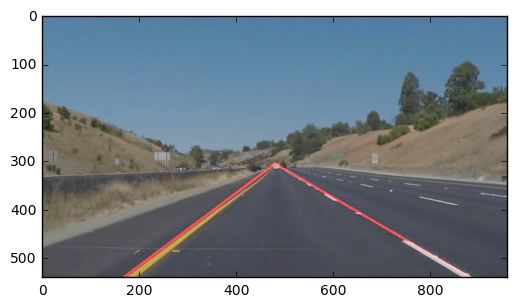

In [4]:
#Lane detection is done on the images and the result is stored in test_images/ folder


for x in os.listdir("test_images/"):
    print(x)
    imageName="test_images/"+x
    resultImageName="result/result"+x
    image = mpimg.imread(imageName)
    image = plotLaneLine(image)
    plt.imshow(image)
    im = Image.fromarray(image)
    im.save(resultImageName)
 


## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

Let's try the one with the solid white lane on the right first ...

In [6]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import cv2

In [ ]:

white_output = "result/resultsolidWhiteRight.mp4"
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(plotLaneLine) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [9]:
yellow_output = "result/resultSolidYellowLeft.mp4"
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(plotLaneLine)
%time yellow_clip.write_videofile(yellow_output, audio=False)

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.603448275862
x1: 106 y1: 538
x2: 454 y2: 328
slope: -0.60248447205
x1: 108 y1: 539
x2: 430 y2: 345
slope: 0.726141078838
x1: 513 y1: 321
x2: 754 y2: 496
slope: 0.673228346457
x1: 521 y1: 325
x2: 775 y2: 496
slope: -0.602409638554
x1: 123 y1: 526
x2: 455 y2: 326
slope: 0.75
x1: 609 y1: 386
x2: 757 y2: 497
slope: 0.779761904762
x1: 568 y1: 357
x2: 736 y2: 488
slope: 0.691176470588
x1: 706 y1: 450
x2: 774 y2: 497
slope: 0.715909090909
x1: 682 y1: 434
x2: 770 y2: 497
slope: -0.869565217391
x1: 419 y1: 351
x2: 465 y2: 311
slope: 0.754545454545
x1: 514 y1: 323
x2: 734 y2: 489
slope: -0.601769911504
x1: 106 y1: 539
x2: 445 y2: 335
slope: 0.75
x1: 612 y1: 389
x2: 756 y2: 497
slope: 0.69918699187
x1: 520 y1: 325
x2: 766 y2: 497
slope: -0.72625698324
x1: 287 y1: 445
x2: 466 y2: 315
slope: -0.671361502347
x1: 202 y1: 500
x2: 415 y2: 357
slope: 0.934210526316
x1: 669 y1: 425
x2: 745 y2: 496
[MoviePy] >>>> Building video

  0%|          | 0/682 [00:00<?, ?it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.603448275862
x1: 106 y1: 538
x2: 454 y2: 328
slope: -0.60248447205
x1: 108 y1: 539
x2: 430 y2: 345
slope: 0.726141078838
x1: 513 y1: 321
x2: 754 y2: 496
slope: 0.673228346457
x1: 521 y1: 325
x2: 775 y2: 496
slope: -0.602409638554
x1: 123 y1: 526
x2: 455 y2: 326
slope: 0.75
x1: 609 y1: 386
x2: 757 y2: 497
slope: 0.779761904762
x1: 568 y1: 357
x2: 736 y2: 488
slope: 0.691176470588
x1: 706 y1: 450
x2: 774 y2: 497
slope: 0.715909090909
x1: 682 y1: 434
x2: 770 y2: 497
slope: -0.869565217391
x1: 419 y1: 351
x2: 465 y2: 311
slope: 0.754545454545
x1: 514 y1: 323
x2: 734 y2: 489
slope: -0.601769911504
x1: 106 y1: 539
x2: 445 y2: 335
slope: 0.75
x1: 612 y1: 389
x2: 756 y2: 497
slope: 0.69918699187
x1: 520 y1: 325
x2: 766 y2: 497
slope: -0.72625698324
x1: 287 y1: 445
x2: 466 y2: 315
slope: -0.671361502347
x1: 202 y1: 500
x2: 415 y2: 357
slope: 0.934210526316
x1: 669 y1: 425
x2: 745 y2: 496


  0%|          | 1/682 [00:00<03:20,  3.39it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.601307189542
x1: 111 y1: 538
x2: 417 y2: 354
slope: -0.601744186047
x1: 109 y1: 536
x2: 453 y2: 329
slope: 0.701030927835
x1: 523 y1: 331
x2: 814 y2: 535
slope: 0.647249190939
x1: 523 y1: 332
x2: 832 y2: 532
slope: 0.673758865248
x1: 675 y1: 440
x2: 816 y2: 535
slope: -0.602523659306
x1: 140 y1: 516
x2: 457 y2: 325
slope: 0.724738675958
x1: 522 y1: 326
x2: 809 y2: 534
slope: -0.698675496689
x1: 159 y1: 532
x2: 461 y2: 321
slope: 0.648148148148
x1: 514 y1: 323
x2: 622 y2: 393
slope: 0.726923076923
x1: 537 y1: 342
x2: 797 y2: 531
slope: -0.84
x1: 239 y1: 501
x2: 464 y2: 312
slope: -0.83606557377
x1: 409 y1: 361
x2: 470 y2: 310
slope: 0.753731343284
x1: 511 y1: 320
x2: 779 y2: 522
slope: -0.555066079295
x1: 110 y1: 536
x2: 337 y2: 410
slope: 0.725490196078
x1: 518 y1: 325
x2: 722 y2: 473
slope: -0.698113207547
x1: 236 y1: 481
x2: 448 y2: 333
slope: 0.572727272727
x1: 710 y1: 472
x2: 820 y2: 535
slope: 0.6176470

  0%|          | 2/682 [00:00<03:30,  3.24it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.601796407186
x1: 107 y1: 539
x2: 441 y2: 338
slope: -0.625730994152
x1: 118 y1: 536
x2: 460 y2: 322
slope: 0.699658703072
x1: 526 y1: 334
x2: 819 y2: 539
slope: 0.673366834171
x1: 633 y1: 400
x2: 832 y2: 534
slope: -0.576530612245
x1: 212 y1: 474
x2: 408 y2: 361
slope: -0.725978647687
x1: 183 y1: 516
x2: 464 y2: 312
slope: 0.726141078838
x1: 520 y1: 325
x2: 761 y2: 500
slope: -0.579925650558
x1: 139 y1: 518
x2: 408 y2: 362
slope: 0.670886075949
x1: 761 y1: 485
x2: 840 y2: 538
slope: -0.725
x1: 228 y1: 487
x2: 468 y2: 313
slope: -0.728624535316
x1: 181 y1: 516
x2: 450 y2: 320
slope: 0.77990430622
x1: 577 y1: 363
x2: 786 y2: 526
slope: -0.699604743083
x1: 204 y1: 502
x2: 457 y2: 325
slope: -0.666666666667
x1: 116 y1: 536
x2: 182 y2: 492
slope: 0.753138075314
x1: 513 y1: 321
x2: 752 y2: 501
slope: -0.576354679803
x1: 110 y1: 536
x2: 313 y2: 419
slope: 0.752066115702
x1: 560 y1: 352
x2: 802 y2: 534
slope: 0.6510

  0%|          | 3/682 [00:01<03:43,  3.03it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.625
x1: 120 y1: 536
x2: 456 y2: 326
slope: -0.625
x1: 111 y1: 539
x2: 463 y2: 319
slope: -0.625377643505
x1: 122 y1: 536
x2: 453 y2: 329
slope: 0.700657894737
x1: 516 y1: 326
x2: 820 y2: 539
slope: -0.649805447471
x1: 193 y1: 499
x2: 450 y2: 332
slope: 0.627118644068
x1: 590 y1: 380
x2: 826 y2: 528
slope: 0.723320158103
x1: 548 y1: 344
x2: 801 y2: 527
slope: 0.651162790698
x1: 516 y1: 325
x2: 817 y2: 521
slope: -0.675105485232
x1: 168 y1: 527
x2: 405 y2: 367
slope: 0.533333333333
x1: 442 y1: 316
x2: 457 y2: 324
slope: -0.536
x1: 201 y1: 478
x2: 326 y2: 411
slope: 0.751748251748
x1: 519 y1: 324
x2: 805 y2: 539
slope: 0.625
x1: 817 y1: 523
x2: 841 y2: 538
slope: -0.80737704918
x1: 181 y1: 522
x2: 425 y2: 325
slope: -0.81124497992
x1: 170 y1: 528
x2: 419 y2: 326
slope: 0.626315789474
x1: 574 y1: 368
x2: 764 y2: 487
slope: -0.580508474576
x1: 169 y1: 502
x2: 405 y2: 365
slope: -0.676767676768
x1: 172 y1: 527
x2:

  1%|          | 4/682 [00:01<03:52,  2.91it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.62426035503
x1: 116 y1: 539
x2: 454 y2: 328
slope: -0.62389380531
x1: 215 y1: 480
x2: 441 y2: 339
slope: 0.649842271293
x1: 526 y1: 333
x2: 843 y2: 539
slope: 0.722727272727
x1: 586 y1: 370
x2: 806 y2: 529
slope: -0.726315789474
x1: 178 y1: 526
x2: 463 y2: 319
slope: -0.649700598802
x1: 134 y1: 530
x2: 468 y2: 313
slope: 0.700964630225
x1: 512 y1: 321
x2: 823 y2: 539
slope: -0.602112676056
x1: 114 y1: 539
x2: 398 y2: 368
slope: 0.627450980392
x1: 584 y1: 375
x2: 839 y2: 535
slope: 0.650847457627
x1: 521 y1: 327
x2: 816 y2: 519
slope: -0.728758169935
x1: 161 y1: 536
x2: 467 y2: 313
slope: -0.576470588235
x1: 149 y1: 516
x2: 319 y2: 418
slope: 0.724014336918
x1: 517 y1: 326
x2: 796 y2: 528
slope: -0.861538461538
x1: 400 y1: 366
x2: 465 y2: 310
slope: 0.642857142857
x1: 808 y1: 530
x2: 822 y2: 539
slope: -0.602112676056
x1: 117 y1: 538
x2: 401 y2: 367


  1%|          | 5/682 [00:01<03:47,  2.98it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.625386996904
x1: 123 y1: 538
x2: 446 y2: 336
slope: -0.627218934911
x1: 118 y1: 539
x2: 456 y2: 327
slope: 0.752688172043
x1: 518 y1: 324
x2: 611 y2: 394
slope: -0.726072607261
x1: 164 y1: 534
x2: 467 y2: 314
slope: 0.606741573034
x1: 530 y1: 337
x2: 619 y2: 391
slope: -0.653465346535
x1: 249 y1: 464
x2: 451 y2: 332
slope: -0.727586206897
x1: 172 y1: 531
x2: 462 y2: 320
slope: 0.700636942675
x1: 518 y1: 327
x2: 675 y2: 437
slope: -0.650793650794
x1: 249 y1: 465
x2: 438 y2: 342
slope: 0.630434782609
x1: 517 y1: 326
x2: 609 y2: 384
slope: -0.571428571429
x1: 438 y1: 336
x2: 459 y2: 324
slope: -0.726384364821
x1: 162 y1: 533
x2: 469 y2: 310
slope: 0.697530864198
x1: 516 y1: 323
x2: 678 y2: 436
slope: -0.753521126761
x1: 165 y1: 533
x2: 449 y2: 319


  1%|          | 6/682 [00:01<03:32,  3.19it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.624595469256
x1: 125 y1: 538
x2: 434 y2: 345
slope: -0.625377643505
x1: 123 y1: 536
x2: 454 y2: 329
slope: 0.64824120603
x1: 511 y1: 320
x2: 710 y2: 449
slope: -0.755656108597
x1: 245 y1: 482
x2: 466 y2: 315
slope: 0.698224852071
x1: 529 y1: 336
x2: 698 y2: 454
slope: 0.701657458564
x1: 518 y1: 326
x2: 699 y2: 453
slope: -0.728346456693
x1: 216 y1: 495
x2: 470 y2: 310
slope: -0.6
x1: 121 y1: 538
x2: 391 y2: 376
slope: -0.673728813559
x1: 223 y1: 483
x2: 459 y2: 324
slope: -0.726530612245
x1: 218 y1: 497
x2: 463 y2: 319
slope: 0.650793650794
x1: 521 y1: 328
x2: 710 y2: 451
slope: -0.755274261603
x1: 219 y1: 500
x2: 456 y2: 321
slope: -0.697872340426
x1: 214 y1: 498
x2: 449 y2: 334
slope: -0.752212389381
x1: 222 y1: 481
x2: 448 y2: 311
slope: -0.803278688525
x1: 393 y1: 372
x2: 454 y2: 323


  1%|          | 7/682 [00:02<03:24,  3.31it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.625
x1: 121 y1: 538
x2: 449 y2: 333
slope: -0.624595469256
x1: 122 y1: 539
x2: 431 y2: 346
slope: 0.652173913043
x1: 513 y1: 321
x2: 743 y2: 471
slope: -0.728758169935
x1: 160 y1: 537
x2: 466 y2: 314
slope: 0.69741697417
x1: 529 y1: 335
x2: 800 y2: 524
slope: -0.728476821192
x1: 161 y1: 538
x2: 463 y2: 318
slope: -0.625
x1: 129 y1: 536
x2: 401 y2: 366
slope: 0.676616915423
x1: 530 y1: 336
x2: 731 y2: 472
slope: 0.672897196262
x1: 519 y1: 327
x2: 733 y2: 471
slope: -0.726937269373
x1: 187 y1: 514
x2: 458 y2: 317
slope: -0.620689655172
x1: 429 y1: 342
x2: 458 y2: 324


  1%|          | 8/682 [00:02<03:07,  3.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649390243902
x1: 130 y1: 536
x2: 458 y2: 323
slope: -0.649746192893
x1: 249 y1: 462
x2: 446 y2: 334
slope: 0.676348547718
x1: 531 y1: 336
x2: 772 y2: 499
slope: -0.640776699029
x1: 125 y1: 536
x2: 228 y2: 470
slope: 0.625
x1: 521 y1: 328
x2: 785 y2: 493
slope: -0.649056603774
x1: 190 y1: 498
x2: 455 y2: 326
slope: -0.672897196262
x1: 330 y1: 413
x2: 437 y2: 341
slope: 0.672
x1: 528 y1: 329
x2: 778 y2: 497
slope: -0.673684210526
x1: 176 y1: 506
x2: 461 y2: 314
slope: -0.725752508361
x1: 169 y1: 529
x2: 468 y2: 312
slope: 0.696850393701
x1: 517 y1: 323
x2: 771 y2: 500
slope: 0.651006711409
x1: 618 y1: 396
x2: 767 y2: 493
slope: -0.674876847291
x1: 177 y1: 520
x2: 380 y2: 383
slope: -0.529801324503
x1: 120 y1: 539
x2: 271 y2: 459
slope: -0.751295336788
x1: 245 y1: 464
x2: 438 y2: 319
slope: -0.697674418605
x1: 142 y1: 528
x2: 185 y2: 498
slope: 0.674329501916
x1: 513 y1: 321
x2: 774 y2: 497


  1%|▏         | 9/682 [00:02<03:13,  3.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.626543209877
x1: 123 y1: 536
x2: 447 y2: 333
slope: -0.624548736462
x1: 123 y1: 539
x2: 400 y2: 366
slope: 0.627329192547
x1: 520 y1: 326
x2: 842 y2: 528
slope: 0.676767676768
x1: 532 y1: 336
x2: 829 y2: 537
slope: -0.729007633588
x1: 201 y1: 507
x2: 463 y2: 316
slope: -0.625482625483
x1: 130 y1: 536
x2: 389 y2: 374
slope: -0.637931034483
x1: 120 y1: 539
x2: 178 y2: 502
slope: -0.785714285714
x1: 371 y1: 391
x2: 455 y2: 325
slope: 0.648936170213
x1: 642 y1: 413
x2: 830 y2: 535
slope: 0.698675496689
x1: 525 y1: 327
x2: 827 y2: 538
slope: -0.726688102894
x1: 157 y1: 536
x2: 468 y2: 310
slope: -0.603015075377
x1: 207 y1: 482
x2: 406 y2: 362
slope: 0.603305785124
x1: 557 y1: 354
x2: 678 y2: 427
slope: 0.675159235669
x1: 517 y1: 323
x2: 831 y2: 535
slope: 0.672862453532
x1: 565 y1: 353
x2: 834 y2: 534
slope: -0.666666666667
x1: 134 y1: 532
x2: 191 y2: 494
slope: -0.897959183673
x1: 412 y1: 358
x2: 461 y2: 314
slo

  1%|▏         | 10/682 [00:03<03:20,  3.35it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649180327869
x1: 145 y1: 528
x2: 450 y2: 330
slope: -0.650306748466
x1: 128 y1: 538
x2: 454 y2: 326
slope: -0.648068669528
x1: 209 y1: 488
x2: 442 y2: 337
slope: 0.675324675325
x1: 534 y1: 338
x2: 688 y2: 442
slope: 0.622222222222
x1: 521 y1: 328
x2: 701 y2: 440
slope: -0.701388888889
x1: 163 y1: 531
x2: 451 y2: 329
slope: -0.652173913043
x1: 438 y1: 334
x2: 461 y2: 319
slope: 0.621951219512
x1: 517 y1: 323
x2: 599 y2: 374
slope: -0.7
x1: 164 y1: 531
x2: 444 y2: 335
slope: -0.678571428571
x1: 124 y1: 539
x2: 208 y2: 482
slope: -0.666666666667
x1: 127 y1: 538
x2: 223 y2: 474
slope: 0.674846625767
x1: 527 y1: 332
x2: 690 y2: 442
slope: -0.72602739726
x1: 174 y1: 525
x2: 466 y2: 313
slope: -0.576923076923
x1: 167 y1: 505
x2: 349 y2: 400
slope: 0.626506024096
x1: 520 y1: 326
x2: 686 y2: 430


  2%|▏         | 11/682 [00:03<03:16,  3.42it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.65
x1: 129 y1: 538
x2: 449 y2: 330
slope: -0.6484375
x1: 184 y1: 504
x2: 440 y2: 338
slope: -0.649390243902
x1: 127 y1: 538
x2: 455 y2: 325
slope: 0.700534759358
x1: 519 y1: 324
x2: 706 y2: 455
slope: -0.676056338028
x1: 228 y1: 481
x2: 441 y2: 337
slope: 0.605882352941
x1: 560 y1: 355
x2: 730 y2: 458
slope: 0.702127659574
x1: 527 y1: 328
x2: 715 y2: 460
slope: 0.60248447205
x1: 535 y1: 338
x2: 696 y2: 435
slope: -0.752542372881
x1: 168 y1: 532
x2: 463 y2: 310
slope: -1.02777777778
x1: 425 y1: 349
x2: 461 y2: 312
slope: -0.666666666667
x1: 138 y1: 530
x2: 189 y2: 496
slope: 0.648
x1: 605 y1: 378
x2: 730 y2: 459
slope: -0.752427184466
x1: 170 y1: 532
x2: 376 y2: 377
slope: -0.642857142857
x1: 426 y1: 327
x2: 440 y2: 318
slope: 0.577777777778
x1: 534 y1: 337
x2: 579 y2: 363
slope: -0.681818181818
x1: 439 y1: 333
x2: 461 y2: 318


  2%|▏         | 12/682 [00:03<03:15,  3.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649517684887
x1: 132 y1: 537
x2: 443 y2: 335
slope: -0.649572649573
x1: 192 y1: 500
x2: 426 y2: 348
slope: -0.72695035461
x1: 179 y1: 523
x2: 461 y2: 318
slope: 0.605405405405
x1: 551 y1: 349
x2: 736 y2: 461
slope: 0.675324675325
x1: 522 y1: 328
x2: 753 y2: 484
slope: -0.670103092784
x1: 128 y1: 539
x2: 225 y2: 474
slope: 0.674757281553
x1: 537 y1: 340
x2: 743 y2: 479
slope: 0.626016260163
x1: 522 y1: 327
x2: 768 y2: 481
slope: -0.753333333333
x1: 312 y1: 429
x2: 462 y2: 316
slope: -0.728187919463
x1: 168 y1: 529
x2: 466 y2: 312
slope: -0.697183098592
x1: 179 y1: 508
x2: 463 y2: 310
slope: 0.579439252336
x1: 660 y1: 419
x2: 767 y2: 481
slope: -0.651376146789
x1: 126 y1: 539
x2: 453 y2: 326
slope: -0.779467680608
x1: 169 y1: 525
x2: 432 y2: 320
slope: -0.75
x1: 230 y1: 475
x2: 438 y2: 319


  2%|▏         | 13/682 [00:03<03:15,  3.42it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650326797386
x1: 134 y1: 537
x2: 440 y2: 338
slope: 0.622895622896
x1: 522 y1: 329
x2: 819 y2: 514
slope: -0.65
x1: 128 y1: 539
x2: 448 y2: 331
slope: 0.673611111111
x1: 514 y1: 322
x2: 802 y2: 516
slope: -0.647668393782
x1: 223 y1: 482
x2: 416 y2: 357
slope: 0.674603174603
x1: 537 y1: 340
x2: 789 y2: 510
slope: -0.814814814815
x1: 327 y1: 426
x2: 462 y2: 316
slope: 0.627177700348
x1: 532 y1: 333
x2: 819 y2: 513
slope: -0.666666666667
x1: 409 y1: 355
x2: 454 y2: 325
slope: -0.700787401575
x1: 213 y1: 488
x2: 467 y2: 310
slope: -0.676056338028
x1: 303 y1: 430
x2: 445 y2: 334
slope: -0.699551569507
x1: 243 y1: 468
x2: 466 y2: 312
slope: -0.757225433526
x1: 289 y1: 448
x2: 462 y2: 317
slope: 0.698412698413
x1: 525 y1: 327
x2: 777 y2: 503
slope: -0.754448398577
x1: 161 y1: 535
x2: 442 y2: 323
slope: -0.873015873016
x1: 397 y1: 368
x2: 460 y2: 313
slope: 0.676258992806
x1: 522 y1: 328
x2: 800 y2: 516
slope: -0.67

  2%|▏         | 14/682 [00:04<03:28,  3.20it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674911660777
x1: 168 y1: 518
x2: 451 y2: 327
slope: 0.624277456647
x1: 514 y1: 322
x2: 860 y2: 538
slope: -0.674846625767
x1: 135 y1: 538
x2: 461 y2: 318
slope: -0.670520231214
x1: 267 y1: 454
x2: 440 y2: 338
slope: 0.650165016502
x1: 539 y1: 342
x2: 842 y2: 539
slope: 0.675
x1: 515 y1: 322
x2: 835 y2: 538
slope: -0.68
x1: 437 y1: 334
x2: 462 y2: 317
slope: -0.672413793103
x1: 239 y1: 476
x2: 413 y2: 359
slope: -0.679487179487
x1: 132 y1: 539
x2: 210 y2: 486
slope: 0.581395348837
x1: 754 y1: 489
x2: 840 y2: 539
slope: -0.725321888412
x1: 215 y1: 499
x2: 448 y2: 330
slope: 0.560747663551
x1: 737 y1: 478
x2: 844 y2: 538
slope: 0.698689956332
x1: 525 y1: 327
x2: 754 y2: 487
slope: -0.875
x1: 399 y1: 367
x2: 455 y2: 318
slope: -0.781395348837
x1: 246 y1: 480
x2: 461 y2: 312
slope: -0.710526315789
x1: 130 y1: 539
x2: 168 y2: 512
slope: -0.779569892473
x1: 251 y1: 464
x2: 437 y2: 319
slope: 0.728
x1: 630 y1: 396
x

  2%|▏         | 15/682 [00:04<03:48,  2.92it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649446494465
x1: 137 y1: 538
x2: 408 y2: 362
slope: -0.651315789474
x1: 133 y1: 538
x2: 437 y2: 340
slope: 0.622478386167
x1: 515 y1: 323
x2: 862 y2: 539
slope: 0.649056603774
x1: 576 y1: 367
x2: 841 y2: 539
slope: -0.650485436893
x1: 134 y1: 536
x2: 443 y2: 335
slope: 0.649606299213
x1: 581 y1: 371
x2: 835 y2: 536
slope: -0.752727272727
x1: 189 y1: 521
x2: 464 y2: 314
slope: 0.62443438914
x1: 524 y1: 330
x2: 745 y2: 468
slope: -0.87037037037
x1: 399 y1: 367
x2: 453 y2: 320
slope: -0.699588477366
x1: 164 y1: 534
x2: 407 y2: 364
slope: 0.625
x1: 540 y1: 342
x2: 740 y2: 467
slope: -0.756302521008
x1: 224 y1: 497
x2: 462 y2: 317
slope: 0.699115044248
x1: 580 y1: 364
x2: 806 y2: 522
slope: -0.752688172043
x1: 187 y1: 521
x2: 466 y2: 311
slope: -0.873015873016
x1: 396 y1: 369
x2: 459 y2: 314


  2%|▏         | 16/682 [00:05<03:35,  3.09it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.651724137931
x1: 135 y1: 538
x2: 425 y2: 349
slope: -0.647940074906
x1: 138 y1: 538
x2: 405 y2: 365
slope: 0.624633431085
x1: 521 y1: 325
x2: 862 y2: 538
slope: 0.649659863946
x1: 546 y1: 347
x2: 840 y2: 538
slope: -0.652317880795
x1: 134 y1: 537
x2: 436 y2: 340
slope: -0.807692307692
x1: 258 y1: 478
x2: 466 y2: 310
slope: 0.650602409639
x1: 515 y1: 323
x2: 847 y2: 539
slope: 0.696335078534
x1: 591 y1: 370
x2: 782 y2: 503
slope: -0.753472222222
x1: 175 y1: 531
x2: 463 y2: 314
slope: 0.634615384615
x1: 794 y1: 496
x2: 846 y2: 529
slope: -0.753424657534
x1: 174 y1: 531
x2: 466 y2: 311
slope: -0.782608695652
x1: 255 y1: 478
x2: 462 y2: 316
slope: 0.648648648649
x1: 516 y1: 323
x2: 849 y2: 539
slope: 0.649006622517
x1: 541 y1: 343
x2: 843 y2: 539
slope: -0.728222996516
x1: 163 y1: 537
x2: 450 y2: 328
slope: -0.909090909091
x1: 395 y1: 370
x2: 461 y2: 310
slope: 0.674121405751
x1: 525 y1: 328
x2: 838 y2: 539
slop

  2%|▏         | 17/682 [00:05<03:36,  3.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.676282051282
x1: 138 y1: 539
x2: 450 y2: 328
slope: -0.674740484429
x1: 148 y1: 534
x2: 437 y2: 339
slope: -0.704402515723
x1: 271 y1: 457
x2: 430 y2: 345
slope: -0.677115987461
x1: 136 y1: 539
x2: 455 y2: 323
slope: 0.649831649832
x1: 544 y1: 346
x2: 841 y2: 539
slope: 0.626139817629
x1: 516 y1: 324
x2: 845 y2: 530
slope: 0.62426035503
x1: 516 y1: 323
x2: 854 y2: 534
slope: -0.699386503067
x1: 271 y1: 456
x2: 434 y2: 342
slope: -0.75415282392
x1: 165 y1: 537
x2: 466 y2: 310
slope: 0.649180327869
x1: 526 y1: 332
x2: 831 y2: 530
slope: 0.555
x1: 664 y1: 427
x2: 864 y2: 538
slope: -0.729591836735
x1: 270 y1: 454
x2: 466 y2: 311
slope: -0.750877192982
x1: 176 y1: 531
x2: 461 y2: 317
slope: -0.647509578544
x1: 141 y1: 538
x2: 402 y2: 369


  3%|▎         | 18/682 [00:05<03:33,  3.12it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674509803922
x1: 173 y1: 518
x2: 428 y2: 346
slope: -0.674342105263
x1: 138 y1: 539
x2: 442 y2: 334
slope: -0.675159235669
x1: 136 y1: 539
x2: 450 y2: 327
slope: 0.646408839779
x1: 523 y1: 326
x2: 704 y2: 443
slope: 0.675213675214
x1: 546 y1: 346
x2: 780 y2: 504
slope: -0.699604743083
x1: 205 y1: 496
x2: 458 y2: 319
slope: 0.671875
x1: 526 y1: 332
x2: 782 y2: 504
slope: -0.671957671958
x1: 246 y1: 470
x2: 435 y2: 343
slope: 0.648648648649
x1: 517 y1: 323
x2: 702 y2: 443
slope: -0.705882352941
x1: 449 y1: 322
x2: 466 y2: 310
slope: -0.700636942675
x1: 148 y1: 534
x2: 462 y2: 314
slope: 0.648648648649
x1: 516 y1: 323
x2: 701 y2: 443
slope: -0.602620087336
x1: 205 y1: 479
x2: 434 y2: 341


  3%|▎         | 19/682 [00:05<03:24,  3.25it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674418604651
x1: 138 y1: 539
x2: 439 y2: 336
slope: -0.670731707317
x1: 187 y1: 508
x2: 433 y2: 343
slope: -0.675241157556
x1: 136 y1: 539
x2: 447 y2: 329
slope: 0.697478991597
x1: 516 y1: 323
x2: 754 y2: 489
slope: 0.647058823529
x1: 529 y1: 329
x2: 733 y2: 461
slope: -0.778801843318
x1: 247 y1: 481
x2: 464 y2: 312
slope: 0.671568627451
x1: 521 y1: 325
x2: 725 y2: 462
slope: 0.697777777778
x1: 527 y1: 332
x2: 752 y2: 489
slope: -1.02857142857
x1: 424 y1: 348
x2: 459 y2: 312
slope: -0.650602409639
x1: 140 y1: 537
x2: 389 y2: 375
slope: -0.624242424242
x1: 222 y1: 480
x2: 387 y2: 377


  3%|▎         | 20/682 [00:06<03:07,  3.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700819672131
x1: 210 y1: 492
x2: 454 y2: 321
slope: -0.699367088608
x1: 144 y1: 536
x2: 460 y2: 315
slope: 0.62109375
x1: 519 y1: 324
x2: 775 y2: 483
slope: -0.698795180723
x1: 137 y1: 538
x2: 220 y2: 480
slope: -0.67680608365
x1: 160 y1: 526
x2: 423 y2: 348
slope: 0.676363636364
x1: 530 y1: 334
x2: 805 y2: 520
slope: -0.700617283951
x1: 139 y1: 538
x2: 463 y2: 311
slope: 0.700729927007
x1: 531 y1: 330
x2: 805 y2: 522
slope: -0.63829787234
x1: 387 y1: 369
x2: 434 y2: 339
slope: 0.647619047619
x1: 551 y1: 349
x2: 761 y2: 485
slope: -0.72619047619
x1: 357 y1: 394
x2: 441 y2: 333
slope: 0.625514403292
x1: 528 y1: 332
x2: 771 y2: 484
slope: -0.809523809524
x1: 248 y1: 482
x2: 458 y2: 312
slope: -0.725609756098
x1: 295 y1: 436
x2: 459 y2: 317


  3%|▎         | 21/682 [00:06<03:04,  3.58it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648464163823
x1: 136 y1: 536
x2: 429 y2: 346
slope: -0.64953271028
x1: 134 y1: 539
x2: 348 y2: 400
slope: -0.651079136691
x1: 151 y1: 526
x2: 429 y2: 345
slope: 0.602006688963
x1: 529 y1: 332
x2: 828 y2: 512
slope: 0.69696969697
x1: 533 y1: 331
x2: 665 y2: 423
slope: -0.661764705882
x1: 371 y1: 379
x2: 439 y2: 334
slope: -0.938271604938
x1: 378 y1: 386
x2: 459 y2: 310
slope: 0.673306772908
x1: 542 y1: 341
x2: 793 y2: 510
slope: -0.648648648649
x1: 206 y1: 489
x2: 428 y2: 345
slope: 0.648351648352
x1: 628 y1: 400
x2: 810 y2: 518
slope: -0.731092436975
x1: 332 y1: 410
x2: 451 y2: 323
slope: 0.601449275362
x1: 552 y1: 349
x2: 828 y2: 515
slope: -0.698675496689
x1: 158 y1: 526
x2: 460 y2: 315


  3%|▎         | 22/682 [00:06<02:57,  3.71it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675241157556
x1: 134 y1: 539
x2: 445 y2: 329
slope: -0.674796747967
x1: 178 y1: 512
x2: 424 y2: 346
slope: -0.689655172414
x1: 429 y1: 337
x2: 458 y2: 317
slope: 0.674698795181
x1: 531 y1: 334
x2: 780 y2: 502
slope: -0.671755725191
x1: 293 y1: 436
x2: 424 y2: 348
slope: 0.623595505618
x1: 519 y1: 324
x2: 697 y2: 435
slope: -0.675078864353
x1: 132 y1: 539
x2: 449 y2: 325
slope: -0.649122807018
x1: 138 y1: 538
x2: 366 y2: 390
slope: -0.811320754717
x1: 247 y1: 482
x2: 459 y2: 310
slope: 0.673306772908
x1: 531 y1: 332
x2: 782 y2: 501
slope: -0.651724137931
x1: 137 y1: 538
x2: 427 y2: 349
slope: 0.622093023256
x1: 525 y1: 327
x2: 697 y2: 434
slope: 0.697368421053
x1: 533 y1: 331
x2: 685 y2: 437
slope: -0.724867724868
x1: 274 y1: 448
x2: 463 y2: 311


  3%|▎         | 23/682 [00:06<02:56,  3.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675159235669
x1: 134 y1: 538
x2: 448 y2: 326
slope: -0.673796791444
x1: 235 y1: 474
x2: 422 y2: 348
slope: 0.649350649351
x1: 558 y1: 353
x2: 712 y2: 453
slope: -0.700348432056
x1: 172 y1: 516
x2: 459 y2: 315
slope: 0.624390243902
x1: 519 y1: 324
x2: 724 y2: 452
slope: -0.657894736842
x1: 359 y1: 387
x2: 435 y2: 337
slope: 0.651260504202
x1: 561 y1: 356
x2: 799 y2: 511
slope: -0.810185185185
x1: 242 y1: 485
x2: 458 y2: 310
slope: -0.725714285714
x1: 288 y1: 438
x2: 463 y2: 311
slope: 0.623711340206
x1: 529 y1: 329
x2: 723 y2: 450
slope: -0.669230769231
x1: 293 y1: 436
x2: 423 y2: 349
slope: -0.622807017544
x1: 134 y1: 539
x2: 362 y2: 397
slope: -0.726890756303
x1: 220 y1: 484
x2: 458 y2: 311
slope: -0.703703703704
x1: 428 y1: 338
x2: 455 y2: 319
slope: 0.625668449198
x1: 533 y1: 336
x2: 720 y2: 453
slope: -0.697841726619
x1: 306 y1: 426
x2: 445 y2: 329
slope: -0.675078864353
x1: 132 y1: 539
x2: 449 y2: 325
s

  4%|▎         | 24/682 [00:07<03:07,  3.50it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.676767676768
x1: 138 y1: 539
x2: 435 y2: 338
slope: -0.676470588235
x1: 136 y1: 539
x2: 442 y2: 332
slope: 0.622317596567
x1: 526 y1: 328
x2: 759 y2: 473
slope: -0.672727272727
x1: 295 y1: 436
x2: 405 y2: 362
slope: 0.633333333333
x1: 656 y1: 419
x2: 746 y2: 476
slope: -0.962264150943
x1: 406 y1: 361
x2: 459 y2: 310
slope: 0.674641148325
x1: 521 y1: 327
x2: 730 y2: 468
slope: -0.624390243902
x1: 140 y1: 534
x2: 345 y2: 406
slope: 0.672240802676
x1: 525 y1: 328
x2: 824 y2: 529
slope: -0.808333333333
x1: 193 y1: 520
x2: 433 y2: 326
slope: -0.676829268293
x1: 247 y1: 468
x2: 411 y2: 357
slope: 0.604761904762
x1: 549 y1: 347
x2: 759 y2: 474
slope: -0.751111111111
x1: 195 y1: 522
x2: 420 y2: 353
slope: 0.597826086957
x1: 520 y1: 326
x2: 612 y2: 381
slope: -0.914285714286
x1: 428 y1: 344
x2: 463 y2: 312
slope: -0.6
x1: 197 y1: 496
x2: 347 y2: 406
slope: 0.677083333333
x1: 534 y1: 337
x2: 726 y2: 467
slope: -0.72
x

  4%|▎         | 25/682 [00:07<03:17,  3.33it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.65
x1: 138 y1: 537
x2: 418 y2: 355
slope: 0.622837370242
x1: 517 y1: 323
x2: 806 y2: 503
slope: -0.65
x1: 138 y1: 539
x2: 418 y2: 357
slope: 0.622807017544
x1: 675 y1: 432
x2: 789 y2: 503
slope: -0.811518324607
x1: 274 y1: 465
x2: 465 y2: 310
slope: -0.840206185567
x1: 263 y1: 482
x2: 457 y2: 319
slope: 0.648550724638
x1: 518 y1: 324
x2: 794 y2: 503
slope: 0.670833333333
x1: 521 y1: 328
x2: 761 y2: 489
slope: -0.651282051282
x1: 222 y1: 481
x2: 417 y2: 354
slope: -0.81067961165
x1: 250 y1: 482
x2: 456 y2: 315
slope: 0.666666666667
x1: 565 y1: 360
x2: 580 y2: 370
slope: -0.601990049751
x1: 137 y1: 538
x2: 338 y2: 417
slope: -0.753768844221
x1: 264 y1: 463
x2: 463 y2: 313
slope: 0.601694915254
x1: 677 y1: 432
x2: 795 y2: 503
slope: -0.751773049645
x1: 146 y1: 536
x2: 428 y2: 324
slope: 0.614035087719
x1: 749 y1: 466
x2: 806 y2: 501
slope: 0.676595744681
x1: 522 y1: 329
x2: 757 y2: 488
slope: -0.782771535581
x1

  4%|▍         | 26/682 [00:07<03:28,  3.15it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675585284281
x1: 142 y1: 538
x2: 441 y2: 336
slope: -0.673267326733
x1: 138 y1: 539
x2: 441 y2: 335
slope: 0.649484536082
x1: 538 y1: 340
x2: 829 y2: 529
slope: 0.601173020528
x1: 530 y1: 333
x2: 871 y2: 538
slope: 0.650306748466
x1: 522 y1: 327
x2: 848 y2: 539
slope: -0.872448979592
x1: 262 y1: 482
x2: 458 y2: 311
slope: -0.673228346457
x1: 160 y1: 528
x2: 414 y2: 357
slope: 0.673611111111
x1: 533 y1: 331
x2: 821 y2: 525
slope: 0.600600600601
x1: 538 y1: 339
x2: 871 y2: 539
slope: -0.959183673469
x1: 415 y1: 357
x2: 464 y2: 310
slope: -0.942307692308
x1: 405 y1: 362
x2: 457 y2: 313
slope: 0.649484536082
x1: 721 y1: 461
x2: 818 y2: 524
slope: -0.902985074627
x1: 325 y1: 431
x2: 459 y2: 310
slope: -0.675585284281
x1: 142 y1: 539
x2: 441 y2: 337


  4%|▍         | 27/682 [00:08<03:21,  3.26it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700336700337
x1: 151 y1: 534
x2: 448 y2: 326
slope: -0.7
x1: 217 y1: 490
x2: 437 y2: 336
slope: 0.601796407186
x1: 539 y1: 338
x2: 873 y2: 539
slope: 0.623853211009
x1: 635 y1: 403
x2: 853 y2: 539
slope: -0.700315457413
x1: 141 y1: 539
x2: 458 y2: 317
slope: -0.697530864198
x1: 277 y1: 450
x2: 439 y2: 337
slope: 0.599397590361
x1: 523 y1: 327
x2: 855 y2: 526
slope: 0.625806451613
x1: 574 y1: 363
x2: 729 y2: 460
slope: -0.870967741935
x1: 304 y1: 445
x2: 459 y2: 310
slope: -0.673819742489
x1: 178 y1: 516
x2: 411 y2: 359
slope: 0.673400673401
x1: 533 y1: 331
x2: 830 y2: 531
slope: -0.674740484429
x1: 138 y1: 539
x2: 427 y2: 344
slope: 0.625899280576
x1: 576 y1: 365
x2: 854 y2: 539
slope: 0.6
x1: 751 y1: 479
x2: 851 y2: 539
slope: -0.75
x1: 287 y1: 442
x2: 463 y2: 310


  4%|▍         | 28/682 [00:08<03:14,  3.36it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.702341137124
x1: 146 y1: 538
x2: 445 y2: 328
slope: -0.7
x1: 167 y1: 524
x2: 437 y2: 335
slope: 0.599431818182
x1: 524 y1: 327
x2: 876 y2: 538
slope: 0.625
x1: 599 y1: 379
x2: 855 y2: 539
slope: -0.69696969697
x1: 274 y1: 452
x2: 439 y2: 337
slope: -0.705128205128
x1: 142 y1: 537
x2: 220 y2: 482
slope: 0.65234375
x1: 544 y1: 342
x2: 800 y2: 509
slope: -0.873417721519
x1: 377 y1: 382
x2: 456 y2: 313
slope: -0.72131147541
x1: 144 y1: 538
x2: 205 y2: 494
slope: 0.601731601732
x1: 543 y1: 341
x2: 774 y2: 480
slope: -0.65
x1: 190 y1: 504
x2: 410 y2: 361
slope: -0.839779005525
x1: 281 y1: 464
x2: 462 y2: 312
slope: 0.648562300319
x1: 543 y1: 336
x2: 856 y2: 539
slope: -1.03846153846
x1: 290 y1: 483
x2: 446 y2: 321
slope: -0.650980392157
x1: 157 y1: 527
x2: 412 y2: 361
slope: 0.6
x1: 541 y1: 339
x2: 776 y2: 480
slope: 0.695402298851
x1: 658 y1: 406
x2: 832 y2: 527


  4%|▍         | 29/682 [00:08<03:15,  3.33it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700657894737
x1: 144 y1: 538
x2: 448 y2: 325
slope: -0.70036101083
x1: 156 y1: 532
x2: 433 y2: 338
slope: -0.701149425287
x1: 242 y1: 474
x2: 416 y2: 352
slope: 0.649517684887
x1: 545 y1: 337
x2: 856 y2: 539
slope: -0.701298701299
x1: 142 y1: 539
x2: 450 y2: 323
slope: 0.578947368421
x1: 565 y1: 355
x2: 850 y2: 520
slope: 0.556074766355
x1: 665 y1: 420
x2: 879 y2: 539
slope: 0.690476190476
x1: 525 y1: 327
x2: 609 y2: 385
slope: -0.655737704918
x1: 271 y1: 450
x2: 393 y2: 370
slope: 0.625
x1: 548 y1: 344
x2: 860 y2: 539
slope: -0.701342281879
x1: 144 y1: 539
x2: 442 y2: 330
slope: 0.602941176471
x1: 546 y1: 337
x2: 682 y2: 419
slope: 0.577319587629
x1: 588 y1: 370
x2: 879 y2: 538
slope: -1.03703703704
x1: 403 y1: 366
x2: 457 y2: 310
slope: 0.553956834532
x1: 543 y1: 340
x2: 682 y2: 417
slope: -0.75
x1: 274 y1: 451
x2: 462 y2: 310
slope: -0.700636942675
x1: 141 y1: 539
x2: 455 y2: 319
slope: -0.72972972973
x1:

  4%|▍         | 30/682 [00:09<03:19,  3.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.67680608365
x1: 142 y1: 538
x2: 405 y2: 360
slope: -0.780821917808
x1: 317 y1: 424
x2: 463 y2: 310
slope: -0.673469387755
x1: 146 y1: 538
x2: 342 y2: 406
slope: 0.575949367089
x1: 545 y1: 340
x2: 703 y2: 431
slope: -0.809523809524
x1: 205 y1: 520
x2: 457 y2: 316
slope: 0.65034965035
x1: 546 y1: 342
x2: 689 y2: 435
slope: -0.675182481752
x1: 142 y1: 537
x2: 416 y2: 352
slope: -1.0
x1: 401 y1: 369
x2: 436 y2: 334
slope: -1.02173913043
x1: 400 y1: 368
x2: 446 y2: 321
slope: -0.727272727273
x1: 240 y1: 476
x2: 449 y2: 324
slope: 0.673611111111
x1: 547 y1: 338
x2: 691 y2: 435
slope: 0.623456790123
x1: 540 y1: 334
x2: 702 y2: 435
slope: 0.648484848485
x1: 527 y1: 328
x2: 692 y2: 435
slope: -0.648854961832
x1: 142 y1: 539
x2: 404 y2: 369
slope: -0.734939759036
x1: 340 y1: 407
x2: 423 y2: 346
slope: -0.657142857143
x1: 186 y1: 509
x2: 291 y2: 440
slope: -0.5303514377
x1: 142 y1: 480
x2: 455 y2: 314


  5%|▍         | 31/682 [00:09<03:22,  3.22it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725888324873
x1: 251 y1: 468
x2: 448 y2: 325
slope: -0.677165354331
x1: 158 y1: 527
x2: 412 y2: 355
slope: -0.646825396825
x1: 147 y1: 536
x2: 399 y2: 373
slope: 0.600985221675
x1: 527 y1: 328
x2: 730 y2: 450
slope: -0.727272727273
x1: 293 y1: 440
x2: 425 y2: 344
slope: -0.652173913043
x1: 145 y1: 536
x2: 398 y2: 371
slope: 0.64880952381
x1: 547 y1: 342
x2: 715 y2: 451
slope: -0.808411214953
x1: 249 y1: 483
x2: 463 y2: 310
slope: 0.623655913978
x1: 540 y1: 334
x2: 726 y2: 450
slope: -0.726643598616
x1: 172 y1: 522
x2: 461 y2: 312
slope: -0.728260869565
x1: 317 y1: 425
x2: 409 y2: 358
slope: 0.581196581197
x1: 606 y1: 382
x2: 723 y2: 450
slope: -0.754310344828
x1: 226 y1: 486
x2: 458 y2: 311


  5%|▍         | 32/682 [00:09<03:09,  3.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.677966101695
x1: 144 y1: 539
x2: 380 y2: 379
slope: -0.726872246696
x1: 220 y1: 490
x2: 447 y2: 325
slope: -0.726923076923
x1: 196 y1: 506
x2: 456 y2: 317
slope: 0.669642857143
x1: 531 y1: 330
x2: 643 y2: 405
slope: -0.75
x1: 164 y1: 528
x2: 228 y2: 480
slope: 0.62037037037
x1: 544 y1: 336
x2: 760 y2: 470
slope: -0.755244755245
x1: 288 y1: 447
x2: 431 y2: 339
slope: -0.723684210526
x1: 145 y1: 539
x2: 221 y2: 484
slope: -0.719298245614
x1: 163 y1: 525
x2: 220 y2: 484
slope: -0.970588235294
x1: 389 y1: 376
x2: 457 y2: 310
slope: 0.652173913043
x1: 531 y1: 331
x2: 646 y2: 406
slope: -0.673728813559
x1: 153 y1: 534
x2: 389 y2: 375
slope: -0.814159292035
x1: 340 y1: 407
x2: 453 y2: 315
slope: -0.85
x1: 413 y1: 354
x2: 453 y2: 320


  5%|▍         | 33/682 [00:09<03:03,  3.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.728571428571
x1: 230 y1: 484
x2: 440 y2: 331
slope: -0.727272727273
x1: 153 y1: 536
x2: 461 y2: 312
slope: 0.624309392265
x1: 615 y1: 387
x2: 796 y2: 500
slope: -0.717647058824
x1: 146 y1: 539
x2: 231 y2: 478
slope: -0.783505154639
x1: 247 y1: 482
x2: 441 y2: 330
slope: 0.622950819672
x1: 562 y1: 346
x2: 806 y2: 498
slope: -0.753036437247
x1: 209 y1: 498
x2: 456 y2: 312
slope: -0.779310344828
x1: 317 y1: 424
x2: 462 y2: 311
slope: 0.601423487544
x1: 529 y1: 329
x2: 810 y2: 498
slope: 0.623481781377
x1: 552 y1: 345
x2: 799 y2: 499
slope: -0.705035971223
x1: 242 y1: 476
x2: 381 y2: 378
slope: -0.727564102564
x1: 150 y1: 537
x2: 462 y2: 310
slope: -0.678787878788
x1: 240 y1: 472
x2: 405 y2: 360
slope: -0.781456953642
x1: 301 y1: 434
x2: 452 y2: 316
slope: -0.75
x1: 414 y1: 337
x2: 422 y2: 331
slope: 0.604166666667
x1: 542 y1: 335
x2: 590 y2: 364
slope: -0.782287822878
x1: 147 y1: 538
x2: 418 y2: 326


  5%|▍         | 34/682 [00:10<03:13,  3.35it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698529411765
x1: 157 y1: 534
x2: 429 y2: 344
slope: -0.709677419355
x1: 383 y1: 371
x2: 445 y2: 327
slope: -0.698924731183
x1: 150 y1: 538
x2: 429 y2: 343
slope: 0.623376623377
x1: 558 y1: 344
x2: 866 y2: 536
slope: -0.701438848921
x1: 147 y1: 539
x2: 425 y2: 344
slope: 0.672131147541
x1: 531 y1: 330
x2: 653 y2: 412
slope: -0.725490196078
x1: 146 y1: 539
x2: 197 y2: 502
slope: -0.812182741117
x1: 249 y1: 481
x2: 446 y2: 321
slope: -0.90243902439
x1: 377 y1: 388
x2: 459 y2: 314
slope: 0.621739130435
x1: 627 y1: 395
x2: 857 y2: 538
slope: -0.892857142857
x1: 376 y1: 388
x2: 460 y2: 313
slope: 0.623493975904
x1: 530 y1: 330
x2: 862 y2: 537
slope: -0.53125
x1: 141 y1: 480
x2: 461 y2: 310
slope: -0.52380952381
x1: 150 y1: 478
x2: 213 y2: 445
slope: -1.03401360544
x1: 292 y1: 482
x2: 439 y2: 330
slope: -0.533123028391
x1: 145 y1: 479
x2: 462 y2: 310
slope: -0.703180212014
x1: 146 y1: 538
x2: 429 y2: 339
slope: 0.5

  5%|▌         | 35/682 [00:10<03:17,  3.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.728346456693
x1: 188 y1: 514
x2: 442 y2: 329
slope: -0.725961538462
x1: 222 y1: 490
x2: 430 y2: 339
slope: -0.725806451613
x1: 150 y1: 538
x2: 460 y2: 313
slope: 0.60248447205
x1: 548 y1: 338
x2: 709 y2: 435
slope: 0.650602409639
x1: 534 y1: 333
x2: 783 y2: 495
slope: -0.714285714286
x1: 146 y1: 539
x2: 195 y2: 504
slope: 0.58064516129
x1: 559 y1: 349
x2: 714 y2: 439
slope: -0.8407960199
x1: 254 y1: 481
x2: 455 y2: 312
slope: -0.675675675676
x1: 278 y1: 446
x2: 426 y2: 346
slope: 0.671328671329
x1: 560 y1: 346
x2: 703 y2: 442
slope: -0.661971830986
x1: 300 y1: 432
x2: 371 y2: 385
slope: -0.807228915663
x1: 208 y1: 511
x2: 457 y2: 310
slope: -0.576704545455
x1: 102 y1: 522
x2: 454 y2: 319
slope: -0.8
x1: 164 y1: 530
x2: 209 y2: 494
slope: -0.779220779221
x1: 187 y1: 514
x2: 418 y2: 334


  5%|▌         | 36/682 [00:10<03:10,  3.39it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.702205882353
x1: 150 y1: 536
x2: 422 y2: 345
slope: -0.7
x1: 154 y1: 536
x2: 424 y2: 347
slope: 0.648936170213
x1: 534 y1: 333
x2: 722 y2: 455
slope: 0.600938967136
x1: 533 y1: 331
x2: 746 y2: 459
slope: -0.811594202899
x1: 247 y1: 481
x2: 454 y2: 313
slope: -0.810426540284
x1: 249 y1: 483
x2: 460 y2: 312
slope: -0.699633699634
x1: 150 y1: 538
x2: 423 y2: 347
slope: 0.674698795181
x1: 565 y1: 348
x2: 731 y2: 460
slope: -0.67264573991
x1: 219 y1: 479
x2: 442 y2: 329
slope: 0.672514619883
x1: 550 y1: 339
x2: 721 y2: 454
slope: -0.933333333333
x1: 359 y1: 402
x2: 449 y2: 318


  5%|▌         | 37/682 [00:11<02:52,  3.73it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.626865671642
x1: 571 y1: 358
x2: 772 y2: 484
slope: -0.698529411765
x1: 148 y1: 539
x2: 420 y2: 349
slope: 0.600823045267
x1: 543 y1: 336
x2: 786 y2: 482
slope: -0.729372937294
x1: 150 y1: 539
x2: 453 y2: 318
slope: -0.700374531835
x1: 152 y1: 538
x2: 419 y2: 351
slope: -0.702602230483
x1: 150 y1: 536
x2: 419 y2: 347
slope: 0.647058823529
x1: 534 y1: 333
x2: 721 y2: 454
slope: -0.84
x1: 252 y1: 483
x2: 452 y2: 315
slope: 0.599206349206
x1: 534 y1: 332
x2: 786 y2: 483
slope: -0.676470588235
x1: 220 y1: 481
x2: 424 y2: 343
slope: 0.607594936709
x1: 689 y1: 434
x2: 768 y2: 482
slope: -0.677419354839
x1: 218 y1: 481
x2: 435 y2: 334
slope: 0.576576576577
x1: 564 y1: 353
x2: 786 y2: 481
slope: -0.780898876404
x1: 278 y1: 449
x2: 456 y2: 310
slope: -0.837438423645
x1: 256 y1: 483
x2: 459 y2: 313


  6%|▌         | 38/682 [00:11<02:54,  3.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726962457338
x1: 156 y1: 535
x2: 449 y2: 322
slope: 0.601351351351
x1: 545 y1: 337
x2: 841 y2: 515
slope: 0.625954198473
x1: 689 y1: 433
x2: 820 y2: 515
slope: 0.625
x1: 537 y1: 335
x2: 825 y2: 515
slope: -0.702702702703
x1: 148 y1: 538
x2: 407 y2: 356
slope: -0.753968253968
x1: 198 y1: 506
x2: 450 y2: 316
slope: -0.674208144796
x1: 196 y1: 502
x2: 417 y2: 353
slope: -0.839805825243
x1: 254 y1: 483
x2: 460 y2: 310
slope: 0.647272727273
x1: 546 y1: 337
x2: 821 y2: 515
slope: -0.716981132075
x1: 399 y1: 357
x2: 452 y2: 319
slope: -0.728260869565
x1: 162 y1: 532
x2: 438 y2: 331
slope: 0.6
x1: 816 y1: 498
x2: 841 y2: 513
slope: -0.709677419355
x1: 149 y1: 536
x2: 180 y2: 514
slope: -0.7
x1: 429 y1: 333
x2: 459 y2: 312
slope: 0.601328903654
x1: 536 y1: 334
x2: 837 y2: 515
slope: 0.601449275362
x1: 688 y1: 432
x2: 826 y2: 515
slope: 0.63829787234
x1: 793 y1: 485
x2: 840 y2: 515
slope: -0.935779816514
x1: 337 y1: 4

  6%|▌         | 39/682 [00:11<03:08,  3.42it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698113207547
x1: 149 y1: 538
x2: 414 y2: 353
slope: -0.698630136986
x1: 147 y1: 536
x2: 439 y2: 332
slope: 0.624137931034
x1: 572 y1: 358
x2: 862 y2: 539
slope: 0.599388379205
x1: 557 y1: 343
x2: 884 y2: 539
slope: -0.810650887574
x1: 286 y1: 447
x2: 455 y2: 310
slope: -0.868686868687
x1: 256 y1: 482
x2: 454 y2: 310
slope: -0.837438423645
x1: 257 y1: 480
x2: 460 y2: 310
slope: -0.675824175824
x1: 231 y1: 478
x2: 413 y2: 355
slope: 0.62641509434
x1: 589 y1: 369
x2: 854 y2: 535
slope: 0.597402597403
x1: 546 y1: 338
x2: 777 y2: 476
slope: -0.898550724638
x1: 315 y1: 435
x2: 453 y2: 311
slope: -0.704402515723
x1: 279 y1: 442
x2: 438 y2: 330
slope: 0.625698324022
x1: 537 y1: 333
x2: 716 y2: 445
slope: -0.724919093851
x1: 147 y1: 538
x2: 456 y2: 314
slope: 0.616666666667
x1: 823 y1: 501
x2: 883 y2: 538


  6%|▌         | 40/682 [00:12<03:04,  3.48it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726937269373
x1: 166 y1: 528
x2: 437 y2: 331
slope: 0.579804560261
x1: 576 y1: 359
x2: 883 y2: 537
slope: -0.726688102894
x1: 147 y1: 538
x2: 458 y2: 312
slope: 0.62323943662
x1: 576 y1: 361
x2: 860 y2: 538
slope: -0.730769230769
x1: 282 y1: 446
x2: 412 y2: 351
slope: -0.754032258065
x1: 205 y1: 499
x2: 453 y2: 312
slope: 0.547008547009
x1: 538 y1: 335
x2: 655 y2: 399
slope: -0.726962457338
x1: 156 y1: 534
x2: 449 y2: 321
slope: 0.556485355649
x1: 642 y1: 403
x2: 881 y2: 536
slope: -0.8375
x1: 214 y1: 511
x2: 454 y2: 310
slope: -0.728571428571
x1: 147 y1: 537
x2: 217 y2: 486
slope: 0.646840148699
x1: 594 y1: 365
x2: 863 y2: 539
slope: -0.869281045752
x1: 258 y1: 480
x2: 411 y2: 347
slope: -0.779069767442
x1: 150 y1: 538
x2: 408 y2: 337
slope: 0.648648648649
x1: 538 y1: 333
x2: 797 y2: 501
slope: -0.72619047619
x1: 250 y1: 468
x2: 418 y2: 346


  6%|▌         | 41/682 [00:12<03:07,  3.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727272727273
x1: 162 y1: 530
x2: 448 y2: 322
slope: -0.724590163934
x1: 151 y1: 536
x2: 456 y2: 315
slope: 0.598039215686
x1: 658 y1: 416
x2: 862 y2: 538
slope: 0.577557755776
x1: 581 y1: 364
x2: 884 y2: 539
slope: -0.725806451613
x1: 287 y1: 442
x2: 411 y2: 352
slope: -0.705882352941
x1: 146 y1: 536
x2: 163 y2: 524
slope: 0.571428571429
x1: 540 y1: 335
x2: 673 y2: 411
slope: 0.625
x1: 652 y1: 411
x2: 804 y2: 506
slope: -0.87
x1: 214 y1: 518
x2: 414 y2: 344
slope: -0.72972972973
x1: 423 y1: 337
x2: 460 y2: 310
slope: -0.674698795181
x1: 158 y1: 527
x2: 407 y2: 359
slope: 0.554455445545
x1: 655 y1: 410
x2: 857 y2: 522
slope: 0.625454545455
x1: 585 y1: 367
x2: 860 y2: 539
slope: 0.575757575758
x1: 540 y1: 336
x2: 672 y2: 412
slope: -0.782608695652
x1: 270 y1: 454
x2: 454 y2: 310
slope: -0.75
x1: 148 y1: 538
x2: 220 y2: 484
slope: -0.835748792271
x1: 212 y1: 517
x2: 419 y2: 344
slope: -1.0
x1: 404 y1: 359
x2: 4

  6%|▌         | 42/682 [00:12<03:15,  3.28it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726351351351
x1: 160 y1: 530
x2: 456 y2: 315
slope: -0.727272727273
x1: 264 y1: 458
x2: 418 y2: 346
slope: -0.726114649682
x1: 146 y1: 538
x2: 460 y2: 310
slope: 0.648648648649
x1: 527 y1: 328
x2: 712 y2: 448
slope: 0.598130841121
x1: 542 y1: 336
x2: 863 y2: 528
slope: -0.676113360324
x1: 154 y1: 530
x2: 401 y2: 363
slope: 0.601503759398
x1: 586 y1: 368
x2: 852 y2: 528
slope: -0.726666666667
x1: 154 y1: 534
x2: 454 y2: 316
slope: 0.533653846154
x1: 677 y1: 428
x2: 885 y2: 539
slope: -0.837301587302
x1: 203 y1: 521
x2: 455 y2: 310
slope: 0.625368731563
x1: 525 y1: 327
x2: 864 y2: 539
slope: -0.785714285714
x1: 350 y1: 399
x2: 448 y2: 322
slope: -0.808333333333
x1: 162 y1: 528
x2: 402 y2: 334
slope: 0.646048109966
x1: 570 y1: 351
x2: 861 y2: 539
slope: -0.716981132075
x1: 146 y1: 536
x2: 199 y2: 498


  6%|▋         | 43/682 [00:12<03:10,  3.36it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725752508361
x1: 157 y1: 532
x2: 456 y2: 315
slope: -0.72625698324
x1: 242 y1: 474
x2: 421 y2: 344
slope: -0.752525252525
x1: 262 y1: 459
x2: 460 y2: 310
slope: 0.61963190184
x1: 547 y1: 338
x2: 710 y2: 439
slope: 0.628140703518
x1: 546 y1: 343
x2: 745 y2: 468
slope: -0.64880952381
x1: 159 y1: 526
x2: 327 y2: 417
slope: -0.967213114754
x1: 395 y1: 369
x2: 456 y2: 310
slope: -0.779310344828
x1: 308 y1: 431
x2: 453 y2: 318
slope: -0.78
x1: 147 y1: 538
x2: 397 y2: 343
slope: 0.624309392265
x1: 525 y1: 327
x2: 706 y2: 440
slope: -0.726235741445
x1: 170 y1: 524
x2: 433 y2: 333
slope: -0.780487804878
x1: 151 y1: 536
x2: 397 y2: 344
slope: 0.625698324022
x1: 525 y1: 328
x2: 704 y2: 440


  6%|▋         | 44/682 [00:13<02:59,  3.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727574750831
x1: 154 y1: 536
x2: 455 y2: 317
slope: -0.726235741445
x1: 188 y1: 512
x2: 451 y2: 321
slope: -0.724358974359
x1: 148 y1: 538
x2: 460 y2: 312
slope: 0.598173515982
x1: 525 y1: 328
x2: 744 y2: 459
slope: 0.648979591837
x1: 526 y1: 330
x2: 771 y2: 489
slope: -0.72972972973
x1: 264 y1: 460
x2: 412 y2: 352
slope: -0.938461538462
x1: 390 y1: 373
x2: 455 y2: 312
slope: 0.649305555556
x1: 525 y1: 327
x2: 813 y2: 514
slope: -0.9
x1: 296 y1: 454
x2: 456 y2: 310
slope: -0.729166666667
x1: 204 y1: 502
x2: 444 y2: 327
slope: -0.782786885246
x1: 150 y1: 538
x2: 394 y2: 347
slope: 0.650602409639
x1: 539 y1: 334
x2: 788 y2: 496


  7%|▋         | 45/682 [00:13<02:48,  3.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727891156463
x1: 160 y1: 532
x2: 454 y2: 318
slope: -0.726114649682
x1: 148 y1: 538
x2: 462 y2: 310
slope: -0.728033472803
x1: 206 y1: 500
x2: 445 y2: 326
slope: 0.649122807018
x1: 527 y1: 331
x2: 755 y2: 479
slope: 0.597744360902
x1: 517 y1: 323
x2: 783 y2: 482
slope: -0.726114649682
x1: 263 y1: 460
x2: 420 y2: 346
slope: 0.600790513834
x1: 526 y1: 330
x2: 779 y2: 482
slope: -0.510416666667
x1: 361 y1: 364
x2: 457 y2: 315
slope: -0.77868852459
x1: 147 y1: 538
x2: 391 y2: 348
slope: -0.869346733668
x1: 257 y1: 483
x2: 456 y2: 310
slope: 0.647342995169
x1: 563 y1: 349
x2: 770 y2: 483
slope: 0.649484536082
x1: 533 y1: 333
x2: 824 y2: 522
slope: -0.809523809524
x1: 159 y1: 532
x2: 390 y2: 345
slope: -0.84126984127
x1: 260 y1: 483
x2: 386 y2: 377
slope: -0.700680272109
x1: 147 y1: 536
x2: 441 y2: 330


  7%|▋         | 46/682 [00:13<02:50,  3.73it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727272727273
x1: 160 y1: 532
x2: 457 y2: 316
slope: -0.726775956284
x1: 260 y1: 462
x2: 443 y2: 329
slope: 0.627802690583
x1: 616 y1: 390
x2: 839 y2: 530
slope: 0.577922077922
x1: 530 y1: 334
x2: 838 y2: 512
slope: -0.726114649682
x1: 148 y1: 538
x2: 462 y2: 310
slope: 0.578397212544
x1: 550 y1: 348
x2: 837 y2: 514
slope: -0.755905511811
x1: 204 y1: 502
x2: 458 y2: 310
slope: 0.649122807018
x1: 517 y1: 324
x2: 802 y2: 509
slope: 0.6
x1: 515 y1: 322
x2: 835 y2: 514
slope: -0.810975609756
x1: 217 y1: 516
x2: 381 y2: 383
slope: -0.650224215247
x1: 159 y1: 528
x2: 382 y2: 383
slope: -0.724770642202
x1: 226 y1: 486
x2: 444 y2: 328
slope: -0.84375
x1: 227 y1: 512
x2: 291 y2: 458
slope: -0.86974789916
x1: 219 y1: 517
x2: 457 y2: 310
slope: -0.806306306306
x1: 165 y1: 528
x2: 387 y2: 349
slope: -0.724489795918
x1: 304 y1: 431
x2: 402 y2: 360


  7%|▋         | 47/682 [00:13<02:56,  3.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.703557312253
x1: 149 y1: 538
x2: 402 y2: 360
slope: 0.62457337884
x1: 553 y1: 349
x2: 846 y2: 532
slope: -0.703557312253
x1: 190 y1: 506
x2: 443 y2: 328
slope: 0.601092896175
x1: 517 y1: 323
x2: 700 y2: 433
slope: -0.702702702703
x1: 151 y1: 538
x2: 373 y2: 382
slope: -0.725806451613
x1: 146 y1: 539
x2: 208 y2: 494
slope: 0.6
x1: 626 y1: 396
x2: 691 y2: 435
slope: -0.867469879518
x1: 208 y1: 526
x2: 457 y2: 310
slope: 0.601092896175
x1: 517 y1: 324
x2: 700 y2: 434
slope: 0.575757575758
x1: 656 y1: 416
x2: 689 y2: 435
slope: -0.840740740741
x1: 191 y1: 538
x2: 461 y2: 311
slope: -0.804511278195
x1: 328 y1: 417
x2: 461 y2: 310
slope: -0.700729927007
x1: 165 y1: 524
x2: 439 y2: 332
slope: -0.83734939759
x1: 208 y1: 528
x2: 374 y2: 389
slope: -0.69696969697
x1: 221 y1: 482
x2: 452 y2: 321
slope: -0.531914893617
x1: 364 y1: 365
x2: 458 y2: 315
slope: 0.620481927711
x1: 528 y1: 332
x2: 694 y2: 435


  7%|▋         | 48/682 [00:14<03:02,  3.47it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727272727273
x1: 150 y1: 538
x2: 458 y2: 314
slope: -0.726890756303
x1: 204 y1: 502
x2: 442 y2: 329
slope: 0.648387096774
x1: 517 y1: 324
x2: 827 y2: 525
slope: 0.6
x1: 517 y1: 323
x2: 727 y2: 449
slope: -0.724683544304
x1: 146 y1: 539
x2: 462 y2: 310
slope: -0.730337078652
x1: 310 y1: 427
x2: 399 y2: 362
slope: -0.700757575758
x1: 157 y1: 532
x2: 421 y2: 347
slope: -0.808219178082
x1: 311 y1: 429
x2: 457 y2: 311
slope: 0.651612903226
x1: 529 y1: 333
x2: 684 y2: 434
slope: -0.808612440191
x1: 172 y1: 524
x2: 381 y2: 355
slope: -0.868131868132
x1: 203 y1: 502
x2: 385 y2: 344
slope: 0.671052631579
x1: 562 y1: 349
x2: 714 y2: 451
slope: 0.649831649832
x1: 532 y1: 331
x2: 829 y2: 524
slope: -0.672839506173
x1: 149 y1: 536
x2: 311 y2: 427
slope: -0.841085271318
x1: 201 y1: 530
x2: 459 y2: 313


  7%|▋         | 49/682 [00:14<03:05,  3.41it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698529411765
x1: 147 y1: 539
x2: 419 y2: 349
slope: -0.701149425287
x1: 149 y1: 536
x2: 410 y2: 353
slope: 0.599156118143
x1: 525 y1: 327
x2: 762 y2: 469
slope: -0.701818181818
x1: 166 y1: 522
x2: 441 y2: 329
slope: 0.649122807018
x1: 519 y1: 325
x2: 690 y2: 436
slope: -0.701298701299
x1: 221 y1: 481
x2: 452 y2: 319
slope: 0.648148148148
x1: 531 y1: 331
x2: 747 y2: 471
slope: -0.867521367521
x1: 223 y1: 513
x2: 457 y2: 310
slope: 0.58
x1: 562 y1: 355
x2: 762 y2: 471
slope: 0.647887323944
x1: 517 y1: 323
x2: 730 y2: 461
slope: -0.626213592233
x1: 205 y1: 481
x2: 411 y2: 352
slope: -0.787878787879
x1: 319 y1: 420
x2: 451 y2: 316
slope: 0.576354679803
x1: 559 y1: 353
x2: 762 y2: 470
slope: -0.652173913043
x1: 244 y1: 468
x2: 336 y2: 408
slope: 0.614457831325
x1: 668 y1: 412
x2: 751 y2: 463


  7%|▋         | 50/682 [00:14<03:08,  3.35it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726384364821
x1: 150 y1: 538
x2: 457 y2: 315
slope: 0.6
x1: 534 y1: 332
x2: 809 y2: 497
slope: -0.726984126984
x1: 146 y1: 539
x2: 461 y2: 310
slope: 0.624454148472
x1: 563 y1: 356
x2: 792 y2: 499
slope: -0.728110599078
x1: 228 y1: 484
x2: 445 y2: 326
slope: 0.623574144487
x1: 532 y1: 335
x2: 795 y2: 499
slope: -0.72602739726
x1: 144 y1: 539
x2: 217 y2: 486
slope: -0.726114649682
x1: 148 y1: 538
x2: 462 y2: 310
slope: 0.624521072797
x1: 533 y1: 336
x2: 794 y2: 499
slope: -0.758620689655
x1: 337 y1: 407
x2: 453 y2: 319
slope: 0.621428571429
x1: 519 y1: 324
x2: 799 y2: 498
slope: 0.622950819672
x1: 683 y1: 422
x2: 805 y2: 498
slope: -0.753488372093
x1: 241 y1: 474
x2: 456 y2: 312


  7%|▋         | 51/682 [00:15<02:58,  3.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726973684211
x1: 153 y1: 536
x2: 457 y2: 315
slope: 0.57654723127
x1: 566 y1: 357
x2: 873 y2: 534
slope: -0.724683544304
x1: 146 y1: 539
x2: 462 y2: 310
slope: 0.623693379791
x1: 566 y1: 358
x2: 853 y2: 537
slope: -0.729468599034
x1: 242 y1: 474
x2: 449 y2: 323
slope: 0.624223602484
x1: 533 y1: 336
x2: 855 y2: 537
slope: -0.754901960784
x1: 336 y1: 409
x2: 438 y2: 332
slope: 0.576576576577
x1: 519 y1: 325
x2: 630 y2: 389
slope: 0.57928802589
x1: 536 y1: 337
x2: 845 y2: 516
slope: 0.557692307692
x1: 579 y1: 367
x2: 787 y2: 483
slope: -0.72602739726
x1: 144 y1: 539
x2: 217 y2: 486
slope: -0.840579710145
x1: 318 y1: 428
x2: 456 y2: 312
slope: -0.772727272727
x1: 234 y1: 479
x2: 300 y2: 428
slope: 0.673796791444
x1: 529 y1: 329
x2: 716 y2: 455
slope: 0.648026315789
x1: 521 y1: 326
x2: 825 y2: 523
slope: -0.703539823009
x1: 149 y1: 538
x2: 375 y2: 379


  8%|▊         | 52/682 [00:15<03:01,  3.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701639344262
x1: 142 y1: 539
x2: 447 y2: 325
slope: 0.625
x1: 536 y1: 339
x2: 856 y2: 539
slope: 0.598870056497
x1: 525 y1: 327
x2: 879 y2: 539
slope: -0.700348432056
x1: 148 y1: 538
x2: 435 y2: 337
slope: -0.84076433121
x1: 300 y1: 443
x2: 457 y2: 311
slope: 0.598130841121
x1: 520 y1: 327
x2: 734 y2: 455
slope: -0.7
x1: 144 y1: 539
x2: 434 y2: 336
slope: 0.625386996904
x1: 535 y1: 337
x2: 858 y2: 539
slope: -0.675675675676
x1: 218 y1: 481
x2: 440 y2: 331
slope: 0.649842271293
x1: 528 y1: 332
x2: 845 y2: 538
slope: 0.621890547264
x1: 529 y1: 330
x2: 730 y2: 455
slope: -0.686274509804
x1: 403 y1: 354
x2: 454 y2: 319
slope: -0.702928870293
x1: 220 y1: 482
x2: 459 y2: 314
slope: 0.579113924051
x1: 554 y1: 350
x2: 870 y2: 533
slope: 0.649390243902
x1: 520 y1: 325
x2: 848 y2: 538


  8%|▊         | 53/682 [00:15<03:01,  3.47it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7265917603
x1: 197 y1: 504
x2: 464 y2: 310
slope: -0.726973684211
x1: 148 y1: 538
x2: 452 y2: 317
slope: 0.623824451411
x1: 537 y1: 340
x2: 856 y2: 539
slope: -0.723270440252
x1: 289 y1: 440
x2: 448 y2: 325
slope: 0.6
x1: 521 y1: 325
x2: 876 y2: 538
slope: 0.60067114094
x1: 511 y1: 320
x2: 809 y2: 499
slope: -0.726495726496
x1: 321 y1: 418
x2: 438 y2: 333
slope: 0.625748502994
x1: 523 y1: 330
x2: 857 y2: 539
slope: -0.730769230769
x1: 142 y1: 539
x2: 220 y2: 482
slope: -0.75
x1: 145 y1: 539
x2: 205 y2: 494
slope: 0.625
x1: 681 y1: 433
x2: 849 y2: 538
slope: 0.530303030303
x1: 588 y1: 374
x2: 654 y2: 409
slope: -0.651006711409
x1: 188 y1: 506
x2: 337 y2: 409
slope: 0.613636363636
x1: 834 y1: 511
x2: 878 y2: 538
slope: -0.510638297872
x1: 122 y1: 480
x2: 357 y2: 360
slope: -0.866666666667
x1: 167 y1: 524
x2: 362 y2: 355
slope: 0.578723404255
x1: 546 y1: 344
x2: 781 y2: 480


  8%|▊         | 54/682 [00:16<03:06,  3.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727626459144
x1: 204 y1: 500
x2: 461 y2: 313
slope: -0.726688102894
x1: 146 y1: 538
x2: 457 y2: 312
slope: -0.726708074534
x1: 287 y1: 442
x2: 448 y2: 325
slope: 0.624605678233
x1: 538 y1: 341
x2: 855 y2: 539
slope: 0.600558659218
x1: 519 y1: 324
x2: 877 y2: 539
slope: 0.621710526316
x1: 511 y1: 320
x2: 815 y2: 509
slope: -0.511111111111
x1: 138 y1: 481
x2: 453 y2: 320
slope: -0.725
x1: 145 y1: 538
x2: 225 y2: 480
slope: 0.649006622517
x1: 540 y1: 342
x2: 842 y2: 538
slope: -0.727272727273
x1: 316 y1: 422
x2: 437 y2: 334
slope: -1.14678899083
x1: 246 y1: 485
x2: 355 y2: 360
slope: 0.62426035503
x1: 521 y1: 328
x2: 859 y2: 539
slope: -0.74358974359
x1: 186 y1: 512
x2: 264 y2: 454
slope: -0.775862068966
x1: 261 y1: 460
x2: 319 y2: 415
slope: 0.646825396825
x1: 602 y1: 375
x2: 854 y2: 538
slope: -0.701298701299
x1: 143 y1: 538
x2: 451 y2: 322
slope: -0.674418604651
x1: 144 y1: 539
x2: 402 y2: 365
slope: 0.57912

  8%|▊         | 55/682 [00:16<03:20,  3.12it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.724637681159
x1: 188 y1: 510
x2: 464 y2: 310
slope: -0.72641509434
x1: 246 y1: 470
x2: 458 y2: 316
slope: -0.724252491694
x1: 162 y1: 528
x2: 463 y2: 310
slope: -0.755244755245
x1: 304 y1: 433
x2: 447 y2: 325
slope: -0.728434504792
x1: 146 y1: 538
x2: 459 y2: 310
slope: 0.675392670157
x1: 522 y1: 329
x2: 713 y2: 458
slope: 0.622754491018
x1: 525 y1: 327
x2: 692 y2: 431
slope: 0.602339181287
x1: 522 y1: 328
x2: 693 y2: 431
slope: -0.753246753247
x1: 143 y1: 539
x2: 220 y2: 481
slope: -0.531914893617
x1: 214 y1: 433
x2: 355 y2: 358
slope: 0.672489082969
x1: 524 y1: 327
x2: 753 y2: 481
slope: -0.869822485207
x1: 213 y1: 516
x2: 382 y2: 369
slope: -0.836842105263
x1: 210 y1: 516
x2: 400 y2: 357
slope: 0.648148148148
x1: 524 y1: 331
x2: 740 y2: 471
slope: -0.867088607595
x1: 181 y1: 514
x2: 339 y2: 377


  8%|▊         | 56/682 [00:16<03:21,  3.11it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700657894737
x1: 142 y1: 539
x2: 446 y2: 326
slope: -0.830985915493
x1: 385 y1: 372
x2: 456 y2: 313
slope: 0.675105485232
x1: 512 y1: 321
x2: 749 y2: 481
slope: -0.701886792453
x1: 162 y1: 528
x2: 427 y2: 342
slope: -0.701694915254
x1: 145 y1: 538
x2: 440 y2: 331
slope: 0.621212121212
x1: 516 y1: 323
x2: 714 y2: 446
slope: -0.508695652174
x1: 119 y1: 479
x2: 349 y2: 362
slope: -0.701298701299
x1: 141 y1: 539
x2: 449 y2: 323
slope: 0.650557620818
x1: 542 y1: 344
x2: 811 y2: 519
slope: -0.699275362319
x1: 152 y1: 534
x2: 428 y2: 341
slope: 0.697916666667
x1: 618 y1: 385
x2: 810 y2: 519
slope: -0.532679738562
x1: 152 y1: 478
x2: 458 y2: 315
slope: 0.649305555556
x1: 523 y1: 330
x2: 811 y2: 517
slope: -0.683333333333
x1: 395 y1: 359
x2: 455 y2: 318
slope: 0.674242424242
x1: 535 y1: 335
x2: 799 y2: 513


  8%|▊         | 57/682 [00:17<03:14,  3.21it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.724137931034
x1: 174 y1: 520
x2: 464 y2: 310
slope: -0.674509803922
x1: 172 y1: 516
x2: 427 y2: 344
slope: 0.672473867596
x1: 507 y1: 318
x2: 794 y2: 511
slope: 0.581497797357
x1: 524 y1: 332
x2: 751 y2: 464
slope: -0.746666666667
x1: 146 y1: 538
x2: 221 y2: 482
slope: 0.650847457627
x1: 544 y1: 346
x2: 839 y2: 538
slope: -0.810126582278
x1: 224 y1: 505
x2: 461 y2: 313
slope: -0.650537634409
x1: 200 y1: 498
x2: 386 y2: 377
slope: -0.52972972973
x1: 133 y1: 478
x2: 318 y2: 380
slope: -0.509708737864
x1: 120 y1: 480
x2: 326 y2: 375
slope: -0.726973684211
x1: 150 y1: 536
x2: 454 y2: 315
slope: 0.649769585253
x1: 522 y1: 327
x2: 739 y2: 468
slope: -0.777777777778
x1: 288 y1: 445
x2: 450 y2: 319
slope: -0.555921052632
x1: 153 y1: 481
x2: 457 y2: 312
slope: -0.675799086758
x1: 218 y1: 482
x2: 437 y2: 334
slope: -0.648979591837
x1: 143 y1: 538
x2: 388 y2: 379
slope: 0.672661870504
x1: 518 y1: 324
x2: 796 y2: 511
sl

  9%|▊         | 58/682 [00:17<03:33,  2.92it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725961538462
x1: 253 y1: 464
x2: 461 y2: 313
slope: -0.726384364821
x1: 149 y1: 536
x2: 456 y2: 313
slope: -0.7265625
x1: 322 y1: 416
x2: 450 y2: 323
slope: 0.623134328358
x1: 518 y1: 324
x2: 786 y2: 491
slope: 0.674528301887
x1: 507 y1: 318
x2: 719 y2: 461
slope: -0.726315789474
x1: 145 y1: 538
x2: 240 y2: 469
slope: -0.533632286996
x1: 101 y1: 493
x2: 324 y2: 374
slope: -0.75
x1: 214 y1: 492
x2: 310 y2: 420
slope: -0.703448275862
x1: 174 y1: 514
x2: 464 y2: 310
slope: -0.700315457413
x1: 141 y1: 538
x2: 458 y2: 316
slope: -0.507177033493
x1: 102 y1: 488
x2: 311 y2: 382
slope: 0.650485436893
x1: 524 y1: 331
x2: 833 y2: 532
slope: -0.727891156463
x1: 283 y1: 446
x2: 430 y2: 339
slope: -0.787878787879
x1: 200 y1: 502
x2: 233 y2: 476
slope: 0.648854961832
x1: 517 y1: 324
x2: 779 y2: 494
slope: -1.03636363636
x1: 199 y1: 502
x2: 309 y2: 388
slope: 0.651465798046
x1: 527 y1: 334
x2: 834 y2: 534


  9%|▊         | 59/682 [00:17<03:30,  2.96it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701818181818
x1: 155 y1: 532
x2: 430 y2: 339
slope: -0.700315457413
x1: 140 y1: 539
x2: 457 y2: 317
slope: 0.623456790123
x1: 519 y1: 324
x2: 843 y2: 526
slope: 0.6735395189
x1: 507 y1: 318
x2: 798 y2: 514
slope: -0.527777777778
x1: 35 y1: 526
x2: 215 y2: 431
slope: 0.672131147541
x1: 513 y1: 321
x2: 818 y2: 526
slope: -0.703125
x1: 143 y1: 536
x2: 463 y2: 311
slope: -0.509523809524
x1: 37 y1: 526
x2: 457 y2: 312
slope: 0.649819494585
x1: 549 y1: 349
x2: 826 y2: 529
slope: 0.623655913978
x1: 526 y1: 333
x2: 619 y2: 391
slope: -0.700460829493
x1: 196 y1: 504
x2: 413 y2: 352
slope: -0.554385964912
x1: 163 y1: 478
x2: 448 y2: 320
slope: -0.698360655738
x1: 142 y1: 539
x2: 447 y2: 326
slope: 0.650641025641
x1: 523 y1: 326
x2: 835 y2: 529
slope: -0.509803921569
x1: 50 y1: 515
x2: 305 y2: 385
slope: -0.733333333333
x1: 251 y1: 431
x2: 296 y2: 398


  9%|▉         | 60/682 [00:18<03:25,  3.03it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700680272109
x1: 148 y1: 536
x2: 442 y2: 330
slope: -0.700315457413
x1: 140 y1: 539
x2: 457 y2: 317
slope: 0.6
x1: 515 y1: 325
x2: 705 y2: 439
slope: 0.648745519713
x1: 552 y1: 352
x2: 831 y2: 533
slope: -0.552380952381
x1: 149 y1: 484
x2: 464 y2: 310
slope: -0.7
x1: 164 y1: 526
x2: 424 y2: 344
slope: 0.672727272727
x1: 509 y1: 319
x2: 784 y2: 504
slope: -0.700934579439
x1: 142 y1: 536
x2: 463 y2: 311
slope: 0.673992673993
x1: 557 y1: 349
x2: 830 y2: 533
slope: -0.726072607261
x1: 156 y1: 530
x2: 459 y2: 310
slope: -0.511467889908
x1: 7 y1: 538
x2: 443 y2: 315
slope: -0.78125
x1: 238 y1: 496
x2: 366 y2: 396
slope: 0.650165016502
x1: 528 y1: 334
x2: 831 y2: 531


  9%|▉         | 61/682 [00:18<03:11,  3.24it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700934579439
x1: 139 y1: 539
x2: 460 y2: 314
slope: -0.700348432056
x1: 158 y1: 528
x2: 445 y2: 327
slope: 0.6
x1: 528 y1: 333
x2: 733 y2: 456
slope: 0.627329192547
x1: 560 y1: 357
x2: 721 y2: 458
slope: -0.699690402477
x1: 140 y1: 536
x2: 463 y2: 310
slope: 0.601851851852
x1: 516 y1: 325
x2: 732 y2: 455
slope: -0.671232876712
x1: 189 y1: 464
x2: 262 y2: 415
slope: 0.649350649351
x1: 530 y1: 336
x2: 761 y2: 486
slope: -0.7265625
x1: 311 y1: 425
x2: 439 y2: 332
slope: -0.556291390728
x1: 98 y1: 511
x2: 249 y2: 427
slope: -0.720588235294
x1: 151 y1: 532
x2: 287 y2: 434
slope: -0.725609756098
x1: 294 y1: 434
x2: 458 y2: 315
slope: -0.781456953642
x1: 203 y1: 521
x2: 354 y2: 403
slope: -0.714285714286
x1: 138 y1: 539
x2: 201 y2: 494
slope: -0.866995073892
x1: 238 y1: 491
x2: 441 y2: 315
slope: -0.532338308458
x1: 56 y1: 525
x2: 458 y2: 311


  9%|▉         | 62/682 [00:18<03:10,  3.25it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7
x1: 140 y1: 538
x2: 460 y2: 314
slope: 0.580487804878
x1: 558 y1: 354
x2: 763 y2: 473
slope: 0.652027027027
x1: 516 y1: 325
x2: 812 y2: 518
slope: -0.7
x1: 260 y1: 458
x2: 420 y2: 346
slope: -0.7
x1: 139 y1: 538
x2: 459 y2: 314
slope: -0.575757575758
x1: 125 y1: 495
x2: 422 y2: 324
slope: -0.653266331658
x1: 138 y1: 536
x2: 337 y2: 406
slope: 0.648745519713
x1: 533 y1: 338
x2: 812 y2: 519
slope: 0.649789029536
x1: 522 y1: 326
x2: 759 y2: 480
slope: -1.03614457831
x1: 292 y1: 482
x2: 458 y2: 310
slope: -0.507109004739
x1: 26 y1: 534
x2: 237 y2: 427
slope: -0.55
x1: 430 y1: 333
x2: 450 y2: 322
slope: -0.809338521401
x1: 189 y1: 533
x2: 446 y2: 325
slope: 0.54954954955
x1: 660 y1: 417
x2: 771 y2: 478
slope: -0.748466257669
x1: 296 y1: 432
x2: 459 y2: 310
slope: -0.807142857143
x1: 205 y1: 524
x2: 345 y2: 411
slope: -0.510416666667
x1: 32 y1: 537
x2: 224 y2: 439
slope: 0.649606299213
x1: 558 y1: 355
x2: 812 y2

  9%|▉         | 63/682 [00:19<03:23,  3.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675862068966
x1: 134 y1: 539
x2: 424 y2: 343
slope: -0.676470588235
x1: 140 y1: 538
x2: 412 y2: 354
slope: 0.62660944206
x1: 571 y1: 364
x2: 804 y2: 510
slope: 0.57528957529
x1: 562 y1: 358
x2: 821 y2: 507
slope: -0.839694656489
x1: 197 y1: 530
x2: 459 y2: 310
slope: -0.680412371134
x1: 355 y1: 387
x2: 452 y2: 321
slope: -0.618320610687
x1: 90 y1: 517
x2: 221 y2: 436
slope: 0.624
x1: 678 y1: 432
x2: 803 y2: 510
slope: 0.627062706271
x1: 510 y1: 320
x2: 813 y2: 510
slope: -0.575471698113
x1: 59 y1: 529
x2: 271 y2: 407
slope: 0.623931623932
x1: 724 y1: 465
x2: 841 y2: 538
slope: 0.557046979866
x1: 610 y1: 387
x2: 759 y2: 470
slope: -0.836
x1: 214 y1: 519
x2: 464 y2: 310
slope: -0.644927536232
x1: 85 y1: 519
x2: 223 y2: 430
slope: -0.837837837838
x1: 202 y1: 528
x2: 461 y2: 311
slope: 0.623728813559
x1: 521 y1: 325
x2: 816 y2: 509
slope: -0.596685082873
x1: 40 y1: 536
x2: 221 y2: 428
slope: -0.677130044843
x1: 

  9%|▉         | 64/682 [00:19<03:36,  2.86it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701587301587
x1: 144 y1: 536
x2: 459 y2: 315
slope: 0.598265895954
x1: 518 y1: 327
x2: 864 y2: 534
slope: -0.699386503067
x1: 138 y1: 539
x2: 464 y2: 311
slope: -0.701834862385
x1: 225 y1: 482
x2: 443 y2: 329
slope: 0.624561403509
x1: 566 y1: 361
x2: 851 y2: 539
slope: 0.621468926554
x1: 672 y1: 429
x2: 849 y2: 539
slope: -0.532110091743
x1: 31 y1: 535
x2: 249 y2: 419
slope: 0.622448979592
x1: 724 y1: 465
x2: 822 y2: 526
slope: -0.726708074534
x1: 289 y1: 440
x2: 450 y2: 323
slope: 0.75
x1: 517 y1: 323
x2: 573 y2: 365
slope: -0.511221945137
x1: 60 y1: 517
x2: 461 y2: 312
slope: -0.722222222222
x1: 136 y1: 539
x2: 190 y2: 500
slope: -0.837563451777
x1: 219 y1: 514
x2: 416 y2: 349
slope: -0.510638297872
x1: 13 y1: 539
x2: 248 y2: 419
slope: -0.724576271186
x1: 226 y1: 482
x2: 462 y2: 311
slope: 0.623255813953
x1: 521 y1: 325
x2: 736 y2: 459
slope: 0.622093023256
x1: 532 y1: 337
x2: 704 y2: 444
slope: -0.532374

 10%|▉         | 65/682 [00:19<03:44,  2.75it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674242424242
x1: 140 y1: 538
x2: 404 y2: 360
slope: 0.648902821317
x1: 505 y1: 317
x2: 824 y2: 524
slope: 0.602272727273
x1: 519 y1: 327
x2: 871 y2: 539
slope: -0.674496644295
x1: 138 y1: 536
x2: 436 y2: 335
slope: 0.649484536082
x1: 535 y1: 340
x2: 826 y2: 529
slope: -0.66
x1: 406 y1: 352
x2: 456 y2: 319
slope: -0.75
x1: 440 y1: 326
x2: 456 y2: 314
slope: -0.700305810398
x1: 138 y1: 539
x2: 465 y2: 310
slope: -0.675438596491
x1: 219 y1: 480
x2: 447 y2: 326
slope: 0.648648648649
x1: 517 y1: 323
x2: 850 y2: 539
slope: -0.777777777778
x1: 281 y1: 452
x2: 461 y2: 312
slope: -0.552419354839
x1: 54 y1: 526
x2: 302 y2: 389
slope: 0.650485436893
x1: 519 y1: 328
x2: 828 y2: 529
slope: -0.510344827586
x1: 25 y1: 537
x2: 170 y2: 463
slope: -0.751633986928
x1: 307 y1: 425
x2: 460 y2: 310
slope: -0.674242424242
x1: 142 y1: 538
x2: 406 y2: 360
slope: -0.649193548387
x1: 158 y1: 522
x2: 406 y2: 361
slope: -0.808333333333


 10%|▉         | 66/682 [00:20<03:40,  2.80it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 142 y1: 537
x2: 465 y2: 311
slope: -0.7
x1: 156 y1: 530
x2: 456 y2: 320
slope: 0.601671309192
x1: 511 y1: 322
x2: 870 y2: 538
slope: -0.701612903226
x1: 297 y1: 434
x2: 421 y2: 347
slope: 0.624087591241
x1: 575 y1: 368
x2: 849 y2: 539
slope: -0.701587301587
x1: 146 y1: 536
x2: 461 y2: 315
slope: 0.601719197708
x1: 521 y1: 329
x2: 870 y2: 539
slope: 0.649122807018
x1: 536 y1: 341
x2: 821 y2: 526
slope: -0.8
x1: 449 y1: 320
x2: 459 y2: 312
slope: 0.649006622517
x1: 520 y1: 329
x2: 822 y2: 525
slope: 0.600566572238
x1: 509 y1: 320
x2: 862 y2: 532
slope: -0.675767918089
x1: 140 y1: 536
x2: 433 y2: 338
slope: -0.531100478469
x1: 23 y1: 537
x2: 441 y2: 315
slope: 0.608695652174
x1: 803 y1: 499
x2: 849 y2: 527


 10%|▉         | 67/682 [00:20<03:24,  3.00it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698996655518
x1: 156 y1: 530
x2: 455 y2: 321
slope: -0.701257861635
x1: 143 y1: 538
x2: 461 y2: 315
slope: 0.623853211009
x1: 505 y1: 317
x2: 832 y2: 521
slope: -0.702325581395
x1: 222 y1: 486
x2: 437 y2: 335
slope: -0.728395061728
x1: 140 y1: 539
x2: 221 y2: 480
slope: 0.64768683274
x1: 538 y1: 343
x2: 819 y2: 525
slope: 0.597826086957
x1: 522 y1: 331
x2: 614 y2: 386
slope: -0.809322033898
x1: 224 y1: 502
x2: 460 y2: 311
slope: 0.626506024096
x1: 745 y1: 476
x2: 828 y2: 528
slope: 0.625468164794
x1: 581 y1: 372
x2: 848 y2: 539
slope: 0.598853868195
x1: 521 y1: 330
x2: 870 y2: 539
slope: -0.727272727273
x1: 324 y1: 417
x2: 445 y2: 329
slope: -0.649122807018
x1: 225 y1: 478
x2: 396 y2: 367
slope: 0.555
x1: 461 y1: 310
x2: 861 y2: 532
slope: -0.772727272727
x1: 142 y1: 537
x2: 164 y2: 520


 10%|▉         | 68/682 [00:20<03:20,  3.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699367088608
x1: 144 y1: 538
x2: 460 y2: 317
slope: -0.699690402477
x1: 142 y1: 538
x2: 465 y2: 312
slope: -0.698924731183
x1: 315 y1: 422
x2: 408 y2: 357
slope: 0.58024691358
x1: 539 y1: 343
x2: 701 y2: 437
slope: 0.725274725275
x1: 513 y1: 321
x2: 604 y2: 387
slope: -0.728395061728
x1: 140 y1: 539
x2: 221 y2: 480
slope: -0.901639344262
x1: 271 y1: 482
x2: 454 y2: 317
slope: 0.650793650794
x1: 522 y1: 331
x2: 837 y2: 536
slope: -0.675276752768
x1: 138 y1: 539
x2: 409 y2: 356
slope: 0.628272251309
x1: 506 y1: 319
x2: 697 y2: 439
slope: -0.900523560209
x1: 269 y1: 482
x2: 460 y2: 310
slope: 0.674418604651
x1: 515 y1: 322
x2: 816 y2: 525
slope: 0.601941747573
x1: 588 y1: 377
x2: 691 y2: 439
slope: -1.04347826087
x1: 431 y1: 340
x2: 454 y2: 316
slope: -0.870466321244
x1: 270 y1: 482
x2: 463 y2: 314
slope: -0.6
x1: 160 y1: 514
x2: 385 y2: 379


 10%|█         | 69/682 [00:21<03:25,  2.98it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700315457413
x1: 144 y1: 538
x2: 461 y2: 316
slope: -0.70245398773
x1: 140 y1: 539
x2: 466 y2: 310
slope: -0.730769230769
x1: 328 y1: 414
x2: 458 y2: 319
slope: 0.62331838565
x1: 503 y1: 316
x2: 726 y2: 455
slope: 0.669565217391
x1: 513 y1: 325
x2: 628 y2: 402
slope: 0.671361502347
x1: 599 y1: 377
x2: 812 y2: 520
slope: -0.707317073171
x1: 139 y1: 538
x2: 221 y2: 480
slope: 0.649006622517
x1: 507 y1: 320
x2: 809 y2: 516
slope: -0.675958188153
x1: 142 y1: 538
x2: 429 y2: 344
slope: -0.700636942675
x1: 138 y1: 539
x2: 452 y2: 319
slope: 0.58064516129
x1: 542 y1: 346
x2: 728 y2: 454
slope: -0.87417218543
x1: 310 y1: 442
x2: 461 y2: 310
slope: 0.673684210526
x1: 514 y1: 322
x2: 799 y2: 514
slope: -0.721088435374
x1: 318 y1: 418
x2: 465 y2: 312


 10%|█         | 70/682 [00:21<03:14,  3.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699059561129
x1: 144 y1: 538
x2: 463 y2: 315
slope: -0.70245398773
x1: 140 y1: 539
x2: 466 y2: 310
slope: -0.730769230769
x1: 328 y1: 414
x2: 458 y2: 319
slope: 0.626506024096
x1: 503 y1: 316
x2: 752 y2: 472
slope: 0.674796747967
x1: 515 y1: 326
x2: 638 y2: 409
slope: -0.701587301587
x1: 138 y1: 539
x2: 453 y2: 318
slope: -0.676113360324
x1: 142 y1: 538
x2: 389 y2: 371
slope: -0.936842105263
x1: 331 y1: 428
x2: 426 y2: 339
slope: 0.696721311475
x1: 518 y1: 325
x2: 640 y2: 410
slope: -0.75
x1: 307 y1: 428
x2: 447 y2: 323
slope: 0.648535564854
x1: 514 y1: 324
x2: 753 y2: 479
slope: -0.811965811966
x1: 267 y1: 476
x2: 384 y2: 381
slope: 0.673333333333
x1: 531 y1: 332
x2: 831 y2: 534
slope: -0.677165354331
x1: 153 y1: 530
x2: 407 y2: 358


 10%|█         | 71/682 [00:21<03:06,  3.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.676056338028
x1: 138 y1: 539
x2: 422 y2: 347
slope: -0.674657534247
x1: 140 y1: 536
x2: 432 y2: 339
slope: -0.675889328063
x1: 140 y1: 539
x2: 393 y2: 368
slope: 0.622895622896
x1: 507 y1: 320
x2: 804 y2: 505
slope: 0.624338624339
x1: 609 y1: 390
x2: 798 y2: 508
slope: -0.840517241379
x1: 233 y1: 507
x2: 465 y2: 312
slope: -0.751773049645
x1: 325 y1: 416
x2: 466 y2: 310
slope: 0.626984126984
x1: 548 y1: 350
x2: 800 y2: 508
slope: 0.625
x1: 508 y1: 321
x2: 796 y2: 501
slope: -0.9
x1: 301 y1: 453
x2: 441 y2: 327
slope: 0.648936170213
x1: 519 y1: 324
x2: 801 y2: 507
slope: -0.78231292517
x1: 314 y1: 425
x2: 461 y2: 310
slope: 0.625
x1: 789 y1: 500
x2: 797 y2: 505
slope: 0.649805447471
x1: 525 y1: 334
x2: 782 y2: 501
slope: 0.673076923077
x1: 643 y1: 403
x2: 799 y2: 508
slope: 0.625
x1: 515 y1: 326
x2: 795 y2: 501
slope: 0.617021276596
x1: 507 y1: 319
x2: 554 y2: 348


 11%|█         | 72/682 [00:21<03:09,  3.22it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.676975945017
x1: 138 y1: 539
x2: 429 y2: 342
slope: -0.676567656766
x1: 140 y1: 536
x2: 443 y2: 331
slope: -0.672597864769
x1: 142 y1: 538
x2: 423 y2: 349
slope: 0.620111731844
x1: 507 y1: 320
x2: 686 y2: 431
slope: -0.871287128713
x1: 258 y1: 487
x2: 460 y2: 311
slope: 0.65034965035
x1: 549 y1: 351
x2: 835 y2: 537
slope: -0.866071428571
x1: 204 y1: 531
x2: 428 y2: 337
slope: 0.650485436893
x1: 526 y1: 335
x2: 835 y2: 536
slope: -0.84030418251
x1: 203 y1: 531
x2: 466 y2: 310
slope: -0.677966101695
x1: 399 y1: 359
x2: 458 y2: 319
slope: 0.623595505618
x1: 508 y1: 321
x2: 686 y2: 432
slope: -0.673835125448
x1: 142 y1: 537
x2: 421 y2: 349
slope: 0.67
x1: 642 y1: 403
x2: 842 y2: 537


 11%|█         | 73/682 [00:22<02:57,  3.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.724867724868
x1: 276 y1: 450
x2: 465 y2: 313
slope: -0.697819314642
x1: 143 y1: 538
x2: 464 y2: 314
slope: 0.625
x1: 503 y1: 317
x2: 711 y2: 447
slope: -0.731092436975
x1: 339 y1: 407
x2: 458 y2: 320
slope: -0.647940074906
x1: 154 y1: 526
x2: 421 y2: 353
slope: 0.650684931507
x1: 552 y1: 353
x2: 698 y2: 448
slope: -0.724770642202
x1: 248 y1: 468
x2: 466 y2: 310
slope: -0.812949640288
x1: 202 y1: 531
x2: 341 y2: 418
slope: 0.625615763547
x1: 508 y1: 321
x2: 711 y2: 448
slope: -0.812785388128
x1: 202 y1: 529
x2: 421 y2: 351
slope: -0.627027027027
x1: 174 y1: 514
x2: 359 y2: 398
slope: -0.626126126126
x1: 139 y1: 538
x2: 361 y2: 399
slope: 0.647398843931
x1: 527 y1: 336
x2: 700 y2: 448
slope: -0.96568627451
x1: 226 y1: 518
x2: 430 y2: 321
slope: -0.840517241379
x1: 203 y1: 531
x2: 435 y2: 336
slope: -0.805031446541
x1: 304 y1: 443
x2: 463 y2: 315
slope: -0.794117647059
x1: 207 y1: 528
x2: 275 y2: 474


 11%|█         | 74/682 [00:22<03:03,  3.31it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.677740863787
x1: 139 y1: 538
x2: 440 y2: 334
slope: -0.675182481752
x1: 144 y1: 538
x2: 418 y2: 353
slope: 0.602803738318
x1: 529 y1: 337
x2: 743 y2: 466
slope: -0.867579908676
x1: 209 y1: 528
x2: 428 y2: 338
slope: 0.674528301887
x1: 504 y1: 318
x2: 716 y2: 461
slope: -0.868932038835
x1: 200 y1: 533
x2: 406 y2: 354
slope: 0.675799086758
x1: 511 y1: 320
x2: 730 y2: 468
slope: -0.754385964912
x1: 295 y1: 439
x2: 466 y2: 310
slope: -0.838345864662
x1: 201 y1: 533
x2: 467 y2: 310
slope: 0.598930481283
x1: 554 y1: 355
x2: 741 y2: 467
slope: -0.753424657534
x1: 317 y1: 425
x2: 463 y2: 315
slope: -0.676470588235
x1: 138 y1: 539
x2: 172 y2: 516
slope: 0.697674418605
x1: 598 y1: 378
x2: 727 y2: 468
slope: -0.751322751323
x1: 273 y1: 452
x2: 462 y2: 310
slope: -0.649717514124
x1: 140 y1: 539
x2: 317 y2: 424
slope: 0.699300699301
x1: 501 y1: 315
x2: 644 y2: 415
slope: -0.868020304569
x1: 200 y1: 532
x2: 397 y2: 361
sl

 11%|█         | 75/682 [00:22<03:08,  3.21it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700934579439
x1: 144 y1: 538
x2: 465 y2: 313
slope: -0.700374531835
x1: 190 y1: 508
x2: 457 y2: 321
slope: 0.62323943662
x1: 500 y1: 315
x2: 784 y2: 492
slope: 0.623655913978
x1: 505 y1: 319
x2: 784 y2: 493
slope: 0.648535564854
x1: 530 y1: 339
x2: 769 y2: 494
slope: -0.707317073171
x1: 140 y1: 539
x2: 222 y2: 481
slope: -0.8125
x1: 214 y1: 513
x2: 454 y2: 318
slope: -0.724770642202
x1: 247 y1: 472
x2: 465 y2: 314
slope: -0.809160305344
x1: 194 y1: 533
x2: 456 y2: 321
slope: -0.754285714286
x1: 287 y1: 442
x2: 462 y2: 310
slope: -0.809090909091
x1: 195 y1: 535
x2: 415 y2: 357
slope: 0.672064777328
x1: 506 y1: 319
x2: 753 y2: 485
slope: 0.697142857143
x1: 511 y1: 320
x2: 686 y2: 442
slope: -0.64
x1: 370 y1: 381
x2: 420 y2: 349
slope: -0.811428571429
x1: 288 y1: 452
x2: 463 y2: 310
slope: 0.648854961832
x1: 509 y1: 323
x2: 771 y2: 493
slope: -0.676579925651
x1: 142 y1: 538
x2: 411 y2: 356
slope: -0.73333333333

 11%|█         | 76/682 [00:23<03:35,  2.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672862453532
x1: 142 y1: 539
x2: 411 y2: 358
slope: 0.626112759644
x1: 502 y1: 316
x2: 839 y2: 527
slope: 0.649305555556
x1: 533 y1: 341
x2: 821 y2: 528
slope: -0.677419354839
x1: 141 y1: 538
x2: 420 y2: 349
slope: -0.677685950413
x1: 218 y1: 482
x2: 460 y2: 318
slope: -0.869565217391
x1: 201 y1: 530
x2: 454 y2: 310
slope: 0.624624624625
x1: 504 y1: 319
x2: 837 y2: 527
slope: -0.841121495327
x1: 233 y1: 505
x2: 447 y2: 325
slope: 0.626086956522
x1: 726 y1: 455
x2: 841 y2: 527
slope: -0.869565217391
x1: 199 y1: 530
x2: 452 y2: 310
slope: 0.649180327869
x1: 518 y1: 330
x2: 823 y2: 528
slope: -1.0
x1: 411 y1: 360
x2: 459 y2: 312
slope: -0.900862068966
x1: 198 y1: 530
x2: 430 y2: 321
slope: -0.723214285714
x1: 244 y1: 472
x2: 468 y2: 310
slope: -0.810483870968
x1: 218 y1: 513
x2: 466 y2: 312
slope: -0.650485436893
x1: 206 y1: 492
x2: 412 y2: 358
slope: -0.726851851852
x1: 241 y1: 472
x2: 457 y2: 315
slope: 0.672

 11%|█▏        | 77/682 [00:23<03:30,  2.87it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673835125448
x1: 138 y1: 539
x2: 417 y2: 351
slope: -0.675889328063
x1: 140 y1: 539
x2: 393 y2: 368
slope: 0.601823708207
x1: 534 y1: 341
x2: 863 y2: 539
slope: 0.625
x1: 705 y1: 454
x2: 841 y2: 539
slope: -0.67680608365
x1: 182 y1: 508
x2: 445 y2: 330
slope: 0.602006688963
x1: 518 y1: 329
x2: 817 y2: 509
slope: -0.674922600619
x1: 141 y1: 532
x2: 464 y2: 314
slope: -0.666666666667
x1: 409 y1: 352
x2: 460 y2: 318
slope: 0.62389380531
x1: 618 y1: 398
x2: 844 y2: 539
slope: -0.867424242424
x1: 188 y1: 539
x2: 452 y2: 310
slope: 0.576530612245
x1: 567 y1: 364
x2: 763 y2: 477
slope: -0.842105263158
x1: 227 y1: 509
x2: 455 y2: 317
slope: 0.625
x1: 618 y1: 397
x2: 706 y2: 452
slope: 0.627737226277
x1: 705 y1: 453
x2: 842 y2: 539
slope: 0.601694915254
x1: 511 y1: 324
x2: 629 y2: 395
slope: 0.594594594595
x1: 504 y1: 318
x2: 541 y2: 340
slope: -0.836134453782
x1: 188 y1: 538
x2: 426 y2: 339
slope: -0.754807692308
x1

 11%|█▏        | 78/682 [00:24<03:37,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701067615658
x1: 180 y1: 514
x2: 461 y2: 317
slope: -0.699386503067
x1: 142 y1: 538
x2: 468 y2: 310
slope: -0.699453551913
x1: 262 y1: 458
x2: 445 y2: 330
slope: 0.60244648318
x1: 535 y1: 342
x2: 862 y2: 539
slope: 0.625592417062
x1: 631 y1: 407
x2: 842 y2: 539
slope: 0.602739726027
x1: 519 y1: 330
x2: 811 y2: 506
slope: 0.649180327869
x1: 534 y1: 341
x2: 839 y2: 539
slope: -0.728395061728
x1: 140 y1: 539
x2: 221 y2: 480
slope: 0.609756097561
x1: 504 y1: 318
x2: 545 y2: 343
slope: -0.837837837838
x1: 187 y1: 538
x2: 409 y2: 352
slope: -0.898305084746
x1: 185 y1: 537
x2: 421 y2: 325
slope: -0.700636942675
x1: 150 y1: 534
x2: 464 y2: 314
slope: -0.80971659919
x1: 216 y1: 510
x2: 463 y2: 310
slope: 0.674796747967
x1: 511 y1: 324
x2: 634 y2: 407
slope: 0.746835443038
x1: 511 y1: 320
x2: 590 y2: 379
slope: -0.678899082569
x1: 172 y1: 535
x2: 281 y2: 461
slope: 0.69696969697
x1: 578 y1: 364
x2: 743 y2: 479


 12%|█▏        | 79/682 [00:24<03:31,  2.84it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 142 y1: 538
x2: 468 y2: 310
slope: -0.701438848921
x1: 180 y1: 514
x2: 458 y2: 319
slope: -0.703125
x1: 254 y1: 464
x2: 446 y2: 329
slope: 0.601851851852
x1: 538 y1: 344
x2: 862 y2: 539
slope: 0.622950819672
x1: 779 y1: 501
x2: 840 y2: 539
slope: 0.650887573964
x1: 505 y1: 319
x2: 843 y2: 539
slope: -0.708860759494
x1: 140 y1: 537
x2: 219 y2: 481
slope: 0.623529411765
x1: 501 y1: 315
x2: 841 y2: 527
slope: 0.694117647059
x1: 513 y1: 325
x2: 598 y2: 384
slope: -0.700315457413
x1: 146 y1: 536
x2: 463 y2: 314
slope: -0.722222222222
x1: 140 y1: 538
x2: 176 y2: 512
slope: 0.600732600733
x1: 536 y1: 342
x2: 809 y2: 506
slope: 0.718309859155
x1: 579 y1: 365
x2: 650 y2: 416
slope: -0.809322033898
x1: 225 y1: 501
x2: 461 y2: 310
slope: -0.714285714286
x1: 144 y1: 536
x2: 214 y2: 486
slope: 0.651079136691
x1: 511 y1: 320
x2: 789 y2: 501
slope: 0.647286821705
x1: 530 y1: 334
x2: 788 y2: 501


 12%|█▏        | 80/682 [00:24<03:25,  2.92it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.697986577181
x1: 164 y1: 524
x2: 462 y2: 316
slope: -0.699386503067
x1: 142 y1: 538
x2: 468 y2: 310
slope: -0.701754385965
x1: 304 y1: 430
x2: 418 y2: 350
slope: 0.649122807018
x1: 502 y1: 316
x2: 844 y2: 538
slope: -0.702325581395
x1: 236 y1: 476
x2: 451 y2: 325
slope: 0.70297029703
x1: 505 y1: 319
x2: 606 y2: 390
slope: -0.777777777778
x1: 447 y1: 323
x2: 456 y2: 316
slope: -0.722891566265
x1: 141 y1: 538
x2: 224 y2: 478
slope: 0.6
x1: 671 y1: 423
x2: 676 y2: 426
slope: 0.648255813953
x1: 503 y1: 316
x2: 847 y2: 539
slope: -0.754098360656
x1: 189 y1: 526
x2: 433 y2: 342
slope: -0.701149425287
x1: 138 y1: 539
x2: 225 y2: 478
slope: -0.780303030303
x1: 189 y1: 525
x2: 453 y2: 319


 12%|█▏        | 81/682 [00:24<03:08,  3.18it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700617283951
x1: 142 y1: 538
x2: 466 y2: 311
slope: -0.699633699634
x1: 186 y1: 508
x2: 459 y2: 317
slope: -0.701257861635
x1: 138 y1: 538
x2: 456 y2: 315
slope: 0.648648648649
x1: 511 y1: 320
x2: 696 y2: 440
slope: -0.701754385965
x1: 273 y1: 450
x2: 444 y2: 330
slope: 0.674846625767
x1: 522 y1: 332
x2: 685 y2: 442
slope: -0.701492537313
x1: 249 y1: 466
x2: 450 y2: 325
slope: 0.647668393782
x1: 501 y1: 315
x2: 694 y2: 440
slope: 0.677419354839
x1: 502 y1: 316
x2: 688 y2: 442
slope: -0.717391304348
x1: 144 y1: 536
x2: 236 y2: 470
slope: -0.688888888889
x1: 422 y1: 341
x2: 467 y2: 310


 12%|█▏        | 82/682 [00:25<02:54,  3.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7
x1: 156 y1: 528
x2: 466 y2: 311
slope: -0.7
x1: 218 y1: 486
x2: 458 y2: 318
slope: -0.702380952381
x1: 136 y1: 539
x2: 220 y2: 480
slope: -0.700636942675
x1: 290 y1: 438
x2: 447 y2: 328
slope: 0.626666666667
x1: 502 y1: 316
x2: 727 y2: 457
slope: -0.721649484536
x1: 144 y1: 536
x2: 241 y2: 466
slope: 0.649122807018
x1: 591 y1: 379
x2: 819 y2: 527
slope: 0.596774193548
x1: 541 y1: 345
x2: 727 y2: 456
slope: -0.700315457413
x1: 138 y1: 538
x2: 455 y2: 316
slope: 0.622727272727
x1: 506 y1: 320
x2: 726 y2: 457
slope: -0.721649484536
x1: 209 y1: 492
x2: 306 y2: 422
slope: -0.700892857143
x1: 234 y1: 476
x2: 458 y2: 319
slope: 0.650246305419
x1: 514 y1: 326
x2: 717 y2: 458


 12%|█▏        | 83/682 [00:25<02:47,  3.57it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699669966997
x1: 164 y1: 522
x2: 467 y2: 310
slope: -0.700636942675
x1: 292 y1: 436
x2: 449 y2: 326
slope: -0.699386503067
x1: 140 y1: 538
x2: 466 y2: 310
slope: 0.69696969697
x1: 502 y1: 316
x2: 634 y2: 408
slope: 0.646341463415
x1: 511 y1: 320
x2: 757 y2: 479
slope: -0.720930232558
x1: 138 y1: 538
x2: 224 y2: 476
slope: 0.674208144796
x1: 529 y1: 332
x2: 750 y2: 481
slope: -0.649484536082
x1: 136 y1: 536
x2: 427 y2: 347
slope: 0.675105485232
x1: 506 y1: 320
x2: 743 y2: 480
slope: -0.651741293532
x1: 225 y1: 476
x2: 426 y2: 345
slope: -0.724696356275
x1: 212 y1: 490
x2: 459 y2: 311
slope: -0.701149425287
x1: 137 y1: 538
x2: 224 y2: 477
slope: 0.600917431193
x1: 544 y1: 348
x2: 762 y2: 479


 12%|█▏        | 84/682 [00:25<02:40,  3.72it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.67701863354
x1: 135 y1: 538
x2: 457 y2: 320
slope: -0.676
x1: 142 y1: 536
x2: 392 y2: 367
slope: 0.696774193548
x1: 501 y1: 315
x2: 656 y2: 423
slope: 0.649122807018
x1: 516 y1: 324
x2: 801 y2: 509
slope: -0.648
x1: 208 y1: 481
x2: 458 y2: 319
slope: 0.601398601399
x1: 525 y1: 334
x2: 811 y2: 506
slope: -0.839743589744
x1: 306 y1: 441
x2: 462 y2: 310
slope: -0.625
x1: 390 y1: 364
x2: 446 y2: 329
slope: -0.674193548387
x1: 136 y1: 536
x2: 446 y2: 327
slope: 0.603773584906
x1: 546 y1: 348
x2: 811 y2: 508
slope: 0.672354948805
x1: 502 y1: 316
x2: 795 y2: 513
slope: -0.676470588235
x1: 136 y1: 539
x2: 442 y2: 332
slope: -0.679245283019
x1: 412 y1: 348
x2: 465 y2: 312
slope: 0.650205761317
x1: 554 y1: 355
x2: 797 y2: 513


 12%|█▏        | 85/682 [00:25<02:40,  3.72it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675324675325
x1: 137 y1: 538
x2: 445 y2: 330
slope: -0.676923076923
x1: 133 y1: 538
x2: 458 y2: 318
slope: -0.674576271186
x1: 136 y1: 539
x2: 431 y2: 340
slope: 0.584615384615
x1: 549 y1: 351
x2: 679 y2: 427
slope: 0.701388888889
x1: 501 y1: 315
x2: 645 y2: 416
slope: 0.72
x1: 534 y1: 335
x2: 659 y2: 425
slope: 0.644230769231
x1: 587 y1: 369
x2: 691 y2: 436
slope: -0.756944444444
x1: 318 y1: 419
x2: 462 y2: 310
slope: -0.678571428571
x1: 438 y1: 329
x2: 466 y2: 310
slope: 0.746987951807
x1: 585 y1: 369
x2: 668 y2: 431
slope: 0.674418604651
x1: 512 y1: 321
x2: 684 y2: 437
slope: -0.65
x1: 398 y1: 358
x2: 458 y2: 319
slope: 0.676136363636
x1: 504 y1: 318
x2: 680 y2: 437
slope: -0.8
x1: 456 y1: 314
x2: 461 y2: 310
slope: -0.68
x1: 418 y1: 344
x2: 468 y2: 310


 13%|█▎        | 86/682 [00:26<02:43,  3.64it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674846625767
x1: 131 y1: 539
x2: 457 y2: 319
slope: -0.675585284281
x1: 140 y1: 536
x2: 439 y2: 334
slope: 0.623655913978
x1: 501 y1: 315
x2: 594 y2: 373
slope: 0.603174603175
x1: 527 y1: 336
x2: 716 y2: 450
slope: 0.651315789474
x1: 553 y1: 354
x2: 705 y2: 453
slope: -0.674033149171
x1: 206 y1: 492
x2: 387 y2: 370
slope: -0.674698795181
x1: 136 y1: 534
x2: 468 y2: 310
slope: 0.646226415094
x1: 502 y1: 316
x2: 714 y2: 453
slope: -0.615384615385
x1: 385 y1: 367
x2: 437 y2: 335
slope: -0.838235294118
x1: 257 y1: 481
x2: 461 y2: 310
slope: 0.674285714286
x1: 515 y1: 327
x2: 690 y2: 445
slope: 0.670050761421
x1: 507 y1: 321
x2: 704 y2: 453
slope: -0.717948717949
x1: 136 y1: 538
x2: 214 y2: 482
slope: -0.588235294118
x1: 411 y1: 349
x2: 445 y2: 329


 13%|█▎        | 87/682 [00:26<02:45,  3.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.697674418605
x1: 210 y1: 490
x2: 468 y2: 310
slope: -0.7
x1: 178 y1: 510
x2: 458 y2: 314
slope: -0.694214876033
x1: 134 y1: 538
x2: 255 y2: 454
slope: -0.704
x1: 331 y1: 409
x2: 456 y2: 321
slope: 0.623481781377
x1: 504 y1: 318
x2: 751 y2: 472
slope: 0.649717514124
x1: 560 y1: 359
x2: 737 y2: 474
slope: -0.698630136986
x1: 132 y1: 539
x2: 205 y2: 488
slope: 0.623966942149
x1: 509 y1: 322
x2: 751 y2: 473
slope: -0.673652694611
x1: 133 y1: 536
x2: 467 y2: 311
slope: 0.62660944206
x1: 516 y1: 328
x2: 749 y2: 474
slope: -0.714285714286
x1: 142 y1: 534
x2: 198 y2: 494
slope: -0.962732919255
x1: 253 y1: 483
x2: 414 y2: 328
slope: 0.804347826087
x1: 513 y1: 321
x2: 559 y2: 358
slope: 0.648936170213
x1: 641 y1: 413
x2: 735 y2: 474
slope: -0.87037037037
x1: 201 y1: 518
x2: 417 y2: 330
slope: 0.647619047619
x1: 530 y1: 338
x2: 740 y2: 474
slope: -0.699604743083
x1: 199 y1: 496
x2: 452 y2: 319


 13%|█▎        | 88/682 [00:26<02:51,  3.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673780487805
x1: 130 y1: 539
x2: 458 y2: 318
slope: -0.673913043478
x1: 160 y1: 522
x2: 436 y2: 336
slope: 0.623728813559
x1: 501 y1: 315
x2: 796 y2: 499
slope: 0.650224215247
x1: 558 y1: 357
x2: 781 y2: 502
slope: -0.672413793103
x1: 130 y1: 537
x2: 188 y2: 498
slope: -0.673529411765
x1: 128 y1: 539
x2: 468 y2: 310
slope: 0.647940074906
x1: 517 y1: 329
x2: 784 y2: 502
slope: 0.624548736462
x1: 517 y1: 328
x2: 794 y2: 501
slope: -0.810810810811
x1: 202 y1: 520
x2: 461 y2: 310
slope: -0.674285714286
x1: 209 y1: 490
x2: 384 y2: 372
slope: -0.810344827586
x1: 229 y1: 502
x2: 461 y2: 314
slope: -0.648936170213
x1: 133 y1: 538
x2: 415 y2: 355
slope: 0.673819742489
x1: 509 y1: 322
x2: 742 y2: 479
slope: 0.645756457565
x1: 517 y1: 326
x2: 788 y2: 501
slope: -0.786206896552
x1: 202 y1: 521
x2: 347 y2: 407
slope: 0.636363636364
x1: 734 y1: 473
x2: 778 y2: 501


 13%|█▎        | 89/682 [00:27<02:52,  3.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.676646706587
x1: 132 y1: 539
x2: 466 y2: 313
slope: 0.622905027933
x1: 501 y1: 315
x2: 859 y2: 538
slope: -0.674121405751
x1: 136 y1: 538
x2: 449 y2: 327
slope: 0.673333333333
x1: 502 y1: 316
x2: 802 y2: 518
slope: -0.810426540284
x1: 251 y1: 482
x2: 462 y2: 311
slope: -0.675182481752
x1: 170 y1: 516
x2: 444 y2: 331
slope: 0.671974522293
x1: 521 y1: 328
x2: 835 y2: 539
slope: 0.702702702703
x1: 504 y1: 318
x2: 578 y2: 370
slope: -0.695652173913
x1: 141 y1: 532
x2: 210 y2: 484
slope: 0.632653061224
x1: 693 y1: 436
x2: 742 y2: 467
slope: 0.697183098592
x1: 692 y1: 439
x2: 834 y2: 538
slope: 0.697142857143
x1: 568 y1: 358
x2: 743 y2: 480
slope: 0.601694915254
x1: 573 y1: 368
x2: 691 y2: 439
slope: -0.837438423645
x1: 255 y1: 483
x2: 458 y2: 313
slope: 0.636363636364
x1: 747 y1: 469
x2: 813 y2: 511
slope: -0.666666666667
x1: 446 y1: 314
x2: 452 y2: 310
slope: 0.672839506173
x1: 513 y1: 321
x2: 837 y2: 539
slope:

 13%|█▎        | 90/682 [00:27<03:08,  3.13it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674922600619
x1: 135 y1: 538
x2: 458 y2: 320
slope: -0.673529411765
x1: 132 y1: 539
x2: 472 y2: 310
slope: -0.674576271186
x1: 152 y1: 528
x2: 447 y2: 329
slope: 0.671686746988
x1: 501 y1: 315
x2: 833 y2: 538
slope: 0.673267326733
x1: 497 y1: 313
x2: 800 y2: 517
slope: 0.600682593857
x1: 565 y1: 363
x2: 858 y2: 539
slope: 0.602112676056
x1: 534 y1: 342
x2: 818 y2: 513
slope: -0.806818181818
x1: 253 y1: 483
x2: 429 y2: 341
slope: -0.731092436975
x1: 288 y1: 448
x2: 407 y2: 361
slope: 0.578347578348
x1: 468 y1: 311
x2: 819 y2: 514
slope: -0.81
x1: 252 y1: 483
x2: 452 y2: 321
slope: -0.7
x1: 134 y1: 537
x2: 184 y2: 502
slope: -0.869346733668
x1: 254 y1: 483
x2: 453 y2: 310
slope: 0.698863636364
x1: 572 y1: 361
x2: 748 y2: 484
slope: -0.778409090909
x1: 288 y1: 447
x2: 464 y2: 310
slope: 0.650485436893
x1: 510 y1: 324
x2: 716 y2: 458
slope: -0.808411214953
x1: 251 y1: 483
x2: 465 y2: 310
slope: -0.623134328358
x

 13%|█▎        | 91/682 [00:27<03:14,  3.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 134 y1: 539
x2: 469 y2: 313
slope: -0.673469387755
x1: 196 y1: 500
x2: 441 y2: 335
slope: 0.626373626374
x1: 492 y1: 311
x2: 856 y2: 539
slope: 0.65
x1: 573 y1: 370
x2: 833 y2: 539
slope: -0.674556213018
x1: 132 y1: 539
x2: 470 y2: 311
slope: 0.675
x1: 596 y1: 377
x2: 836 y2: 539
slope: -0.673913043478
x1: 248 y1: 466
x2: 432 y2: 342
slope: -0.69964664311
x1: 184 y1: 508
x2: 467 y2: 310
slope: 0.672727272727
x1: 505 y1: 317
x2: 835 y2: 539
slope: 0.650793650794
x1: 503 y1: 319
x2: 755 y2: 483
slope: -0.75641025641
x1: 246 y1: 483
x2: 402 y2: 365
slope: -0.730337078652
x1: 220 y1: 503
x2: 309 y2: 438
slope: 0.698630136986
x1: 511 y1: 326
x2: 584 y2: 377
slope: -0.57908847185
x1: 133 y1: 538
x2: 506 y2: 322
slope: 0.628571428571
x1: 491 y1: 310
x2: 526 y2: 332
slope: -0.651282051282
x1: 254 y1: 456
x2: 449 y2: 329
slope: 0.623076923077
x1: 509 y1: 324
x2: 769 y2: 486
slope: -0.575757575758
x1:

 13%|█▎        | 92/682 [00:28<03:16,  3.00it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673716012085
x1: 138 y1: 537
x2: 469 y2: 314
slope: -0.675767918089
x1: 156 y1: 528
x2: 449 y2: 330
slope: 0.673846153846
x1: 505 y1: 319
x2: 830 y2: 538
slope: -0.840909090909
x1: 234 y1: 497
x2: 454 y2: 312
slope: 0.697247706422
x1: 488 y1: 310
x2: 597 y2: 386
slope: -0.809782608696
x1: 235 y1: 497
x2: 419 y2: 348
slope: -0.631067961165
x1: 318 y1: 416
x2: 421 y2: 351
slope: -0.675078864353
x1: 140 y1: 538
x2: 457 y2: 324
slope: -0.80701754386
x1: 239 y1: 492
x2: 410 y2: 354
slope: 0.624242424242
x1: 484 y1: 310
x2: 814 y2: 516
slope: 0.577427821522
x1: 461 y1: 310
x2: 842 y2: 530
slope: -0.75
x1: 308 y1: 428
x2: 376 y2: 377
slope: 0.648725212465
x1: 481 y1: 310
x2: 834 y2: 539
slope: -0.901041666667
x1: 233 y1: 496
x2: 425 y2: 323
slope: -0.577405857741
x1: 192 y1: 482
x2: 431 y2: 344
slope: 0.626297577855
x1: 520 y1: 334
x2: 809 y2: 515
slope: 0.603571428571
x1: 575 y1: 370
x2: 855 y2: 539
slope: 0.62445

 14%|█▎        | 93/682 [00:28<03:32,  2.77it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674050632911
x1: 140 y1: 538
x2: 456 y2: 325
slope: -0.675585284281
x1: 148 y1: 534
x2: 447 y2: 332
slope: -0.810218978102
x1: 187 y1: 533
x2: 461 y2: 311
slope: -0.806451612903
x1: 245 y1: 489
x2: 431 y2: 339
slope: 0.645502645503
x1: 488 y1: 310
x2: 677 y2: 432
slope: -0.808219178082
x1: 395 y1: 369
x2: 468 y2: 310
slope: -0.705128205128
x1: 138 y1: 537
x2: 216 y2: 482
slope: -0.808823529412
x1: 184 y1: 532
x2: 456 y2: 312
slope: 0.674033149171
x1: 486 y1: 311
x2: 667 y2: 433
slope: -0.701298701299
x1: 138 y1: 538
x2: 215 y2: 484
slope: -0.9
x1: 239 y1: 493
x2: 429 y2: 322
slope: -0.780575539568
x1: 185 y1: 532
x2: 463 y2: 315
slope: -0.783687943262
x1: 188 y1: 534
x2: 470 y2: 313
slope: 0.724489795918
x1: 507 y1: 321
x2: 605 y2: 392
slope: -0.717391304348
x1: 144 y1: 535
x2: 190 y2: 502
slope: -0.55601659751
x1: 264 y1: 452
x2: 505 y2: 318
slope: -0.841666666667
x1: 179 y1: 532
x2: 419 y2: 330
slope: 0.65

 14%|█▍        | 94/682 [00:29<03:38,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675757575758
x1: 139 y1: 538
x2: 469 y2: 315
slope: -0.673913043478
x1: 206 y1: 496
x2: 482 y2: 310
slope: 0.622119815668
x1: 485 y1: 311
x2: 702 y2: 446
slope: -0.69696969697
x1: 439 y1: 333
x2: 472 y2: 310
slope: -0.726851851852
x1: 177 y1: 536
x2: 393 y2: 379
slope: 0.725
x1: 495 y1: 312
x2: 615 y2: 399
slope: -0.675595238095
x1: 137 y1: 538
x2: 473 y2: 311
slope: -0.650429799427
x1: 141 y1: 538
x2: 490 y2: 311
slope: -0.728187919463
x1: 186 y1: 528
x2: 484 y2: 311
slope: -0.697247706422
x1: 232 y1: 478
x2: 450 y2: 326
slope: 0.646408839779
x1: 513 y1: 330
x2: 694 y2: 447
slope: -0.725099601594
x1: 211 y1: 492
x2: 462 y2: 310
slope: -0.808510638298
x1: 176 y1: 539
x2: 458 y2: 311
slope: 0.718446601942
x1: 491 y1: 312
x2: 594 y2: 386
slope: -0.755775577558
x1: 178 y1: 539
x2: 481 y2: 310
slope: 0.747663551402
x1: 499 y1: 314
x2: 606 y2: 394
slope: -0.808988764045
x1: 184 y1: 530
x2: 451 y2: 314
slope: 0.64

 14%|█▍        | 95/682 [00:29<03:38,  2.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672619047619
x1: 146 y1: 536
x2: 482 y2: 310
slope: -0.674772036474
x1: 140 y1: 537
x2: 469 y2: 315
slope: 0.625
x1: 483 y1: 310
x2: 731 y2: 465
slope: -0.726384364821
x1: 179 y1: 534
x2: 486 y2: 311
slope: 0.723076923077
x1: 495 y1: 312
x2: 625 y2: 406
slope: -0.726072607261
x1: 181 y1: 531
x2: 484 y2: 311
slope: -0.69696969697
x1: 439 y1: 333
x2: 472 y2: 310
slope: -0.673819742489
x1: 192 y1: 506
x2: 425 y2: 349
slope: 0.674008810573
x1: 493 y1: 313
x2: 720 y2: 466
slope: 0.714285714286
x1: 488 y1: 311
x2: 551 y2: 356
slope: -0.754901960784
x1: 179 y1: 536
x2: 383 y2: 382
slope: -0.676557863501
x1: 136 y1: 539
x2: 473 y2: 311
slope: -0.727272727273
x1: 160 y1: 526
x2: 215 y2: 486
slope: -0.701986754967
x1: 168 y1: 522
x2: 470 y2: 310
slope: 0.650793650794
x1: 593 y1: 384
x2: 719 y2: 466
slope: -0.725490196078
x1: 180 y1: 537
x2: 333 y2: 426


 14%|█▍        | 96/682 [00:29<03:28,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674121405751
x1: 140 y1: 538
x2: 453 y2: 327
slope: -0.674496644295
x1: 142 y1: 538
x2: 440 y2: 337
slope: -0.676646706587
x1: 138 y1: 537
x2: 472 y2: 311
slope: 0.670995670996
x1: 514 y1: 330
x2: 745 y2: 485
slope: 0.627376425856
x1: 506 y1: 322
x2: 769 y2: 487
slope: -0.650485436893
x1: 277 y1: 444
x2: 483 y2: 310
slope: -0.753086419753
x1: 305 y1: 433
x2: 467 y2: 311
slope: 0.673640167364
x1: 509 y1: 325
x2: 748 y2: 486
slope: 0.647272727273
x1: 488 y1: 310
x2: 763 y2: 488
slope: -0.698412698413
x1: 139 y1: 538
x2: 202 y2: 494
slope: -0.674698795181
x1: 136 y1: 539
x2: 468 y2: 315
slope: 0.674796747967
x1: 506 y1: 319
x2: 752 y2: 485
slope: 0.671532846715
x1: 623 y1: 396
x2: 760 y2: 488
slope: 0.649350649351
x1: 600 y1: 389
x2: 754 y2: 489
slope: -0.753036437247
x1: 178 y1: 536
x2: 425 y2: 350
slope: -0.721951219512
x1: 176 y1: 535
x2: 381 y2: 387


 14%|█▍        | 97/682 [00:30<03:18,  2.94it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699633699634
x1: 176 y1: 516
x2: 449 y2: 325
slope: -0.700617283951
x1: 142 y1: 538
x2: 466 y2: 311
slope: -0.698795180723
x1: 224 y1: 484
x2: 473 y2: 310
slope: 0.649350649351
x1: 507 y1: 319
x2: 815 y2: 519
slope: 0.647058823529
x1: 489 y1: 310
x2: 812 y2: 519
slope: -0.705357142857
x1: 343 y1: 404
x2: 455 y2: 325
slope: 0.670588235294
x1: 483 y1: 310
x2: 653 y2: 424
slope: -0.751748251748
x1: 140 y1: 537
x2: 426 y2: 322
slope: -0.730769230769
x1: 141 y1: 538
x2: 219 y2: 481
slope: 0.647959183673
x1: 609 y1: 394
x2: 805 y2: 521
slope: 0.65
x1: 526 y1: 338
x2: 806 y2: 520
slope: 0.674740484429
x1: 505 y1: 321
x2: 794 y2: 516
slope: -0.603174603175
x1: 186 y1: 506
x2: 375 y2: 392
slope: -0.728971962617
x1: 361 y1: 392
x2: 468 y2: 314
slope: -0.808917197452
x1: 258 y1: 481
x2: 415 y2: 354
slope: -0.650519031142
x1: 197 y1: 498
x2: 486 y2: 310
slope: 0.624624624625
x1: 487 y1: 310
x2: 820 y2: 518


 14%|█▍        | 98/682 [00:30<03:14,  3.01it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674050632911
x1: 140 y1: 537
x2: 456 y2: 324
slope: -0.674418604651
x1: 141 y1: 538
x2: 442 y2: 335
slope: -0.675840978593
x1: 140 y1: 536
x2: 467 y2: 315
slope: 0.694805194805
x1: 490 y1: 310
x2: 644 y2: 417
slope: 0.724137931034
x1: 556 y1: 352
x2: 672 y2: 436
slope: 0.651898734177
x1: 505 y1: 317
x2: 821 y2: 523
slope: 0.7
x1: 489 y1: 310
x2: 619 y2: 401
slope: -0.752212389381
x1: 308 y1: 439
x2: 421 y2: 354
slope: -0.780821917808
x1: 248 y1: 481
x2: 467 y2: 310
slope: 0.674556213018
x1: 511 y1: 322
x2: 680 y2: 436
slope: -0.728070175439
x1: 247 y1: 481
x2: 361 y2: 398
slope: 0.624615384615
x1: 483 y1: 310
x2: 808 y2: 513


 15%|█▍        | 99/682 [00:30<02:57,  3.28it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650306748466
x1: 160 y1: 522
x2: 486 y2: 310
slope: -0.648571428571
x1: 140 y1: 537
x2: 490 y2: 310
slope: -0.649253731343
x1: 215 y1: 484
x2: 483 y2: 310
slope: 0.627450980392
x1: 505 y1: 320
x2: 709 y2: 448
slope: 0.674033149171
x1: 516 y1: 329
x2: 697 y2: 451
slope: -0.782407407407
x1: 252 y1: 483
x2: 468 y2: 314
slope: -0.805714285714
x1: 291 y1: 451
x2: 466 y2: 310
slope: -0.649572649573
x1: 140 y1: 538
x2: 491 y2: 310
slope: 0.647619047619
x1: 493 y1: 311
x2: 808 y2: 515
slope: -0.675
x1: 140 y1: 536
x2: 460 y2: 320
slope: -0.530434782609
x1: 89 y1: 503
x2: 434 y2: 320
slope: 0.602564102564
x1: 553 y1: 355
x2: 709 y2: 449
slope: -0.812227074236
x1: 236 y1: 498
x2: 465 y2: 312
slope: 0.675977653631
x1: 516 y1: 330
x2: 695 y2: 451
slope: 0.650793650794
x1: 492 y1: 311
x2: 807 y2: 516
slope: -0.600558659218
x1: 147 y1: 534
x2: 505 y2: 319
slope: -0.530386740331
x1: 90 y1: 504
x2: 452 y2: 312
slope: -0.778

 15%|█▍        | 100/682 [00:30<03:04,  3.16it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700819672131
x1: 226 y1: 482
x2: 470 y2: 311
slope: 0.622905027933
x1: 486 y1: 310
x2: 844 y2: 533
slope: -0.698051948052
x1: 159 y1: 526
x2: 467 y2: 311
slope: -0.7
x1: 304 y1: 431
x2: 454 y2: 326
slope: 0.650602409639
x1: 645 y1: 417
x2: 728 y2: 471
slope: -0.698979591837
x1: 273 y1: 450
x2: 469 y2: 313
slope: -0.725
x1: 150 y1: 532
x2: 230 y2: 474
slope: -0.750889679715
x1: 149 y1: 532
x2: 430 y2: 321
slope: -0.755434782609
x1: 231 y1: 497
x2: 415 y2: 358
slope: -0.529411764706
x1: 132 y1: 480
x2: 438 y2: 318
slope: 0.62426035503
x1: 506 y1: 321
x2: 844 y2: 532
slope: -1.02727272727
x1: 300 y1: 446
x2: 410 y2: 333
slope: 0.649193548387
x1: 483 y1: 310
x2: 731 y2: 471
slope: -0.782258064516
x1: 139 y1: 538
x2: 387 y2: 344
slope: -0.753086419753
x1: 229 y1: 495
x2: 472 y2: 312
slope: -0.529968454259
x1: 137 y1: 479
x2: 454 y2: 311
slope: -0.72850678733
x1: 265 y1: 472
x2: 486 y2: 311
slope: 0.673640167364
x

 15%|█▍        | 101/682 [00:31<03:14,  2.99it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.676470588235
x1: 144 y1: 536
x2: 450 y2: 329
slope: -0.676100628931
x1: 138 y1: 538
x2: 456 y2: 323
slope: 0.650485436893
x1: 663 y1: 429
x2: 766 y2: 496
slope: 0.626712328767
x1: 490 y1: 310
x2: 782 y2: 493
slope: -0.77972027972
x1: 181 y1: 533
x2: 467 y2: 310
slope: -0.745283018868
x1: 221 y1: 505
x2: 327 y2: 426
slope: 0.625748502994
x1: 510 y1: 325
x2: 844 y2: 534
slope: -0.701754385965
x1: 139 y1: 538
x2: 253 y2: 458
slope: -0.777202072539
x1: 220 y1: 505
x2: 413 y2: 355
slope: 0.648083623693
x1: 483 y1: 310
x2: 770 y2: 496
slope: 0.623693379791
x1: 491 y1: 310
x2: 778 y2: 489
slope: 0.601809954751
x1: 561 y1: 361
x2: 782 y2: 494
slope: -0.753472222222
x1: 180 y1: 531
x2: 468 y2: 314
slope: -0.726666666667
x1: 138 y1: 537
x2: 438 y2: 319
slope: 0.648484848485
x1: 679 y1: 428
x2: 844 y2: 535
slope: 0.623853211009
x1: 662 y1: 428
x2: 771 y2: 496
slope: -0.673076923077
x1: 291 y1: 438
x2: 395 y2: 368
slope

 15%|█▍        | 102/682 [00:31<03:25,  2.83it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.626865671642
x1: 504 y1: 319
x2: 839 y2: 529
slope: -0.675078864353
x1: 138 y1: 538
x2: 455 y2: 324
slope: 0.647928994083
x1: 484 y1: 312
x2: 822 y2: 531
slope: -0.778947368421
x1: 182 y1: 533
x2: 467 y2: 311
slope: -0.780487804878
x1: 185 y1: 534
x2: 472 y2: 310
slope: -0.648255813953
x1: 140 y1: 534
x2: 484 y2: 311
slope: -0.649572649573
x1: 139 y1: 538
x2: 490 y2: 310
slope: -0.781420765027
x1: 227 y1: 504
x2: 410 y2: 361
slope: -0.530612244898
x1: 133 y1: 478
x2: 427 y2: 322
slope: 0.723404255319
x1: 492 y1: 311
x2: 539 y2: 345
slope: -0.927272727273
x1: 405 y1: 361
x2: 460 y2: 310
slope: 0.783333333333
x1: 507 y1: 318
x2: 567 y2: 365
slope: -0.6
x1: 202 y1: 492
x2: 282 y2: 444
slope: -0.729508196721
x1: 188 y1: 527
x2: 310 y2: 438
slope: 0.7
x1: 491 y1: 310
x2: 581 y2: 373
slope: -0.530201342282
x1: 135 y1: 478
x2: 433 y2: 320
slope: -0.674698795181
x1: 136 y1: 538
x2: 468 y2: 314
slope: -0.727272727273


 15%|█▌        | 103/682 [00:32<03:37,  2.66it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649425287356
x1: 136 y1: 537
x2: 484 y2: 311
slope: 0.624641833811
x1: 506 y1: 321
x2: 855 y2: 539
slope: -0.649572649573
x1: 136 y1: 538
x2: 487 y2: 310
slope: 0.648
x1: 708 y1: 458
x2: 833 y2: 539
slope: -0.652380952381
x1: 217 y1: 482
x2: 427 y2: 345
slope: -0.747663551402
x1: 180 y1: 536
x2: 287 y2: 456
slope: -0.752173913043
x1: 175 y1: 537
x2: 405 y2: 364
slope: -0.650326797386
x1: 148 y1: 525
x2: 454 y2: 326
slope: -0.724137931034
x1: 178 y1: 531
x2: 294 y2: 447
slope: -0.808118081181
x1: 185 y1: 537
x2: 456 y2: 318
slope: -0.507507507508
x1: 122 y1: 480
x2: 455 y2: 311
slope: -0.509146341463
x1: 120 y1: 480
x2: 448 y2: 313
slope: 0.647368421053
x1: 520 y1: 332
x2: 710 y2: 455
slope: 0.62426035503
x1: 491 y1: 310
x2: 829 y2: 521
slope: 0.625698324022
x1: 535 y1: 343
x2: 714 y2: 455
slope: -0.755033557047
x1: 172 y1: 537
x2: 470 y2: 312
slope: -0.647940074906
x1: 138 y1: 538
x2: 405 y2: 365
slope: -0.5

 15%|█▌        | 104/682 [00:32<03:35,  2.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673652694611
x1: 136 y1: 537
x2: 470 y2: 312
slope: -0.676
x1: 182 y1: 510
x2: 432 y2: 341
slope: 0.646723646724
x1: 484 y1: 312
x2: 835 y2: 539
slope: 0.623978201635
x1: 490 y1: 310
x2: 857 y2: 539
slope: -0.77868852459
x1: 173 y1: 537
x2: 417 y2: 347
slope: -0.674772036474
x1: 141 y1: 532
x2: 470 y2: 310
slope: 0.669811320755
x1: 487 y1: 310
x2: 593 y2: 381
slope: -0.810714285714
x1: 180 y1: 537
x2: 460 y2: 310
slope: -0.70036101083
x1: 190 y1: 504
x2: 467 y2: 310
slope: -0.781690140845
x1: 168 y1: 538
x2: 452 y2: 316
slope: 0.649572649573
x1: 511 y1: 324
x2: 745 y2: 476
slope: -0.625
x1: 174 y1: 533
x2: 262 y2: 478
slope: -0.64
x1: 139 y1: 536
x2: 189 y2: 504
slope: -0.673076923077
x1: 260 y1: 458
x2: 416 y2: 353
slope: 0.626959247649
x1: 507 y1: 318
x2: 826 y2: 518
slope: -0.755852842809
x1: 171 y1: 537
x2: 470 y2: 311
slope: -0.837837837838
x1: 180 y1: 536
x2: 439 y2: 319
slope: -0.674342105263
x1: 136 

 15%|█▌        | 105/682 [00:32<03:44,  2.58it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648571428571
x1: 134 y1: 538
x2: 484 y2: 311
slope: -0.647564469914
x1: 134 y1: 536
x2: 483 y2: 310
slope: 0.675
x1: 513 y1: 323
x2: 833 y2: 539
slope: -0.649572649573
x1: 136 y1: 538
x2: 487 y2: 310
slope: 0.602693602694
x1: 558 y1: 358
x2: 855 y2: 537
slope: 0.624641833811
x1: 507 y1: 321
x2: 856 y2: 539
slope: -0.725925925926
x1: 335 y1: 408
x2: 470 y2: 310
slope: -0.753378378378
x1: 174 y1: 534
x2: 470 y2: 311
slope: 0.694444444444
x1: 493 y1: 311
x2: 601 y2: 386
slope: -0.752475247525
x1: 164 y1: 538
x2: 467 y2: 310
slope: -0.507692307692
x1: 367 y1: 353
x2: 432 y2: 320
slope: -0.810909090909
x1: 179 y1: 534
x2: 454 y2: 311
slope: 0.675324675325
x1: 521 y1: 333
x2: 598 y2: 385
slope: -0.806451612903
x1: 179 y1: 536
x2: 458 y2: 311
slope: -0.810909090909
x1: 173 y1: 536
x2: 448 y2: 313
slope: -0.809917355372
x1: 225 y1: 510
x2: 467 y2: 314
slope: -0.837944664032
x1: 185 y1: 531
x2: 438 y2: 319


 16%|█▌        | 106/682 [00:33<03:30,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674342105263
x1: 142 y1: 536
x2: 446 y2: 331
slope: -0.675757575758
x1: 137 y1: 538
x2: 467 y2: 315
slope: 0.623417721519
x1: 489 y1: 310
x2: 805 y2: 507
slope: -0.675516224189
x1: 132 y1: 539
x2: 471 y2: 310
slope: -0.674311926606
x1: 206 y1: 494
x2: 424 y2: 347
slope: 0.677685950413
x1: 488 y1: 310
x2: 609 y2: 392
slope: 0.672514619883
x1: 509 y1: 319
x2: 680 y2: 434
slope: 0.623711340206
x1: 492 y1: 311
x2: 686 y2: 432
slope: -0.755033557047
x1: 169 y1: 535
x2: 467 y2: 310
slope: 0.654761904762
x1: 511 y1: 324
x2: 679 y2: 434


 16%|█▌        | 107/682 [00:33<03:01,  3.17it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675757575758
x1: 138 y1: 538
x2: 468 y2: 315
slope: -0.676767676768
x1: 228 y1: 480
x2: 426 y2: 346
slope: 0.622727272727
x1: 491 y1: 311
x2: 711 y2: 448
slope: -0.671641791045
x1: 134 y1: 537
x2: 201 y2: 492
slope: 0.674242424242
x1: 488 y1: 310
x2: 620 y2: 399
slope: -0.674626865672
x1: 136 y1: 538
x2: 471 y2: 312
slope: -0.695652173913
x1: 438 y1: 332
x2: 461 y2: 316
slope: 0.673469387755
x1: 506 y1: 318
x2: 702 y2: 450
slope: 0.577380952381
x1: 542 y1: 348
x2: 710 y2: 445
slope: -0.69014084507
x1: 140 y1: 535
x2: 211 y2: 486
slope: -0.697247706422
x1: 344 y1: 403
x2: 453 y2: 327
slope: 0.649635036496
x1: 481 y1: 310
x2: 618 y2: 399
slope: 0.6
x1: 486 y1: 312
x2: 711 y2: 447
slope: -0.675516224189
x1: 132 y1: 539
x2: 471 y2: 310
slope: 0.741935483871
x1: 549 y1: 348
x2: 611 y2: 394
slope: -0.674342105263
x1: 148 y1: 532
x2: 452 y2: 327


 16%|█▌        | 108/682 [00:33<03:02,  3.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 140 y1: 538
x2: 478 y2: 310
slope: -0.673529411765
x1: 135 y1: 539
x2: 475 y2: 310
slope: -0.672839506173
x1: 156 y1: 528
x2: 480 y2: 310
slope: 0.623015873016
x1: 491 y1: 312
x2: 743 y2: 469
slope: -0.751937984496
x1: 209 y1: 505
x2: 467 y2: 311
slope: 0.622047244094
x1: 486 y1: 311
x2: 740 y2: 469
slope: 0.723577235772
x1: 507 y1: 318
x2: 630 y2: 407
slope: 0.622047244094
x1: 482 y1: 311
x2: 736 y2: 469
slope: 0.602739726027
x1: 524 y1: 335
x2: 743 y2: 467
slope: 0.649717514124
x1: 552 y1: 356
x2: 729 y2: 471
slope: -0.623188405797
x1: 281 y1: 440
x2: 488 y2: 311
slope: -0.752895752896
x1: 208 y1: 505
x2: 467 y2: 310
slope: 0.826086956522
x1: 505 y1: 317
x2: 551 y2: 355


 16%|█▌        | 109/682 [00:34<02:49,  3.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 136 y1: 539
x2: 476 y2: 310
slope: -0.670833333333
x1: 241 y1: 472
x2: 481 y2: 311
slope: 0.647887323944
x1: 492 y1: 311
x2: 776 y2: 495
slope: 0.648083623693
x1: 484 y1: 312
x2: 771 y2: 498
slope: -0.673529411765
x1: 134 y1: 539
x2: 474 y2: 310
slope: 0.649122807018
x1: 488 y1: 311
x2: 773 y2: 496
slope: -0.699619771863
x1: 208 y1: 494
x2: 471 y2: 310
slope: 0.625850340136
x1: 489 y1: 310
x2: 783 y2: 494
slope: 0.675159235669
x1: 487 y1: 311
x2: 644 y2: 417
slope: -0.649789029536
x1: 214 y1: 483
x2: 451 y2: 329
slope: -0.672131147541
x1: 299 y1: 434
x2: 482 y2: 311
slope: -0.649275362319
x1: 140 y1: 538
x2: 485 y2: 314
slope: 0.651162790698
x1: 515 y1: 329
x2: 773 y2: 497
slope: -0.636363636364
x1: 378 y1: 377
x2: 433 y2: 342
slope: -0.726708074534
x1: 306 y1: 428
x2: 467 y2: 311
slope: -0.6
x1: 136 y1: 536
x2: 216 y2: 488


 16%|█▌        | 110/682 [00:34<02:49,  3.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 139 y1: 538
x2: 478 y2: 310
slope: -0.673981191223
x1: 160 y1: 526
x2: 479 y2: 311
slope: 0.65
x1: 486 y1: 313
x2: 826 y2: 534
slope: -0.673529411765
x1: 134 y1: 539
x2: 474 y2: 310
slope: 0.601123595506
x1: 486 y1: 312
x2: 842 y2: 526
slope: 0.647058823529
x1: 490 y1: 310
x2: 830 y2: 530
slope: 0.581967213115
x1: 550 y1: 354
x2: 672 y2: 425
slope: 0.649122807018
x1: 487 y1: 310
x2: 829 y2: 532
slope: -0.754716981132
x1: 202 y1: 512
x2: 467 y2: 312
slope: -0.604278074866
x1: 306 y1: 424
x2: 493 y2: 311
slope: -0.808035714286
x1: 230 y1: 495
x2: 454 y2: 314
slope: -0.69696969697
x1: 136 y1: 539
x2: 169 y2: 516
slope: -0.727272727273
x1: 140 y1: 538
x2: 184 y2: 506
slope: -0.601910828025
x1: 187 y1: 504
x2: 501 y2: 315
slope: -0.699029126214
x1: 156 y1: 528
x2: 259 y2: 456
slope: 0.649006622517
x1: 527 y1: 338
x2: 829 y2: 534
slope: -0.707142857143
x1: 311 y1: 428
x2: 451 y2: 329


 16%|█▋        | 111/682 [00:34<02:52,  3.31it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 140 y1: 538
x2: 478 y2: 310
slope: -0.673913043478
x1: 158 y1: 528
x2: 480 y2: 311
slope: 0.648514851485
x1: 481 y1: 311
x2: 683 y2: 442
slope: 0.625
x1: 487 y1: 310
x2: 695 y2: 440
slope: -0.675595238095
x1: 136 y1: 539
x2: 472 y2: 312
slope: 0.648514851485
x1: 483 y1: 311
x2: 685 y2: 442
slope: -0.673387096774
x1: 234 y1: 478
x2: 482 y2: 311
slope: 0.626794258373
x1: 486 y1: 310
x2: 695 y2: 441
slope: -0.666666666667
x1: 429 y1: 340
x2: 474 y2: 310
slope: 0.72
x1: 503 y1: 316
x2: 628 y2: 406
slope: 0.647509578544
x1: 516 y1: 330
x2: 777 y2: 499
slope: -0.750889679715
x1: 182 y1: 530
x2: 463 y2: 319
slope: -0.714285714286
x1: 175 y1: 516
x2: 231 y2: 476


 16%|█▋        | 112/682 [00:34<02:43,  3.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 141 y1: 538
x2: 479 y2: 310
slope: 0.625531914894
x1: 488 y1: 310
x2: 723 y2: 457
slope: -0.675324675325
x1: 142 y1: 538
x2: 450 y2: 330
slope: 0.647577092511
x1: 483 y1: 311
x2: 710 y2: 458
slope: -0.780141843972
x1: 183 y1: 531
x2: 465 y2: 311
slope: -0.684210526316
x1: 417 y1: 349
x2: 474 y2: 310
slope: -0.649425287356
x1: 138 y1: 537
x2: 486 y2: 311
slope: 0.649484536082
x1: 519 y1: 332
x2: 713 y2: 458
slope: 0.622881355932
x1: 487 y1: 311
x2: 723 y2: 458
slope: -0.626086956522
x1: 137 y1: 538
x2: 252 y2: 466
slope: 0.695652173913
x1: 501 y1: 315
x2: 685 y2: 443
slope: -0.752427184466
x1: 251 y1: 466
x2: 457 y2: 311
slope: -0.780821917808
x1: 252 y1: 481
x2: 471 y2: 310
slope: -0.651515151515
x1: 412 y1: 353
x2: 478 y2: 310
slope: -0.511326860841
x1: 205 y1: 481
x2: 514 y2: 323


 17%|█▋        | 113/682 [00:35<02:42,  3.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672535211268
x1: 197 y1: 502
x2: 481 y2: 311
slope: -0.675516224189
x1: 138 y1: 539
x2: 477 y2: 310
slope: 0.622222222222
x1: 488 y1: 310
x2: 758 y2: 478
slope: 0.647509578544
x1: 483 y1: 311
x2: 744 y2: 480
slope: -0.674846625767
x1: 148 y1: 530
x2: 474 y2: 310
slope: 0.646706586826
x1: 487 y1: 311
x2: 654 y2: 419
slope: -0.673652694611
x1: 146 y1: 536
x2: 480 y2: 311
slope: -0.624489795918
x1: 206 y1: 482
x2: 451 y2: 329
slope: -0.576791808874
x1: 155 y1: 481
x2: 448 y2: 312
slope: 0.623134328358
x1: 490 y1: 310
x2: 758 y2: 477
slope: 0.648648648649
x1: 486 y1: 312
x2: 745 y2: 480
slope: -0.71875
x1: 148 y1: 534
x2: 212 y2: 488
slope: -0.754646840149
x1: 198 y1: 515
x2: 467 y2: 312
slope: -0.725085910653
x1: 191 y1: 522
x2: 482 y2: 311
slope: 0.625468164794
x1: 490 y1: 312
x2: 757 y2: 479


 17%|█▋        | 114/682 [00:35<02:41,  3.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 142 y1: 538
x2: 479 y2: 311
slope: -0.673529411765
x1: 138 y1: 539
x2: 478 y2: 310
slope: 0.624605678233
x1: 488 y1: 310
x2: 805 y2: 508
slope: 0.649006622517
x1: 486 y1: 312
x2: 788 y2: 508
slope: -0.752577319588
x1: 177 y1: 531
x2: 468 y2: 312
slope: 0.624203821656
x1: 491 y1: 310
x2: 805 y2: 506
slope: -0.752542372881
x1: 178 y1: 533
x2: 473 y2: 311
slope: 0.648026315789
x1: 485 y1: 311
x2: 789 y2: 508
slope: -0.866197183099
x1: 319 y1: 433
x2: 461 y2: 310
slope: -0.702380952381
x1: 136 y1: 539
x2: 220 y2: 480
slope: -0.725490196078
x1: 177 y1: 533
x2: 483 y2: 311
slope: 0.622222222222
x1: 489 y1: 312
x2: 804 y2: 508
slope: -0.721518987342
x1: 141 y1: 538
x2: 220 y2: 481
slope: 0.636363636364
x1: 705 y1: 444
x2: 760 y2: 479
slope: -0.779850746269
x1: 193 y1: 521
x2: 461 y2: 312
slope: -0.699059561129
x1: 149 y1: 533
x2: 468 y2: 310
slope: -0.9296875
x1: 318 y1: 435
x2: 446 y2: 316
slope: 

 17%|█▋        | 115/682 [00:35<02:49,  3.35it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673981191223
x1: 162 y1: 526
x2: 481 y2: 311
slope: -0.674556213018
x1: 139 y1: 538
x2: 477 y2: 310
slope: 0.623626373626
x1: 491 y1: 310
x2: 855 y2: 537
slope: 0.648571428571
x1: 486 y1: 312
x2: 836 y2: 539
slope: -0.698473282443
x1: 210 y1: 493
x2: 472 y2: 310
slope: 0.623417721519
x1: 490 y1: 310
x2: 806 y2: 507
slope: -0.702702702703
x1: 174 y1: 533
x2: 359 y2: 403
slope: 0.649572649573
x1: 488 y1: 311
x2: 839 y2: 539
slope: -0.753289473684
x1: 171 y1: 539
x2: 475 y2: 310
slope: -0.623430962343
x1: 140 y1: 536
x2: 379 y2: 387
slope: 0.64824120603
x1: 497 y1: 315
x2: 696 y2: 444
slope: -0.782006920415
x1: 169 y1: 539
x2: 458 y2: 313
slope: -0.83734939759
x1: 299 y1: 450
x2: 465 y2: 311
slope: -0.725352112676
x1: 194 y1: 516
x2: 478 y2: 310
slope: -0.726618705036
x1: 176 y1: 516
x2: 454 y2: 314
slope: -0.576923076923
x1: 138 y1: 539
x2: 164 y2: 524
slope: -0.7
x1: 247 y1: 468
x2: 457 y2: 321
slope: 0.64756

 17%|█▋        | 116/682 [00:36<03:04,  3.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675516224189
x1: 138 y1: 539
x2: 477 y2: 310
slope: 0.622291021672
x1: 490 y1: 310
x2: 813 y2: 511
slope: -0.675409836066
x1: 142 y1: 538
x2: 447 y2: 332
slope: 0.648571428571
x1: 487 y1: 312
x2: 837 y2: 539
slope: -0.673652694611
x1: 139 y1: 536
x2: 473 y2: 311
slope: 0.648571428571
x1: 490 y1: 312
x2: 840 y2: 539
slope: -0.699367088608
x1: 175 y1: 533
x2: 491 y2: 312
slope: 0.623268698061
x1: 493 y1: 311
x2: 854 y2: 536
slope: -0.752577319588
x1: 180 y1: 529
x2: 471 y2: 310
slope: 0.646723646724
x1: 483 y1: 311
x2: 834 y2: 538
slope: -0.554794520548
x1: 150 y1: 478
x2: 442 y2: 316
slope: -0.726666666667
x1: 182 y1: 529
x2: 482 y2: 311
slope: -0.509090909091
x1: 131 y1: 478
x2: 461 y2: 310
slope: 0.647564469914
x1: 494 y1: 313
x2: 843 y2: 539
slope: -0.650455927052
x1: 155 y1: 526
x2: 484 y2: 312
slope: -0.509146341463
x1: 135 y1: 478
x2: 463 y2: 311
slope: -0.809523809524
x1: 174 y1: 533
x2: 447 y2: 312
sl

 17%|█▋        | 117/682 [00:36<03:09,  2.98it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675516224189
x1: 138 y1: 539
x2: 477 y2: 310
slope: -0.671974522293
x1: 166 y1: 522
x2: 480 y2: 311
slope: 0.672839506173
x1: 511 y1: 320
x2: 835 y2: 538
slope: 0.599476439791
x1: 479 y1: 310
x2: 861 y2: 539
slope: -0.673529411765
x1: 136 y1: 539
x2: 476 y2: 310
slope: -0.699367088608
x1: 173 y1: 533
x2: 489 y2: 312
slope: -0.699367088608
x1: 173 y1: 531
x2: 489 y2: 310
slope: 0.694736842105
x1: 505 y1: 319
x2: 600 y2: 385
slope: -0.659090909091
x1: 430 y1: 339
x2: 474 y2: 310
slope: -0.779816513761
x1: 242 y1: 492
x2: 460 y2: 322
slope: 0.697183098592
x1: 507 y1: 318
x2: 649 y2: 417
slope: 0.696774193548
x1: 653 y1: 413
x2: 808 y2: 521
slope: -0.530303030303
x1: 101 y1: 497
x2: 431 y2: 322
slope: 0.648725212465
x1: 490 y1: 310
x2: 843 y2: 539
slope: -0.78354978355
x1: 237 y1: 492
x2: 468 y2: 311
slope: 0.598958333333
x1: 577 y1: 371
x2: 769 y2: 486
slope: -0.697986577181
x1: 329 y1: 414
x2: 478 y2: 310
slop

 17%|█▋        | 118/682 [00:36<03:15,  2.89it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 138 y1: 539
x2: 478 y2: 310
slope: -0.674267100977
x1: 174 y1: 518
x2: 481 y2: 311
slope: 0.648571428571
x1: 489 y1: 312
x2: 839 y2: 539
slope: -0.673076923077
x1: 420 y1: 346
x2: 472 y2: 311
slope: -0.698412698413
x1: 168 y1: 537
x2: 357 y2: 405
slope: 0.622754491018
x1: 488 y1: 310
x2: 822 y2: 518
slope: 0.623880597015
x1: 490 y1: 310
x2: 825 y2: 519
slope: -0.779783393502
x1: 194 y1: 526
x2: 471 y2: 310
slope: -0.559210526316
x1: 137 y1: 538
x2: 289 y2: 453
slope: -0.531100478469
x1: 31 y1: 533
x2: 449 y2: 311
slope: -0.622710622711
x1: 209 y1: 481
x2: 482 y2: 311
slope: 0.648255813953
x1: 487 y1: 312
x2: 831 y2: 535
slope: -0.9
x1: 355 y1: 403
x2: 455 y2: 313
slope: 0.6
x1: 830 y1: 520
x2: 860 y2: 538
slope: -0.810606060606
x1: 198 y1: 526
x2: 462 y2: 312
slope: -0.698113207547
x1: 167 y1: 535
x2: 485 y2: 313
slope: -0.529968454259
x1: 133 y1: 478
x2: 450 y2: 310
slope: -0.649068322981
x

 17%|█▋        | 119/682 [00:37<03:22,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 143 y1: 538
x2: 480 y2: 311
slope: -0.673529411765
x1: 138 y1: 539
x2: 478 y2: 310
slope: 0.692307692308
x1: 490 y1: 310
x2: 594 y2: 382
slope: -0.725490196078
x1: 179 y1: 532
x2: 485 y2: 310
slope: -0.672672672673
x1: 142 y1: 534
x2: 475 y2: 310
slope: 0.700854700855
x1: 503 y1: 316
x2: 620 y2: 398
slope: 0.672043010753
x1: 505 y1: 317
x2: 691 y2: 442
slope: -0.725581395349
x1: 177 y1: 531
x2: 392 y2: 375
slope: 0.6
x1: 486 y1: 310
x2: 701 y2: 439
slope: -0.507886435331
x1: 132 y1: 477
x2: 449 y2: 316
slope: -0.508982035928
x1: 134 y1: 480
x2: 468 y2: 310
slope: -0.724252491694
x1: 188 y1: 528
x2: 489 y2: 310
slope: -0.508361204013
x1: 125 y1: 477
x2: 424 y2: 325
slope: -0.651162790698
x1: 350 y1: 395
x2: 479 y2: 311
slope: -0.751798561151
x1: 193 y1: 519
x2: 471 y2: 310
slope: 0.621359223301
x1: 495 y1: 314
x2: 701 y2: 442
slope: -0.671480144404
x1: 207 y1: 496
x2: 484 y2: 310
slope: -0.55

 18%|█▊        | 120/682 [00:37<03:18,  2.84it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672619047619
x1: 144 y1: 538
x2: 480 y2: 312
slope: -0.675757575758
x1: 141 y1: 538
x2: 471 y2: 315
slope: -0.753424657534
x1: 179 y1: 530
x2: 471 y2: 310
slope: 0.669014084507
x1: 488 y1: 310
x2: 630 y2: 405
slope: -0.727868852459
x1: 179 y1: 532
x2: 484 y2: 310
slope: 0.674418604651
x1: 501 y1: 315
x2: 716 y2: 460
slope: -0.554430379747
x1: 96 y1: 532
x2: 491 y2: 313
slope: -0.780821917808
x1: 176 y1: 538
x2: 468 y2: 310
slope: 0.602459016393
x1: 485 y1: 310
x2: 729 y2: 457
slope: -0.675595238095
x1: 143 y1: 538
x2: 479 y2: 311
slope: 0.672811059908
x1: 490 y1: 310
x2: 707 y2: 456
slope: -0.531353135314
x1: 141 y1: 478
x2: 444 y2: 317
slope: -0.729083665339
x1: 179 y1: 531
x2: 430 y2: 348
slope: -0.529209621993
x1: 137 y1: 478
x2: 428 y2: 324
slope: 0.625531914894
x1: 494 y1: 312
x2: 729 y2: 459
slope: -0.675496688742
x1: 198 y1: 513
x2: 349 y2: 411
slope: -0.652173913043
x1: 328 y1: 410
x2: 443 y2: 335
sl

 18%|█▊        | 121/682 [00:38<03:20,  2.80it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 142 y1: 539
x2: 479 y2: 312
slope: -0.674626865672
x1: 142 y1: 536
x2: 477 y2: 310
slope: 0.622710622711
x1: 491 y1: 311
x2: 764 y2: 481
slope: 0.647727272727
x1: 487 y1: 312
x2: 751 y2: 483
slope: -0.669902912621
x1: 368 y1: 382
x2: 471 y2: 313
slope: -0.674626865672
x1: 148 y1: 536
x2: 483 y2: 310
slope: 0.623616236162
x1: 494 y1: 312
x2: 765 y2: 481
slope: 0.647727272727
x1: 490 y1: 311
x2: 754 y2: 482
slope: -0.839024390244
x1: 264 y1: 483
x2: 469 y2: 311
slope: -0.694444444444
x1: 144 y1: 537
x2: 252 y2: 462
slope: -0.510582010582
x1: 71 y1: 504
x2: 449 y2: 311
slope: -0.75092936803
x1: 195 y1: 521
x2: 464 y2: 319
slope: -0.754385964912
x1: 200 y1: 521
x2: 428 y2: 349
slope: -0.674626865672
x1: 142 y1: 537
x2: 477 y2: 311
slope: 0.592592592593
x1: 499 y1: 314
x2: 526 y2: 330
slope: -0.754208754209
x1: 174 y1: 535
x2: 471 y2: 311
slope: 0.626086956522
x1: 528 y1: 337
x2: 758 y2: 481


 18%|█▊        | 122/682 [00:38<03:18,  2.83it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.696581196581
x1: 242 y1: 474
x2: 476 y2: 311
slope: -0.699300699301
x1: 188 y1: 510
x2: 474 y2: 310
slope: -0.699386503067
x1: 142 y1: 539
x2: 468 y2: 311
slope: 0.601208459215
x1: 485 y1: 310
x2: 816 y2: 509
slope: 0.696551724138
x1: 501 y1: 315
x2: 646 y2: 416
slope: -0.751655629139
x1: 172 y1: 538
x2: 474 y2: 311
slope: -0.701538461538
x1: 146 y1: 538
x2: 471 y2: 310
slope: 0.605633802817
x1: 491 y1: 311
x2: 562 y2: 354
slope: 0.578125
x1: 478 y1: 311
x2: 670 y2: 422
slope: -0.701030927835
x1: 143 y1: 538
x2: 240 y2: 470
slope: -0.752475247525
x1: 174 y1: 539
x2: 477 y2: 311
slope: -0.530150753769
x1: 57 y1: 521
x2: 455 y2: 310
slope: -0.755172413793
x1: 178 y1: 531
x2: 468 y2: 312
slope: -0.507836990596
x1: 131 y1: 478
x2: 450 y2: 316
slope: 0.625
x1: 482 y1: 312
x2: 802 y2: 512
slope: -0.507552870091
x1: 128 y1: 478
x2: 459 y2: 310
slope: 0.673758865248
x1: 510 y1: 320
x2: 792 y2: 510
slope: -0.75342465

 18%|█▊        | 123/682 [00:38<03:38,  2.56it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.697841726619
x1: 198 y1: 504
x2: 476 y2: 310
slope: -0.674626865672
x1: 144 y1: 537
x2: 479 y2: 311
slope: 0.625
x1: 483 y1: 313
x2: 827 y2: 528
slope: 0.624365482234
x1: 495 y1: 313
x2: 692 y2: 436
slope: -0.726114649682
x1: 172 y1: 539
x2: 486 y2: 311
slope: 0.673796791444
x1: 492 y1: 312
x2: 679 y2: 438
slope: -0.673590504451
x1: 146 y1: 538
x2: 483 y2: 311
slope: 0.672043010753
x1: 496 y1: 313
x2: 682 y2: 438
slope: -0.869346733668
x1: 252 y1: 483
x2: 451 y2: 310
slope: -0.511111111111
x1: 61 y1: 517
x2: 151 y2: 471
slope: -0.650190114068
x1: 221 y1: 482
x2: 484 y2: 311
slope: -0.674772036474
x1: 148 y1: 532
x2: 477 y2: 310
slope: -0.700636942675
x1: 176 y1: 532
x2: 490 y2: 312
slope: -0.699367088608
x1: 175 y1: 533
x2: 491 y2: 312
slope: 0.64776119403
x1: 490 y1: 314
x2: 825 y2: 531
slope: 0.669291338583
x1: 499 y1: 314
x2: 626 y2: 399
slope: -0.688524590164
x1: 151 y1: 532
x2: 212 y2: 490
slope: -0.692

 18%|█▊        | 124/682 [00:39<03:35,  2.59it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698630136986
x1: 184 y1: 514
x2: 476 y2: 310
slope: -0.700617283951
x1: 144 y1: 539
x2: 468 y2: 312
slope: 0.6
x1: 483 y1: 310
x2: 718 y2: 451
slope: 0.65
x1: 486 y1: 311
x2: 706 y2: 454
slope: -0.724489795918
x1: 379 y1: 381
x2: 477 y2: 310
slope: -0.7
x1: 154 y1: 534
x2: 474 y2: 310
slope: 0.670103092784
x1: 517 y1: 324
x2: 711 y2: 454
slope: -0.725
x1: 142 y1: 539
x2: 222 y2: 481
slope: -0.726688102894
x1: 173 y1: 537
x2: 484 y2: 311
slope: 0.649180327869
x1: 499 y1: 314
x2: 804 y2: 512
slope: -0.7
x1: 307 y1: 430
x2: 477 y2: 311
slope: 0.625
x1: 494 y1: 313
x2: 718 y2: 453
slope: -0.811808118081
x1: 173 y1: 538
x2: 444 y2: 318
slope: -0.726114649682
x1: 174 y1: 539
x2: 488 y2: 311
slope: 0.556213017751
x1: 477 y1: 312
x2: 646 y2: 406
slope: -0.753623188406
x1: 152 y1: 534
x2: 221 y2: 482


 18%|█▊        | 125/682 [00:39<03:23,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.697819314642
x1: 154 y1: 534
x2: 475 y2: 310
slope: -0.698795180723
x1: 226 y1: 486
x2: 475 y2: 312
slope: -0.700617283951
x1: 146 y1: 538
x2: 470 y2: 311
slope: 0.646825396825
x1: 486 y1: 311
x2: 738 y2: 474
slope: 0.622568093385
x1: 494 y1: 313
x2: 751 y2: 473
slope: 0.624505928854
x1: 498 y1: 314
x2: 751 y2: 472
slope: -0.755033557047
x1: 173 y1: 538
x2: 471 y2: 313
slope: 0.648
x1: 490 y1: 312
x2: 740 y2: 474
slope: -0.779411764706
x1: 340 y1: 416
x2: 476 y2: 310
slope: 0.672489082969
x1: 497 y1: 314
x2: 726 y2: 468
slope: -0.710526315789
x1: 152 y1: 533
x2: 190 y2: 506
slope: -0.753378378378
x1: 180 y1: 535
x2: 476 y2: 312
slope: -0.699346405229
x1: 168 y1: 526
x2: 474 y2: 312


 18%|█▊        | 126/682 [00:39<03:05,  3.00it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701863354037
x1: 148 y1: 538
x2: 470 y2: 312
slope: 0.646464646465
x1: 484 y1: 310
x2: 781 y2: 502
slope: 0.624161073826
x1: 497 y1: 314
x2: 795 y2: 500
slope: -0.696517412935
x1: 278 y1: 450
x2: 479 y2: 310
slope: -0.700617283951
x1: 146 y1: 537
x2: 470 y2: 310
slope: -0.698795180723
x1: 314 y1: 426
x2: 480 y2: 310
slope: 0.625418060201
x1: 496 y1: 314
x2: 795 y2: 501
slope: -0.721739130435
x1: 335 y1: 410
x2: 450 y2: 327
slope: -0.700934579439
x1: 147 y1: 538
x2: 468 y2: 313
slope: 0.646464646465
x1: 482 y1: 310
x2: 779 y2: 502
slope: 0.647260273973
x1: 492 y1: 313
x2: 784 y2: 502
slope: -0.724576271186
x1: 231 y1: 482
x2: 467 y2: 311
slope: -0.753623188406
x1: 329 y1: 414
x2: 467 y2: 310
slope: -0.836633663366
x1: 248 y1: 480
x2: 450 y2: 311
slope: -0.780392156863
x1: 197 y1: 525
x2: 452 y2: 326
slope: -0.7
x1: 148 y1: 536
x2: 468 y2: 312


 19%|█▊        | 127/682 [00:40<02:58,  3.11it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675
x1: 160 y1: 526
x2: 480 y2: 310
slope: -0.672566371681
x1: 146 y1: 538
x2: 485 y2: 310
slope: 0.625
x1: 513 y1: 323
x2: 857 y2: 538
slope: 0.651296829971
x1: 486 y1: 310
x2: 833 y2: 536
slope: 0.671698113208
x1: 509 y1: 321
x2: 774 y2: 499
slope: 0.648854961832
x1: 487 y1: 310
x2: 618 y2: 395
slope: 0.648648648649
x1: 703 y1: 442
x2: 851 y2: 538
slope: 0.696551724138
x1: 573 y1: 362
x2: 718 y2: 463
slope: -0.658536585366
x1: 435 y1: 338
x2: 476 y2: 311
slope: -0.676557863501
x1: 142 y1: 539
x2: 479 y2: 311
slope: -0.576271186441
x1: 425 y1: 345
x2: 484 y2: 311
slope: 0.647940074906
x1: 486 y1: 313
x2: 753 y2: 486
slope: 0.622950819672
x1: 489 y1: 310
x2: 855 y2: 538
slope: 0.69298245614
x1: 693 y1: 441
x2: 807 y2: 520
slope: -0.754208754209
x1: 155 y1: 534
x2: 452 y2: 310
slope: -0.6
x1: 486 y1: 318
x2: 491 y2: 315
slope: -0.581081081081
x1: 414 y1: 353
x2: 488 y2: 310
slope: -0.65
x1: 147 y1: 536
x2: 48

 19%|█▉        | 128/682 [00:40<03:06,  2.96it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675
x1: 160 y1: 526
x2: 480 y2: 310
slope: -0.672566371681
x1: 147 y1: 538
x2: 486 y2: 310
slope: 0.650455927052
x1: 484 y1: 310
x2: 813 y2: 524
slope: 0.622047244094
x1: 734 y1: 460
x2: 861 y2: 539
slope: 0.648401826484
x1: 500 y1: 316
x2: 719 y2: 458
slope: -0.672413793103
x1: 418 y1: 350
x2: 476 y2: 311
slope: 0.673170731707
x1: 634 y1: 401
x2: 839 y2: 539
slope: -0.650145772595
x1: 146 y1: 536
x2: 489 y2: 313
slope: 0.623931623932
x1: 490 y1: 313
x2: 724 y2: 459
slope: -0.69014084507
x1: 406 y1: 363
x2: 477 y2: 314
slope: -0.65
x1: 226 y1: 482
x2: 486 y2: 313
slope: 0.578666666667
x1: 468 y1: 310
x2: 843 y2: 527
slope: 0.671755725191
x1: 518 y1: 326
x2: 780 y2: 502
slope: 0.545454545455
x1: 730 y1: 460
x2: 752 y2: 472
slope: 0.695402298851
x1: 637 y1: 401
x2: 811 y2: 522
slope: -0.753488372093
x1: 248 y1: 482
x2: 463 y2: 320
slope: -0.617021276596
x1: 410 y1: 356
x2: 457 y2: 327
slope: 0.650568181818
x1:

 19%|█▉        | 129/682 [00:40<03:15,  2.84it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675516224189
x1: 142 y1: 539
x2: 481 y2: 310
slope: -0.675516224189
x1: 144 y1: 539
x2: 483 y2: 310
slope: 0.647727272727
x1: 485 y1: 310
x2: 837 y2: 538
slope: 0.624087591241
x1: 488 y1: 310
x2: 762 y2: 481
slope: -0.674311926606
x1: 258 y1: 458
x2: 476 y2: 311
slope: 0.578347578348
x1: 478 y1: 314
x2: 829 y2: 517
slope: 0.601583113456
x1: 483 y1: 311
x2: 862 y2: 539
slope: 0.65
x1: 518 y1: 326
x2: 758 y2: 482
slope: -0.674626865672
x1: 148 y1: 538
x2: 483 y2: 312
slope: 0.651162790698
x1: 498 y1: 315
x2: 842 y2: 539
slope: 0.648414985591
x1: 493 y1: 314
x2: 840 y2: 539
slope: -0.811594202899
x1: 258 y1: 478
x2: 465 y2: 310
slope: -0.675
x1: 156 y1: 528
x2: 476 y2: 312
slope: -0.674556213018
x1: 146 y1: 538
x2: 484 y2: 310
slope: 0.703703703704
x1: 536 y1: 338
x2: 644 y2: 414
slope: 0.720930232558
x1: 507 y1: 320
x2: 593 y2: 382


 19%|█▉        | 130/682 [00:41<03:09,  2.91it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 148 y1: 538
x2: 486 y2: 310
slope: -0.675595238095
x1: 144 y1: 538
x2: 480 y2: 311
slope: 0.648414985591
x1: 490 y1: 313
x2: 837 y2: 538
slope: -0.676855895197
x1: 247 y1: 466
x2: 476 y2: 311
slope: 0.624223602484
x1: 487 y1: 310
x2: 809 y2: 511
slope: -0.624
x1: 363 y1: 388
x2: 488 y2: 310
slope: 0.648083623693
x1: 519 y1: 327
x2: 806 y2: 513
slope: 0.57938718663
x1: 470 y1: 310
x2: 829 y2: 518
slope: 0.6
x1: 485 y1: 313
x2: 610 y2: 388
slope: 0.554430379747
x1: 452 y1: 310
x2: 847 y2: 529
slope: -0.673529411765
x1: 143 y1: 539
x2: 483 y2: 310
slope: 0.52
x1: 805 y1: 508
x2: 855 y2: 534
slope: 0.6
x1: 496 y1: 315
x2: 551 y2: 348
slope: 0.578282828283
x1: 465 y1: 310
x2: 861 y2: 539
slope: -0.808333333333
x1: 223 y1: 506
x2: 463 y2: 312


 19%|█▉        | 131/682 [00:41<03:01,  3.03it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 145 y1: 539
x2: 485 y2: 310
slope: -0.673652694611
x1: 146 y1: 536
x2: 480 y2: 311
slope: -0.676923076923
x1: 153 y1: 530
x2: 478 y2: 310
slope: 0.60101010101
x1: 491 y1: 314
x2: 689 y2: 433
slope: 0.649484536082
x1: 486 y1: 310
x2: 680 y2: 436
slope: 0.599033816425
x1: 475 y1: 311
x2: 682 y2: 435
slope: 0.6
x1: 503 y1: 318
x2: 533 y2: 336
slope: -0.649056603774
x1: 219 y1: 482
x2: 484 y2: 310
slope: 0.668831168831
x1: 521 y1: 329
x2: 675 y2: 432
slope: -0.808139534884
x1: 278 y1: 467
x2: 450 y2: 328
slope: -0.627177700348
x1: 207 y1: 494
x2: 494 y2: 314
slope: -0.779141104294
x1: 296 y1: 437
x2: 459 y2: 310


 19%|█▉        | 132/682 [00:41<02:47,  3.28it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 142 y1: 538
x2: 479 y2: 311
slope: -0.673529411765
x1: 144 y1: 539
x2: 484 y2: 310
slope: -0.675889328063
x1: 222 y1: 482
x2: 475 y2: 311
slope: 0.671875
x1: 487 y1: 310
x2: 615 y2: 396
slope: 0.62441314554
x1: 501 y1: 317
x2: 714 y2: 450
slope: 0.648514851485
x1: 499 y1: 316
x2: 701 y2: 447
slope: -0.649425287356
x1: 142 y1: 539
x2: 490 y2: 313
slope: 0.646788990826
x1: 488 y1: 310
x2: 706 y2: 451
slope: 0.648401826484
x1: 485 y1: 310
x2: 704 y2: 452
slope: -0.629213483146
x1: 394 y1: 367
x2: 483 y2: 311
slope: 0.6
x1: 483 y1: 315
x2: 708 y2: 450
slope: -0.649851632047
x1: 150 y1: 532
x2: 487 y2: 313


 20%|█▉        | 133/682 [00:41<02:36,  3.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 147 y1: 538
x2: 485 y2: 310
slope: -0.674556213018
x1: 142 y1: 539
x2: 480 y2: 311
slope: 0.676056338028
x1: 488 y1: 310
x2: 630 y2: 406
slope: 0.621399176955
x1: 502 y1: 318
x2: 745 y2: 469
slope: -0.673780487805
x1: 150 y1: 532
x2: 478 y2: 311
slope: 0.698529411765
x1: 499 y1: 314
x2: 635 y2: 409
slope: -0.726688102894
x1: 172 y1: 537
x2: 483 y2: 311
slope: -0.66
x1: 425 y1: 345
x2: 475 y2: 312
slope: -0.653543307087
x1: 333 y1: 409
x2: 460 y2: 326
slope: 0.625
x1: 498 y1: 314
x2: 746 y2: 469
slope: 0.622302158273
x1: 487 y1: 311
x2: 765 y2: 484
slope: -0.77990430622
x1: 240 y1: 475
x2: 449 y2: 312
slope: -0.600961538462
x1: 284 y1: 442
x2: 492 y2: 317


 20%|█▉        | 134/682 [00:42<02:36,  3.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675675675676
x1: 146 y1: 536
x2: 479 y2: 311
slope: -0.672566371681
x1: 144 y1: 539
x2: 483 y2: 311
slope: 0.648275862069
x1: 485 y1: 310
x2: 775 y2: 498
slope: 0.625
x1: 488 y1: 310
x2: 784 y2: 495
slope: -0.674641148325
x1: 268 y1: 452
x2: 477 y2: 311
slope: 0.646341463415
x1: 617 y1: 389
x2: 781 y2: 495
slope: 0.65
x1: 498 y1: 314
x2: 778 y2: 496
slope: 0.625418060201
x1: 478 y1: 311
x2: 777 y2: 498
slope: 0.625850340136
x1: 488 y1: 311
x2: 782 y2: 495
slope: -0.511627906977
x1: 417 y1: 332
x2: 460 y2: 310
slope: -0.623376623377
x1: 405 y1: 360
x2: 482 y2: 312
slope: -0.650289017341
x1: 143 y1: 539
x2: 489 y2: 314
slope: -0.649275362319
x1: 147 y1: 538
x2: 492 y2: 314


 20%|█▉        | 135/682 [00:42<02:35,  3.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 144 y1: 539
x2: 482 y2: 311
slope: -0.674626865672
x1: 146 y1: 536
x2: 481 y2: 310
slope: 0.598039215686
x1: 488 y1: 311
x2: 590 y2: 372
slope: 0.648255813953
x1: 485 y1: 311
x2: 829 y2: 534
slope: -0.649700598802
x1: 159 y1: 528
x2: 493 y2: 311
slope: 0.579487179487
x1: 482 y1: 313
x2: 677 y2: 426
slope: -0.68
x1: 424 y1: 346
x2: 474 y2: 312
slope: 0.647398843931
x1: 487 y1: 314
x2: 660 y2: 426
slope: 0.578313253012
x1: 484 y1: 311
x2: 567 y2: 359
slope: -0.725694444444
x1: 176 y1: 520
x2: 464 y2: 311
slope: -0.739130434783
x1: 154 y1: 534
x2: 200 y2: 500
slope: -0.697674418605
x1: 214 y1: 494
x2: 472 y2: 314
slope: -0.623430962343
x1: 251 y1: 464
x2: 490 y2: 315
slope: 0.599388379205
x1: 519 y1: 332
x2: 846 y2: 528
slope: -0.721739130435
x1: 362 y1: 394
x2: 477 y2: 311
slope: 0.649546827795
x1: 495 y1: 318
x2: 826 y2: 533
slope: -0.512195121951
x1: 419 y1: 332
x2: 460 y2: 311
slope: 0.6170

 20%|█▉        | 136/682 [00:42<02:47,  3.26it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 146 y1: 539
x2: 484 y2: 311
slope: -0.674698795181
x1: 149 y1: 534
x2: 481 y2: 310
slope: 0.62441314554
x1: 488 y1: 310
x2: 701 y2: 443
slope: -0.675675675676
x1: 149 y1: 538
x2: 482 y2: 313
slope: 0.647058823529
x1: 485 y1: 312
x2: 689 y2: 444
slope: 0.646464646465
x1: 495 y1: 316
x2: 693 y2: 444
slope: -0.661764705882
x1: 406 y1: 359
x2: 474 y2: 314
slope: 0.647058823529
x1: 486 y1: 312
x2: 690 y2: 444
slope: -0.578947368421
x1: 411 y1: 356
x2: 487 y2: 312
slope: -1.03614457831
x1: 298 y1: 483
x2: 464 y2: 311
slope: 0.581005586592
x1: 478 y1: 310
x2: 657 y2: 414
slope: -0.758620689655
x1: 150 y1: 538
x2: 208 y2: 494
slope: 0.620192307692
x1: 492 y1: 315
x2: 700 y2: 444
slope: -0.678571428571
x1: 395 y1: 367
x2: 479 y2: 310


 20%|██        | 137/682 [00:43<02:43,  3.34it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 146 y1: 539
x2: 484 y2: 311
slope: -0.674772036474
x1: 149 y1: 534
x2: 478 y2: 312
slope: 0.623430962343
x1: 491 y1: 311
x2: 730 y2: 460
slope: 0.649350649351
x1: 486 y1: 311
x2: 717 y2: 461
slope: -0.675276752768
x1: 206 y1: 494
x2: 477 y2: 311
slope: 0.646788990826
x1: 505 y1: 320
x2: 723 y2: 461
slope: 0.669902912621
x1: 504 y1: 320
x2: 710 y2: 458
slope: 0.625
x1: 497 y1: 313
x2: 729 y2: 458
slope: -0.6
x1: 207 y1: 479
x2: 487 y2: 311
slope: -0.625
x1: 480 y1: 316
x2: 488 y2: 311
slope: -0.673652694611
x1: 151 y1: 536
x2: 485 y2: 311
slope: -0.844262295082
x1: 349 y1: 413
x2: 471 y2: 310
slope: 0.60248447205
x1: 494 y1: 315
x2: 655 y2: 412


 20%|██        | 138/682 [00:43<02:38,  3.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 147 y1: 538
x2: 484 y2: 311
slope: -0.673590504451
x1: 142 y1: 539
x2: 479 y2: 312
slope: 0.647940074906
x1: 486 y1: 311
x2: 753 y2: 484
slope: 0.62037037037
x1: 720 y1: 452
x2: 828 y2: 519
slope: 0.623145400593
x1: 490 y1: 311
x2: 827 y2: 521
slope: -0.674772036474
x1: 150 y1: 532
x2: 479 y2: 310
slope: 0.644444444444
x1: 669 y1: 421
x2: 714 y2: 450
slope: 0.625899280576
x1: 474 y1: 310
x2: 752 y2: 484
slope: -0.648148148148
x1: 315 y1: 421
x2: 477 y2: 316
slope: 0.60071942446
x1: 488 y1: 314
x2: 766 y2: 481
slope: 0.646616541353
x1: 491 y1: 312
x2: 757 y2: 484
slope: -0.779310344828
x1: 174 y1: 537
x2: 464 y2: 311
slope: -0.783410138249
x1: 234 y1: 480
x2: 451 y2: 310


 20%|██        | 139/682 [00:43<02:29,  3.64it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 144 y1: 539
x2: 482 y2: 311
slope: 0.649681528662
x1: 486 y1: 310
x2: 800 y2: 514
slope: 0.623824451411
x1: 497 y1: 313
x2: 816 y2: 512
slope: -0.673981191223
x1: 158 y1: 526
x2: 477 y2: 311
slope: 0.675675675676
x1: 516 y1: 326
x2: 738 y2: 476
slope: -0.675757575758
x1: 143 y1: 538
x2: 473 y2: 315
slope: 0.623003194888
x1: 500 y1: 318
x2: 813 y2: 513
slope: -0.650455927052
x1: 161 y1: 528
x2: 490 y2: 314
slope: 0.673228346457
x1: 544 y1: 343
x2: 798 y2: 514
slope: -0.753787878788
x1: 201 y1: 514
x2: 465 y2: 315
slope: 0.60303030303
x1: 485 y1: 311
x2: 815 y2: 510
slope: -0.724025974026
x1: 175 y1: 536
x2: 483 y2: 313
slope: -0.648967551622
x1: 147 y1: 534
x2: 486 y2: 314


 21%|██        | 140/682 [00:43<02:21,  3.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 144 y1: 539
x2: 482 y2: 311
slope: 0.647727272727
x1: 486 y1: 311
x2: 838 y2: 539
slope: -0.676737160121
x1: 148 y1: 534
x2: 479 y2: 310
slope: 0.6
x1: 484 y1: 311
x2: 864 y2: 539
slope: 0.626168224299
x1: 496 y1: 314
x2: 710 y2: 448
slope: -0.674626865672
x1: 143 y1: 538
x2: 478 y2: 312
slope: -0.661538461538
x1: 413 y1: 353
x2: 478 y2: 310
slope: 0.649546827795
x1: 500 y1: 318
x2: 831 y2: 533
slope: -0.651026392962
x1: 148 y1: 537
x2: 489 y2: 315
slope: -0.602409638554
x1: 403 y1: 360
x2: 486 y2: 310
slope: -0.875
x1: 393 y1: 379
x2: 465 y2: 316
slope: -0.547619047619
x1: 416 y1: 333
x2: 458 y2: 310
slope: 0.62037037037
x1: 488 y1: 314
x2: 704 y2: 448
slope: 0.577215189873
x1: 466 y1: 310
x2: 861 y2: 538
slope: -0.576086956522
x1: 393 y1: 367
x2: 485 y2: 314
slope: 0.671428571429
x1: 498 y1: 314
x2: 778 y2: 502
slope: 0.673306772908
x1: 586 y1: 369
x2: 837 y2: 538
slope: -0.62389380531
x1:

 21%|██        | 141/682 [00:44<02:36,  3.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 144 y1: 539
x2: 483 y2: 311
slope: -0.676557863501
x1: 142 y1: 539
x2: 479 y2: 311
slope: 0.599469496021
x1: 484 y1: 312
x2: 861 y2: 538
slope: -0.674698795181
x1: 395 y1: 366
x2: 478 y2: 310
slope: 0.670833333333
x1: 544 y1: 344
x2: 784 y2: 505
slope: 0.6
x1: 500 y1: 319
x2: 645 y2: 406
slope: 0.650568181818
x1: 486 y1: 310
x2: 838 y2: 539
slope: -0.650145772595
x1: 145 y1: 538
x2: 488 y2: 315
slope: -0.642857142857
x1: 146 y1: 539
x2: 188 y2: 512
slope: 0.599221789883
x1: 482 y1: 314
x2: 739 y2: 468
slope: -0.529605263158
x1: 193 y1: 475
x2: 497 y2: 314
slope: -0.625
x1: 394 y1: 367
x2: 482 y2: 312
slope: 0.673228346457
x1: 517 y1: 328
x2: 771 y2: 499
slope: -0.80790960452
x1: 273 y1: 454
x2: 450 y2: 311
slope: 0.579754601227
x1: 481 y1: 316
x2: 807 y2: 505
slope: -0.648936170213
x1: 216 y1: 488
x2: 404 y2: 366


 21%|██        | 142/682 [00:44<02:44,  3.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 144 y1: 539
x2: 481 y2: 312
slope: -0.674846625767
x1: 146 y1: 537
x2: 472 y2: 317
slope: 0.598930481283
x1: 490 y1: 315
x2: 864 y2: 539
slope: -0.676829268293
x1: 150 y1: 532
x2: 478 y2: 310
slope: 0.648725212465
x1: 486 y1: 310
x2: 839 y2: 539
slope: 0.625441696113
x1: 497 y1: 315
x2: 780 y2: 492
slope: 0.648255813953
x1: 497 y1: 316
x2: 841 y2: 539
slope: 0.648648648649
x1: 501 y1: 322
x2: 834 y2: 538
slope: -0.699386503067
x1: 148 y1: 538
x2: 474 y2: 310
slope: -0.625386996904
x1: 174 y1: 516
x2: 497 y2: 314
slope: -0.757894736842
x1: 274 y1: 454
x2: 464 y2: 310
slope: 0.62323943662
x1: 488 y1: 315
x2: 772 y2: 492
slope: 0.649350649351
x1: 534 y1: 339
x2: 842 y2: 539
slope: -0.623188405797
x1: 148 y1: 534
x2: 493 y2: 319
slope: -0.681818181818
x1: 450 y1: 328
x2: 472 y2: 313


 21%|██        | 143/682 [00:44<02:40,  3.36it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 148 y1: 538
x2: 474 y2: 310
slope: -0.699346405229
x1: 170 y1: 524
x2: 476 y2: 310
slope: -0.7
x1: 268 y1: 458
x2: 478 y2: 311
slope: -0.701538461538
x1: 144 y1: 539
x2: 469 y2: 311
slope: 0.601648351648
x1: 498 y1: 318
x2: 862 y2: 537
slope: 0.6
x1: 482 y1: 311
x2: 842 y2: 527
slope: -0.755555555556
x1: 433 y1: 344
x2: 478 y2: 310
slope: 0.576530612245
x1: 474 y1: 312
x2: 670 y2: 425
slope: -0.727272727273
x1: 149 y1: 536
x2: 204 y2: 496
slope: -0.781362007168
x1: 200 y1: 530
x2: 479 y2: 312
slope: -0.839694656489
x1: 190 y1: 530
x2: 452 y2: 310
slope: 0.623268698061
x1: 482 y1: 314
x2: 843 y2: 539
slope: -0.837735849057
x1: 185 y1: 532
x2: 450 y2: 310
slope: -0.78102189781
x1: 198 y1: 530
x2: 472 y2: 316
slope: -0.720338983051
x1: 313 y1: 426
x2: 431 y2: 341
slope: 0.599431818182
x1: 479 y1: 314
x2: 831 y2: 525
slope: -0.75
x1: 411 y1: 336
x2: 435 y2: 318
slope: 0.506849315068
x1: 480 y1: 

 21%|██        | 144/682 [00:45<03:15,  2.75it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675516224189
x1: 146 y1: 539
x2: 485 y2: 310
slope: -0.672619047619
x1: 144 y1: 538
x2: 480 y2: 312
slope: 0.597222222222
x1: 485 y1: 311
x2: 701 y2: 440
slope: -0.675276752768
x1: 206 y1: 494
x2: 477 y2: 311
slope: 0.599078341014
x1: 484 y1: 312
x2: 701 y2: 442
slope: 0.623255813953
x1: 477 y1: 310
x2: 692 y2: 444
slope: -0.674626865672
x1: 148 y1: 538
x2: 483 y2: 312
slope: 0.572463768116
x1: 487 y1: 315
x2: 625 y2: 394
slope: 0.672268907563
x1: 495 y1: 315
x2: 614 y2: 395
slope: -0.676975945017
x1: 184 y1: 510
x2: 475 y2: 313
slope: -0.619047619048
x1: 418 y1: 336
x2: 460 y2: 310
slope: 0.648780487805
x1: 491 y1: 310
x2: 696 y2: 443
slope: 0.597156398104
x1: 488 y1: 316
x2: 699 y2: 442


 21%|██▏       | 145/682 [00:45<03:09,  2.84it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 143 y1: 539
x2: 483 y2: 310
slope: -0.671755725191
x1: 346 y1: 398
x2: 477 y2: 310
slope: 0.577922077922
x1: 482 y1: 312
x2: 636 y2: 401
slope: -0.675757575758
x1: 146 y1: 536
x2: 476 y2: 313
slope: 0.647321428571
x1: 494 y1: 317
x2: 718 y2: 462
slope: 0.583333333333
x1: 485 y1: 310
x2: 557 y2: 352
slope: -0.726618705036
x1: 187 y1: 512
x2: 465 y2: 310
slope: -0.757575757576
x1: 417 y1: 336
x2: 450 y2: 311
slope: 0.602564102564
x1: 496 y1: 317
x2: 730 y2: 458
slope: -0.649425287356
x1: 147 y1: 538
x2: 495 y2: 312
slope: -0.752577319588
x1: 269 y1: 456
x2: 463 y2: 310
slope: -0.651785714286
x1: 367 y1: 385
x2: 479 y2: 312
slope: -0.866071428571
x1: 345 y1: 414
x2: 457 y2: 317
slope: -0.5625
x1: 404 y1: 338
x2: 452 y2: 311
slope: -0.62582781457
x1: 194 y1: 504
x2: 496 y2: 315
slope: 0.648068669528
x1: 484 y1: 311
x2: 717 y2: 462


 21%|██▏       | 146/682 [00:46<03:04,  2.90it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 146 y1: 538
x2: 485 y2: 310
slope: -0.676646706587
x1: 142 y1: 539
x2: 476 y2: 313
slope: 0.6
x1: 496 y1: 316
x2: 766 y2: 478
slope: -0.675840978593
x1: 150 y1: 532
x2: 477 y2: 311
slope: 0.580838323353
x1: 483 y1: 312
x2: 650 y2: 409
slope: 0.648648648649
x1: 496 y1: 317
x2: 755 y2: 485
slope: 0.625899280576
x1: 477 y1: 310
x2: 755 y2: 484
slope: -0.701754385965
x1: 353 y1: 400
x2: 467 y2: 320
slope: 0.602189781022
x1: 484 y1: 317
x2: 758 y2: 482
slope: -0.695652173913
x1: 356 y1: 396
x2: 471 y2: 316
slope: -0.661538461538
x1: 402 y1: 360
x2: 467 y2: 317
slope: -0.810055865922
x1: 270 y1: 456
x2: 449 y2: 311
slope: 0.624521072797
x1: 495 y1: 320
x2: 756 y2: 483


 22%|██▏       | 147/682 [00:46<03:01,  2.95it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700315457413
x1: 158 y1: 532
x2: 475 y2: 310
slope: -0.700305810398
x1: 144 y1: 539
x2: 471 y2: 310
slope: -0.700729927007
x1: 202 y1: 502
x2: 476 y2: 310
slope: 0.60248447205
x1: 494 y1: 316
x2: 816 y2: 510
slope: -0.648648648649
x1: 300 y1: 430
x2: 485 y2: 310
slope: 0.622641509434
x1: 486 y1: 315
x2: 804 y2: 513
slope: 0.601208459215
x1: 483 y1: 312
x2: 814 y2: 511
slope: 0.58024691358
x1: 504 y1: 324
x2: 666 y2: 418
slope: -0.75
x1: 146 y1: 539
x2: 198 y2: 500
slope: -0.89928057554
x1: 319 y1: 435
x2: 458 y2: 310
slope: -0.649350649351
x1: 257 y1: 460
x2: 488 y2: 310
slope: -0.753378378378
x1: 154 y1: 534
x2: 450 y2: 311
slope: -0.75
x1: 142 y1: 539
x2: 162 y2: 524
slope: 0.672340425532
x1: 555 y1: 351
x2: 790 y2: 509
slope: 0.649681528662
x1: 490 y1: 310
x2: 804 y2: 514
slope: -0.906474820144
x1: 320 y1: 436
x2: 459 y2: 310
slope: -0.781746031746
x1: 180 y1: 516
x2: 432 y2: 319
slope: -0.723880597015
x1

 22%|██▏       | 148/682 [00:46<03:07,  2.85it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.697819314642
x1: 154 y1: 534
x2: 475 y2: 310
slope: -0.700934579439
x1: 144 y1: 539
x2: 465 y2: 314
slope: -0.700534759358
x1: 290 y1: 442
x2: 477 y2: 311
slope: 0.60103626943
x1: 496 y1: 317
x2: 689 y2: 433
slope: 0.648648648649
x1: 494 y1: 316
x2: 679 y2: 436
slope: -0.836257309942
x1: 261 y1: 484
x2: 432 y2: 341
slope: -0.782857142857
x1: 298 y1: 449
x2: 473 y2: 312
slope: -0.704
x1: 351 y1: 401
x2: 476 y2: 313
slope: -0.779874213836
x1: 300 y1: 434
x2: 459 y2: 310
slope: -0.808988764045
x1: 266 y1: 458
x2: 444 y2: 314
slope: -0.833333333333
x1: 285 y1: 444
x2: 435 y2: 319
slope: 0.599033816425
x1: 483 y1: 312
x2: 690 y2: 436
slope: -0.783653846154
x1: 258 y1: 484
x2: 466 y2: 321
slope: 0.623931623932
x1: 489 y1: 310
x2: 840 y2: 529
slope: -0.72131147541
x1: 153 y1: 532
x2: 214 y2: 488
slope: -0.7
x1: 226 y1: 486
x2: 476 y2: 311
slope: -0.75
x1: 142 y1: 539
x2: 162 y2: 524
slope: 0.599033816425
x1: 480 y1

 22%|██▏       | 149/682 [00:47<03:13,  2.76it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.69964664311
x1: 192 y1: 508
x2: 475 y2: 310
slope: -0.699386503067
x1: 147 y1: 538
x2: 473 y2: 310
slope: 0.649038461538
x1: 494 y1: 316
x2: 702 y2: 451
slope: -0.697318007663
x1: 216 y1: 492
x2: 477 y2: 310
slope: -0.703125
x1: 419 y1: 355
x2: 483 y2: 310
slope: 0.602870813397
x1: 507 y1: 324
x2: 716 y2: 450
slope: -0.71875
x1: 144 y1: 537
x2: 176 y2: 514
slope: -0.9
x1: 262 y1: 482
x2: 452 y2: 311
slope: -0.719101123596
x1: 145 y1: 538
x2: 234 y2: 474
slope: 0.602739726027
x1: 496 y1: 316
x2: 715 y2: 448
slope: -0.697183098592
x1: 334 y1: 412
x2: 476 y2: 313
slope: -0.962264150943
x1: 287 y1: 466
x2: 446 y2: 313
slope: -1.0
x1: 320 y1: 433
x2: 434 y2: 319
slope: 0.576419213974
x1: 481 y1: 312
x2: 710 y2: 444
slope: -0.778723404255
x1: 200 y1: 502
x2: 435 y2: 319
slope: 0.602094240838
x1: 496 y1: 315
x2: 687 y2: 430
slope: -0.868020304569
x1: 263 y1: 482
x2: 460 y2: 311
slope: 0.62331838565
x1: 484 y1: 312


 22%|██▏       | 150/682 [00:47<03:47,  2.34it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675516224189
x1: 144 y1: 539
x2: 483 y2: 310
slope: 0.650602409639
x1: 485 y1: 310
x2: 734 y2: 472
slope: 0.6
x1: 504 y1: 322
x2: 749 y2: 469
slope: -0.782805429864
x1: 250 y1: 485
x2: 471 y2: 312
slope: -0.625
x1: 467 y1: 316
x2: 475 y2: 311
slope: -0.676
x1: 226 y1: 480
x2: 476 y2: 311
slope: -0.674626865672
x1: 142 y1: 539
x2: 477 y2: 313
slope: -0.60396039604
x1: 388 y1: 371
x2: 489 y2: 310
slope: -0.934426229508
x1: 266 y1: 482
x2: 449 y2: 311
slope: -0.51724137931
x1: 392 y1: 343
x2: 450 y2: 313
slope: -0.673590504451
x1: 146 y1: 538
x2: 483 y2: 311
slope: 0.672489082969
x1: 506 y1: 318
x2: 735 y2: 472
slope: 0.59842519685
x1: 495 y1: 318
x2: 749 y2: 470
slope: 0.598484848485
x1: 483 y1: 313
x2: 747 y2: 471
slope: -0.836633663366
x1: 262 y1: 483
x2: 464 y2: 314
slope: -0.781395348837
x1: 253 y1: 485
x2: 468 y2: 317
slope: -0.675840978593
x1: 150 y1: 532
x2: 477 y2: 311


 22%|██▏       | 151/682 [00:48<03:50,  2.31it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 144 y1: 539
x2: 484 y2: 310
slope: -0.675675675676
x1: 143 y1: 538
x2: 476 y2: 313
slope: 0.648275862069
x1: 486 y1: 310
x2: 776 y2: 498
slope: 0.598639455782
x1: 499 y1: 320
x2: 793 y2: 496
slope: -0.779220779221
x1: 244 y1: 491
x2: 475 y2: 311
slope: 0.576923076923
x1: 482 y1: 313
x2: 742 y2: 463
slope: -0.808219178082
x1: 243 y1: 490
x2: 462 y2: 313
slope: 0.649305555556
x1: 489 y1: 311
x2: 777 y2: 498
slope: 0.622448979592
x1: 495 y1: 314
x2: 789 y2: 497
slope: -0.693548387097
x1: 421 y1: 354
x2: 483 y2: 311
slope: -0.649572649573
x1: 142 y1: 539
x2: 493 y2: 311
slope: -0.676375404531
x1: 168 y1: 520
x2: 477 y2: 311
slope: -0.752212389381
x1: 257 y1: 483
x2: 483 y2: 313
slope: -0.78125
x1: 279 y1: 462
x2: 471 y2: 312
slope: -0.756097560976
x1: 411 y1: 341
x2: 452 y2: 310


 22%|██▏       | 152/682 [00:48<03:40,  2.41it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 147 y1: 537
x2: 484 y2: 310
slope: 0.602179836512
x1: 486 y1: 311
x2: 853 y2: 532
slope: -0.675840978593
x1: 149 y1: 534
x2: 476 y2: 313
slope: 0.623229461756
x1: 481 y1: 313
x2: 834 y2: 533
slope: 0.623595505618
x1: 483 y1: 311
x2: 839 y2: 533
slope: -0.75092936803
x1: 209 y1: 512
x2: 478 y2: 310
slope: -0.649122807018
x1: 147 y1: 536
x2: 489 y2: 314
slope: -0.726618705036
x1: 209 y1: 513
x2: 487 y2: 311
slope: 0.57790368272
x1: 485 y1: 316
x2: 838 y2: 520
slope: 0.6
x1: 690 y1: 443
x2: 840 y2: 533
slope: 0.623595505618
x1: 490 y1: 311
x2: 846 y2: 533
slope: -0.75
x1: 149 y1: 538
x2: 197 y2: 502
slope: -0.606741573034
x1: 394 y1: 367
x2: 483 y2: 313
slope: -0.649180327869
x1: 186 y1: 508
x2: 491 y2: 310
slope: -0.701612903226
x1: 247 y1: 487
x2: 495 y2: 313
slope: 0.628205128205
x1: 754 y1: 484
x2: 832 y2: 533
slope: 0.554054054054
x1: 482 y1: 313
x2: 630 y2: 395
slope: -0.675675675676
x1: 

 22%|██▏       | 153/682 [00:49<03:56,  2.24it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 147 y1: 538
x2: 485 y2: 310
slope: 0.601063829787
x1: 490 y1: 312
x2: 866 y2: 538
slope: -0.674626865672
x1: 147 y1: 536
x2: 482 y2: 310
slope: 0.622047244094
x1: 717 y1: 460
x2: 844 y2: 539
slope: 0.626373626374
x1: 482 y1: 311
x2: 846 y2: 539
slope: -0.673590504451
x1: 149 y1: 538
x2: 486 y2: 311
slope: 0.622881355932
x1: 484 y1: 310
x2: 720 y2: 457
slope: -0.507462686567
x1: 390 y1: 345
x2: 457 y2: 311
slope: 0.61963190184
x1: 642 y1: 402
x2: 805 y2: 503
slope: -0.724381625442
x1: 208 y1: 516
x2: 491 y2: 311
slope: -0.622950819672
x1: 211 y1: 462
x2: 455 y2: 310
slope: -0.758620689655
x1: 155 y1: 532
x2: 184 y2: 510
slope: 0.576601671309
x1: 480 y1: 313
x2: 839 y2: 520
slope: -0.727915194346
x1: 204 y1: 517
x2: 487 y2: 311
slope: 0.578282828283
x1: 470 y1: 310
x2: 866 y2: 539
slope: -0.838056680162
x1: 207 y1: 520
x2: 454 y2: 313
slope: -0.717391304348
x1: 407 y1: 343
x2: 453 y2: 310


 23%|██▎       | 154/682 [00:49<03:39,  2.41it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672619047619
x1: 149 y1: 536
x2: 485 y2: 310
slope: -0.673590504451
x1: 149 y1: 538
x2: 486 y2: 311
slope: 0.599469496021
x1: 489 y1: 312
x2: 866 y2: 538
slope: -0.675
x1: 156 y1: 530
x2: 476 y2: 314
slope: 0.615384615385
x1: 753 y1: 483
x2: 844 y2: 539
slope: 0.622282608696
x1: 479 y1: 310
x2: 847 y2: 539
slope: 0.601423487544
x1: 481 y1: 310
x2: 762 y2: 479
slope: 0.623134328358
x1: 487 y1: 312
x2: 755 y2: 479
slope: -0.673981191223
x1: 156 y1: 531
x2: 475 y2: 316
slope: -0.652173913043
x1: 155 y1: 533
x2: 270 y2: 458


 23%|██▎       | 155/682 [00:49<03:04,  2.86it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675675675676
x1: 151 y1: 537
x2: 484 y2: 312
slope: -0.675925925926
x1: 152 y1: 534
x2: 476 y2: 315
slope: 0.6
x1: 490 y1: 313
x2: 865 y2: 538
slope: 0.627906976744
x1: 800 y1: 512
x2: 843 y2: 539
slope: 0.6
x1: 479 y1: 310
x2: 809 y2: 508
slope: -0.673652694611
x1: 152 y1: 538
x2: 486 y2: 313
slope: 0.669491525424
x1: 491 y1: 312
x2: 609 y2: 391
slope: 0.555555555556
x1: 478 y1: 313
x2: 676 y2: 423
slope: -0.701149425287
x1: 387 y1: 379
x2: 474 y2: 318
slope: -0.649122807018
x1: 397 y1: 347
x2: 454 y2: 310
slope: 0.6
x1: 487 y1: 314
x2: 812 y2: 509
slope: -0.649484536082
x1: 197 y1: 504
x2: 488 y2: 315
slope: -0.521739130435
x1: 399 y1: 347
x2: 468 y2: 311
slope: 0.57800511509
x1: 473 y1: 312
x2: 864 y2: 538
slope: -0.661538461538
x1: 171 y1: 524
x2: 236 y2: 481
slope: -0.72641509434
x1: 371 y1: 390
x2: 477 y2: 313
slope: -0.593220338983
x1: 396 y1: 347
x2: 455 y2: 312


 23%|██▎       | 156/682 [00:49<03:08,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675595238095
x1: 150 y1: 539
x2: 486 y2: 312
slope: -0.672672672673
x1: 151 y1: 536
x2: 484 y2: 312
slope: -0.673652694611
x1: 152 y1: 538
x2: 486 y2: 313
slope: 0.557823129252
x1: 479 y1: 313
x2: 626 y2: 395
slope: 0.646153846154
x1: 487 y1: 313
x2: 617 y2: 397
slope: 0.57619047619
x1: 487 y1: 314
x2: 697 y2: 435
slope: -0.548387096774
x1: 395 y1: 349
x2: 457 y2: 315
slope: -0.546875
x1: 399 y1: 348
x2: 463 y2: 313
slope: -0.569230769231
x1: 391 y1: 348
x2: 456 y2: 311


 23%|██▎       | 157/682 [00:50<02:39,  3.29it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675595238095
x1: 153 y1: 537
x2: 489 y2: 310
slope: -0.673652694611
x1: 155 y1: 536
x2: 489 y2: 311
slope: 0.555555555556
x1: 484 y1: 316
x2: 637 y2: 401
slope: -0.780821917808
x1: 403 y1: 371
x2: 476 y2: 314
slope: -0.75
x1: 346 y1: 410
x2: 474 y2: 314
slope: 0.649700598802
x1: 486 y1: 311
x2: 820 y2: 528
slope: -0.527027027027
x1: 382 y1: 351
x2: 456 y2: 312
slope: -0.606299212598
x1: 363 y1: 393
x2: 490 y2: 316
slope: -0.751851851852
x1: 192 y1: 514
x2: 462 y2: 311
slope: -0.672672672673
x1: 154 y1: 538
x2: 487 y2: 314
slope: 0.649572649573
x1: 485 y1: 312
x2: 719 y2: 464
slope: 0.649700598802
x1: 488 y1: 310
x2: 822 y2: 527
slope: -0.692307692308
x1: 451 y1: 332
x2: 477 y2: 314
slope: -0.649122807018
x1: 310 y1: 428
x2: 481 y2: 317
slope: -0.619047619048
x1: 401 y1: 349
x2: 464 y2: 310
slope: 0.575221238938
x1: 497 y1: 324
x2: 723 y2: 454
slope: -0.966101694915
x1: 292 y1: 483
x2: 469 y2: 312
slope: -0.6

 23%|██▎       | 158/682 [00:50<02:41,  3.24it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674772036474
x1: 156 y1: 534
x2: 485 y2: 312
slope: -0.674698795181
x1: 155 y1: 537
x2: 487 y2: 313
slope: 0.622641509434
x1: 480 y1: 312
x2: 745 y2: 477
slope: -0.672672672673
x1: 155 y1: 538
x2: 488 y2: 314
slope: 0.579710144928
x1: 482 y1: 312
x2: 758 y2: 472
slope: -0.53164556962
x1: 386 y1: 352
x2: 465 y2: 310
slope: -0.678832116788
x1: 340 y1: 408
x2: 477 y2: 315
slope: -0.7
x1: 156 y1: 536
x2: 466 y2: 319
slope: 0.575971731449
x1: 473 y1: 311
x2: 756 y2: 474
slope: 0.578181818182
x1: 483 y1: 312
x2: 758 y2: 471
slope: -0.673981191223
x1: 156 y1: 535
x2: 475 y2: 320
slope: 0.65037593985
x1: 492 y1: 314
x2: 758 y2: 487


 23%|██▎       | 159/682 [00:50<02:29,  3.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673652694611
x1: 155 y1: 536
x2: 489 y2: 311
slope: -0.671686746988
x1: 155 y1: 538
x2: 487 y2: 315
slope: -0.674657534247
x1: 193 y1: 510
x2: 485 y2: 313
slope: 0.624584717608
x1: 488 y1: 316
x2: 789 y2: 504
slope: 0.601910828025
x1: 487 y1: 311
x2: 801 y2: 500
slope: 0.622149837134
x1: 484 y1: 312
x2: 791 y2: 503
slope: 0.622895622896
x1: 495 y1: 317
x2: 792 y2: 502
slope: -0.891304347826
x1: 428 y1: 355
x2: 474 y2: 314
slope: -0.648648648649
x1: 157 y1: 538
x2: 490 y2: 322
slope: 0.622093023256
x1: 623 y1: 394
x2: 795 y2: 501
slope: 0.577777777778
x1: 478 y1: 314
x2: 793 y2: 496
slope: -0.520547945205
x1: 388 y1: 355
x2: 461 y2: 317
slope: -0.700389105058
x1: 226 y1: 492
x2: 483 y2: 312


 23%|██▎       | 160/682 [00:50<02:29,  3.50it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700315457413
x1: 159 y1: 538
x2: 476 y2: 316
slope: -0.699690402477
x1: 156 y1: 539
x2: 479 y2: 313
slope: 0.576819407008
x1: 493 y1: 320
x2: 864 y2: 534
slope: -0.700389105058
x1: 228 y1: 492
x2: 485 y2: 312
slope: 0.600536193029
x1: 480 y1: 313
x2: 853 y2: 537
slope: -0.70253164557
x1: 328 y1: 424
x2: 486 y2: 313
slope: 0.672727272727
x1: 511 y1: 322
x2: 676 y2: 433
slope: 0.644970414201
x1: 491 y1: 315
x2: 660 y2: 424
slope: 0.625
x1: 832 y1: 528
x2: 848 y2: 538
slope: 0.6
x1: 491 y1: 314
x2: 861 y2: 536
slope: -0.614285714286
x1: 386 y1: 355
x2: 456 y2: 312
slope: -0.726688102894
x1: 158 y1: 538
x2: 469 y2: 312
slope: 0.624649859944
x1: 494 y1: 316
x2: 851 y2: 539
slope: -0.705882352941
x1: 445 y1: 326
x2: 462 y2: 314
slope: 0.626168224299
x1: 486 y1: 312
x2: 593 y2: 379
slope: -0.785714285714
x1: 154 y1: 539
x2: 168 y2: 528
slope: 0.6
x1: 478 y1: 314
x2: 848 y2: 536
slope: -0.699300699301
x1: 192 y1: 51

 24%|██▎       | 161/682 [00:51<02:45,  3.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673846153846
x1: 162 y1: 532
x2: 487 y2: 313
slope: -0.672672672673
x1: 157 y1: 538
x2: 490 y2: 314
slope: -0.676056338028
x1: 202 y1: 504
x2: 486 y2: 312
slope: 0.622119815668
x1: 483 y1: 312
x2: 700 y2: 447
slope: 0.6
x1: 491 y1: 314
x2: 711 y2: 446
slope: 0.576419213974
x1: 481 y1: 315
x2: 710 y2: 447
slope: 0.622549019608
x1: 494 y1: 320
x2: 698 y2: 447
slope: 0.51012145749
x1: 460 y1: 315
x2: 707 y2: 441
slope: -0.931818181818
x1: 429 y1: 354
x2: 473 y2: 313
slope: 0.602040816327
x1: 512 y1: 329
x2: 708 y2: 447
slope: 0.58
x1: 509 y1: 327
x2: 709 y2: 443
slope: -0.807547169811
x1: 162 y1: 538
x2: 427 y2: 324
slope: -1.59259259259
x1: 352 y1: 484
x2: 460 y2: 312
slope: -0.615384615385
x1: 166 y1: 530
x2: 218 y2: 498
slope: -0.651162790698
x1: 194 y1: 511
x2: 495 y2: 315


 24%|██▍       | 162/682 [00:51<02:40,  3.24it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700315457413
x1: 159 y1: 538
x2: 476 y2: 316
slope: 0.62441314554
x1: 483 y1: 312
x2: 696 y2: 445
slope: -0.69696969697
x1: 292 y1: 448
x2: 490 y2: 310
slope: 0.578512396694
x1: 500 y1: 322
x2: 742 y2: 462
slope: -0.700934579439
x1: 156 y1: 539
x2: 477 y2: 314
slope: 0.649700598802
x1: 492 y1: 313
x2: 826 y2: 530
slope: -0.69696969697
x1: 325 y1: 426
x2: 490 y2: 311
slope: -0.700819672131
x1: 237 y1: 486
x2: 481 y2: 315
slope: 0.693069306931
x1: 610 y1: 384
x2: 711 y2: 454
slope: -0.546511627907
x1: 378 y1: 357
x2: 464 y2: 310
slope: 0.672727272727
x1: 511 y1: 321
x2: 676 y2: 432
slope: -0.523255813953
x1: 381 y1: 357
x2: 467 y2: 312
slope: 0.5625
x1: 698 y1: 446
x2: 730 y2: 464
slope: -0.528735632184
x1: 383 y1: 358
x2: 470 y2: 312
slope: -0.650406504065
x1: 162 y1: 532
x2: 285 y2: 452
slope: -0.722627737226
x1: 338 y1: 415
x2: 475 y2: 316
slope: -0.75
x1: 305 y1: 438
x2: 473 y2: 312
slope: -0.505376344086


 24%|██▍       | 163/682 [00:52<02:48,  3.09it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698461538462
x1: 158 y1: 538
x2: 483 y2: 311
slope: 0.554817275748
x1: 474 y1: 312
x2: 775 y2: 479
slope: -0.699367088608
x1: 170 y1: 532
x2: 486 y2: 311
slope: -0.694805194805
x1: 334 y1: 420
x2: 488 y2: 313
slope: -0.510416666667
x1: 361 y1: 359
x2: 457 y2: 310
slope: -0.699386503067
x1: 154 y1: 539
x2: 480 y2: 311
slope: 0.648550724638
x1: 543 y1: 344
x2: 819 y2: 523
slope: 0.623655913978
x1: 487 y1: 312
x2: 766 y2: 486
slope: 0.514018691589
x1: 481 y1: 315
x2: 588 y2: 370
slope: 0.652542372881
x1: 494 y1: 314
x2: 612 y2: 391
slope: 0.626112759644
x1: 482 y1: 311
x2: 819 y2: 522
slope: 0.552631578947
x1: 739 y1: 460
x2: 777 y2: 481
slope: -0.511627906977
x1: 377 y1: 354
x2: 463 y2: 310
slope: -0.783216783217
x1: 322 y1: 428
x2: 465 y2: 316
slope: 0.649230769231
x1: 492 y1: 312
x2: 817 y2: 523
slope: -0.701257861635
x1: 160 y1: 538
x2: 478 y2: 315


 24%|██▍       | 164/682 [00:52<02:43,  3.16it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700617283951
x1: 160 y1: 538
x2: 484 y2: 311
slope: 0.578347578348
x1: 483 y1: 311
x2: 834 y2: 514
slope: -0.698689956332
x1: 258 y1: 472
x2: 487 y2: 312
slope: 0.601173020528
x1: 478 y1: 312
x2: 819 y2: 517
slope: -0.701863354037
x1: 158 y1: 537
x2: 480 y2: 311
slope: 0.577259475219
x1: 489 y1: 318
x2: 832 y2: 516
slope: -0.698630136986
x1: 194 y1: 516
x2: 486 y2: 312
slope: 0.577712609971
x1: 485 y1: 311
x2: 826 y2: 508
slope: -0.697530864198
x1: 320 y1: 430
x2: 482 y2: 317
slope: -0.724014336918
x1: 196 y1: 514
x2: 475 y2: 312
slope: 0.553072625698
x1: 469 y1: 311
x2: 827 y2: 509
slope: -0.573170731707
x1: 369 y1: 359
x2: 451 y2: 312
slope: 0.577464788732
x1: 479 y1: 311
x2: 834 y2: 516
slope: -0.699367088608
x1: 164 y1: 536
x2: 480 y2: 315
slope: -0.673575129534
x1: 259 y1: 442
x2: 452 y2: 312
slope: 0.5625
x1: 802 y1: 508
x2: 818 y2: 517


 24%|██▍       | 165/682 [00:52<02:41,  3.19it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 157 y1: 538
x2: 492 y2: 312
slope: -0.674698795181
x1: 157 y1: 537
x2: 489 y2: 313
slope: 0.577608142494
x1: 484 y1: 311
x2: 877 y2: 538
slope: 0.6
x1: 478 y1: 311
x2: 858 y2: 539
slope: 0.603053435115
x1: 724 y1: 460
x2: 855 y2: 539
slope: -0.727748691099
x1: 286 y1: 452
x2: 477 y2: 313
slope: -0.674509803922
x1: 232 y1: 484
x2: 487 y2: 312
slope: 0.576923076923
x1: 486 y1: 310
x2: 824 y2: 505
slope: 0.601398601399
x1: 714 y1: 453
x2: 857 y2: 539
slope: 0.599137931034
x1: 483 y1: 311
x2: 715 y2: 450
slope: -0.673652694611
x1: 160 y1: 538
x2: 494 y2: 313
slope: 0.554455445545
x1: 467 y1: 311
x2: 871 y2: 535
slope: 0.577639751553
x1: 496 y1: 317
x2: 818 y2: 503
slope: -0.7
x1: 158 y1: 538
x2: 468 y2: 321
slope: 0.576131687243
x1: 478 y1: 310
x2: 721 y2: 450
slope: -0.840236686391
x1: 304 y1: 454
x2: 473 y2: 312
slope: -0.724
x1: 226 y1: 493
x2: 476 y2: 312


 24%|██▍       | 166/682 [00:52<02:47,  3.08it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701538461538
x1: 158 y1: 538
x2: 483 y2: 310
slope: -0.698360655738
x1: 182 y1: 524
x2: 487 y2: 311
slope: 0.577215189873
x1: 484 y1: 310
x2: 879 y2: 538
slope: 0.6
x1: 747 y1: 473
x2: 857 y2: 539
slope: 0.59842519685
x1: 480 y1: 310
x2: 861 y2: 538
slope: -0.699386503067
x1: 160 y1: 538
x2: 486 y2: 310
slope: -0.701030927835
x1: 290 y1: 450
x2: 484 y2: 314
slope: 0.622580645161
x1: 549 y1: 346
x2: 859 y2: 539
slope: 0.586956521739
x1: 746 y1: 472
x2: 792 y2: 499
slope: -0.530120481928
x1: 384 y1: 354
x2: 467 y2: 310
slope: 0.576530612245
x1: 487 y1: 313
x2: 879 y2: 539
slope: 0.511111111111
x1: 473 y1: 311
x2: 608 y2: 380
slope: -0.592105263158
x1: 376 y1: 356
x2: 452 y2: 311
slope: -0.6463878327
x1: 190 y1: 481
x2: 453 y2: 311


 24%|██▍       | 167/682 [00:53<02:42,  3.16it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700617283951
x1: 162 y1: 538
x2: 486 y2: 311
slope: -0.699386503067
x1: 160 y1: 538
x2: 486 y2: 310
slope: 0.623493975904
x1: 491 y1: 312
x2: 823 y2: 519
slope: 0.55205811138
x1: 466 y1: 310
x2: 879 y2: 538
slope: -0.72
x1: 355 y1: 406
x2: 480 y2: 316
slope: 0.647368421053
x1: 667 y1: 416
x2: 857 y2: 539
slope: 0.6
x1: 496 y1: 319
x2: 611 y2: 388
slope: 0.559139784946
x1: 488 y1: 313
x2: 674 y2: 417
slope: -0.739130434783
x1: 448 y1: 334
x2: 471 y2: 317
slope: -0.72972972973
x1: 159 y1: 537
x2: 233 y2: 483
slope: 0.531680440771
x1: 458 y1: 311
x2: 821 y2: 504
slope: 0.575471698113
x1: 478 y1: 311
x2: 796 y2: 494
slope: -0.648648648649
x1: 237 y1: 482
x2: 496 y2: 314
slope: 0.668918918919
x1: 669 y1: 416
x2: 817 y2: 515
slope: -0.582278481013
x1: 375 y1: 357
x2: 454 y2: 311
slope: 0.575063613232
x1: 483 y1: 310
x2: 876 y2: 536
slope: 0.532663316583
x1: 471 y1: 313
x2: 670 y2: 419
slope: -0.7265625
x1: 224 y1:

 25%|██▍       | 168/682 [00:53<02:48,  3.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698461538462
x1: 162 y1: 538
x2: 487 y2: 311
slope: -0.70245398773
x1: 160 y1: 539
x2: 486 y2: 310
slope: -0.698924731183
x1: 208 y1: 508
x2: 487 y2: 313
slope: 0.57650273224
x1: 485 y1: 316
x2: 851 y2: 527
slope: 0.556074766355
x1: 480 y1: 310
x2: 694 y2: 429
slope: 0.555555555556
x1: 478 y1: 310
x2: 694 y2: 430
slope: -0.624657534247
x1: 97 y1: 538
x2: 462 y2: 310
slope: -0.702194357367
x1: 159 y1: 538
x2: 478 y2: 314
slope: 0.576271186441
x1: 502 y1: 324
x2: 856 y2: 528
slope: 0.525773195876
x1: 479 y1: 310
x2: 576 y2: 361
slope: -0.646666666667
x1: 190 y1: 512
x2: 490 y2: 318
slope: -0.700336700337
x1: 180 y1: 522
x2: 477 y2: 314


 25%|██▍       | 169/682 [00:53<02:34,  3.32it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675925925926
x1: 161 y1: 537
x2: 485 y2: 318
slope: -0.673306772908
x1: 236 y1: 482
x2: 487 y2: 313
slope: 0.620689655172
x1: 486 y1: 310
x2: 631 y2: 400
slope: -0.671936758893
x1: 236 y1: 481
x2: 489 y2: 311
slope: -0.726072607261
x1: 176 y1: 530
x2: 479 y2: 310
slope: 0.532786885246
x1: 475 y1: 312
x2: 719 y2: 442
slope: 0.555084745763
x1: 480 y1: 310
x2: 716 y2: 441
slope: 0.55601659751
x1: 478 y1: 310
x2: 719 y2: 444
slope: -0.726457399103
x1: 260 y1: 472
x2: 483 y2: 310
slope: -0.772727272727
x1: 192 y1: 518
x2: 236 y2: 484
slope: -0.80701754386
x1: 227 y1: 494
x2: 455 y2: 310
slope: -0.833333333333
x1: 458 y1: 317
x2: 464 y2: 312
slope: -0.6463878327
x1: 231 y1: 483
x2: 494 y2: 313
slope: -0.75
x1: 162 y1: 538
x2: 226 y2: 490
slope: 0.601809954751
x1: 491 y1: 312
x2: 712 y2: 445
slope: -0.650862068966
x1: 264 y1: 464
x2: 496 y2: 313


 25%|██▍       | 170/682 [00:54<02:38,  3.23it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 164 y1: 538
x2: 487 y2: 312
slope: 0.599173553719
x1: 493 y1: 318
x2: 735 y2: 463
slope: -0.697530864198
x1: 162 y1: 536
x2: 486 y2: 310
slope: 0.556862745098
x1: 494 y1: 318
x2: 749 y2: 460
slope: -0.700934579439
x1: 166 y1: 538
x2: 487 y2: 313
slope: 0.533980582524
x1: 483 y1: 311
x2: 586 y2: 366
slope: 0.508287292818
x1: 468 y1: 310
x2: 649 y2: 402
slope: -0.724137931034
x1: 446 y1: 335
x2: 475 y2: 314
slope: 0.530035335689
x1: 465 y1: 311
x2: 748 y2: 461
slope: -0.700617283951
x1: 162 y1: 538
x2: 486 y2: 311
slope: 0.579591836735
x1: 490 y1: 317
x2: 735 y2: 459


 25%|██▌       | 171/682 [00:54<02:25,  3.52it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 162 y1: 539
x2: 489 y2: 310
slope: -0.698757763975
x1: 165 y1: 538
x2: 487 y2: 313
slope: -0.699029126214
x1: 176 y1: 526
x2: 485 y2: 310
slope: 0.555555555556
x1: 483 y1: 310
x2: 789 y2: 480
slope: 0.598566308244
x1: 497 y1: 319
x2: 776 y2: 486
slope: 0.533678756477
x1: 473 y1: 311
x2: 666 y2: 414
slope: -0.699386503067
x1: 160 y1: 539
x2: 486 y2: 311
slope: -0.701754385965
x1: 425 y1: 351
x2: 482 y2: 311
slope: -0.533333333333
x1: 350 y1: 366
x2: 455 y2: 310
slope: -0.701538461538
x1: 161 y1: 538
x2: 486 y2: 310
slope: 0.58041958042
x1: 635 y1: 403
x2: 778 y2: 486
slope: 0.577702702703
x1: 493 y1: 312
x2: 789 y2: 483


 25%|██▌       | 172/682 [00:54<02:18,  3.67it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 162 y1: 539
x2: 489 y2: 310
slope: -0.697530864198
x1: 166 y1: 538
x2: 490 y2: 312
slope: 0.599415204678
x1: 483 y1: 311
x2: 825 y2: 516
slope: -0.7
x1: 175 y1: 527
x2: 485 y2: 310
slope: 0.6
x1: 484 y1: 310
x2: 829 y2: 517
slope: 0.601769911504
x1: 491 y1: 312
x2: 830 y2: 516
slope: 0.57525083612
x1: 540 y1: 341
x2: 839 y2: 513
slope: -0.903225806452
x1: 380 y1: 395
x2: 473 y2: 311
slope: -0.556701030928
x1: 358 y1: 364
x2: 455 y2: 310
slope: -0.808695652174
x1: 247 y1: 496
x2: 477 y2: 310
slope: -0.75415282392
x1: 168 y1: 538
x2: 469 y2: 311
slope: -0.60147601476
x1: 218 y1: 480
x2: 489 y2: 317
slope: 0.578034682081
x1: 477 y1: 311
x2: 823 y2: 511
slope: 0.530612244898
x1: 486 y1: 316
x2: 682 y2: 420
slope: -0.740740740741
x1: 165 y1: 536
x2: 192 y2: 516
slope: -0.648275862069
x1: 349 y1: 406
x2: 494 y2: 312
slope: -0.504424778761
x1: 345 y1: 367
x2: 458 y2: 310
slope: -0.509433962264
x1: 

 25%|██▌       | 173/682 [00:54<02:27,  3.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700617283951
x1: 164 y1: 539
x2: 488 y2: 312
slope: 0.598130841121
x1: 483 y1: 310
x2: 697 y2: 438
slope: -0.700617283951
x1: 163 y1: 538
x2: 487 y2: 311
slope: 0.535714285714
x1: 480 y1: 312
x2: 704 y2: 432
slope: -0.701149425287
x1: 396 y1: 372
x2: 483 y2: 311
slope: 0.533333333333
x1: 503 y1: 321
x2: 578 y2: 361
slope: -0.751243781095
x1: 274 y1: 464
x2: 475 y2: 313
slope: 0.555066079295
x1: 480 y1: 310
x2: 707 y2: 436
slope: -0.61797752809
x1: 363 y1: 365
x2: 452 y2: 310
slope: -0.673267326733
x1: 167 y1: 536
x2: 268 y2: 468
slope: 0.534782608696
x1: 474 y1: 310
x2: 704 y2: 433
slope: -0.755555555556
x1: 339 y1: 418
x2: 474 y2: 316
slope: -0.680555555556
x1: 415 y1: 359
x2: 487 y2: 310
slope: -0.754098360656
x1: 228 y1: 496
x2: 472 y2: 312
slope: 0.511811023622
x1: 477 y1: 310
x2: 604 y2: 375


 26%|██▌       | 174/682 [00:55<02:27,  3.45it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725631768953
x1: 206 y1: 512
x2: 483 y2: 311
slope: -0.724358974359
x1: 167 y1: 538
x2: 479 y2: 312
slope: 0.597510373444
x1: 486 y1: 310
x2: 727 y2: 454
slope: -0.726984126984
x1: 164 y1: 539
x2: 479 y2: 310
slope: 0.600840336134
x1: 487 y1: 311
x2: 725 y2: 454
slope: 0.576131687243
x1: 492 y1: 311
x2: 735 y2: 451
slope: -0.756302521008
x1: 362 y1: 402
x2: 481 y2: 312
slope: 0.58064516129
x1: 483 y1: 312
x2: 576 y2: 366
slope: -0.779874213836
x1: 318 y1: 434
x2: 477 y2: 310
slope: -0.577702702703
x1: 154 y1: 481
x2: 450 y2: 310
slope: -0.535714285714
x1: 348 y1: 370
x2: 460 y2: 310
slope: -0.78021978022
x1: 292 y1: 452
x2: 474 y2: 310
slope: 0.571428571429
x1: 680 y1: 428
x2: 701 y2: 440
slope: -0.509433962264
x1: 357 y1: 368
x2: 463 y2: 314
slope: 0.577405857741
x1: 496 y1: 315
x2: 735 y2: 453
slope: -0.836909871245
x1: 200 y1: 516
x2: 433 y2: 321
slope: 0.571428571429
x1: 472 y1: 310
x2: 486 y2: 318
slope

 26%|██▌       | 175/682 [00:55<02:43,  3.09it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725239616613
x1: 170 y1: 538
x2: 483 y2: 311
slope: -0.728434504792
x1: 166 y1: 539
x2: 479 y2: 311
slope: 0.599264705882
x1: 486 y1: 311
x2: 758 y2: 474
slope: 0.576512455516
x1: 490 y1: 311
x2: 771 y2: 473
slope: -0.727891156463
x1: 332 y1: 424
x2: 479 y2: 317
slope: 0.591397849462
x1: 678 y1: 417
x2: 771 y2: 472
slope: -0.726984126984
x1: 168 y1: 539
x2: 483 y2: 310
slope: -0.726804123711
x1: 284 y1: 458
x2: 478 y2: 317
slope: 0.531531531532
x1: 477 y1: 310
x2: 588 y2: 369
slope: 0.555555555556
x1: 486 y1: 310
x2: 765 y2: 465
slope: -0.575757575758
x1: 154 y1: 481
x2: 451 y2: 310
slope: -0.900826446281
x1: 352 y1: 419
x2: 473 y2: 310
slope: 0.576642335766
x1: 487 y1: 316
x2: 761 y2: 474
slope: 0.533333333333
x1: 474 y1: 310
x2: 729 y2: 446
slope: 0.576642335766
x1: 494 y1: 315
x2: 768 y2: 473
slope: -0.726688102894
x1: 172 y1: 538
x2: 483 y2: 312
slope: -0.553333333333
x1: 153 y1: 479
x2: 453 y2: 313
slop

 26%|██▌       | 176/682 [00:56<02:46,  3.04it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.728434504792
x1: 170 y1: 539
x2: 483 y2: 311
slope: 0.554140127389
x1: 496 y1: 318
x2: 810 y2: 492
slope: -0.726984126984
x1: 168 y1: 539
x2: 483 y2: 310
slope: -0.726315789474
x1: 297 y1: 450
x2: 487 y2: 312
slope: 0.622727272727
x1: 582 y1: 363
x2: 802 y2: 500
slope: -0.725806451613
x1: 176 y1: 536
x2: 486 y2: 311
slope: 0.577507598784
x1: 477 y1: 310
x2: 806 y2: 500
slope: 0.555555555556
x1: 486 y1: 310
x2: 810 y2: 490
slope: 0.55487804878
x1: 491 y1: 317
x2: 819 y2: 499
slope: -0.507462686567
x1: 117 y1: 480
x2: 452 y2: 310
slope: -0.700819672131
x1: 235 y1: 483
x2: 479 y2: 312
slope: -0.554098360656
x1: 151 y1: 479
x2: 456 y2: 310
slope: 0.530769230769
x1: 688 y1: 428
x2: 818 y2: 497
slope: 0.627659574468
x1: 494 y1: 314
x2: 588 y2: 373
slope: 0.554517133956
x1: 488 y1: 312
x2: 809 y2: 490
slope: -0.7265625
x1: 232 y1: 496
x2: 488 y2: 310
slope: -0.555921052632
x1: 155 y1: 479
x2: 459 y2: 310


 26%|██▌       | 177/682 [00:56<02:44,  3.08it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725806451613
x1: 173 y1: 538
x2: 483 y2: 313
slope: 0.600529100529
x1: 485 y1: 310
x2: 863 y2: 537
slope: 0.575
x1: 724 y1: 443
x2: 884 y2: 535
slope: -0.724683544304
x1: 168 y1: 539
x2: 484 y2: 310
slope: 0.598404255319
x1: 490 y1: 312
x2: 866 y2: 537
slope: -0.724919093851
x1: 178 y1: 536
x2: 487 y2: 312
slope: 0.592233009709
x1: 481 y1: 310
x2: 584 y2: 371
slope: -0.531446540881
x1: 135 y1: 480
x2: 453 y2: 311
slope: -0.753246753247
x1: 248 y1: 485
x2: 479 y2: 311
slope: -0.510510510511
x1: 133 y1: 480
x2: 466 y2: 310
slope: 0.578406169666
x1: 495 y1: 312
x2: 884 y2: 537
slope: -0.510574018127
x1: 120 y1: 480
x2: 451 y2: 311
slope: -0.507598784195
x1: 133 y1: 478
x2: 462 y2: 311
slope: -0.699680511182
x1: 176 y1: 532
x2: 489 y2: 313
slope: 0.600550964187
x1: 508 y1: 319
x2: 871 y2: 537
slope: 0.576576576577
x1: 760 y1: 462
x2: 871 y2: 526
slope: 0.531017369727
x1: 468 y1: 310
x2: 871 y2: 524
slope: -0.753

 26%|██▌       | 178/682 [00:56<02:50,  2.95it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726688102894
x1: 175 y1: 538
x2: 486 y2: 312
slope: -0.728434504792
x1: 172 y1: 539
x2: 485 y2: 311
slope: 0.553524804178
x1: 483 y1: 311
x2: 866 y2: 523
slope: 0.576335877863
x1: 478 y1: 310
x2: 740 y2: 461
slope: 0.599476439791
x1: 488 y1: 310
x2: 870 y2: 539
slope: -0.724137931034
x1: 361 y1: 398
x2: 477 y2: 314
slope: -0.726688102894
x1: 170 y1: 539
x2: 481 y2: 313
slope: 0.530612244898
x1: 744 y1: 460
x2: 891 y2: 538
slope: -0.531446540881
x1: 140 y1: 479
x2: 458 y2: 310
slope: 0.553191489362
x1: 489 y1: 312
x2: 865 y2: 520
slope: -0.529780564263
x1: 133 y1: 480
x2: 452 y2: 311
slope: 0.504273504274
x1: 743 y1: 460
x2: 860 y2: 519
slope: -0.725806451613
x1: 176 y1: 538
x2: 486 y2: 313
slope: 0.62
x1: 591 y1: 369
x2: 791 y2: 493
slope: -0.727272727273
x1: 437 y1: 342
x2: 481 y2: 310
slope: 0.531722054381
x1: 473 y1: 311
x2: 804 y2: 487
slope: -0.509036144578
x1: 118 y1: 480
x2: 450 y2: 311


 26%|██▌       | 179/682 [00:57<02:47,  3.01it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.728434504792
x1: 172 y1: 539
x2: 485 y2: 311
slope: 0.555012224939
x1: 483 y1: 311
x2: 892 y2: 538
slope: 0.575757575758
x1: 478 y1: 311
x2: 874 y2: 539
slope: -0.836538461538
x1: 270 y1: 484
x2: 478 y2: 310
slope: -0.752808988764
x1: 213 y1: 512
x2: 480 y2: 311
slope: 0.558139534884
x1: 829 y1: 515
x2: 872 y2: 539
slope: -0.510638297872
x1: 131 y1: 478
x2: 460 y2: 310
slope: -0.555194805195
x1: 147 y1: 481
x2: 455 y2: 310
slope: -0.725239616613
x1: 175 y1: 538
x2: 488 y2: 311
slope: 0.555555555556
x1: 493 y1: 315
x2: 862 y2: 520
slope: -0.724252491694
x1: 186 y1: 532
x2: 487 y2: 314
slope: 0.561403508772
x1: 812 y1: 505
x2: 869 y2: 537
slope: 0.55
x1: 778 y1: 485
x2: 798 y2: 496
slope: -0.754208754209
x1: 177 y1: 536
x2: 474 y2: 312
slope: 0.554421768707
x1: 494 y1: 319
x2: 788 y2: 482
slope: 0.554098360656
x1: 479 y1: 313
x2: 784 y2: 482
slope: -0.726072607261
x1: 176 y1: 538
x2: 479 y2: 318


 26%|██▋       | 180/682 [00:57<02:44,  3.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.755033557047
x1: 180 y1: 536
x2: 478 y2: 311
slope: -0.751879699248
x1: 216 y1: 510
x2: 482 y2: 310
slope: -0.775862068966
x1: 364 y1: 402
x2: 480 y2: 312
slope: 0.576826196474
x1: 478 y1: 310
x2: 875 y2: 539
slope: 0.554317548747
x1: 486 y1: 313
x2: 845 y2: 512
slope: 0.553398058252
x1: 483 y1: 310
x2: 895 y2: 538
slope: -0.755813953488
x1: 174 y1: 537
x2: 260 y2: 472
slope: -0.78125
x1: 179 y1: 536
x2: 467 y2: 311
slope: -0.507462686567
x1: 115 y1: 481
x2: 450 y2: 311
slope: -0.678899082569
x1: 275 y1: 462
x2: 493 y2: 314
slope: -0.507552870091
x1: 126 y1: 478
x2: 457 y2: 310
slope: 0.576368876081
x1: 484 y1: 311
x2: 831 y2: 511
slope: -0.75
x1: 324 y1: 431
x2: 480 y2: 314
slope: -0.507598784195
x1: 123 y1: 478
x2: 452 y2: 311
slope: -0.8
x1: 174 y1: 538
x2: 189 y2: 526
slope: -0.78125
x1: 176 y1: 538
x2: 240 y2: 488
slope: -0.677966101695
x1: 255 y1: 478
x2: 491 y2: 318
slope: 0.530516431925
x1: 475 y1: 3

 27%|██▋       | 181/682 [00:57<02:50,  2.94it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752577319588
x1: 180 y1: 536
x2: 471 y2: 317
slope: -0.777777777778
x1: 458 y1: 317
x2: 467 y2: 310
slope: -0.753289473684
x1: 172 y1: 539
x2: 476 y2: 310
slope: -0.75
x1: 267 y1: 472
x2: 483 y2: 310
slope: 0.577981651376
x1: 485 y1: 311
x2: 703 y2: 437
slope: -0.752380952381
x1: 377 y1: 392
x2: 482 y2: 313
slope: -0.507462686567
x1: 126 y1: 481
x2: 461 y2: 311
slope: -0.780487804878
x1: 222 y1: 504
x2: 468 y2: 312
slope: -0.510447761194
x1: 123 y1: 481
x2: 458 y2: 310
slope: -0.508287292818
x1: 271 y1: 402
x2: 452 y2: 310
slope: 0.554545454545
x1: 478 y1: 311
x2: 698 y2: 433
slope: 0.552173913043
x1: 473 y1: 311
x2: 703 y2: 438
slope: 0.552631578947
x1: 484 y1: 310
x2: 712 y2: 436
slope: -0.674911660777
x1: 191 y1: 505
x2: 474 y2: 314
slope: 0.50826446281
x1: 468 y1: 313
x2: 710 y2: 436
slope: -0.783783783784
x1: 170 y1: 539
x2: 244 y2: 481
slope: -0.509146341463
x1: 135 y1: 479
x2: 463 y2: 312
slope: -0.72

 27%|██▋       | 182/682 [00:58<03:00,  2.76it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726114649682
x1: 170 y1: 539
x2: 484 y2: 311
slope: -0.725806451613
x1: 175 y1: 538
x2: 485 y2: 313
slope: 0.577235772358
x1: 482 y1: 311
x2: 728 y2: 453
slope: 0.508474576271
x1: 472 y1: 311
x2: 649 y2: 401
slope: -0.553398058252
x1: 144 y1: 481
x2: 453 y2: 310
slope: -0.723404255319
x1: 243 y1: 483
x2: 478 y2: 313
slope: 0.530612244898
x1: 485 y1: 312
x2: 583 y2: 364
slope: 0.573170731707
x1: 477 y1: 310
x2: 559 y2: 357
slope: -0.894736842105
x1: 395 y1: 381
x2: 471 y2: 313
slope: -0.532967032967
x1: 85 y1: 505
x2: 449 y2: 311
slope: -0.727868852459
x1: 178 y1: 532
x2: 483 y2: 310
slope: 0.601351351351
x1: 488 y1: 312
x2: 636 y2: 401
slope: -0.510510510511
x1: 133 y1: 480
x2: 466 y2: 310
slope: 0.509090909091
x1: 483 y1: 316
x2: 648 y2: 400
slope: -0.724919093851
x1: 180 y1: 536
x2: 489 y2: 312
slope: -1.04347826087
x1: 398 y1: 383
x2: 467 y2: 311


 27%|██▋       | 183/682 [00:58<02:53,  2.88it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726114649682
x1: 173 y1: 538
x2: 487 y2: 310
slope: -0.727272727273
x1: 177 y1: 536
x2: 485 y2: 312
slope: 0.574468085106
x1: 481 y1: 312
x2: 763 y2: 474
slope: 0.554794520548
x1: 483 y1: 310
x2: 775 y2: 472
slope: -0.843137254902
x1: 369 y1: 398
x2: 471 y2: 312
slope: 0.57421875
x1: 510 y1: 326
x2: 766 y2: 473
slope: -0.750830564784
x1: 176 y1: 538
x2: 477 y2: 312
slope: -0.553745928339
x1: 143 y1: 481
x2: 450 y2: 311
slope: 0.529801324503
x1: 474 y1: 311
x2: 776 y2: 471
slope: -0.726688102894
x1: 178 y1: 538
x2: 489 y2: 312
slope: -0.922077922078
x1: 380 y1: 390
x2: 457 y2: 319
slope: 0.575971731449
x1: 482 y1: 311
x2: 765 y2: 474
slope: -0.752380952381
x1: 268 y1: 472
x2: 478 y2: 314
slope: -1.03703703704
x1: 375 y1: 394
x2: 456 y2: 310


 27%|██▋       | 184/682 [00:58<02:43,  3.04it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752475247525
x1: 176 y1: 539
x2: 479 y2: 311
slope: -0.755033557047
x1: 182 y1: 536
x2: 480 y2: 311
slope: -0.751445086705
x1: 310 y1: 442
x2: 483 y2: 312
slope: 0.553892215569
x1: 487 y1: 313
x2: 821 y2: 498
slope: 0.577981651376
x1: 482 y1: 312
x2: 809 y2: 501
slope: -0.779411764706
x1: 175 y1: 539
x2: 243 y2: 486
slope: 0.575657894737
x1: 507 y1: 325
x2: 811 y2: 500
slope: -0.531100478469
x1: 241 y1: 423
x2: 450 y2: 312
slope: 0.553571428571
x1: 487 y1: 311
x2: 823 y2: 497
slope: -0.700964630225
x1: 174 y1: 536
x2: 485 y2: 318
slope: -0.866666666667
x1: 344 y1: 416
x2: 464 y2: 312
slope: 0.604938271605
x1: 484 y1: 313
x2: 565 y2: 362
slope: -0.836501901141
x1: 172 y1: 539
x2: 435 y2: 319
slope: 0.534090909091
x1: 498 y1: 321
x2: 674 y2: 415


 27%|██▋       | 185/682 [00:59<02:37,  3.16it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726984126984
x1: 174 y1: 539
x2: 489 y2: 310
slope: -0.729299363057
x1: 172 y1: 539
x2: 486 y2: 310
slope: 0.575447570332
x1: 478 y1: 311
x2: 869 y2: 536
slope: -0.725806451613
x1: 175 y1: 539
x2: 485 y2: 314
slope: 0.552763819095
x1: 487 y1: 313
x2: 885 y2: 533
slope: 0.575
x1: 515 y1: 329
x2: 875 y2: 536
slope: -0.50826446281
x1: 217 y1: 435
x2: 459 y2: 312
slope: -0.508982035928
x1: 122 y1: 480
x2: 456 y2: 310
slope: -0.725
x1: 197 y1: 517
x2: 477 y2: 314
slope: 0.553524804178
x1: 497 y1: 321
x2: 880 y2: 533
slope: -0.507552870091
x1: 122 y1: 478
x2: 453 y2: 310
slope: -0.708860759494
x1: 390 y1: 378
x2: 469 y2: 322
slope: 0.5536159601
x1: 474 y1: 312
x2: 875 y2: 534
slope: 0.530266343826
x1: 475 y1: 311
x2: 888 y2: 530
slope: -0.929411764706
x1: 378 y1: 400
x2: 463 y2: 321


 27%|██▋       | 186/682 [00:59<02:32,  3.26it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.75415282392
x1: 176 y1: 538
x2: 477 y2: 311
slope: -0.752613240418
x1: 190 y1: 530
x2: 477 y2: 314
slope: -0.752941176471
x1: 316 y1: 438
x2: 486 y2: 310
slope: 0.575630252101
x1: 478 y1: 311
x2: 716 y2: 448
slope: 0.556962025316
x1: 491 y1: 315
x2: 728 y2: 447
slope: -0.754966887417
x1: 174 y1: 539
x2: 476 y2: 311
slope: -0.677777777778
x1: 399 y1: 371
x2: 489 y2: 310
slope: 0.576923076923
x1: 488 y1: 313
x2: 722 y2: 448
slope: -0.808383233533
x1: 299 y1: 450
x2: 466 y2: 315
slope: 0.576923076923
x1: 480 y1: 313
x2: 714 y2: 448
slope: -0.840909090909
x1: 334 y1: 424
x2: 466 y2: 313
slope: -0.53112033195
x1: 212 y1: 438
x2: 453 y2: 310
slope: 0.552419354839
x1: 479 y1: 311
x2: 727 y2: 448
slope: -0.697095435685
x1: 238 y1: 482
x2: 479 y2: 314
slope: -0.533123028391
x1: 139 y1: 479
x2: 456 y2: 310
slope: -0.75
x1: 315 y1: 438
x2: 483 y2: 312
slope: -0.84
x1: 313 y1: 438
x2: 463 y2: 312
slope: -0.710526315789


 27%|██▋       | 187/682 [00:59<02:44,  3.02it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.754208754209
x1: 176 y1: 539
x2: 473 y2: 315
slope: -0.752508361204
x1: 182 y1: 536
x2: 481 y2: 311
slope: 0.578947368421
x1: 482 y1: 312
x2: 748 y2: 466
slope: 0.510416666667
x1: 463 y1: 311
x2: 751 y2: 458
slope: 0.575757575758
x1: 490 y1: 314
x2: 754 y2: 466
slope: -0.75
x1: 286 y1: 460
x2: 486 y2: 310
slope: -0.75415282392
x1: 174 y1: 539
x2: 475 y2: 312
slope: 0.532846715328
x1: 475 y1: 311
x2: 749 y2: 457
slope: -0.510324483776
x1: 113 y1: 484
x2: 452 y2: 311
slope: 0.62389380531
x1: 507 y1: 318
x2: 733 y2: 459
slope: 0.509933774834
x1: 459 y1: 310
x2: 761 y2: 464
slope: -0.508720930233
x1: 113 y1: 485
x2: 457 y2: 310
slope: -0.729452054795
x1: 178 y1: 534
x2: 470 y2: 321
slope: 0.624365482234
x1: 493 y1: 311
x2: 690 y2: 434
slope: -0.72347266881
x1: 178 y1: 538
x2: 489 y2: 313


 28%|██▊       | 188/682 [00:59<02:36,  3.15it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.753378378378
x1: 178 y1: 538
x2: 474 y2: 315
slope: 0.531914893617
x1: 473 y1: 311
x2: 802 y2: 486
slope: -0.78231292517
x1: 326 y1: 430
x2: 473 y2: 315
slope: 0.575562700965
x1: 475 y1: 310
x2: 786 y2: 489
slope: -0.754940711462
x1: 226 y1: 504
x2: 479 y2: 313
slope: 0.6
x1: 492 y1: 312
x2: 787 y2: 489
slope: -0.764705882353
x1: 176 y1: 537
x2: 210 y2: 511
slope: 0.576051779935
x1: 481 y1: 311
x2: 790 y2: 489
slope: -0.507537688442
x1: 54 y1: 512
x2: 452 y2: 310
slope: -0.753424657534
x1: 176 y1: 538
x2: 468 y2: 318
slope: 0.532110091743
x1: 476 y1: 314
x2: 803 y2: 488
slope: -0.753086419753
x1: 312 y1: 440
x2: 474 y2: 318
slope: 0.622222222222
x1: 513 y1: 321
x2: 783 y2: 489
slope: 0.534188034188
x1: 484 y1: 314
x2: 718 y2: 439
slope: -0.754385964912
x1: 182 y1: 533
x2: 467 y2: 318
slope: -0.754266211604
x1: 182 y1: 536
x2: 475 y2: 315


 28%|██▊       | 189/682 [01:00<02:37,  3.12it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.754208754209
x1: 176 y1: 539
x2: 473 y2: 315
slope: -0.751677852349
x1: 181 y1: 536
x2: 479 y2: 312
slope: 0.575757575758
x1: 480 y1: 312
x2: 843 y2: 521
slope: 0.531088082902
x1: 475 y1: 314
x2: 861 y2: 519
slope: -0.754266211604
x1: 176 y1: 536
x2: 469 y2: 315
slope: 0.574931880109
x1: 474 y1: 310
x2: 841 y2: 521
slope: 0.553475935829
x1: 487 y1: 313
x2: 861 y2: 520
slope: -0.778571428571
x1: 334 y1: 424
x2: 474 y2: 315
slope: -0.553745928339
x1: 145 y1: 480
x2: 452 y2: 310
slope: 0.552631578947
x1: 747 y1: 455
x2: 861 y2: 518
slope: 0.576923076923
x1: 481 y1: 311
x2: 845 y2: 521
slope: -0.780612244898
x1: 274 y1: 468
x2: 470 y2: 315
slope: -0.508771929825
x1: 55 y1: 513
x2: 454 y2: 310
slope: -0.775862068966
x1: 180 y1: 535
x2: 238 y2: 490
slope: -0.782608695652
x1: 416 y1: 364
x2: 485 y2: 310
slope: -0.673684210526
x1: 294 y1: 448
x2: 484 y2: 320
slope: -0.810924369748
x1: 241 y1: 506
x2: 479 y2: 313
slo

 28%|██▊       | 190/682 [01:00<02:41,  3.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.753333333333
x1: 179 y1: 538
x2: 479 y2: 312
slope: -0.754208754209
x1: 177 y1: 538
x2: 474 y2: 314
slope: 0.576227390181
x1: 477 y1: 311
x2: 864 y2: 534
slope: 0.553658536585
x1: 485 y1: 312
x2: 895 y2: 539
slope: -0.75415282392
x1: 175 y1: 538
x2: 476 y2: 311
slope: 0.52380952381
x1: 485 y1: 310
x2: 506 y2: 321
slope: 0.5546875
x1: 480 y1: 311
x2: 736 y2: 453
slope: 0.601078167116
x1: 503 y1: 316
x2: 874 y2: 539
slope: 0.558558558559
x1: 784 y1: 476
x2: 895 y2: 538
slope: -0.508982035928
x1: 123 y1: 480
x2: 457 y2: 310
slope: -0.780487804878
x1: 352 y1: 410
x2: 475 y2: 314
slope: -0.530120481928
x1: 146 y1: 480
x2: 229 y2: 436
slope: -0.507772020725
x1: 65 y1: 507
x2: 451 y2: 311
slope: 0.576687116564
x1: 491 y1: 320
x2: 817 y2: 508
slope: -0.64824120603
x1: 259 y1: 441
x2: 458 y2: 312
slope: -0.781690140845
x1: 180 y1: 537
x2: 464 y2: 315


 28%|██▊       | 191/682 [01:00<02:39,  3.08it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.751824817518
x1: 210 y1: 516
x2: 484 y2: 310
slope: 0.576530612245
x1: 480 y1: 312
x2: 872 y2: 538
slope: -0.753333333333
x1: 174 y1: 539
x2: 474 y2: 313
slope: 0.533163265306
x1: 471 y1: 311
x2: 863 y2: 520
slope: -0.761904761905
x1: 176 y1: 536
x2: 218 y2: 504
slope: -0.752542372881
x1: 173 y1: 539
x2: 468 y2: 317
slope: 0.510688836105
x1: 451 y1: 310
x2: 872 y2: 525
slope: -0.727272727273
x1: 177 y1: 538
x2: 485 y2: 314
slope: 0.529411764706
x1: 470 y1: 313
x2: 657 y2: 412
slope: 0.532608695652
x1: 478 y1: 312
x2: 662 y2: 410
slope: -0.753333333333
x1: 179 y1: 538
x2: 479 y2: 312
slope: 0.575221238938
x1: 474 y1: 311
x2: 813 y2: 506
slope: -0.507462686567
x1: 186 y1: 446
x2: 454 y2: 310
slope: -0.530534351145
x1: 186 y1: 450
x2: 448 y2: 311
slope: 0.577319587629
x1: 488 y1: 315
x2: 876 y2: 539
slope: -0.934523809524
x1: 287 y1: 472
x2: 455 y2: 315
slope: -0.606557377049
x1: 188 y1: 482
x2: 249 y2: 445
slo

 28%|██▊       | 192/682 [01:01<02:54,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.75415282392
x1: 178 y1: 538
x2: 479 y2: 311
slope: -0.75415282392
x1: 175 y1: 538
x2: 476 y2: 311
slope: 0.576923076923
x1: 484 y1: 314
x2: 874 y2: 539
slope: 0.533007334963
x1: 471 y1: 311
x2: 880 y2: 529
slope: 0.553398058252
x1: 484 y1: 311
x2: 896 y2: 539
slope: 0.599423631124
x1: 491 y1: 311
x2: 838 y2: 519
slope: -0.751677852349
x1: 182 y1: 536
x2: 480 y2: 312
slope: 0.666666666667
x1: 503 y1: 319
x2: 602 y2: 385
slope: 0.575063613232
x1: 484 y1: 313
x2: 877 y2: 539
slope: -0.565217391304
x1: 449 y1: 323
x2: 472 y2: 310
slope: 0.575667655786
x1: 481 y1: 314
x2: 818 y2: 508
slope: -0.753333333333
x1: 177 y1: 538
x2: 477 y2: 312
slope: -0.509036144578
x1: 122 y1: 479
x2: 454 y2: 310


 28%|██▊       | 193/682 [01:01<02:43,  2.99it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752508361204
x1: 174 y1: 539
x2: 473 y2: 314
slope: -0.75415282392
x1: 178 y1: 538
x2: 479 y2: 311
slope: 0.577608142494
x1: 478 y1: 311
x2: 871 y2: 538
slope: -0.754966887417
x1: 172 y1: 539
x2: 474 y2: 311
slope: 0.55527638191
x1: 480 y1: 312
x2: 878 y2: 533
slope: 0.508849557522
x1: 473 y1: 313
x2: 699 y2: 428
slope: -0.778597785978
x1: 200 y1: 521
x2: 471 y2: 310
slope: 0.576923076923
x1: 487 y1: 314
x2: 877 y2: 539
slope: -0.592592592593
x1: 153 y1: 498
x2: 180 y2: 482
slope: -0.518518518519
x1: 439 y1: 326
x2: 466 y2: 312
slope: -0.7
x1: 167 y1: 529
x2: 477 y2: 312
slope: 0.554430379747
x1: 490 y1: 315
x2: 885 y2: 534
slope: -0.782101167315
x1: 229 y1: 513
x2: 486 y2: 312
slope: 0.642857142857
x1: 487 y1: 310
x2: 613 y2: 391
slope: -0.566666666667
x1: 431 y1: 327
x2: 461 y2: 310
slope: -0.809523809524
x1: 208 y1: 535
x2: 481 y2: 314
slope: -0.649068322981
x1: 163 y1: 529
x2: 485 y2: 320


 28%|██▊       | 194/682 [01:02<02:49,  2.87it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726962457338
x1: 176 y1: 534
x2: 469 y2: 321
slope: -0.778242677824
x1: 234 y1: 496
x2: 473 y2: 310
slope: 0.60153256705
x1: 484 y1: 312
x2: 745 y2: 469
slope: 0.509727626459
x1: 468 y1: 311
x2: 725 y2: 442
slope: -0.727272727273
x1: 205 y1: 512
x2: 480 y2: 312
slope: 0.534693877551
x1: 479 y1: 311
x2: 724 y2: 442
slope: -0.726114649682
x1: 176 y1: 538
x2: 490 y2: 310
slope: -0.508474576271
x1: 60 y1: 526
x2: 473 y2: 316
slope: 0.575107296137
x1: 474 y1: 310
x2: 707 y2: 444
slope: -0.699367088608
x1: 170 y1: 539
x2: 486 y2: 318
slope: -0.521739130435
x1: 440 y1: 336
x2: 486 y2: 312
slope: -0.838709677419
x1: 223 y1: 522
x2: 471 y2: 314
slope: 0.624633431085
x1: 495 y1: 313
x2: 836 y2: 526
slope: -0.901639344262
x1: 209 y1: 532
x2: 453 y2: 312
slope: -0.753521126761
x1: 193 y1: 525
x2: 477 y2: 311
slope: -0.810714285714
x1: 191 y1: 537
x2: 471 y2: 310
slope: 0.529914529915
x1: 491 y1: 319
x2: 725 y2: 443


 29%|██▊       | 195/682 [01:02<02:46,  2.92it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.753333333333
x1: 174 y1: 539
x2: 474 y2: 313
slope: -0.729281767956
x1: 296 y1: 444
x2: 477 y2: 312
slope: 0.530035335689
x1: 474 y1: 312
x2: 757 y2: 462
slope: 0.53
x1: 482 y1: 313
x2: 582 y2: 366
slope: -0.80701754386
x1: 354 y1: 406
x2: 468 y2: 314
slope: -0.775510204082
x1: 172 y1: 538
x2: 221 y2: 500
slope: 0.508417508418
x1: 457 y1: 312
x2: 754 y2: 463
slope: -0.815217391304
x1: 373 y1: 392
x2: 465 y2: 317
slope: -0.700389105058
x1: 232 y1: 492
x2: 489 y2: 312
slope: 0.531835205993
x1: 490 y1: 319
x2: 757 y2: 461
slope: -0.674157303371
x1: 391 y1: 373
x2: 480 y2: 313
slope: 0.53125
x1: 462 y1: 310
x2: 750 y2: 463
slope: -0.7
x1: 174 y1: 536
x2: 494 y2: 312
slope: -0.553921568627
x1: 55 y1: 538
x2: 463 y2: 312
slope: -0.680555555556
x1: 202 y1: 514
x2: 274 y2: 465
slope: -0.649289099526
x1: 278 y1: 458
x2: 489 y2: 321
slope: -0.807106598985
x1: 263 y1: 474
x2: 460 y2: 315
slope: -0.5525
x1: 53 y1: 538
x

 29%|██▊       | 196/682 [01:02<03:09,  2.56it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.753378378378
x1: 182 y1: 534
x2: 478 y2: 311
slope: -0.750830564784
x1: 172 y1: 539
x2: 473 y2: 313
slope: 0.600550964187
x1: 484 y1: 312
x2: 847 y2: 530
slope: 0.532110091743
x1: 471 y1: 310
x2: 798 y2: 484
slope: -0.753289473684
x1: 170 y1: 539
x2: 474 y2: 310
slope: 0.532934131737
x1: 480 y1: 312
x2: 647 y2: 401
slope: 0.531914893617
x1: 469 y1: 310
x2: 798 y2: 485
slope: -0.78125
x1: 174 y1: 539
x2: 462 y2: 314
slope: 0.554858934169
x1: 466 y1: 311
x2: 785 y2: 488
slope: -0.751479289941
x1: 311 y1: 440
x2: 480 y2: 313
slope: 0.592592592593
x1: 477 y1: 311
x2: 558 y2: 359


 29%|██▉       | 197/682 [01:03<02:45,  2.93it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752475247525
x1: 170 y1: 539
x2: 473 y2: 311
slope: -0.751677852349
x1: 182 y1: 534
x2: 480 y2: 310
slope: 0.577348066298
x1: 474 y1: 311
x2: 836 y2: 520
slope: 0.553133514986
x1: 483 y1: 314
x2: 850 y2: 517
slope: -0.753333333333
x1: 172 y1: 539
x2: 472 y2: 313
slope: -0.754807692308
x1: 272 y1: 468
x2: 480 y2: 311
slope: 0.598820058997
x1: 503 y1: 316
x2: 842 y2: 519
slope: -0.753138075314
x1: 242 y1: 490
x2: 481 y2: 310
slope: 0.531914893617
x1: 479 y1: 313
x2: 855 y2: 513
slope: 0.575498575499
x1: 472 y1: 311
x2: 823 y2: 513


 29%|██▉       | 198/682 [01:03<02:26,  3.30it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.753333333333
x1: 175 y1: 538
x2: 475 y2: 312
slope: 0.574660633484
x1: 478 y1: 312
x2: 699 y2: 439
slope: -0.727272727273
x1: 216 y1: 502
x2: 480 y2: 310
slope: 0.558035714286
x1: 473 y1: 314
x2: 697 y2: 439
slope: -0.80487804878
x1: 349 y1: 410
x2: 472 y2: 311
slope: 0.554545454545
x1: 488 y1: 317
x2: 708 y2: 439
slope: -0.70253164557
x1: 172 y1: 537
x2: 488 y2: 315
slope: 0.529411764706
x1: 470 y1: 311
x2: 708 y2: 437
slope: -0.679245283019
x1: 377 y1: 382
x2: 483 y2: 310
slope: -0.698581560284
x1: 206 y1: 510
x2: 488 y2: 313
slope: -0.80412371134
x1: 377 y1: 389
x2: 474 y2: 311
slope: 0.62331838565
x1: 489 y1: 310
x2: 712 y2: 449
slope: -0.652631578947
x1: 391 y1: 373
x2: 486 y2: 311
slope: -0.625468164794
x1: 220 y1: 480
x2: 487 y2: 313
slope: 0.508064516129
x1: 452 y1: 313
x2: 700 y2: 439
slope: 0.508403361345
x1: 465 y1: 312
x2: 703 y2: 433
slope: -0.673306772908
x1: 237 y1: 483
x2: 488 y2: 314
slope: 

 29%|██▉       | 199/682 [01:03<02:38,  3.04it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726973684211
x1: 174 y1: 534
x2: 478 y2: 313
slope: -0.726984126984
x1: 168 y1: 539
x2: 483 y2: 310
slope: 0.552715654952
x1: 486 y1: 316
x2: 799 y2: 489
slope: -0.728682170543
x1: 344 y1: 408
x2: 473 y2: 314
slope: 0.575396825397
x1: 471 y1: 311
x2: 723 y2: 456
slope: 0.575562700965
x1: 473 y1: 311
x2: 784 y2: 490
slope: -0.726114649682
x1: 173 y1: 538
x2: 487 y2: 310
slope: 0.554455445545
x1: 496 y1: 322
x2: 799 y2: 490
slope: -0.726072607261
x1: 172 y1: 537
x2: 475 y2: 317
slope: -0.531073446328
x1: 103 y1: 505
x2: 457 y2: 317


 29%|██▉       | 200/682 [01:03<02:25,  3.31it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725806451613
x1: 170 y1: 536
x2: 480 y2: 311
slope: -0.725806451613
x1: 170 y1: 539
x2: 480 y2: 314
slope: -0.726666666667
x1: 180 y1: 528
x2: 480 y2: 310
slope: 0.598853868195
x1: 482 y1: 314
x2: 831 y2: 523
slope: 0.576819407008
x1: 471 y1: 310
x2: 842 y2: 524
slope: 0.553113553114
x1: 499 y1: 323
x2: 772 y2: 474
slope: -0.707692307692
x1: 408 y1: 360
x2: 473 y2: 314
slope: 0.553191489362
x1: 481 y1: 314
x2: 857 y2: 522
slope: -0.80487804878
x1: 300 y1: 444
x2: 464 y2: 312
slope: 0.53164556962
x1: 690 y1: 438
x2: 848 y2: 522
slope: 0.558558558559
x1: 728 y1: 460
x2: 839 y2: 522
slope: -1.0
x1: 344 y1: 420
x2: 454 y2: 310
slope: -0.778523489933
x1: 322 y1: 428
x2: 471 y2: 312
slope: -0.575757575758
x1: 152 y1: 482
x2: 449 y2: 311
slope: -0.725806451613
x1: 173 y1: 538
x2: 483 y2: 313
slope: -0.708737864078
x1: 170 y1: 537
x2: 273 y2: 464


 29%|██▉       | 201/682 [01:04<02:29,  3.22it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.75415282392
x1: 172 y1: 538
x2: 473 y2: 311
slope: 0.575667655786
x1: 469 y1: 310
x2: 806 y2: 504
slope: 0.552023121387
x1: 475 y1: 312
x2: 821 y2: 503
slope: 0.552941176471
x1: 481 y1: 313
x2: 821 y2: 501
slope: -0.754325259516
x1: 168 y1: 539
x2: 457 y2: 321
slope: -0.75
x1: 375 y1: 388
x2: 479 y2: 310
slope: 0.55325443787
x1: 477 y1: 312
x2: 815 y2: 499
slope: -0.776315789474
x1: 308 y1: 438
x2: 460 y2: 320
slope: 0.554285714286
x1: 470 y1: 310
x2: 820 y2: 504
slope: -0.753378378378
x1: 170 y1: 537
x2: 466 y2: 314
slope: -0.726973684211
x1: 172 y1: 537
x2: 476 y2: 316
slope: -0.552486187845
x1: 93 y1: 511
x2: 455 y2: 311
slope: -0.553370786517
x1: 96 y1: 511
x2: 452 y2: 314
slope: -0.865979381443
x1: 364 y1: 396
x2: 461 y2: 312
slope: 0.624293785311
x1: 489 y1: 310
x2: 843 y2: 531
slope: -0.54347826087
x1: 402 y1: 336
x2: 448 y2: 311
slope: -0.804511278195
x1: 332 y1: 419
x2: 465 y2: 312


 30%|██▉       | 202/682 [01:04<02:33,  3.13it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.553086419753
x1: 481 y1: 314
x2: 886 y2: 538
slope: -0.727564102564
x1: 170 y1: 537
x2: 482 y2: 310
slope: 0.621993127148
x1: 502 y1: 318
x2: 793 y2: 499
slope: -0.72380952381
x1: 262 y1: 466
x2: 472 y2: 314
slope: 0.575
x1: 705 y1: 447
x2: 865 y2: 539
slope: 0.551867219917
x1: 468 y1: 311
x2: 709 y2: 444
slope: -0.724358974359
x1: 171 y1: 538
x2: 483 y2: 312
slope: 0.511904761905
x1: 706 y1: 444
x2: 874 y2: 530
slope: 0.58064516129
x1: 738 y1: 467
x2: 862 y2: 539
slope: 0.530726256983
x1: 707 y1: 444
x2: 886 y2: 539
slope: -0.726937269373
x1: 192 y1: 518
x2: 463 y2: 321
slope: 0.533742331288
x1: 482 y1: 318
x2: 808 y2: 492
slope: -0.807547169811
x1: 192 y1: 524
x2: 457 y2: 310
slope: -0.52994011976
x1: 135 y1: 487
x2: 469 y2: 310
slope: 0.505050505051
x1: 710 y1: 444
x2: 809 y2: 494
slope: -0.553125
x1: 132 y1: 487
x2: 452 y2: 310
slope: -0.753289473684
x1: 166 y1: 539
x2: 470 y2: 310
slope: 0.515151515152
x

 30%|██▉       | 203/682 [01:05<02:54,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726984126984
x1: 166 y1: 539
x2: 481 y2: 310
slope: -0.727272727273
x1: 172 y1: 534
x2: 480 y2: 310
slope: 0.581818181818
x1: 750 y1: 475
x2: 860 y2: 539
slope: 0.552567237164
x1: 469 y1: 311
x2: 878 y2: 537
slope: 0.554455445545
x1: 478 y1: 314
x2: 882 y2: 538
slope: -0.728434504792
x1: 170 y1: 539
x2: 483 y2: 311
slope: -0.729166666667
x1: 326 y1: 418
x2: 470 y2: 313
slope: 0.553846153846
x1: 479 y1: 318
x2: 739 y2: 462
slope: -0.716666666667
x1: 410 y1: 358
x2: 470 y2: 315
slope: 0.556962025316
x1: 785 y1: 495
x2: 864 y2: 539
slope: 0.555555555556
x1: 477 y1: 314
x2: 882 y2: 539
slope: 0.533742331288
x1: 485 y1: 317
x2: 648 y2: 404
slope: -0.532894736842
x1: 73 y1: 519
x2: 225 y2: 438
slope: -0.708333333333
x1: 326 y1: 419
x2: 422 y2: 351
slope: 0.538461538462
x1: 735 y1: 466
x2: 761 y2: 480
slope: -0.872093023256
x1: 289 y1: 464
x2: 461 y2: 314
slope: -0.806451612903
x1: 258 y1: 474
x2: 444 y2: 324
slope

 30%|██▉       | 204/682 [01:05<03:03,  2.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752650176678
x1: 186 y1: 528
x2: 469 y2: 315
slope: -0.75415282392
x1: 168 y1: 539
x2: 469 y2: 312
slope: 0.554455445545
x1: 476 y1: 314
x2: 880 y2: 538
slope: 0.553846153846
x1: 478 y1: 313
x2: 868 y2: 529
slope: 0.557692307692
x1: 808 y1: 510
x2: 860 y2: 539
slope: -0.748344370861
x1: 321 y1: 428
x2: 472 y2: 315
slope: -0.757575757576
x1: 172 y1: 534
x2: 238 y2: 484
slope: 0.574912891986
x1: 487 y1: 321
x2: 774 y2: 486
slope: -0.7875
x1: 401 y1: 373
x2: 481 y2: 310
slope: -0.529069767442
x1: 116 y1: 495
x2: 460 y2: 313
slope: -0.753333333333
x1: 166 y1: 539
x2: 466 y2: 313
slope: 0.545454545455
x1: 774 y1: 490
x2: 807 y2: 508
slope: -0.78021978022
x1: 379 y1: 386
x2: 470 y2: 315
slope: -0.805429864253
x1: 259 y1: 488
x2: 480 y2: 310
slope: -0.867647058824
x1: 266 y1: 490
x2: 470 y2: 313
slope: -0.725239616613
x1: 170 y1: 538
x2: 483 y2: 311
slope: 0.623931623932
x1: 489 y1: 310
x2: 840 y2: 529


 30%|███       | 205/682 [01:05<02:59,  2.65it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726114649682
x1: 166 y1: 539
x2: 480 y2: 311
slope: -0.726973684211
x1: 170 y1: 534
x2: 474 y2: 313
slope: 0.530516431925
x1: 470 y1: 312
x2: 683 y2: 425
slope: 0.599469496021
x1: 476 y1: 311
x2: 853 y2: 537
slope: -0.726384364821
x1: 174 y1: 536
x2: 481 y2: 313
slope: 0.578651685393
x1: 473 y1: 312
x2: 829 y2: 518
slope: 0.624649859944
x1: 503 y1: 316
x2: 860 y2: 539
slope: -0.674157303371
x1: 311 y1: 430
x2: 489 y2: 310
slope: 0.553658536585
x1: 469 y1: 312
x2: 879 y2: 539
slope: -0.532663316583
x1: 56 y1: 528
x2: 454 y2: 316
slope: 0.532019704433
x1: 458 y1: 312
x2: 864 y2: 528
slope: -0.700934579439
x1: 170 y1: 535
x2: 491 y2: 310
slope: -0.509132420091
x1: 29 y1: 535
x2: 467 y2: 312
slope: 0.600529100529
x1: 481 y1: 312
x2: 859 y2: 539
slope: 0.545454545455
x1: 845 y1: 519
x2: 867 y2: 531
slope: -0.927536231884
x1: 398 y1: 377
x2: 467 y2: 313
slope: -0.530864197531
x1: 50 y1: 529
x2: 455 y2: 314
slope: 

 30%|███       | 206/682 [01:06<03:02,  2.61it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.728155339806
x1: 164 y1: 539
x2: 473 y2: 314
slope: -0.726114649682
x1: 169 y1: 538
x2: 483 y2: 310
slope: 0.554054054054
x1: 484 y1: 317
x2: 706 y2: 440
slope: 0.574561403509
x1: 469 y1: 311
x2: 697 y2: 442
slope: -0.727586206897
x1: 180 y1: 526
x2: 470 y2: 315
slope: -0.780141843972
x1: 328 y1: 422
x2: 469 y2: 312
slope: 0.575892857143
x1: 479 y1: 312
x2: 703 y2: 441
slope: -0.727272727273
x1: 168 y1: 538
x2: 476 y2: 314
slope: 0.626794258373
x1: 488 y1: 310
x2: 697 y2: 441
slope: -0.509695290859
x1: 95 y1: 501
x2: 456 y2: 317
slope: -0.510416666667
x1: 171 y1: 460
x2: 459 y2: 313
slope: -0.781065088757
x1: 291 y1: 448
x2: 460 y2: 316
slope: 0.576923076923
x1: 487 y1: 322
x2: 695 y2: 442


 30%|███       | 207/682 [01:06<02:44,  2.88it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727564102564
x1: 162 y1: 539
x2: 474 y2: 312
slope: -0.724919093851
x1: 166 y1: 538
x2: 475 y2: 314
slope: 0.553784860558
x1: 484 y1: 317
x2: 735 y2: 456
slope: 0.57421875
x1: 468 y1: 311
x2: 724 y2: 458
slope: -0.757575757576
x1: 343 y1: 413
x2: 475 y2: 313
slope: -0.509174311927
x1: 31 y1: 534
x2: 467 y2: 312
slope: -0.726643598616
x1: 184 y1: 522
x2: 473 y2: 312
slope: 0.552123552124
x1: 473 y1: 314
x2: 732 y2: 457
slope: -0.531468531469
x1: 36 y1: 538
x2: 465 y2: 310
slope: -0.526315789474
x1: 421 y1: 332
x2: 459 y2: 312
slope: -0.726688102894
x1: 168 y1: 538
x2: 479 y2: 312
slope: -0.511415525114
x1: 25 y1: 536
x2: 463 y2: 312
slope: 0.55421686747
x1: 485 y1: 318
x2: 734 y2: 456
slope: -0.530612244898
x1: 401 y1: 366
x2: 499 y2: 314


 30%|███       | 208/682 [01:06<02:34,  3.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725806451613
x1: 166 y1: 536
x2: 476 y2: 311
slope: -0.723905723906
x1: 184 y1: 526
x2: 481 y2: 311
slope: -0.726688102894
x1: 165 y1: 536
x2: 476 y2: 310
slope: 0.554794520548
x1: 480 y1: 314
x2: 772 y2: 476
slope: 0.577319587629
x1: 469 y1: 311
x2: 760 y2: 479
slope: -0.7
x1: 166 y1: 538
x2: 486 y2: 314
slope: -0.530997304582
x1: 87 y1: 507
x2: 458 y2: 310
slope: 0.552816901408
x1: 486 y1: 320
x2: 770 y2: 477
slope: -0.698757763975
x1: 166 y1: 535
x2: 488 y2: 310
slope: -0.533333333333
x1: 436 y1: 326
x2: 466 y2: 310
slope: -0.531034482759
x1: 168 y1: 465
x2: 458 y2: 311
slope: -0.673553719008
x1: 244 y1: 478
x2: 486 y2: 315


 31%|███       | 209/682 [01:07<02:23,  3.30it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725239616613
x1: 166 y1: 538
x2: 479 y2: 311
slope: -0.725806451613
x1: 163 y1: 537
x2: 473 y2: 312
slope: 0.595238095238
x1: 492 y1: 322
x2: 660 y2: 422
slope: 0.554896142433
x1: 484 y1: 316
x2: 821 y2: 503
slope: -0.652173913043
x1: 350 y1: 401
x2: 488 y2: 311
slope: 0.553008595989
x1: 469 y1: 311
x2: 818 y2: 504
slope: -0.724576271186
x1: 244 y1: 482
x2: 480 y2: 311
slope: -0.726688102894
x1: 164 y1: 538
x2: 475 y2: 312
slope: -0.508670520231
x1: 121 y1: 487
x2: 467 y2: 311
slope: -0.525
x1: 418 y1: 332
x2: 458 y2: 311
slope: 0.554597701149
x1: 468 y1: 311
x2: 816 y2: 504
slope: 0.623417721519
x1: 488 y1: 310
x2: 804 y2: 507


 31%|███       | 210/682 [01:07<02:16,  3.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726688102894
x1: 163 y1: 538
x2: 474 y2: 312
slope: 0.554455445545
x1: 475 y1: 312
x2: 879 y2: 536
slope: -0.724409448819
x1: 356 y1: 402
x2: 483 y2: 310
slope: 0.6
x1: 479 y1: 314
x2: 679 y2: 434
slope: -0.674267100977
x1: 184 y1: 520
x2: 491 y2: 313
slope: -0.677551020408
x1: 242 y1: 478
x2: 487 y2: 312
slope: 0.554187192118
x1: 482 y1: 314
x2: 888 y2: 539
slope: -0.779342723005
x1: 250 y1: 478
x2: 463 y2: 312
slope: -0.649546827795
x1: 170 y1: 530
x2: 501 y2: 315
slope: -0.676328502415
x1: 279 y1: 452
x2: 486 y2: 312
slope: 0.577215189873
x1: 471 y1: 311
x2: 866 y2: 539
slope: -0.975
x1: 425 y1: 351
x2: 465 y2: 312
slope: -0.772727272727
x1: 402 y1: 368
x2: 468 y2: 317
slope: -0.777777777778
x1: 165 y1: 538
x2: 237 y2: 482
slope: -0.505376344086
x1: 65 y1: 512
x2: 158 y2: 465
slope: -0.531446540881
x1: 140 y1: 481
x2: 458 y2: 312
slope: -0.53164556962
x1: 143 y1: 481
x2: 459 y2: 313
slope: -0.680412371134

 31%|███       | 211/682 [01:07<02:27,  3.18it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.702194357367
x1: 164 y1: 534
x2: 483 y2: 310
slope: -0.700617283951
x1: 163 y1: 538
x2: 487 y2: 311
slope: -0.78125
x1: 376 y1: 387
x2: 472 y2: 312
slope: 0.555555555556
x1: 473 y1: 312
x2: 716 y2: 447
slope: 0.576271186441
x1: 469 y1: 313
x2: 705 y2: 449
slope: -0.681818181818
x1: 158 y1: 539
x2: 268 y2: 464
slope: 0.554585152838
x1: 485 y1: 318
x2: 714 y2: 445
slope: -0.803418803419
x1: 348 y1: 407
x2: 465 y2: 313
slope: -0.754189944134
x1: 288 y1: 450
x2: 467 y2: 315
slope: -0.807486631016
x1: 270 y1: 462
x2: 457 y2: 311
slope: 0.59900990099
x1: 500 y1: 328
x2: 702 y2: 449
slope: -0.834437086093
x1: 306 y1: 436
x2: 457 y2: 310
slope: -0.934579439252
x1: 344 y1: 410
x2: 451 y2: 310
slope: -0.675257731959
x1: 294 y1: 441
x2: 488 y2: 310
slope: -0.626582278481
x1: 334 y1: 412
x2: 492 y2: 313
slope: -0.753378378378
x1: 167 y1: 536
x2: 463 y2: 313


 31%|███       | 212/682 [01:08<02:29,  3.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.702194357367
x1: 164 y1: 534
x2: 483 y2: 310
slope: -0.726384364821
x1: 168 y1: 536
x2: 475 y2: 313
slope: 0.553113553114
x1: 472 y1: 312
x2: 745 y2: 463
slope: 0.575187969925
x1: 470 y1: 315
x2: 736 y2: 468
slope: 0.553191489362
x1: 466 y1: 312
x2: 748 y2: 468
slope: -0.842105263158
x1: 393 y1: 376
x2: 469 y2: 312
slope: -0.700421940928
x1: 238 y1: 480
x2: 475 y2: 314
slope: 0.557692307692
x1: 485 y1: 317
x2: 745 y2: 462
slope: 0.53264604811
x1: 457 y1: 311
x2: 748 y2: 466
slope: -0.725118483412
x1: 252 y1: 476
x2: 463 y2: 323
slope: -0.752508361204
x1: 163 y1: 538
x2: 462 y2: 313
slope: -0.506024096386
x1: 52 y1: 524
x2: 218 y2: 440
slope: -0.678733031674
x1: 265 y1: 462
x2: 486 y2: 312
slope: -0.649122807018
x1: 158 y1: 539
x2: 500 y2: 317
slope: 0.57421875
x1: 487 y1: 321
x2: 743 y2: 468
slope: -1.14965986395
x1: 306 y1: 482
x2: 453 y2: 313
slope: 0.575091575092
x1: 468 y1: 311
x2: 741 y2: 468


 31%|███       | 213/682 [01:08<02:35,  3.01it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 158 y1: 539
x2: 484 y2: 311
slope: 0.6
x1: 475 y1: 313
x2: 775 y2: 493
slope: -0.699029126214
x1: 174 y1: 526
x2: 483 y2: 310
slope: 0.575342465753
x1: 571 y1: 365
x2: 790 y2: 491
slope: -0.699386503067
x1: 162 y1: 538
x2: 488 y2: 310
slope: 0.577419354839
x1: 479 y1: 313
x2: 789 y2: 492
slope: -0.681818181818
x1: 428 y1: 345
x2: 472 y2: 315
slope: -0.602040816327
x1: 392 y1: 372
x2: 490 y2: 313
slope: 0.598566308244
x1: 500 y1: 326
x2: 779 y2: 493
slope: -1.06962025316
x1: 305 y1: 482
x2: 463 y2: 313
slope: 0.554421768707
x1: 481 y1: 320
x2: 775 y2: 483
slope: -0.935483870968
x1: 334 y1: 430
x2: 458 y2: 314
slope: -0.724919093851
x1: 160 y1: 539
x2: 469 y2: 315
slope: 0.590909090909
x1: 696 y1: 447
x2: 762 y2: 486


 31%|███▏      | 214/682 [01:08<02:29,  3.13it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 156 y1: 539
x2: 483 y2: 310
slope: 0.601123595506
x1: 473 y1: 312
x2: 829 y2: 526
slope: 0.576086956522
x1: 479 y1: 312
x2: 847 y2: 524
slope: -0.724696356275
x1: 228 y1: 492
x2: 475 y2: 313
slope: -0.778947368421
x1: 374 y1: 389
x2: 469 y2: 315
slope: 0.57650273224
x1: 478 y1: 314
x2: 844 y2: 525
slope: -0.724919093851
x1: 158 y1: 539
x2: 467 y2: 315
slope: -0.753333333333
x1: 322 y1: 426
x2: 472 y2: 313
slope: -0.780082987552
x1: 216 y1: 500
x2: 457 y2: 312
slope: 0.57650273224
x1: 481 y1: 314
x2: 847 y2: 525
slope: -0.53125
x1: 35 y1: 531
x2: 451 y2: 310
slope: -0.755102040816
x1: 222 y1: 496
x2: 467 y2: 311
slope: -1.0
x1: 285 y1: 483
x2: 452 y2: 316
slope: -1.03658536585
x1: 293 y1: 483
x2: 457 y2: 313
slope: -0.666666666667
x1: 161 y1: 538
x2: 194 y2: 516
slope: -0.700617283951
x1: 159 y1: 538
x2: 483 y2: 311
slope: 0.6
x1: 468 y1: 311
x2: 493 y2: 326
slope: -0.801886792453
x1: 355 y1:

 32%|███▏      | 215/682 [01:09<02:41,  2.89it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 156 y1: 539
x2: 483 y2: 310
slope: 0.600529100529
x1: 473 y1: 312
x2: 851 y2: 539
slope: 0.577608142494
x1: 479 y1: 311
x2: 872 y2: 538
slope: -0.70245398773
x1: 158 y1: 539
x2: 484 y2: 310
slope: 0.577868852459
x1: 482 y1: 315
x2: 726 y2: 456
slope: -0.702380952381
x1: 306 y1: 430
x2: 474 y2: 312
slope: 0.575835475578
x1: 481 y1: 314
x2: 870 y2: 538
slope: -0.675324675325
x1: 324 y1: 418
x2: 478 y2: 314
slope: -0.531680440771
x1: 89 y1: 503
x2: 452 y2: 310
slope: -0.784140969163
x1: 230 y1: 490
x2: 457 y2: 312
slope: 0.58904109589
x1: 775 y1: 495
x2: 848 y2: 538
slope: -0.809523809524
x1: 242 y1: 482
x2: 452 y2: 312
slope: -0.716666666667
x1: 166 y1: 531
x2: 226 y2: 488
slope: -0.782786885246
x1: 212 y1: 502
x2: 456 y2: 311
slope: -0.752032520325
x1: 218 y1: 498
x2: 464 y2: 313


 32%|███▏      | 216/682 [01:09<02:39,  2.91it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.724025974026
x1: 163 y1: 536
x2: 471 y2: 313
slope: 0.59842519685
x1: 470 y1: 311
x2: 851 y2: 539
slope: -0.727272727273
x1: 254 y1: 472
x2: 474 y2: 312
slope: -0.725806451613
x1: 162 y1: 536
x2: 472 y2: 311
slope: 0.577608142494
x1: 478 y1: 312
x2: 871 y2: 539
slope: 0.598513011152
x1: 482 y1: 315
x2: 751 y2: 476
slope: -0.747967479675
x1: 343 y1: 411
x2: 466 y2: 319
slope: 0.576923076923
x1: 481 y1: 313
x2: 871 y2: 538
slope: 0.6
x1: 749 y1: 479
x2: 849 y2: 539
slope: -0.72380952381
x1: 154 y1: 539
x2: 469 y2: 311
slope: -0.576763485477
x1: 210 y1: 449
x2: 451 y2: 310
slope: 0.554945054945
x1: 469 y1: 312
x2: 833 y2: 514
slope: -0.803149606299
x1: 340 y1: 412
x2: 467 y2: 310
slope: -0.67619047619
x1: 170 y1: 526
x2: 485 y2: 313


 32%|███▏      | 217/682 [01:09<02:32,  3.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.724137931034
x1: 180 y1: 524
x2: 470 y2: 314
slope: -0.724358974359
x1: 322 y1: 424
x2: 478 y2: 311
slope: -0.725806451613
x1: 156 y1: 539
x2: 466 y2: 314
slope: 0.600529100529
x1: 473 y1: 312
x2: 851 y2: 539
slope: 0.579081632653
x1: 479 y1: 311
x2: 871 y2: 538
slope: 0.575301204819
x1: 477 y1: 313
x2: 809 y2: 504
slope: -0.726114649682
x1: 154 y1: 539
x2: 468 y2: 311
slope: 0.623100303951
x1: 484 y1: 313
x2: 813 y2: 518
slope: -0.724637681159
x1: 340 y1: 412
x2: 478 y2: 312
slope: -0.807453416149
x1: 296 y1: 442
x2: 457 y2: 312
slope: 0.595744680851
x1: 824 y1: 511
x2: 871 y2: 539
slope: 0.555
x1: 471 y1: 312
x2: 671 y2: 423
slope: 0.649606299213
x1: 496 y1: 315
x2: 750 y2: 480
slope: -0.871111111111
x1: 218 y1: 510
x2: 443 y2: 314
slope: -0.751677852349
x1: 318 y1: 426
x2: 467 y2: 314
slope: 0.623626373626
x1: 484 y1: 312
x2: 848 y2: 539
slope: -0.756756756757
x1: 155 y1: 538
x2: 192 y2: 510
slope: -0.783

 32%|███▏      | 218/682 [01:10<02:35,  2.98it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 154 y1: 539
x2: 480 y2: 311
slope: -0.699690402477
x1: 152 y1: 539
x2: 475 y2: 313
slope: -0.698170731707
x1: 156 y1: 539
x2: 484 y2: 310
slope: 0.533936651584
x1: 471 y1: 314
x2: 692 y2: 432
slope: 0.601226993865
x1: 471 y1: 311
x2: 797 y2: 507
slope: -0.684210526316
x1: 409 y1: 357
x2: 466 y2: 318
slope: 0.555023923445
x1: 482 y1: 316
x2: 691 y2: 432
slope: -0.8125
x1: 368 y1: 392
x2: 464 y2: 314
slope: -0.526315789474
x1: 117 y1: 489
x2: 136 y2: 479
slope: -0.541666666667
x1: 402 y1: 336
x2: 450 y2: 310
slope: 0.600985221675
x1: 482 y1: 314
x2: 685 y2: 436
slope: -0.700617283951
x1: 157 y1: 538
x2: 481 y2: 311
slope: -0.527027027027
x1: 124 y1: 489
x2: 198 y2: 450
slope: 0.578947368421
x1: 497 y1: 326
x2: 687 y2: 436


 32%|███▏      | 219/682 [01:10<02:28,  3.11it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.724252491694
x1: 168 y1: 532
x2: 469 y2: 314
slope: -0.725239616613
x1: 158 y1: 538
x2: 471 y2: 311
slope: -0.722580645161
x1: 320 y1: 426
x2: 475 y2: 314
slope: 0.601092896175
x1: 472 y1: 311
x2: 838 y2: 531
slope: 0.577405857741
x1: 478 y1: 312
x2: 717 y2: 450
slope: -0.726973684211
x1: 154 y1: 539
x2: 458 y2: 318
slope: -0.75
x1: 294 y1: 444
x2: 462 y2: 318
slope: 0.599118942731
x1: 482 y1: 315
x2: 709 y2: 451
slope: -0.701863354037
x1: 152 y1: 539
x2: 474 y2: 313
slope: -0.753488372093
x1: 250 y1: 474
x2: 465 y2: 312
slope: -0.780748663102
x1: 273 y1: 458
x2: 460 y2: 312


 32%|███▏      | 220/682 [01:10<02:19,  3.31it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 156 y1: 538
x2: 482 y2: 310
slope: -0.699690402477
x1: 152 y1: 539
x2: 475 y2: 313
slope: 0.551601423488
x1: 470 y1: 311
x2: 751 y2: 466
slope: -0.778625954198
x1: 340 y1: 412
x2: 471 y2: 310
slope: -0.7
x1: 244 y1: 478
x2: 484 y2: 310
slope: 0.577205882353
x1: 469 y1: 313
x2: 741 y2: 470
slope: 0.563829787234
x1: 483 y1: 315
x2: 577 y2: 368
slope: -0.726384364821
x1: 157 y1: 535
x2: 464 y2: 312
slope: -0.957746478873
x1: 386 y1: 378
x2: 457 y2: 310
slope: 0.555160142349
x1: 470 y1: 312
x2: 751 y2: 468
slope: 0.648318042813
x1: 497 y1: 314
x2: 824 y2: 526
slope: -0.700617283951
x1: 150 y1: 539
x2: 474 y2: 312
slope: 0.623563218391
x1: 485 y1: 312
x2: 833 y2: 529
slope: -0.699633699634
x1: 200 y1: 508
x2: 473 y2: 317


 32%|███▏      | 221/682 [01:10<02:27,  3.13it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698461538462
x1: 155 y1: 538
x2: 480 y2: 311
slope: -0.701863354037
x1: 153 y1: 538
x2: 475 y2: 312
slope: 0.555214723926
x1: 469 y1: 310
x2: 795 y2: 491
slope: 0.576051779935
x1: 468 y1: 313
x2: 777 y2: 491
slope: -0.698630136986
x1: 192 y1: 514
x2: 484 y2: 310
slope: 0.558558558559
x1: 472 y1: 310
x2: 583 y2: 372
slope: -0.697674418605
x1: 428 y1: 343
x2: 471 y2: 313
slope: -0.716666666667
x1: 150 y1: 539
x2: 210 y2: 496
slope: 0.578778135048
x1: 483 y1: 314
x2: 794 y2: 494
slope: 0.602006688963
x1: 483 y1: 315
x2: 782 y2: 495
slope: 0.552870090634
x1: 464 y1: 311
x2: 795 y2: 494
slope: -0.870588235294
x1: 378 y1: 388
x2: 463 y2: 314
slope: -0.725099601594
x1: 220 y1: 494
x2: 471 y2: 312
slope: 0.552050473186
x1: 478 y1: 317
x2: 795 y2: 492
slope: -0.52
x1: 435 y1: 324
x2: 460 y2: 311


 33%|███▎      | 222/682 [01:11<02:25,  3.17it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 152 y1: 536
x2: 487 y2: 310
slope: -0.725409836066
x1: 230 y1: 488
x2: 474 y2: 311
slope: 0.55376344086
x1: 481 y1: 317
x2: 853 y2: 523
slope: 0.622093023256
x1: 479 y1: 311
x2: 823 y2: 525
slope: -0.724025974026
x1: 159 y1: 536
x2: 467 y2: 313
slope: -0.72602739726
x1: 256 y1: 470
x2: 475 y2: 311
slope: 0.6
x1: 472 y1: 313
x2: 837 y2: 532
slope: -0.722222222222
x1: 152 y1: 539
x2: 206 y2: 500
slope: 0.670588235294
x1: 497 y1: 315
x2: 667 y2: 429
slope: 0.647058823529
x1: 485 y1: 312
x2: 655 y2: 422
slope: -0.833333333333
x1: 371 y1: 393
x2: 461 y2: 318
slope: 0.599447513812
x1: 478 y1: 313
x2: 840 y2: 530
slope: -0.726368159204
x1: 274 y1: 458
x2: 475 y2: 312
slope: -0.725806451613
x1: 154 y1: 539
x2: 464 y2: 314
slope: 0.554987212276
x1: 464 y1: 311
x2: 855 y2: 528
slope: 0.599337748344
x1: 543 y1: 347
x2: 845 y2: 528
slope: -0.752173913043
x1: 232 y1: 486
x2: 462 y2: 313
slope: -0.5454545

 33%|███▎      | 223/682 [01:11<02:31,  3.02it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698461538462
x1: 153 y1: 539
x2: 478 y2: 312
slope: -0.700617283951
x1: 152 y1: 539
x2: 476 y2: 312
slope: 0.624584717608
x1: 483 y1: 313
x2: 784 y2: 501
slope: 0.55652173913
x1: 470 y1: 310
x2: 700 y2: 438
slope: -0.699690402477
x1: 160 y1: 536
x2: 483 y2: 310
slope: 0.576576576577
x1: 479 y1: 312
x2: 701 y2: 440
slope: 0.697183098592
x1: 497 y1: 313
x2: 639 y2: 412
slope: 0.624584717608
x1: 485 y1: 312
x2: 786 y2: 500
slope: -0.69696969697
x1: 439 y1: 335
x2: 472 y2: 312
slope: 0.55652173913
x1: 471 y1: 313
x2: 701 y2: 441
slope: -0.685185185185
x1: 415 y1: 353
x2: 469 y2: 316


 33%|███▎      | 224/682 [01:11<02:17,  3.34it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700934579439
x1: 155 y1: 538
x2: 476 y2: 313
slope: 0.622950819672
x1: 480 y1: 311
x2: 846 y2: 539
slope: -0.701538461538
x1: 158 y1: 538
x2: 483 y2: 310
slope: -0.701863354037
x1: 153 y1: 538
x2: 475 y2: 312
slope: 0.577689243028
x1: 479 y1: 312
x2: 730 y2: 457
slope: 0.602122015915
x1: 470 y1: 311
x2: 847 y2: 538
slope: 0.57421875
x1: 475 y1: 311
x2: 731 y2: 458
slope: -1.0
x1: 291 y1: 483
x2: 463 y2: 311
slope: 0.599137931034
x1: 492 y1: 321
x2: 724 y2: 460
slope: -0.520833333333
x1: 412 y1: 335
x2: 460 y2: 310
slope: -0.9
x1: 356 y1: 410
x2: 456 y2: 320
slope: 0.624505928854
x1: 490 y1: 320
x2: 743 y2: 478
slope: 0.532142857143
x1: 448 y1: 311
x2: 728 y2: 460
slope: -0.700934579439
x1: 157 y1: 538
x2: 478 y2: 313


 33%|███▎      | 225/682 [01:12<02:13,  3.42it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698461538462
x1: 156 y1: 538
x2: 481 y2: 311
slope: -0.700315457413
x1: 158 y1: 534
x2: 475 y2: 312
slope: 0.623955431755
x1: 483 y1: 313
x2: 842 y2: 537
slope: -0.699690402477
x1: 157 y1: 538
x2: 480 y2: 312
slope: 0.599290780142
x1: 486 y1: 311
x2: 768 y2: 480
slope: 0.602836879433
x1: 486 y1: 312
x2: 768 y2: 482
slope: 0.623268698061
x1: 482 y1: 312
x2: 843 y2: 537
slope: 0.599303135889
x1: 472 y1: 310
x2: 759 y2: 482
slope: 0.647058823529
x1: 517 y1: 332
x2: 704 y2: 453
slope: -0.72972972973
x1: 156 y1: 537
x2: 193 y2: 510
slope: 0.534653465347
x1: 470 y1: 310
x2: 571 y2: 364
slope: -0.653846153846
x1: 196 y1: 508
x2: 300 y2: 440
slope: -0.726072607261
x1: 170 y1: 530
x2: 473 y2: 310
slope: -0.510574018127
x1: 121 y1: 479
x2: 452 y2: 310
slope: 0.600536193029
x1: 471 y1: 313
x2: 844 y2: 537
slope: -0.598290598291
x1: 220 y1: 450
x2: 454 y2: 310
slope: 0.620967741935
x1: 507 y1: 319
x2: 755 y2: 473


 33%|███▎      | 226/682 [01:12<02:18,  3.29it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 160 y1: 536
x2: 483 y2: 310
slope: -0.699690402477
x1: 154 y1: 537
x2: 477 y2: 311
slope: 0.577712609971
x1: 476 y1: 310
x2: 817 y2: 507
slope: 0.6
x1: 479 y1: 316
x2: 839 y2: 532
slope: 0.575667655786
x1: 481 y1: 316
x2: 818 y2: 510
slope: 0.597014925373
x1: 705 y1: 453
x2: 839 y2: 533
slope: 0.575581395349
x1: 474 y1: 310
x2: 818 y2: 508
slope: 0.575301204819
x1: 480 y1: 311
x2: 812 y2: 502
slope: -1.0
x1: 292 y1: 483
x2: 465 y2: 310
slope: -0.574912891986
x1: 189 y1: 481
x2: 476 y2: 316
slope: 0.601208459215
x1: 477 y1: 312
x2: 808 y2: 511
slope: -0.700305810398
x1: 154 y1: 539
x2: 481 y2: 310
slope: -0.575757575758
x1: 162 y1: 481
x2: 459 y2: 310
slope: -0.577205882353
x1: 184 y1: 467
x2: 456 y2: 310
slope: -0.602564102564
x1: 409 y1: 357
x2: 487 y2: 310


 33%|███▎      | 227/682 [01:12<02:21,  3.21it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698170731707
x1: 154 y1: 539
x2: 482 y2: 310
slope: -0.698757763975
x1: 154 y1: 536
x2: 476 y2: 311
slope: 0.625
x1: 484 y1: 313
x2: 844 y2: 538
slope: 0.6
x1: 487 y1: 310
x2: 867 y2: 538
slope: -0.702194357367
x1: 156 y1: 534
x2: 475 y2: 310
slope: -0.699690402477
x1: 160 y1: 536
x2: 483 y2: 310
slope: 0.536363636364
x1: 477 y1: 312
x2: 587 y2: 371
slope: 0.649546827795
x1: 503 y1: 316
x2: 834 y2: 531
slope: 0.53164556962
x1: 477 y1: 316
x2: 635 y2: 400
slope: 0.652482269504
x1: 486 y1: 311
x2: 627 y2: 403
slope: -0.725806451613
x1: 155 y1: 538
x2: 465 y2: 313
slope: -1.19444444444
x1: 318 y1: 482
x2: 462 y2: 310
slope: 0.553571428571
x1: 473 y1: 315
x2: 809 y2: 501
slope: -0.57654723127
x1: 144 y1: 489
x2: 451 y2: 312
slope: 0.647887323944
x1: 708 y1: 447
x2: 850 y2: 539
slope: 0.612903225806
x1: 808 y1: 501
x2: 870 y2: 539
slope: 0.600877192982
x1: 483 y1: 311
x2: 711 y2: 448


 33%|███▎      | 228/682 [01:13<02:27,  3.08it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.702786377709
x1: 154 y1: 537
x2: 477 y2: 310
slope: -0.699386503067
x1: 155 y1: 538
x2: 481 y2: 310
slope: 0.622282608696
x1: 482 y1: 310
x2: 850 y2: 539
slope: 0.648255813953
x1: 501 y1: 315
x2: 845 y2: 538
slope: 0.577215189873
x1: 476 y1: 310
x2: 871 y2: 538
slope: -0.700315457413
x1: 156 y1: 534
x2: 473 y2: 312
slope: 0.576623376623
x1: 484 y1: 316
x2: 869 y2: 538
slope: 0.649700598802
x1: 499 y1: 316
x2: 833 y2: 533
slope: 0.649851632047
x1: 498 y1: 314
x2: 835 y2: 533
slope: 0.578358208955
x1: 473 y1: 311
x2: 741 y2: 466
slope: -0.575342465753
x1: 89 y1: 520
x2: 454 y2: 310
slope: -0.671686746988
x1: 154 y1: 538
x2: 486 y2: 315
slope: -0.724832214765
x1: 322 y1: 422
x2: 471 y2: 314
slope: -0.834285714286
x1: 291 y1: 458
x2: 466 y2: 312


 34%|███▎      | 229/682 [01:13<02:23,  3.15it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 150 y1: 539
x2: 477 y2: 310
slope: -0.699386503067
x1: 154 y1: 538
x2: 480 y2: 310
slope: -0.700617283951
x1: 152 y1: 537
x2: 476 y2: 310
slope: 0.625352112676
x1: 484 y1: 313
x2: 839 y2: 535
slope: 0.553398058252
x1: 463 y1: 311
x2: 875 y2: 539
slope: 0.605633802817
x1: 778 y1: 496
x2: 849 y2: 539
slope: 0.576086956522
x1: 481 y1: 310
x2: 665 y2: 416
slope: 0.575129533679
x1: 482 y1: 315
x2: 868 y2: 537
slope: -0.81067961165
x1: 261 y1: 479
x2: 467 y2: 312
slope: 0.55527638191
x1: 476 y1: 317
x2: 874 y2: 538
slope: 0.648255813953
x1: 503 y1: 316
x2: 847 y2: 539
slope: -0.553435114504
x1: 192 y1: 456
x2: 454 y2: 311
slope: -0.776699029126
x1: 367 y1: 391
x2: 470 y2: 311


 34%|███▎      | 230/682 [01:13<02:16,  3.31it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698461538462
x1: 153 y1: 538
x2: 478 y2: 311
slope: -0.700934579439
x1: 152 y1: 536
x2: 473 y2: 311
slope: -0.699386503067
x1: 154 y1: 538
x2: 480 y2: 310
slope: 0.577114427861
x1: 484 y1: 312
x2: 685 y2: 428
slope: 0.57614213198
x1: 476 y1: 310
x2: 870 y2: 537
slope: 0.57650273224
x1: 481 y1: 315
x2: 847 y2: 526
slope: 0.577956989247
x1: 471 y1: 310
x2: 843 y2: 525
slope: 0.649006622517
x1: 521 y1: 332
x2: 823 y2: 528
slope: -0.531446540881
x1: 146 y1: 480
x2: 464 y2: 311
slope: -0.701538461538
x1: 152 y1: 538
x2: 477 y2: 310
slope: -0.809917355372
x1: 224 y1: 507
x2: 466 y2: 311
slope: 0.648255813953
x1: 503 y1: 316
x2: 847 y2: 539
slope: 0.646739130435
x1: 483 y1: 310
x2: 667 y2: 429


 34%|███▍      | 231/682 [01:14<02:11,  3.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 150 y1: 539
x2: 477 y2: 310
slope: -0.701538461538
x1: 151 y1: 538
x2: 476 y2: 310
slope: -0.699367088608
x1: 162 y1: 532
x2: 478 y2: 311
slope: 0.555084745763
x1: 473 y1: 311
x2: 709 y2: 442
slope: 0.577092511013
x1: 481 y1: 311
x2: 708 y2: 442
slope: 0.575107296137
x1: 470 y1: 311
x2: 703 y2: 445
slope: 0.576419213974
x1: 480 y1: 311
x2: 709 y2: 443
slope: 0.595890410959
x1: 479 y1: 311
x2: 625 y2: 398
slope: -0.700934579439
x1: 148 y1: 539
x2: 469 y2: 314
slope: -0.700934579439
x1: 258 y1: 466
x2: 472 y2: 316
slope: -0.554597701149
x1: 106 y1: 504
x2: 454 y2: 311
slope: -0.554597701149
x1: 102 y1: 504
x2: 450 y2: 311
slope: -0.72
x1: 154 y1: 534
x2: 229 y2: 480
slope: 0.706896551724
x1: 492 y1: 311
x2: 550 y2: 352
slope: 0.621761658031
x1: 505 y1: 327
x2: 698 y2: 447
slope: -1.0
x1: 291 y1: 483
x2: 461 y2: 313


 34%|███▍      | 232/682 [01:14<02:15,  3.33it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673716012085
x1: 152 y1: 534
x2: 483 y2: 311
slope: -0.675324675325
x1: 174 y1: 518
x2: 482 y2: 310
slope: -0.675595238095
x1: 150 y1: 538
x2: 486 y2: 311
slope: 0.55421686747
x1: 474 y1: 311
x2: 640 y2: 403
slope: 0.58064516129
x1: 486 y1: 312
x2: 579 y2: 366
slope: -0.776595744681
x1: 374 y1: 386
x2: 468 y2: 313
slope: 0.621399176955
x1: 485 y1: 315
x2: 728 y2: 466
slope: 0.576470588235
x1: 484 y1: 313
x2: 739 y2: 460
slope: -0.75
x1: 350 y1: 402
x2: 470 y2: 312
slope: -0.873417721519
x1: 390 y1: 382
x2: 469 y2: 313
slope: 0.553113553114
x1: 466 y1: 310
x2: 739 y2: 461
slope: 0.599156118143
x1: 498 y1: 322
x2: 735 y2: 464
slope: -0.600961538462
x1: 282 y1: 444
x2: 490 y2: 319
slope: -0.516129032258
x1: 447 y1: 328
x2: 478 y2: 312


 34%|███▍      | 233/682 [01:14<02:13,  3.36it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700617283951
x1: 152 y1: 538
x2: 476 y2: 311
slope: -0.699690402477
x1: 150 y1: 538
x2: 473 y2: 312
slope: -0.699669966997
x1: 174 y1: 524
x2: 477 y2: 312
slope: 0.622377622378
x1: 480 y1: 312
x2: 766 y2: 490
slope: 0.602739726027
x1: 485 y1: 311
x2: 777 y2: 487
slope: 0.623529411765
x1: 512 y1: 329
x2: 767 y2: 488
slope: -0.727810650888
x1: 306 y1: 434
x2: 475 y2: 311
slope: -0.724489795918
x1: 354 y1: 401
x2: 452 y2: 330
slope: -0.519230769231
x1: 402 y1: 338
x2: 454 y2: 311
slope: 0.556179775281
x1: 476 y1: 312
x2: 654 y2: 411
slope: -0.711538461538
x1: 150 y1: 537
x2: 202 y2: 500
slope: -0.535714285714
x1: 82 y1: 509
x2: 166 y2: 464


 34%|███▍      | 234/682 [01:14<02:11,  3.40it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698461538462
x1: 150 y1: 538
x2: 475 y2: 311
slope: -0.698305084746
x1: 182 y1: 518
x2: 477 y2: 312
slope: 0.576704545455
x1: 480 y1: 312
x2: 832 y2: 515
slope: 0.623955431755
x1: 479 y1: 312
x2: 838 y2: 536
slope: -0.720720720721
x1: 338 y1: 412
x2: 449 y2: 332
slope: -0.701639344262
x1: 150 y1: 537
x2: 455 y2: 323
slope: 0.6
x1: 481 y1: 311
x2: 826 y2: 518
slope: -0.779527559055
x1: 337 y1: 412
x2: 464 y2: 313
slope: 0.649681528662
x1: 505 y1: 317
x2: 819 y2: 521
slope: 0.625
x1: 758 y1: 488
x2: 838 y2: 538
slope: 0.512820512821
x1: 482 y1: 317
x2: 560 y2: 357
slope: 0.649350649351
x1: 504 y1: 317
x2: 812 y2: 517
slope: 0.649350649351
x1: 491 y1: 313
x2: 799 y2: 513
slope: -0.753164556962
x1: 307 y1: 432
x2: 465 y2: 313
slope: -0.676012461059
x1: 155 y1: 534
x2: 476 y2: 317
slope: -0.78125
x1: 170 y1: 526
x2: 202 y2: 501
slope: 0.648387096774
x1: 486 y1: 312
x2: 796 y2: 513


 34%|███▍      | 235/682 [01:15<02:18,  3.22it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701538461538
x1: 148 y1: 538
x2: 473 y2: 310
slope: -0.698757763975
x1: 154 y1: 536
x2: 476 y2: 311
slope: -0.698689956332
x1: 252 y1: 470
x2: 481 y2: 310
slope: 0.647590361446
x1: 486 y1: 310
x2: 818 y2: 525
slope: 0.554545454545
x1: 473 y1: 311
x2: 693 y2: 433
slope: 0.624365482234
x1: 484 y1: 314
x2: 681 y2: 437
slope: -0.699386503067
x1: 149 y1: 538
x2: 475 y2: 310
slope: 0.578947368421
x1: 483 y1: 311
x2: 692 y2: 432
slope: -0.697819314642
x1: 148 y1: 536
x2: 469 y2: 312
slope: 0.575129533679
x1: 500 y1: 323
x2: 693 y2: 434
slope: -0.779761904762
x1: 291 y1: 442
x2: 459 y2: 311
slope: -0.583333333333
x1: 423 y1: 347
x2: 483 y2: 312
slope: -0.674698795181
x1: 154 y1: 535
x2: 486 y2: 311


 35%|███▍      | 236/682 [01:15<02:12,  3.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698461538462
x1: 148 y1: 538
x2: 473 y2: 311
slope: -0.697872340426
x1: 244 y1: 474
x2: 479 y2: 310
slope: 0.62389380531
x1: 483 y1: 311
x2: 709 y2: 452
slope: -0.699690402477
x1: 148 y1: 537
x2: 471 y2: 311
slope: 0.57805907173
x1: 482 y1: 310
x2: 719 y2: 447
slope: 0.553784860558
x1: 469 y1: 311
x2: 720 y2: 450
slope: -0.703225806452
x1: 318 y1: 424
x2: 473 y2: 315
slope: 0.53125
x1: 467 y1: 312
x2: 691 y2: 431
slope: -0.725225225225
x1: 234 y1: 480
x2: 456 y2: 319
slope: -0.722580645161
x1: 318 y1: 422
x2: 473 y2: 310
slope: 0.528
x1: 479 y1: 315
x2: 604 y2: 381
slope: 0.602409638554
x1: 477 y1: 310
x2: 643 y2: 410
slope: -0.676646706587
x1: 152 y1: 536
x2: 486 y2: 310
slope: 0.603603603604
x1: 498 y1: 314
x2: 720 y2: 448


 35%|███▍      | 237/682 [01:15<02:10,  3.41it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698717948718
x1: 164 y1: 528
x2: 476 y2: 310
slope: 0.625
x1: 484 y1: 312
x2: 740 y2: 472
slope: -0.699386503067
x1: 144 y1: 539
x2: 470 y2: 311
slope: 0.577205882353
x1: 481 y1: 310
x2: 753 y2: 467
slope: -0.674626865672
x1: 148 y1: 537
x2: 483 y2: 311
slope: 0.576086956522
x1: 477 y1: 310
x2: 753 y2: 469
slope: -0.675595238095
x1: 146 y1: 537
x2: 482 y2: 310
slope: 0.59925093633
x1: 486 y1: 311
x2: 753 y2: 471
slope: 0.599236641221
x1: 482 y1: 315
x2: 744 y2: 472
slope: -0.700934579439
x1: 152 y1: 536
x2: 473 y2: 311
slope: 0.529182879377
x1: 462 y1: 311
x2: 719 y2: 447
slope: 0.647435897436
x1: 499 y1: 314
x2: 655 y2: 415


 35%|███▍      | 238/682 [01:16<02:06,  3.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 147 y1: 538
x2: 486 y2: 310
slope: 0.624584717608
x1: 481 y1: 310
x2: 782 y2: 498
slope: -0.673590504451
x1: 146 y1: 537
x2: 483 y2: 310
slope: 0.601328903654
x1: 498 y1: 316
x2: 799 y2: 497
slope: -0.676258992806
x1: 338 y1: 404
x2: 477 y2: 310
slope: 0.578778135048
x1: 486 y1: 312
x2: 797 y2: 492
slope: 0.599358974359
x1: 473 y1: 311
x2: 785 y2: 498
slope: -0.725225225225
x1: 247 y1: 472
x2: 469 y2: 311
slope: 0.530201342282
x1: 473 y1: 310
x2: 622 y2: 389
slope: 0.575
x1: 472 y1: 314
x2: 792 y2: 498
slope: -0.699690402477
x1: 152 y1: 536
x2: 475 y2: 310
slope: 0.625468164794
x1: 520 y1: 331
x2: 787 y2: 498
slope: -0.651162790698
x1: 226 y1: 481
x2: 484 y2: 313
slope: 0.556390977444
x1: 488 y1: 317
x2: 621 y2: 391
slope: -0.838461538462
x1: 338 y1: 421
x2: 468 y2: 312
slope: 0.553846153846
x1: 494 y1: 322
x2: 754 y2: 466


 35%|███▌      | 239/682 [01:16<02:11,  3.36it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725388601036
x1: 280 y1: 450
x2: 473 y2: 310
slope: 0.622222222222
x1: 483 y1: 311
x2: 843 y2: 535
slope: 0.597402597403
x1: 630 y1: 395
x2: 861 y2: 533
slope: -0.674556213018
x1: 147 y1: 538
x2: 485 y2: 310
slope: -0.675516224189
x1: 142 y1: 539
x2: 481 y2: 310
slope: 0.6
x1: 486 y1: 310
x2: 861 y2: 535
slope: 0.578811369509
x1: 474 y1: 310
x2: 861 y2: 534
slope: -0.724832214765
x1: 326 y1: 418
x2: 475 y2: 310
slope: -0.750915750916
x1: 182 y1: 516
x2: 455 y2: 311
slope: 0.647321428571
x1: 564 y1: 358
x2: 788 y2: 503
slope: -0.648936170213
x1: 144 y1: 539
x2: 238 y2: 478
slope: -0.752293577982
x1: 248 y1: 481
x2: 466 y2: 317
slope: 0.593220338983
x1: 723 y1: 465
x2: 841 y2: 535
slope: -0.700315457413
x1: 150 y1: 535
x2: 467 y2: 313
slope: 0.578125
x1: 476 y1: 310
x2: 860 y2: 532
slope: -0.726890756303
x1: 218 y1: 492
x2: 456 y2: 319
slope: 0.558823529412
x1: 779 y1: 497
x2: 847 y2: 535


 35%|███▌      | 240/682 [01:16<02:17,  3.22it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 150 y1: 538
x2: 476 y2: 310
slope: 0.622377622378
x1: 479 y1: 310
x2: 765 y2: 488
slope: 0.647239263804
x1: 502 y1: 316
x2: 828 y2: 527
slope: 0.6
x1: 491 y1: 311
x2: 871 y2: 539
slope: -0.648
x1: 236 y1: 474
x2: 486 y2: 312
slope: -0.650176678445
x1: 208 y1: 494
x2: 491 y2: 310
slope: 0.647058823529
x1: 509 y1: 319
x2: 849 y2: 539
slope: -0.714285714286
x1: 146 y1: 538
x2: 202 y2: 498
slope: -0.896551724138
x1: 407 y1: 362
x2: 465 y2: 310
slope: -0.740740740741
x1: 149 y1: 538
x2: 203 y2: 498
slope: -0.751131221719
x1: 238 y1: 478
x2: 459 y2: 312
slope: -0.835365853659
x1: 306 y1: 449
x2: 470 y2: 312
slope: 0.601063829787
x1: 493 y1: 311
x2: 869 y2: 537
slope: -0.782857142857
x1: 268 y1: 458
x2: 443 y2: 321
slope: 0.6
x1: 481 y1: 310
x2: 726 y2: 457
slope: -0.965517241379
x1: 286 y1: 483
x2: 460 y2: 315
slope: -0.754237288136
x1: 239 y1: 488
x2: 475 y2: 310
slope: 0.530434782609
x1: 473 y1:

 35%|███▌      | 241/682 [01:17<02:29,  2.96it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675516224189
x1: 146 y1: 539
x2: 485 y2: 310
slope: -0.674267100977
x1: 172 y1: 518
x2: 479 y2: 311
slope: 0.578811369509
x1: 483 y1: 313
x2: 870 y2: 537
slope: 0.598130841121
x1: 744 y1: 475
x2: 851 y2: 539
slope: 0.574829931973
x1: 473 y1: 311
x2: 767 y2: 480
slope: 0.575596816976
x1: 482 y1: 311
x2: 859 y2: 528
slope: -0.676348547718
x1: 230 y1: 478
x2: 471 y2: 315
slope: -0.7
x1: 149 y1: 536
x2: 469 y2: 312
slope: -0.673590504451
x1: 148 y1: 538
x2: 485 y2: 311
slope: -1.0
x1: 290 y1: 482
x2: 462 y2: 310
slope: 0.621875
x1: 494 y1: 321
x2: 814 y2: 520
slope: 0.545454545455
x1: 463 y1: 312
x2: 474 y2: 318
slope: 0.624657534247
x1: 483 y1: 310
x2: 848 y2: 538
slope: -0.651741293532
x1: 285 y1: 442
x2: 486 y2: 311
slope: -0.95
x1: 405 y1: 368
x2: 445 y2: 330
slope: 0.556818181818
x1: 485 y1: 317
x2: 661 y2: 415


 35%|███▌      | 242/682 [01:17<02:28,  2.97it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 146 y1: 537
x2: 481 y2: 311
slope: 0.599462365591
x1: 484 y1: 315
x2: 856 y2: 538
slope: 0.609756097561
x1: 810 y1: 514
x2: 851 y2: 539
slope: -0.673590504451
x1: 148 y1: 538
x2: 485 y2: 311
slope: 0.578125
x1: 480 y1: 311
x2: 864 y2: 533
slope: -0.675324675325
x1: 168 y1: 520
x2: 476 y2: 312
slope: 0.577656675749
x1: 486 y1: 312
x2: 853 y2: 524
slope: -0.697819314642
x1: 150 y1: 536
x2: 471 y2: 312
slope: 0.6
x1: 476 y1: 311
x2: 856 y2: 539
slope: -0.722972972973
x1: 319 y1: 422
x2: 467 y2: 315
slope: 0.547169811321
x1: 820 y1: 510
x2: 873 y2: 539
slope: 0.649305555556
x1: 503 y1: 316
x2: 791 y2: 503
slope: -0.650326797386
x1: 180 y1: 512
x2: 486 y2: 313
slope: 0.533333333333
x1: 470 y1: 310
x2: 680 y2: 422
slope: -0.584745762712
x1: 375 y1: 381
x2: 493 y2: 312
slope: 0.555282555283
x1: 462 y1: 310
x2: 869 y2: 536
slope: -0.624087591241
x1: 218 y1: 482
x2: 492 y2: 311
slope: -0.699690402477

 36%|███▌      | 243/682 [01:17<02:35,  2.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673716012085
x1: 148 y1: 534
x2: 479 y2: 311
slope: -0.672619047619
x1: 146 y1: 538
x2: 482 y2: 312
slope: 0.532467532468
x1: 472 y1: 313
x2: 703 y2: 436
slope: -0.778597785978
x1: 190 y1: 528
x2: 461 y2: 317
slope: 0.531531531532
x1: 472 y1: 310
x2: 583 y2: 369
slope: -0.509090909091
x1: 398 y1: 341
x2: 453 y2: 313
slope: 0.574660633484
x1: 472 y1: 312
x2: 693 y2: 439
slope: -0.608695652174
x1: 149 y1: 534
x2: 218 y2: 492
slope: 0.621359223301
x1: 491 y1: 311
x2: 697 y2: 439
slope: -0.626506024096
x1: 191 y1: 506
x2: 274 y2: 454
slope: -0.673590504451
x1: 148 y1: 538
x2: 485 y2: 311
slope: 0.555066079295
x1: 476 y1: 311
x2: 703 y2: 437
slope: -0.675241157556
x1: 156 y1: 528
x2: 467 y2: 318
slope: -0.700996677741
x1: 170 y1: 524
x2: 471 y2: 313


 36%|███▌      | 244/682 [01:18<02:29,  2.94it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.697183098592
x1: 192 y1: 510
x2: 476 y2: 312
slope: -0.7
x1: 148 y1: 538
x2: 468 y2: 314
slope: -0.701086956522
x1: 292 y1: 442
x2: 476 y2: 313
slope: 0.623076923077
x1: 480 y1: 312
x2: 610 y2: 393
slope: -0.702786377709
x1: 147 y1: 538
x2: 470 y2: 311
slope: 0.578313253012
x1: 482 y1: 313
x2: 731 y2: 457
slope: -0.623076923077
x1: 220 y1: 480
x2: 480 y2: 318
slope: 0.622317596567
x1: 491 y1: 312
x2: 724 y2: 457
slope: -0.724738675958
x1: 180 y1: 518
x2: 467 y2: 310
slope: 0.6484375
x1: 485 y1: 311
x2: 613 y2: 394
slope: -0.6875
x1: 424 y1: 346
x2: 472 y2: 313
slope: 0.623931623932
x1: 485 y1: 310
x2: 719 y2: 456
slope: -0.673780487805
x1: 149 y1: 538
x2: 477 y2: 317
slope: 0.55303030303
x1: 468 y1: 310
x2: 732 y2: 456
slope: -0.751412429379
x1: 286 y1: 444
x2: 463 y2: 311
slope: -0.576923076923
x1: 398 y1: 341
x2: 450 y2: 311
slope: -0.809917355372
x1: 337 y1: 410
x2: 458 y2: 312


 36%|███▌      | 245/682 [01:18<02:36,  2.79it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674698795181
x1: 148 y1: 537
x2: 480 y2: 313
slope: -0.673780487805
x1: 150 y1: 534
x2: 478 y2: 313
slope: -0.674626865672
x1: 150 y1: 538
x2: 485 y2: 312
slope: 0.578397212544
x1: 481 y1: 313
x2: 768 y2: 479
slope: 0.599264705882
x1: 483 y1: 316
x2: 755 y2: 479
slope: 0.576791808874
x1: 466 y1: 310
x2: 759 y2: 479
slope: -0.75
x1: 339 y1: 410
x2: 471 y2: 311
slope: 0.577464788732
x1: 483 y1: 315
x2: 767 y2: 479
slope: -0.674556213018
x1: 149 y1: 538
x2: 487 y2: 310
slope: 0.575342465753
x1: 470 y1: 311
x2: 762 y2: 479
slope: -0.674698795181
x1: 153 y1: 534
x2: 485 y2: 310
slope: -0.546875
x1: 387 y1: 346
x2: 451 y2: 311


 36%|███▌      | 246/682 [01:18<02:31,  2.87it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698757763975
x1: 150 y1: 538
x2: 472 y2: 313
slope: -0.652307692308
x1: 160 y1: 526
x2: 485 y2: 314
slope: 0.556195965418
x1: 470 y1: 310
x2: 817 y2: 503
slope: 0.649253731343
x1: 485 y1: 313
x2: 619 y2: 400
slope: -0.698884758364
x1: 206 y1: 500
x2: 475 y2: 312
slope: 0.698529411765
x1: 497 y1: 313
x2: 633 y2: 408
slope: 0.553571428571
x1: 473 y1: 311
x2: 641 y2: 404
slope: -0.698224852071
x1: 301 y1: 436
x2: 470 y2: 318
slope: -0.717948717949
x1: 148 y1: 538
x2: 226 y2: 482
slope: -0.76
x1: 146 y1: 539
x2: 171 y2: 520
slope: 0.701612903226
x1: 497 y1: 314
x2: 621 y2: 401
slope: -0.649350649351
x1: 246 y1: 468
x2: 477 y2: 318
slope: -0.571428571429
x1: 392 y1: 343
x2: 448 y2: 311
slope: -0.733333333333
x1: 146 y1: 537
x2: 161 y2: 526
slope: 0.624
x1: 513 y1: 331
x2: 638 y2: 409


 36%|███▌      | 247/682 [01:19<02:40,  2.71it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672619047619
x1: 144 y1: 539
x2: 480 y2: 313
slope: -0.672727272727
x1: 147 y1: 536
x2: 477 y2: 314
slope: -0.674556213018
x1: 149 y1: 538
x2: 487 y2: 310
slope: 0.621301775148
x1: 482 y1: 313
x2: 651 y2: 418
slope: 0.550264550265
x1: 470 y1: 312
x2: 659 y2: 416
slope: 0.580459770115
x1: 485 y1: 314
x2: 659 y2: 415
slope: -0.677419354839
x1: 413 y1: 354
x2: 475 y2: 312
slope: -0.748091603053
x1: 340 y1: 409
x2: 471 y2: 311
slope: -0.507692307692
x1: 393 y1: 343
x2: 458 y2: 310
slope: -0.672566371681
x1: 146 y1: 539
x2: 485 y2: 311
slope: 0.573170731707
x1: 483 y1: 315
x2: 647 y2: 409
slope: 0.696721311475
x1: 497 y1: 315
x2: 619 y2: 400
slope: 0.6
x1: 473 y1: 311
x2: 853 y2: 539


 36%|███▋      | 248/682 [01:19<02:33,  2.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 146 y1: 539
x2: 486 y2: 310
slope: -0.674626865672
x1: 142 y1: 539
x2: 477 y2: 313
slope: 0.553846153846
x1: 482 y1: 318
x2: 677 y2: 426
slope: 0.575
x1: 469 y1: 313
x2: 669 y2: 428
slope: 0.556179775281
x1: 473 y1: 311
x2: 651 y2: 410
slope: -0.677083333333
x1: 280 y1: 444
x2: 472 y2: 314
slope: -0.674626865672
x1: 152 y1: 536
x2: 487 y2: 310
slope: 0.578947368421
x1: 485 y1: 314
x2: 675 y2: 424
slope: -0.604395604396
x1: 394 y1: 368
x2: 485 y2: 313
slope: 0.534246575342
x1: 448 y1: 311
x2: 667 y2: 428
slope: -0.55
x1: 389 y1: 344
x2: 449 y2: 311
slope: 0.51256281407
x1: 458 y1: 312
x2: 657 y2: 414
slope: -0.75572519084
x1: 331 y1: 416
x2: 462 y2: 317
slope: 0.598958333333
x1: 478 y1: 313
x2: 670 y2: 428


 37%|███▋      | 249/682 [01:19<02:24,  3.00it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675496688742
x1: 174 y1: 516
x2: 476 y2: 312
slope: -0.673590504451
x1: 144 y1: 539
x2: 481 y2: 312
slope: 0.620192307692
x1: 481 y1: 313
x2: 689 y2: 442
slope: -0.649122807018
x1: 143 y1: 538
x2: 485 y2: 316
slope: -0.698461538462
x1: 148 y1: 538
x2: 473 y2: 311
slope: 0.576923076923
x1: 485 y1: 314
x2: 589 y2: 374
slope: 0.554112554113
x1: 467 y1: 310
x2: 698 y2: 438
slope: -0.674121405751
x1: 163 y1: 524
x2: 476 y2: 313
slope: -0.698324022346
x1: 298 y1: 438
x2: 477 y2: 313
slope: -0.515625
x1: 389 y1: 344
x2: 453 y2: 311
slope: 0.555555555556
x1: 466 y1: 310
x2: 700 y2: 440
slope: -0.673780487805
x1: 158 y1: 532
x2: 486 y2: 311
slope: 0.552631578947
x1: 475 y1: 312
x2: 589 y2: 375
slope: -0.808823529412
x1: 322 y1: 422
x2: 458 y2: 312
slope: -0.868421052632
x1: 351 y1: 409
x2: 465 y2: 310


 37%|███▋      | 250/682 [01:20<02:21,  3.06it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 142 y1: 539
x2: 477 y2: 313
slope: -0.675516224189
x1: 146 y1: 539
x2: 485 y2: 310
slope: 0.623931623932
x1: 481 y1: 312
x2: 715 y2: 458
slope: 0.557768924303
x1: 472 y1: 312
x2: 723 y2: 452
slope: 0.551330798479
x1: 465 y1: 311
x2: 728 y2: 456
slope: -0.676923076923
x1: 410 y1: 355
x2: 475 y2: 311
slope: 0.672619047619
x1: 497 y1: 316
x2: 665 y2: 429
slope: -0.673780487805
x1: 157 y1: 532
x2: 485 y2: 311
slope: 0.673076923077
x1: 497 y1: 314
x2: 705 y2: 454
slope: -0.603773584906
x1: 377 y1: 379
x2: 483 y2: 315
slope: -0.506666666667
x1: 377 y1: 348
x2: 452 y2: 310
slope: 0.538461538462
x1: 701 y1: 441
x2: 727 y2: 455
slope: -0.673913043478
x1: 428 y1: 342
x2: 474 y2: 311
slope: 0.598360655738
x1: 475 y1: 312
x2: 719 y2: 458
slope: 0.600823045267
x1: 485 y1: 312
x2: 728 y2: 458
slope: -0.7
x1: 148 y1: 537
x2: 468 y2: 313
slope: -1.0
x1: 346 y1: 418
x2: 453 y2: 311
slope: -0.651933701657
x1:

 37%|███▋      | 251/682 [01:20<02:33,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698717948718
x1: 162 y1: 530
x2: 474 y2: 312
slope: 0.552083333333
x1: 469 y1: 313
x2: 757 y2: 472
slope: -0.700617283951
x1: 149 y1: 538
x2: 473 y2: 311
slope: -0.697478991597
x1: 240 y1: 478
x2: 478 y2: 312
slope: 0.648648648649
x1: 490 y1: 314
x2: 712 y2: 458
slope: 0.673728813559
x1: 501 y1: 315
x2: 737 y2: 474
slope: 0.528301886792
x1: 469 y1: 311
x2: 575 y2: 367
slope: -0.740740740741
x1: 422 y1: 331
x2: 449 y2: 311
slope: -0.702127659574
x1: 144 y1: 539
x2: 191 y2: 506
slope: 0.553333333333
x1: 465 y1: 312
x2: 765 y2: 478
slope: -0.75
x1: 436 y1: 328
x2: 452 y2: 316
slope: 0.648648648649
x1: 491 y1: 312
x2: 750 y2: 480
slope: -0.716666666667
x1: 158 y1: 531
x2: 218 y2: 488
slope: 0.654545454545
x1: 485 y1: 313
x2: 595 y2: 385
slope: -0.724832214765
x1: 326 y1: 420
x2: 475 y2: 312
slope: -0.723214285714
x1: 242 y1: 476
x2: 466 y2: 314
slope: 0.673366834171
x1: 497 y1: 315
x2: 696 y2: 449
slope: -0.6503

 37%|███▋      | 252/682 [01:21<02:40,  2.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701298701299
x1: 168 y1: 528
x2: 476 y2: 312
slope: -0.699680511182
x1: 153 y1: 536
x2: 466 y2: 317
slope: 0.576470588235
x1: 473 y1: 311
x2: 813 y2: 507
slope: 0.599397590361
x1: 466 y1: 310
x2: 798 y2: 509
slope: -0.700460829493
x1: 262 y1: 464
x2: 479 y2: 312
slope: 0.650289017341
x1: 496 y1: 314
x2: 842 y2: 539
slope: 0.601823708207
x1: 471 y1: 311
x2: 800 y2: 509
slope: -0.650793650794
x1: 360 y1: 392
x2: 486 y2: 310
slope: -0.71186440678
x1: 151 y1: 536
x2: 210 y2: 494
slope: 0.555555555556
x1: 477 y1: 312
x2: 576 y2: 367
slope: 0.577777777778
x1: 709 y1: 457
x2: 799 y2: 509
slope: -0.779661016949
x1: 281 y1: 450
x2: 458 y2: 312
slope: 0.5559566787
x1: 471 y1: 314
x2: 748 y2: 468
slope: -0.806451612903
x1: 306 y1: 442
x2: 461 y2: 317
slope: -0.754578754579
x1: 184 y1: 516
x2: 457 y2: 310
slope: 0.578171091445
x1: 474 y1: 312
x2: 813 y2: 508
slope: -0.805405405405
x1: 267 y1: 460
x2: 452 y2: 311
slope: 

 37%|███▋      | 253/682 [01:21<02:43,  2.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 150 y1: 537
x2: 487 y2: 310
slope: 0.57614213198
x1: 473 y1: 312
x2: 867 y2: 539
slope: 0.602564102564
x1: 687 y1: 444
x2: 843 y2: 538
slope: -0.726937269373
x1: 198 y1: 508
x2: 469 y2: 311
slope: -0.724637681159
x1: 265 y1: 462
x2: 472 y2: 312
slope: 0.626038781163
x1: 485 y1: 313
x2: 846 y2: 539
slope: 0.576923076923
x1: 476 y1: 312
x2: 866 y2: 537
slope: -0.810055865922
x1: 291 y1: 459
x2: 470 y2: 314
slope: 0.578723404255
x1: 467 y1: 311
x2: 702 y2: 447
slope: -0.72380952381
x1: 194 y1: 510
x2: 299 y2: 434
slope: 0.577464788732
x1: 480 y1: 313
x2: 622 y2: 395
slope: -0.506024096386
x1: 367 y1: 353
x2: 450 y2: 311
slope: -0.750841750842
x1: 156 y1: 536
x2: 453 y2: 313
slope: -0.729166666667
x1: 330 y1: 418
x2: 474 y2: 313
slope: 0.648275862069
x1: 486 y1: 311
x2: 776 y2: 499
slope: -0.81045751634
x1: 306 y1: 434
x2: 459 y2: 310
slope: -0.722222222222
x1: 435 y1: 337
x2: 471 y2: 311
slope:

 37%|███▋      | 254/682 [01:21<02:47,  2.56it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701863354037
x1: 152 y1: 538
x2: 474 y2: 312
slope: 0.57614213198
x1: 471 y1: 311
x2: 865 y2: 538
slope: -0.698473282443
x1: 216 y1: 496
x2: 478 y2: 313
slope: 0.649180327869
x1: 486 y1: 310
x2: 791 y2: 508
slope: 0.650289017341
x1: 497 y1: 314
x2: 843 y2: 539
slope: -0.7
x1: 422 y1: 347
x2: 472 y2: 312
slope: 0.579514824798
x1: 479 y1: 313
x2: 850 y2: 528
slope: 0.64776119403
x1: 487 y1: 310
x2: 822 y2: 527
slope: 0.578358208955
x1: 469 y1: 311
x2: 737 y2: 466
slope: -0.7
x1: 154 y1: 534
x2: 214 y2: 492
slope: -0.72602739726
x1: 247 y1: 474
x2: 466 y2: 315
slope: -0.72
x1: 152 y1: 537
x2: 202 y2: 501
slope: -0.673716012085
x1: 153 y1: 538
x2: 484 y2: 315
slope: -0.606060606061
x1: 431 y1: 331
x2: 464 y2: 311
slope: -0.576923076923
x1: 429 y1: 343
x2: 481 y2: 313
slope: -0.808695652174
x1: 184 y1: 517
x2: 414 y2: 331
slope: -0.778656126482
x1: 197 y1: 508
x2: 450 y2: 311
slope: -0.752032520325
x1: 206 y1: 50

 37%|███▋      | 255/682 [01:22<02:44,  2.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699029126214
x1: 166 y1: 530
x2: 475 y2: 314
slope: -0.698757763975
x1: 152 y1: 538
x2: 474 y2: 313
slope: 0.576826196474
x1: 469 y1: 310
x2: 866 y2: 539
slope: 0.62258953168
x1: 480 y1: 313
x2: 843 y2: 539
slope: -0.700348432056
x1: 182 y1: 514
x2: 469 y2: 313
slope: 0.577319587629
x1: 478 y1: 314
x2: 866 y2: 538
slope: 0.624561403509
x1: 486 y1: 311
x2: 771 y2: 489
slope: -0.699059561129
x1: 152 y1: 536
x2: 471 y2: 313
slope: -0.506172839506
x1: 371 y1: 352
x2: 452 y2: 311
slope: 0.620967741935
x1: 520 y1: 335
x2: 768 y2: 489
slope: 0.648414985591
x1: 495 y1: 313
x2: 842 y2: 538
slope: 0.577922077922
x1: 468 y1: 311
x2: 776 y2: 489
slope: -0.583333333333
x1: 115 y1: 522
x2: 127 y2: 515
slope: -0.675324675325
x1: 176 y1: 522
x2: 484 y2: 314


 38%|███▊      | 256/682 [01:22<02:33,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699680511182
x1: 166 y1: 532
x2: 479 y2: 313
slope: -0.701923076923
x1: 154 y1: 537
x2: 466 y2: 318
slope: 0.577215189873
x1: 470 y1: 310
x2: 865 y2: 538
slope: 0.647398843931
x1: 495 y1: 314
x2: 841 y2: 538
slope: 0.576923076923
x1: 478 y1: 314
x2: 842 y2: 524
slope: -0.700636942675
x1: 156 y1: 534
x2: 470 y2: 314
slope: 0.575675675676
x1: 464 y1: 310
x2: 834 y2: 523
slope: -0.699367088608
x1: 156 y1: 538
x2: 472 y2: 317
slope: 0.647564469914
x1: 495 y1: 313
x2: 844 y2: 539
slope: -0.571428571429
x1: 393 y1: 343
x2: 449 y2: 311
slope: 0.607142857143
x1: 794 y1: 505
x2: 822 y2: 522
slope: 0.7
x1: 487 y1: 310
x2: 597 y2: 387
slope: -0.666666666667
x1: 436 y1: 336
x2: 469 y2: 314
slope: 0.601769911504
x1: 496 y1: 319
x2: 835 y2: 523
slope: -0.751677852349
x1: 161 y1: 534
x2: 459 y2: 310


 38%|███▊      | 257/682 [01:22<02:27,  2.88it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 154 y1: 538
x2: 477 y2: 312
slope: -0.782608695652
x1: 355 y1: 400
x2: 470 y2: 310
slope: -0.7
x1: 154 y1: 536
x2: 474 y2: 312
slope: 0.59943977591
x1: 476 y1: 312
x2: 833 y2: 526
slope: 0.578680203046
x1: 484 y1: 314
x2: 681 y2: 428
slope: -0.672839506173
x1: 154 y1: 537
x2: 478 y2: 319
slope: 0.599173553719
x1: 477 y1: 314
x2: 719 y2: 459
slope: -0.676375404531
x1: 168 y1: 527
x2: 477 y2: 318
slope: -0.676328502415
x1: 278 y1: 450
x2: 485 y2: 310
slope: 0.53125
x1: 488 y1: 323
x2: 616 y2: 391
slope: -0.751748251748
x1: 166 y1: 532
x2: 452 y2: 317
slope: 0.597633136095
x1: 512 y1: 331
x2: 681 y2: 432
slope: -0.699059561129
x1: 160 y1: 536
x2: 479 y2: 313


 38%|███▊      | 258/682 [01:23<02:23,  2.96it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7
x1: 160 y1: 536
x2: 480 y2: 312
slope: -0.7
x1: 154 y1: 536
x2: 474 y2: 312
slope: 0.626168224299
x1: 484 y1: 314
x2: 698 y2: 448
slope: -0.7
x1: 455 y1: 319
x2: 465 y2: 312
slope: 0.576923076923
x1: 524 y1: 337
x2: 706 y2: 442
slope: -0.726114649682
x1: 155 y1: 538
x2: 469 y2: 310
slope: -0.673267326733
x1: 283 y1: 446
x2: 485 y2: 310
slope: 0.535947712418
x1: 471 y1: 313
x2: 624 y2: 395
slope: -0.677192982456
x1: 200 y1: 504
x2: 485 y2: 311
slope: -0.75
x1: 428 y1: 330
x2: 452 y2: 312
slope: -0.904109589041
x1: 382 y1: 388
x2: 455 y2: 322
slope: -0.722222222222
x1: 154 y1: 537
x2: 172 y2: 524
slope: -0.676056338028
x1: 334 y1: 409
x2: 476 y2: 313
slope: 0.599388379205
x1: 512 y1: 331
x2: 839 y2: 527
slope: 0.576036866359
x1: 483 y1: 321
x2: 700 y2: 446
slope: -0.726384364821
x1: 164 y1: 534
x2: 471 y2: 311
slope: 0.599447513812
x1: 475 y1: 312
x2: 837 y2: 529
slope: -0.75
x1: 428 y1: 332
x2: 456 y2: 311


 38%|███▊      | 259/682 [01:23<02:30,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 152 y1: 539
x2: 475 y2: 313
slope: -0.726688102894
x1: 160 y1: 536
x2: 471 y2: 310
slope: 0.623481781377
x1: 480 y1: 312
x2: 727 y2: 466
slope: -0.72641509434
x1: 260 y1: 466
x2: 472 y2: 312
slope: 0.59842519685
x1: 482 y1: 310
x2: 736 y2: 462
slope: -0.753846153846
x1: 323 y1: 422
x2: 453 y2: 324
slope: -0.726984126984
x1: 154 y1: 539
x2: 469 y2: 310
slope: 0.504424778761
x1: 463 y1: 311
x2: 576 y2: 368
slope: -0.725925925926
x1: 340 y1: 410
x2: 475 y2: 312
slope: 0.599476439791
x1: 470 y1: 310
x2: 852 y2: 539
slope: -0.75
x1: 428 y1: 332
x2: 456 y2: 311
slope: 0.600536193029
x1: 481 y1: 314
x2: 854 y2: 538
slope: -0.518518518519
x1: 398 y1: 341
x2: 452 y2: 313
slope: -0.838383838384
x1: 359 y1: 396
x2: 458 y2: 313
slope: -0.701986754967
x1: 153 y1: 538
x2: 455 y2: 326
slope: 0.620967741935
x1: 481 y1: 310
x2: 729 y2: 464
slope: -0.779816513761
x1: 232 y1: 486
x2: 450 y2: 316


 38%|███▊      | 260/682 [01:23<02:31,  2.79it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698757763975
x1: 152 y1: 537
x2: 474 y2: 312
slope: -0.698757763975
x1: 154 y1: 538
x2: 476 y2: 313
slope: 0.622377622378
x1: 480 y1: 312
x2: 766 y2: 490
slope: -0.7
x1: 153 y1: 536
x2: 473 y2: 312
slope: 0.626959247649
x1: 496 y1: 315
x2: 815 y2: 515
slope: 0.599315068493
x1: 475 y1: 313
x2: 767 y2: 488
slope: -0.553459119497
x1: 320 y1: 400
x2: 479 y2: 312
slope: 0.649805447471
x1: 503 y1: 316
x2: 760 y2: 483
slope: -0.725190839695
x1: 344 y1: 407
x2: 475 y2: 312
slope: 0.626373626374
x1: 485 y1: 311
x2: 758 y2: 482
slope: 0.576704545455
x1: 463 y1: 311
x2: 815 y2: 514


 38%|███▊      | 261/682 [01:24<02:13,  3.15it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7
x1: 154 y1: 537
x2: 474 y2: 313
slope: -0.7
x1: 155 y1: 538
x2: 475 y2: 314
slope: 0.556097560976
x1: 469 y1: 311
x2: 674 y2: 425
slope: 0.624624624625
x1: 484 y1: 315
x2: 817 y2: 523
slope: -0.699059561129
x1: 160 y1: 536
x2: 479 y2: 313
slope: 0.623880597015
x1: 486 y1: 310
x2: 821 y2: 519
slope: 0.580459770115
x1: 484 y1: 314
x2: 658 y2: 415
slope: -0.675
x1: 395 y1: 367
x2: 475 y2: 313
slope: -0.697674418605
x1: 426 y1: 344
x2: 469 y2: 314
slope: 0.623880597015
x1: 481 y1: 314
x2: 816 y2: 523
slope: 0.625748502994
x1: 485 y1: 311
x2: 819 y2: 520


 38%|███▊      | 262/682 [01:24<02:06,  3.32it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698757763975
x1: 154 y1: 538
x2: 476 y2: 313
slope: -0.697819314642
x1: 154 y1: 536
x2: 475 y2: 312
slope: 0.622549019608
x1: 481 y1: 313
x2: 685 y2: 440
slope: 0.554054054054
x1: 470 y1: 311
x2: 692 y2: 434
slope: -0.701587301587
x1: 156 y1: 538
x2: 471 y2: 317
slope: -0.717391304348
x1: 426 y1: 344
x2: 472 y2: 311
slope: 0.625
x1: 496 y1: 317
x2: 848 y2: 537
slope: 0.529914529915
x1: 462 y1: 313
x2: 696 y2: 437
slope: -0.699059561129
x1: 160 y1: 536
x2: 479 y2: 313
slope: -0.700636942675
x1: 156 y1: 534
x2: 470 y2: 314
slope: -0.527777777778
x1: 379 y1: 349
x2: 451 y2: 311
slope: 0.626062322946
x1: 496 y1: 314
x2: 849 y2: 535


 39%|███▊      | 263/682 [01:24<02:01,  3.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698757763975
x1: 154 y1: 538
x2: 476 y2: 313
slope: 0.622807017544
x1: 480 y1: 313
x2: 708 y2: 455
slope: -0.701863354037
x1: 152 y1: 537
x2: 474 y2: 311
slope: 0.603375527426
x1: 486 y1: 311
x2: 723 y2: 454
slope: -0.720720720721
x1: 343 y1: 409
x2: 454 y2: 329
slope: 0.598360655738
x1: 469 y1: 310
x2: 713 y2: 456
slope: 0.601265822785
x1: 484 y1: 314
x2: 642 y2: 409
slope: -0.779527559055
x1: 344 y1: 409
x2: 471 y2: 310
slope: 0.598326359833
x1: 479 y1: 313
x2: 718 y2: 456
slope: -0.699690402477
x1: 152 y1: 538
x2: 475 y2: 312
slope: 0.578947368421
x1: 469 y1: 313
x2: 716 y2: 456
slope: 0.600840336134
x1: 485 y1: 312
x2: 723 y2: 455
slope: -0.761904761905
x1: 430 y1: 327
x2: 451 y2: 311


 39%|███▊      | 264/682 [01:24<01:57,  3.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674772036474
x1: 152 y1: 534
x2: 481 y2: 312
slope: 0.556862745098
x1: 469 y1: 310
x2: 724 y2: 452
slope: -0.676557863501
x1: 149 y1: 538
x2: 486 y2: 310
slope: -0.672340425532
x1: 245 y1: 470
x2: 480 y2: 312
slope: 0.646586345382
x1: 496 y1: 315
x2: 745 y2: 476
slope: 0.51
x1: 473 y1: 311
x2: 573 y2: 362
slope: -0.673611111111
x1: 325 y1: 414
x2: 469 y2: 317
slope: 0.552542372881
x1: 464 y1: 310
x2: 759 y2: 473
slope: 0.554744525547
x1: 474 y1: 310
x2: 611 y2: 386
slope: -0.649425287356
x1: 148 y1: 539
x2: 496 y2: 313
slope: -0.66
x1: 420 y1: 348
x2: 470 y2: 315
slope: -0.651296829971
x1: 150 y1: 539
x2: 497 y2: 313
slope: -0.600917431193
x1: 247 y1: 442
x2: 465 y2: 311
slope: 0.672566371681
x1: 511 y1: 320
x2: 737 y2: 472
slope: -0.512195121951
x1: 370 y1: 352
x2: 452 y2: 310
slope: 0.672222222222
x1: 498 y1: 314
x2: 678 y2: 435
slope: -0.725352112676
x1: 186 y1: 516
x2: 470 y2: 310
slope: 0.577205882353
x

 39%|███▉      | 265/682 [01:25<02:21,  2.94it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674698795181
x1: 150 y1: 536
x2: 482 y2: 312
slope: 0.576802507837
x1: 480 y1: 312
x2: 799 y2: 496
slope: -0.672514619883
x1: 305 y1: 428
x2: 476 y2: 313
slope: -0.676646706587
x1: 150 y1: 539
x2: 484 y2: 313
slope: 0.602150537634
x1: 699 y1: 448
x2: 792 y2: 504
slope: 0.580060422961
x1: 475 y1: 311
x2: 806 y2: 503
slope: 0.650684931507
x1: 496 y1: 314
x2: 788 y2: 504
slope: -0.653846153846
x1: 420 y1: 346
x2: 472 y2: 312
slope: -0.674603174603
x1: 227 y1: 482
x2: 479 y2: 312
slope: 0.515625
x1: 675 y1: 433
x2: 803 y2: 499
slope: 0.578680203046
x1: 521 y1: 334
x2: 718 y2: 448
slope: -0.683673469388
x1: 378 y1: 378
x2: 476 y2: 311
slope: 0.649659863946
x1: 496 y1: 313
x2: 790 y2: 504
slope: -0.623966942149
x1: 245 y1: 470
x2: 487 y2: 319
slope: -0.628571428571
x1: 198 y1: 502
x2: 268 y2: 458
slope: 0.509433962264
x1: 675 y1: 432
x2: 781 y2: 486
slope: -0.778625954198
x1: 188 y1: 514
x2: 450 y2: 310
slope: -0.

 39%|███▉      | 266/682 [01:25<02:28,  2.79it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700617283951
x1: 151 y1: 538
x2: 475 y2: 311
slope: -0.7
x1: 166 y1: 530
x2: 476 y2: 313
slope: 0.62258953168
x1: 484 y1: 313
x2: 847 y2: 539
slope: 0.599455040872
x1: 500 y1: 318
x2: 867 y2: 538
slope: 0.623268698061
x1: 482 y1: 313
x2: 843 y2: 538
slope: -0.727272727273
x1: 321 y1: 424
x2: 475 y2: 312
slope: -0.673716012085
x1: 150 y1: 536
x2: 481 y2: 313
slope: -0.50773993808
x1: 180 y1: 483
x2: 503 y2: 319
slope: -0.750957854406
x1: 197 y1: 508
x2: 458 y2: 312
slope: 0.602739726027
x1: 796 y1: 494
x2: 869 y2: 538
slope: -0.625
x1: 150 y1: 539
x2: 174 y2: 524
slope: -0.8407960199
x1: 261 y1: 481
x2: 462 y2: 312
slope: 0.62441314554
x1: 486 y1: 311
x2: 699 y2: 444
slope: -0.9
x1: 260 y1: 481
x2: 450 y2: 310
slope: -0.676557863501
x1: 149 y1: 538
x2: 486 y2: 310
slope: 0.601648351648
x1: 505 y1: 320
x2: 869 y2: 539
slope: -0.896373056995
x1: 260 y1: 483
x2: 453 y2: 310


 39%|███▉      | 267/682 [01:26<02:28,  2.79it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673716012085
x1: 150 y1: 536
x2: 481 y2: 313
slope: -0.675516224189
x1: 148 y1: 539
x2: 487 y2: 310
slope: 0.624309392265
x1: 485 y1: 313
x2: 847 y2: 539
slope: 0.600536193029
x1: 497 y1: 315
x2: 870 y2: 539
slope: -0.675324675325
x1: 246 y1: 470
x2: 477 y2: 314
slope: 0.623955431755
x1: 483 y1: 314
x2: 842 y2: 538
slope: 0.508474576271
x1: 469 y1: 310
x2: 587 y2: 370
slope: -0.673652694611
x1: 152 y1: 538
x2: 486 y2: 313
slope: 0.599264705882
x1: 497 y1: 317
x2: 769 y2: 480
slope: -0.68
x1: 401 y1: 363
x2: 476 y2: 312
slope: -0.65
x1: 219 y1: 482
x2: 479 y2: 313
slope: -0.583333333333
x1: 129 y1: 512
x2: 141 y2: 505
slope: -0.674626865672
x1: 151 y1: 538
x2: 486 y2: 312
slope: -0.545454545455
x1: 131 y1: 512
x2: 142 y2: 506
slope: 0.646825396825
x1: 497 y1: 316
x2: 749 y2: 479


 39%|███▉      | 268/682 [01:26<02:26,  2.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 152 y1: 536
x2: 487 y2: 310
slope: -0.673981191223
x1: 162 y1: 528
x2: 481 y2: 313
slope: 0.622356495468
x1: 514 y1: 332
x2: 845 y2: 538
slope: 0.598870056497
x1: 497 y1: 316
x2: 851 y2: 528
slope: -0.675675675676
x1: 153 y1: 538
x2: 486 y2: 313
slope: -0.672811059908
x1: 260 y1: 460
x2: 477 y2: 314
slope: 0.577946768061
x1: 534 y1: 342
x2: 797 y2: 494
slope: 0.55497382199
x1: 471 y1: 311
x2: 662 y2: 417
slope: 0.612244897959
x1: 821 y1: 509
x2: 870 y2: 539
slope: -0.666666666667
x1: 414 y1: 352
x2: 474 y2: 312
slope: -0.651260504202
x1: 221 y1: 480
x2: 459 y2: 325
slope: 0.599290780142
x1: 497 y1: 318
x2: 779 y2: 487
slope: -0.634615384615
x1: 419 y1: 350
x2: 471 y2: 317
slope: 0.551912568306
x1: 475 y1: 312
x2: 658 y2: 413
slope: 0.597014925373
x1: 783 y1: 499
x2: 850 y2: 539
slope: -0.674626865672
x1: 152 y1: 537
x2: 487 y2: 311
slope: 0.576407506702
x1: 497 y1: 323
x2: 870 y2: 538
slope:

 39%|███▉      | 269/682 [01:26<02:36,  2.64it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 152 y1: 536
x2: 487 y2: 310
slope: -0.676975945017
x1: 189 y1: 510
x2: 480 y2: 313
slope: -0.673652694611
x1: 152 y1: 538
x2: 486 y2: 313
slope: 0.532846715328
x1: 474 y1: 311
x2: 611 y2: 384
slope: 0.552380952381
x1: 471 y1: 312
x2: 681 y2: 428
slope: -0.674698795181
x1: 394 y1: 369
x2: 477 y2: 313
slope: 0.529850746269
x1: 485 y1: 319
x2: 619 y2: 390
slope: 0.554479418886
x1: 459 y1: 310
x2: 872 y2: 539
slope: -0.672727272727
x1: 414 y1: 353
x2: 469 y2: 316
slope: 0.622535211268
x1: 486 y1: 314
x2: 841 y2: 535
slope: -1.0
x1: 368 y1: 392
x2: 450 y2: 310
slope: 0.576923076923
x1: 499 y1: 320
x2: 681 y2: 425
slope: -0.780769230769
x1: 213 y1: 514
x2: 473 y2: 311
slope: -0.650735294118
x1: 210 y1: 496
x2: 482 y2: 319
slope: 0.600536193029
x1: 497 y1: 313
x2: 870 y2: 537
slope: -0.75
x1: 330 y1: 417
x2: 458 y2: 321


 40%|███▉      | 270/682 [01:27<02:31,  2.73it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 148 y1: 539
x2: 488 y2: 310
slope: -0.675675675676
x1: 149 y1: 538
x2: 482 y2: 313
slope: -0.673590504451
x1: 150 y1: 539
x2: 487 y2: 312
slope: 0.53125
x1: 470 y1: 310
x2: 630 y2: 395
slope: 0.552173913043
x1: 475 y1: 313
x2: 705 y2: 440
slope: -0.674603174603
x1: 227 y1: 482
x2: 479 y2: 312
slope: 0.677419354839
x1: 497 y1: 313
x2: 621 y2: 397
slope: -0.674267100977
x1: 174 y1: 520
x2: 481 y2: 313
slope: -0.650205761317
x1: 219 y1: 480
x2: 462 y2: 322
slope: -0.520833333333
x1: 420 y1: 336
x2: 468 y2: 311
slope: 0.621359223301
x1: 486 y1: 314
x2: 692 y2: 442
slope: -0.80737704918
x1: 219 y1: 507
x2: 463 y2: 310
slope: 0.624277456647
x1: 502 y1: 316
x2: 848 y2: 532


 40%|███▉      | 271/682 [01:27<02:21,  2.91it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674698795181
x1: 155 y1: 534
x2: 487 y2: 310
slope: -0.699029126214
x1: 168 y1: 530
x2: 477 y2: 314
slope: 0.511111111111
x1: 462 y1: 310
x2: 642 y2: 402
slope: 0.532467532468
x1: 472 y1: 310
x2: 626 y2: 392
slope: -0.625
x1: 220 y1: 482
x2: 492 y2: 312
slope: -0.754838709677
x1: 303 y1: 440
x2: 458 y2: 323
slope: -0.72380952381
x1: 155 y1: 538
x2: 470 y2: 310
slope: 0.669172932331
x1: 497 y1: 314
x2: 630 y2: 403
slope: -0.752508361204
x1: 156 y1: 537
x2: 455 y2: 312
slope: -0.906666666667
x1: 385 y1: 381
x2: 460 y2: 313
slope: 0.551330798479
x1: 471 y1: 311
x2: 734 y2: 456
slope: -0.673387096774
x1: 233 y1: 480
x2: 481 y2: 313
slope: 0.62447257384
x1: 487 y1: 311
x2: 724 y2: 459
slope: -0.928571428571
x1: 375 y1: 388
x2: 459 y2: 310
slope: -1.0
x1: 371 y1: 391
x2: 452 y2: 310
slope: 0.575
x1: 487 y1: 320
x2: 727 y2: 458
slope: -0.675675675676
x1: 403 y1: 363
x2: 477 y2: 313
slope: -0.675324675325
x1: 173 y1

 40%|███▉      | 272/682 [01:28<02:35,  2.64it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 154 y1: 539
x2: 477 y2: 313
slope: -0.699690402477
x1: 152 y1: 539
x2: 475 y2: 313
slope: -0.696832579186
x1: 260 y1: 468
x2: 481 y2: 314
slope: 0.599277978339
x1: 484 y1: 314
x2: 761 y2: 480
slope: 0.529100529101
x1: 468 y1: 311
x2: 657 y2: 411
slope: 0.551724137931
x1: 482 y1: 314
x2: 656 y2: 410
slope: -0.698305084746
x1: 184 y1: 520
x2: 479 y2: 314
slope: 0.672
x1: 497 y1: 314
x2: 622 y2: 398
slope: -0.75
x1: 212 y1: 500
x2: 460 y2: 314
slope: -0.751879699248
x1: 198 y1: 510
x2: 464 y2: 310


 40%|████      | 273/682 [01:28<02:17,  2.97it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675840978593
x1: 154 y1: 539
x2: 481 y2: 318
slope: -0.673716012085
x1: 155 y1: 536
x2: 486 y2: 313
slope: 0.600609756098
x1: 481 y1: 313
x2: 809 y2: 510
slope: 0.558139534884
x1: 556 y1: 353
x2: 642 y2: 401
slope: -0.666666666667
x1: 405 y1: 360
x2: 477 y2: 312
slope: -0.676056338028
x1: 267 y1: 458
x2: 480 y2: 314
slope: -0.672839506173
x1: 157 y1: 538
x2: 481 y2: 320
slope: 0.534653465347
x1: 471 y1: 311
x2: 673 y2: 419
slope: -0.654320987654
x1: 398 y1: 367
x2: 479 y2: 314
slope: -0.627659574468
x1: 385 y1: 377
x2: 479 y2: 318
slope: 0.623052959502
x1: 487 y1: 311
x2: 808 y2: 511
slope: -0.676375404531
x1: 174 y1: 522
x2: 483 y2: 313
slope: 0.576158940397
x1: 519 y1: 334
x2: 821 y2: 508
slope: 0.601246105919
x1: 497 y1: 315
x2: 818 y2: 508
slope: -0.637931034483
x1: 420 y1: 351
x2: 478 y2: 314
slope: 0.625954198473
x1: 544 y1: 347
x2: 806 y2: 511


 40%|████      | 274/682 [01:28<02:19,  2.92it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 152 y1: 539
x2: 475 y2: 313
slope: -0.699275362319
x1: 206 y1: 506
x2: 482 y2: 313
slope: 0.551111111111
x1: 471 y1: 310
x2: 696 y2: 434
slope: 0.578703703704
x1: 472 y1: 311
x2: 688 y2: 436
slope: 0.574879227053
x1: 486 y1: 313
x2: 693 y2: 432
slope: -0.724637681159
x1: 196 y1: 512
x2: 472 y2: 312
slope: -0.701030927835
x1: 293 y1: 448
x2: 487 y2: 312
slope: -0.727564102564
x1: 156 y1: 539
x2: 468 y2: 312
slope: 0.580487804878
x1: 491 y1: 314
x2: 696 y2: 433
slope: -0.697916666667
x1: 296 y1: 444
x2: 488 y2: 310
slope: -0.867924528302
x1: 294 y1: 449
x2: 453 y2: 311
slope: -0.780104712042
x1: 272 y1: 459
x2: 463 y2: 310
slope: 0.552631578947
x1: 459 y1: 310
x2: 687 y2: 436
slope: -0.753623188406
x1: 333 y1: 416
x2: 471 y2: 312
slope: -0.872340425532
x1: 305 y1: 436
x2: 446 y2: 313
slope: 0.698630136986
x1: 493 y1: 313
x2: 566 y2: 364
slope: -0.780821917808
x1: 247 y1: 483
x2: 466 y2: 312
sl

 40%|████      | 275/682 [01:29<02:23,  2.84it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 155 y1: 539
x2: 478 y2: 313
slope: -0.701863354037
x1: 153 y1: 538
x2: 475 y2: 312
slope: 0.62331838565
x1: 486 y1: 311
x2: 709 y2: 450
slope: 0.530973451327
x1: 472 y1: 313
x2: 698 y2: 433
slope: -0.699690402477
x1: 158 y1: 538
x2: 481 y2: 312
slope: -0.650793650794
x1: 229 y1: 482
x2: 481 y2: 318
slope: 0.532967032967
x1: 472 y1: 310
x2: 654 y2: 407
slope: 0.532818532819
x1: 464 y1: 310
x2: 723 y2: 448
slope: -0.754901960784
x1: 267 y1: 467
x2: 471 y2: 313
slope: -0.676646706587
x1: 308 y1: 430
x2: 475 y2: 317
slope: -0.628318584071
x1: 367 y1: 389
x2: 480 y2: 318
slope: 0.556561085973
x1: 482 y1: 313
x2: 703 y2: 436
slope: -0.725
x1: 156 y1: 538
x2: 236 y2: 480
slope: -0.627802690583
x1: 274 y1: 454
x2: 497 y2: 314
slope: -0.907216494845
x1: 357 y1: 403
x2: 454 y2: 315


 40%|████      | 276/682 [01:29<02:20,  2.89it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675496688742
x1: 184 y1: 515
x2: 486 y2: 311
slope: -0.673846153846
x1: 154 y1: 538
x2: 479 y2: 319
slope: 0.553990610329
x1: 481 y1: 312
x2: 694 y2: 430
slope: 0.599236641221
x1: 480 y1: 312
x2: 742 y2: 469
slope: -0.75
x1: 283 y1: 454
x2: 471 y2: 313
slope: -0.675159235669
x1: 316 y1: 424
x2: 473 y2: 318
slope: 0.533568904594
x1: 470 y1: 313
x2: 753 y2: 464
slope: -0.649659863946
x1: 192 y1: 510
x2: 486 y2: 319
slope: -0.807106598985
x1: 271 y1: 469
x2: 468 y2: 310
slope: -0.84
x1: 253 y1: 483
x2: 453 y2: 315
slope: 0.599236641221
x1: 483 y1: 312
x2: 745 y2: 469
slope: -1.04
x1: 341 y1: 420
x2: 441 y2: 316
slope: -0.840336134454
x1: 338 y1: 419
x2: 457 y2: 319
slope: 0.597701149425
x1: 474 y1: 310
x2: 735 y2: 466
slope: -0.753289473684
x1: 151 y1: 539
x2: 455 y2: 310
slope: -0.602189781022
x1: 228 y1: 482
x2: 502 y2: 317
slope: -0.869318181818
x1: 271 y1: 467
x2: 447 y2: 314
slope: -0.838461538462
x1: 345 

 41%|████      | 277/682 [01:29<02:37,  2.57it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698461538462
x1: 152 y1: 538
x2: 477 y2: 311
slope: -0.700617283951
x1: 154 y1: 539
x2: 478 y2: 312
slope: 0.6
x1: 480 y1: 312
x2: 785 y2: 495
slope: 0.577777777778
x1: 486 y1: 311
x2: 801 y2: 493
slope: -0.698113207547
x1: 274 y1: 458
x2: 486 y2: 310
slope: -0.696428571429
x1: 258 y1: 468
x2: 482 y2: 312
slope: 0.600649350649
x1: 475 y1: 310
x2: 783 y2: 495
slope: 0.506493506494
x1: 468 y1: 310
x2: 622 y2: 388
slope: 0.530612244898
x1: 473 y1: 313
x2: 718 y2: 443
slope: -0.838461538462
x1: 188 y1: 531
x2: 448 y2: 313
slope: -0.702127659574
x1: 297 y1: 445
x2: 485 y2: 313
slope: -0.725806451613
x1: 226 y1: 490
x2: 474 y2: 310
slope: -0.725239616613
x1: 150 y1: 539
x2: 463 y2: 312
slope: -0.649484536082
x1: 266 y1: 436
x2: 460 y2: 310
slope: -0.649214659686
x1: 263 y1: 435
x2: 454 y2: 311
slope: 0.598684210526
x1: 484 y1: 313
x2: 788 y2: 495


 41%|████      | 278/682 [01:30<02:38,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673716012085
x1: 154 y1: 536
x2: 485 y2: 313
slope: 0.552429667519
x1: 472 y1: 313
x2: 863 y2: 529
slope: -0.724264705882
x1: 202 y1: 508
x2: 474 y2: 311
slope: 0.623563218391
x1: 496 y1: 315
x2: 844 y2: 532
slope: 0.623563218391
x1: 486 y1: 310
x2: 834 y2: 527
slope: 0.555944055944
x1: 475 y1: 311
x2: 761 y2: 470
slope: 0.533519553073
x1: 459 y1: 311
x2: 817 y2: 502
slope: -0.754325259516
x1: 184 y1: 535
x2: 473 y2: 317
slope: -0.699367088608
x1: 152 y1: 539
x2: 468 y2: 318
slope: -0.754385964912
x1: 184 y1: 533
x2: 469 y2: 318
slope: -0.676100628931
x1: 162 y1: 533
x2: 480 y2: 318
slope: 0.510638297872
x1: 697 y1: 439
x2: 791 y2: 487
slope: -0.729559748428
x1: 313 y1: 433
x2: 472 y2: 317
slope: -0.651651651652
x1: 154 y1: 539
x2: 487 y2: 322
slope: -0.597285067873
x1: 237 y1: 449
x2: 458 y2: 317
slope: -0.75
x1: 369 y1: 374
x2: 453 y2: 311


 41%|████      | 279/682 [01:30<02:33,  2.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700315457413
x1: 160 y1: 535
x2: 477 y2: 313
slope: 0.576530612245
x1: 485 y1: 313
x2: 877 y2: 539
slope: 0.6
x1: 495 y1: 323
x2: 855 y2: 539
slope: -0.697508896797
x1: 200 y1: 510
x2: 481 y2: 314
slope: -0.700934579439
x1: 152 y1: 539
x2: 473 y2: 314
slope: -0.674922600619
x1: 156 y1: 539
x2: 479 y2: 321
slope: 0.533333333333
x1: 465 y1: 310
x2: 645 y2: 406
slope: 0.599173553719
x1: 483 y1: 314
x2: 725 y2: 459
slope: -0.699669966997
x1: 176 y1: 526
x2: 479 y2: 314
slope: 0.592920353982
x1: 749 y1: 463
x2: 862 y2: 530
slope: 0.6
x1: 726 y1: 461
x2: 766 y2: 485
slope: 0.572815533981
x1: 526 y1: 339
x2: 732 y2: 457
slope: -0.624031007752
x1: 204 y1: 471
x2: 462 y2: 310
slope: -0.64776119403
x1: 163 y1: 532
x2: 498 y2: 315


 41%|████      | 280/682 [01:30<02:22,  2.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698757763975
x1: 154 y1: 539
x2: 476 y2: 314
slope: 0.598404255319
x1: 478 y1: 314
x2: 854 y2: 539
slope: -0.698461538462
x1: 160 y1: 538
x2: 485 y2: 311
slope: 0.577427821522
x1: 495 y1: 318
x2: 876 y2: 538
slope: 0.511811023622
x1: 465 y1: 310
x2: 592 y2: 375
slope: -0.699367088608
x1: 156 y1: 536
x2: 472 y2: 315
slope: 0.623955431755
x1: 487 y1: 310
x2: 846 y2: 534
slope: -0.672619047619
x1: 158 y1: 538
x2: 494 y2: 312
slope: 0.601123595506
x1: 474 y1: 312
x2: 830 y2: 526
slope: -0.839622641509
x1: 249 y1: 488
x2: 461 y2: 310
slope: -0.778571428571
x1: 171 y1: 530
x2: 451 y2: 312
slope: -0.699530516432
x1: 273 y1: 460
x2: 486 y2: 311
slope: -0.725490196078
x1: 218 y1: 497
x2: 473 y2: 312


 41%|████      | 281/682 [01:31<02:13,  3.01it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698757763975
x1: 154 y1: 539
x2: 476 y2: 314
slope: -0.7
x1: 156 y1: 539
x2: 476 y2: 315
slope: 0.6
x1: 479 y1: 314
x2: 854 y2: 539
slope: 0.555012224939
x1: 465 y1: 310
x2: 874 y2: 537
slope: -0.697819314642
x1: 166 y1: 534
x2: 487 y2: 310
slope: -0.700315457413
x1: 157 y1: 536
x2: 474 y2: 314
slope: 0.57800511509
x1: 484 y1: 313
x2: 875 y2: 539
slope: 0.59943977591
x1: 472 y1: 312
x2: 829 y2: 526
slope: -0.725631768953
x1: 215 y1: 512
x2: 492 y2: 311
slope: -0.601108033241
x1: 103 y1: 532
x2: 464 y2: 315
slope: -0.753521126761
x1: 204 y1: 524
x2: 488 y2: 310
slope: 0.577557755776
x1: 514 y1: 334
x2: 817 y2: 509
slope: -0.673846153846
x1: 168 y1: 530
x2: 493 y2: 311
slope: -0.755474452555
x1: 206 y1: 521
x2: 480 y2: 314
slope: -0.601648351648
x1: 101 y1: 532
x2: 465 y2: 313
slope: 0.553719008264
x1: 462 y1: 310
x2: 825 y2: 511
slope: -0.666666666667
x1: 101 y1: 528
x2: 107 y2: 524
slope: -0.9
x1: 204 y1: 52

 41%|████▏     | 282/682 [01:31<02:22,  2.80it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7
x1: 156 y1: 539
x2: 476 y2: 315
slope: -0.7
x1: 164 y1: 536
x2: 484 y2: 312
slope: 0.532467532468
x1: 469 y1: 313
x2: 700 y2: 436
slope: 0.55230125523
x1: 461 y1: 311
x2: 700 y2: 443
slope: -0.783216783217
x1: 180 y1: 539
x2: 466 y2: 315
slope: 0.529914529915
x1: 466 y1: 314
x2: 700 y2: 438
slope: -0.897810218978
x1: 324 y1: 433
x2: 461 y2: 310
slope: -0.809187279152
x1: 182 y1: 539
x2: 465 y2: 310
slope: -1.0
x1: 341 y1: 421
x2: 452 y2: 310
slope: -0.699059561129
x1: 159 y1: 538
x2: 478 y2: 315
slope: 0.598130841121
x1: 473 y1: 313
x2: 687 y2: 441
slope: -0.752475247525
x1: 154 y1: 539
x2: 457 y2: 311
slope: -0.8375
x1: 391 y1: 380
x2: 471 y2: 313
slope: -0.728758169935
x1: 158 y1: 538
x2: 464 y2: 315
slope: 0.62380952381
x1: 489 y1: 311
x2: 699 y2: 442


 41%|████▏     | 283/682 [01:31<02:20,  2.84it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7
x1: 156 y1: 539
x2: 476 y2: 315
slope: -0.699386503067
x1: 158 y1: 539
x2: 484 y2: 311
slope: -0.699386503067
x1: 162 y1: 538
x2: 488 y2: 310
slope: 0.553359683794
x1: 474 y1: 313
x2: 727 y2: 453
slope: 0.577075098814
x1: 465 y1: 310
x2: 718 y2: 456
slope: -0.672727272727
x1: 353 y1: 397
x2: 463 y2: 323
slope: -0.724381625442
x1: 206 y1: 521
x2: 489 y2: 316
slope: -0.896774193548
x1: 301 y1: 449
x2: 456 y2: 310
slope: -0.807228915663
x1: 211 y1: 513
x2: 460 y2: 312
slope: -0.932432432432
x1: 303 y1: 450
x2: 451 y2: 312
slope: 0.574803149606
x1: 463 y1: 311
x2: 717 y2: 457
slope: -0.674796747967
x1: 348 y1: 402
x2: 471 y2: 319
slope: 0.574561403509
x1: 493 y1: 324
x2: 721 y2: 455
slope: -0.965909090909
x1: 293 y1: 483
x2: 469 y2: 313
slope: -0.579113924051
x1: 201 y1: 506
x2: 517 y2: 323


 42%|████▏     | 284/682 [01:32<02:22,  2.79it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 160 y1: 538
x2: 483 y2: 312
slope: -0.698757763975
x1: 154 y1: 539
x2: 476 y2: 314
slope: -0.70253164557
x1: 156 y1: 536
x2: 472 y2: 314
slope: 0.554421768707
x1: 469 y1: 310
x2: 763 y2: 473
slope: 0.578595317726
x1: 467 y1: 311
x2: 766 y2: 484
slope: -0.699386503067
x1: 159 y1: 538
x2: 485 y2: 310
slope: 0.577702702703
x1: 470 y1: 311
x2: 766 y2: 482
slope: -0.726315789474
x1: 203 y1: 520
x2: 488 y2: 313
slope: -0.6463878327
x1: 190 y1: 481
x2: 453 y2: 311
slope: -0.725352112676
x1: 205 y1: 521
x2: 489 y2: 315
slope: 0.557432432432
x1: 457 y1: 310
x2: 753 y2: 475
slope: -0.866666666667
x1: 260 y1: 483
x2: 455 y2: 314
slope: -0.601941747573
x1: 294 y1: 440
x2: 500 y2: 316
slope: -0.576271186441
x1: 396 y1: 346
x2: 455 y2: 312
slope: 0.531353135314
x1: 460 y1: 311
x2: 763 y2: 472
slope: -0.700636942675
x1: 156 y1: 539
x2: 470 y2: 319


 42%|████▏     | 285/682 [01:32<02:23,  2.76it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.702194357367
x1: 156 y1: 536
x2: 475 y2: 312
slope: -0.699690402477
x1: 162 y1: 536
x2: 485 y2: 310
slope: -0.699690402477
x1: 156 y1: 538
x2: 479 y2: 312
slope: 0.55325443787
x1: 471 y1: 311
x2: 809 y2: 498
slope: 0.57650273224
x1: 471 y1: 314
x2: 837 y2: 525
slope: 0.553623188406
x1: 463 y1: 310
x2: 808 y2: 501
slope: -0.672619047619
x1: 157 y1: 538
x2: 493 y2: 312
slope: -0.650602409639
x1: 165 y1: 530
x2: 497 y2: 314
slope: -0.576271186441
x1: 163 y1: 481
x2: 458 y2: 311
slope: -0.649484536082
x1: 202 y1: 504
x2: 493 y2: 315
slope: 0.553892215569
x1: 474 y1: 312
x2: 808 y2: 497
slope: -0.811926605505
x1: 249 y1: 491
x2: 467 y2: 314
slope: 0.577656675749
x1: 470 y1: 311
x2: 837 y2: 523
slope: -0.55298013245
x1: 163 y1: 479
x2: 465 y2: 312
slope: 0.566666666667
x1: 784 y1: 497
x2: 814 y2: 514
slope: -0.604166666667
x1: 279 y1: 450
x2: 375 y2: 392
slope: -0.725806451613
x1: 241 y1: 493
x2: 489 y2: 313


 42%|████▏     | 286/682 [01:33<02:25,  2.72it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699059561129
x1: 156 y1: 536
x2: 475 y2: 313
slope: -0.701863354037
x1: 157 y1: 538
x2: 479 y2: 312
slope: 0.599469496021
x1: 470 y1: 311
x2: 847 y2: 537
slope: -0.697819314642
x1: 162 y1: 536
x2: 483 y2: 312
slope: 0.554404145078
x1: 473 y1: 312
x2: 666 y2: 419
slope: -0.725978647687
x1: 207 y1: 517
x2: 488 y2: 313
slope: -0.726973684211
x1: 189 y1: 532
x2: 493 y2: 311
slope: 0.624309392265
x1: 493 y1: 313
x2: 855 y2: 539
slope: -0.866935483871
x1: 203 y1: 525
x2: 451 y2: 310
slope: 0.576923076923
x1: 471 y1: 314
x2: 861 y2: 539
slope: -0.836575875486
x1: 204 y1: 526
x2: 461 y2: 311
slope: -0.527027027027
x1: 391 y1: 351
x2: 465 y2: 312
slope: -0.725490196078
x1: 159 y1: 536
x2: 465 y2: 314
slope: 0.599469496021
x1: 480 y1: 313
x2: 857 y2: 539
slope: -0.932203389831
x1: 260 y1: 482
x2: 437 y2: 317
slope: -1.06796116505
x1: 361 y1: 422
x2: 464 y2: 312
slope: 0.577777777778
x1: 503 y1: 330
x2: 863 y2: 538
slo

 42%|████▏     | 287/682 [01:33<02:29,  2.64it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.703125
x1: 156 y1: 539
x2: 476 y2: 314
slope: -0.699386503067
x1: 160 y1: 538
x2: 486 y2: 310
slope: -0.699690402477
x1: 164 y1: 536
x2: 487 y2: 310
slope: 0.555102040816
x1: 464 y1: 310
x2: 709 y2: 446
slope: 0.647619047619
x1: 488 y1: 314
x2: 698 y2: 450
slope: -0.70297029703
x1: 275 y1: 452
x2: 477 y2: 310
slope: 0.55421686747
x1: 462 y1: 311
x2: 711 y2: 449
slope: -0.841085271318
x1: 199 y1: 527
x2: 457 y2: 310
slope: -0.837037037037
x1: 183 y1: 539
x2: 453 y2: 313
slope: -0.839357429719
x1: 212 y1: 519
x2: 461 y2: 310
slope: 0.556074766355
x1: 471 y1: 312
x2: 685 y2: 431
slope: 0.533864541833
x1: 460 y1: 314
x2: 711 y2: 448
slope: -0.839552238806
x1: 181 y1: 537
x2: 449 y2: 312
slope: -0.701587301587
x1: 154 y1: 539
x2: 469 y2: 318
slope: 0.600938967136
x1: 484 y1: 322
x2: 697 y2: 450
slope: -0.902777777778
x1: 192 y1: 531
x2: 408 y2: 336
slope: -0.698630136986
x1: 271 y1: 464
x2: 490 y2: 311
slope: 0.5

 42%|████▏     | 288/682 [01:33<02:34,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.697749196141
x1: 164 y1: 532
x2: 475 y2: 315
slope: -0.699059561129
x1: 158 y1: 539
x2: 477 y2: 316
slope: -0.699680511182
x1: 174 y1: 530
x2: 487 y2: 311
slope: 0.556363636364
x1: 464 y1: 311
x2: 739 y2: 464
slope: 0.623481781377
x1: 480 y1: 315
x2: 727 y2: 469
slope: -0.783972125436
x1: 183 y1: 538
x2: 470 y2: 313
slope: -0.674698795181
x1: 162 y1: 538
x2: 494 y2: 314
slope: 0.648351648352
x1: 479 y1: 315
x2: 570 y2: 374
slope: 0.53264604811
x1: 451 y1: 312
x2: 742 y2: 467
slope: -0.65
x1: 160 y1: 537
x2: 500 y2: 316
slope: -0.838235294118
x1: 184 y1: 539
x2: 456 y2: 311
slope: -0.627009646302
x1: 189 y1: 516
x2: 500 y2: 321
slope: 0.577075098814
x1: 484 y1: 323
x2: 737 y2: 469
slope: 0.627450980392
x1: 469 y1: 310
x2: 571 y2: 374
slope: -0.725
x1: 265 y1: 466
x2: 465 y2: 321
slope: 0.55601659751
x1: 468 y1: 312
x2: 709 y2: 446
slope: -0.809187279152
x1: 183 y1: 539
x2: 466 y2: 310
slope: -0.77868852459
x1

 42%|████▏     | 289/682 [01:34<02:38,  2.48it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.703389830508
x1: 236 y1: 481
x2: 472 y2: 315
slope: 0.576923076923
x1: 469 y1: 310
x2: 781 y2: 490
slope: -0.700315457413
x1: 158 y1: 539
x2: 475 y2: 317
slope: 0.599348534202
x1: 460 y1: 310
x2: 767 y2: 494
slope: -0.698461538462
x1: 162 y1: 538
x2: 487 y2: 311
slope: -0.702194357367
x1: 156 y1: 539
x2: 475 y2: 315
slope: 0.575342465753
x1: 452 y1: 310
x2: 817 y2: 520
slope: 0.575471698113
x1: 465 y1: 311
x2: 783 y2: 494
slope: -0.701244813278
x1: 247 y1: 481
x2: 488 y2: 312
slope: 0.555214723926
x1: 456 y1: 310
x2: 782 y2: 491
slope: 0.600574712644
x1: 471 y1: 310
x2: 819 y2: 519
slope: -0.838951310861
x1: 185 y1: 537
x2: 452 y2: 313
slope: -0.839357429719
x1: 205 y1: 523
x2: 454 y2: 314
slope: -0.723404255319
x1: 187 y1: 520
x2: 469 y2: 316
slope: -0.700636942675
x1: 183 y1: 536
x2: 497 y2: 316
slope: 0.661971830986
x1: 502 y1: 330
x2: 573 y2: 377
slope: -0.722891566265
x1: 235 y1: 492
x2: 484 y2: 312
slo

 43%|████▎     | 290/682 [01:34<02:53,  2.26it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.622418879056
x1: 480 y1: 315
x2: 819 y2: 526
slope: -0.70253164557
x1: 158 y1: 536
x2: 474 y2: 314
slope: -0.726351351351
x1: 189 y1: 526
x2: 485 y2: 311
slope: -0.699386503067
x1: 158 y1: 539
x2: 484 y2: 311
slope: 0.55585106383
x1: 457 y1: 310
x2: 833 y2: 519
slope: 0.553125
x1: 460 y1: 310
x2: 780 y2: 487
slope: -0.778985507246
x1: 193 y1: 531
x2: 469 y2: 316
slope: 0.553805774278
x1: 458 y1: 313
x2: 839 y2: 524
slope: -0.673758865248
x1: 206 y1: 501
x2: 488 y2: 311
slope: -0.78125
x1: 182 y1: 538
x2: 470 y2: 313
slope: -0.783972125436
x1: 181 y1: 537
x2: 468 y2: 312
slope: 0.648484848485
x1: 490 y1: 312
x2: 820 y2: 526
slope: -0.623794212219
x1: 157 y1: 504
x2: 468 y2: 310
slope: -0.576323987539
x1: 177 y1: 503
x2: 498 y2: 318
slope: -0.625
x1: 148 y1: 504
x2: 164 y2: 494
slope: 0.551948051948
x1: 472 y1: 314
x2: 626 y2: 399
slope: -0.646464646465
x1: 154 y1: 504
x2: 451 y2: 312
slope: 0.62426035503
x1: 4

 43%|████▎     | 291/682 [01:35<03:05,  2.11it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700934579439
x1: 154 y1: 539
x2: 475 y2: 314
slope: -0.700636942675
x1: 172 y1: 530
x2: 486 y2: 310
slope: 0.579220779221
x1: 478 y1: 314
x2: 863 y2: 537
slope: 0.601049868766
x1: 463 y1: 310
x2: 844 y2: 539
slope: 0.6
x1: 468 y1: 311
x2: 713 y2: 458
slope: -0.673716012085
x1: 156 y1: 539
x2: 487 y2: 316
slope: -0.755102040816
x1: 180 y1: 535
x2: 474 y2: 313
slope: -1.0
x1: 227 y1: 538
x2: 452 y2: 313
slope: 0.602510460251
x1: 475 y1: 313
x2: 714 y2: 457
slope: -0.699386503067
x1: 325 y1: 424
x2: 488 y2: 310
slope: -0.625352112676
x1: 146 y1: 538
x2: 501 y2: 316
slope: 0.577319587629
x1: 476 y1: 315
x2: 864 y2: 539
slope: 0.601049868766
x1: 464 y1: 310
x2: 845 y2: 539
slope: -0.698795180723
x1: 137 y1: 538
x2: 220 y2: 480
slope: -0.75355450237
x1: 257 y1: 474
x2: 468 y2: 315
slope: -0.506493506494
x1: 139 y1: 538
x2: 293 y2: 460
slope: -0.902040816327
x1: 206 y1: 533
x2: 451 y2: 312
slope: -0.725925925926
x1

 43%|████▎     | 292/682 [01:35<02:56,  2.21it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 156 y1: 539
x2: 483 y2: 310
slope: 0.600529100529
x1: 469 y1: 312
x2: 847 y2: 539
slope: -0.726495726496
x1: 247 y1: 482
x2: 481 y2: 312
slope: -0.724528301887
x1: 209 y1: 504
x2: 474 y2: 312
slope: 0.57785467128
x1: 468 y1: 310
x2: 757 y2: 477
slope: 0.57614213198
x1: 473 y1: 311
x2: 867 y2: 538
slope: -0.72
x1: 154 y1: 538
x2: 204 y2: 502
slope: -0.602409638554
x1: 255 y1: 467
x2: 504 y2: 317
slope: 0.6
x1: 451 y1: 310
x2: 466 y2: 319
slope: 0.576530612245
x1: 475 y1: 313
x2: 867 y2: 539
slope: 0.584615384615
x1: 781 y1: 501
x2: 846 y2: 539
slope: -0.70253164557
x1: 154 y1: 539
x2: 470 y2: 317
slope: -0.615384615385
x1: 175 y1: 490
x2: 188 y2: 482
slope: -0.609756097561
x1: 422 y1: 335
x2: 463 y2: 310
slope: 0.576512455516
x1: 470 y1: 314
x2: 751 y2: 476
slope: -0.781395348837
x1: 249 y1: 483
x2: 464 y2: 315
slope: -0.622775800712
x1: 172 y1: 487
x2: 453 y2: 312
slope: 0.575757575758
x1: 4

 43%|████▎     | 293/682 [01:36<02:51,  2.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 155 y1: 538
x2: 478 y2: 312
slope: -0.699680511182
x1: 159 y1: 538
x2: 472 y2: 319
slope: 0.6
x1: 466 y1: 311
x2: 846 y2: 539
slope: -0.699346405229
x1: 170 y1: 532
x2: 476 y2: 318
slope: 0.57614213198
x1: 474 y1: 311
x2: 868 y2: 538
slope: 0.576
x1: 491 y1: 322
x2: 866 y2: 538
slope: 0.6
x1: 469 y1: 311
x2: 849 y2: 539
slope: -0.698717948718
x1: 156 y1: 536
x2: 468 y2: 318
slope: -0.581395348837
x1: 366 y1: 361
x2: 452 y2: 311
slope: -0.780373831776
x1: 252 y1: 481
x2: 466 y2: 314
slope: 0.6
x1: 488 y1: 321
x2: 793 y2: 504
slope: -0.727678571429
x1: 250 y1: 481
x2: 474 y2: 318
slope: -0.524752475248
x1: 368 y1: 363
x2: 469 y2: 310
slope: -0.625
x1: 117 y1: 519
x2: 125 y2: 514
slope: -0.900452488688
x1: 225 y1: 514
x2: 446 y2: 315
slope: -0.900452488688
x1: 227 y1: 514
x2: 448 y2: 315
slope: -0.866379310345
x1: 229 y1: 514
x2: 461 y2: 313
slope: -0.703703703704
x1: 444 y1: 332
x2: 471 y2: 31

 43%|████▎     | 294/682 [01:36<02:51,  2.26it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 156 y1: 539
x2: 483 y2: 310
slope: -0.696808510638
x1: 289 y1: 449
x2: 477 y2: 318
slope: -0.726277372263
x1: 201 y1: 510
x2: 475 y2: 311
slope: 0.552631578947
x1: 464 y1: 311
x2: 692 y2: 437
slope: 0.579439252336
x1: 478 y1: 312
x2: 692 y2: 436
slope: 0.621428571429
x1: 471 y1: 310
x2: 611 y2: 397
slope: -0.649275362319
x1: 152 y1: 539
x2: 497 y2: 315
slope: -0.868686868687
x1: 251 y1: 483
x2: 449 y2: 311
slope: -0.808823529412
x1: 250 y1: 476
x2: 454 y2: 311
slope: -0.68
x1: 407 y1: 361
x2: 482 y2: 310
slope: -0.836206896552
x1: 220 y1: 505
x2: 452 y2: 311
slope: 0.600558659218
x1: 495 y1: 323
x2: 853 y2: 538
slope: -0.58064516129
x1: 399 y1: 367
x2: 492 y2: 313
slope: -0.808333333333
x1: 204 y1: 507
x2: 444 y2: 313
slope: 0.649214659686
x1: 492 y1: 314
x2: 683 y2: 438
slope: -0.699680511182
x1: 159 y1: 538
x2: 472 y2: 319
slope: -0.782258064516
x1: 221 y1: 504
x2: 469 y2: 310
slope: -0.77

 43%|████▎     | 295/682 [01:37<02:47,  2.31it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.676646706587
x1: 157 y1: 536
x2: 491 y2: 310
slope: -0.724919093851
x1: 165 y1: 534
x2: 474 y2: 310
slope: 0.624161073826
x1: 473 y1: 310
x2: 622 y2: 403
slope: 0.6
x1: 478 y1: 311
x2: 713 y2: 452
slope: -0.750957854406
x1: 215 y1: 506
x2: 476 y2: 310
slope: -0.653594771242
x1: 326 y1: 418
x2: 479 y2: 318
slope: -0.751968503937
x1: 217 y1: 507
x2: 471 y2: 316
slope: 0.625550660793
x1: 480 y1: 311
x2: 707 y2: 453
slope: -0.672619047619
x1: 156 y1: 539
x2: 492 y2: 313
slope: 0.623188405797
x1: 492 y1: 314
x2: 630 y2: 400
slope: -0.75
x1: 281 y1: 453
x2: 469 y2: 312
slope: 0.555555555556
x1: 465 y1: 311
x2: 483 y2: 321
slope: -0.65306122449
x1: 379 y1: 381
x2: 477 y2: 317
slope: -0.704225352113
x1: 406 y1: 361
x2: 477 y2: 311
slope: 0.600917431193
x1: 492 y1: 321
x2: 710 y2: 452
slope: -0.836734693878
x1: 243 y1: 480
x2: 439 y2: 316
slope: -0.725752508361
x1: 157 y1: 538
x2: 456 y2: 321
slope: -0.9
x1: 263 y1: 

 43%|████▎     | 296/682 [01:37<02:45,  2.34it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 153 y1: 539
x2: 480 y2: 310
slope: -0.699059561129
x1: 156 y1: 539
x2: 475 y2: 316
slope: 0.57761732852
x1: 473 y1: 310
x2: 750 y2: 470
slope: 0.622377622378
x1: 489 y1: 320
x2: 632 y2: 409
slope: -0.836734693878
x1: 369 y1: 394
x2: 467 y2: 312
slope: -0.725118483412
x1: 215 y1: 505
x2: 426 y2: 352
slope: -0.576791808874
x1: 161 y1: 479
x2: 454 y2: 310
slope: 0.574803149606
x1: 497 y1: 322
x2: 751 y2: 468
slope: -0.782258064516
x1: 216 y1: 507
x2: 464 y2: 313
slope: -0.752941176471
x1: 215 y1: 507
x2: 470 y2: 315
slope: 0.622406639004
x1: 496 y1: 322
x2: 737 y2: 472
slope: -0.7533632287
x1: 249 y1: 479
x2: 472 y2: 311
slope: -0.537037037037
x1: 351 y1: 368
x2: 459 y2: 310
slope: -0.700315457413
x1: 159 y1: 538
x2: 476 y2: 316
slope: 0.576208178439
x1: 470 y1: 311
x2: 739 y2: 466


 44%|████▎     | 297/682 [01:37<02:34,  2.50it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699059561129
x1: 158 y1: 539
x2: 477 y2: 316
slope: -0.700305810398
x1: 155 y1: 539
x2: 482 y2: 310
slope: -0.8125
x1: 323 y1: 429
x2: 467 y2: 312
slope: 0.619318181818
x1: 473 y1: 310
x2: 649 y2: 419
slope: 0.59807073955
x1: 476 y1: 310
x2: 787 y2: 496
slope: -0.698757763975
x1: 158 y1: 535
x2: 480 y2: 310
slope: 0.648083623693
x1: 495 y1: 312
x2: 782 y2: 498
slope: -0.8046875
x1: 341 y1: 415
x2: 469 y2: 312
slope: 0.623287671233
x1: 492 y1: 314
x2: 784 y2: 496
slope: -0.755813953488
x1: 217 y1: 505
x2: 475 y2: 310
slope: -0.648093841642
x1: 158 y1: 536
x2: 499 y2: 315
slope: -0.512820512821
x1: 345 y1: 372
x2: 462 y2: 312
slope: 0.6
x1: 470 y1: 312
x2: 780 y2: 498
slope: 0.576802507837
x1: 472 y1: 311
x2: 791 y2: 495
slope: -0.653543307087
x1: 352 y1: 400
x2: 479 y2: 317
slope: 0.624060150376
x1: 515 y1: 332
x2: 781 y2: 498
slope: -0.65
x1: 196 y1: 509
x2: 496 y2: 314
slope: -0.553745928339
x1: 145 y1: 480

 44%|████▎     | 298/682 [01:38<02:34,  2.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 155 y1: 539
x2: 482 y2: 310
slope: -0.701587301587
x1: 157 y1: 539
x2: 472 y2: 318
slope: 0.600543478261
x1: 479 y1: 310
x2: 847 y2: 531
slope: -0.701570680628
x1: 288 y1: 451
x2: 479 y2: 317
slope: 0.623711340206
x1: 473 y1: 310
x2: 667 y2: 431
slope: -0.8375
x1: 389 y1: 379
x2: 469 y2: 312
slope: 0.623268698061
x1: 477 y1: 310
x2: 838 y2: 535
slope: -0.753846153846
x1: 215 y1: 506
x2: 475 y2: 310
slope: -0.648967551622
x1: 160 y1: 534
x2: 499 y2: 314
slope: -0.75390625
x1: 215 y1: 505
x2: 471 y2: 312
slope: 0.577023498695
x1: 469 y1: 310
x2: 852 y2: 531
slope: -1.15
x1: 370 y1: 402
x2: 450 y2: 310
slope: -0.62457337884
x1: 206 y1: 501
x2: 499 y2: 318
slope: 0.64375
x1: 496 y1: 322
x2: 656 y2: 425
slope: -0.75355450237
x1: 269 y1: 469
x2: 480 y2: 310
slope: 0.622807017544
x1: 495 y1: 318
x2: 837 y2: 531
slope: -0.727272727273
x1: 177 y1: 510
x2: 452 y2: 310


 44%|████▍     | 299/682 [01:38<02:31,  2.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725738396624
x1: 233 y1: 488
x2: 470 y2: 316
slope: -0.723905723906
x1: 178 y1: 526
x2: 475 y2: 311
slope: 0.647342995169
x1: 480 y1: 311
x2: 687 y2: 445
slope: -0.726495726496
x1: 248 y1: 481
x2: 482 y2: 311
slope: 0.575757575758
x1: 469 y1: 310
x2: 700 y2: 443
slope: -0.725888324873
x1: 282 y1: 454
x2: 479 y2: 311
slope: 0.578512396694
x1: 476 y1: 311
x2: 597 y2: 381
slope: -0.711538461538
x1: 155 y1: 539
x2: 207 y2: 502
slope: -0.532710280374
x1: 140 y1: 481
x2: 461 y2: 310
slope: -0.741379310345
x1: 158 y1: 539
x2: 216 y2: 496
slope: 0.697368421053
x1: 492 y1: 313
x2: 644 y2: 419
slope: -0.577235772358
x1: 84 y1: 524
x2: 453 y2: 311
slope: 0.555084745763
x1: 464 y1: 311
x2: 700 y2: 442
slope: -0.779850746269
x1: 186 y1: 520
x2: 454 y2: 311
slope: 0.645933014354
x1: 482 y1: 310
x2: 691 y2: 445
slope: -0.780876494024
x1: 204 y1: 507
x2: 455 y2: 311
slope: -0.650289017341
x1: 146 y1: 539
x2: 492 y2: 314
slo

 44%|████▍     | 300/682 [01:39<02:34,  2.48it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.70245398773
x1: 156 y1: 539
x2: 482 y2: 310
slope: 0.576923076923
x1: 469 y1: 310
x2: 729 y2: 460
slope: -0.700636942675
x1: 159 y1: 538
x2: 473 y2: 318
slope: -0.699367088608
x1: 170 y1: 532
x2: 486 y2: 311
slope: 0.644670050761
x1: 476 y1: 310
x2: 673 y2: 437
slope: 0.561797752809
x1: 667 y1: 433
x2: 756 y2: 483
slope: -0.808510638298
x1: 230 y1: 503
x2: 465 y2: 313
slope: -0.808612440191
x1: 260 y1: 481
x2: 469 y2: 312
slope: 0.579207920792
x1: 494 y1: 322
x2: 696 y2: 439
slope: 0.645631067961
x1: 508 y1: 329
x2: 714 y2: 462
slope: 0.624624624625
x1: 481 y1: 310
x2: 814 y2: 518
slope: -0.698717948718
x1: 164 y1: 535
x2: 476 y2: 317
slope: -0.69918699187
x1: 207 y1: 482
x2: 453 y2: 310


 44%|████▍     | 301/682 [01:39<02:20,  2.71it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726688102894
x1: 164 y1: 536
x2: 475 y2: 310
slope: -0.725738396624
x1: 243 y1: 482
x2: 480 y2: 310
slope: 0.576271186441
x1: 471 y1: 312
x2: 766 y2: 482
slope: 0.646840148699
x1: 481 y1: 310
x2: 750 y2: 484
slope: -0.728070175439
x1: 247 y1: 482
x2: 475 y2: 316
slope: -0.725
x1: 156 y1: 539
x2: 236 y2: 481
slope: -0.78125
x1: 245 y1: 485
x2: 469 y2: 310
slope: -0.508982035928
x1: 131 y1: 480
x2: 465 y2: 310
slope: 0.578767123288
x1: 473 y1: 311
x2: 765 y2: 480
slope: 0.576158940397
x1: 454 y1: 310
x2: 756 y2: 484
slope: -0.723404255319
x1: 196 y1: 514
x2: 478 y2: 310
slope: 0.65037593985
x1: 486 y1: 311
x2: 752 y2: 484
slope: -0.743243243243
x1: 166 y1: 534
x2: 240 y2: 479
slope: -0.700819672131
x1: 247 y1: 481
x2: 491 y2: 310
slope: 0.553191489362
x1: 472 y1: 311
x2: 613 y2: 389
slope: -0.531446540881
x1: 135 y1: 480
x2: 453 y2: 311
slope: 0.648888888889
x1: 479 y1: 310
x2: 704 y2: 456
slope: -0.8086956521

 44%|████▍     | 302/682 [01:39<02:29,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725490196078
x1: 170 y1: 532
x2: 476 y2: 310
slope: 0.577586206897
x1: 469 y1: 311
x2: 817 y2: 512
slope: 0.59940652819
x1: 465 y1: 312
x2: 802 y2: 514
slope: -0.725925925926
x1: 207 y1: 506
x2: 477 y2: 310
slope: -0.752173913043
x1: 249 y1: 483
x2: 479 y2: 310
slope: -0.726984126984
x1: 158 y1: 539
x2: 473 y2: 310
slope: 0.578171091445
x1: 473 y1: 311
x2: 812 y2: 507
slope: 0.577981651376
x1: 478 y1: 310
x2: 587 y2: 373
slope: -0.78021978022
x1: 182 y1: 523
x2: 455 y2: 310
slope: -0.675
x1: 171 y1: 526
x2: 491 y2: 310
slope: -0.509146341463
x1: 136 y1: 479
x2: 464 y2: 312
slope: -0.782006920415
x1: 163 y1: 536
x2: 452 y2: 310
slope: 0.555183946488
x1: 461 y1: 311
x2: 760 y2: 477
slope: -0.753289473684
x1: 154 y1: 539
x2: 458 y2: 310
slope: 0.648208469055
x1: 492 y1: 315
x2: 799 y2: 514
slope: 0.556701030928
x1: 490 y1: 320
x2: 587 y2: 374
slope: 0.576744186047
x1: 468 y1: 311
x2: 683 y2: 435
slope: 0.647509

 44%|████▍     | 303/682 [01:40<02:34,  2.45it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701257861635
x1: 154 y1: 539
x2: 472 y2: 316
slope: 0.577608142494
x1: 469 y1: 310
x2: 862 y2: 537
slope: -0.699059561129
x1: 158 y1: 538
x2: 477 y2: 315
slope: 0.602836879433
x1: 702 y1: 454
x2: 843 y2: 539
slope: -0.700934579439
x1: 152 y1: 539
x2: 473 y2: 314
slope: 0.577380952381
x1: 473 y1: 310
x2: 809 y2: 504
slope: 0.574468085106
x1: 494 y1: 320
x2: 635 y2: 401
slope: -0.780821917808
x1: 249 y1: 482
x2: 468 y2: 311
slope: 0.583333333333
x1: 782 y1: 504
x2: 842 y2: 539
slope: 0.552795031056
x1: 702 y1: 449
x2: 863 y2: 538
slope: 0.541666666667
x1: 497 y1: 321
x2: 545 y2: 347
slope: -0.935483870968
x1: 293 y1: 457
x2: 448 y2: 312
slope: -0.808988764045
x1: 291 y1: 457
x2: 469 y2: 313
slope: 0.504587155963
x1: 461 y1: 310
x2: 570 y2: 365
slope: 0.674796747967
x1: 492 y1: 311
x2: 738 y2: 477


 45%|████▍     | 304/682 [01:40<02:24,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725978647687
x1: 194 y1: 514
x2: 475 y2: 310
slope: 0.598337950139
x1: 500 y1: 322
x2: 861 y2: 538
slope: -0.724590163934
x1: 162 y1: 536
x2: 467 y2: 315
slope: 0.647302904564
x1: 496 y1: 321
x2: 737 y2: 477
slope: -0.726775956284
x1: 291 y1: 447
x2: 474 y2: 314
slope: -0.728888888889
x1: 247 y1: 480
x2: 472 y2: 316
slope: 0.625
x1: 469 y1: 310
x2: 485 y2: 320
slope: 0.602040816327
x1: 742 y1: 480
x2: 840 y2: 539
slope: -0.777777777778
x1: 161 y1: 536
x2: 215 y2: 494
slope: 0.611111111111
x1: 729 y1: 471
x2: 783 y2: 504
slope: 0.6
x1: 499 y1: 322
x2: 859 y2: 538
slope: -0.8
x1: 155 y1: 538
x2: 170 y2: 526
slope: 0.6
x1: 487 y1: 318
x2: 737 y2: 468
slope: -0.726114649682
x1: 157 y1: 538
x2: 471 y2: 310
slope: -0.866279069767
x1: 279 y1: 459
x2: 451 y2: 310
slope: -0.725806451613
x1: 154 y1: 539
x2: 216 y2: 494
slope: 0.625
x1: 492 y1: 313
x2: 500 y2: 318
slope: -0.72268907563
x1: 247 y1: 482
x2: 485 y2: 310
s

 45%|████▍     | 305/682 [01:40<02:28,  2.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725
x1: 189 y1: 516
x2: 469 y2: 313
slope: -0.756637168142
x1: 249 y1: 481
x2: 475 y2: 310
slope: 0.599447513812
x1: 498 y1: 321
x2: 860 y2: 538
slope: -0.724683544304
x1: 154 y1: 539
x2: 470 y2: 310
slope: 0.649275362319
x1: 493 y1: 315
x2: 838 y2: 539
slope: 0.555555555556
x1: 475 y1: 311
x2: 610 y2: 386
slope: -0.725490196078
x1: 215 y1: 498
x2: 470 y2: 313
slope: 0.649305555556
x1: 499 y1: 321
x2: 787 y2: 508
slope: -0.621951219512
x1: 249 y1: 466
x2: 495 y2: 313
slope: -0.675840978593
x1: 153 y1: 536
x2: 480 y2: 315
slope: 0.672064777328
x1: 586 y1: 371
x2: 833 y2: 537
slope: -0.583333333333
x1: 129 y1: 514
x2: 141 y2: 507
slope: -0.931578947368
x1: 226 y1: 505
x2: 416 y2: 328
slope: -0.839449541284
x1: 194 y1: 512
x2: 412 y2: 329
slope: 0.6
x1: 477 y1: 311
x2: 782 y2: 494
slope: 0.722627737226
x1: 663 y1: 417
x2: 800 y2: 516
slope: -0.510703363914
x1: 125 y1: 477
x2: 452 y2: 310
slope: -0.750819672131


 45%|████▍     | 306/682 [01:41<02:30,  2.50it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698757763975
x1: 152 y1: 539
x2: 474 y2: 314
slope: -0.7
x1: 156 y1: 538
x2: 476 y2: 314
slope: 0.6
x1: 500 y1: 321
x2: 685 y2: 432
slope: 0.599431818182
x1: 490 y1: 318
x2: 842 y2: 529
slope: -0.77990430622
x1: 259 y1: 473
x2: 468 y2: 310
slope: -0.701257861635
x1: 152 y1: 538
x2: 470 y2: 315
slope: 0.600566572238
x1: 484 y1: 316
x2: 837 y2: 528
slope: 0.576826196474
x1: 464 y1: 310
x2: 861 y2: 539
slope: -0.698113207547
x1: 158 y1: 538
x2: 476 y2: 316
slope: -0.508982035928
x1: 120 y1: 480
x2: 454 y2: 310
slope: -0.52
x1: 413 y1: 336
x2: 463 y2: 310
slope: 0.648148148148
x1: 513 y1: 329
x2: 837 y2: 539
slope: 0.598958333333
x1: 493 y1: 315
x2: 685 y2: 430
slope: -0.781746031746
x1: 215 y1: 510
x2: 467 y2: 313
slope: 0.648648648649
x1: 499 y1: 321
x2: 610 y2: 393
slope: -0.701863354037
x1: 153 y1: 536
x2: 475 y2: 310


 45%|████▌     | 307/682 [01:41<02:24,  2.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7
x1: 154 y1: 538
x2: 474 y2: 314
slope: -0.70245398773
x1: 150 y1: 539
x2: 476 y2: 310
slope: 0.625925925926
x1: 491 y1: 318
x2: 761 y2: 487
slope: 0.598039215686
x1: 498 y1: 321
x2: 702 y2: 443
slope: -0.858823529412
x1: 379 y1: 383
x2: 464 y2: 310
slope: 0.557692307692
x1: 474 y1: 310
x2: 630 y2: 397
slope: -0.75
x1: 241 y1: 484
x2: 469 y2: 313
slope: -0.672566371681
x1: 152 y1: 539
x2: 491 y2: 311
slope: 0.646840148699
x1: 492 y1: 312
x2: 761 y2: 486
slope: -0.751072961373
x1: 242 y1: 485
x2: 475 y2: 310
slope: -0.756637168142
x1: 241 y1: 483
x2: 467 y2: 312
slope: -0.650154798762
x1: 169 y1: 524
x2: 492 y2: 314
slope: 0.570247933884
x1: 496 y1: 320
x2: 617 y2: 389


 45%|████▌     | 308/682 [01:42<02:13,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726666666667
x1: 167 y1: 530
x2: 467 y2: 312
slope: -0.726114649682
x1: 154 y1: 538
x2: 468 y2: 310
slope: -0.723404255319
x1: 287 y1: 446
x2: 475 y2: 310
slope: -0.727272727273
x1: 305 y1: 435
x2: 470 y2: 315
slope: 0.623145400593
x1: 476 y1: 310
x2: 813 y2: 520
slope: 0.576388888889
x1: 498 y1: 320
x2: 642 y2: 403
slope: 0.555555555556
x1: 481 y1: 315
x2: 643 y2: 405
slope: -0.666666666667
x1: 453 y1: 317
x2: 459 y2: 313
slope: -0.726072607261
x1: 159 y1: 533
x2: 462 y2: 313
slope: 0.576335877863
x1: 476 y1: 314
x2: 738 y2: 465
slope: -0.649805447471
x1: 217 y1: 481
x2: 474 y2: 314
slope: 0.625874125874
x1: 497 y1: 320
x2: 783 y2: 499
slope: -0.805555555556
x1: 313 y1: 431
x2: 457 y2: 315
slope: 0.553113553114
x1: 467 y1: 314
x2: 740 y2: 465
slope: -0.700964630225
x1: 164 y1: 532
x2: 475 y2: 314
slope: 0.513698630137
x1: 464 y1: 310
x2: 610 y2: 385
slope: -0.75
x1: 283 y1: 448
x2: 467 y2: 310
slope: -0.838

 45%|████▌     | 309/682 [01:42<02:19,  2.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725490196078
x1: 266 y1: 460
x2: 470 y2: 312
slope: -0.725239616613
x1: 154 y1: 538
x2: 467 y2: 311
slope: -0.72380952381
x1: 152 y1: 538
x2: 467 y2: 310
slope: 0.579617834395
x1: 501 y1: 321
x2: 658 y2: 412
slope: 0.624641833811
x1: 494 y1: 319
x2: 843 y2: 537
slope: 0.624293785311
x1: 489 y1: 317
x2: 843 y2: 538
slope: -0.727272727273
x1: 287 y1: 449
x2: 474 y2: 313
slope: -0.726495726496
x1: 235 y1: 482
x2: 469 y2: 312
slope: -0.724324324324
x1: 291 y1: 444
x2: 476 y2: 310
slope: 0.603448275862
x1: 491 y1: 313
x2: 781 y2: 488
slope: 0.603112840467
x1: 520 y1: 334
x2: 777 y2: 489
slope: -0.74358974359
x1: 149 y1: 539
x2: 188 y2: 510
slope: -0.753694581281
x1: 259 y1: 464
x2: 462 y2: 311
slope: -0.806603773585
x1: 224 y1: 489
x2: 436 y2: 318
slope: 0.626506024096
x1: 491 y1: 310
x2: 657 y2: 414
slope: -0.72972972973
x1: 287 y1: 448
x2: 472 y2: 313
slope: 0.598566308244
x1: 499 y1: 321
x2: 778 y2: 488
slope:

 45%|████▌     | 310/682 [01:42<02:22,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698757763975
x1: 152 y1: 538
x2: 474 y2: 313
slope: -0.698170731707
x1: 146 y1: 539
x2: 474 y2: 310
slope: 0.578034682081
x1: 491 y1: 318
x2: 837 y2: 518
slope: 0.648208469055
x1: 501 y1: 321
x2: 808 y2: 520
slope: -0.701298701299
x1: 160 y1: 528
x2: 468 y2: 312
slope: -0.701694915254
x1: 180 y1: 520
x2: 475 y2: 313
slope: 0.573863636364
x1: 500 y1: 321
x2: 676 y2: 422
slope: 0.555555555556
x1: 478 y1: 314
x2: 676 y2: 424
slope: -0.726804123711
x1: 279 y1: 454
x2: 473 y2: 313
slope: -0.808764940239
x1: 156 y1: 535
x2: 407 y2: 332
slope: 0.599415204678
x1: 488 y1: 317
x2: 830 y2: 522
slope: -0.808641975309
x1: 296 y1: 443
x2: 458 y2: 312
slope: -0.724381625442
x1: 182 y1: 518
x2: 465 y2: 313
slope: -0.651296829971
x1: 148 y1: 539
x2: 495 y2: 313
slope: 0.6
x1: 481 y1: 315
x2: 826 y2: 522
slope: -0.674509803922
x1: 221 y1: 482
x2: 476 y2: 310
slope: 0.670103092784
x1: 628 y1: 395
x2: 822 y2: 525


 46%|████▌     | 311/682 [01:43<02:23,  2.59it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672672672673
x1: 145 y1: 539
x2: 478 y2: 315
slope: -0.672897196262
x1: 156 y1: 530
x2: 477 y2: 314
slope: 0.576576576577
x1: 476 y1: 310
x2: 698 y2: 438
slope: -0.672672672673
x1: 147 y1: 539
x2: 480 y2: 315
slope: 0.649390243902
x1: 509 y1: 326
x2: 837 y2: 539
slope: 0.577889447236
x1: 499 y1: 321
x2: 698 y2: 436
slope: -0.671755725191
x1: 340 y1: 403
x2: 471 y2: 315
slope: 0.532608695652
x1: 465 y1: 310
x2: 649 y2: 408
slope: -0.753846153846
x1: 276 y1: 457
x2: 471 y2: 310
slope: -0.78021978022
x1: 280 y1: 455
x2: 462 y2: 313
slope: -0.545454545455
x1: 396 y1: 341
x2: 451 y2: 311
slope: 0.578475336323
x1: 475 y1: 310
x2: 698 y2: 439
slope: -0.675078864353
x1: 158 y1: 528
x2: 475 y2: 314
slope: -0.666666666667
x1: 404 y1: 359
x2: 449 y2: 329
slope: 0.511627906977
x1: 458 y1: 312
x2: 673 y2: 422


 46%|████▌     | 312/682 [01:43<02:15,  2.73it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673716012085
x1: 148 y1: 538
x2: 479 y2: 315
slope: 0.623100303951
x1: 490 y1: 318
x2: 819 y2: 523
slope: -0.674772036474
x1: 147 y1: 536
x2: 476 y2: 314
slope: -0.751633986928
x1: 315 y1: 425
x2: 468 y2: 310
slope: 0.6
x1: 491 y1: 313
x2: 726 y2: 454
slope: 0.623824451411
x1: 500 y1: 322
x2: 819 y2: 521
slope: -0.52380952381
x1: 388 y1: 343
x2: 451 y2: 310
slope: -0.751412429379
x1: 297 y1: 443
x2: 474 y2: 310
slope: 0.574380165289
x1: 483 y1: 316
x2: 725 y2: 455
slope: -0.674698795181
x1: 146 y1: 539
x2: 478 y2: 315
slope: 0.580357142857
x1: 502 y1: 322
x2: 726 y2: 452
slope: -0.527272727273
x1: 403 y1: 339
x2: 458 y2: 310
slope: -0.699669966997
x1: 164 y1: 526
x2: 467 y2: 314
slope: 0.553435114504
x1: 464 y1: 310
x2: 726 y2: 455


 46%|████▌     | 313/682 [01:43<02:07,  2.89it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700934579439
x1: 149 y1: 538
x2: 470 y2: 313
slope: -0.699386503067
x1: 150 y1: 538
x2: 476 y2: 310
slope: 0.576208178439
x1: 492 y1: 319
x2: 761 y2: 474
slope: 0.622047244094
x1: 493 y1: 320
x2: 747 y2: 478
slope: -0.700305810398
x1: 144 y1: 539
x2: 471 y2: 310
slope: -0.699386503067
x1: 311 y1: 430
x2: 474 y2: 316
slope: 0.553691275168
x1: 463 y1: 310
x2: 761 y2: 475
slope: 0.577519379845
x1: 503 y1: 323
x2: 761 y2: 472
slope: -0.700657894737
x1: 172 y1: 524
x2: 476 y2: 311
slope: -0.698795180723
x1: 309 y1: 430
x2: 475 y2: 314
slope: -0.507692307692
x1: 386 y1: 345
x2: 451 y2: 312
slope: 0.624
x1: 500 y1: 322
x2: 750 y2: 478
slope: 0.57785467128
x1: 472 y1: 310
x2: 761 y2: 477
slope: -0.533333333333
x1: 385 y1: 344
x2: 430 y2: 320
slope: -0.649122807018
x1: 149 y1: 534
x2: 491 y2: 312
slope: -0.945454545455
x1: 403 y1: 364
x2: 458 y2: 312
slope: -0.70202020202
x1: 279 y1: 454
x2: 477 y2: 315
slope: 0.6235

 46%|████▌     | 314/682 [01:44<02:10,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 148 y1: 539
x2: 474 y2: 311
slope: -0.698461538462
x1: 151 y1: 538
x2: 476 y2: 311
slope: 0.600628930818
x1: 491 y1: 314
x2: 809 y2: 505
slope: 0.623333333333
x1: 493 y1: 320
x2: 793 y2: 507
slope: 0.596685082873
x1: 501 y1: 323
x2: 682 y2: 431
slope: -0.698689956332
x1: 243 y1: 476
x2: 472 y2: 316
slope: -0.694915254237
x1: 144 y1: 539
x2: 203 y2: 498
slope: -0.701538461538
x1: 147 y1: 538
x2: 472 y2: 310
slope: 0.553097345133
x1: 469 y1: 310
x2: 695 y2: 435
slope: 0.575562700965
x1: 498 y1: 322
x2: 809 y2: 501
slope: -0.51724137931
x1: 392 y1: 340
x2: 450 y2: 310
slope: -0.780821917808
x1: 247 y1: 482
x2: 466 y2: 311
slope: 0.552631578947
x1: 467 y1: 311
x2: 809 y2: 500
slope: -0.537313432836
x1: 384 y1: 346
x2: 451 y2: 310
slope: -0.674846625767
x1: 153 y1: 536
x2: 479 y2: 316


 46%|████▌     | 315/682 [01:44<02:07,  2.88it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700934579439
x1: 148 y1: 539
x2: 469 y2: 314
slope: -0.699690402477
x1: 151 y1: 538
x2: 474 y2: 312
slope: 0.623563218391
x1: 496 y1: 322
x2: 844 y2: 539
slope: 0.60162601626
x1: 491 y1: 314
x2: 860 y2: 536
slope: -0.699059561129
x1: 154 y1: 538
x2: 473 y2: 315
slope: 0.576
x1: 499 y1: 323
x2: 874 y2: 539
slope: -0.513513513514
x1: 378 y1: 348
x2: 452 y2: 310
slope: -0.781818181818
x1: 249 y1: 483
x2: 469 y2: 311
slope: 0.576530612245
x1: 473 y1: 310
x2: 865 y2: 536
slope: -0.674496644295
x1: 180 y1: 518
x2: 478 y2: 317
slope: -0.513513513514
x1: 380 y1: 349
x2: 454 y2: 311
slope: -0.674698795181
x1: 219 y1: 482
x2: 468 y2: 314
slope: -0.577464788732
x1: 160 y1: 528
x2: 302 y2: 446
slope: -0.751131221719
x1: 248 y1: 482
x2: 469 y2: 316
slope: 0.553633217993
x1: 467 y1: 312
x2: 756 y2: 472
slope: 0.619047619048
x1: 798 y1: 497
x2: 861 y2: 536
slope: -0.83950617284
x1: 302 y1: 448
x2: 464 y2: 312
slope: -0.554

 46%|████▋     | 316/682 [01:44<02:15,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701538461538
x1: 147 y1: 539
x2: 472 y2: 311
slope: -0.697819314642
x1: 149 y1: 539
x2: 470 y2: 315
slope: 0.624277456647
x1: 499 y1: 323
x2: 845 y2: 539
slope: 0.577215189873
x1: 473 y1: 310
x2: 868 y2: 538
slope: -0.700636942675
x1: 316 y1: 427
x2: 473 y2: 317
slope: 0.578082191781
x1: 503 y1: 325
x2: 868 y2: 536
slope: -0.866666666667
x1: 284 y1: 468
x2: 464 y2: 312
slope: -0.676282051282
x1: 166 y1: 528
x2: 478 y2: 317
slope: 0.575187969925
x1: 469 y1: 311
x2: 735 y2: 464
slope: -0.512820512821
x1: 375 y1: 350
x2: 453 y2: 310
slope: -0.674556213018
x1: 152 y1: 538
x2: 490 y2: 310
slope: 0.55303030303
x1: 736 y1: 464
x2: 868 y2: 537
slope: -0.699059561129
x1: 154 y1: 538
x2: 473 y2: 315
slope: -0.809523809524
x1: 259 y1: 464
x2: 448 y2: 311
slope: 0.622418879056
x1: 500 y1: 326
x2: 839 y2: 537
slope: 0.53488372093
x1: 729 y1: 464
x2: 858 y2: 533
slope: -0.524590163934
x1: 389 y1: 345
x2: 450 y2: 313
slope

 46%|████▋     | 317/682 [01:45<02:30,  2.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698170731707
x1: 150 y1: 539
x2: 478 y2: 310
slope: 0.622478386167
x1: 495 y1: 322
x2: 842 y2: 538
slope: -0.701257861635
x1: 151 y1: 538
x2: 469 y2: 315
slope: -0.698181818182
x1: 205 y1: 502
x2: 480 y2: 310
slope: 0.576
x1: 493 y1: 321
x2: 868 y2: 537
slope: 0.647564469914
x1: 494 y1: 312
x2: 843 y2: 538
slope: -0.673387096774
x1: 220 y1: 482
x2: 468 y2: 315
slope: -0.702127659574
x1: 425 y1: 343
x2: 472 y2: 310
slope: 0.601092896175
x1: 491 y1: 313
x2: 857 y2: 533
slope: 0.598615916955
x1: 491 y1: 316
x2: 780 y2: 489
slope: -0.698113207547
x1: 262 y1: 464
x2: 474 y2: 316
slope: -0.719298245614
x1: 146 y1: 539
x2: 203 y2: 498
slope: -0.525
x1: 372 y1: 352
x2: 452 y2: 310
slope: -0.666666666667
x1: 154 y1: 499
x2: 163 y2: 493
slope: 0.623978201635
x1: 479 y1: 310
x2: 846 y2: 539
slope: -0.506493506494
x1: 374 y1: 352
x2: 451 y2: 313
slope: -0.555555555556
x1: 150 y1: 498
x2: 159 y2: 493
slope: -0.6993865030

 47%|████▋     | 318/682 [01:45<02:27,  2.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.697819314642
x1: 158 y1: 534
x2: 479 y2: 310
slope: -0.698630136986
x1: 188 y1: 514
x2: 480 y2: 310
slope: -0.7
x1: 148 y1: 539
x2: 468 y2: 315
slope: 0.599431818182
x1: 472 y1: 310
x2: 824 y2: 521
slope: 0.577235772358
x1: 498 y1: 323
x2: 867 y2: 536
slope: 0.576407506702
x1: 495 y1: 322
x2: 868 y2: 537
slope: -0.810606060606
x1: 200 y1: 526
x2: 464 y2: 312
slope: 0.601604278075
x1: 471 y1: 312
x2: 845 y2: 537
slope: 0.6472303207
x1: 498 y1: 314
x2: 841 y2: 536
slope: -0.649056603774
x1: 221 y1: 483
x2: 486 y2: 311
slope: -0.530120481928
x1: 370 y1: 354
x2: 453 y2: 310
slope: -0.753012048193
x1: 302 y1: 436
x2: 468 y2: 311
slope: -0.673529411765
x1: 146 y1: 539
x2: 486 y2: 310
slope: -0.532467532468
x1: 348 y1: 400
x2: 502 y2: 318
slope: 0.555
x1: 458 y1: 310
x2: 858 y2: 532
slope: -0.602888086643
x1: 220 y1: 481
x2: 497 y2: 314
slope: -0.578947368421
x1: 87 y1: 537
x2: 106 y2: 526
slope: 0.600574712644
x1:

 47%|████▋     | 319/682 [01:46<02:31,  2.40it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725631768953
x1: 192 y1: 512
x2: 469 y2: 311
slope: -0.673716012085
x1: 146 y1: 539
x2: 477 y2: 316
slope: 0.600591715976
x1: 473 y1: 310
x2: 811 y2: 513
slope: 0.575609756098
x1: 500 y1: 323
x2: 705 y2: 441
slope: -0.675757575758
x1: 148 y1: 539
x2: 478 y2: 316
slope: -0.675213675214
x1: 238 y1: 475
x2: 472 y2: 317
slope: 0.600543478261
x1: 470 y1: 311
x2: 838 y2: 532
slope: -0.655172413793
x1: 386 y1: 372
x2: 473 y2: 315
slope: 0.600985221675
x1: 494 y1: 321
x2: 697 y2: 443
slope: -0.808510638298
x1: 185 y1: 516
x2: 420 y2: 326
slope: 0.601648351648
x1: 471 y1: 311
x2: 835 y2: 530
slope: -0.557251908397
x1: 365 y1: 387
x2: 496 y2: 314
slope: -0.701257861635
x1: 152 y1: 537
x2: 470 y2: 314
slope: -0.673780487805
x1: 162 y1: 532
x2: 490 y2: 311
slope: 0.624242424242
x1: 503 y1: 325
x2: 833 y2: 531


 47%|████▋     | 320/682 [01:46<02:22,  2.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700934579439
x1: 150 y1: 539
x2: 471 y2: 314
slope: -0.702786377709
x1: 149 y1: 538
x2: 472 y2: 311
slope: 0.601423487544
x1: 486 y1: 318
x2: 767 y2: 487
slope: -0.700534759358
x1: 287 y1: 446
x2: 474 y2: 315
slope: 0.57805907173
x1: 498 y1: 322
x2: 735 y2: 459
slope: -0.725
x1: 188 y1: 514
x2: 468 y2: 311
slope: -0.724444444444
x1: 246 y1: 474
x2: 471 y2: 311
slope: -0.721518987342
x1: 312 y1: 428
x2: 470 y2: 314
slope: 0.578260869565
x1: 505 y1: 325
x2: 735 y2: 458
slope: 0.601173020528
x1: 482 y1: 317
x2: 823 y2: 522
slope: -0.511111111111
x1: 361 y1: 357
x2: 451 y2: 311
slope: 0.577235772358
x1: 485 y1: 318
x2: 731 y2: 460
slope: 0.6
x1: 497 y1: 322
x2: 747 y2: 472
slope: -0.62443438914
x1: 272 y1: 452
x2: 493 y2: 314
slope: 0.576131687243
x1: 491 y1: 320
x2: 734 y2: 460
slope: -0.673716012085
x1: 146 y1: 539
x2: 477 y2: 316
slope: -0.673716012085
x1: 148 y1: 539
x2: 479 y2: 316


 47%|████▋     | 321/682 [01:47<02:20,  2.57it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700934579439
x1: 148 y1: 539
x2: 469 y2: 314
slope: -0.699059561129
x1: 150 y1: 539
x2: 469 y2: 316
slope: 0.532051282051
x1: 470 y1: 311
x2: 626 y2: 394
slope: -0.779816513761
x1: 247 y1: 481
x2: 465 y2: 311
slope: 0.598705501618
x1: 488 y1: 319
x2: 797 y2: 504
slope: 0.575
x1: 494 y1: 321
x2: 774 y2: 482
slope: 0.6
x1: 491 y1: 314
x2: 771 y2: 482
slope: -0.698245614035
x1: 188 y1: 514
x2: 473 y2: 315
slope: 0.600529100529
x1: 472 y1: 311
x2: 850 y2: 538
slope: 0.601449275362
x1: 491 y1: 316
x2: 767 y2: 482
slope: -0.704225352113
x1: 396 y1: 363
x2: 467 y2: 313
slope: 0.578461538462
x1: 467 y1: 311
x2: 792 y2: 499
slope: 0.580071174377
x1: 493 y1: 317
x2: 774 y2: 480


 47%|████▋     | 322/682 [01:47<02:11,  2.75it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672727272727
x1: 146 y1: 539
x2: 476 y2: 317
slope: 0.59842519685
x1: 475 y1: 311
x2: 856 y2: 539
slope: -0.673728813559
x1: 237 y1: 474
x2: 473 y2: 315
slope: -0.698757763975
x1: 148 y1: 536
x2: 470 y2: 311
slope: 0.598765432099
x1: 491 y1: 313
x2: 815 y2: 507
slope: -0.675675675676
x1: 324 y1: 414
x2: 472 y2: 314
slope: 0.577981651376
x1: 499 y1: 323
x2: 826 y2: 512
slope: 0.644578313253
x1: 491 y1: 315
x2: 657 y2: 422
slope: -0.672566371681
x1: 151 y1: 538
x2: 490 y2: 310
slope: -0.674418604651
x1: 175 y1: 518
x2: 476 y2: 315
slope: 0.600600600601
x1: 477 y1: 315
x2: 810 y2: 515
slope: 0.600550964187
x1: 494 y1: 321
x2: 857 y2: 539
slope: -0.648414985591
x1: 150 y1: 538
x2: 497 y2: 313
slope: 0.623906705539
x1: 491 y1: 314
x2: 834 y2: 528
slope: -0.650746268657
x1: 149 y1: 538
x2: 484 y2: 320
slope: -0.779411764706
x1: 322 y1: 420
x2: 458 y2: 314
slope: 0.575498575499
x1: 467 y1: 311
x2: 818 y2: 513
slope

 47%|████▋     | 323/682 [01:47<02:22,  2.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698461538462
x1: 151 y1: 538
x2: 476 y2: 311
slope: -0.699386503067
x1: 150 y1: 538
x2: 476 y2: 310
slope: 0.573604060914
x1: 499 y1: 323
x2: 696 y2: 436
slope: 0.601063829787
x1: 475 y1: 312
x2: 851 y2: 538
slope: 0.601049868766
x1: 470 y1: 310
x2: 851 y2: 539
slope: -0.783410138249
x1: 247 y1: 482
x2: 464 y2: 312
slope: -0.777142857143
x1: 289 y1: 446
x2: 464 y2: 310
slope: -0.511363636364
x1: 365 y1: 355
x2: 453 y2: 310
slope: -0.676829268293
x1: 308 y1: 426
x2: 472 y2: 315
slope: 0.532338308458
x1: 467 y1: 312
x2: 668 y2: 419
slope: -1.0641025641
x1: 360 y1: 402
x2: 438 y2: 319
slope: -0.673716012085
x1: 146 y1: 539
x2: 477 y2: 316
slope: -0.714285714286
x1: 406 y1: 356
x2: 469 y2: 311
slope: 0.575609756098
x1: 490 y1: 320
x2: 695 y2: 438
slope: -0.777777777778
x1: 247 y1: 483
x2: 463 y2: 315
slope: -0.600732600733
x1: 205 y1: 480
x2: 478 y2: 316
slope: -0.624584717608
x1: 198 y1: 502
x2: 499 y2: 314
slo

 48%|████▊     | 324/682 [01:48<02:21,  2.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 146 y1: 539
x2: 473 y2: 310
slope: -0.699669966997
x1: 176 y1: 522
x2: 479 y2: 310
slope: 0.601583113456
x1: 471 y1: 311
x2: 850 y2: 539
slope: 0.531380753138
x1: 458 y1: 310
x2: 697 y2: 437
slope: 0.600558659218
x1: 492 y1: 322
x2: 850 y2: 537
slope: -0.724738675958
x1: 181 y1: 518
x2: 468 y2: 310
slope: 0.624649859944
x1: 480 y1: 310
x2: 837 y2: 533
slope: -0.700617283951
x1: 145 y1: 539
x2: 469 y2: 312
slope: 0.579591836735
x1: 477 y1: 310
x2: 722 y2: 452
slope: -0.650746268657
x1: 156 y1: 533
x2: 491 y2: 315
slope: 0.601744186047
x1: 475 y1: 316
x2: 819 y2: 523
slope: 0.576419213974
x1: 494 y1: 322
x2: 723 y2: 454
slope: -0.647058823529
x1: 220 y1: 483
x2: 475 y2: 318
slope: -0.625925925926
x1: 221 y1: 483
x2: 491 y2: 314


 48%|████▊     | 325/682 [01:48<02:16,  2.61it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 147 y1: 539
x2: 474 y2: 310
slope: -0.699386503067
x1: 151 y1: 538
x2: 477 y2: 310
slope: 0.555555555556
x1: 469 y1: 312
x2: 739 y2: 462
slope: 0.621722846442
x1: 475 y1: 310
x2: 742 y2: 476
slope: -0.698181818182
x1: 205 y1: 502
x2: 480 y2: 310
slope: 0.623456790123
x1: 491 y1: 317
x2: 815 y2: 519
slope: 0.622406639004
x1: 492 y1: 322
x2: 733 y2: 472
slope: 0.538461538462
x1: 450 y1: 310
x2: 463 y2: 317
slope: 0.650154798762
x1: 490 y1: 310
x2: 813 y2: 520
slope: 0.600746268657
x1: 491 y1: 315
x2: 759 y2: 476
slope: 0.531914893617
x1: 483 y1: 319
x2: 577 y2: 369
slope: 0.648221343874
x1: 490 y1: 312
x2: 743 y2: 476
slope: -0.508474576271
x1: 336 y1: 370
x2: 454 y2: 310
slope: 0.509493670886
x1: 443 y1: 314
x2: 759 y2: 475
slope: -0.674033149171
x1: 299 y1: 433
x2: 480 y2: 311
slope: -0.736842105263
x1: 450 y1: 324
x2: 469 y2: 310
slope: -0.672727272727
x1: 146 y1: 539
x2: 476 y2: 317


 48%|████▊     | 326/682 [01:48<02:18,  2.57it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 148 y1: 539
x2: 475 y2: 310
slope: 0.576576576577
x1: 473 y1: 310
x2: 806 y2: 502
slope: -0.700305810398
x1: 150 y1: 539
x2: 477 y2: 310
slope: 0.598901098901
x1: 463 y1: 310
x2: 827 y2: 528
slope: -0.698961937716
x1: 191 y1: 512
x2: 480 y2: 310
slope: 0.625
x1: 507 y1: 329
x2: 827 y2: 529
slope: 0.623100303951
x1: 496 y1: 324
x2: 825 y2: 529
slope: 0.577380952381
x1: 470 y1: 310
x2: 806 y2: 504
slope: -0.708333333333
x1: 436 y1: 329
x2: 460 y2: 312
slope: 0.625
x1: 491 y1: 317
x2: 827 y2: 527
slope: 0.622377622378
x1: 485 y1: 320
x2: 771 y2: 498
slope: -0.711111111111
x1: 148 y1: 538
x2: 193 y2: 506
slope: -0.725609756098
x1: 287 y1: 448
x2: 451 y2: 329


 48%|████▊     | 327/682 [01:49<02:07,  2.79it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698170731707
x1: 148 y1: 539
x2: 476 y2: 310
slope: 0.576802507837
x1: 473 y1: 310
x2: 792 y2: 494
slope: 0.6
x1: 465 y1: 311
x2: 845 y2: 539
slope: -0.699386503067
x1: 151 y1: 538
x2: 477 y2: 310
slope: 0.578282828283
x1: 470 y1: 310
x2: 866 y2: 539
slope: -0.700787401575
x1: 226 y1: 488
x2: 480 y2: 310
slope: 0.554572271386
x1: 459 y1: 310
x2: 798 y2: 498
slope: -0.721893491124
x1: 295 y1: 439
x2: 464 y2: 317
slope: -0.724637681159
x1: 149 y1: 538
x2: 218 y2: 488
slope: -0.724137931034
x1: 196 y1: 508
x2: 457 y2: 319
slope: 0.624309392265
x1: 471 y1: 310
x2: 833 y2: 536
slope: 0.571428571429
x1: 682 y1: 440
x2: 731 y2: 468
slope: 0.556650246305
x1: 460 y1: 312
x2: 866 y2: 538
slope: -0.724489795918
x1: 272 y1: 455
x2: 468 y2: 313
slope: 0.650289017341
x1: 490 y1: 311
x2: 836 y2: 536
slope: -0.625925925926
x1: 221 y1: 486
x2: 491 y2: 317
slope: 0.530201342282
x1: 683 y1: 439
x2: 832 y2: 518
slope: -0.779735

 48%|████▊     | 328/682 [01:49<02:18,  2.56it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698170731707
x1: 146 y1: 539
x2: 474 y2: 310
slope: -0.699386503067
x1: 151 y1: 538
x2: 477 y2: 310
slope: 0.577215189873
x1: 471 y1: 310
x2: 866 y2: 538
slope: 0.602777777778
x1: 469 y1: 311
x2: 829 y2: 528
slope: 0.578947368421
x1: 720 y1: 466
x2: 834 y2: 532
slope: 0.577215189873
x1: 470 y1: 310
x2: 865 y2: 538
slope: -0.724907063197
x1: 207 y1: 505
x2: 476 y2: 310
slope: -0.725925925926
x1: 207 y1: 507
x2: 477 y2: 311
slope: -0.693333333333
x1: 148 y1: 536
x2: 223 y2: 484
slope: 0.649122807018
x1: 490 y1: 313
x2: 832 y2: 535
slope: 0.602316602317
x1: 469 y1: 310
x2: 728 y2: 466
slope: 0.649390243902
x1: 490 y1: 315
x2: 818 y2: 528
slope: -0.699690402477
x1: 145 y1: 539
x2: 468 y2: 313
slope: 0.556962025316
x1: 763 y1: 493
x2: 842 y2: 537
slope: 0.558823529412
x1: 508 y1: 329
x2: 542 y2: 348
slope: -0.571428571429
x1: 200 y1: 471
x2: 207 y2: 467
slope: -0.522388059701
x1: 392 y1: 345
x2: 459 y2: 310
slope

 48%|████▊     | 329/682 [01:50<02:33,  2.29it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699346405229
x1: 162 y1: 529
x2: 468 y2: 315
slope: -0.698461538462
x1: 144 y1: 539
x2: 469 y2: 312
slope: 0.57671957672
x1: 490 y1: 321
x2: 868 y2: 539
slope: -0.697916666667
x1: 287 y1: 444
x2: 479 y2: 310
slope: 0.598885793872
x1: 470 y1: 312
x2: 829 y2: 527
slope: 0.624293785311
x1: 492 y1: 318
x2: 846 y2: 539
slope: 0.555873925501
x1: 461 y1: 310
x2: 810 y2: 504
slope: -0.504672897196
x1: 346 y1: 364
x2: 453 y2: 310
slope: 0.649700598802
x1: 490 y1: 313
x2: 824 y2: 530
slope: 0.577127659574
x1: 488 y1: 320
x2: 864 y2: 537
slope: 0.556603773585
x1: 497 y1: 324
x2: 603 y2: 383
slope: -0.75355450237
x1: 258 y1: 469
x2: 469 y2: 310
slope: -0.761904761905
x1: 427 y1: 328
x2: 448 y2: 312
slope: -0.730769230769
x1: 432 y1: 329
x2: 458 y2: 310
slope: -0.752427184466
x1: 257 y1: 468
x2: 463 y2: 313
slope: 0.649275362319
x1: 489 y1: 310
x2: 834 y2: 534
slope: -0.745762711864
x1: 148 y1: 538
x2: 207 y2: 494
slope:

 48%|████▊     | 330/682 [01:50<02:44,  2.13it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 147 y1: 538
x2: 473 y2: 310
slope: -0.699386503067
x1: 141 y1: 539
x2: 467 y2: 311
slope: 0.58
x1: 510 y1: 328
x2: 610 y2: 386
slope: 0.577836411609
x1: 491 y1: 320
x2: 870 y2: 539
slope: -0.782771535581
x1: 196 y1: 520
x2: 463 y2: 311
slope: -0.697916666667
x1: 186 y1: 512
x2: 474 y2: 311
slope: 0.623529411765
x1: 498 y1: 323
x2: 838 y2: 535
slope: 0.624649859944
x1: 491 y1: 316
x2: 848 y2: 539
slope: -0.625
x1: 206 y1: 481
x2: 470 y2: 316
slope: -0.532894736842
x1: 344 y1: 398
x2: 496 y2: 317
slope: 0.6
x1: 469 y1: 311
x2: 849 y2: 539
slope: -0.646288209607
x1: 214 y1: 482
x2: 443 y2: 334
slope: -0.779850746269
x1: 197 y1: 520
x2: 465 y2: 311
slope: -0.536363636364
x1: 380 y1: 373
x2: 490 y2: 314
slope: 0.622356495468
x1: 498 y1: 325
x2: 829 y2: 531
slope: -0.6
x1: 407 y1: 335
x2: 442 y2: 314
slope: 0.577540106952
x1: 496 y1: 322
x2: 870 y2: 538
slope: -0.5125
x1: 371 y1: 351
x2: 451 y2: 3

 49%|████▊     | 331/682 [01:51<02:55,  2.00it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 144 y1: 538
x2: 470 y2: 310
slope: -0.698529411765
x1: 201 y1: 500
x2: 473 y2: 310
slope: -0.698757763975
x1: 143 y1: 536
x2: 465 y2: 311
slope: -0.702702702703
x1: 287 y1: 444
x2: 472 y2: 314
slope: 0.625
x1: 497 y1: 322
x2: 825 y2: 527
slope: 0.600985221675
x1: 491 y1: 316
x2: 694 y2: 438
slope: -0.700617283951
x1: 143 y1: 538
x2: 467 y2: 311
slope: -0.723076923077
x1: 334 y1: 409
x2: 464 y2: 315
slope: -0.753472222222
x1: 179 y1: 530
x2: 467 y2: 313
slope: 0.598130841121
x1: 475 y1: 311
x2: 689 y2: 439
slope: 0.647975077882
x1: 504 y1: 317
x2: 825 y2: 525
slope: -0.808411214953
x1: 247 y1: 483
x2: 461 y2: 310
slope: 0.60487804878
x1: 474 y1: 312
x2: 679 y2: 436
slope: 0.66265060241
x1: 600 y1: 380
x2: 683 y2: 435
slope: -0.702898550725
x1: 333 y1: 411
x2: 471 y2: 314
slope: 0.672413793103
x1: 490 y1: 313
x2: 606 y2: 391
slope: 0.648484848485
x1: 490 y1: 312
x2: 820 y2: 526


 49%|████▊     | 332/682 [01:51<02:48,  2.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672672672673
x1: 141 y1: 539
x2: 474 y2: 315
slope: -0.675757575758
x1: 145 y1: 534
x2: 475 y2: 311
slope: -0.6735395189
x1: 185 y1: 506
x2: 476 y2: 310
slope: 0.579617834395
x1: 478 y1: 310
x2: 635 y2: 401
slope: 0.621495327103
x1: 499 y1: 324
x2: 713 y2: 457
slope: 0.55487804878
x1: 471 y1: 311
x2: 635 y2: 402
slope: 0.598360655738
x1: 470 y1: 311
x2: 714 y2: 457
slope: -1.0
x1: 427 y1: 346
x2: 463 y2: 310
slope: 0.576
x1: 468 y1: 312
x2: 718 y2: 456
slope: -0.934210526316
x1: 385 y1: 382
x2: 461 y2: 311


 49%|████▉     | 333/682 [01:52<02:20,  2.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675757575758
x1: 142 y1: 539
x2: 472 y2: 316
slope: -0.674556213018
x1: 139 y1: 538
x2: 477 y2: 310
slope: 0.647727272727
x1: 480 y1: 310
x2: 744 y2: 481
slope: 0.557471264368
x1: 470 y1: 310
x2: 644 y2: 407
slope: -0.53164556962
x1: 133 y1: 480
x2: 449 y2: 312
slope: 0.529100529101
x1: 461 y1: 311
x2: 650 y2: 411
slope: -0.672
x1: 348 y1: 394
x2: 473 y2: 310
slope: 0.649805447471
x1: 491 y1: 314
x2: 748 y2: 481
slope: -0.675889328063
x1: 220 y1: 482
x2: 473 y2: 311
slope: -0.717948717949
x1: 145 y1: 536
x2: 184 y2: 508
slope: 0.577464788732
x1: 475 y1: 312
x2: 759 y2: 476
slope: -0.673015873016
x1: 160 y1: 528
x2: 475 y2: 316
slope: 0.557971014493
x1: 495 y1: 323
x2: 633 y2: 400
slope: 0.649350649351
x1: 479 y1: 310
x2: 633 y2: 410


 49%|████▉     | 334/682 [01:52<02:10,  2.67it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675595238095
x1: 141 y1: 538
x2: 477 y2: 311
slope: -0.675675675676
x1: 147 y1: 536
x2: 480 y2: 311
slope: 0.578125
x1: 474 y1: 310
x2: 666 y2: 421
slope: 0.624161073826
x1: 498 y1: 325
x2: 796 y2: 511
slope: -0.673992673993
x1: 207 y1: 496
x2: 480 y2: 312
slope: 0.554455445545
x1: 465 y1: 311
x2: 667 y2: 423
slope: -0.674626865672
x1: 138 y1: 539
x2: 473 y2: 313
slope: 0.673611111111
x1: 491 y1: 315
x2: 635 y2: 412
slope: -0.510510510511
x1: 122 y1: 480
x2: 455 y2: 310
slope: 0.577639751553
x1: 485 y1: 320
x2: 807 y2: 506
slope: 0.697530864198
x1: 495 y1: 312
x2: 657 y2: 425
slope: 0.584615384615
x1: 491 y1: 318
x2: 556 y2: 356


 49%|████▉     | 335/682 [01:52<01:58,  2.93it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675595238095
x1: 140 y1: 539
x2: 476 y2: 312
slope: 0.576744186047
x1: 472 y1: 310
x2: 687 y2: 434
slope: -0.676737160121
x1: 137 y1: 539
x2: 468 y2: 315
slope: -0.699588477366
x1: 235 y1: 482
x2: 478 y2: 312
slope: 0.622950819672
x1: 501 y1: 327
x2: 806 y2: 517
slope: -0.702479338843
x1: 235 y1: 481
x2: 477 y2: 311
slope: 0.6
x1: 483 y1: 320
x2: 808 y2: 515
slope: -0.697872340426
x1: 233 y1: 478
x2: 468 y2: 314
slope: 0.625615763547
x1: 481 y1: 310
x2: 684 y2: 437
slope: -0.701754385965
x1: 186 y1: 510
x2: 471 y2: 310
slope: -0.507418397626
x1: 118 y1: 481
x2: 455 y2: 310
slope: -0.741935483871
x1: 415 y1: 335
x2: 446 y2: 312
slope: -0.726114649682
x1: 144 y1: 538
x2: 458 y2: 310
slope: 0.578947368421
x1: 463 y1: 313
x2: 672 y2: 434
slope: 0.577464788732
x1: 475 y1: 312
x2: 688 y2: 435
slope: -0.723880597015
x1: 311 y1: 426
x2: 445 y2: 329
slope: 0.576530612245
x1: 492 y1: 323
x2: 688 y2: 436


 49%|████▉     | 336/682 [01:52<01:59,  2.89it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 138 y1: 539
x2: 476 y2: 311
slope: -0.673529411765
x1: 140 y1: 539
x2: 480 y2: 310
slope: 0.553990610329
x1: 470 y1: 313
x2: 683 y2: 431
slope: 0.625
x1: 473 y1: 310
x2: 769 y2: 495
slope: -0.673003802281
x1: 210 y1: 494
x2: 473 y2: 317
slope: 0.598290598291
x1: 480 y1: 311
x2: 714 y2: 451
slope: -0.508928571429
x1: 118 y1: 481
x2: 454 y2: 310
slope: -0.626740947075
x1: 137 y1: 538
x2: 496 y2: 313
slope: -0.603225806452
x1: 191 y1: 502
x2: 501 y2: 315
slope: -0.509036144578
x1: 127 y1: 479
x2: 459 y2: 310
slope: 0.622641509434
x1: 491 y1: 318
x2: 809 y2: 516
slope: 0.555555555556
x1: 470 y1: 310
x2: 596 y2: 380
slope: 0.627802690583
x1: 491 y1: 312
x2: 714 y2: 452
slope: -0.692307692308
x1: 443 y1: 331
x2: 469 y2: 313
slope: 0.648936170213
x1: 479 y1: 311
x2: 667 y2: 433
slope: -0.624521072797
x1: 219 y1: 482
x2: 480 y2: 319
slope: 0.6
x1: 447 y1: 312
x2: 452 y2: 315
slope: -0.75
x1: 215 y1:

 49%|████▉     | 337/682 [01:53<02:04,  2.77it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675516224189
x1: 138 y1: 539
x2: 477 y2: 310
slope: -0.671779141104
x1: 154 y1: 530
x2: 480 y2: 311
slope: 0.623076923077
x1: 472 y1: 310
x2: 732 y2: 472
slope: 0.600746268657
x1: 480 y1: 310
x2: 748 y2: 471
slope: -0.674626865672
x1: 136 y1: 539
x2: 471 y2: 313
slope: -0.671232876712
x1: 180 y1: 514
x2: 472 y2: 318
slope: 0.602209944751
x1: 465 y1: 310
x2: 827 y2: 528
slope: 0.580291970803
x1: 473 y1: 310
x2: 747 y2: 469
slope: -0.507552870091
x1: 118 y1: 480
x2: 449 y2: 312
slope: 0.57761732852
x1: 470 y1: 310
x2: 747 y2: 470
slope: 0.6015625
x1: 492 y1: 318
x2: 748 y2: 472
slope: 0.533018867925
x1: 458 y1: 310
x2: 670 y2: 423
slope: -0.651428571429
x1: 140 y1: 538
x2: 490 y2: 310


 50%|████▉     | 338/682 [01:53<02:00,  2.86it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 139 y1: 538
x2: 477 y2: 310
slope: -0.674556213018
x1: 142 y1: 538
x2: 480 y2: 310
slope: 0.624584717608
x1: 476 y1: 311
x2: 777 y2: 499
slope: 0.599337748344
x1: 491 y1: 316
x2: 793 y2: 497
slope: -0.675675675676
x1: 137 y1: 538
x2: 470 y2: 313
slope: 0.602272727273
x1: 687 y1: 446
x2: 775 y2: 499
slope: -0.672839506173
x1: 311 y1: 426
x2: 473 y2: 317
slope: 0.508928571429
x1: 468 y1: 313
x2: 580 y2: 370
slope: 0.674157303371
x1: 490 y1: 310
x2: 757 y2: 490
slope: -0.532934131737
x1: 115 y1: 490
x2: 449 y2: 312
slope: 0.600638977636
x1: 478 y1: 311
x2: 791 y2: 499
slope: -0.711111111111
x1: 140 y1: 538
x2: 185 y2: 506
slope: 0.622406639004
x1: 490 y1: 311
x2: 731 y2: 461
slope: 0.6
x1: 470 y1: 310
x2: 785 y2: 499
slope: 0.647940074906
x1: 491 y1: 317
x2: 758 y2: 490
slope: -0.701257861635
x1: 144 y1: 536
x2: 462 y2: 313
slope: 0.672727272727
x1: 497 y1: 313
x2: 772 y2: 498


 50%|████▉     | 339/682 [01:54<02:03,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 142 y1: 538
x2: 479 y2: 311
slope: 0.577656675749
x1: 470 y1: 311
x2: 837 y2: 523
slope: -0.674556213018
x1: 138 y1: 539
x2: 476 y2: 311
slope: 0.601063829787
x1: 465 y1: 311
x2: 841 y2: 537
slope: 0.575835475578
x1: 466 y1: 310
x2: 855 y2: 534
slope: 0.576208178439
x1: 471 y1: 310
x2: 740 y2: 465
slope: -0.679487179487
x1: 315 y1: 425
x2: 471 y2: 319
slope: -0.505882352941
x1: 37 y1: 521
x2: 122 y2: 478
slope: 0.603305785124
x1: 716 y1: 464
x2: 837 y2: 537
slope: -0.530158730159
x1: 133 y1: 480
x2: 448 y2: 313
slope: -0.676646706587
x1: 137 y1: 538
x2: 471 y2: 312
slope: 0.64880952381
x1: 481 y1: 310
x2: 817 y2: 528
slope: -0.751243781095
x1: 262 y1: 463
x2: 463 y2: 312
slope: -0.511904761905
x1: 371 y1: 353
x2: 455 y2: 310
slope: -0.754385964912
x1: 179 y1: 529
x2: 464 y2: 314
slope: -0.530386740331
x1: 50 y1: 521
x2: 412 y2: 329
slope: 0.624060150376
x1: 491 y1: 316
x2: 624 y2: 399
slope:

 50%|████▉     | 340/682 [01:54<02:16,  2.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 138 y1: 539
x2: 476 y2: 311
slope: -0.673846153846
x1: 156 y1: 530
x2: 481 y2: 311
slope: 0.624657534247
x1: 473 y1: 310
x2: 838 y2: 538
slope: 0.601049868766
x1: 481 y1: 310
x2: 862 y2: 539
slope: 0.623978201635
x1: 471 y1: 310
x2: 838 y2: 539
slope: 0.598393574297
x1: 477 y1: 311
x2: 726 y2: 460
slope: -0.675757575758
x1: 140 y1: 539
x2: 470 y2: 316
slope: -0.672727272727
x1: 310 y1: 428
x2: 475 y2: 317
slope: -0.56
x1: 360 y1: 366
x2: 460 y2: 310
slope: -0.506172839506
x1: 366 y1: 354
x2: 447 y2: 313
slope: -0.509915014164
x1: 101 y1: 491
x2: 454 y2: 311
slope: 0.675471698113
x1: 490 y1: 311
x2: 755 y2: 490
slope: -0.677419354839
x1: 440 y1: 333
x2: 471 y2: 312
slope: -0.678571428571
x1: 136 y1: 539
x2: 164 y2: 520
slope: -0.530465949821
x1: 124 y1: 482
x2: 403 y2: 334
slope: 0.598393574297
x1: 479 y1: 311
x2: 728 y2: 460
slope: -0.627272727273
x1: 139 y1: 536
x2: 249 y2: 467


 50%|█████     | 341/682 [01:54<02:11,  2.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 140 y1: 538
x2: 477 y2: 311
slope: -0.672413793103
x1: 191 y1: 506
x2: 481 y2: 311
slope: -0.671957671958
x1: 286 y1: 444
x2: 475 y2: 317
slope: 0.577215189873
x1: 467 y1: 310
x2: 862 y2: 538
slope: 0.577215189873
x1: 466 y1: 310
x2: 861 y2: 538
slope: 0.623978201635
x1: 473 y1: 310
x2: 840 y2: 539
slope: -0.507692307692
x1: 394 y1: 343
x2: 459 y2: 310
slope: 0.64776119403
x1: 481 y1: 310
x2: 816 y2: 527
slope: -0.723577235772
x1: 214 y1: 490
x2: 460 y2: 312
slope: -0.723549488055
x1: 163 y1: 524
x2: 456 y2: 312
slope: -0.701492537313
x1: 139 y1: 538
x2: 206 y2: 491
slope: 0.573333333333
x1: 502 y1: 327
x2: 652 y2: 413
slope: -0.671957671958
x1: 285 y1: 444
x2: 474 y2: 317
slope: -0.905660377358
x1: 409 y1: 360
x2: 462 y2: 312
slope: -0.674772036474
x1: 142 y1: 538
x2: 471 y2: 316
slope: 0.649230769231
x1: 492 y1: 316
x2: 817 y2: 527
slope: -0.673716012085
x1: 139 y1: 536
x2: 470 y2: 313
slo

 50%|█████     | 342/682 [01:55<02:15,  2.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 138 y1: 539
x2: 476 y2: 311
slope: -0.673387096774
x1: 233 y1: 478
x2: 481 y2: 311
slope: 0.600543478261
x1: 492 y1: 316
x2: 860 y2: 537
slope: 0.624657534247
x1: 477 y1: 311
x2: 842 y2: 539
slope: -0.545454545455
x1: 492 y1: 325
x2: 503 y2: 319
slope: -0.649275362319
x1: 146 y1: 534
x2: 491 y2: 310
slope: 0.649425287356
x1: 491 y1: 313
x2: 839 y2: 539
slope: -0.674556213018
x1: 136 y1: 539
x2: 474 y2: 311
slope: 0.554455445545
x1: 466 y1: 310
x2: 668 y2: 422
slope: 0.601049868766
x1: 481 y1: 310
x2: 862 y2: 539
slope: 0.598820058997
x1: 479 y1: 311
x2: 818 y2: 514
slope: -0.727659574468
x1: 243 y1: 482
x2: 478 y2: 311
slope: -0.510204081633
x1: 352 y1: 394
x2: 499 y2: 319
slope: -0.576923076923
x1: 210 y1: 480
x2: 496 y2: 315
slope: 0.675324675325
x1: 507 y1: 318
x2: 815 y2: 526
slope: 0.625
x1: 503 y1: 327
x2: 815 y2: 522
slope: -0.672782874618
x1: 142 y1: 538
x2: 469 y2: 318
slope: -0.588

 50%|█████     | 343/682 [01:55<02:25,  2.32it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648093841642
x1: 136 y1: 538
x2: 477 y2: 317
slope: -0.65
x1: 134 y1: 539
x2: 474 y2: 318
slope: -0.648725212465
x1: 138 y1: 539
x2: 491 y2: 310
slope: 0.535714285714
x1: 469 y1: 312
x2: 609 y2: 387
slope: -0.648148148148
x1: 210 y1: 485
x2: 480 y2: 310
slope: 0.623188405797
x1: 473 y1: 310
x2: 680 y2: 439
slope: -0.727659574468
x1: 237 y1: 481
x2: 472 y2: 310
slope: 0.599056603774
x1: 477 y1: 311
x2: 689 y2: 438
slope: 0.6
x1: 481 y1: 310
x2: 691 y2: 436
slope: -0.72625698324
x1: 286 y1: 442
x2: 465 y2: 312
slope: 0.621951219512
x1: 523 y1: 336
x2: 687 y2: 438
slope: -0.754545454545
x1: 239 y1: 481
x2: 459 y2: 315
slope: 0.647058823529
x1: 492 y1: 318
x2: 679 y2: 439
slope: -0.532915360502
x1: 136 y1: 480
x2: 455 y2: 310
slope: -0.698795180723
x1: 221 y1: 486
x2: 470 y2: 312
slope: -0.625482625483
x1: 213 y1: 480
x2: 472 y2: 318


 50%|█████     | 344/682 [01:56<02:27,  2.29it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 138 y1: 538
x2: 475 y2: 311
slope: -0.672566371681
x1: 142 y1: 538
x2: 481 y2: 310
slope: -0.674285714286
x1: 301 y1: 434
x2: 476 y2: 316
slope: 0.530487804878
x1: 467 y1: 313
x2: 631 y2: 400
slope: -0.724299065421
x1: 249 y1: 468
x2: 463 y2: 313
slope: -0.505747126437
x1: 361 y1: 356
x2: 448 y2: 312
slope: 0.626086956522
x1: 478 y1: 310
x2: 708 y2: 454
slope: 0.622317596567
x1: 473 y1: 310
x2: 706 y2: 455
slope: 0.579710144928
x1: 511 y1: 330
x2: 718 y2: 450
slope: -0.752212389381
x1: 239 y1: 483
x2: 465 y2: 313
slope: -0.623574144487
x1: 215 y1: 481
x2: 478 y2: 317
slope: -0.507936507937
x1: 389 y1: 344
x2: 452 y2: 312
slope: -0.725663716814
x1: 233 y1: 478
x2: 459 y2: 314
slope: -0.696132596685
x1: 295 y1: 437
x2: 476 y2: 311
slope: 0.598214285714
x1: 487 y1: 320
x2: 711 y2: 454
slope: -0.674698795181
x1: 136 y1: 539
x2: 468 y2: 315
slope: -0.837320574163
x1: 241 y1: 485
x2: 450 y2: 310
s

 51%|█████     | 345/682 [01:56<02:33,  2.20it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 140 y1: 539
x2: 478 y2: 311
slope: -0.672897196262
x1: 262 y1: 460
x2: 476 y2: 316
slope: 0.575
x1: 473 y1: 310
x2: 753 y2: 471
slope: 0.600732600733
x1: 471 y1: 311
x2: 744 y2: 475
slope: -0.62457337884
x1: 198 y1: 498
x2: 491 y2: 315
slope: 0.578181818182
x1: 477 y1: 311
x2: 752 y2: 470
slope: -0.625
x1: 138 y1: 539
x2: 498 y2: 314
slope: -0.545454545455
x1: 489 y1: 324
x2: 500 y2: 318
slope: 0.6
x1: 472 y1: 310
x2: 747 y2: 475
slope: -0.699346405229
x1: 165 y1: 524
x2: 471 y2: 310
slope: -0.727272727273
x1: 143 y1: 538
x2: 209 y2: 490
slope: -0.753303964758
x1: 229 y1: 481
x2: 456 y2: 310
slope: 0.579710144928
x1: 479 y1: 311
x2: 617 y2: 391
slope: 0.575438596491
x1: 463 y1: 311
x2: 748 y2: 475
slope: -0.509036144578
x1: 159 y1: 480
x2: 491 y2: 311
slope: -0.68
x1: 150 y1: 530
x2: 175 y2: 513
slope: -0.726890756303
x1: 232 y1: 485
x2: 470 y2: 312


 51%|█████     | 346/682 [01:57<02:26,  2.29it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 143 y1: 538
x2: 481 y2: 310
slope: -0.671875
x1: 284 y1: 446
x2: 476 y2: 317
slope: -0.674556213018
x1: 140 y1: 539
x2: 478 y2: 311
slope: 0.625
x1: 474 y1: 310
x2: 786 y2: 505
slope: 0.623762376238
x1: 491 y1: 313
x2: 794 y2: 502
slope: -0.671171171171
x1: 253 y1: 466
x2: 475 y2: 317
slope: 0.600628930818
x1: 479 y1: 311
x2: 797 y2: 502
slope: -0.509036144578
x1: 127 y1: 479
x2: 459 y2: 310
slope: -0.69512195122
x1: 142 y1: 538
x2: 224 y2: 481
slope: 0.576219512195
x1: 471 y1: 311
x2: 799 y2: 500
slope: -1.12121212121
x1: 426 y1: 349
x2: 459 y2: 312
slope: 0.624113475177
x1: 505 y1: 328
x2: 787 y2: 504
slope: 0.675090252708
x1: 507 y1: 318
x2: 784 y2: 505
slope: -0.624649859944
x1: 139 y1: 538
x2: 496 y2: 315
slope: 0.623728813559
x1: 495 y1: 319
x2: 790 y2: 503
slope: 0.599348534202
x1: 481 y1: 319
x2: 788 y2: 503


 51%|█████     | 347/682 [01:57<02:17,  2.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 142 y1: 538
x2: 479 y2: 311
slope: -0.674911660777
x1: 154 y1: 532
x2: 437 y2: 341
slope: 0.555023923445
x1: 469 y1: 312
x2: 678 y2: 428
slope: 0.668874172185
x1: 491 y1: 315
x2: 642 y2: 416
slope: -0.672672672673
x1: 143 y1: 536
x2: 476 y2: 312
slope: 0.55497382199
x1: 467 y1: 310
x2: 658 y2: 416
slope: 0.577319587629
x1: 492 y1: 319
x2: 589 y2: 375
slope: -0.701244813278
x1: 239 y1: 480
x2: 480 y2: 311
slope: 0.648044692737
x1: 492 y1: 318
x2: 671 y2: 434
slope: 0.512931034483
x1: 450 y1: 312
x2: 682 y2: 431
slope: -0.509375
x1: 124 y1: 477
x2: 444 y2: 314
slope: -0.507874015748
x1: 205 y1: 439
x2: 459 y2: 310
slope: -0.625
x1: 143 y1: 538
x2: 487 y2: 323
slope: -0.648725212465
x1: 138 y1: 539
x2: 491 y2: 310


 51%|█████     | 348/682 [01:57<02:08,  2.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 140 y1: 539
x2: 479 y2: 311
slope: -0.672413793103
x1: 185 y1: 512
x2: 475 y2: 317
slope: -0.674626865672
x1: 138 y1: 539
x2: 473 y2: 313
slope: 0.576419213974
x1: 473 y1: 310
x2: 702 y2: 442
slope: 0.578723404255
x1: 471 y1: 310
x2: 706 y2: 446
slope: 0.597402597403
x1: 467 y1: 311
x2: 698 y2: 449
slope: -0.506329113924
x1: 377 y1: 350
x2: 456 y2: 310
slope: 0.607142857143
x1: 468 y1: 310
x2: 496 y2: 327
slope: 0.577586206897
x1: 480 y1: 311
x2: 596 y2: 378
slope: 0.675889328063
x1: 491 y1: 312
x2: 744 y2: 483
slope: -0.625360230548
x1: 152 y1: 532
x2: 499 y2: 315
slope: -0.64776119403
x1: 156 y1: 528
x2: 491 y2: 311
slope: -1.23741007194
x1: 319 y1: 482
x2: 458 y2: 310
slope: 0.575
x1: 467 y1: 310
x2: 707 y2: 448
slope: -0.675078864353
x1: 159 y1: 526
x2: 476 y2: 312


 51%|█████     | 349/682 [01:58<02:05,  2.66it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675516224189
x1: 142 y1: 539
x2: 481 y2: 310
slope: -0.672782874618
x1: 145 y1: 538
x2: 472 y2: 318
slope: 0.624505928854
x1: 473 y1: 310
x2: 726 y2: 468
slope: 0.603238866397
x1: 491 y1: 317
x2: 738 y2: 466
slope: 0.64768683274
x1: 478 y1: 311
x2: 759 y2: 493
slope: 0.612903225806
x1: 472 y1: 312
x2: 503 y2: 331
slope: -0.809523809524
x1: 255 y1: 483
x2: 465 y2: 313
slope: -0.52972972973
x1: 273 y1: 408
x2: 458 y2: 310
slope: 0.601593625498
x1: 474 y1: 317
x2: 725 y2: 468
slope: -0.506329113924
x1: 366 y1: 353
x2: 445 y2: 313
slope: -0.714285714286
x1: 449 y1: 323
x2: 463 y2: 313
slope: -0.649425287356
x1: 143 y1: 536
x2: 491 y2: 310
slope: 0.622727272727
x1: 510 y1: 331
x2: 730 y2: 468
slope: -0.809160305344
x1: 343 y1: 416
x2: 474 y2: 310
slope: -0.751111111111
x1: 238 y1: 481
x2: 463 y2: 312
slope: -0.777777777778
x1: 247 y1: 481
x2: 454 y2: 320
slope: -0.652329749104
x1: 198 y1: 499
x2: 477 y2: 317
slop

 51%|█████▏    | 350/682 [01:58<02:08,  2.58it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675516224189
x1: 140 y1: 539
x2: 479 y2: 310
slope: -0.674922600619
x1: 149 y1: 536
x2: 472 y2: 318
slope: 0.647887323944
x1: 481 y1: 310
x2: 765 y2: 494
slope: 0.578014184397
x1: 489 y1: 321
x2: 771 y2: 484
slope: 0.553191489362
x1: 466 y1: 312
x2: 701 y2: 442
slope: -0.876923076923
x1: 399 y1: 369
x2: 464 y2: 312
slope: 0.675
x1: 491 y1: 312
x2: 811 y2: 528
slope: -0.507462686567
x1: 123 y1: 480
x2: 458 y2: 310
slope: 0.575
x1: 732 y1: 463
x2: 772 y2: 486
slope: -0.701570680628
x1: 281 y1: 450
x2: 472 y2: 316
slope: -0.839416058394
x1: 325 y1: 427
x2: 462 y2: 312
slope: 0.556603773585
x1: 474 y1: 310
x2: 580 y2: 369
slope: -0.673652694611
x1: 143 y1: 536
x2: 477 y2: 311
slope: 0.62457337884
x1: 473 y1: 311
x2: 766 y2: 494
slope: 0.555555555556
x1: 707 y1: 448
x2: 734 y2: 463
slope: 0.552147239264
x1: 454 y1: 311
x2: 780 y2: 491
slope: -0.623955431755
x1: 142 y1: 539
x2: 501 y2: 315


 51%|█████▏    | 351/682 [01:58<02:05,  2.64it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 140 y1: 539
x2: 480 y2: 310
slope: -0.672782874618
x1: 148 y1: 536
x2: 475 y2: 316
slope: 0.601156069364
x1: 491 y1: 317
x2: 837 y2: 525
slope: 0.624641833811
x1: 471 y1: 310
x2: 820 y2: 528
slope: 0.624641833811
x1: 472 y1: 310
x2: 821 y2: 528
slope: -0.508982035928
x1: 124 y1: 480
x2: 458 y2: 310
slope: 0.599415204678
x1: 494 y1: 323
x2: 836 y2: 528
slope: -0.747967479675
x1: 347 y1: 404
x2: 470 y2: 312
slope: -0.527777777778
x1: 232 y1: 426
x2: 448 y2: 312
slope: 0.599431818182
x1: 476 y1: 316
x2: 828 y2: 527
slope: 0.598885793872
x1: 477 y1: 310
x2: 836 y2: 525
slope: -1.06832298137
x1: 298 y1: 483
x2: 459 y2: 311
slope: -0.756013745704
x1: 143 y1: 538
x2: 434 y2: 318
slope: -0.775757575758
x1: 310 y1: 438
x2: 475 y2: 310
slope: -0.810126582278
x1: 307 y1: 439
x2: 465 y2: 311
slope: -0.675516224189
x1: 142 y1: 539
x2: 481 y2: 310
slope: -0.8
x1: 379 y1: 382
x2: 454 y2: 322


 52%|█████▏    | 352/682 [01:59<02:02,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 140 y1: 539
x2: 480 y2: 310
slope: -0.672782874618
x1: 148 y1: 536
x2: 475 y2: 316
slope: 0.600600600601
x1: 491 y1: 316
x2: 824 y2: 516
slope: -0.673529411765
x1: 139 y1: 539
x2: 479 y2: 310
slope: 0.622857142857
x1: 489 y1: 321
x2: 839 y2: 539
slope: 0.577956989247
x1: 469 y1: 312
x2: 841 y2: 527
slope: -0.529968454259
x1: 130 y1: 480
x2: 447 y2: 312
slope: 0.577844311377
x1: 471 y1: 312
x2: 805 y2: 505
slope: 0.56
x1: 709 y1: 455
x2: 859 y2: 539
slope: -0.537037037037
x1: 398 y1: 341
x2: 452 y2: 312
slope: -0.7
x1: 311 y1: 429
x2: 471 y2: 317
slope: 0.578125
x1: 507 y1: 329
x2: 635 y2: 403
slope: 0.591397849462
x1: 496 y1: 324
x2: 589 y2: 379
slope: 0.58
x1: 737 y1: 481
x2: 837 y2: 539
slope: -0.659090909091
x1: 429 y1: 341
x2: 473 y2: 312
slope: -1.0
x1: 405 y1: 366
x2: 460 y2: 311
slope: 0.624454148472
x1: 491 y1: 312
x2: 720 y2: 455
slope: 0.672297297297
x1: 499 y1: 314
x2: 795 y2: 513

 52%|█████▏    | 353/682 [01:59<02:05,  2.61it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 140 y1: 539
x2: 480 y2: 310
slope: 0.577464788732
x1: 469 y1: 312
x2: 824 y2: 517
slope: -0.672897196262
x1: 154 y1: 532
x2: 475 y2: 316
slope: 0.627659574468
x1: 744 y1: 480
x2: 838 y2: 539
slope: -0.672566371681
x1: 138 y1: 539
x2: 477 y2: 311
slope: 0.577142857143
x1: 472 y1: 312
x2: 822 y2: 514
slope: -0.508982035928
x1: 120 y1: 480
x2: 454 y2: 310
slope: 0.625954198473
x1: 490 y1: 313
x2: 752 y2: 477
slope: 0.600543478261
x1: 491 y1: 317
x2: 859 y2: 538
slope: -0.966666666667
x1: 400 y1: 370
x2: 460 y2: 312
slope: 0.573643410853
x1: 471 y1: 310
x2: 600 y2: 384
slope: 0.674576271186
x1: 490 y1: 311
x2: 785 y2: 510
slope: 0.585106382979
x1: 743 y1: 484
x2: 837 y2: 539
slope: -0.583333333333
x1: 170 y1: 482
x2: 182 y2: 475
slope: -0.507692307692
x1: 126 y1: 478
x2: 451 y2: 313
slope: -0.675516224189
x1: 142 y1: 539
x2: 481 y2: 310
slope: -0.689655172414
x1: 357 y1: 397
x2: 415 y2: 357
slop

 52%|█████▏    | 354/682 [02:00<02:08,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 143 y1: 536
x2: 478 y2: 310
slope: -0.672727272727
x1: 143 y1: 538
x2: 473 y2: 316
slope: 0.575063613232
x1: 466 y1: 312
x2: 859 y2: 538
slope: -0.671280276817
x1: 187 y1: 510
x2: 476 y2: 316
slope: 0.601648351648
x1: 490 y1: 316
x2: 854 y2: 535
slope: 0.617647058824
x1: 473 y1: 312
x2: 507 y2: 333
slope: 0.601226993865
x1: 474 y1: 310
x2: 800 y2: 506
slope: 0.649068322981
x1: 492 y1: 318
x2: 814 y2: 527
slope: 0.672782874618
x1: 507 y1: 318
x2: 834 y2: 538
slope: -0.505376344086
x1: 357 y1: 358
x2: 450 y2: 311
slope: -0.589285714286
x1: 398 y1: 343
x2: 454 y2: 310
slope: -1.03333333333
x1: 400 y1: 373
x2: 460 y2: 311
slope: -1.0
x1: 396 y1: 372
x2: 458 y2: 310
slope: -0.671875
x1: 219 y1: 482
x2: 475 y2: 310
slope: 0.621323529412
x1: 516 y1: 336
x2: 788 y2: 505
slope: -0.675595238095
x1: 142 y1: 538
x2: 478 y2: 311
slope: -1.0
x1: 396 y1: 373
x2: 459 y2: 310
slope: -0.571428571429
x1: 118 y

 52%|█████▏    | 355/682 [02:00<02:07,  2.57it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 140 y1: 538
x2: 479 y2: 310
slope: -0.672782874618
x1: 147 y1: 536
x2: 474 y2: 316
slope: 0.551020408163
x1: 471 y1: 312
x2: 618 y2: 393
slope: -0.676767676768
x1: 278 y1: 450
x2: 476 y2: 316
slope: 0.576744186047
x1: 469 y1: 312
x2: 684 y2: 436
slope: 0.571428571429
x1: 478 y1: 311
x2: 618 y2: 391
slope: -0.782006920415
x1: 173 y1: 538
x2: 462 y2: 312
slope: -0.674796747967
x1: 227 y1: 478
x2: 473 y2: 312
slope: 0.619565217391
x1: 493 y1: 323
x2: 677 y2: 437
slope: -0.673139158576
x1: 163 y1: 526
x2: 472 y2: 318
slope: -0.77972027972
x1: 175 y1: 538
x2: 461 y2: 315
slope: 0.577540106952
x1: 500 y1: 326
x2: 687 y2: 434
slope: -0.676056338028
x1: 142 y1: 539
x2: 426 y2: 347
slope: 0.513333333333
x1: 459 y1: 310
x2: 609 y2: 387


 52%|█████▏    | 356/682 [02:00<01:58,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 139 y1: 539
x2: 477 y2: 311
slope: -0.672566371681
x1: 142 y1: 538
x2: 481 y2: 310
slope: -0.673758865248
x1: 190 y1: 508
x2: 472 y2: 318
slope: 0.624454148472
x1: 472 y1: 310
x2: 701 y2: 453
slope: 0.531468531469
x1: 465 y1: 310
x2: 608 y2: 386
slope: 0.671755725191
x1: 490 y1: 314
x2: 621 y2: 402
slope: -0.675675675676
x1: 179 y1: 510
x2: 475 y2: 310
slope: -0.697872340426
x1: 235 y1: 482
x2: 470 y2: 318
slope: 0.62443438914
x1: 490 y1: 313
x2: 711 y2: 451
slope: -0.505050505051
x1: 352 y1: 361
x2: 451 y2: 311
slope: -0.873417721519
x1: 383 y1: 380
x2: 462 y2: 311
slope: -0.626086956522
x1: 159 y1: 524
x2: 389 y2: 380
slope: 0.551724137931
x1: 507 y1: 333
x2: 623 y2: 397
slope: 0.512195121951
x1: 471 y1: 312
x2: 553 y2: 354


 52%|█████▏    | 357/682 [02:01<01:52,  2.90it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.65
x1: 138 y1: 538
x2: 478 y2: 317
slope: -0.650602409639
x1: 142 y1: 532
x2: 474 y2: 316
slope: -0.650568181818
x1: 138 y1: 539
x2: 490 y2: 310
slope: 0.624521072797
x1: 474 y1: 310
x2: 735 y2: 473
slope: 0.579268292683
x1: 478 y1: 311
x2: 642 y2: 406
slope: -0.65
x1: 135 y1: 537
x2: 475 y2: 316
slope: -0.8
x1: 368 y1: 389
x2: 463 y2: 313
slope: 0.575645756458
x1: 475 y1: 312
x2: 746 y2: 468
slope: -0.507246376812
x1: 390 y1: 345
x2: 459 y2: 310
slope: -0.752613240418
x1: 149 y1: 534
x2: 436 y2: 318
slope: -0.802631578947
x1: 394 y1: 371
x2: 470 y2: 310
slope: 0.623529411765
x1: 489 y1: 312
x2: 744 y2: 471
slope: 0.576642335766
x1: 472 y1: 312
x2: 746 y2: 470
slope: -0.838235294118
x1: 379 y1: 386
x2: 447 y2: 329
slope: -0.751851851852
x1: 179 y1: 514
x2: 449 y2: 311


 52%|█████▏    | 358/682 [02:01<01:49,  2.97it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649122807018
x1: 135 y1: 539
x2: 477 y2: 317
slope: 0.623762376238
x1: 475 y1: 312
x2: 778 y2: 501
slope: -0.649700598802
x1: 142 y1: 534
x2: 476 y2: 317
slope: -0.647564469914
x1: 140 y1: 538
x2: 489 y2: 312
slope: -0.753846153846
x1: 336 y1: 410
x2: 466 y2: 312
slope: 0.575949367089
x1: 500 y1: 327
x2: 658 y2: 418
slope: -0.72619047619
x1: 284 y1: 444
x2: 452 y2: 322
slope: 0.574923547401
x1: 461 y1: 310
x2: 788 y2: 498
slope: 0.578461538462
x1: 464 y1: 310
x2: 789 y2: 498
slope: 0.6
x1: 489 y1: 315
x2: 789 y2: 495
slope: -0.506849315068
x1: 385 y1: 347
x2: 458 y2: 310
slope: -0.725961538462
x1: 252 y1: 465
x2: 460 y2: 314
slope: -0.725925925926
x1: 332 y1: 415
x2: 467 y2: 317
slope: 0.647435897436
x1: 494 y1: 319
x2: 650 y2: 420
slope: -0.674698795181
x1: 146 y1: 534
x2: 478 y2: 310


 53%|█████▎    | 359/682 [02:01<01:47,  3.01it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649572649573
x1: 138 y1: 538
x2: 489 y2: 310
slope: -0.648221343874
x1: 221 y1: 480
x2: 474 y2: 316
slope: 0.625344352617
x1: 475 y1: 311
x2: 838 y2: 538
slope: 0.623595505618
x1: 489 y1: 313
x2: 845 y2: 535
slope: -0.701639344262
x1: 156 y1: 528
x2: 461 y2: 314
slope: -0.895833333333
x1: 363 y1: 396
x2: 459 y2: 310
slope: -0.670886075949
x1: 134 y1: 539
x2: 213 y2: 486
slope: 0.615384615385
x1: 470 y1: 311
x2: 509 y2: 335
slope: 0.601108033241
x1: 489 y1: 315
x2: 850 y2: 532
slope: -0.805555555556
x1: 395 y1: 370
x2: 467 y2: 312
slope: 0.623268698061
x1: 478 y1: 310
x2: 839 y2: 535
slope: -0.808823529412
x1: 249 y1: 482
x2: 453 y2: 317
slope: -0.625698324022
x1: 140 y1: 538
x2: 498 y2: 314
slope: -0.784403669725
x1: 247 y1: 482
x2: 465 y2: 311
slope: 0.604166666667
x1: 474 y1: 312
x2: 618 y2: 399
slope: -0.699152542373
x1: 235 y1: 476
x2: 471 y2: 311
slope: -0.514285714286
x1: 384 y1: 347
x2: 454 y2: 311
sl

 53%|█████▎    | 360/682 [02:02<02:00,  2.67it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 139 y1: 538
x2: 477 y2: 310
slope: -0.673015873016
x1: 158 y1: 528
x2: 473 y2: 316
slope: -0.674626865672
x1: 139 y1: 536
x2: 474 y2: 310
slope: 0.623255813953
x1: 475 y1: 312
x2: 690 y2: 446
slope: 0.599056603774
x1: 489 y1: 318
x2: 701 y2: 445
slope: 0.555555555556
x1: 464 y1: 310
x2: 698 y2: 440
slope: -0.622905027933
x1: 139 y1: 537
x2: 497 y2: 314
slope: -1.0
x1: 419 y1: 351
x2: 460 y2: 310
slope: -0.936170212766
x1: 359 y1: 404
x2: 453 y2: 316
slope: 0.576271186441
x1: 459 y1: 310
x2: 695 y2: 446
slope: 0.602409638554
x1: 489 y1: 314
x2: 655 y2: 414
slope: -0.574912891986
x1: 206 y1: 479
x2: 493 y2: 314
slope: -0.626086956522
x1: 149 y1: 530
x2: 494 y2: 314
slope: 0.602870813397
x1: 489 y1: 315
x2: 698 y2: 441
slope: 0.554585152838
x1: 470 y1: 315
x2: 699 y2: 442
slope: -0.67027027027
x1: 287 y1: 442
x2: 472 y2: 318
slope: 0.6
x1: 476 y1: 311
x2: 701 y2: 446
slope: -0.697368421053
x1: 

 53%|█████▎    | 361/682 [02:02<02:02,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 142 y1: 538
x2: 480 y2: 310
slope: -0.674556213018
x1: 141 y1: 538
x2: 479 y2: 310
slope: 0.55223880597
x1: 459 y1: 310
x2: 727 y2: 458
slope: 0.625
x1: 471 y1: 310
x2: 719 y2: 465
slope: -0.671328671329
x1: 186 y1: 510
x2: 472 y2: 318
slope: 0.622727272727
x1: 501 y1: 328
x2: 721 y2: 465
slope: 0.577889447236
x1: 474 y1: 310
x2: 673 y2: 425
slope: 0.555023923445
x1: 465 y1: 310
x2: 674 y2: 426
slope: -0.674509803922
x1: 217 y1: 482
x2: 472 y2: 310
slope: 0.623966942149
x1: 489 y1: 312
x2: 731 y2: 463
slope: -0.808411214953
x1: 248 y1: 483
x2: 462 y2: 310
slope: -0.834710743802
x1: 342 y1: 411
x2: 463 y2: 310
slope: -0.72602739726
x1: 146 y1: 535
x2: 219 y2: 482
slope: -0.601092896175
x1: 137 y1: 538
x2: 503 y2: 318
slope: -0.675595238095
x1: 136 y1: 539
x2: 472 y2: 312


 53%|█████▎    | 362/682 [02:02<01:56,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672727272727
x1: 144 y1: 538
x2: 474 y2: 316
slope: -0.674556213018
x1: 139 y1: 538
x2: 477 y2: 310
slope: 0.671052631579
x1: 488 y1: 311
x2: 716 y2: 464
slope: 0.575539568345
x1: 488 y1: 321
x2: 766 y2: 481
slope: 0.577922077922
x1: 463 y1: 310
x2: 771 y2: 488
slope: -0.623616236162
x1: 217 y1: 482
x2: 488 y2: 313
slope: -0.674603174603
x1: 218 y1: 482
x2: 470 y2: 312
slope: 0.699074074074
x1: 511 y1: 320
x2: 727 y2: 471
slope: 0.575163398693
x1: 465 y1: 310
x2: 771 y2: 486
slope: -0.962962962963
x1: 404 y1: 362
x2: 458 y2: 310
slope: -0.671586715867
x1: 202 y1: 500
x2: 473 y2: 318
slope: 0.578475336323
x1: 474 y1: 310
x2: 697 y2: 439
slope: 0.717948717949
x1: 662 y1: 423
x2: 740 y2: 479
slope: -0.69512195122
x1: 138 y1: 539
x2: 220 y2: 482
slope: -0.7
x1: 152 y1: 532
x2: 462 y2: 315
slope: 0.567567567568
x1: 733 y1: 464
x2: 770 y2: 485
slope: -0.709677419355
x1: 435 y1: 333
x2: 466 y2: 311
slope: -0.657894

 53%|█████▎    | 363/682 [02:03<02:04,  2.57it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699346405229
x1: 168 y1: 524
x2: 474 y2: 310
slope: -0.7
x1: 152 y1: 534
x2: 472 y2: 310
slope: 0.600574712644
x1: 478 y1: 310
x2: 826 y2: 519
slope: -0.698198198198
x1: 247 y1: 470
x2: 469 y2: 315
slope: 0.623145400593
x1: 474 y1: 312
x2: 811 y2: 522
slope: -0.708860759494
x1: 141 y1: 538
x2: 220 y2: 482
slope: -0.868055555556
x1: 318 y1: 436
x2: 462 y2: 311
slope: -0.75
x1: 450 y1: 316
x2: 458 y2: 310
slope: 0.554307116105
x1: 459 y1: 310
x2: 726 y2: 458
slope: -0.718309859155
x1: 142 y1: 539
x2: 213 y2: 488
slope: -0.780821917808
x1: 246 y1: 481
x2: 465 y2: 310
slope: 0.601156069364
x1: 479 y1: 310
x2: 825 y2: 518
slope: -0.753333333333
x1: 146 y1: 538
x2: 446 y2: 312
slope: 0.626666666667
x1: 497 y1: 325
x2: 722 y2: 466
slope: -0.7
x1: 266 y1: 458
x2: 476 y2: 311
slope: -0.72
x1: 352 y1: 401
x2: 377 y2: 383
slope: 0.555555555556
x1: 461 y1: 312
x2: 470 y2: 317
slope: 0.553571428571
x1: 757 y1: 490
x2: 81

 53%|█████▎    | 364/682 [02:04<02:20,  2.26it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 140 y1: 539
x2: 480 y2: 310
slope: -0.674846625767
x1: 146 y1: 538
x2: 472 y2: 318
slope: 0.648967551622
x1: 489 y1: 315
x2: 828 y2: 535
slope: 0.577259475219
x1: 471 y1: 312
x2: 814 y2: 510
slope: 0.578680203046
x1: 464 y1: 310
x2: 858 y2: 538
slope: 0.649425287356
x1: 489 y1: 313
x2: 837 y2: 539
slope: -0.83950617284
x1: 292 y1: 452
x2: 454 y2: 316
slope: -0.864406779661
x1: 403 y1: 366
x2: 462 y2: 315
slope: 0.551401869159
x1: 708 y1: 452
x2: 815 y2: 511
slope: -0.647509578544
x1: 190 y1: 480
x2: 451 y2: 311
slope: 0.672782874618
x1: 507 y1: 318
x2: 834 y2: 538
slope: -0.839285714286
x1: 294 y1: 452
x2: 462 y2: 311
slope: 0.575342465753
x1: 472 y1: 311
x2: 764 y2: 479
slope: 0.578811369509
x1: 465 y1: 310
x2: 852 y2: 534
slope: 0.5546875
x1: 505 y1: 329
x2: 633 y2: 400
slope: -0.723684210526
x1: 315 y1: 427
x2: 467 y2: 317
slope: -0.647058823529
x1: 221 y1: 457
x2: 442 y2: 314
slope: -0.6

 54%|█████▎    | 365/682 [02:04<02:29,  2.11it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672727272727
x1: 140 y1: 539
x2: 470 y2: 317
slope: -0.672727272727
x1: 145 y1: 538
x2: 475 y2: 316
slope: 0.648725212465
x1: 484 y1: 310
x2: 837 y2: 539
slope: 0.577215189873
x1: 464 y1: 310
x2: 859 y2: 538
slope: 0.576811594203
x1: 470 y1: 312
x2: 815 y2: 511
slope: -0.839779005525
x1: 272 y1: 470
x2: 453 y2: 318
slope: 0.646017699115
x1: 479 y1: 310
x2: 592 y2: 383
slope: -0.673469387755
x1: 380 y1: 376
x2: 478 y2: 310
slope: 0.554285714286
x1: 472 y1: 312
x2: 647 y2: 409
slope: -0.622641509434
x1: 185 y1: 476
x2: 450 y2: 311
slope: 0.648571428571
x1: 484 y1: 311
x2: 834 y2: 538
slope: 0.646586345382
x1: 489 y1: 311
x2: 738 y2: 472
slope: -0.921875
x1: 400 y1: 370
x2: 464 y2: 311
slope: -0.7
x1: 264 y1: 460
x2: 414 y2: 355
slope: 0.571428571429
x1: 462 y1: 311
x2: 476 y2: 319
slope: 0.576323987539
x1: 493 y1: 323
x2: 814 y2: 508
slope: -0.724890829694
x1: 237 y1: 478
x2: 466 y2: 312
slope: -0.622222222222

 54%|█████▎    | 366/682 [02:05<02:33,  2.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.677042801556
x1: 144 y1: 539
x2: 401 y2: 365
slope: -0.722727272727
x1: 247 y1: 472
x2: 467 y2: 313
slope: 0.577608142494
x1: 465 y1: 310
x2: 858 y2: 537
slope: 0.552941176471
x1: 494 y1: 324
x2: 664 y2: 418
slope: -0.624535315985
x1: 220 y1: 482
x2: 489 y2: 314
slope: -0.723076923077
x1: 206 y1: 500
x2: 466 y2: 312
slope: 0.575657894737
x1: 510 y1: 333
x2: 814 y2: 508
slope: -0.727272727273
x1: 310 y1: 430
x2: 475 y2: 310
slope: -0.725239616613
x1: 150 y1: 538
x2: 463 y2: 311
slope: 0.671924290221
x1: 506 y1: 318
x2: 823 y2: 531
slope: -0.642857142857
x1: 138 y1: 506
x2: 152 y2: 497
slope: -0.781609195402
x1: 163 y1: 528
x2: 424 y2: 324
slope: 0.599326599327
x1: 490 y1: 322
x2: 787 y2: 500
slope: 0.697674418605
x1: 661 y1: 417
x2: 833 y2: 537
slope: -0.561643835616
x1: 413 y1: 351
x2: 486 y2: 310
slope: -0.599156118143
x1: 257 y1: 460
x2: 494 y2: 318
slope: 0.605263157895
x1: 821 y1: 516
x2: 859 y2: 539
slo

 54%|█████▍    | 367/682 [02:05<02:36,  2.01it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649546827795
x1: 158 y1: 528
x2: 489 y2: 313
slope: -0.700305810398
x1: 146 y1: 539
x2: 473 y2: 310
slope: 0.530434782609
x1: 465 y1: 310
x2: 695 y2: 432
slope: -0.725806451613
x1: 319 y1: 422
x2: 443 y2: 332
slope: 0.600529100529
x1: 472 y1: 312
x2: 850 y2: 539
slope: -0.700934579439
x1: 146 y1: 537
x2: 467 y2: 312
slope: -0.697594501718
x1: 185 y1: 514
x2: 476 y2: 311
slope: 0.528138528139
x1: 466 y1: 310
x2: 697 y2: 432
slope: -0.752873563218
x1: 291 y1: 442
x2: 465 y2: 311
slope: -0.7
x1: 272 y1: 456
x2: 472 y2: 316
slope: -0.780487804878
x1: 190 y1: 510
x2: 436 y2: 318
slope: -0.532066508314
x1: 75 y1: 538
x2: 496 y2: 314
slope: -0.535433070866
x1: 372 y1: 382
x2: 499 y2: 314
slope: -0.505617977528
x1: 332 y1: 410
x2: 510 y2: 320
slope: -0.726351351351
x1: 167 y1: 526
x2: 463 y2: 311


 54%|█████▍    | 368/682 [02:05<02:18,  2.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700617283951
x1: 148 y1: 538
x2: 472 y2: 311
slope: -0.698412698413
x1: 225 y1: 486
x2: 477 y2: 310
slope: -0.698461538462
x1: 142 y1: 539
x2: 467 y2: 312
slope: 0.6
x1: 471 y1: 311
x2: 701 y2: 449
slope: 0.578723404255
x1: 475 y1: 310
x2: 710 y2: 446
slope: -0.811320754717
x1: 249 y1: 483
x2: 461 y2: 311
slope: 0.601063829787
x1: 507 y1: 330
x2: 695 y2: 443
slope: -0.700305810398
x1: 145 y1: 539
x2: 472 y2: 310
slope: -0.724832214765
x1: 317 y1: 424
x2: 466 y2: 316
slope: 0.599137931034
x1: 465 y1: 310
x2: 697 y2: 449
slope: 0.549618320611
x1: 495 y1: 324
x2: 626 y2: 396
slope: 0.618644067797
x1: 500 y1: 327
x2: 618 y2: 400
slope: -0.675757575758
x1: 146 y1: 539
x2: 476 y2: 316
slope: -0.574394463668
x1: 204 y1: 480
x2: 493 y2: 314


 54%|█████▍    | 369/682 [02:06<02:07,  2.45it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.723684210526
x1: 239 y1: 476
x2: 467 y2: 311
slope: -0.673780487805
x1: 145 y1: 538
x2: 473 y2: 317
slope: 0.576779026217
x1: 475 y1: 310
x2: 742 y2: 464
slope: -0.672672672673
x1: 141 y1: 539
x2: 474 y2: 315
slope: 0.624203821656
x1: 473 y1: 310
x2: 630 y2: 408
slope: -0.675595238095
x1: 143 y1: 537
x2: 479 y2: 310
slope: 0.576779026217
x1: 470 y1: 312
x2: 737 y2: 466
slope: -1.0
x1: 384 y1: 385
x2: 454 y2: 315
slope: -0.509803921569
x1: 348 y1: 363
x2: 450 y2: 311
slope: -0.87323943662
x1: 380 y1: 385
x2: 451 y2: 323
slope: 0.600877192982
x1: 508 y1: 330
x2: 736 y2: 467
slope: 0.60153256705
x1: 471 y1: 311
x2: 732 y2: 468
slope: -0.555555555556
x1: 355 y1: 363
x2: 445 y2: 313
slope: -0.780141843972
x1: 323 y1: 420
x2: 464 y2: 310


 54%|█████▍    | 370/682 [02:06<01:59,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701538461538
x1: 148 y1: 538
x2: 473 y2: 310
slope: -0.700854700855
x1: 244 y1: 474
x2: 478 y2: 310
slope: -0.698461538462
x1: 142 y1: 539
x2: 467 y2: 312
slope: 0.620253164557
x1: 487 y1: 320
x2: 645 y2: 418
slope: 0.574712643678
x1: 522 y1: 338
x2: 783 y2: 488
slope: -0.698461538462
x1: 144 y1: 539
x2: 469 y2: 312
slope: -0.926829268293
x1: 372 y1: 391
x2: 454 y2: 315
slope: 0.552715654952
x1: 469 y1: 314
x2: 782 y2: 487
slope: 0.599290780142
x1: 494 y1: 323
x2: 776 y2: 492
slope: 0.55497382199
x1: 464 y1: 310
x2: 655 y2: 416
slope: 0.671641791045
x1: 489 y1: 314
x2: 623 y2: 404
slope: -0.866666666667
x1: 372 y1: 389
x2: 462 y2: 311
slope: -0.624624624625
x1: 159 y1: 526
x2: 492 y2: 318
slope: 0.647887323944
x1: 489 y1: 310
x2: 773 y2: 494
slope: 0.575418994413
x1: 475 y1: 310
x2: 654 y2: 413


 54%|█████▍    | 371/682 [02:06<01:55,  2.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 147 y1: 538
x2: 473 y2: 310
slope: -0.697841726619
x1: 199 y1: 504
x2: 477 y2: 310
slope: 0.622754491018
x1: 493 y1: 323
x2: 827 y2: 531
slope: 0.577777777778
x1: 526 y1: 340
x2: 841 y2: 522
slope: -0.807511737089
x1: 249 y1: 483
x2: 462 y2: 311
slope: 0.555023923445
x1: 464 y1: 310
x2: 673 y2: 426
slope: -0.649275362319
x1: 144 y1: 539
x2: 489 y2: 315
slope: 0.631578947368
x1: 482 y1: 318
x2: 520 y2: 342
slope: -0.651515151515
x1: 159 y1: 526
x2: 489 y2: 311
slope: -0.648760330579
x1: 237 y1: 474
x2: 479 y2: 317
slope: 0.623931623932
x1: 478 y1: 310
x2: 829 y2: 529
slope: 0.649700598802
x1: 494 y1: 314
x2: 828 y2: 531
slope: -0.527272727273
x1: 340 y1: 369
x2: 450 y2: 311
slope: -0.627177700348
x1: 203 y1: 498
x2: 490 y2: 318


 55%|█████▍    | 372/682 [02:07<01:51,  2.79it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725563909774
x1: 200 y1: 504
x2: 466 y2: 311
slope: -0.727272727273
x1: 247 y1: 472
x2: 467 y2: 312
slope: 0.621495327103
x1: 471 y1: 310
x2: 685 y2: 443
slope: -0.723684210526
x1: 160 y1: 530
x2: 464 y2: 310
slope: -0.75
x1: 240 y1: 483
x2: 464 y2: 315
slope: 0.6
x1: 476 y1: 310
x2: 696 y2: 442
slope: 0.553398058252
x1: 465 y1: 310
x2: 671 y2: 424
slope: -0.725274725275
x1: 181 y1: 516
x2: 454 y2: 318
slope: 0.598958333333
x1: 502 y1: 328
x2: 694 y2: 443
slope: -0.769230769231
x1: 433 y1: 322
x2: 446 y2: 312
slope: -0.755395683453
x1: 303 y1: 437
x2: 442 y2: 332
slope: -0.724025974026
x1: 146 y1: 539
x2: 454 y2: 316
slope: 0.623188405797
x1: 489 y1: 312
x2: 696 y2: 441
slope: -0.513043478261
x1: 335 y1: 371
x2: 450 y2: 312
slope: 0.507462686567
x1: 457 y1: 310
x2: 591 y2: 378
slope: -0.755102040816
x1: 315 y1: 424
x2: 462 y2: 313
slope: -0.808612440191
x1: 145 y1: 539
x2: 354 y2: 370


 55%|█████▍    | 373/682 [02:07<01:53,  2.72it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698170731707
x1: 145 y1: 539
x2: 473 y2: 310
slope: 0.625
x1: 486 y1: 320
x2: 814 y2: 525
slope: -0.697318007663
x1: 218 y1: 492
x2: 479 y2: 310
slope: 0.6
x1: 479 y1: 311
x2: 724 y2: 458
slope: -0.87037037037
x1: 342 y1: 412
x2: 450 y2: 318
slope: -0.698051948052
x1: 167 y1: 526
x2: 475 y2: 311
slope: 0.529850746269
x1: 465 y1: 310
x2: 599 y2: 381
slope: 0.504504504505
x1: 458 y1: 310
x2: 569 y2: 366
slope: -0.531446540881
x1: 132 y1: 481
x2: 450 y2: 312
slope: -0.602564102564
x1: 394 y1: 363
x2: 472 y2: 316
slope: -0.512195121951
x1: 352 y1: 373
x2: 475 y2: 310
slope: -0.622857142857
x1: 145 y1: 536
x2: 495 y2: 318
slope: 0.62331838565
x1: 491 y1: 322
x2: 714 y2: 461
slope: -0.806763285024
x1: 248 y1: 483
x2: 455 y2: 316
slope: -0.75
x1: 442 y1: 317
x2: 450 y2: 311
slope: -0.745762711864
x1: 168 y1: 525
x2: 227 y2: 481
slope: 0.552511415525
x1: 475 y1: 316
x2: 694 y2: 437
slope: -0.752252252252
x1: 240 y1:

 55%|█████▍    | 374/682 [02:07<01:54,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.651162790698
x1: 479 y1: 310
x2: 823 y2: 534
slope: -0.675675675676
x1: 146 y1: 536
x2: 479 y2: 311
slope: 0.575757575758
x1: 465 y1: 311
x2: 762 y2: 482
slope: 0.598591549296
x1: 475 y1: 310
x2: 759 y2: 480
slope: -0.724279835391
x1: 219 y1: 490
x2: 462 y2: 314
slope: -0.726235741445
x1: 199 y1: 504
x2: 462 y2: 313
slope: -0.810218978102
x1: 330 y1: 422
x2: 467 y2: 311
slope: 0.578397212544
x1: 471 y1: 312
x2: 758 y2: 478
slope: -0.674603174603
x1: 146 y1: 539
x2: 272 y2: 454
slope: 0.578947368421
x1: 473 y1: 312
x2: 758 y2: 477
slope: -0.676595744681
x1: 241 y1: 470
x2: 476 y2: 311
slope: -0.75625
x1: 304 y1: 432
x2: 464 y2: 311
slope: 0.674796747967
x1: 484 y1: 310
x2: 730 y2: 476


 55%|█████▍    | 375/682 [02:08<01:44,  2.93it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700617283951
x1: 144 y1: 539
x2: 468 y2: 312
slope: -0.698461538462
x1: 150 y1: 537
x2: 475 y2: 310
slope: 0.623100303951
x1: 470 y1: 310
x2: 799 y2: 515
slope: 0.600591715976
x1: 476 y1: 310
x2: 814 y2: 513
slope: 0.601694915254
x1: 683 y1: 444
x2: 801 y2: 515
slope: 0.601173020528
x1: 473 y1: 310
x2: 814 y2: 515
slope: -0.838028169014
x1: 313 y1: 434
x2: 455 y2: 315
slope: 0.672131147541
x1: 490 y1: 310
x2: 795 y2: 515
slope: -0.507462686567
x1: 119 y1: 481
x2: 454 y2: 311
slope: -0.726688102894
x1: 148 y1: 536
x2: 459 y2: 310
slope: 0.554054054054
x1: 462 y1: 311
x2: 758 y2: 475
slope: 0.552631578947
x1: 465 y1: 311
x2: 693 y2: 437
slope: -0.701298701299
x1: 403 y1: 364
x2: 480 y2: 310
slope: -0.702380952381
x1: 378 y1: 373
x2: 462 y2: 314
slope: -0.699324324324
x1: 170 y1: 524
x2: 466 y2: 317
slope: -0.726973684211
x1: 146 y1: 539
x2: 450 y2: 318
slope: -0.555555555556
x1: 143 y1: 481
x2: 449 y2: 311
slo

 55%|█████▌    | 376/682 [02:08<01:53,  2.71it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 143 y1: 539
x2: 466 y2: 313
slope: 0.600529100529
x1: 478 y1: 310
x2: 856 y2: 537
slope: 0.624657534247
x1: 471 y1: 311
x2: 836 y2: 539
slope: -0.698461538462
x1: 142 y1: 538
x2: 467 y2: 311
slope: -0.697916666667
x1: 278 y1: 448
x2: 470 y2: 314
slope: 0.624641833811
x1: 490 y1: 321
x2: 839 y2: 539
slope: 0.579746835443
x1: 462 y1: 310
x2: 857 y2: 539
slope: -0.699633699634
x1: 199 y1: 502
x2: 472 y2: 311
slope: 0.617647058824
x1: 467 y1: 310
x2: 501 y2: 331
slope: 0.57654723127
x1: 498 y1: 325
x2: 805 y2: 502
slope: -0.53164556962
x1: 131 y1: 480
x2: 447 y2: 312
slope: -0.67
x1: 362 y1: 380
x2: 462 y2: 313
slope: 0.617021276596
x1: 707 y1: 458
x2: 754 y2: 487
slope: 0.578947368421
x1: 472 y1: 315
x2: 852 y2: 535
slope: -0.714285714286
x1: 449 y1: 315
x2: 456 y2: 310
slope: -0.508982035928
x1: 120 y1: 480
x2: 454 y2: 310


 55%|█████▌    | 377/682 [02:09<01:50,  2.75it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675516224189
x1: 140 y1: 539
x2: 479 y2: 310
slope: 0.577259475219
x1: 466 y1: 310
x2: 809 y2: 508
slope: -0.673228346457
x1: 219 y1: 481
x2: 473 y2: 310
slope: 0.650289017341
x1: 489 y1: 314
x2: 835 y2: 539
slope: 0.647564469914
x1: 477 y1: 311
x2: 826 y2: 537
slope: -0.80829015544
x1: 270 y1: 466
x2: 463 y2: 310
slope: 0.555555555556
x1: 731 y1: 467
x2: 857 y2: 537
slope: -0.699680511182
x1: 143 y1: 536
x2: 456 y2: 317
slope: 0.552447552448
x1: 499 y1: 328
x2: 642 y2: 407
slope: -0.810526315789
x1: 272 y1: 466
x2: 462 y2: 312
slope: 0.573643410853
x1: 510 y1: 331
x2: 639 y2: 405
slope: -0.551971326165
x1: 195 y1: 471
x2: 474 y2: 317
slope: -0.65306122449
x1: 284 y1: 438
x2: 480 y2: 310
slope: -0.506578947368
x1: 295 y1: 391
x2: 447 y2: 314
slope: -0.674698795181
x1: 218 y1: 481
x2: 467 y2: 313
slope: 0.603174603175
x1: 702 y1: 456
x2: 765 y2: 494
slope: -0.600961538462
x1: 285 y1: 438
x2: 493 y2: 313
slope

 55%|█████▌    | 378/682 [02:09<02:02,  2.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 140 y1: 539
x2: 467 y2: 310
slope: -0.7
x1: 149 y1: 534
x2: 469 y2: 310
slope: 0.626865671642
x1: 769 y1: 497
x2: 836 y2: 539
slope: 0.577215189873
x1: 463 y1: 310
x2: 858 y2: 538
slope: -0.700729927007
x1: 338 y1: 406
x2: 475 y2: 310
slope: 0.533333333333
x1: 465 y1: 310
x2: 600 y2: 382
slope: -0.701538461538
x1: 138 y1: 539
x2: 463 y2: 311
slope: 0.529411764706
x1: 471 y1: 311
x2: 539 y2: 347
slope: -0.751479289941
x1: 287 y1: 440
x2: 456 y2: 313
slope: -0.560606060606
x1: 405 y1: 354
x2: 471 y2: 317
slope: -0.555555555556
x1: 409 y1: 351
x2: 472 y2: 316
slope: -0.509090909091
x1: 123 y1: 478
x2: 453 y2: 310
slope: -0.754545454545
x1: 235 y1: 476
x2: 455 y2: 310
slope: 0.647928994083
x1: 489 y1: 314
x2: 827 y2: 533
slope: -0.780346820809
x1: 273 y1: 450
x2: 446 y2: 315
slope: 0.533333333333
x1: 463 y1: 312
x2: 658 y2: 416
slope: 0.555865921788
x1: 456 y1: 312
x2: 814 y2: 511
slope: -0.5075

 56%|█████▌    | 379/682 [02:09<02:06,  2.40it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 142 y1: 538
x2: 468 y2: 310
slope: -0.702602230483
x1: 200 y1: 500
x2: 469 y2: 311
slope: 0.537414965986
x1: 464 y1: 310
x2: 611 y2: 389
slope: -0.701219512195
x1: 308 y1: 426
x2: 472 y2: 311
slope: 0.623229461756
x1: 474 y1: 311
x2: 827 y2: 531
slope: -0.723333333333
x1: 150 y1: 532
x2: 450 y2: 315
slope: -0.578947368421
x1: 80 y1: 532
x2: 99 y2: 521
slope: -0.700934579439
x1: 136 y1: 539
x2: 457 y2: 314
slope: 0.601583113456
x1: 478 y1: 311
x2: 857 y2: 539
slope: 0.601092896175
x1: 475 y1: 311
x2: 841 y2: 531
slope: -0.726984126984
x1: 138 y1: 539
x2: 453 y2: 310
slope: -0.615384615385
x1: 441 y1: 327
x2: 454 y2: 319
slope: -0.701834862385
x1: 247 y1: 468
x2: 465 y2: 315
slope: 0.623076923077
x1: 473 y1: 311
x2: 603 y2: 392
slope: -0.53125
x1: 336 y1: 398
x2: 496 y2: 313
slope: -0.726984126984
x1: 140 y1: 539
x2: 455 y2: 310
slope: -0.783269961977
x1: 187 y1: 526
x2: 450 y2: 320
slope: -0.

 56%|█████▌    | 380/682 [02:10<02:03,  2.45it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700617283951
x1: 144 y1: 538
x2: 468 y2: 311
slope: -0.698630136986
x1: 329 y1: 412
x2: 475 y2: 310
slope: 0.554621848739
x1: 464 y1: 310
x2: 702 y2: 442
slope: 0.55
x1: 484 y1: 318
x2: 564 y2: 362
slope: -0.726114649682
x1: 140 y1: 539
x2: 454 y2: 311
slope: -0.624521072797
x1: 231 y1: 474
x2: 492 y2: 311
slope: -0.626373626374
x1: 217 y1: 484
x2: 490 y2: 313
slope: 0.575107296137
x1: 464 y1: 311
x2: 697 y2: 445
slope: -0.510638297872
x1: 121 y1: 479
x2: 450 y2: 311
slope: 0.553956834532
x1: 470 y1: 311
x2: 609 y2: 388
slope: -0.700315457413
x1: 140 y1: 537
x2: 457 y2: 315
slope: 0.577092511013
x1: 459 y1: 310
x2: 686 y2: 441
slope: 0.553719008264
x1: 457 y1: 311
x2: 699 y2: 445
slope: -0.779411764706
x1: 240 y1: 472
x2: 444 y2: 313
slope: 0.53164556962
x1: 464 y1: 312
x2: 622 y2: 396
slope: -0.701587301587
x1: 143 y1: 538
x2: 458 y2: 317
slope: -0.555921052632
x1: 151 y1: 480
x2: 455 y2: 311
slope: -0.7479

 56%|█████▌    | 381/682 [02:10<01:59,  2.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698461538462
x1: 144 y1: 538
x2: 469 y2: 311
slope: -0.701538461538
x1: 141 y1: 538
x2: 466 y2: 310
slope: -0.698795180723
x1: 309 y1: 426
x2: 475 y2: 310
slope: 0.626016260163
x1: 473 y1: 312
x2: 719 y2: 466
slope: 0.579150579151
x1: 474 y1: 312
x2: 733 y2: 462
slope: -0.705521472393
x1: 313 y1: 425
x2: 476 y2: 310
slope: -0.700617283951
x1: 143 y1: 538
x2: 467 y2: 311
slope: -0.507552870091
x1: 124 y1: 480
x2: 455 y2: 312
slope: -0.701538461538
x1: 139 y1: 538
x2: 464 y2: 310
slope: 0.65
x1: 508 y1: 331
x2: 768 y2: 500
slope: 0.577519379845
x1: 475 y1: 312
x2: 733 y2: 461
slope: -0.577464788732
x1: 280 y1: 441
x2: 493 y2: 318
slope: 0.577519379845
x1: 473 y1: 315
x2: 731 y2: 464


 56%|█████▌    | 382/682 [02:11<01:49,  2.73it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7004048583
x1: 218 y1: 487
x2: 465 y2: 314
slope: -0.701538461538
x1: 140 y1: 539
x2: 465 y2: 311
slope: -0.673590504451
x1: 143 y1: 538
x2: 480 y2: 311
slope: 0.622302158273
x1: 482 y1: 318
x2: 760 y2: 491
slope: 0.577181208054
x1: 474 y1: 312
x2: 772 y2: 484
slope: -0.69512195122
x1: 140 y1: 537
x2: 222 y2: 480
slope: -0.742857142857
x1: 400 y1: 364
x2: 470 y2: 312
slope: 0.578073089701
x1: 472 y1: 314
x2: 773 y2: 488
slope: 0.533333333333
x1: 455 y1: 310
x2: 650 y2: 414
slope: -0.674626865672
x1: 138 y1: 539
x2: 473 y2: 313
slope: -0.72480620155
x1: 201 y1: 498
x2: 459 y2: 311


 56%|█████▌    | 383/682 [02:11<01:43,  2.88it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672897196262
x1: 158 y1: 526
x2: 479 y2: 310
slope: -0.673590504451
x1: 134 y1: 539
x2: 471 y2: 312
slope: 0.579545454545
x1: 475 y1: 312
x2: 827 y2: 516
slope: 0.622356495468
x1: 483 y1: 318
x2: 814 y2: 524
slope: 0.556097560976
x1: 462 y1: 310
x2: 667 y2: 424
slope: -0.673652694611
x1: 137 y1: 536
x2: 471 y2: 311
slope: -0.675409836066
x1: 172 y1: 518
x2: 477 y2: 312
slope: -0.697819314642
x1: 146 y1: 534
x2: 467 y2: 310
slope: -0.52
x1: 203 y1: 446
x2: 228 y2: 433
slope: -0.510510510511
x1: 118 y1: 480
x2: 451 y2: 310
slope: -0.604278074866
x1: 261 y1: 442
x2: 448 y2: 329
slope: 0.6
x1: 470 y1: 314
x2: 815 y2: 521
slope: -0.518518518519
x1: 431 y1: 324
x2: 458 y2: 310
slope: -0.645320197044
x1: 262 y1: 445
x2: 465 y2: 314
slope: -0.649572649573
x1: 325 y1: 410
x2: 442 y2: 334
slope: -0.529411764706
x1: 140 y1: 481
x2: 225 y2: 436
slope: -0.578260869565
x1: 265 y1: 445
x2: 495 y2: 312
slope: 0.575757575758

 56%|█████▋    | 384/682 [02:11<01:50,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.65
x1: 134 y1: 539
x2: 474 y2: 318
slope: -0.652307692308
x1: 157 y1: 522
x2: 482 y2: 310
slope: 0.576036866359
x1: 471 y1: 311
x2: 688 y2: 436
slope: 0.62641509434
x1: 472 y1: 310
x2: 737 y2: 476
slope: -0.724137931034
x1: 233 y1: 481
x2: 465 y2: 313
slope: 0.578651685393
x1: 486 y1: 318
x2: 664 y2: 421
slope: -0.509090909091
x1: 120 y1: 480
x2: 450 y2: 312
slope: -0.652173913043
x1: 136 y1: 539
x2: 274 y2: 449
slope: -0.510204081633
x1: 125 y1: 480
x2: 223 y2: 430
slope: -0.648068669528
x1: 244 y1: 462
x2: 477 y2: 311
slope: -0.672727272727
x1: 139 y1: 535
x2: 469 y2: 313
slope: -0.529411764706
x1: 163 y1: 465
x2: 197 y2: 447
slope: 0.599078341014
x1: 461 y1: 310
x2: 678 y2: 440
slope: -0.552901023891
x1: 201 y1: 479
x2: 494 y2: 317
slope: -0.726851851852
x1: 234 y1: 483
x2: 450 y2: 326
slope: 0.575892857143
x1: 465 y1: 311
x2: 689 y2: 440
slope: -0.698630136986
x1: 167 y1: 520
x2: 459 y2: 316


 56%|█████▋    | 385/682 [02:12<01:50,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.671641791045
x1: 143 y1: 536
x2: 478 y2: 311
slope: -0.674556213018
x1: 134 y1: 539
x2: 472 y2: 311
slope: 0.649068322981
x1: 479 y1: 311
x2: 801 y2: 520
slope: 0.574297188755
x1: 469 y1: 311
x2: 718 y2: 454
slope: -0.685185185185
x1: 406 y1: 354
x2: 460 y2: 317
slope: -0.622710622711
x1: 201 y1: 482
x2: 474 y2: 312
slope: -0.51
x1: 107 y1: 486
x2: 207 y2: 435
slope: 0.575396825397
x1: 466 y1: 310
x2: 718 y2: 455
slope: -0.600694444444
x1: 194 y1: 483
x2: 482 y2: 310
slope: 0.578199052133
x1: 475 y1: 312
x2: 686 y2: 434
slope: -0.94
x1: 411 y1: 357
x2: 461 y2: 310
slope: -0.674418604651
x1: 183 y1: 510
x2: 398 y2: 365
slope: 0.650326797386
x1: 491 y1: 317
x2: 797 y2: 516
slope: -0.52380952381
x1: 121 y1: 486
x2: 163 y2: 464
slope: -0.53125
x1: 419 y1: 328
x2: 451 y2: 311
slope: 0.533333333333
x1: 456 y1: 311
x2: 666 y2: 423
slope: -0.556962025316
x1: 113 y1: 488
x2: 192 y2: 444
slope: 0.673139158576
x1: 491 

 57%|█████▋    | 386/682 [02:12<01:54,  2.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 140 y1: 538
x2: 477 y2: 311
slope: -0.675595238095
x1: 137 y1: 538
x2: 473 y2: 311
slope: 0.576131687243
x1: 469 y1: 310
x2: 712 y2: 450
slope: 0.622047244094
x1: 487 y1: 321
x2: 741 y2: 479
slope: 0.576388888889
x1: 466 y1: 310
x2: 754 y2: 476
slope: -0.675840978593
x1: 139 y1: 534
x2: 466 y2: 313
slope: 0.580188679245
x1: 472 y1: 310
x2: 684 y2: 433
slope: -0.509900990099
x1: 47 y1: 517
x2: 451 y2: 311
slope: -0.508641975309
x1: 52 y1: 516
x2: 457 y2: 310
slope: -0.602272727273
x1: 393 y1: 363
x2: 481 y2: 310
slope: -0.531680440771
x1: 83 y1: 505
x2: 446 y2: 312
slope: 0.564516129032
x1: 511 y1: 332
x2: 573 y2: 367
slope: -0.7
x1: 139 y1: 538
x2: 459 y2: 314
slope: -0.673333333333
x1: 178 y1: 513
x2: 478 y2: 311
slope: -0.57654723127
x1: 170 y1: 492
x2: 477 y2: 315
slope: -0.577981651376
x1: 139 y1: 501
x2: 466 y2: 312
slope: -0.6
x1: 456 y1: 313
x2: 461 y2: 310
slope: -0.69014084507
x1: 1

 57%|█████▋    | 387/682 [02:13<02:00,  2.45it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 136 y1: 539
x2: 474 y2: 311
slope: -0.672566371681
x1: 139 y1: 538
x2: 478 y2: 310
slope: 0.601307189542
x1: 496 y1: 320
x2: 802 y2: 504
slope: 0.625786163522
x1: 469 y1: 310
x2: 787 y2: 509
slope: -0.673529411765
x1: 132 y1: 539
x2: 472 y2: 310
slope: 0.623417721519
x1: 471 y1: 310
x2: 787 y2: 507
slope: 0.624203821656
x1: 479 y1: 311
x2: 793 y2: 507
slope: -0.751479289941
x1: 297 y1: 437
x2: 466 y2: 310
slope: 0.600609756098
x1: 473 y1: 310
x2: 801 y2: 507
slope: 0.577160493827
x1: 475 y1: 316
x2: 799 y2: 503
slope: -0.622641509434
x1: 208 y1: 481
x2: 473 y2: 316
slope: -0.515151515152
x1: 418 y1: 328
x2: 451 y2: 311
slope: 0.621399176955
x1: 492 y1: 314
x2: 735 y2: 465
slope: 0.598765432099
x1: 466 y1: 313
x2: 790 y2: 507
slope: 0.574803149606
x1: 484 y1: 316
x2: 611 y2: 389


 57%|█████▋    | 388/682 [02:13<01:53,  2.58it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.598944591029
x1: 478 y1: 311
x2: 857 y2: 538
slope: -0.673590504451
x1: 136 y1: 537
x2: 473 y2: 310
slope: -0.672727272727
x1: 138 y1: 538
x2: 468 y2: 316
slope: 0.623287671233
x1: 690 y1: 448
x2: 836 y2: 539
slope: 0.62676056338
x1: 692 y1: 450
x2: 834 y2: 539
slope: 0.623255813953
x1: 476 y1: 311
x2: 691 y2: 445
slope: 0.600917431193
x1: 476 y1: 314
x2: 694 y2: 445
slope: -0.723270440252
x1: 308 y1: 427
x2: 467 y2: 312
slope: -0.624060150376
x1: 213 y1: 481
x2: 479 y2: 315
slope: -0.783783783784
x1: 307 y1: 427
x2: 455 y2: 311
slope: 0.579925650558
x1: 475 y1: 313
x2: 744 y2: 469
slope: -0.784431137725
x1: 292 y1: 444
x2: 459 y2: 313
slope: -0.55421686747
x1: 228 y1: 449
x2: 477 y2: 311
slope: 0.599455040872
x1: 490 y1: 319
x2: 857 y2: 539
slope: -0.722222222222
x1: 279 y1: 444
x2: 459 y2: 314
slope: -0.867924528302
x1: 401 y1: 364
x2: 454 y2: 318


 57%|█████▋    | 389/682 [02:13<01:52,  2.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.647398843931
x1: 477 y1: 311
x2: 823 y2: 535
slope: -0.673590504451
x1: 137 y1: 538
x2: 474 y2: 311
slope: -0.753303964758
x1: 239 y1: 481
x2: 466 y2: 310
slope: 0.601671309192
x1: 497 y1: 323
x2: 856 y2: 539
slope: -0.675078864353
x1: 158 y1: 526
x2: 475 y2: 312
slope: -0.672566371681
x1: 134 y1: 539
x2: 473 y2: 311
slope: 0.645833333333
x1: 473 y1: 310
x2: 569 y2: 372
slope: 0.627450980392
x1: 731 y1: 475
x2: 833 y2: 539
slope: -0.666666666667
x1: 453 y1: 316
x2: 462 y2: 310
slope: -0.674626865672
x1: 132 y1: 539
x2: 467 y2: 313
slope: 0.621621621622
x1: 782 y1: 508
x2: 819 y2: 531
slope: 0.626086956522
x1: 719 y1: 467
x2: 834 y2: 539
slope: 0.624489795918
x1: 482 y1: 311
x2: 727 y2: 464
slope: 0.578811369509
x1: 460 y1: 310
x2: 847 y2: 534
slope: 0.577586206897
x1: 475 y1: 314
x2: 591 y2: 381
slope: -0.673819742489
x1: 242 y1: 470
x2: 475 y2: 313


 57%|█████▋    | 390/682 [02:14<01:46,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673652694611
x1: 133 y1: 539
x2: 467 y2: 314
slope: -0.674556213018
x1: 136 y1: 539
x2: 474 y2: 311
slope: 0.599469496021
x1: 477 y1: 312
x2: 854 y2: 538
slope: 0.674657534247
x1: 492 y1: 313
x2: 784 y2: 510
slope: -0.675
x1: 279 y1: 446
x2: 479 y2: 311
slope: 0.622775800712
x1: 476 y1: 314
x2: 757 y2: 489
slope: 0.600536193029
x1: 478 y1: 311
x2: 851 y2: 535
slope: 0.595238095238
x1: 790 y1: 514
x2: 832 y2: 539
slope: -0.675
x1: 154 y1: 528
x2: 474 y2: 312
slope: -0.755274261603
x1: 230 y1: 490
x2: 467 y2: 311
slope: -0.75
x1: 284 y1: 442
x2: 460 y2: 310
slope: -0.647058823529
x1: 225 y1: 476
x2: 480 y2: 311
slope: 0.577215189873
x1: 459 y1: 311
x2: 854 y2: 539
slope: 0.600543478261
x1: 473 y1: 311
x2: 841 y2: 532
slope: -0.754385964912
x1: 232 y1: 486
x2: 460 y2: 314
slope: 0.630434782609
x1: 765 y1: 497
x2: 811 y2: 526
slope: -0.810810810811
x1: 230 y1: 491
x2: 452 y2: 311
slope: -0.666666666667
x1: 136 y

 57%|█████▋    | 391/682 [02:14<01:47,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.676737160121
x1: 136 y1: 538
x2: 467 y2: 314
slope: -0.673267326733
x1: 172 y1: 516
x2: 475 y2: 312
slope: 0.645161290323
x1: 477 y1: 312
x2: 601 y2: 392
slope: -0.675595238095
x1: 134 y1: 538
x2: 470 y2: 311
slope: 0.647727272727
x1: 480 y1: 311
x2: 832 y2: 539
slope: -0.673267326733
x1: 281 y1: 446
x2: 483 y2: 310
slope: 0.674698795181
x1: 493 y1: 313
x2: 825 y2: 537
slope: 0.600529100529
x1: 474 y1: 311
x2: 852 y2: 538
slope: -0.647398843931
x1: 133 y1: 539
x2: 479 y2: 315
slope: 0.6
x1: 478 y1: 312
x2: 848 y2: 534
slope: 0.600574712644
x1: 476 y1: 314
x2: 824 y2: 523
slope: -0.809338521401
x1: 195 y1: 520
x2: 452 y2: 312
slope: -0.728323699422
x1: 283 y1: 447
x2: 456 y2: 321
slope: -0.571428571429
x1: 93 y1: 526
x2: 107 y2: 518
slope: -0.571428571429
x1: 89 y1: 524
x2: 103 y2: 516


 57%|█████▋    | 392/682 [02:14<01:41,  2.87it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 136 y1: 539
x2: 474 y2: 311
slope: -0.648093841642
x1: 138 y1: 532
x2: 479 y2: 311
slope: 0.579908675799
x1: 475 y1: 312
x2: 694 y2: 439
slope: -0.723958333333
x1: 275 y1: 451
x2: 467 y2: 312
slope: -0.651026392962
x1: 133 y1: 539
x2: 474 y2: 317
slope: 0.622009569378
x1: 476 y1: 314
x2: 685 y2: 444
slope: -0.600732600733
x1: 204 y1: 481
x2: 477 y2: 317
slope: 0.555555555556
x1: 486 y1: 317
x2: 531 y2: 342
slope: -0.775510204082
x1: 362 y1: 389
x2: 460 y2: 313
slope: -0.674772036474
x1: 138 y1: 536
x2: 467 y2: 314
slope: -0.673846153846
x1: 142 y1: 532
x2: 467 y2: 313
slope: 0.602898550725
x1: 492 y1: 323
x2: 837 y2: 531
slope: 0.576923076923
x1: 476 y1: 312
x2: 606 y2: 387
slope: -0.649193548387
x1: 136 y1: 538
x2: 384 y2: 377
slope: 0.57824933687
x1: 460 y1: 312
x2: 837 y2: 530


 58%|█████▊    | 393/682 [02:15<01:37,  2.96it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672025723473
x1: 162 y1: 522
x2: 473 y2: 313
slope: -0.674556213018
x1: 136 y1: 539
x2: 474 y2: 311
slope: 0.636363636364
x1: 475 y1: 312
x2: 508 y2: 333
slope: -0.672619047619
x1: 134 y1: 538
x2: 470 y2: 312
slope: 0.6
x1: 478 y1: 311
x2: 723 y2: 458
slope: 0.649517684887
x1: 477 y1: 311
x2: 788 y2: 513
slope: -0.675595238095
x1: 132 y1: 539
x2: 468 y2: 312
slope: 0.60162601626
x1: 477 y1: 312
x2: 723 y2: 460
slope: -0.678571428571
x1: 440 y1: 330
x2: 468 y2: 311
slope: 0.647435897436
x1: 479 y1: 311
x2: 791 y2: 513
slope: -0.624521072797
x1: 212 y1: 480
x2: 473 y2: 317
slope: -0.678756476684
x1: 289 y1: 441
x2: 482 y2: 310
slope: -0.753968253968
x1: 341 y1: 405
x2: 467 y2: 310


 58%|█████▊    | 394/682 [02:15<01:32,  3.12it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675516224189
x1: 134 y1: 539
x2: 473 y2: 310
slope: -0.675595238095
x1: 138 y1: 538
x2: 474 y2: 311
slope: 0.646840148699
x1: 476 y1: 312
x2: 745 y2: 486
slope: 0.600694444444
x1: 472 y1: 310
x2: 760 y2: 483
slope: -0.676557863501
x1: 133 y1: 539
x2: 470 y2: 311
slope: 0.602836879433
x1: 478 y1: 311
x2: 760 y2: 481
slope: -0.700680272109
x1: 308 y1: 426
x2: 455 y2: 323
slope: -0.701298701299
x1: 314 y1: 425
x2: 468 y2: 317
slope: -0.705882352941
x1: 313 y1: 425
x2: 449 y2: 329
slope: 0.602076124567
x1: 471 y1: 310
x2: 760 y2: 484
slope: -0.672025723473
x1: 158 y1: 526
x2: 469 y2: 317
slope: 0.647509578544
x1: 488 y1: 318
x2: 749 y2: 487


 58%|█████▊    | 395/682 [02:15<01:28,  3.23it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 133 y1: 539
x2: 473 y2: 310
slope: -0.673590504451
x1: 138 y1: 538
x2: 475 y2: 311
slope: 0.649068322981
x1: 474 y1: 310
x2: 796 y2: 519
slope: 0.625766871166
x1: 482 y1: 311
x2: 808 y2: 515
slope: 0.623853211009
x1: 480 y1: 311
x2: 807 y2: 515
slope: 0.65
x1: 478 y1: 311
x2: 798 y2: 519
slope: -0.672839506173
x1: 147 y1: 528
x2: 471 y2: 310
slope: -0.70297029703
x1: 265 y1: 457
x2: 467 y2: 315
slope: 0.624615384615
x1: 475 y1: 312
x2: 800 y2: 515
slope: -0.69801980198
x1: 266 y1: 457
x2: 468 y2: 316
slope: -0.697297297297
x1: 285 y1: 440
x2: 470 y2: 311
slope: -0.674193548387
x1: 136 y1: 536
x2: 446 y2: 327


 58%|█████▊    | 396/682 [02:15<01:25,  3.36it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 135 y1: 538
x2: 473 y2: 310
slope: -0.673652694611
x1: 141 y1: 536
x2: 475 y2: 311
slope: 0.646464646465
x1: 474 y1: 310
x2: 672 y2: 438
slope: 0.623762376238
x1: 480 y1: 311
x2: 682 y2: 437
slope: -0.69387755102
x1: 372 y1: 383
x2: 470 y2: 315
slope: 0.651282051282
x1: 479 y1: 311
x2: 674 y2: 438
slope: -0.752212389381
x1: 354 y1: 395
x2: 467 y2: 310
slope: 0.6
x1: 460 y1: 311
x2: 805 y2: 518
slope: -0.675516224189
x1: 132 y1: 539
x2: 471 y2: 310
slope: 0.580110497238
x1: 476 y1: 314
x2: 657 y2: 419
slope: -0.691489361702
x1: 349 y1: 398
x2: 443 y2: 333
slope: 0.625
x1: 482 y1: 311
x2: 682 y2: 436
slope: -0.785714285714
x1: 347 y1: 399
x2: 459 y2: 311
slope: -0.650943396226
x1: 156 y1: 524
x2: 474 y2: 317


 58%|█████▊    | 397/682 [02:16<01:26,  3.31it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673716012085
x1: 137 y1: 538
x2: 468 y2: 315
slope: -0.673529411765
x1: 132 y1: 539
x2: 472 y2: 310
slope: 0.601731601732
x1: 474 y1: 310
x2: 705 y2: 449
slope: -0.674576271186
x1: 180 y1: 510
x2: 475 y2: 311
slope: 0.648648648649
x1: 473 y1: 310
x2: 695 y2: 454
slope: -0.702290076336
x1: 341 y1: 407
x2: 472 y2: 315
slope: 0.57805907173
x1: 468 y1: 311
x2: 705 y2: 448
slope: 0.6
x1: 479 y1: 312
x2: 679 y2: 432
slope: -0.697777777778
x1: 250 y1: 469
x2: 475 y2: 312
slope: -0.721649484536
x1: 360 y1: 391
x2: 457 y2: 321
slope: 0.601694915254
x1: 471 y1: 310
x2: 707 y2: 452
slope: -0.755905511811
x1: 335 y1: 409
x2: 462 y2: 313
slope: -0.716417910448
x1: 145 y1: 532
x2: 212 y2: 484
slope: -0.777777777778
x1: 247 y1: 481
x2: 454 y2: 320
slope: -0.598484848485
x1: 348 y1: 394
x2: 480 y2: 315
slope: 0.53125
x1: 447 y1: 312
x2: 703 y2: 448


 58%|█████▊    | 398/682 [02:16<01:29,  3.16it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 139 y1: 536
x2: 474 y2: 310
slope: -0.673076923077
x1: 156 y1: 526
x2: 468 y2: 316
slope: 0.671957671958
x1: 480 y1: 312
x2: 669 y2: 439
slope: -0.673529411765
x1: 131 y1: 539
x2: 471 y2: 310
slope: 0.602272727273
x1: 476 y1: 314
x2: 740 y2: 473
slope: 0.673469387755
x1: 483 y1: 311
x2: 728 y2: 476
slope: -0.695035460993
x1: 329 y1: 413
x2: 470 y2: 315
slope: 0.701298701299
x1: 493 y1: 313
x2: 724 y2: 475
slope: 0.602272727273
x1: 472 y1: 310
x2: 736 y2: 469
slope: 0.599264705882
x1: 462 y1: 312
x2: 734 y2: 475
slope: -0.648979591837
x1: 211 y1: 482
x2: 456 y2: 323
slope: -0.698275862069
x1: 317 y1: 421
x2: 433 y2: 340
slope: 0.675799086758
x1: 482 y1: 312
x2: 701 y2: 460
slope: -0.674496644295
x1: 155 y1: 526
x2: 453 y2: 325


 59%|█████▊    | 399/682 [02:16<01:30,  3.11it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.671974522293
x1: 154 y1: 526
x2: 468 y2: 315
slope: 0.600660066007
x1: 476 y1: 314
x2: 779 y2: 496
slope: 0.676056338028
x1: 483 y1: 311
x2: 767 y2: 503
slope: -0.673529411765
x1: 132 y1: 539
x2: 472 y2: 310
slope: -0.673003802281
x1: 213 y1: 488
x2: 476 y2: 311
slope: 0.672535211268
x1: 481 y1: 312
x2: 765 y2: 503
slope: -0.676646706587
x1: 313 y1: 423
x2: 480 y2: 310
slope: 0.601307189542
x1: 473 y1: 310
x2: 779 y2: 494
slope: -0.600558659218
x1: 138 y1: 532
x2: 496 y2: 317
slope: 0.649193548387
x1: 530 y1: 342
x2: 778 y2: 503
slope: 0.601307189542
x1: 478 y1: 317
x2: 784 y2: 501
slope: -0.72602739726
x1: 318 y1: 417
x2: 464 y2: 311
slope: -0.701030927835
x1: 135 y1: 538
x2: 232 y2: 470
slope: -0.675
x1: 174 y1: 514
x2: 454 y2: 325
slope: 0.698412698413
x1: 493 y1: 313
x2: 745 y2: 489
slope: -0.784037558685
x1: 249 y1: 482
x2: 462 y2: 315


 59%|█████▊    | 400/682 [02:17<01:33,  3.03it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 136 y1: 538
x2: 474 y2: 310
slope: 0.625344352617
x1: 481 y1: 312
x2: 844 y2: 539
slope: 0.649275362319
x1: 478 y1: 315
x2: 823 y2: 539
slope: -0.673529411765
x1: 132 y1: 539
x2: 472 y2: 310
slope: -0.671875
x1: 284 y1: 440
x2: 476 y2: 311
slope: 0.652173913043
x1: 474 y1: 311
x2: 704 y2: 461
slope: -0.674033149171
x1: 299 y1: 432
x2: 480 y2: 310
slope: -0.694915254237
x1: 130 y1: 539
x2: 189 y2: 498
slope: 0.623333333333
x1: 537 y1: 346
x2: 837 y2: 533
slope: 0.646739130435
x1: 501 y1: 325
x2: 685 y2: 444
slope: 0.626865671642
x1: 486 y1: 318
x2: 687 y2: 444
slope: -0.598360655738
x1: 249 y1: 458
x2: 493 y2: 312
slope: -0.691358024691
x1: 156 y1: 522
x2: 237 y2: 466
slope: 0.673151750973
x1: 496 y1: 322
x2: 753 y2: 495
slope: -0.670995670996
x1: 238 y1: 470
x2: 469 y2: 315
slope: 0.642857142857
x1: 770 y1: 506
x2: 812 y2: 533


 59%|█████▉    | 401/682 [02:17<01:31,  3.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 134 y1: 538
x2: 471 y2: 311
slope: 0.625344352617
x1: 480 y1: 311
x2: 843 y2: 538
slope: -0.675889328063
x1: 221 y1: 482
x2: 474 y2: 311
slope: 0.649122807018
x1: 708 y1: 465
x2: 822 y2: 539
slope: -0.696428571429
x1: 352 y1: 397
x2: 464 y2: 319
slope: 0.654205607477
x1: 713 y1: 469
x2: 820 y2: 539
slope: 0.649572649573
x1: 475 y1: 310
x2: 709 y2: 462
slope: -0.675516224189
x1: 132 y1: 539
x2: 471 y2: 310
slope: 0.625514403292
x1: 470 y1: 310
x2: 713 y2: 462
slope: -0.808411214953
x1: 239 y1: 483
x2: 453 y2: 310
slope: -0.668965517241
x1: 331 y1: 410
x2: 476 y2: 313
slope: -0.696428571429
x1: 130 y1: 539
x2: 186 y2: 500
slope: -0.674556213018
x1: 136 y1: 538
x2: 474 y2: 310
slope: 0.643410852713
x1: 502 y1: 326
x2: 631 y2: 409
slope: 0.627118644068
x1: 481 y1: 310
x2: 835 y2: 532
slope: 0.601671309192
x1: 465 y1: 311
x2: 824 y2: 527
slope: 0.625
x1: 475 y1: 312
x2: 715 y2: 462


 59%|█████▉    | 402/682 [02:17<01:37,  2.88it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648571428571
x1: 130 y1: 539
x2: 480 y2: 312
slope: 0.624309392265
x1: 481 y1: 312
x2: 843 y2: 538
slope: -0.723684210526
x1: 310 y1: 424
x2: 462 y2: 314
slope: 0.649350649351
x1: 745 y1: 489
x2: 822 y2: 539
slope: -0.647398843931
x1: 130 y1: 536
x2: 476 y2: 312
slope: 0.601328903654
x1: 471 y1: 311
x2: 772 y2: 492
slope: -0.753246753247
x1: 237 y1: 484
x2: 468 y2: 310
slope: 0.601583113456
x1: 464 y1: 311
x2: 843 y2: 539
slope: 0.673716012085
x1: 482 y1: 312
x2: 813 y2: 535
slope: -0.651162790698
x1: 128 y1: 539
x2: 472 y2: 315
slope: -0.649572649573
x1: 133 y1: 538
x2: 484 y2: 310
slope: 0.647058823529
x1: 473 y1: 311
x2: 745 y2: 487
slope: 0.625468164794
x1: 487 y1: 319
x2: 754 y2: 486
slope: -0.552287581699
x1: 157 y1: 487
x2: 463 y2: 318


 59%|█████▉    | 403/682 [02:18<01:33,  2.98it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 134 y1: 538
x2: 469 y2: 312
slope: 0.624641833811
x1: 482 y1: 313
x2: 831 y2: 531
slope: 0.648902821317
x1: 474 y1: 311
x2: 793 y2: 518
slope: -0.675
x1: 236 y1: 472
x2: 476 y2: 310
slope: -0.676300578035
x1: 308 y1: 427
x2: 481 y2: 310
slope: -0.673267326733
x1: 172 y1: 514
x2: 475 y2: 310
slope: -0.699690402477
x1: 131 y1: 538
x2: 454 y2: 312
slope: 0.601078167116
x1: 471 y1: 315
x2: 842 y2: 538
slope: 0.624223602484
x1: 486 y1: 318
x2: 808 y2: 519
slope: -0.6875
x1: 452 y1: 322
x2: 468 y2: 311
slope: 0.64
x1: 795 y1: 523
x2: 820 y2: 539
slope: -0.674418604651
x1: 152 y1: 524
x2: 238 y2: 466
slope: 0.649275362319
x1: 477 y1: 315
x2: 822 y2: 539
slope: 0.648648648649
x1: 502 y1: 326
x2: 798 y2: 518
slope: -0.528571428571
x1: 410 y1: 353
x2: 480 y2: 316
slope: -0.597014925373
x1: 98 y1: 519
x2: 165 y2: 479
slope: -0.532299741602
x1: 97 y1: 517
x2: 484 y2: 311
slope: -0.725806451613
x1: 206 y

 59%|█████▉    | 404/682 [02:18<01:40,  2.76it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.647727272727
x1: 132 y1: 538
x2: 484 y2: 310
slope: -0.650429799427
x1: 130 y1: 537
x2: 479 y2: 310
slope: 0.603773584906
x1: 475 y1: 310
x2: 687 y2: 438
slope: -0.727272727273
x1: 351 y1: 398
x2: 472 y2: 310
slope: 0.597156398104
x1: 477 y1: 315
x2: 688 y2: 441
slope: -0.780821917808
x1: 247 y1: 481
x2: 466 y2: 310
slope: 0.647058823529
x1: 475 y1: 311
x2: 679 y2: 443
slope: 0.602803738318
x1: 470 y1: 314
x2: 684 y2: 443
slope: 0.535031847134
x1: 458 y1: 311
x2: 615 y2: 395
slope: -0.650154798762
x1: 146 y1: 526
x2: 469 y2: 316
slope: -0.696682464455
x1: 252 y1: 462
x2: 463 y2: 315
slope: 0.648780487805
x1: 481 y1: 310
x2: 686 y2: 443
slope: -0.636363636364
x1: 409 y1: 354
x2: 464 y2: 319
slope: -0.582278481013
x1: 405 y1: 357
x2: 484 y2: 311
slope: -0.871794871795
x1: 388 y1: 379
x2: 466 y2: 311


 59%|█████▉    | 405/682 [02:19<01:36,  2.86it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673139158576
x1: 166 y1: 518
x2: 475 y2: 310
slope: -0.674796747967
x1: 225 y1: 480
x2: 471 y2: 314
slope: 0.677130044843
x1: 479 y1: 310
x2: 702 y2: 461
slope: -0.674556213018
x1: 313 y1: 424
x2: 482 y2: 310
slope: -0.673590504451
x1: 132 y1: 538
x2: 469 y2: 311
slope: 0.580882352941
x1: 478 y1: 315
x2: 614 y2: 394
slope: 0.555555555556
x1: 464 y1: 312
x2: 626 y2: 402
slope: 0.730769230769
x1: 485 y1: 311
x2: 563 y2: 368
slope: -0.708860759494
x1: 130 y1: 538
x2: 209 y2: 482
slope: 0.752
x1: 494 y1: 312
x2: 619 y2: 406
slope: -0.649572649573
x1: 134 y1: 538
x2: 485 y2: 310
slope: -0.649700598802
x1: 139 y1: 532
x2: 473 y2: 315
slope: 0.651376146789
x1: 495 y1: 318
x2: 713 y2: 460
slope: 0.725490196078
x1: 494 y1: 317
x2: 596 y2: 391
slope: -0.869047619048
x1: 382 y1: 383
x2: 466 y2: 310
slope: 0.622317596567
x1: 479 y1: 315
x2: 712 y2: 460


 60%|█████▉    | 406/682 [02:19<01:35,  2.90it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649275362319
x1: 132 y1: 537
x2: 477 y2: 313
slope: -0.649572649573
x1: 134 y1: 538
x2: 485 y2: 310
slope: 0.623188405797
x1: 475 y1: 310
x2: 751 y2: 482
slope: -0.65
x1: 392 y1: 366
x2: 472 y2: 314
slope: 0.623616236162
x1: 480 y1: 312
x2: 751 y2: 481
slope: 0.647940074906
x1: 472 y1: 310
x2: 739 y2: 483
slope: -0.600732600733
x1: 205 y1: 482
x2: 478 y2: 318
slope: -0.836956521739
x1: 374 y1: 387
x2: 466 y2: 310
slope: -0.649122807018
x1: 142 y1: 534
x2: 484 y2: 312
slope: -0.553745928339
x1: 187 y1: 482
x2: 494 y2: 312
slope: 0.600706713781
x1: 468 y1: 310
x2: 751 y2: 480
slope: 0.649056603774
x1: 484 y1: 310
x2: 749 y2: 482
slope: 0.699588477366
x1: 494 y1: 314
x2: 737 y2: 484
slope: -0.725714285714
x1: 288 y1: 443
x2: 463 y2: 316


 60%|█████▉    | 407/682 [02:19<01:31,  3.00it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648571428571
x1: 130 y1: 539
x2: 480 y2: 312
slope: -0.674418604651
x1: 174 y1: 514
x2: 475 y2: 311
slope: 0.674418604651
x1: 482 y1: 312
x2: 783 y2: 515
slope: -0.674556213018
x1: 135 y1: 538
x2: 473 y2: 310
slope: 0.648387096774
x1: 484 y1: 311
x2: 794 y2: 512
slope: -0.727722772277
x1: 267 y1: 457
x2: 469 y2: 310
slope: 0.601246105919
x1: 478 y1: 315
x2: 799 y2: 508
slope: -0.626213592233
x1: 274 y1: 444
x2: 480 y2: 315
slope: 0.625386996904
x1: 466 y1: 310
x2: 789 y2: 512
slope: 0.603174603175
x1: 490 y1: 319
x2: 616 y2: 395
slope: -0.780748663102
x1: 268 y1: 457
x2: 455 y2: 311
slope: -0.509375
x1: 162 y1: 479
x2: 482 y2: 316
slope: 0.673400673401
x1: 494 y1: 312
x2: 791 y2: 512
slope: -0.728
x1: 314 y1: 425
x2: 439 y2: 334
slope: 0.647435897436
x1: 474 y1: 311
x2: 786 y2: 513
slope: -0.714285714286
x1: 161 y1: 522
x2: 224 y2: 477
slope: -0.624641833811
x1: 134 y1: 535
x2: 483 y2: 317


 60%|█████▉    | 408/682 [02:20<01:36,  2.84it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649425287356
x1: 132 y1: 539
x2: 480 y2: 313
slope: -0.648967551622
x1: 134 y1: 536
x2: 473 y2: 316
slope: 0.625
x1: 477 y1: 310
x2: 677 y2: 435
slope: -0.648255813953
x1: 140 y1: 536
x2: 484 y2: 313
slope: 0.671957671958
x1: 476 y1: 310
x2: 665 y2: 437
slope: 0.701657458564
x1: 485 y1: 310
x2: 666 y2: 437
slope: -0.726708074534
x1: 312 y1: 427
x2: 473 y2: 310
slope: -0.783410138249
x1: 247 y1: 483
x2: 464 y2: 313
slope: 0.581151832461
x1: 466 y1: 310
x2: 657 y2: 421
slope: -0.672240802676
x1: 176 y1: 512
x2: 475 y2: 311
slope: 0.579545454545
x1: 467 y1: 310
x2: 643 y2: 412
slope: 0.55652173913
x1: 470 y1: 311
x2: 585 y2: 375
slope: 0.748148148148
x1: 498 y1: 314
x2: 633 y2: 415
slope: -0.625418060201
x1: 184 y1: 504
x2: 483 y2: 317
slope: -0.674121405751
x1: 144 y1: 533
x2: 457 y2: 322


 60%|█████▉    | 409/682 [02:20<01:34,  2.89it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648725212465
x1: 132 y1: 539
x2: 485 y2: 310
slope: -0.649425287356
x1: 134 y1: 536
x2: 482 y2: 310
slope: 0.696551724138
x1: 516 y1: 333
x2: 661 y2: 434
slope: 0.599137931034
x1: 470 y1: 312
x2: 702 y2: 451
slope: -0.648571428571
x1: 134 y1: 539
x2: 484 y2: 312
slope: 0.727748691099
x1: 497 y1: 313
x2: 688 y2: 452
slope: 0.647058823529
x1: 494 y1: 316
x2: 800 y2: 514
slope: -0.655555555556
x1: 386 y1: 370
x2: 476 y2: 311
slope: 0.559139784946
x1: 470 y1: 310
x2: 563 y2: 362
slope: -0.726708074534
x1: 312 y1: 427
x2: 473 y2: 310
slope: 0.651465798046
x1: 494 y1: 314
x2: 801 y2: 514
slope: -0.857142857143
x1: 417 y1: 353
x2: 466 y2: 311
slope: 0.649769585253
x1: 475 y1: 311
x2: 692 y2: 452
slope: 0.648401826484
x1: 477 y1: 310
x2: 696 y2: 452
slope: -0.727891156463
x1: 309 y1: 427
x2: 456 y2: 320
slope: -0.624489795918
x1: 171 y1: 512
x2: 416 y2: 359


 60%|██████    | 410/682 [02:20<01:34,  2.89it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 132 y1: 539
x2: 471 y2: 311
slope: -0.672619047619
x1: 140 y1: 536
x2: 476 y2: 310
slope: 0.672268907563
x1: 483 y1: 312
x2: 721 y2: 472
slope: -0.673076923077
x1: 271 y1: 452
x2: 479 y2: 312
slope: 0.625
x1: 529 y1: 340
x2: 729 y2: 465
slope: 0.670833333333
x1: 477 y1: 310
x2: 717 y2: 471
slope: -0.623188405797
x1: 134 y1: 536
x2: 272 y2: 450
slope: 0.599206349206
x1: 482 y1: 318
x2: 734 y2: 469
slope: 0.601941747573
x1: 473 y1: 310
x2: 679 y2: 434
slope: -0.624203821656
x1: 166 y1: 514
x2: 480 y2: 318
slope: -0.693333333333
x1: 398 y1: 366
x2: 473 y2: 314
slope: -0.753926701571
x1: 265 y1: 454
x2: 456 y2: 310
slope: -0.623481781377
x1: 230 y1: 472
x2: 477 y2: 318
slope: 0.555118110236
x1: 457 y1: 313
x2: 711 y2: 454
slope: 0.696132596685
x1: 485 y1: 310
x2: 666 y2: 436
slope: -0.692307692308
x1: 156 y1: 525
x2: 182 y2: 507


 60%|██████    | 411/682 [02:21<01:32,  2.93it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649572649573
x1: 132 y1: 539
x2: 483 y2: 311
slope: 0.625874125874
x1: 484 y1: 311
x2: 770 y2: 490
slope: -0.649425287356
x1: 132 y1: 537
x2: 480 y2: 311
slope: 0.674157303371
x1: 491 y1: 317
x2: 758 y2: 497
slope: -0.645161290323
x1: 292 y1: 430
x2: 478 y2: 310
slope: 0.601328903654
x1: 471 y1: 311
x2: 772 y2: 492
slope: -0.648414985591
x1: 138 y1: 536
x2: 485 y2: 311
slope: -0.648648648649
x1: 434 y1: 336
x2: 471 y2: 312
slope: 0.65
x1: 483 y1: 315
x2: 763 y2: 497
slope: 0.621993127148
x1: 484 y1: 315
x2: 775 y2: 496
slope: -0.781990521327
x1: 247 y1: 482
x2: 458 y2: 317
slope: -0.600732600733
x1: 205 y1: 481
x2: 478 y2: 317
slope: -0.676557863501
x1: 134 y1: 538
x2: 471 y2: 310
slope: 0.646840148699
x1: 502 y1: 323
x2: 771 y2: 497


 60%|██████    | 412/682 [02:21<01:29,  3.00it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674846625767
x1: 146 y1: 532
x2: 472 y2: 312
slope: 0.602564102564
x1: 472 y1: 310
x2: 784 y2: 498
slope: 0.671686746988
x1: 483 y1: 310
x2: 815 y2: 533
slope: -0.650429799427
x1: 132 y1: 537
x2: 481 y2: 310
slope: 0.579150579151
x1: 472 y1: 314
x2: 731 y2: 464
slope: -0.648725212465
x1: 132 y1: 539
x2: 485 y2: 310
slope: 0.602816901408
x1: 476 y1: 314
x2: 831 y2: 528
slope: 0.672727272727
x1: 482 y1: 310
x2: 812 y2: 532
slope: -0.808917197452
x1: 308 y1: 439
x2: 465 y2: 312
slope: 0.556818181818
x1: 488 y1: 318
x2: 576 y2: 367
slope: -0.651340996169
x1: 206 y1: 487
x2: 467 y2: 317
slope: 0.625
x1: 537 y1: 343
x2: 825 y2: 523
slope: -1.03636363636
x1: 292 y1: 481
x2: 457 y2: 310
slope: -0.714285714286
x1: 145 y1: 532
x2: 215 y2: 482
slope: 0.650326797386
x1: 519 y1: 333
x2: 825 y2: 532
slope: -0.602272727273
x1: 392 y1: 365
x2: 480 y2: 312
slope: -0.782178217822
x1: 247 y1: 482
x2: 449 y2: 324
slope: 0.65088

 61%|██████    | 413/682 [02:21<01:33,  2.86it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 134 y1: 539
x2: 472 y2: 311
slope: -0.672672672673
x1: 141 y1: 536
x2: 474 y2: 312
slope: 0.624657534247
x1: 485 y1: 310
x2: 850 y2: 538
slope: 0.650406504065
x1: 706 y1: 459
x2: 829 y2: 539
slope: -0.673529411765
x1: 132 y1: 539
x2: 472 y2: 310
slope: -0.701030927835
x1: 351 y1: 398
x2: 448 y2: 330
slope: 0.626086956522
x1: 479 y1: 312
x2: 709 y2: 456
slope: 0.622317596567
x1: 480 y1: 310
x2: 713 y2: 455
slope: -0.695945945946
x1: 319 y1: 418
x2: 467 y2: 315
slope: -0.811111111111
x1: 277 y1: 457
x2: 457 y2: 311
slope: 0.65
x1: 707 y1: 461
x2: 827 y2: 539
slope: -0.602409638554
x1: 149 y1: 526
x2: 232 y2: 476
slope: 0.649214659686
x1: 519 y1: 332
x2: 710 y2: 456
slope: 0.600529100529
x1: 472 y1: 312
x2: 850 y2: 539
slope: 0.602112676056
x1: 481 y1: 313
x2: 765 y2: 484
slope: -0.724637681159
x1: 278 y1: 446
x2: 347 y2: 396
slope: -0.510835913313
x1: 163 y1: 480
x2: 486 y2: 315


 61%|██████    | 414/682 [02:22<01:36,  2.77it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 134 y1: 539
x2: 472 y2: 311
slope: -0.671779141104
x1: 148 y1: 532
x2: 474 y2: 313
slope: 0.647564469914
x1: 482 y1: 313
x2: 831 y2: 539
slope: 0.623853211009
x1: 521 y1: 333
x2: 848 y2: 537
slope: -0.675496688742
x1: 330 y1: 412
x2: 481 y2: 310
slope: 0.6
x1: 472 y1: 310
x2: 852 y2: 538
slope: -0.684210526316
x1: 447 y1: 326
x2: 466 y2: 313
slope: -0.649425287356
x1: 134 y1: 536
x2: 482 y2: 310
slope: -0.606741573034
x1: 147 y1: 528
x2: 236 y2: 474
slope: 0.627819548872
x1: 483 y1: 310
x2: 749 y2: 477
slope: 0.648
x1: 492 y1: 317
x2: 742 y2: 479
slope: -0.739130434783
x1: 147 y1: 532
x2: 193 y2: 498
slope: 0.576923076923
x1: 770 y1: 488
x2: 796 y2: 503
slope: -0.695402298851
x1: 293 y1: 436
x2: 467 y2: 315
slope: 0.62962962963
x1: 784 y1: 510
x2: 811 y2: 527
slope: 0.622406639004
x1: 595 y1: 378
x2: 836 y2: 528
slope: -0.583333333333
x1: 134 y1: 537
x2: 194 y2: 502
slope: 0.592592592593
x1:

 61%|██████    | 415/682 [02:22<01:39,  2.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650568181818
x1: 134 y1: 539
x2: 486 y2: 310
slope: -0.651583710407
x1: 259 y1: 454
x2: 480 y2: 310
slope: 0.648571428571
x1: 479 y1: 312
x2: 829 y2: 539
slope: 0.623728813559
x1: 507 y1: 325
x2: 802 y2: 509
slope: 0.649180327869
x1: 484 y1: 311
x2: 789 y2: 509
slope: -0.838709677419
x1: 405 y1: 362
x2: 467 y2: 310
slope: 0.668874172185
x1: 497 y1: 320
x2: 648 y2: 421
slope: -0.539325842697
x1: 397 y1: 363
x2: 486 y2: 315
slope: 0.652173913043
x1: 806 y1: 509
x2: 852 y2: 539
slope: -0.673716012085
x1: 136 y1: 537
x2: 467 y2: 314
slope: -0.530303030303
x1: 417 y1: 349
x2: 483 y2: 314
slope: -0.70110701107
x1: 197 y1: 500
x2: 468 y2: 310
slope: -0.752851711027
x1: 210 y1: 509
x2: 473 y2: 311
slope: 0.6875
x1: 495 y1: 319
x2: 543 y2: 352
slope: -0.666666666667
x1: 451 y1: 324
x2: 457 y2: 320
slope: -0.626436781609
x1: 312 y1: 420
x2: 486 y2: 311
slope: 0.674825174825
x1: 502 y1: 316
x2: 788 y2: 509
slope: -0.67

 61%|██████    | 416/682 [02:22<01:42,  2.59it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672619047619
x1: 142 y1: 536
x2: 478 y2: 310
slope: -0.672064777328
x1: 228 y1: 480
x2: 475 y2: 314
slope: -0.672566371681
x1: 134 y1: 539
x2: 473 y2: 311
slope: 0.647058823529
x1: 480 y1: 313
x2: 667 y2: 434
slope: 0.66935483871
x1: 483 y1: 311
x2: 607 y2: 394
slope: 0.649851632047
x1: 496 y1: 314
x2: 833 y2: 533
slope: 0.672043010753
x1: 486 y1: 311
x2: 672 y2: 436
slope: 0.602941176471
x1: 479 y1: 310
x2: 683 y2: 433
slope: -0.626315789474
x1: 293 y1: 433
x2: 483 y2: 314
slope: -0.700389105058
x1: 203 y1: 496
x2: 460 y2: 316
slope: -0.747747747748
x1: 356 y1: 396
x2: 467 y2: 313
slope: 0.598086124402
x1: 472 y1: 310
x2: 681 y2: 435
slope: -0.719298245614
x1: 136 y1: 539
x2: 193 y2: 498
slope: 0.624641833811
x1: 485 y1: 315
x2: 834 y2: 533
slope: -0.6875
x1: 144 y1: 532
x2: 192 y2: 499
slope: 0.647058823529
x1: 523 y1: 335
x2: 625 y2: 401


 61%|██████    | 417/682 [02:23<01:40,  2.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 142 y1: 536
x2: 477 y2: 310
slope: -0.670995670996
x1: 250 y1: 466
x2: 481 y2: 311
slope: -0.674626865672
x1: 138 y1: 537
x2: 473 y2: 311
slope: 0.65
x1: 479 y1: 310
x2: 699 y2: 453
slope: 0.623931623932
x1: 483 y1: 312
x2: 834 y2: 531
slope: 0.623229461756
x1: 479 y1: 313
x2: 832 y2: 533
slope: -0.673796791444
x1: 294 y1: 438
x2: 481 y2: 312
slope: 0.647302904564
x1: 485 y1: 310
x2: 726 y2: 466
slope: 0.65
x1: 487 y1: 310
x2: 747 y2: 479
slope: -0.724409448819
x1: 204 y1: 496
x2: 458 y2: 312
slope: 0.646511627907
x1: 482 y1: 314
x2: 697 y2: 453
slope: 0.62331838565
x1: 486 y1: 312
x2: 709 y2: 451
slope: -0.624203821656
x1: 168 y1: 514
x2: 482 y2: 318
slope: -0.624309392265
x1: 134 y1: 539
x2: 496 y2: 313
slope: -0.684210526316
x1: 141 y1: 534
x2: 179 y2: 508
slope: -0.698529411765
x1: 311 y1: 424
x2: 447 y2: 329


 61%|██████▏   | 418/682 [02:23<01:36,  2.72it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648725212465
x1: 134 y1: 539
x2: 487 y2: 310
slope: 0.602702702703
x1: 467 y1: 310
x2: 837 y2: 533
slope: -0.696078431373
x1: 269 y1: 454
x2: 473 y2: 312
slope: 0.600760456274
x1: 479 y1: 311
x2: 742 y2: 469
slope: 0.600760456274
x1: 479 y1: 313
x2: 742 y2: 471
slope: -0.698529411765
x1: 200 y1: 500
x2: 472 y2: 310
slope: 0.598513011152
x1: 472 y1: 311
x2: 741 y2: 472
slope: -0.700636942675
x1: 321 y1: 421
x2: 478 y2: 311
slope: -0.699669966997
x1: 166 y1: 522
x2: 469 y2: 310
slope: -0.648093841642
x1: 136 y1: 536
x2: 477 y2: 315
slope: -0.623966942149
x1: 139 y1: 538
x2: 381 y2: 387
slope: -0.701219512195
x1: 309 y1: 428
x2: 473 y2: 313
slope: 0.555555555556
x1: 458 y1: 313
x2: 674 y2: 433
slope: 0.625482625483
x1: 483 y1: 310
x2: 742 y2: 472


 61%|██████▏   | 419/682 [02:23<01:31,  2.86it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650429799427
x1: 138 y1: 537
x2: 487 y2: 310
slope: -0.696078431373
x1: 269 y1: 454
x2: 473 y2: 312
slope: 0.601307189542
x1: 477 y1: 310
x2: 783 y2: 494
slope: 0.599397590361
x1: 468 y1: 312
x2: 800 y2: 511
slope: -0.697183098592
x1: 188 y1: 508
x2: 472 y2: 310
slope: 0.601307189542
x1: 479 y1: 313
x2: 785 y2: 497
slope: -0.694736842105
x1: 140 y1: 538
x2: 235 y2: 472
slope: -0.69696969697
x1: 308 y1: 428
x2: 473 y2: 313
slope: -0.783505154639
x1: 371 y1: 393
x2: 468 y2: 317
slope: 0.602564102564
x1: 473 y1: 311
x2: 785 y2: 499
slope: 0.575384615385
x1: 459 y1: 312
x2: 784 y2: 499
slope: -0.649275362319
x1: 138 y1: 536
x2: 483 y2: 312
slope: 0.627062706271
x1: 480 y1: 310
x2: 783 y2: 500
slope: -0.64880952381
x1: 144 y1: 536
x2: 480 y2: 318
slope: 0.648464163823
x1: 483 y1: 310
x2: 776 y2: 500
slope: -0.575862068966
x1: 207 y1: 480
x2: 497 y2: 313
slope: 0.552631578947
x1: 759 y1: 493
x2: 835 y2: 535


 62%|██████▏   | 420/682 [02:24<01:35,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648725212465
x1: 134 y1: 539
x2: 487 y2: 310
slope: -0.697247706422
x1: 258 y1: 462
x2: 476 y2: 310
slope: 0.57345971564
x1: 467 y1: 310
x2: 678 y2: 431
slope: 0.600529100529
x1: 464 y1: 311
x2: 842 y2: 538
slope: -0.7
x1: 212 y1: 492
x2: 472 y2: 310
slope: 0.624657534247
x1: 477 y1: 311
x2: 842 y2: 539
slope: -0.623955431755
x1: 138 y1: 539
x2: 497 y2: 315
slope: 0.623229461756
x1: 480 y1: 310
x2: 833 y2: 530
slope: -0.84
x1: 367 y1: 399
x2: 467 y2: 315
slope: 0.601173020528
x1: 474 y1: 315
x2: 815 y2: 520
slope: -0.727598566308
x1: 180 y1: 514
x2: 459 y2: 311
slope: -0.6
x1: 495 y1: 323
x2: 505 y2: 317
slope: -0.699346405229
x1: 315 y1: 424
x2: 468 y2: 317
slope: -0.651296829971
x1: 135 y1: 538
x2: 482 y2: 312
slope: -0.604166666667
x1: 136 y1: 539
x2: 184 y2: 510
slope: 0.649425287356
x1: 479 y1: 313
x2: 827 y2: 539
slope: 0.6
x1: 481 y1: 312
x2: 651 y2: 414
slope: 0.648562300319
x1: 500 y1: 317
x2: 813 y

 62%|██████▏   | 421/682 [02:24<01:39,  2.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 138 y1: 538
x2: 477 y2: 310
slope: -0.674846625767
x1: 136 y1: 539
x2: 462 y2: 319
slope: -0.671924290221
x1: 164 y1: 524
x2: 481 y2: 311
slope: 0.649289099526
x1: 478 y1: 311
x2: 689 y2: 448
slope: 0.604444444444
x1: 478 y1: 310
x2: 703 y2: 446
slope: 0.624641833811
x1: 483 y1: 314
x2: 832 y2: 532
slope: -0.674757281553
x1: 276 y1: 450
x2: 482 y2: 311
slope: 0.624615384615
x1: 483 y1: 311
x2: 808 y2: 514
slope: -0.700336700337
x1: 172 y1: 518
x2: 469 y2: 310
slope: 0.698924731183
x1: 497 y1: 314
x2: 683 y2: 444
slope: 0.623188405797
x1: 487 y1: 318
x2: 832 y2: 533
slope: -0.624649859944
x1: 140 y1: 538
x2: 497 y2: 315
slope: -0.65625
x1: 384 y1: 373
x2: 480 y2: 310
slope: -0.600550964187
x1: 140 y1: 534
x2: 503 y2: 316
slope: -0.72380952381
x1: 246 y1: 468
x2: 456 y2: 316


 62%|██████▏   | 422/682 [02:25<01:36,  2.70it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675757575758
x1: 138 y1: 538
x2: 468 y2: 315
slope: 0.626038781163
x1: 477 y1: 310
x2: 838 y2: 536
slope: -0.675324675325
x1: 250 y1: 466
x2: 481 y2: 310
slope: 0.671232876712
x1: 485 y1: 311
x2: 704 y2: 458
slope: 0.646884272997
x1: 502 y1: 316
x2: 839 y2: 534
slope: -0.700389105058
x1: 210 y1: 492
x2: 467 y2: 312
slope: 0.672413793103
x1: 491 y1: 311
x2: 723 y2: 467
slope: -0.65
x1: 400 y1: 362
x2: 480 y2: 310
slope: 0.603921568627
x1: 478 y1: 310
x2: 733 y2: 464
slope: -0.752895752896
x1: 173 y1: 516
x2: 432 y2: 321
slope: -0.752941176471
x1: 191 y1: 504
x2: 446 y2: 312
slope: -0.577464788732
x1: 205 y1: 480
x2: 489 y2: 316
slope: 0.626139817629
x1: 476 y1: 311
x2: 805 y2: 517
slope: 0.696774193548
x1: 562 y1: 358
x2: 717 y2: 466
slope: -0.601156069364
x1: 154 y1: 524
x2: 500 y2: 316
slope: -0.90625
x1: 351 y1: 399
x2: 447 y2: 312
slope: -0.702380952381
x1: 135 y1: 539
x2: 219 y2: 480
slope: 0.62349397590

 62%|██████▏   | 423/682 [02:25<01:42,  2.52it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 139 y1: 538
x2: 478 y2: 310
slope: 0.601351351351
x1: 478 y1: 311
x2: 774 y2: 489
slope: -0.673267326733
x1: 135 y1: 538
x2: 236 y2: 470
slope: -0.674008810573
x1: 254 y1: 464
x2: 481 y2: 311
slope: 0.623287671233
x1: 468 y1: 310
x2: 760 y2: 492
slope: -0.675595238095
x1: 137 y1: 538
x2: 473 y2: 311
slope: 0.604761904762
x1: 480 y1: 310
x2: 690 y2: 437
slope: 0.60162601626
x1: 467 y1: 313
x2: 836 y2: 535
slope: 0.601328903654
x1: 473 y1: 310
x2: 774 y2: 491
slope: -0.698689956332
x1: 238 y1: 474
x2: 467 y2: 314
slope: 0.60162601626
x1: 483 y1: 311
x2: 606 y2: 385
slope: -0.724890829694
x1: 234 y1: 476
x2: 463 y2: 310
slope: 0.600536193029
x1: 465 y1: 310
x2: 838 y2: 534
slope: 0.580392156863
x1: 469 y1: 310
x2: 724 y2: 458
slope: -0.558823529412
x1: 418 y1: 349
x2: 486 y2: 311
slope: -0.754237288136
x1: 214 y1: 490
x2: 450 y2: 312


 62%|██████▏   | 424/682 [02:25<01:39,  2.59it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648414985591
x1: 136 y1: 536
x2: 483 y2: 311
slope: 0.648648648649
x1: 478 y1: 310
x2: 811 y2: 526
slope: -0.649572649573
x1: 135 y1: 539
x2: 486 y2: 311
slope: 0.624605678233
x1: 511 y1: 327
x2: 828 y2: 525
slope: -0.650190114068
x1: 218 y1: 481
x2: 481 y2: 310
slope: 0.672932330827
x1: 497 y1: 319
x2: 763 y2: 498
slope: 0.576642335766
x1: 678 y1: 435
x2: 815 y2: 514
slope: -0.784810126582
x1: 309 y1: 437
x2: 467 y2: 313
slope: -0.646341463415
x1: 396 y1: 364
x2: 478 y2: 311
slope: -0.672566371681
x1: 134 y1: 539
x2: 473 y2: 311
slope: 0.599378881988
x1: 481 y1: 313
x2: 803 y2: 506
slope: -0.625
x1: 138 y1: 538
x2: 186 y2: 508
slope: 0.701149425287
x1: 502 y1: 316
x2: 763 y2: 499
slope: -0.53074433657
x1: 188 y1: 480
x2: 497 y2: 316
slope: -0.702586206897
x1: 229 y1: 480
x2: 461 y2: 317
slope: 0.65
x1: 494 y1: 318
x2: 814 y2: 526
slope: -0.698924731183
x1: 190 y1: 505
x2: 469 y2: 310


 62%|██████▏   | 425/682 [02:26<01:39,  2.58it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 136 y1: 539
x2: 476 y2: 310
slope: 0.649572649573
x1: 479 y1: 311
x2: 830 y2: 539
slope: -0.674698795181
x1: 148 y1: 534
x2: 480 y2: 310
slope: 0.6
x1: 489 y1: 319
x2: 854 y2: 538
slope: -0.602941176471
x1: 214 y1: 482
x2: 486 y2: 318
slope: 0.601398601399
x1: 482 y1: 311
x2: 625 y2: 397
slope: -0.626373626374
x1: 214 y1: 481
x2: 487 y2: 310
slope: -0.806818181818
x1: 289 y1: 453
x2: 465 y2: 311
slope: -0.784403669725
x1: 249 y1: 483
x2: 467 y2: 312
slope: 0.603174603175
x1: 486 y1: 315
x2: 801 y2: 505
slope: -0.626712328767
x1: 193 y1: 500
x2: 485 y2: 317
slope: -0.83850931677
x1: 293 y1: 452
x2: 454 y2: 317
slope: 0.674050632911
x1: 505 y1: 324
x2: 821 y2: 537
slope: -0.576791808874
x1: 204 y1: 482
x2: 497 y2: 313
slope: -0.674772036474
x1: 139 y1: 538
x2: 468 y2: 316
slope: 0.673716012085
x1: 501 y1: 316
x2: 832 y2: 539


 62%|██████▏   | 426/682 [02:26<01:38,  2.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.651428571429
x1: 137 y1: 538
x2: 487 y2: 310
slope: 0.6
x1: 473 y1: 310
x2: 853 y2: 538
slope: -0.649275362319
x1: 138 y1: 536
x2: 483 y2: 312
slope: 0.672672672673
x1: 497 y1: 315
x2: 830 y2: 539
slope: -0.647727272727
x1: 217 y1: 482
x2: 481 y2: 311
slope: -0.650429799427
x1: 138 y1: 539
x2: 487 y2: 312
slope: 0.671875
x1: 486 y1: 312
x2: 742 y2: 484
slope: 0.650887573964
x1: 483 y1: 314
x2: 821 y2: 534
slope: -0.77990430622
x1: 261 y1: 474
x2: 470 y2: 311
slope: 0.649572649573
x1: 477 y1: 311
x2: 828 y2: 539
slope: 0.574712643678
x1: 506 y1: 328
x2: 593 y2: 378
slope: -0.649606299213
x1: 214 y1: 482
x2: 468 y2: 317
slope: -0.623268698061
x1: 136 y1: 539
x2: 497 y2: 314
slope: 0.67
x1: 490 y1: 317
x2: 590 y2: 384
slope: -0.555555555556
x1: 409 y1: 356
x2: 436 y2: 341


 63%|██████▎   | 427/682 [02:27<01:34,  2.70it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 140 y1: 538
x2: 477 y2: 311
slope: -0.673652694611
x1: 146 y1: 536
x2: 480 y2: 311
slope: 0.626373626374
x1: 487 y1: 311
x2: 851 y2: 539
slope: -0.671586715867
x1: 210 y1: 494
x2: 481 y2: 312
slope: 0.623762376238
x1: 481 y1: 311
x2: 784 y2: 500
slope: 0.673529411765
x1: 487 y1: 310
x2: 827 y2: 539
slope: 0.648571428571
x1: 479 y1: 312
x2: 829 y2: 539
slope: -0.675595238095
x1: 137 y1: 538
x2: 473 y2: 311
slope: 0.555555555556
x1: 477 y1: 315
x2: 603 y2: 385
slope: 0.671328671329
x1: 511 y1: 328
x2: 797 y2: 520
slope: -0.571428571429
x1: 130 y1: 508
x2: 144 y2: 500
slope: 0.625850340136
x1: 488 y1: 317
x2: 782 y2: 501
slope: -0.73417721519
x1: 139 y1: 539
x2: 218 y2: 481
slope: -0.673652694611
x1: 140 y1: 539
x2: 474 y2: 314
slope: 0.62457337884
x1: 488 y1: 319
x2: 781 y2: 502


 63%|██████▎   | 428/682 [02:27<01:31,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672473867596
x1: 194 y1: 504
x2: 481 y2: 311
slope: -0.674698795181
x1: 145 y1: 534
x2: 477 y2: 310
slope: 0.581560283688
x1: 473 y1: 310
x2: 614 y2: 392
slope: -0.673590504451
x1: 136 y1: 539
x2: 473 y2: 312
slope: 0.577235772358
x1: 477 y1: 311
x2: 600 y2: 382
slope: -0.672897196262
x1: 264 y1: 458
x2: 478 y2: 314
slope: 0.727272727273
x1: 497 y1: 315
x2: 607 y2: 395
slope: 0.623229461756
x1: 495 y1: 319
x2: 848 y2: 539
slope: -0.6472303207
x1: 139 y1: 539
x2: 482 y2: 317
slope: 0.648725212465
x1: 479 y1: 310
x2: 832 y2: 539
slope: -0.700389105058
x1: 210 y1: 494
x2: 467 y2: 314
slope: -0.753472222222
x1: 180 y1: 534
x2: 468 y2: 317


 63%|██████▎   | 429/682 [02:27<01:24,  3.00it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 137 y1: 539
x2: 477 y2: 310
slope: -0.674626865672
x1: 144 y1: 536
x2: 479 y2: 310
slope: 0.579185520362
x1: 473 y1: 311
x2: 694 y2: 439
slope: -0.671732522796
x1: 138 y1: 536
x2: 467 y2: 315
slope: 0.647342995169
x1: 479 y1: 311
x2: 686 y2: 445
slope: 0.6015625
x1: 491 y1: 317
x2: 619 y2: 394
slope: -0.723214285714
x1: 364 y1: 391
x2: 476 y2: 310
slope: 0.599056603774
x1: 483 y1: 314
x2: 695 y2: 441
slope: -0.650326797386
x1: 178 y1: 510
x2: 484 y2: 311
slope: -0.597826086957
x1: 214 y1: 482
x2: 490 y2: 317
slope: -0.748387096774
x1: 313 y1: 427
x2: 468 y2: 311
slope: 0.675126903553
x1: 486 y1: 311
x2: 683 y2: 444


 63%|██████▎   | 430/682 [02:27<01:17,  3.24it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672672672673
x1: 147 y1: 534
x2: 480 y2: 310
slope: -0.673529411765
x1: 136 y1: 539
x2: 476 y2: 310
slope: 0.581560283688
x1: 477 y1: 311
x2: 618 y2: 393
slope: 0.699300699301
x1: 487 y1: 310
x2: 630 y2: 410
slope: -0.60071942446
x1: 206 y1: 481
x2: 484 y2: 314
slope: -0.75
x1: 343 y1: 404
x2: 467 y2: 311
slope: 0.599137931034
x1: 491 y1: 320
x2: 723 y2: 459
slope: -0.602189781022
x1: 208 y1: 481
x2: 482 y2: 316
slope: 0.649068322981
x1: 497 y1: 316
x2: 819 y2: 525
slope: -0.775280898876
x1: 371 y1: 386
x2: 460 y2: 317
slope: 0.650602409639
x1: 486 y1: 310
x2: 818 y2: 526
slope: -0.675675675676
x1: 140 y1: 538
x2: 473 y2: 313
slope: 0.698275862069
x1: 513 y1: 329
x2: 629 y2: 410
slope: 0.648068669528
x1: 481 y1: 311
x2: 714 y2: 462
slope: -0.932584269663
x1: 361 y1: 393
x2: 450 y2: 310
slope: 0.75
x1: 611 y1: 388
x2: 711 y2: 463
slope: -0.694736842105
x1: 347 y1: 402
x2: 442 y2: 336


 63%|██████▎   | 431/682 [02:28<01:20,  3.12it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 144 y1: 536
x2: 479 y2: 310
slope: -0.676557863501
x1: 136 y1: 539
x2: 473 y2: 311
slope: 0.650557620818
x1: 481 y1: 311
x2: 750 y2: 486
slope: 0.624087591241
x1: 486 y1: 310
x2: 760 y2: 481
slope: 0.646153846154
x1: 497 y1: 316
x2: 757 y2: 484
slope: -0.674698795181
x1: 232 y1: 478
x2: 481 y2: 310
slope: 0.645833333333
x1: 514 y1: 329
x2: 754 y2: 484
slope: 0.649253731343
x1: 482 y1: 311
x2: 750 y2: 485
slope: -0.674626865672
x1: 138 y1: 539
x2: 473 y2: 313
slope: -0.752293577982
x1: 351 y1: 399
x2: 460 y2: 317
slope: 0.576923076923
x1: 478 y1: 313
x2: 634 y2: 403
slope: -0.717948717949
x1: 136 y1: 538
x2: 175 y2: 510
slope: 0.670807453416
x1: 484 y1: 311
x2: 645 y2: 419


 63%|██████▎   | 432/682 [02:28<01:19,  3.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 139 y1: 538
x2: 478 y2: 310
slope: -0.672566371681
x1: 133 y1: 539
x2: 472 y2: 311
slope: -0.671480144404
x1: 204 y1: 496
x2: 481 y2: 310
slope: 0.648734177215
x1: 483 y1: 313
x2: 799 y2: 518
slope: 0.622699386503
x1: 482 y1: 311
x2: 808 y2: 514
slope: 0.622699386503
x1: 484 y1: 311
x2: 810 y2: 514
slope: -0.777272727273
x1: 247 y1: 481
x2: 467 y2: 310
slope: -0.674626865672
x1: 140 y1: 536
x2: 475 y2: 310
slope: 0.649180327869
x1: 501 y1: 316
x2: 806 y2: 514
slope: 0.625
x1: 631 y1: 410
x2: 799 y2: 515
slope: 0.578231292517
x1: 489 y1: 319
x2: 636 y2: 404
slope: -0.699453551913
x1: 295 y1: 439
x2: 478 y2: 311
slope: 0.647798742138
x1: 481 y1: 311
x2: 799 y2: 517
slope: -0.7
x1: 257 y1: 460
x2: 467 y2: 313


 63%|██████▎   | 433/682 [02:28<01:17,  3.22it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 136 y1: 539
x2: 475 y2: 311
slope: -0.673913043478
x1: 204 y1: 496
x2: 480 y2: 310
slope: 0.647342995169
x1: 478 y1: 311
x2: 685 y2: 445
slope: 0.62380952381
x1: 486 y1: 311
x2: 696 y2: 442
slope: 0.647342995169
x1: 481 y1: 311
x2: 688 y2: 445
slope: -0.674556213018
x1: 134 y1: 539
x2: 472 y2: 311
slope: 0.62441314554
x1: 483 y1: 311
x2: 696 y2: 444
slope: -0.695364238411
x1: 313 y1: 424
x2: 464 y2: 319
slope: 0.645933014354
x1: 478 y1: 310
x2: 687 y2: 445
slope: -0.625786163522
x1: 166 y1: 516
x2: 484 y2: 317
slope: 0.576687116564
x1: 487 y1: 318
x2: 650 y2: 412
slope: -0.702380952381
x1: 305 y1: 431
x2: 473 y2: 313
slope: -0.722727272727
x1: 242 y1: 470
x2: 462 y2: 311
slope: -0.697749196141
x1: 154 y1: 528
x2: 465 y2: 311
slope: -0.675675675676
x1: 134 y1: 538
x2: 467 y2: 313


 64%|██████▎   | 434/682 [02:29<01:18,  3.16it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.65306122449
x1: 332 y1: 406
x2: 479 y2: 310
slope: -0.649425287356
x1: 138 y1: 536
x2: 486 y2: 310
slope: 0.699619771863
x1: 502 y1: 316
x2: 765 y2: 500
slope: 0.579185520362
x1: 472 y1: 311
x2: 693 y2: 439
slope: -0.674556213018
x1: 137 y1: 538
x2: 475 y2: 310
slope: 0.579710144928
x1: 472 y1: 310
x2: 679 y2: 430
slope: 0.624489795918
x1: 481 y1: 310
x2: 726 y2: 463
slope: -0.649572649573
x1: 136 y1: 538
x2: 487 y2: 310
slope: -0.813559322034
x1: 342 y1: 413
x2: 460 y2: 317
slope: 0.72514619883
x1: 591 y1: 377
x2: 762 y2: 501
slope: 0.777777777778
x1: 699 y1: 443
x2: 744 y2: 478
slope: -0.650887573964
x1: 137 y1: 534
x2: 475 y2: 314
slope: 0.624535315985
x1: 478 y1: 310
x2: 747 y2: 478
slope: -0.83606557377
x1: 340 y1: 413
x2: 462 y2: 311
slope: 0.530465949821
x1: 446 y1: 312
x2: 725 y2: 460
slope: -0.671428571429
x1: 132 y1: 539
x2: 202 y2: 492
slope: -1.11363636364
x1: 414 y1: 359
x2: 458 y2: 310


 64%|██████▍   | 435/682 [02:29<01:22,  2.99it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 136 y1: 539
x2: 475 y2: 311
slope: 0.675324675325
x1: 486 y1: 310
x2: 794 y2: 518
slope: -0.676470588235
x1: 274 y1: 450
x2: 478 y2: 312
slope: 0.625899280576
x1: 485 y1: 311
x2: 763 y2: 485
slope: 0.602620087336
x1: 479 y1: 310
x2: 708 y2: 448
slope: -0.625730994152
x1: 145 y1: 530
x2: 487 y2: 316
slope: 0.626404494382
x1: 484 y1: 315
x2: 840 y2: 538
slope: 0.600790513834
x1: 482 y1: 313
x2: 735 y2: 465
slope: -0.622837370242
x1: 192 y1: 498
x2: 481 y2: 318
slope: -0.552380952381
x1: 272 y1: 427
x2: 482 y2: 311
slope: -0.624309392265
x1: 134 y1: 539
x2: 496 y2: 313
slope: -0.834586466165
x1: 333 y1: 423
x2: 466 y2: 312
slope: -0.783216783217
x1: 329 y1: 422
x2: 472 y2: 310
slope: 0.675159235669
x1: 487 y1: 310
x2: 801 y2: 522
slope: 0.579136690647
x1: 466 y1: 311
x2: 744 y2: 472
slope: -0.672782874618
x1: 147 y1: 530
x2: 474 y2: 310


 64%|██████▍   | 436/682 [02:29<01:23,  2.95it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650289017341
x1: 136 y1: 536
x2: 482 y2: 311
slope: -0.648255813953
x1: 136 y1: 538
x2: 480 y2: 315
slope: 0.624242424242
x1: 485 y1: 310
x2: 815 y2: 516
slope: 0.647798742138
x1: 482 y1: 313
x2: 800 y2: 519
slope: -0.649056603774
x1: 214 y1: 482
x2: 479 y2: 310
slope: 0.649517684887
x1: 491 y1: 317
x2: 802 y2: 519
slope: -0.780821917808
x1: 247 y1: 482
x2: 466 y2: 311
slope: 0.625377643505
x1: 484 y1: 311
x2: 815 y2: 518
slope: 0.623655913978
x1: 496 y1: 315
x2: 775 y2: 489
slope: 0.698412698413
x1: 609 y1: 387
x2: 798 y2: 519
slope: -0.575438596491
x1: 212 y1: 480
x2: 497 y2: 316
slope: 0.602040816327
x1: 481 y1: 313
x2: 775 y2: 490
slope: -0.648255813953
x1: 137 y1: 534
x2: 481 y2: 311
slope: -0.727272727273
x1: 291 y1: 441
x2: 467 y2: 313
slope: 0.625
x1: 475 y1: 310
x2: 491 y2: 320
slope: -0.81045751634
x1: 309 y1: 435
x2: 462 y2: 311
slope: 0.666666666667
x1: 754 y1: 491
x2: 796 y2: 519
slope: 0.555555

 64%|██████▍   | 437/682 [02:30<01:27,  2.79it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672025723473
x1: 167 y1: 520
x2: 478 y2: 311
slope: -0.673590504451
x1: 136 y1: 539
x2: 473 y2: 312
slope: 0.673652694611
x1: 496 y1: 314
x2: 830 y2: 539
slope: 0.60113960114
x1: 481 y1: 313
x2: 832 y2: 524
slope: 0.6
x1: 477 y1: 312
x2: 832 y2: 525
slope: -0.752747252747
x1: 284 y1: 449
x2: 466 y2: 312
slope: 0.577946768061
x1: 471 y1: 311
x2: 734 y2: 463
slope: 0.674698795181
x1: 496 y1: 315
x2: 828 y2: 539
slope: 0.673366834171
x1: 484 y1: 310
x2: 683 y2: 444
slope: -0.674157303371
x1: 299 y1: 433
x2: 477 y2: 313
slope: -0.666666666667
x1: 448 y1: 319
x2: 460 y2: 311
slope: -0.700787401575
x1: 205 y1: 494
x2: 459 y2: 316
slope: -0.698113207547
x1: 148 y1: 532
x2: 466 y2: 310
slope: 0.582278481013
x1: 684 y1: 440
x2: 842 y2: 532
slope: -0.693333333333
x1: 136 y1: 538
x2: 211 y2: 486
slope: 0.600529100529
x1: 473 y1: 311
x2: 851 y2: 538
slope: 0.6
x1: 480 y1: 310
x2: 715 y2: 451
slope: 0.553571428571
x1: 45

 64%|██████▍   | 438/682 [02:30<01:30,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 136 y1: 538
x2: 473 y2: 311
slope: -0.675105485232
x1: 241 y1: 470
x2: 478 y2: 310
slope: 0.601671309192
x1: 481 y1: 313
x2: 840 y2: 529
slope: -0.673652694611
x1: 137 y1: 535
x2: 471 y2: 310
slope: -0.675925925926
x1: 264 y1: 456
x2: 480 y2: 310
slope: 0.671641791045
x1: 496 y1: 314
x2: 831 y2: 539
slope: 0.674121405751
x1: 497 y1: 315
x2: 810 y2: 526
slope: 0.601049868766
x1: 473 y1: 310
x2: 854 y2: 539
slope: 0.602076124567
x1: 482 y1: 311
x2: 771 y2: 485
slope: -0.622857142857
x1: 137 y1: 534
x2: 487 y2: 316
slope: -0.724738675958
x1: 165 y1: 520
x2: 452 y2: 312
slope: 0.601503759398
x1: 471 y1: 311
x2: 737 y2: 471
slope: 0.579268292683
x1: 466 y1: 310
x2: 794 y2: 500
slope: -0.723880597015
x1: 190 y1: 504
x2: 458 y2: 310
slope: -0.651785714286
x1: 212 y1: 481
x2: 436 y2: 335
slope: 0.578595317726
x1: 473 y1: 313
x2: 772 y2: 486
slope: -0.782122905028
x1: 267 y1: 452
x2: 446 y2: 312


 64%|██████▍   | 439/682 [02:31<01:30,  2.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 136 y1: 538
x2: 475 y2: 310
slope: -0.672727272727
x1: 259 y1: 458
x2: 479 y2: 310
slope: 0.601063829787
x1: 481 y1: 312
x2: 857 y2: 538
slope: -0.672566371681
x1: 132 y1: 539
x2: 471 y2: 311
slope: 0.647727272727
x1: 482 y1: 311
x2: 834 y2: 539
slope: 0.60113960114
x1: 481 y1: 311
x2: 832 y2: 522
slope: 0.647058823529
x1: 482 y1: 313
x2: 805 y2: 522
slope: 0.623333333333
x1: 483 y1: 310
x2: 783 y2: 497
slope: -0.673015873016
x1: 162 y1: 522
x2: 477 y2: 310
slope: 0.601286173633
x1: 473 y1: 310
x2: 784 y2: 497
slope: 0.515151515152
x1: 464 y1: 310
x2: 596 y2: 378
slope: -0.780172413793
x1: 232 y1: 494
x2: 464 y2: 313
slope: -0.725
x1: 134 y1: 539
x2: 214 y2: 481
slope: -0.811403508772
x1: 221 y1: 496
x2: 449 y2: 311
slope: 0.58064516129
x1: 638 y1: 411
x2: 855 y2: 537
slope: -0.697674418605
x1: 133 y1: 538
x2: 176 y2: 508
slope: 0.621052631579
x1: 741 y1: 480
x2: 836 y2: 539


 65%|██████▍   | 440/682 [02:31<01:30,  2.66it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675757575758
x1: 142 y1: 534
x2: 472 y2: 311
slope: -0.676557863501
x1: 130 y1: 539
x2: 467 y2: 311
slope: -0.676646706587
x1: 310 y1: 424
x2: 477 y2: 311
slope: 0.601583113456
x1: 482 y1: 310
x2: 861 y2: 538
slope: -0.724358974359
x1: 309 y1: 424
x2: 465 y2: 311
slope: 0.622535211268
x1: 480 y1: 313
x2: 835 y2: 534
slope: -0.649446494465
x1: 206 y1: 486
x2: 477 y2: 310
slope: 0.6
x1: 491 y1: 319
x2: 851 y2: 535
slope: -0.575862068966
x1: 208 y1: 481
x2: 498 y2: 314
slope: -0.698717948718
x1: 150 y1: 528
x2: 462 y2: 310
slope: 0.623268698061
x1: 481 y1: 310
x2: 842 y2: 535
slope: -0.674528301887
x1: 230 y1: 476
x2: 442 y2: 333
slope: 0.646496815287
x1: 485 y1: 313
x2: 799 y2: 516
slope: -0.623134328358
x1: 214 y1: 479
x2: 482 y2: 312
slope: -0.571428571429
x1: 425 y1: 326
x2: 439 y2: 318
slope: 0.624657534247
x1: 472 y1: 310
x2: 837 y2: 538
slope: -0.6
x1: 72 y1: 538
x2: 92 y2: 526
slope: 0.60248447205
x1: 5

 65%|██████▍   | 441/682 [02:31<01:36,  2.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 134 y1: 538
x2: 471 y2: 311
slope: 0.6
x1: 481 y1: 310
x2: 681 y2: 430
slope: -0.672413793103
x1: 245 y1: 466
x2: 477 y2: 310
slope: 0.621761658031
x1: 481 y1: 312
x2: 674 y2: 432
slope: -0.624277456647
x1: 140 y1: 530
x2: 486 y2: 314
slope: -0.754310344828
x1: 233 y1: 485
x2: 465 y2: 310
slope: 0.513333333333
x1: 450 y1: 310
x2: 600 y2: 387
slope: -0.676100628931
x1: 154 y1: 526
x2: 472 y2: 311
slope: -0.7
x1: 132 y1: 538
x2: 192 y2: 496
slope: -0.698863636364
x1: 251 y1: 467
x2: 427 y2: 344
slope: 0.724489795918
x1: 496 y1: 314
x2: 594 y2: 385
slope: -0.625874125874
x1: 196 y1: 494
x2: 482 y2: 315
slope: 0.58
x1: 477 y1: 312
x2: 677 y2: 428


 65%|██████▍   | 442/682 [02:32<01:28,  2.70it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648725212465
x1: 129 y1: 539
x2: 482 y2: 310
slope: -0.673652694611
x1: 133 y1: 538
x2: 467 y2: 313
slope: 0.600896860987
x1: 482 y1: 312
x2: 705 y2: 446
slope: 0.64953271028
x1: 480 y1: 310
x2: 694 y2: 449
slope: 0.598214285714
x1: 481 y1: 310
x2: 705 y2: 444
slope: -0.673716012085
x1: 141 y1: 534
x2: 472 y2: 311
slope: -0.806818181818
x1: 377 y1: 381
x2: 465 y2: 310
slope: -0.701298701299
x1: 313 y1: 423
x2: 467 y2: 315
slope: 0.647619047619
x1: 483 y1: 313
x2: 693 y2: 449
slope: -0.6
x1: 186 y1: 500
x2: 496 y2: 314
slope: -0.723636363636
x1: 202 y1: 509
x2: 477 y2: 310
slope: -0.626112759644
x1: 146 y1: 526
x2: 483 y2: 315
slope: -0.666666666667
x1: 133 y1: 536
x2: 226 y2: 474


 65%|██████▍   | 443/682 [02:32<01:25,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 132 y1: 538
x2: 470 y2: 310
slope: -0.674626865672
x1: 137 y1: 536
x2: 472 y2: 310
slope: 0.59765625
x1: 480 y1: 310
x2: 736 y2: 463
slope: -0.671568627451
x1: 271 y1: 448
x2: 475 y2: 311
slope: 0.599277978339
x1: 470 y1: 311
x2: 747 y2: 477
slope: -0.701257861635
x1: 165 y1: 533
x2: 483 y2: 310
slope: 0.601307189542
x1: 489 y1: 318
x2: 795 y2: 502
slope: -0.669642857143
x1: 128 y1: 539
x2: 240 y2: 464
slope: -0.700636942675
x1: 166 y1: 534
x2: 480 y2: 314
slope: 0.598746081505
x1: 476 y1: 312
x2: 795 y2: 503
slope: -0.725961538462
x1: 249 y1: 462
x2: 457 y2: 311
slope: -0.752808988764
x1: 197 y1: 511
x2: 464 y2: 310
slope: 0.671641791045
x1: 523 y1: 334
x2: 724 y2: 469
slope: -0.7533632287
x1: 237 y1: 483
x2: 460 y2: 315


 65%|██████▌   | 444/682 [02:32<01:24,  2.83it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 136 y1: 538
x2: 474 y2: 310
slope: -0.673529411765
x1: 132 y1: 539
x2: 472 y2: 310
slope: 0.578651685393
x1: 473 y1: 310
x2: 651 y2: 413
slope: -0.673913043478
x1: 295 y1: 434
x2: 479 y2: 310
slope: 0.622641509434
x1: 481 y1: 311
x2: 799 y2: 509
slope: 0.576433121019
x1: 464 y1: 311
x2: 778 y2: 492
slope: -0.7
x1: 165 y1: 534
x2: 485 y2: 310
slope: 0.600682593857
x1: 478 y1: 317
x2: 771 y2: 493
slope: -0.671814671815
x1: 215 y1: 486
x2: 474 y2: 312
slope: 0.648305084746
x1: 525 y1: 336
x2: 761 y2: 489
slope: -0.699367088608
x1: 167 y1: 534
x2: 483 y2: 313
slope: -0.685714285714
x1: 134 y1: 536
x2: 169 y2: 512
slope: 0.624561403509
x1: 478 y1: 310
x2: 763 y2: 488
slope: -0.650793650794
x1: 130 y1: 537
x2: 445 y2: 332
slope: -0.700315457413
x1: 165 y1: 532
x2: 482 y2: 310
slope: 0.64768683274
x1: 475 y1: 310
x2: 756 y2: 492
slope: 0.6
x1: 497 y1: 320
x2: 777 y2: 488


 65%|██████▌   | 445/682 [02:33<01:24,  2.79it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649572649573
x1: 135 y1: 538
x2: 486 y2: 310
slope: -0.650145772595
x1: 136 y1: 534
x2: 479 y2: 311
slope: 0.601123595506
x1: 478 y1: 310
x2: 834 y2: 524
slope: -0.696517412935
x1: 263 y1: 454
x2: 464 y2: 314
slope: 0.65
x1: 478 y1: 311
x2: 818 y2: 532
slope: -0.782786885246
x1: 217 y1: 503
x2: 461 y2: 312
slope: -0.750943396226
x1: 201 y1: 512
x2: 466 y2: 313
slope: 0.581632653061
x1: 472 y1: 311
x2: 668 y2: 425
slope: -0.648571428571
x1: 130 y1: 539
x2: 480 y2: 312
slope: -0.622478386167
x1: 134 y1: 536
x2: 481 y2: 320
slope: -0.651260504202
x1: 229 y1: 472
x2: 467 y2: 317
slope: 0.601108033241
x1: 474 y1: 311
x2: 835 y2: 528
slope: 0.675925925926
x1: 495 y1: 313
x2: 819 y2: 532
slope: -0.636363636364
x1: 411 y1: 352
x2: 477 y2: 310
slope: 0.601648351648
x1: 465 y1: 310
x2: 829 y2: 529
slope: -0.72864321608
x1: 263 y1: 459
x2: 462 y2: 314


 65%|██████▌   | 446/682 [02:33<01:23,  2.83it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673469387755
x1: 181 y1: 508
x2: 475 y2: 310
slope: 0.600938967136
x1: 477 y1: 310
x2: 690 y2: 438
slope: -0.674603174603
x1: 226 y1: 480
x2: 478 y2: 310
slope: -0.67816091954
x1: 130 y1: 539
x2: 217 y2: 480
slope: 0.671875
x1: 483 y1: 311
x2: 675 y2: 440
slope: -0.7
x1: 134 y1: 539
x2: 224 y2: 476
slope: 0.6
x1: 485 y1: 318
x2: 690 y2: 441
slope: -0.698529411765
x1: 192 y1: 500
x2: 464 y2: 310
slope: 0.670103092784
x1: 485 y1: 311
x2: 679 y2: 441
slope: -0.753378378378
x1: 168 y1: 534
x2: 464 y2: 311
slope: -0.655737704918
x1: 406 y1: 355
x2: 467 y2: 315
slope: 0.623880597015
x1: 478 y1: 314
x2: 813 y2: 523
slope: -0.725118483412
x1: 247 y1: 465
x2: 458 y2: 312
slope: -0.676136363636
x1: 299 y1: 432
x2: 475 y2: 313
slope: -0.675675675676
x1: 134 y1: 538
x2: 467 y2: 313
slope: 0.64880952381
x1: 528 y1: 339
x2: 696 y2: 448
slope: -0.652892561983
x1: 353 y1: 391
x2: 474 y2: 312


 66%|██████▌   | 447/682 [02:34<01:25,  2.75it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 134 y1: 538
x2: 473 y2: 310
slope: 0.604166666667
x1: 478 y1: 310
x2: 718 y2: 455
slope: -0.67264573991
x1: 252 y1: 462
x2: 475 y2: 312
slope: -0.675675675676
x1: 131 y1: 538
x2: 464 y2: 313
slope: 0.648464163823
x1: 479 y1: 310
x2: 772 y2: 500
slope: 0.600877192982
x1: 489 y1: 316
x2: 717 y2: 453
slope: -0.673590504451
x1: 130 y1: 539
x2: 467 y2: 312
slope: -0.726937269373
x1: 203 y1: 507
x2: 474 y2: 310
slope: -0.625
x1: 128 y1: 539
x2: 480 y2: 319
slope: -0.72619047619
x1: 296 y1: 432
x2: 464 y2: 310
slope: 0.700564971751
x1: 495 y1: 314
x2: 672 y2: 438
slope: -0.626404494382
x1: 127 y1: 539
x2: 483 y2: 316
slope: 0.699507389163
x1: 495 y1: 312
x2: 698 y2: 454


 66%|██████▌   | 448/682 [02:34<01:20,  2.92it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 130 y1: 539
x2: 470 y2: 310
slope: -0.674074074074
x1: 204 y1: 492
x2: 474 y2: 310
slope: 0.648571428571
x1: 480 y1: 310
x2: 830 y2: 537
slope: 0.622119815668
x1: 536 y1: 341
x2: 753 y2: 476
slope: 0.649402390438
x1: 481 y1: 312
x2: 732 y2: 475
slope: -0.671052631579
x1: 247 y1: 464
x2: 475 y2: 311
slope: 0.648571428571
x1: 483 y1: 310
x2: 833 y2: 537
slope: -0.674556213018
x1: 128 y1: 539
x2: 466 y2: 311
slope: 0.62331838565
x1: 530 y1: 338
x2: 753 y2: 477
slope: -0.57790368272
x1: 144 y1: 526
x2: 497 y2: 322
slope: 0.649122807018
x1: 582 y1: 363
x2: 753 y2: 474
slope: 0.649402390438
x1: 482 y1: 312
x2: 733 y2: 475
slope: -0.673716012085
x1: 139 y1: 534
x2: 470 y2: 311


 66%|██████▌   | 449/682 [02:34<01:17,  3.02it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 130 y1: 539
x2: 470 y2: 310
slope: -0.673835125448
x1: 195 y1: 498
x2: 474 y2: 310
slope: 0.65
x1: 482 y1: 310
x2: 782 y2: 505
slope: 0.626229508197
x1: 495 y1: 313
x2: 800 y2: 504
slope: -0.676646706587
x1: 133 y1: 536
x2: 467 y2: 310
slope: 0.647975077882
x1: 499 y1: 319
x2: 820 y2: 527
slope: 0.649831649832
x1: 478 y1: 310
x2: 775 y2: 503
slope: 0.650165016502
x1: 518 y1: 330
x2: 821 y2: 527
slope: 0.64406779661
x1: 678 y1: 429
x2: 796 y2: 505
slope: -0.673913043478
x1: 200 y1: 496
x2: 476 y2: 310
slope: 0.647260273973
x1: 492 y1: 316
x2: 784 y2: 505
slope: 0.578787878788
x1: 470 y1: 311
x2: 800 y2: 502
slope: -0.55
x1: 157 y1: 518
x2: 297 y2: 441
slope: 0.533333333333
x1: 475 y1: 312
x2: 580 y2: 368
slope: -0.556886227545
x1: 133 y1: 534
x2: 300 y2: 441


 66%|██████▌   | 450/682 [02:34<01:17,  3.00it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 132 y1: 538
x2: 471 y2: 310
slope: -0.674922600619
x1: 144 y1: 532
x2: 467 y2: 314
slope: 0.649572649573
x1: 483 y1: 311
x2: 834 y2: 539
slope: -0.673590504451
x1: 130 y1: 537
x2: 467 y2: 310
slope: 0.647928994083
x1: 496 y1: 317
x2: 834 y2: 536
slope: 0.620512820513
x1: 520 y1: 331
x2: 715 y2: 452
slope: 0.617886178862
x1: 706 y1: 445
x2: 829 y2: 521
slope: 0.648093841642
x1: 490 y1: 317
x2: 831 y2: 538
slope: -0.701657458564
x1: 291 y1: 437
x2: 472 y2: 310
slope: -0.698360655738
x1: 155 y1: 524
x2: 460 y2: 311
slope: 0.620689655172
x1: 823 y1: 516
x2: 852 y2: 534
slope: -0.7
x1: 292 y1: 437
x2: 462 y2: 318
slope: -0.652173913043
x1: 422 y1: 341
x2: 468 y2: 311
slope: 0.671755725191
x1: 553 y1: 350
x2: 815 y2: 526
slope: 0.653846153846
x1: 702 y1: 443
x2: 728 y2: 460
slope: -0.75
x1: 286 y1: 438
x2: 454 y2: 312
slope: -0.725925925926
x1: 194 y1: 514
x2: 464 y2: 318
slope: -0.755555555556
x1

 66%|██████▌   | 451/682 [02:35<01:23,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 133 y1: 538
x2: 471 y2: 310
slope: -0.671732522796
x1: 143 y1: 532
x2: 472 y2: 311
slope: 0.650602409639
x1: 483 y1: 311
x2: 815 y2: 527
slope: -0.673590504451
x1: 130 y1: 538
x2: 467 y2: 311
slope: 0.601063829787
x1: 483 y1: 312
x2: 859 y2: 538
slope: 0.601049868766
x1: 478 y1: 310
x2: 859 y2: 539
slope: -0.699346405229
x1: 309 y1: 425
x2: 462 y2: 318
slope: 0.647058823529
x1: 499 y1: 319
x2: 839 y2: 539
slope: -0.724381625442
x1: 193 y1: 515
x2: 476 y2: 310
slope: -0.701754385965
x1: 275 y1: 446
x2: 446 y2: 326
slope: 0.647577092511
x1: 496 y1: 314
x2: 723 y2: 461
slope: -0.571428571429
x1: 444 y1: 319
x2: 458 y2: 311
slope: 0.651785714286
x1: 719 y1: 466
x2: 831 y2: 539
slope: 0.671814671815
x1: 556 y1: 352
x2: 815 y2: 526
slope: -0.604166666667
x1: 145 y1: 492
x2: 193 y2: 463
slope: -0.698717948718
x1: 307 y1: 425
x2: 463 y2: 316
slope: -0.836363636364
x1: 193 y1: 513
x2: 413 y2: 329


 66%|██████▋   | 452/682 [02:35<01:23,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 133 y1: 538
x2: 472 y2: 310
slope: -0.673590504451
x1: 130 y1: 537
x2: 467 y2: 310
slope: 0.649572649573
x1: 483 y1: 311
x2: 834 y2: 539
slope: -0.671428571429
x1: 194 y1: 498
x2: 474 y2: 310
slope: 0.648967551622
x1: 498 y1: 318
x2: 837 y2: 538
slope: 0.621951219512
x1: 773 y1: 486
x2: 855 y2: 537
slope: -0.755474452555
x1: 188 y1: 518
x2: 462 y2: 311
slope: -0.752808988764
x1: 193 y1: 516
x2: 460 y2: 315
slope: 0.623481781377
x1: 521 y1: 331
x2: 768 y2: 485
slope: -0.699658703072
x1: 164 y1: 518
x2: 457 y2: 313
slope: -0.623616236162
x1: 205 y1: 481
x2: 476 y2: 312
slope: 0.649275362319
x1: 492 y1: 315
x2: 837 y2: 539
slope: -0.703703703704
x1: 131 y1: 538
x2: 212 y2: 481
slope: 0.634146341463
x1: 818 y1: 513
x2: 859 y2: 539
slope: 0.725274725275
x1: 739 y1: 472
x2: 830 y2: 538
slope: -0.628019323671
x1: 272 y1: 442
x2: 479 y2: 312
slope: 0.552845528455
x1: 478 y1: 312
x2: 601 y2: 380
slop

 66%|██████▋   | 453/682 [02:36<01:28,  2.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649572649573
x1: 127 y1: 538
x2: 478 y2: 310
slope: -0.649425287356
x1: 128 y1: 538
x2: 476 y2: 312
slope: -0.649425287356
x1: 126 y1: 536
x2: 474 y2: 310
slope: 0.647887323944
x1: 523 y1: 332
x2: 807 y2: 516
slope: 0.647590361446
x1: 498 y1: 318
x2: 830 y2: 533
slope: 0.648571428571
x1: 483 y1: 311
x2: 833 y2: 538
slope: -0.647727272727
x1: 208 y1: 481
x2: 472 y2: 310
slope: 0.621993127148
x1: 532 y1: 337
x2: 823 y2: 518
slope: -0.700934579439
x1: 132 y1: 538
x2: 239 y2: 463
slope: 0.645161290323
x1: 828 y1: 519
x2: 859 y2: 539
slope: -0.8125
x1: 386 y1: 375
x2: 466 y2: 310
slope: 0.647398843931
x1: 492 y1: 315
x2: 838 y2: 539
slope: -0.647564469914
x1: 129 y1: 538
x2: 478 y2: 312
slope: -0.7
x1: 444 y1: 326
x2: 454 y2: 319
slope: -0.844155844156
x1: 384 y1: 375
x2: 461 y2: 310
slope: 0.602857142857
x1: 505 y1: 324
x2: 855 y2: 535
slope: 0.647773279352
x1: 562 y1: 356
x2: 809 y2: 516
slope: -0.723577235772


 67%|██████▋   | 454/682 [02:36<01:30,  2.52it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 130 y1: 538
x2: 468 y2: 310
slope: 0.597989949749
x1: 493 y1: 315
x2: 692 y2: 434
slope: -0.725563909774
x1: 207 y1: 503
x2: 473 y2: 310
slope: -0.697959183673
x1: 227 y1: 481
x2: 472 y2: 310
slope: 0.624137931034
x1: 484 y1: 313
x2: 774 y2: 494
slope: -0.672566371681
x1: 124 y1: 539
x2: 463 y2: 311
slope: 0.602040816327
x1: 495 y1: 319
x2: 691 y2: 437
slope: -0.751773049645
x1: 176 y1: 523
x2: 458 y2: 311
slope: -0.649572649573
x1: 126 y1: 539
x2: 477 y2: 311
slope: 0.623287671233
x1: 480 y1: 312
x2: 772 y2: 494
slope: -0.8407960199
x1: 217 y1: 495
x2: 418 y2: 326
slope: -0.625
x1: 243 y1: 460
x2: 483 y2: 310
slope: -0.699551569507
x1: 160 y1: 533
x2: 383 y2: 377
slope: 0.649819494585
x1: 497 y1: 313
x2: 774 y2: 493
slope: -0.753846153846
x1: 256 y1: 457
x2: 451 y2: 310
slope: 0.600961538462
x1: 484 y1: 311
x2: 692 y2: 436
slope: -0.962264150943
x1: 239 y1: 481
x2: 345 y2: 379


 67%|██████▋   | 455/682 [02:36<01:29,  2.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648725212465
x1: 124 y1: 539
x2: 477 y2: 310
slope: -0.649831649832
x1: 171 y1: 506
x2: 468 y2: 313
slope: 0.600877192982
x1: 491 y1: 314
x2: 719 y2: 451
slope: 0.625
x1: 479 y1: 311
x2: 831 y2: 531
slope: 0.625
x1: 479 y1: 310
x2: 831 y2: 530
slope: -0.698757763975
x1: 155 y1: 536
x2: 477 y2: 311
slope: 0.603375527426
x1: 483 y1: 311
x2: 720 y2: 454
slope: -0.7
x1: 157 y1: 537
x2: 377 y2: 383
slope: -0.650602409639
x1: 135 y1: 530
x2: 467 y2: 314
slope: -0.727272727273
x1: 156 y1: 535
x2: 464 y2: 311
slope: -0.625
x1: 127 y1: 538
x2: 487 y2: 313
slope: -0.725978647687
x1: 186 y1: 514
x2: 467 y2: 310
slope: -0.624633431085
x1: 142 y1: 526
x2: 483 y2: 313
slope: -0.807511737089
x1: 223 y1: 490
x2: 436 y2: 318
slope: -0.648318042813
x1: 152 y1: 524
x2: 479 y2: 312
slope: 0.56976744186
x1: 487 y1: 312
x2: 573 y2: 361


 67%|██████▋   | 456/682 [02:37<01:26,  2.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 130 y1: 538
x2: 467 y2: 311
slope: 0.647887323944
x1: 483 y1: 311
x2: 767 y2: 495
slope: -0.625368731563
x1: 144 y1: 524
x2: 483 y2: 312
slope: -0.726072607261
x1: 170 y1: 530
x2: 473 y2: 310
slope: 0.649606299213
x1: 497 y1: 313
x2: 751 y2: 478
slope: -0.725490196078
x1: 153 y1: 539
x2: 459 y2: 317
slope: 0.649122807018
x1: 483 y1: 310
x2: 768 y2: 495
slope: -0.623955431755
x1: 124 y1: 539
x2: 483 y2: 315
slope: -0.725806451613
x1: 154 y1: 535
x2: 464 y2: 310
slope: -0.810426540284
x1: 247 y1: 481
x2: 458 y2: 310
slope: 0.621951219512
x1: 508 y1: 324
x2: 754 y2: 477
slope: -0.627118644068
x1: 245 y1: 458
x2: 481 y2: 310
slope: -0.625352112676
x1: 127 y1: 536
x2: 482 y2: 314
slope: -0.701421800948
x1: 155 y1: 539
x2: 366 y2: 391
slope: -0.83606557377
x1: 333 y1: 415
x2: 455 y2: 313
slope: 0.575163398693
x1: 489 y1: 317
x2: 642 y2: 405
slope: -0.725423728814
x1: 179 y1: 526
x2: 474 y2: 312
sl

 67%|██████▋   | 457/682 [02:37<01:28,  2.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648571428571
x1: 129 y1: 538
x2: 479 y2: 311
slope: -0.648725212465
x1: 126 y1: 539
x2: 479 y2: 310
slope: 0.601246105919
x1: 481 y1: 311
x2: 802 y2: 504
slope: 0.647435897436
x1: 480 y1: 311
x2: 792 y2: 513
slope: -0.726643598616
x1: 173 y1: 524
x2: 462 y2: 314
slope: -0.726072607261
x1: 170 y1: 530
x2: 473 y2: 310
slope: -0.725423728814
x1: 169 y1: 529
x2: 464 y2: 315
slope: -0.68
x1: 124 y1: 539
x2: 149 y2: 522
slope: -0.727586206897
x1: 176 y1: 521
x2: 466 y2: 310
slope: -0.575079872204
x1: 186 y1: 496
x2: 499 y2: 316
slope: 0.648414985591
x1: 485 y1: 311
x2: 832 y2: 536
slope: -0.651026392962
x1: 135 y1: 532
x2: 476 y2: 310
slope: 0.675767918089
x1: 497 y1: 315
x2: 790 y2: 513
slope: -0.700325732899
x1: 175 y1: 526
x2: 482 y2: 311
slope: 0.649350649351
x1: 484 y1: 312
x2: 792 y2: 512


 67%|██████▋   | 458/682 [02:38<01:24,  2.66it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.67264573991
x1: 250 y1: 462
x2: 473 y2: 312
slope: -0.649572649573
x1: 126 y1: 539
x2: 477 y2: 311
slope: -0.650289017341
x1: 131 y1: 538
x2: 477 y2: 313
slope: 0.646153846154
x1: 478 y1: 311
x2: 673 y2: 437
slope: 0.621212121212
x1: 486 y1: 311
x2: 684 y2: 434
slope: 0.647668393782
x1: 482 y1: 312
x2: 675 y2: 437
slope: -0.645161290323
x1: 269 y1: 450
x2: 486 y2: 310
slope: 0.622222222222
x1: 504 y1: 324
x2: 684 y2: 436
slope: -0.648484848485
x1: 154 y1: 524
x2: 484 y2: 310
slope: -0.675496688742
x1: 181 y1: 520
x2: 483 y2: 316
slope: -0.648648648649
x1: 436 y1: 335
x2: 473 y2: 311
slope: -0.754385964912
x1: 177 y1: 525
x2: 462 y2: 310
slope: -0.755458515284
x1: 238 y1: 483
x2: 467 y2: 310
slope: 0.651685393258
x1: 493 y1: 318
x2: 582 y2: 376
slope: -0.625441696113
x1: 165 y1: 508
x2: 448 y2: 331
slope: 0.625
x1: 518 y1: 334
x2: 814 y2: 519


 67%|██████▋   | 459/682 [02:38<01:22,  2.70it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648571428571
x1: 130 y1: 538
x2: 480 y2: 311
slope: -0.650568181818
x1: 124 y1: 539
x2: 476 y2: 310
slope: 0.648148148148
x1: 481 y1: 311
x2: 697 y2: 451
slope: 0.603524229075
x1: 482 y1: 311
x2: 709 y2: 448
slope: 0.575221238938
x1: 484 y1: 312
x2: 597 y2: 377
slope: -0.634920634921
x1: 412 y1: 350
x2: 475 y2: 310
slope: -0.672199170124
x1: 226 y1: 475
x2: 467 y2: 313
slope: -0.600543478261
x1: 129 y1: 536
x2: 497 y2: 315
slope: 0.600858369099
x1: 477 y1: 310
x2: 710 y2: 450
slope: -0.650943396226
x1: 233 y1: 483
x2: 339 y2: 414
slope: -0.699152542373
x1: 224 y1: 476
x2: 460 y2: 311
slope: -0.896103896104
x1: 262 y1: 465
x2: 416 y2: 327
slope: 0.622149837134
x1: 496 y1: 322
x2: 803 y2: 513
slope: -0.647321428571
x1: 260 y1: 455
x2: 484 y2: 310
slope: -0.673228346457
x1: 233 y1: 481
x2: 487 y2: 310


 67%|██████▋   | 460/682 [02:38<01:19,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.647727272727
x1: 129 y1: 538
x2: 481 y2: 310
slope: -0.648725212465
x1: 124 y1: 539
x2: 477 y2: 310
slope: 0.647540983607
x1: 484 y1: 313
x2: 728 y2: 471
slope: 0.623529411765
x1: 487 y1: 310
x2: 742 y2: 469
slope: -0.647564469914
x1: 126 y1: 536
x2: 475 y2: 310
slope: 0.626506024096
x1: 484 y1: 310
x2: 650 y2: 414
slope: 0.624031007752
x1: 482 y1: 310
x2: 740 y2: 471
slope: 0.602941176471
x1: 531 y1: 339
x2: 735 y2: 462
slope: 0.623529411765
x1: 484 y1: 312
x2: 739 y2: 471
slope: -0.648725212465
x1: 123 y1: 539
x2: 476 y2: 310
slope: -0.623955431755
x1: 128 y1: 538
x2: 487 y2: 314
slope: -0.646153846154
x1: 182 y1: 519
x2: 247 y2: 477
slope: 0.623229461756
x1: 479 y1: 312
x2: 832 y2: 532


 68%|██████▊   | 461/682 [02:39<01:18,  2.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673469387755
x1: 178 y1: 508
x2: 472 y2: 310
slope: 0.650519031142
x1: 481 y1: 310
x2: 770 y2: 498
slope: 0.625
x1: 498 y1: 315
x2: 786 y2: 495
slope: -0.673575129534
x1: 284 y1: 440
x2: 477 y2: 310
slope: -0.669724770642
x1: 126 y1: 539
x2: 235 y2: 466
slope: 0.624060150376
x1: 520 y1: 331
x2: 786 y2: 497
slope: -0.837606837607
x1: 184 y1: 522
x2: 418 y2: 326
slope: -0.672535211268
x1: 188 y1: 502
x2: 472 y2: 311
slope: -0.698245614035
x1: 174 y1: 510
x2: 459 y2: 311
slope: 0.647798742138
x1: 507 y1: 324
x2: 825 y2: 530
slope: -0.694736842105
x1: 132 y1: 538
x2: 227 y2: 472
slope: 0.673076923077
x1: 483 y1: 310
x2: 535 y2: 345
slope: -0.625
x1: 455 y1: 316
x2: 463 y2: 311
slope: -0.725274725275
x1: 191 y1: 517
x2: 464 y2: 319
slope: -0.779411764706
x1: 179 y1: 523
x2: 451 y2: 311
slope: 0.646048109966
x1: 478 y1: 310
x2: 769 y2: 498
slope: -0.666666666667
x1: 126 y1: 538
x2: 174 y2: 506
slope: -0.7250859106

 68%|██████▊   | 462/682 [02:39<01:23,  2.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650289017341
x1: 132 y1: 536
x2: 478 y2: 311
slope: 0.600543478261
x1: 477 y1: 310
x2: 845 y2: 531
slope: -0.673590504451
x1: 135 y1: 538
x2: 472 y2: 311
slope: 0.672839506173
x1: 489 y1: 310
x2: 813 y2: 528
slope: 0.674772036474
x1: 498 y1: 314
x2: 827 y2: 536
slope: -0.624454148472
x1: 255 y1: 454
x2: 484 y2: 311
slope: 0.6
x1: 481 y1: 311
x2: 831 y2: 521
slope: 0.601078167116
x1: 475 y1: 310
x2: 846 y2: 533
slope: -0.672566371681
x1: 133 y1: 538
x2: 472 y2: 310
slope: -0.725806451613
x1: 162 y1: 537
x2: 472 y2: 312
slope: -0.507598784195
x1: 123 y1: 479
x2: 452 y2: 312
slope: 0.673684210526
x1: 484 y1: 310
x2: 579 y2: 374
slope: -0.674603174603
x1: 224 y1: 480
x2: 476 y2: 310
slope: 0.698113207547
x1: 503 y1: 316
x2: 715 y2: 464
slope: -0.700996677741
x1: 177 y1: 524
x2: 478 y2: 313
slope: -0.571428571429
x1: 202 y1: 461
x2: 209 y2: 457
slope: 0.578571428571
x1: 484 y1: 312
x2: 624 y2: 393


 68%|██████▊   | 463/682 [02:39<01:23,  2.64it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 132 y1: 539
x2: 472 y2: 310
slope: 0.601583113456
x1: 477 y1: 311
x2: 856 y2: 539
slope: -0.648571428571
x1: 130 y1: 539
x2: 480 y2: 312
slope: 0.673652694611
x1: 498 y1: 314
x2: 832 y2: 539
slope: 0.673267326733
x1: 489 y1: 311
x2: 792 y2: 515
slope: -0.673529411765
x1: 134 y1: 539
x2: 474 y2: 310
slope: 0.674418604651
x1: 487 y1: 311
x2: 788 y2: 514
slope: 0.577348066298
x1: 470 y1: 314
x2: 832 y2: 523
slope: 0.698863636364
x1: 631 y1: 401
x2: 807 y2: 524
slope: -0.699029126214
x1: 172 y1: 528
x2: 481 y2: 312
slope: 0.577519379845
x1: 476 y1: 314
x2: 734 y2: 463
slope: 0.699421965318
x1: 630 y1: 401
x2: 803 y2: 522
slope: 0.555555555556
x1: 459 y1: 312
x2: 774 y2: 487
slope: -0.595744680851
x1: 417 y1: 349
x2: 464 y2: 321
slope: -0.647727272727
x1: 138 y1: 538
x2: 490 y2: 310
slope: -0.672077922078
x1: 168 y1: 518
x2: 476 y2: 311
slope: -0.509146341463
x1: 122 y1: 478
x2: 450 y2: 311
slope

 68%|██████▊   | 464/682 [02:40<01:25,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 136 y1: 538
x2: 474 y2: 310
slope: -0.673529411765
x1: 131 y1: 539
x2: 471 y2: 310
slope: 0.648571428571
x1: 482 y1: 312
x2: 832 y2: 539
slope: -0.673076923077
x1: 216 y1: 486
x2: 476 y2: 311
slope: -0.675392670157
x1: 284 y1: 442
x2: 475 y2: 313
slope: 0.622641509434
x1: 488 y1: 311
x2: 806 y2: 509
slope: -0.840517241379
x1: 179 y1: 525
x2: 411 y2: 330
slope: 0.625
x1: 483 y1: 310
x2: 755 y2: 480
slope: 0.598944591029
x1: 477 y1: 311
x2: 856 y2: 538
slope: -0.699346405229
x1: 180 y1: 525
x2: 486 y2: 311
slope: 0.600529100529
x1: 478 y1: 312
x2: 856 y2: 539
slope: -0.725961538462
x1: 251 y1: 462
x2: 459 y2: 311
slope: 0.623616236162
x1: 487 y1: 312
x2: 758 y2: 481
slope: -0.701639344262
x1: 181 y1: 524
x2: 486 y2: 310
slope: -0.80971659919
x1: 203 y1: 510
x2: 450 y2: 310
slope: -0.911764705882
x1: 394 y1: 373
x2: 462 y2: 311
slope: 0.649425287356
x1: 485 y1: 313
x2: 833 y2: 539


 68%|██████▊   | 465/682 [02:40<01:26,  2.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 134 y1: 539
x2: 474 y2: 310
slope: -0.673590504451
x1: 134 y1: 538
x2: 471 y2: 311
slope: -0.676012461059
x1: 138 y1: 538
x2: 459 y2: 321
slope: 0.648571428571
x1: 485 y1: 312
x2: 835 y2: 539
slope: -0.678787878788
x1: 313 y1: 423
x2: 478 y2: 311
slope: 0.600529100529
x1: 478 y1: 312
x2: 856 y2: 539
slope: 0.673716012085
x1: 498 y1: 314
x2: 829 y2: 537
slope: 0.7
x1: 489 y1: 311
x2: 599 y2: 388
slope: 0.577540106952
x1: 481 y1: 313
x2: 668 y2: 421
slope: -0.714285714286
x1: 131 y1: 539
x2: 152 y2: 524
slope: -0.698360655738
x1: 181 y1: 523
x2: 486 y2: 310
slope: -0.674626865672
x1: 136 y1: 536
x2: 471 y2: 310
slope: 0.602702702703
x1: 486 y1: 315
x2: 856 y2: 538
slope: 0.594059405941
x1: 507 y1: 325
x2: 608 y2: 385
slope: 0.7
x1: 663 y1: 420
x2: 833 y2: 539
slope: -0.780669144981
x1: 181 y1: 521
x2: 450 y2: 311
slope: -0.508474576271
x1: 209 y1: 434
x2: 445 y2: 314
slope: -0.672862453532
x1:

 68%|██████▊   | 466/682 [02:41<01:24,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.651428571429
x1: 132 y1: 539
x2: 482 y2: 311
slope: -0.650289017341
x1: 132 y1: 536
x2: 478 y2: 311
slope: 0.625
x1: 482 y1: 312
x2: 826 y2: 527
slope: 0.597087378641
x1: 484 y1: 312
x2: 690 y2: 435
slope: -0.648571428571
x1: 129 y1: 539
x2: 479 y2: 312
slope: 0.59943977591
x1: 473 y1: 310
x2: 830 y2: 524
slope: -0.726666666667
x1: 167 y1: 532
x2: 467 y2: 314
slope: 0.649484536082
x1: 484 y1: 311
x2: 678 y2: 437
slope: -0.649122807018
x1: 285 y1: 435
x2: 456 y2: 324
slope: 0.553956834532
x1: 479 y1: 314
x2: 618 y2: 391


 68%|██████▊   | 467/682 [02:41<01:16,  2.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673684210526
x1: 190 y1: 502
x2: 475 y2: 310
slope: -0.673652694611
x1: 129 y1: 539
x2: 463 y2: 314
slope: -0.670103092784
x1: 283 y1: 440
x2: 477 y2: 310
slope: 0.648401826484
x1: 483 y1: 311
x2: 702 y2: 453
slope: -0.676229508197
x1: 235 y1: 477
x2: 479 y2: 312
slope: 0.556390977444
x1: 474 y1: 310
x2: 607 y2: 384
slope: -0.647727272727
x1: 132 y1: 538
x2: 484 y2: 310
slope: 0.509316770186
x1: 459 y1: 310
x2: 620 y2: 392
slope: -0.626923076923
x1: 225 y1: 474
x2: 485 y2: 311
slope: 0.65
x1: 486 y1: 310
x2: 706 y2: 453
slope: -0.806451612903
x1: 380 y1: 385
x2: 473 y2: 310
slope: -0.666666666667
x1: 453 y1: 318
x2: 462 y2: 312
slope: -0.666666666667
x1: 127 y1: 539
x2: 166 y2: 513
slope: -0.698113207547
x1: 307 y1: 429
x2: 466 y2: 318
slope: 0.647342995169
x1: 497 y1: 319
x2: 704 y2: 453
slope: -0.724444444444
x1: 240 y1: 482
x2: 465 y2: 319
slope: 0.648829431438
x1: 498 y1: 314
x2: 797 y2: 508


 69%|██████▊   | 468/682 [02:41<01:18,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 134 y1: 538
x2: 473 y2: 310
slope: -0.676470588235
x1: 342 y1: 403
x2: 478 y2: 311
slope: 0.603773584906
x1: 484 y1: 311
x2: 749 y2: 471
slope: 0.624521072797
x1: 477 y1: 310
x2: 738 y2: 473
slope: -0.671428571429
x1: 266 y1: 452
x2: 476 y2: 311
slope: -0.675516224189
x1: 131 y1: 539
x2: 470 y2: 310
slope: -0.726708074534
x1: 302 y1: 431
x2: 463 y2: 314
slope: -0.626168224299
x1: 168 y1: 512
x2: 489 y2: 311
slope: 0.623574144487
x1: 474 y1: 310
x2: 737 y2: 474
slope: 0.626459143969
x1: 482 y1: 311
x2: 739 y2: 472
slope: -0.754578754579
x1: 189 y1: 518
x2: 462 y2: 312
slope: -0.724014336918
x1: 191 y1: 518
x2: 470 y2: 316
slope: -0.725925925926
x1: 190 y1: 518
x2: 460 y2: 322
slope: -0.6875
x1: 130 y1: 539
x2: 178 y2: 506
slope: -0.702290076336
x1: 338 y1: 405
x2: 469 y2: 313
slope: -0.545454545455
x1: 406 y1: 334
x2: 450 y2: 310
slope: -0.754578754579
x1: 189 y1: 516
x2: 462 y2: 310
slope: 0

 69%|██████▉   | 469/682 [02:42<01:18,  2.72it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648571428571
x1: 134 y1: 538
x2: 484 y2: 311
slope: -0.648725212465
x1: 129 y1: 539
x2: 482 y2: 310
slope: 0.598705501618
x1: 485 y1: 313
x2: 794 y2: 498
slope: 0.623853211009
x1: 481 y1: 313
x2: 808 y2: 517
slope: -0.701244813278
x1: 231 y1: 481
x2: 472 y2: 312
slope: 0.622516556291
x1: 474 y1: 311
x2: 776 y2: 499
slope: 0.647260273973
x1: 486 y1: 314
x2: 778 y2: 503
slope: -0.783410138249
x1: 245 y1: 482
x2: 462 y2: 312
slope: -0.623711340206
x1: 292 y1: 432
x2: 486 y2: 311
slope: -0.729257641921
x1: 233 y1: 480
x2: 462 y2: 313
slope: 0.598006644518
x1: 491 y1: 320
x2: 792 y2: 500
slope: -0.811158798283
x1: 217 y1: 499
x2: 450 y2: 310


 69%|██████▉   | 470/682 [02:42<01:11,  2.97it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673611111111
x1: 190 y1: 504
x2: 478 y2: 310
slope: -0.674626865672
x1: 137 y1: 538
x2: 472 y2: 312
slope: -0.670967741935
x1: 327 y1: 414
x2: 482 y2: 310
slope: 0.576354679803
x1: 474 y1: 312
x2: 677 y2: 429
slope: 0.670391061453
x1: 486 y1: 312
x2: 665 y2: 432
slope: -0.697368421053
x1: 134 y1: 539
x2: 210 y2: 486
slope: -0.670886075949
x1: 325 y1: 417
x2: 483 y2: 311
slope: 0.576576576577
x1: 477 y1: 310
x2: 588 y2: 374
slope: -0.779166666667
x1: 154 y1: 526
x2: 394 y2: 339
slope: -0.698461538462
x1: 165 y1: 537
x2: 490 y2: 310
slope: -0.727272727273
x1: 228 y1: 478
x2: 459 y2: 310
slope: -0.682352941176
x1: 130 y1: 539
x2: 215 y2: 481
slope: 0.575835475578
x1: 468 y1: 310
x2: 857 y2: 534
slope: 0.7
x1: 498 y1: 315
x2: 658 y2: 427
slope: -0.726666666667
x1: 163 y1: 537
x2: 463 y2: 319
slope: -0.650602409639
x1: 132 y1: 539
x2: 464 y2: 323
slope: 0.625698324022
x1: 476 y1: 310
x2: 834 y2: 534
slope: -0.752

 69%|██████▉   | 471/682 [02:42<01:17,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648725212465
x1: 132 y1: 539
x2: 485 y2: 310
slope: 0.652173913043
x1: 484 y1: 313
x2: 691 y2: 448
slope: -0.647727272727
x1: 134 y1: 539
x2: 486 y2: 311
slope: -0.649425287356
x1: 134 y1: 536
x2: 482 y2: 310
slope: 0.602094240838
x1: 508 y1: 328
x2: 699 y2: 443
slope: 0.601769911504
x1: 471 y1: 311
x2: 810 y2: 515
slope: -0.666666666667
x1: 438 y1: 336
x2: 477 y2: 310
slope: -0.648571428571
x1: 135 y1: 538
x2: 485 y2: 311
slope: 0.578947368421
x1: 477 y1: 314
x2: 667 y2: 424
slope: -0.727272727273
x1: 201 y1: 510
x2: 476 y2: 310
slope: 0.637931034483
x1: 629 y1: 409
x2: 687 y2: 446
slope: -0.755852842809
x1: 169 y1: 537
x2: 468 y2: 311


 69%|██████▉   | 472/682 [02:43<01:10,  2.96it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674772036474
x1: 148 y1: 532
x2: 477 y2: 310
slope: 0.647302904564
x1: 478 y1: 311
x2: 719 y2: 467
slope: -0.672566371681
x1: 137 y1: 538
x2: 476 y2: 310
slope: -0.697916666667
x1: 193 y1: 511
x2: 481 y2: 310
slope: 0.625
x1: 485 y1: 310
x2: 733 y2: 465
slope: 0.624633431085
x1: 483 y1: 312
x2: 824 y2: 525
slope: -0.727272727273
x1: 160 y1: 536
x2: 468 y2: 312
slope: -0.681818181818
x1: 438 y1: 326
x2: 460 y2: 311
slope: -0.698630136986
x1: 134 y1: 539
x2: 207 y2: 488
slope: 0.602996254682
x1: 477 y1: 313
x2: 744 y2: 474
slope: -0.72625698324
x1: 289 y1: 440
x2: 468 y2: 310
slope: -0.699248120301
x1: 305 y1: 430
x2: 438 y2: 337
slope: -0.699690402477
x1: 160 y1: 537
x2: 483 y2: 311
slope: -0.699367088608
x1: 173 y1: 531
x2: 489 y2: 310
slope: -0.623188405797
x1: 137 y1: 534
x2: 482 y2: 319
slope: -0.625
x1: 208 y1: 488
x2: 488 y2: 313
slope: 0.625368731563
x1: 484 y1: 314
x2: 823 y2: 526
slope: 0.67532467532

 69%|██████▉   | 473/682 [02:43<01:17,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675409836066
x1: 170 y1: 518
x2: 475 y2: 312
slope: 0.601398601399
x1: 477 y1: 310
x2: 763 y2: 482
slope: -0.700636942675
x1: 321 y1: 421
x2: 478 y2: 311
slope: -0.672619047619
x1: 132 y1: 539
x2: 468 y2: 313
slope: 0.648148148148
x1: 486 y1: 316
x2: 756 y2: 491
slope: -0.651428571429
x1: 136 y1: 539
x2: 486 y2: 311
slope: 0.6
x1: 477 y1: 313
x2: 772 y2: 490
slope: 0.577464788732
x1: 467 y1: 311
x2: 751 y2: 475
slope: -0.649572649573
x1: 134 y1: 539
x2: 485 y2: 311
slope: 0.532110091743
x1: 444 y1: 313
x2: 771 y2: 487
slope: -0.672619047619
x1: 139 y1: 536
x2: 475 y2: 310
slope: -0.552742616034
x1: 245 y1: 442
x2: 482 y2: 311
slope: 0.6
x1: 473 y1: 313
x2: 803 y2: 511
slope: -0.726937269373
x1: 211 y1: 507
x2: 482 y2: 310


 70%|██████▉   | 474/682 [02:43<01:14,  2.80it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.647564469914
x1: 136 y1: 538
x2: 485 y2: 312
slope: 0.647590361446
x1: 476 y1: 310
x2: 808 y2: 525
slope: -0.648725212465
x1: 132 y1: 539
x2: 485 y2: 310
slope: 0.62426035503
x1: 489 y1: 312
x2: 827 y2: 523
slope: -0.651296829971
x1: 135 y1: 536
x2: 482 y2: 310
slope: 0.615384615385
x1: 490 y1: 310
x2: 503 y2: 318
slope: 0.624633431085
x1: 486 y1: 312
x2: 827 y2: 525
slope: 0.623145400593
x1: 490 y1: 312
x2: 827 y2: 522
slope: -0.647058823529
x1: 428 y1: 343
x2: 479 y2: 310
slope: 0.647590361446
x1: 481 y1: 310
x2: 813 y2: 525
slope: -0.650429799427
x1: 133 y1: 538
x2: 482 y2: 311
slope: 0.624624624625
x1: 489 y1: 317
x2: 822 y2: 525
slope: 0.628571428571
x1: 473 y1: 310
x2: 508 y2: 332
slope: -0.781420765027
x1: 285 y1: 456
x2: 468 y2: 313
slope: -0.5625
x1: 401 y1: 338
x2: 449 y2: 311
slope: 0.623880597015
x1: 480 y1: 316
x2: 815 y2: 525


 70%|██████▉   | 475/682 [02:44<01:13,  2.80it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.646892655367
x1: 475 y1: 310
x2: 829 y2: 539
slope: -0.649425287356
x1: 136 y1: 536
x2: 484 y2: 310
slope: -0.647727272727
x1: 138 y1: 538
x2: 490 y2: 310
slope: 0.623626373626
x1: 489 y1: 312
x2: 853 y2: 539
slope: 0.672672672673
x1: 490 y1: 311
x2: 823 y2: 535
slope: -0.651785714286
x1: 370 y1: 383
x2: 482 y2: 310
slope: 0.625550660793
x1: 479 y1: 311
x2: 706 y2: 453
slope: -0.933333333333
x1: 400 y1: 372
x2: 460 y2: 316
slope: 0.624309392265
x1: 490 y1: 312
x2: 852 y2: 538
slope: -0.649068322981
x1: 164 y1: 522
x2: 486 y2: 313
slope: -0.781395348837
x1: 259 y1: 478
x2: 474 y2: 310
slope: 0.699346405229
x1: 625 y1: 400
x2: 778 y2: 507
slope: 0.675675675676
x1: 498 y1: 314
x2: 831 y2: 539
slope: -0.725
x1: 136 y1: 539
x2: 216 y2: 481
slope: -0.553191489362
x1: 215 y1: 481
x2: 497 y2: 325
slope: -0.641025641026
x1: 432 y1: 340
x2: 471 y2: 315
slope: 0.672297297297
x1: 484 y1: 311
x2: 780 y2: 510


 70%|██████▉   | 476/682 [02:44<01:14,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.647727272727
x1: 138 y1: 538
x2: 490 y2: 310
slope: 0.647727272727
x1: 476 y1: 310
x2: 828 y2: 538
slope: -0.651296829971
x1: 137 y1: 536
x2: 484 y2: 310
slope: 0.601583113456
x1: 474 y1: 310
x2: 853 y2: 538
slope: 0.600591715976
x1: 475 y1: 310
x2: 813 y2: 513
slope: -0.64768683274
x1: 194 y1: 495
x2: 475 y2: 313
slope: 0.603773584906
x1: 486 y1: 314
x2: 645 y2: 410
slope: -0.755905511811
x1: 213 y1: 506
x2: 467 y2: 314
slope: -0.535353535354
x1: 390 y1: 370
x2: 489 y2: 317
slope: 0.578680203046
x1: 459 y1: 311
x2: 853 y2: 539
slope: 0.646643109541
x1: 499 y1: 326
x2: 782 y2: 509
slope: 0.675675675676
x1: 498 y1: 314
x2: 831 y2: 539
slope: -0.648571428571
x1: 140 y1: 538
x2: 490 y2: 311
slope: -0.53488372093
x1: 399 y1: 364
x2: 485 y2: 318
slope: -0.564102564103
x1: 447 y1: 333
x2: 486 y2: 311
slope: 0.638888888889
x1: 793 y1: 515
x2: 829 y2: 538
slope: -0.739130434783
x1: 426 y1: 328
x2: 449 y2: 311
slope:

 70%|██████▉   | 477/682 [02:45<01:15,  2.72it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 142 y1: 538
x2: 481 y2: 310
slope: -0.670886075949
x1: 248 y1: 470
x2: 485 y2: 311
slope: -0.674556213018
x1: 138 y1: 539
x2: 476 y2: 311
slope: 0.6
x1: 473 y1: 310
x2: 853 y2: 538
slope: 0.60119047619
x1: 475 y1: 310
x2: 811 y2: 512
slope: 0.728873239437
x1: 490 y1: 311
x2: 774 y2: 518
slope: 0.625
x1: 460 y1: 316
x2: 468 y2: 321
slope: -0.80971659919
x1: 202 y1: 511
x2: 449 y2: 311
slope: 0.586206896552
x1: 803 y1: 522
x2: 832 y2: 539
slope: 0.645161290323
x1: 472 y1: 310
x2: 503 y2: 330
slope: -0.6
x1: 413 y1: 355
x2: 483 y2: 313
slope: -0.837606837607
x1: 199 y1: 515
x2: 433 y2: 319
slope: 0.615384615385
x1: 779 y1: 506
x2: 792 y2: 514
slope: 0.599369085174
x1: 469 y1: 312
x2: 786 y2: 502
slope: -0.725806451613
x1: 215 y1: 490
x2: 463 y2: 310
slope: -0.809782608696
x1: 253 y1: 466
x2: 437 y2: 317
slope: 0.586956521739
x1: 780 y1: 508
x2: 826 y2: 535
slope: 0.510948905109
x1: 459 y1: 311


 70%|███████   | 478/682 [02:45<01:20,  2.52it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650145772595
x1: 142 y1: 534
x2: 485 y2: 311
slope: -0.650568181818
x1: 138 y1: 539
x2: 490 y2: 310
slope: -0.649056603774
x1: 220 y1: 482
x2: 485 y2: 310
slope: 0.600985221675
x1: 479 y1: 311
x2: 682 y2: 433
slope: 0.620512820513
x1: 473 y1: 310
x2: 668 y2: 431
slope: 0.576177285319
x1: 459 y1: 310
x2: 820 y2: 518
slope: -0.724890829694
x1: 241 y1: 479
x2: 470 y2: 313
slope: -0.622159090909
x1: 136 y1: 539
x2: 488 y2: 320
slope: 0.551569506726
x1: 459 y1: 311
x2: 682 y2: 434
slope: -0.802469135802
x1: 385 y1: 378
x2: 466 y2: 313
slope: -0.676470588235
x1: 432 y1: 341
x2: 466 y2: 318
slope: -0.699386503067
x1: 164 y1: 539
x2: 490 y2: 311
slope: -0.753846153846
x1: 155 y1: 530
x2: 220 y2: 481
slope: -0.752727272727
x1: 174 y1: 518
x2: 449 y2: 311
slope: 0.601049868766
x1: 466 y1: 310
x2: 847 y2: 539
slope: -0.807971014493
x1: 166 y1: 537
x2: 442 y2: 314
slope: 0.6
x1: 472 y1: 310
x2: 817 y2: 517
slope: -0.726

 70%|███████   | 479/682 [02:45<01:22,  2.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 140 y1: 539
x2: 479 y2: 311
slope: -0.673652694611
x1: 148 y1: 536
x2: 482 y2: 311
slope: -0.672566371681
x1: 138 y1: 539
x2: 477 y2: 311
slope: 0.647619047619
x1: 483 y1: 315
x2: 693 y2: 451
slope: 0.602678571429
x1: 482 y1: 313
x2: 706 y2: 448
slope: 0.600619195046
x1: 472 y1: 310
x2: 795 y2: 504
slope: -0.725165562914
x1: 170 y1: 535
x2: 472 y2: 316
slope: -0.750853242321
x1: 174 y1: 533
x2: 467 y2: 313
slope: 0.673652694611
x1: 487 y1: 312
x2: 821 y2: 537
slope: -0.754266211604
x1: 176 y1: 533
x2: 469 y2: 312
slope: -0.751700680272
x1: 150 y1: 534
x2: 444 y2: 313
slope: -0.622710622711
x1: 217 y1: 481
x2: 490 y2: 311


 70%|███████   | 480/682 [02:46<01:13,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 144 y1: 538
x2: 482 y2: 310
slope: -0.671686746988
x1: 151 y1: 534
x2: 483 y2: 311
slope: -0.675516224189
x1: 140 y1: 539
x2: 479 y2: 310
slope: 0.600790513834
x1: 485 y1: 314
x2: 738 y2: 466
slope: 0.625
x1: 479 y1: 314
x2: 727 y2: 469
slope: 0.603125
x1: 481 y1: 314
x2: 801 y2: 507
slope: -0.755555555556
x1: 243 y1: 482
x2: 468 y2: 312
slope: -0.780821917808
x1: 399 y1: 369
x2: 472 y2: 312
slope: 0.601049868766
x1: 466 y1: 310
x2: 847 y2: 539
slope: -0.75
x1: 243 y1: 483
x2: 471 y2: 312
slope: -0.508771929825
x1: 393 y1: 341
x2: 450 y2: 312
slope: 0.623417721519
x1: 483 y1: 312
x2: 799 y2: 509
slope: 0.600896860987
x1: 515 y1: 331
x2: 738 y2: 465
slope: 0.578947368421
x1: 459 y1: 310
x2: 801 y2: 508
slope: -0.601307189542
x1: 338 y1: 406
x2: 491 y2: 314


 71%|███████   | 481/682 [02:46<01:11,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.647564469914
x1: 142 y1: 536
x2: 491 y2: 310
slope: -0.698689956332
x1: 245 y1: 472
x2: 474 y2: 312
slope: 0.6
x1: 479 y1: 311
x2: 779 y2: 491
slope: 0.646853146853
x1: 478 y1: 311
x2: 764 y2: 496
slope: -0.649180327869
x1: 181 y1: 510
x2: 486 y2: 312
slope: -0.654205607477
x1: 376 y1: 381
x2: 483 y2: 311
slope: -0.624649859944
x1: 142 y1: 539
x2: 499 y2: 316
slope: -0.701612903226
x1: 224 y1: 486
x2: 472 y2: 312
slope: 0.602666666667
x1: 476 y1: 312
x2: 851 y2: 538
slope: 0.623145400593
x1: 484 y1: 312
x2: 821 y2: 522
slope: -0.649572649573
x1: 140 y1: 539
x2: 491 y2: 311
slope: 0.545454545455
x1: 756 y1: 488
x2: 767 y2: 494
slope: -0.648414985591
x1: 144 y1: 538
x2: 491 y2: 313
slope: -0.766666666667
x1: 402 y1: 367
x2: 462 y2: 321


 71%|███████   | 482/682 [02:46<01:08,  2.94it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673716012085
x1: 145 y1: 538
x2: 476 y2: 315
slope: 0.61038961039
x1: 483 y1: 312
x2: 560 y2: 359
slope: 0.648093841642
x1: 477 y1: 311
x2: 818 y2: 532
slope: 0.602240896359
x1: 478 y1: 311
x2: 835 y2: 526
slope: -0.651428571429
x1: 141 y1: 538
x2: 491 y2: 310
slope: -0.751592356688
x1: 312 y1: 431
x2: 469 y2: 313
slope: -0.726495726496
x1: 231 y1: 482
x2: 465 y2: 312
slope: -0.577464788732
x1: 220 y1: 482
x2: 504 y2: 318
slope: 0.601671309192
x1: 476 y1: 311
x2: 835 y2: 527
slope: -0.871559633028
x1: 356 y1: 408
x2: 465 y2: 313
slope: -0.649275362319
x1: 146 y1: 538
x2: 491 y2: 314
slope: -0.673529411765
x1: 142 y1: 539
x2: 482 y2: 310
slope: 0.600543478261
x1: 466 y1: 311
x2: 834 y2: 532
slope: 0.600550964187
x1: 473 y1: 313
x2: 836 y2: 531
slope: -0.752577319588
x1: 373 y1: 388
x2: 470 y2: 315
slope: 0.578947368421
x1: 445 y1: 313
x2: 464 y2: 324
slope: -0.625418060201
x1: 190 y1: 504
x2: 489 y2: 317
slop

 71%|███████   | 483/682 [02:47<01:10,  2.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672782874618
x1: 160 y1: 530
x2: 487 y2: 310
slope: -0.674556213018
x1: 145 y1: 538
x2: 483 y2: 310
slope: 0.673366834171
x1: 483 y1: 311
x2: 682 y2: 445
slope: 0.600938967136
x1: 478 y1: 311
x2: 691 y2: 439
slope: -0.677419354839
x1: 415 y1: 353
x2: 477 y2: 311
slope: 0.602739726027
x1: 476 y1: 311
x2: 695 y2: 443
slope: -0.7
x1: 143 y1: 538
x2: 183 y2: 510
slope: -0.75
x1: 159 y1: 530
x2: 207 y2: 494
slope: -0.783410138249
x1: 251 y1: 483
x2: 468 y2: 313
slope: -0.779591836735
x1: 192 y1: 508
x2: 437 y2: 317
slope: -0.561797752809
x1: 402 y1: 363
x2: 491 y2: 313
slope: 0.670050761421
x1: 487 y1: 313
x2: 684 y2: 445
slope: 0.62380952381
x1: 478 y1: 314
x2: 688 y2: 445
slope: -0.75
x1: 144 y1: 539
x2: 220 y2: 482
slope: -0.702222222222
x1: 251 y1: 473
x2: 476 y2: 315
slope: -0.781065088757
x1: 297 y1: 443
x2: 466 y2: 311
slope: 0.626794258373
x1: 482 y1: 314
x2: 691 y2: 445
slope: -0.516666666667
x1: 390 y1:

 71%|███████   | 484/682 [02:47<01:13,  2.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 142 y1: 539
x2: 477 y2: 313
slope: -0.674556213018
x1: 145 y1: 538
x2: 483 y2: 310
slope: 0.646808510638
x1: 477 y1: 310
x2: 712 y2: 462
slope: 0.627118644068
x1: 487 y1: 312
x2: 723 y2: 460
slope: -0.675675675676
x1: 142 y1: 537
x2: 475 y2: 312
slope: 0.646808510638
x1: 480 y1: 310
x2: 715 y2: 462
slope: -0.779279279279
x1: 250 y1: 483
x2: 472 y2: 310
slope: -0.673267326733
x1: 285 y1: 446
x2: 487 y2: 310
slope: 0.625
x1: 470 y1: 312
x2: 710 y2: 462
slope: 0.648068669528
x1: 484 y1: 311
x2: 717 y2: 462
slope: -0.75
x1: 245 y1: 482
x2: 453 y2: 326
slope: -0.600732600733
x1: 226 y1: 481
x2: 499 y2: 317


 71%|███████   | 485/682 [02:47<01:09,  2.85it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673640167364
x1: 242 y1: 472
x2: 481 y2: 311
slope: -0.697959183673
x1: 226 y1: 482
x2: 471 y2: 311
slope: 0.673151750973
x1: 487 y1: 310
x2: 744 y2: 483
slope: 0.599290780142
x1: 478 y1: 311
x2: 760 y2: 480
slope: -0.699386503067
x1: 142 y1: 538
x2: 468 y2: 310
slope: 0.603375527426
x1: 481 y1: 310
x2: 718 y2: 453
slope: -0.731707317073
x1: 138 y1: 539
x2: 220 y2: 479
slope: -0.783439490446
x1: 318 y1: 433
x2: 475 y2: 310
slope: 0.577235772358
x1: 470 y1: 310
x2: 716 y2: 452
slope: -0.675595238095
x1: 141 y1: 538
x2: 477 y2: 311
slope: 0.646616541353
x1: 488 y1: 310
x2: 754 y2: 482
slope: -0.699029126214
x1: 259 y1: 460
x2: 465 y2: 316
slope: -0.701298701299
x1: 143 y1: 536
x2: 220 y2: 482
slope: 0.673684210526
x1: 485 y1: 310
x2: 675 y2: 438
slope: -0.676136363636
x1: 297 y1: 436
x2: 473 y2: 317
slope: -0.725806451613
x1: 208 y1: 494
x2: 456 y2: 314
slope: -0.722222222222
x1: 433 y1: 324
x2: 451 y2: 311
sl

 71%|███████▏  | 486/682 [02:48<01:13,  2.67it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675595238095
x1: 140 y1: 538
x2: 476 y2: 311
slope: -0.672932330827
x1: 212 y1: 492
x2: 478 y2: 313
slope: 0.623693379791
x1: 522 y1: 332
x2: 809 y2: 511
slope: 0.648562300319
x1: 481 y1: 310
x2: 794 y2: 513
slope: 0.672185430464
x1: 489 y1: 310
x2: 791 y2: 513
slope: -0.675516224189
x1: 136 y1: 539
x2: 475 y2: 310
slope: 0.649517684887
x1: 487 y1: 312
x2: 798 y2: 514
slope: 0.648936170213
x1: 715 y1: 451
x2: 809 y2: 512
slope: -0.782407407407
x1: 252 y1: 482
x2: 468 y2: 313
slope: 0.69756097561
x1: 501 y1: 315
x2: 706 y2: 458
slope: -0.697508896797
x1: 190 y1: 506
x2: 471 y2: 310
slope: -0.671936758893
x1: 222 y1: 486
x2: 475 y2: 316
slope: -0.751152073733
x1: 249 y1: 482
x2: 466 y2: 319
slope: -0.897727272727
x1: 370 y1: 393
x2: 458 y2: 314
slope: -0.736842105263
x1: 195 y1: 502
x2: 233 y2: 474
slope: 0.71875
x1: 511 y1: 326
x2: 575 y2: 372
slope: -0.7
x1: 148 y1: 534
x2: 468 y2: 310


 71%|███████▏  | 487/682 [02:48<01:13,  2.66it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 138 y1: 538
x2: 476 y2: 310
slope: 0.625683060109
x1: 489 y1: 310
x2: 855 y2: 539
slope: 0.646892655367
x1: 479 y1: 310
x2: 833 y2: 539
slope: -0.673139158576
x1: 168 y1: 520
x2: 477 y2: 312
slope: 0.623853211009
x1: 486 y1: 311
x2: 704 y2: 447
slope: -0.810426540284
x1: 250 y1: 482
x2: 461 y2: 311
slope: 0.627737226277
x1: 487 y1: 314
x2: 624 y2: 400
slope: -0.780821917808
x1: 247 y1: 482
x2: 466 y2: 311
slope: -0.674556213018
x1: 137 y1: 538
x2: 475 y2: 310
slope: -0.710526315789
x1: 136 y1: 537
x2: 174 y2: 510
slope: -0.781818181818
x1: 251 y1: 482
x2: 471 y2: 310
slope: -0.626198083067
x1: 175 y1: 510
x2: 488 y2: 314
slope: 0.622950819672
x1: 732 y1: 461
x2: 854 y2: 537
slope: 0.647619047619
x1: 490 y1: 310
x2: 700 y2: 446
slope: -0.6
x1: 188 y1: 474
x2: 198 y2: 468
slope: 0.75
x1: 535 y1: 340
x2: 583 y2: 376
slope: -0.601398601399
x1: 138 y1: 534
x2: 281 y2: 448
slope: -0.778325123153
x

 72%|███████▏  | 488/682 [02:49<01:14,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649572649573
x1: 137 y1: 538
x2: 488 y2: 310
slope: 0.648725212465
x1: 479 y1: 310
x2: 832 y2: 539
slope: -0.650429799427
x1: 136 y1: 537
x2: 485 y2: 310
slope: 0.624657534247
x1: 488 y1: 311
x2: 853 y2: 539
slope: -0.652459016393
x1: 172 y1: 512
x2: 477 y2: 313
slope: 0.673590504451
x1: 492 y1: 312
x2: 829 y2: 539
slope: -0.661016949153
x1: 406 y1: 356
x2: 465 y2: 317
slope: 0.623626373626
x1: 489 y1: 311
x2: 853 y2: 538
slope: 0.648888888889
x1: 504 y1: 322
x2: 729 y2: 468
slope: -0.625
x1: 207 y1: 481
x2: 479 y2: 311
slope: 0.673469387755
x1: 485 y1: 311
x2: 632 y2: 410
slope: -0.625698324022
x1: 134 y1: 539
x2: 492 y2: 315
slope: -0.604395604396
x1: 150 y1: 530
x2: 332 y2: 420
slope: -0.752066115702
x1: 232 y1: 494
x2: 474 y2: 312
slope: -0.781115879828
x1: 228 y1: 495
x2: 461 y2: 313
slope: -0.649275362319
x1: 139 y1: 538
x2: 484 y2: 314
slope: 0.727272727273
x1: 636 y1: 406
x2: 735 y2: 478
slope: -0.72

 72%|███████▏  | 489/682 [02:49<01:16,  2.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672619047619
x1: 138 y1: 538
x2: 474 y2: 312
slope: -0.674267100977
x1: 172 y1: 518
x2: 479 y2: 311
slope: -0.685714285714
x1: 436 y1: 335
x2: 471 y2: 311
slope: -0.674556213018
x1: 136 y1: 539
x2: 474 y2: 311
slope: 0.624657534247
x1: 488 y1: 311
x2: 853 y2: 539
slope: 0.649275362319
x1: 484 y1: 315
x2: 829 y2: 539
slope: 0.624137931034
x1: 488 y1: 314
x2: 778 y2: 495
slope: 0.62457337884
x1: 478 y1: 310
x2: 771 y2: 493
slope: -0.780575539568
x1: 188 y1: 528
x2: 466 y2: 311
slope: -0.78021978022
x1: 183 y1: 528
x2: 456 y2: 315
slope: 0.598684210526
x1: 469 y1: 311
x2: 773 y2: 493
slope: 0.674698795181
x1: 500 y1: 315
x2: 832 y2: 539
slope: -0.726072607261
x1: 147 y1: 531
x2: 450 y2: 311
slope: -0.72602739726
x1: 184 y1: 528
x2: 476 y2: 316
slope: 0.624657534247
x1: 487 y1: 310
x2: 852 y2: 538
slope: 0.552083333333
x1: 465 y1: 313
x2: 657 y2: 419
slope: -0.6
x1: 75 y1: 538
x2: 95 y2: 526
slope: -0.6
x1: 75 y

 72%|███████▏  | 490/682 [02:50<01:21,  2.35it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 140 y1: 538
x2: 475 y2: 312
slope: -0.673590504451
x1: 142 y1: 538
x2: 479 y2: 311
slope: -0.675595238095
x1: 138 y1: 537
x2: 474 y2: 310
slope: 0.649275362319
x1: 486 y1: 315
x2: 831 y2: 539
slope: 0.605504587156
x1: 484 y1: 311
x2: 593 y2: 377
slope: -0.7265917603
x1: 211 y1: 506
x2: 478 y2: 312
slope: -0.726937269373
x1: 213 y1: 507
x2: 484 y2: 310
slope: 0.622093023256
x1: 491 y1: 316
x2: 835 y2: 530
slope: -0.837662337662
x1: 295 y1: 449
x2: 449 y2: 320
slope: -0.625
x1: 218 y1: 482
x2: 490 y2: 312
slope: 0.597883597884
x1: 487 y1: 316
x2: 676 y2: 429
slope: -0.672619047619
x1: 138 y1: 538
x2: 474 y2: 312
slope: 0.575063613232
x1: 462 y1: 313
x2: 855 y2: 539
slope: -0.808383233533
x1: 294 y1: 449
x2: 461 y2: 314
slope: 0.622950819672
x1: 523 y1: 338
x2: 828 y2: 528
slope: 0.647928994083
x1: 487 y1: 310
x2: 825 y2: 529


 72%|███████▏  | 491/682 [02:50<01:17,  2.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672185430464
x1: 167 y1: 522
x2: 469 y2: 319
slope: -0.674556213018
x1: 140 y1: 538
x2: 478 y2: 310
slope: -0.676557863501
x1: 137 y1: 538
x2: 474 y2: 310
slope: 0.606299212598
x1: 485 y1: 312
x2: 612 y2: 389
slope: 0.647619047619
x1: 477 y1: 310
x2: 687 y2: 446
slope: -0.698630136986
x1: 178 y1: 514
x2: 470 y2: 310
slope: -0.754208754209
x1: 171 y1: 539
x2: 468 y2: 315
slope: 0.555555555556
x1: 475 y1: 313
x2: 610 y2: 388
slope: -0.699300699301
x1: 204 y1: 512
x2: 490 y2: 312
slope: -0.700934579439
x1: 146 y1: 536
x2: 467 y2: 311
slope: -0.75415282392
x1: 169 y1: 539
x2: 470 y2: 312
slope: 0.6
x1: 484 y1: 315
x2: 699 y2: 444
slope: 0.674876847291
x1: 484 y1: 310
x2: 687 y2: 447
slope: -0.725225225225
x1: 241 y1: 472
x2: 463 y2: 311
slope: -0.653225806452
x1: 218 y1: 482
x2: 466 y2: 320
slope: 0.645933014354
x1: 488 y1: 310
x2: 697 y2: 445
slope: -0.739130434783
x1: 154 y1: 530
x2: 200 y2: 496
slope: -0.6501

 72%|███████▏  | 492/682 [02:50<01:15,  2.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 136 y1: 539
x2: 475 y2: 311
slope: -0.673267326733
x1: 166 y1: 522
x2: 469 y2: 318
slope: 0.649350649351
x1: 486 y1: 314
x2: 717 y2: 464
slope: 0.622950819672
x1: 484 y1: 310
x2: 728 y2: 462
slope: -0.675516224189
x1: 134 y1: 539
x2: 473 y2: 310
slope: -0.699386503067
x1: 141 y1: 538
x2: 467 y2: 310
slope: -0.753731343284
x1: 199 y1: 517
x2: 467 y2: 315
slope: -0.624615384615
x1: 166 y1: 518
x2: 491 y2: 315
slope: 0.606666666667
x1: 486 y1: 312
x2: 636 y2: 403
slope: -0.60248447205
x1: 217 y1: 484
x2: 378 y2: 387
slope: -0.780821917808
x1: 251 y1: 481
x2: 470 y2: 310
slope: 0.622009569378
x1: 516 y1: 332
x2: 725 y2: 462
slope: -0.513513513514
x1: 413 y1: 330
x2: 450 y2: 311
slope: -0.701298701299
x1: 181 y1: 527
x2: 489 y2: 311
slope: -0.753846153846
x1: 213 y1: 507
x2: 473 y2: 311
slope: -0.649275362319
x1: 139 y1: 538
x2: 484 y2: 314
slope: -0.837662337662
x1: 311 y1: 439
x2: 465 y2: 310
s

 72%|███████▏  | 493/682 [02:51<01:15,  2.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 140 y1: 538
x2: 478 y2: 310
slope: -0.673015873016
x1: 134 y1: 539
x2: 449 y2: 327
slope: -0.674626865672
x1: 142 y1: 538
x2: 477 y2: 312
slope: 0.646840148699
x1: 486 y1: 314
x2: 755 y2: 488
slope: 0.625
x1: 485 y1: 310
x2: 765 y2: 485
slope: -0.624338624339
x1: 300 y1: 428
x2: 489 y2: 310
slope: 0.650980392157
x1: 500 y1: 315
x2: 755 y2: 481
slope: -0.725490196078
x1: 172 y1: 535
x2: 478 y2: 313
slope: 0.624087591241
x1: 489 y1: 314
x2: 763 y2: 485
slope: -0.807086614173
x1: 187 y1: 528
x2: 441 y2: 323
slope: 0.648351648352
x1: 480 y1: 311
x2: 753 y2: 488
slope: -0.809045226131
x1: 249 y1: 481
x2: 448 y2: 320
slope: -0.648148148148
x1: 152 y1: 526
x2: 476 y2: 316
slope: -0.840163934426
x1: 202 y1: 517
x2: 446 y2: 312
slope: -0.603174603175
x1: 301 y1: 428
x2: 490 y2: 314


 72%|███████▏  | 494/682 [02:51<01:10,  2.65it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648725212465
x1: 134 y1: 539
x2: 487 y2: 310
slope: -0.70036101083
x1: 194 y1: 504
x2: 471 y2: 310
slope: 0.647457627119
x1: 510 y1: 329
x2: 805 y2: 520
slope: 0.599397590361
x1: 486 y1: 314
x2: 818 y2: 513
slope: -0.779661016949
x1: 228 y1: 496
x2: 464 y2: 312
slope: -0.646153846154
x1: 220 y1: 480
x2: 480 y2: 312
slope: 0.584415584416
x1: 486 y1: 312
x2: 563 y2: 357
slope: -0.604651162791
x1: 435 y1: 336
x2: 478 y2: 310
slope: -0.699346405229
x1: 162 y1: 524
x2: 468 y2: 310
slope: 0.602941176471
x1: 478 y1: 311
x2: 818 y2: 516
slope: 0.626139817629
x1: 488 y1: 310
x2: 817 y2: 516
slope: -0.7805907173
x1: 227 y1: 495
x2: 464 y2: 310
slope: 0.646687697161
x1: 489 y1: 313
x2: 806 y2: 518
slope: -0.673590504451
x1: 136 y1: 539
x2: 473 y2: 312
slope: -0.621621621622
x1: 137 y1: 538
x2: 359 y2: 400
slope: 0.556603773585
x1: 479 y1: 311
x2: 585 y2: 370
slope: 0.623052959502
x1: 477 y1: 312
x2: 798 y2: 512


 73%|███████▎  | 495/682 [02:51<01:10,  2.66it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648725212465
x1: 136 y1: 539
x2: 489 y2: 310
slope: -0.651651651652
x1: 146 y1: 530
x2: 479 y2: 313
slope: 0.6472303207
x1: 487 y1: 314
x2: 830 y2: 536
slope: -0.648854961832
x1: 218 y1: 481
x2: 480 y2: 311
slope: 0.605555555556
x1: 487 y1: 312
x2: 667 y2: 421
slope: -0.657142857143
x1: 403 y1: 358
x2: 473 y2: 312
slope: 0.576744186047
x1: 472 y1: 310
x2: 687 y2: 434
slope: -0.648725212465
x1: 138 y1: 539
x2: 491 y2: 310
slope: -0.779359430605
x1: 184 y1: 529
x2: 465 y2: 310
slope: -0.9625
x1: 363 y1: 391
x2: 443 y2: 314
slope: -0.728205128205
x1: 271 y1: 452
x2: 466 y2: 310
slope: 0.673780487805
x1: 500 y1: 315
x2: 828 y2: 536
slope: -0.650406504065
x1: 231 y1: 474
x2: 477 y2: 314
slope: -0.674267100977
x1: 139 y1: 536
x2: 446 y2: 329
slope: 0.582608695652
x1: 478 y1: 310
x2: 593 y2: 377


 73%|███████▎  | 496/682 [02:52<01:07,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675595238095
x1: 144 y1: 538
x2: 480 y2: 311
slope: -0.673590504451
x1: 138 y1: 539
x2: 475 y2: 312
slope: 0.672897196262
x1: 490 y1: 311
x2: 704 y2: 455
slope: 0.625550660793
x1: 491 y1: 311
x2: 718 y2: 453
slope: -0.676557863501
x1: 136 y1: 539
x2: 473 y2: 311
slope: 0.598326359833
x1: 479 y1: 311
x2: 718 y2: 454
slope: -0.645962732919
x1: 316 y1: 418
x2: 477 y2: 314
slope: 0.578947368421
x1: 486 y1: 314
x2: 600 y2: 380
slope: -0.702380952381
x1: 140 y1: 539
x2: 224 y2: 480
slope: 0.602040816327
x1: 521 y1: 335
x2: 717 y2: 453
slope: -0.650145772595
x1: 146 y1: 535
x2: 489 y2: 312
slope: 0.582278481013
x1: 486 y1: 312
x2: 565 y2: 358
slope: 0.580952380952
x1: 474 y1: 310
x2: 684 y2: 432
slope: 0.721518987342
x1: 559 y1: 355
x2: 638 y2: 412
slope: -0.75
x1: 308 y1: 428
x2: 464 y2: 311


 73%|███████▎  | 497/682 [02:52<01:05,  2.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 140 y1: 539
x2: 477 y2: 312
slope: 0.601503759398
x1: 487 y1: 314
x2: 753 y2: 474
slope: -0.673529411765
x1: 138 y1: 539
x2: 478 y2: 310
slope: 0.648648648649
x1: 516 y1: 332
x2: 738 y2: 476
slope: 0.601941747573
x1: 487 y1: 312
x2: 693 y2: 436
slope: -0.721804511278
x1: 340 y1: 406
x2: 473 y2: 310
slope: -0.673590504451
x1: 143 y1: 538
x2: 480 y2: 311
slope: 0.555555555556
x1: 465 y1: 310
x2: 699 y2: 440
slope: -0.676557863501
x1: 136 y1: 539
x2: 473 y2: 311
slope: 0.603921568627
x1: 498 y1: 322
x2: 753 y2: 476
slope: -0.672597864769
x1: 198 y1: 502
x2: 479 y2: 313


 73%|███████▎  | 498/682 [02:52<01:00,  3.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 138 y1: 539
x2: 478 y2: 310
slope: -0.673590504451
x1: 143 y1: 538
x2: 480 y2: 311
slope: 0.650847457627
x1: 487 y1: 312
x2: 782 y2: 504
slope: 0.624161073826
x1: 501 y1: 315
x2: 799 y2: 501
slope: 0.623376623377
x1: 487 y1: 311
x2: 795 y2: 503
slope: 0.624595469256
x1: 488 y1: 310
x2: 797 y2: 503
slope: -0.533333333333
x1: 234 y1: 446
x2: 489 y2: 310
slope: 0.602150537634
x1: 509 y1: 326
x2: 788 y2: 494
slope: 0.647887323944
x1: 487 y1: 314
x2: 771 y2: 498
slope: -0.673846153846
x1: 153 y1: 532
x2: 478 y2: 313
slope: -0.674626865672
x1: 141 y1: 536
x2: 476 y2: 310


 73%|███████▎  | 499/682 [02:53<00:56,  3.25it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 144 y1: 538
x2: 481 y2: 311
slope: -0.671597633136
x1: 138 y1: 539
x2: 476 y2: 312
slope: 0.649572649573
x1: 486 y1: 311
x2: 837 y2: 539
slope: 0.622222222222
x1: 501 y1: 315
x2: 861 y2: 539
slope: 0.650145772595
x1: 486 y1: 312
x2: 829 y2: 535
slope: -0.674626865672
x1: 145 y1: 538
x2: 480 y2: 312
slope: 0.552380952381
x1: 485 y1: 314
x2: 590 y2: 372
slope: -0.651162790698
x1: 220 y1: 480
x2: 478 y2: 312
slope: 0.649572649573
x1: 488 y1: 311
x2: 839 y2: 539
slope: -0.811320754717
x1: 255 y1: 483
x2: 467 y2: 311
slope: 0.6
x1: 490 y1: 316
x2: 860 y2: 538
slope: -0.578947368421
x1: 377 y1: 377
x2: 491 y2: 311
slope: -0.725274725275
x1: 207 y1: 513
x2: 480 y2: 315
slope: 0.655172413793
x1: 728 y1: 457
x2: 757 y2: 476
slope: 0.623287671233
x1: 556 y1: 352
x2: 702 y2: 443
slope: -0.842391304348
x1: 278 y1: 466
x2: 462 y2: 311
slope: 0.620689655172
x1: 704 y1: 443
x2: 733 y2: 461


 73%|███████▎  | 500/682 [02:53<00:58,  3.09it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674698795181
x1: 143 y1: 536
x2: 475 y2: 312
slope: -0.673652694611
x1: 144 y1: 538
x2: 478 y2: 313
slope: 0.601671309192
x1: 502 y1: 322
x2: 861 y2: 538
slope: 0.673306772908
x1: 578 y1: 365
x2: 829 y2: 534
slope: 0.600558659218
x1: 488 y1: 313
x2: 846 y2: 528
slope: 0.648093841642
x1: 490 y1: 316
x2: 831 y2: 537
slope: -0.537313432836
x1: 421 y1: 347
x2: 488 y2: 311
slope: 0.623287671233
x1: 487 y1: 315
x2: 633 y2: 406
slope: 0.6
x1: 723 y1: 466
x2: 758 y2: 487
slope: 0.57800511509
x1: 466 y1: 310
x2: 857 y2: 536
slope: -0.636363636364
x1: 160 y1: 491
x2: 171 y2: 484
slope: 0.630952380952
x1: 755 y1: 486
x2: 839 y2: 539
slope: -0.727611940299
x1: 202 y1: 515
x2: 470 y2: 320
slope: 0.535714285714
x1: 721 y1: 464
x2: 861 y2: 539
slope: -0.6484375
x1: 218 y1: 480
x2: 474 y2: 314
slope: -0.6
x1: 161 y1: 491
x2: 171 y2: 485
slope: -0.869791666667
x1: 237 y1: 490
x2: 429 y2: 323


 73%|███████▎  | 501/682 [02:53<01:01,  2.96it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 138 y1: 539
x2: 475 y2: 312
slope: -0.672619047619
x1: 143 y1: 538
x2: 479 y2: 312
slope: 0.598944591029
x1: 483 y1: 311
x2: 862 y2: 538
slope: 0.600536193029
x1: 486 y1: 312
x2: 859 y2: 536
slope: 0.621951219512
x1: 759 y1: 488
x2: 841 y2: 539
slope: 0.621399176955
x1: 516 y1: 332
x2: 759 y2: 483
slope: 0.634146341463
x1: 482 y1: 312
x2: 523 y2: 338
slope: -0.673015873016
x1: 170 y1: 522
x2: 485 y2: 310
slope: 0.621428571429
x1: 489 y1: 310
x2: 769 y2: 484
slope: -0.724738675958
x1: 190 y1: 524
x2: 477 y2: 316
slope: -0.583333333333
x1: 102 y1: 521
x2: 114 y2: 514
slope: 0.603846153846
x1: 493 y1: 318
x2: 753 y2: 475
slope: -0.782287822878
x1: 205 y1: 522
x2: 476 y2: 310
slope: -0.836734693878
x1: 199 y1: 520
x2: 444 y2: 315
slope: 0.672268907563
x1: 585 y1: 369
x2: 823 y2: 529


 74%|███████▎  | 502/682 [02:54<01:00,  2.98it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672619047619
x1: 144 y1: 538
x2: 480 y2: 312
slope: -0.674556213018
x1: 139 y1: 538
x2: 477 y2: 310
slope: 0.647928994083
x1: 488 y1: 313
x2: 826 y2: 532
slope: 0.623853211009
x1: 489 y1: 311
x2: 816 y2: 515
slope: 0.670731707317
x1: 591 y1: 373
x2: 837 y2: 538
slope: 0.645161290323
x1: 483 y1: 312
x2: 545 y2: 352
slope: -0.649425287356
x1: 138 y1: 539
x2: 486 y2: 313
slope: 0.622340425532
x1: 674 y1: 422
x2: 862 y2: 539
slope: -0.728448275862
x1: 246 y1: 485
x2: 478 y2: 316
slope: -0.648967551622
x1: 140 y1: 536
x2: 479 y2: 316
slope: 0.649700598802
x1: 491 y1: 311
x2: 825 y2: 528
slope: 0.576923076923
x1: 827 y1: 517
x2: 853 y2: 532
slope: -0.75
x1: 143 y1: 538
x2: 191 y2: 502
slope: -0.650306748466
x1: 315 y1: 418
x2: 478 y2: 312
slope: -0.726618705036
x1: 201 y1: 515
x2: 479 y2: 313
slope: 0.647619047619
x1: 525 y1: 335
x2: 840 y2: 539
slope: -0.781818181818
x1: 254 y1: 482
x2: 474 y2: 310


 74%|███████▍  | 503/682 [02:54<01:03,  2.83it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673716012085
x1: 146 y1: 535
x2: 477 y2: 312
slope: -0.673590504451
x1: 138 y1: 539
x2: 475 y2: 312
slope: 0.576923076923
x1: 487 y1: 315
x2: 695 y2: 435
slope: 0.623115577889
x1: 486 y1: 315
x2: 685 y2: 439
slope: -0.673469387755
x1: 142 y1: 539
x2: 436 y2: 341
slope: -0.675213675214
x1: 246 y1: 470
x2: 480 y2: 312
slope: -0.724528301887
x1: 213 y1: 508
x2: 478 y2: 316
slope: -0.675159235669
x1: 161 y1: 522
x2: 475 y2: 310
slope: -0.728301886792
x1: 213 y1: 506
x2: 478 y2: 313
slope: 0.599033816425
x1: 489 y1: 314
x2: 696 y2: 438
slope: 0.623711340206
x1: 495 y1: 318
x2: 689 y2: 439


 74%|███████▍  | 504/682 [02:54<00:58,  3.03it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672672672673
x1: 140 y1: 537
x2: 473 y2: 313
slope: -0.673652694611
x1: 143 y1: 538
x2: 477 y2: 313
slope: 0.576763485477
x1: 482 y1: 313
x2: 723 y2: 452
slope: 0.62389380531
x1: 485 y1: 315
x2: 711 y2: 456
slope: 0.58273381295
x1: 494 y1: 318
x2: 633 y2: 399
slope: -0.672413793103
x1: 423 y1: 352
x2: 481 y2: 313
slope: -0.751879699248
x1: 186 y1: 528
x2: 452 y2: 328
slope: -0.752613240418
x1: 188 y1: 529
x2: 475 y2: 313
slope: -0.672897196262
x1: 150 y1: 528
x2: 471 y2: 312
slope: -0.699386503067
x1: 142 y1: 538
x2: 468 y2: 310
slope: -0.724489795918
x1: 186 y1: 529
x2: 480 y2: 316
slope: -0.698275862069
x1: 353 y1: 398
x2: 469 y2: 317
slope: 0.648648648649
x1: 487 y1: 312
x2: 709 y2: 456
slope: -0.6
x1: 468 y1: 313
x2: 473 y2: 310
slope: -0.714285714286
x1: 482 y1: 317
x2: 489 y2: 312
slope: -0.673780487805
x1: 140 y1: 536
x2: 468 y2: 315


 74%|███████▍  | 505/682 [02:55<00:59,  2.96it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673652694611
x1: 139 y1: 538
x2: 473 y2: 313
slope: -0.673652694611
x1: 141 y1: 538
x2: 475 y2: 313
slope: 0.59778597786
x1: 487 y1: 314
x2: 758 y2: 476
slope: 0.624521072797
x1: 484 y1: 315
x2: 745 y2: 478
slope: 0.623134328358
x1: 489 y1: 310
x2: 757 y2: 477
slope: -0.676470588235
x1: 343 y1: 405
x2: 479 y2: 313
slope: -0.674922600619
x1: 150 y1: 528
x2: 473 y2: 310
slope: -0.626506024096
x1: 312 y1: 420
x2: 478 y2: 316
slope: 0.6
x1: 485 y1: 315
x2: 755 y2: 477
slope: -0.674698795181
x1: 139 y1: 537
x2: 471 y2: 313
slope: -0.724025974026
x1: 182 y1: 533
x2: 490 y2: 310
slope: 0.60071942446
x1: 472 y1: 310
x2: 750 y2: 477
slope: -0.806818181818
x1: 200 y1: 523
x2: 464 y2: 310
slope: -0.784037558685
x1: 251 y1: 484
x2: 464 y2: 317


 74%|███████▍  | 506/682 [02:55<00:58,  3.01it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675595238095
x1: 138 y1: 539
x2: 474 y2: 312
slope: -0.673076923077
x1: 166 y1: 522
x2: 478 y2: 312
slope: 0.623376623377
x1: 484 y1: 314
x2: 792 y2: 506
slope: 0.6
x1: 485 y1: 313
x2: 805 y2: 505
slope: -0.676646706587
x1: 136 y1: 539
x2: 470 y2: 313
slope: 0.624595469256
x1: 492 y1: 312
x2: 801 y2: 505
slope: -0.677419354839
x1: 419 y1: 355
x2: 481 y2: 313
slope: -0.753246753247
x1: 245 y1: 486
x2: 476 y2: 312
slope: -0.696428571429
x1: 249 y1: 466
x2: 473 y2: 310
slope: -0.648093841642
x1: 139 y1: 536
x2: 480 y2: 315
slope: -0.726495726496
x1: 245 y1: 482
x2: 479 y2: 312
slope: -0.658823529412
x1: 140 y1: 538
x2: 225 y2: 482
slope: -0.783783783784
x1: 322 y1: 430
x2: 470 y2: 314
slope: 0.624183006536
x1: 489 y1: 314
x2: 795 y2: 505
slope: 0.6
x1: 496 y1: 318
x2: 806 y2: 504


 74%|███████▍  | 507/682 [02:55<00:57,  3.02it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648902821317
x1: 160 y1: 520
x2: 479 y2: 313
slope: -0.647727272727
x1: 138 y1: 538
x2: 490 y2: 310
slope: 0.645161290323
x1: 487 y1: 314
x2: 673 y2: 434
slope: -0.650655021834
x1: 248 y1: 462
x2: 477 y2: 313
slope: -0.626262626263
x1: 189 y1: 502
x2: 486 y2: 316
slope: 0.574879227053
x1: 478 y1: 313
x2: 685 y2: 432
slope: -0.673076923077
x1: 362 y1: 392
x2: 466 y2: 322
slope: -0.625482625483
x1: 207 y1: 481
x2: 466 y2: 319
slope: 0.553488372093
x1: 466 y1: 310
x2: 681 y2: 429
slope: 0.582089552239
x1: 510 y1: 328
x2: 644 y2: 406
slope: -0.726235741445
x1: 205 y1: 512
x2: 468 y2: 321
slope: -0.86524822695
x1: 312 y1: 439
x2: 453 y2: 317
slope: -0.602209944751
x1: 138 y1: 536
x2: 500 y2: 318
slope: 0.624293785311
x1: 488 y1: 317
x2: 842 y2: 538
slope: -0.602006688963
x1: 199 y1: 496
x2: 498 y2: 316
slope: -0.623574144487
x1: 227 y1: 476
x2: 490 y2: 312
slope: 0.513227513228
x1: 462 y1: 314
x2: 651 y2: 411
slo

 74%|███████▍  | 508/682 [02:56<01:02,  2.80it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649635036496
x1: 158 y1: 522
x2: 432 y2: 344
slope: -0.648571428571
x1: 138 y1: 537
x2: 488 y2: 310
slope: 0.623255813953
x1: 484 y1: 317
x2: 699 y2: 451
slope: -0.651639344262
x1: 221 y1: 480
x2: 465 y2: 321
slope: 0.579185520362
x1: 485 y1: 317
x2: 706 y2: 445
slope: -0.654545454545
x1: 141 y1: 538
x2: 196 y2: 502
slope: -0.807843137255
x1: 209 y1: 520
x2: 464 y2: 314
slope: -0.756218905473
x1: 272 y1: 465
x2: 473 y2: 313
slope: 0.622727272727
x1: 485 y1: 313
x2: 705 y2: 450
slope: 0.574561403509
x1: 482 y1: 317
x2: 710 y2: 448
slope: -0.808411214953
x1: 250 y1: 484
x2: 464 y2: 311
slope: -0.725490196078
x1: 203 y1: 513
x2: 458 y2: 328
slope: -0.697674418605
x1: 140 y1: 538
x2: 226 y2: 478
slope: -0.784946236559
x1: 285 y1: 457
x2: 471 y2: 311
slope: -0.601719197708
x1: 150 y1: 528
x2: 499 y2: 318
slope: 0.579545454545
x1: 484 y1: 315
x2: 660 y2: 417
slope: -0.648571428571
x1: 139 y1: 538
x2: 489 y2: 311


 75%|███████▍  | 509/682 [02:56<01:03,  2.73it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650568181818
x1: 134 y1: 539
x2: 486 y2: 310
slope: 0.6015625
x1: 486 y1: 316
x2: 742 y2: 470
slope: -0.650429799427
x1: 138 y1: 537
x2: 487 y2: 310
slope: -0.650980392157
x1: 221 y1: 480
x2: 476 y2: 314
slope: 0.670886075949
x1: 492 y1: 312
x2: 729 y2: 471
slope: 0.576642335766
x1: 467 y1: 310
x2: 741 y2: 468
slope: 0.646090534979
x1: 484 y1: 314
x2: 727 y2: 471
slope: -0.601092896175
x1: 136 y1: 539
x2: 502 y2: 319
slope: 0.625
x1: 483 y1: 316
x2: 731 y2: 471
slope: -0.700934579439
x1: 144 y1: 536
x2: 465 y2: 311
slope: -0.721804511278
x1: 336 y1: 410
x2: 469 y2: 314
slope: 0.645833333333
x1: 502 y1: 316
x2: 742 y2: 471
slope: -0.727626459144
x1: 201 y1: 498
x2: 458 y2: 311
slope: -0.698841698842
x1: 202 y1: 498
x2: 461 y2: 317
slope: -0.865671641791
x1: 245 y1: 486
x2: 446 y2: 312
slope: -0.648854961832
x1: 239 y1: 486
x2: 501 y2: 316
slope: -0.837104072398
x1: 237 y1: 497
x2: 458 y2: 312
slope: 0.6510638

 75%|███████▍  | 510/682 [02:57<01:05,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649572649573
x1: 136 y1: 539
x2: 487 y2: 311
slope: -0.648967551622
x1: 146 y1: 530
x2: 485 y2: 310
slope: 0.623333333333
x1: 471 y1: 310
x2: 771 y2: 497
slope: 0.603305785124
x1: 484 y1: 314
x2: 847 y2: 533
slope: 0.601744186047
x1: 502 y1: 326
x2: 846 y2: 533
slope: -0.649193548387
x1: 218 y1: 481
x2: 466 y2: 320
slope: 0.609375
x1: 705 y1: 458
x2: 769 y2: 497
slope: -0.649425287356
x1: 140 y1: 538
x2: 488 y2: 312
slope: -0.723636363636
x1: 191 y1: 520
x2: 466 y2: 321
slope: 0.623693379791
x1: 485 y1: 318
x2: 772 y2: 497
slope: -0.672131147541
x1: 191 y1: 521
x2: 496 y2: 316
slope: -0.781362007168
x1: 186 y1: 533
x2: 465 y2: 315
slope: 0.603846153846
x1: 463 y1: 311
x2: 723 y2: 468
slope: -0.779359430605
x1: 188 y1: 532
x2: 469 y2: 313
slope: -0.83829787234
x1: 224 y1: 507
x2: 459 y2: 310
slope: -0.871485943775
x1: 188 y1: 535
x2: 437 y2: 318
slope: -0.752988047809
x1: 214 y1: 513
x2: 465 y2: 324
slope: -0

 75%|███████▍  | 511/682 [02:57<01:04,  2.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649572649573
x1: 136 y1: 539
x2: 487 y2: 311
slope: 0.601719197708
x1: 492 y1: 320
x2: 841 y2: 530
slope: -0.651408450704
x1: 182 y1: 506
x2: 466 y2: 321
slope: 0.624113475177
x1: 683 y1: 445
x2: 824 y2: 533
slope: 0.623595505618
x1: 471 y1: 310
x2: 827 y2: 532
slope: -0.649572649573
x1: 134 y1: 539
x2: 485 y2: 311
slope: -0.647564469914
x1: 139 y1: 538
x2: 488 y2: 312
slope: -0.782608695652
x1: 194 y1: 530
x2: 470 y2: 314
slope: 0.623100303951
x1: 502 y1: 327
x2: 831 y2: 532
slope: 0.578534031414
x1: 459 y1: 310
x2: 841 y2: 531
slope: -0.809523809524
x1: 191 y1: 531
x2: 464 y2: 310
slope: -0.700680272109
x1: 193 y1: 519
x2: 487 y2: 313
slope: -0.674193548387
x1: 186 y1: 526
x2: 496 y2: 317
slope: 0.576923076923
x1: 797 y1: 518
x2: 823 y2: 533
slope: 0.625360230548
x1: 482 y1: 315
x2: 829 y2: 532
slope: -0.782142857143
x1: 189 y1: 529
x2: 469 y2: 310
slope: 0.625352112676
x1: 470 y1: 310
x2: 825 y2: 532


 75%|███████▌  | 512/682 [02:57<01:04,  2.64it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648571428571
x1: 139 y1: 538
x2: 489 y2: 311
slope: 0.599462365591
x1: 481 y1: 315
x2: 853 y2: 538
slope: -0.649572649573
x1: 135 y1: 538
x2: 486 y2: 310
slope: -0.652542372881
x1: 230 y1: 474
x2: 466 y2: 320
slope: 0.650289017341
x1: 485 y1: 314
x2: 831 y2: 539
slope: -0.649572649573
x1: 136 y1: 539
x2: 487 y2: 311
slope: 0.649484536082
x1: 487 y1: 319
x2: 584 y2: 382
slope: 0.579365079365
x1: 466 y1: 310
x2: 844 y2: 529
slope: 0.649425287356
x1: 487 y1: 313
x2: 835 y2: 539
slope: -0.755033557047
x1: 170 y1: 535
x2: 468 y2: 310
slope: 0.678571428571
x1: 710 y1: 461
x2: 738 y2: 480
slope: -0.62389380531
x1: 255 y1: 458
x2: 481 y2: 317
slope: 0.647590361446
x1: 501 y1: 324
x2: 833 y2: 539
slope: 0.671974522293
x1: 496 y1: 315
x2: 810 y2: 526
slope: -0.583333333333
x1: 169 y1: 484
x2: 181 y2: 477
slope: -0.666666666667
x1: 146 y1: 530
x2: 194 y2: 498


 75%|███████▌  | 513/682 [02:58<01:03,  2.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672672672673
x1: 140 y1: 538
x2: 473 y2: 314
slope: 0.599462365591
x1: 481 y1: 315
x2: 853 y2: 538
slope: -0.674074074074
x1: 204 y1: 496
x2: 474 y2: 314
slope: 0.647058823529
x1: 482 y1: 314
x2: 805 y2: 523
slope: -0.673652694611
x1: 134 y1: 539
x2: 468 y2: 314
slope: 0.601156069364
x1: 501 y1: 325
x2: 847 y2: 533
slope: 0.619565217391
x1: 743 y1: 482
x2: 835 y2: 539
slope: -0.66875
x1: 317 y1: 422
x2: 477 y2: 315
slope: -0.698630136986
x1: 175 y1: 514
x2: 467 y2: 310
slope: 0.598360655738
x1: 480 y1: 316
x2: 846 y2: 535
slope: 0.674626865672
x1: 495 y1: 312
x2: 830 y2: 538
slope: -0.675324675325
x1: 244 y1: 470
x2: 475 y2: 314
slope: -0.723636363636
x1: 211 y1: 510
x2: 486 y2: 311
slope: -0.750957854406
x1: 215 y1: 510
x2: 476 y2: 314
slope: -0.752851711027
x1: 205 y1: 510
x2: 468 y2: 312
slope: -0.782101167315
x1: 205 y1: 512
x2: 462 y2: 311
slope: -0.694444444444
x1: 147 y1: 530
x2: 219 y2: 480
slope: 0.

 75%|███████▌  | 514/682 [02:58<01:08,  2.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648725212465
x1: 134 y1: 539
x2: 487 y2: 310
slope: -0.651821862348
x1: 219 y1: 480
x2: 466 y2: 319
slope: 0.648255813953
x1: 490 y1: 316
x2: 834 y2: 539
slope: 0.6
x1: 484 y1: 316
x2: 854 y2: 538
slope: -0.649700598802
x1: 132 y1: 539
x2: 466 y2: 322
slope: 0.601719197708
x1: 481 y1: 313
x2: 830 y2: 523
slope: 0.671924290221
x1: 491 y1: 311
x2: 808 y2: 524
slope: 0.623376623377
x1: 480 y1: 315
x2: 788 y2: 507
slope: -0.624489795918
x1: 147 y1: 530
x2: 392 y2: 377
slope: -0.698979591837
x1: 274 y1: 450
x2: 470 y2: 313
slope: 0.558823529412
x1: 763 y1: 480
x2: 797 y2: 499
slope: -0.72864321608
x1: 265 y1: 456
x2: 464 y2: 311
slope: 0.674626865672
x1: 495 y1: 312
x2: 830 y2: 538
slope: 0.577956989247
x1: 469 y1: 311
x2: 841 y2: 526


 76%|███████▌  | 515/682 [02:59<01:04,  2.61it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.646723646724
x1: 132 y1: 539
x2: 483 y2: 312
slope: -0.651933701657
x1: 182 y1: 504
x2: 363 y2: 386
slope: -0.648725212465
x1: 134 y1: 539
x2: 487 y2: 310
slope: -0.652482269504
x1: 325 y1: 410
x2: 466 y2: 318
slope: 0.648936170213
x1: 485 y1: 315
x2: 673 y2: 437
slope: 0.622448979592
x1: 487 y1: 314
x2: 683 y2: 436
slope: -0.671296296296
x1: 246 y1: 468
x2: 462 y2: 323
slope: -0.666666666667
x1: 451 y1: 322
x2: 469 y2: 310
slope: -0.647940074906
x1: 152 y1: 524
x2: 419 y2: 351
slope: 0.575667655786
x1: 480 y1: 314
x2: 817 y2: 508
slope: -0.751243781095
x1: 250 y1: 482
x2: 451 y2: 331
slope: -0.899408284024
x1: 277 y1: 466
x2: 446 y2: 314


 76%|███████▌  | 516/682 [02:59<00:58,  2.86it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672955974843
x1: 156 y1: 526
x2: 474 y2: 312
slope: -0.675675675676
x1: 135 y1: 538
x2: 468 y2: 313
slope: -0.671232876712
x1: 258 y1: 460
x2: 477 y2: 313
slope: 0.649769585253
x1: 481 y1: 312
x2: 698 y2: 453
slope: 0.622727272727
x1: 483 y1: 311
x2: 703 y2: 448
slope: -0.674626865672
x1: 137 y1: 538
x2: 472 y2: 312
slope: 0.625
x1: 485 y1: 311
x2: 709 y2: 451
slope: -0.755364806867
x1: 233 y1: 497
x2: 466 y2: 321
slope: -0.783088235294
x1: 201 y1: 525
x2: 473 y2: 312
slope: -0.698412698413
x1: 281 y1: 446
x2: 470 y2: 314
slope: 0.64953271028
x1: 487 y1: 314
x2: 701 y2: 453
slope: -0.666666666667
x1: 454 y1: 321
x2: 466 y2: 313
slope: -0.724919093851
x1: 132 y1: 539
x2: 441 y2: 315
slope: -0.754966887417
x1: 308 y1: 426
x2: 459 y2: 312
slope: -0.675531914894
x1: 281 y1: 447
x2: 469 y2: 320
slope: -0.807692307692
x1: 200 y1: 525
x2: 460 y2: 315


 76%|███████▌  | 517/682 [02:59<00:58,  2.84it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649275362319
x1: 136 y1: 536
x2: 481 y2: 312
slope: -0.649572649573
x1: 136 y1: 539
x2: 487 y2: 311
slope: -0.652777777778
x1: 250 y1: 460
x2: 466 y2: 319
slope: -0.666666666667
x1: 467 y1: 316
x2: 473 y2: 312
slope: -0.649484536082
x1: 282 y1: 438
x2: 476 y2: 312
slope: 0.602272727273
x1: 482 y1: 312
x2: 746 y2: 471
slope: 0.647302904564
x1: 489 y1: 317
x2: 730 y2: 473
slope: -0.625368731563
x1: 155 y1: 524
x2: 494 y2: 312
slope: 0.601351351351
x1: 505 y1: 325
x2: 801 y2: 503
slope: -0.754266211604
x1: 184 y1: 534
x2: 477 y2: 313
slope: 0.646511627907
x1: 517 y1: 334
x2: 732 y2: 473
slope: -0.625766871166
x1: 162 y1: 518
x2: 488 y2: 314


 76%|███████▌  | 518/682 [02:59<00:53,  3.04it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.647398843931
x1: 136 y1: 536
x2: 482 y2: 312
slope: -0.651245551601
x1: 196 y1: 496
x2: 477 y2: 313
slope: -0.648725212465
x1: 134 y1: 539
x2: 487 y2: 310
slope: 0.647058823529
x1: 481 y1: 313
x2: 770 y2: 500
slope: 0.622073578595
x1: 485 y1: 312
x2: 784 y2: 498
slope: -0.622222222222
x1: 208 y1: 481
x2: 478 y2: 313
slope: 0.648083623693
x1: 487 y1: 314
x2: 774 y2: 500
slope: -0.623955431755
x1: 136 y1: 539
x2: 495 y2: 315
slope: -0.627551020408
x1: 276 y1: 442
x2: 472 y2: 319
slope: -0.625698324022
x1: 137 y1: 538
x2: 495 y2: 314
slope: 0.623333333333
x1: 486 y1: 311
x2: 786 y2: 498
slope: 0.625418060201
x1: 476 y1: 312
x2: 775 y2: 499
slope: -0.780487804878
x1: 221 y1: 511
x2: 467 y2: 319


 76%|███████▌  | 519/682 [03:00<00:52,  3.09it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673652694611
x1: 138 y1: 538
x2: 472 y2: 313
slope: -0.674626865672
x1: 136 y1: 539
x2: 471 y2: 313
slope: -0.672131147541
x1: 294 y1: 436
x2: 477 y2: 313
slope: 0.648414985591
x1: 482 y1: 312
x2: 829 y2: 537
slope: 0.577540106952
x1: 473 y1: 313
x2: 847 y2: 529
slope: -0.660377358491
x1: 430 y1: 347
x2: 483 y2: 312
slope: 0.625
x1: 486 y1: 314
x2: 838 y2: 534
slope: -0.728
x1: 350 y1: 403
x2: 475 y2: 312
slope: -0.711111111111
x1: 151 y1: 528
x2: 196 y2: 496
slope: 0.535714285714
x1: 460 y1: 312
x2: 656 y2: 417
slope: -0.700636942675
x1: 311 y1: 424
x2: 468 y2: 314
slope: 0.611111111111
x1: 485 y1: 312
x2: 503 y2: 323
slope: 0.624649859944
x1: 476 y1: 313
x2: 833 y2: 536
slope: 0.578616352201
x1: 481 y1: 315
x2: 640 y2: 407
slope: 0.6
x1: 487 y1: 314
x2: 587 y2: 374
slope: -0.811538461538
x1: 196 y1: 528
x2: 456 y2: 317
slope: -0.84
x1: 263 y1: 481
x2: 463 y2: 313
slope: -0.674698795181
x1: 135 y1: 538
x2: 

 76%|███████▌  | 520/682 [03:00<00:59,  2.72it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650145772595
x1: 139 y1: 534
x2: 482 y2: 311
slope: 0.598173515982
x1: 481 y1: 312
x2: 700 y2: 443
slope: -0.674698795181
x1: 142 y1: 536
x2: 474 y2: 312
slope: -0.626126126126
x1: 265 y1: 450
x2: 487 y2: 311
slope: 0.646153846154
x1: 492 y1: 319
x2: 687 y2: 445
slope: -0.673590504451
x1: 136 y1: 539
x2: 473 y2: 312
slope: 0.602150537634
x1: 487 y1: 314
x2: 673 y2: 426
slope: -0.753676470588
x1: 194 y1: 527
x2: 466 y2: 322
slope: -0.7
x1: 365 y1: 389
x2: 475 y2: 312
slope: -0.753521126761
x1: 194 y1: 526
x2: 478 y2: 312
slope: -0.691176470588
x1: 134 y1: 539
x2: 202 y2: 492


 76%|███████▋  | 521/682 [03:01<00:55,  2.90it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673469387755
x1: 182 y1: 510
x2: 476 y2: 312
slope: -0.673590504451
x1: 134 y1: 539
x2: 471 y2: 312
slope: 0.621399176955
x1: 486 y1: 311
x2: 729 y2: 462
slope: 0.649122807018
x1: 487 y1: 315
x2: 715 y2: 463
slope: 0.646808510638
x1: 485 y1: 311
x2: 720 y2: 463
slope: -0.624535315985
x1: 222 y1: 478
x2: 491 y2: 310
slope: -0.6
x1: 206 y1: 479
x2: 481 y2: 314
slope: -0.575342465753
x1: 201 y1: 480
x2: 493 y2: 312
slope: -0.651428571429
x1: 137 y1: 538
x2: 487 y2: 310
slope: -0.75652173913
x1: 245 y1: 486
x2: 475 y2: 312
slope: -0.648414985591
x1: 136 y1: 536
x2: 483 y2: 311
slope: 0.623931623932
x1: 495 y1: 315
x2: 729 y2: 461
slope: -0.809701492537
x1: 195 y1: 529
x2: 463 y2: 312
slope: 0.509259259259
x1: 464 y1: 310
x2: 572 y2: 365
slope: 0.647826086957
x1: 487 y1: 314
x2: 717 y2: 463


 77%|███████▋  | 522/682 [03:01<00:54,  2.95it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672619047619
x1: 139 y1: 538
x2: 475 y2: 312
slope: -0.675595238095
x1: 136 y1: 539
x2: 472 y2: 312
slope: 0.601398601399
x1: 481 y1: 312
x2: 767 y2: 484
slope: -0.674509803922
x1: 222 y1: 484
x2: 477 y2: 312
slope: -0.672131147541
x1: 360 y1: 393
x2: 482 y2: 311
slope: 0.673076923077
x1: 490 y1: 311
x2: 750 y2: 486
slope: 0.646825396825
x1: 497 y1: 322
x2: 749 y2: 485
slope: 0.600732600733
x1: 486 y1: 314
x2: 759 y2: 478
slope: -0.755555555556
x1: 253 y1: 483
x2: 478 y2: 313
slope: -0.709677419355
x1: 135 y1: 538
x2: 166 y2: 516
slope: 0.674509803922
x1: 499 y1: 314
x2: 754 y2: 486
slope: -0.696428571429
x1: 349 y1: 400
x2: 461 y2: 322
slope: -0.699386503067
x1: 138 y1: 538
x2: 464 y2: 310
slope: 0.674418604651
x1: 494 y1: 312
x2: 752 y2: 486
slope: 0.58064516129
x1: 483 y1: 311
x2: 514 y2: 329
slope: -0.69387755102
x1: 139 y1: 536
x2: 188 y2: 502
slope: -0.726851851852
x1: 246 y1: 482
x2: 462 y2: 325
slope

 77%|███████▋  | 523/682 [03:01<00:58,  2.74it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650429799427
x1: 138 y1: 537
x2: 487 y2: 310
slope: 0.600591715976
x1: 481 y1: 313
x2: 819 y2: 516
slope: -0.652014652015
x1: 194 y1: 498
x2: 467 y2: 320
slope: 0.622754491018
x1: 468 y1: 310
x2: 802 y2: 518
slope: 0.602510460251
x1: 483 y1: 312
x2: 722 y2: 456
slope: 0.601851851852
x1: 698 y1: 453
x2: 806 y2: 518
slope: 0.6
x1: 484 y1: 316
x2: 819 y2: 517
slope: 0.554487179487
x1: 460 y1: 310
x2: 772 y2: 483
slope: -0.625
x1: 138 y1: 539
x2: 178 y2: 514
slope: -0.650154798762
x1: 158 y1: 522
x2: 481 y2: 312
slope: 0.6
x1: 462 y1: 315
x2: 472 y2: 321
slope: 0.724137931034
x1: 492 y1: 312
x2: 579 y2: 375
slope: 0.579710144928
x1: 676 y1: 438
x2: 814 y2: 518
slope: -0.571428571429
x1: 497 y1: 321
x2: 504 y2: 317
slope: -0.578947368421
x1: 140 y1: 536
x2: 292 y2: 448
slope: 0.717948717949
x1: 496 y1: 317
x2: 574 y2: 373
slope: -0.698924731183
x1: 180 y1: 512
x2: 459 y2: 317


 77%|███████▋  | 524/682 [03:02<01:02,  2.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650568181818
x1: 136 y1: 539
x2: 488 y2: 310
slope: 0.601063829787
x1: 481 y1: 313
x2: 857 y2: 539
slope: -0.650455927052
x1: 152 y1: 526
x2: 481 y2: 312
slope: 0.625
x1: 701 y1: 454
x2: 837 y2: 539
slope: -0.649122807018
x1: 184 y1: 504
x2: 469 y2: 319
slope: 0.57761732852
x1: 498 y1: 322
x2: 775 y2: 482
slope: 0.554945054945
x1: 460 y1: 312
x2: 824 y2: 514
slope: 0.606557377049
x1: 775 y1: 502
x2: 836 y2: 539
slope: 0.579166666667
x1: 568 y1: 369
x2: 808 y2: 508
slope: 0.676470588235
x1: 486 y1: 311
x2: 622 y2: 403
slope: -0.625
x1: 174 y1: 512
x2: 494 y2: 312
slope: -0.638888888889
x1: 140 y1: 537
x2: 176 y2: 514
slope: 0.671936758893
x1: 488 y1: 311
x2: 741 y2: 481
slope: 0.615384615385
x1: 804 y1: 506
x2: 856 y2: 538
slope: -0.5625
x1: 419 y1: 340
x2: 467 y2: 313
slope: 0.576271186441
x1: 468 y1: 310
x2: 822 y2: 514
slope: -0.8984375
x1: 185 y1: 537
x2: 313 y2: 422


 77%|███████▋  | 525/682 [03:02<01:01,  2.57it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648571428571
x1: 138 y1: 538
x2: 488 y2: 311
slope: -0.649122807018
x1: 140 y1: 534
x2: 482 y2: 312
slope: 0.600536193029
x1: 482 y1: 313
x2: 855 y2: 537
slope: 0.619047619048
x1: 732 y1: 474
x2: 837 y2: 539
slope: 0.6
x1: 484 y1: 312
x2: 814 y2: 510
slope: -0.675471698113
x1: 204 y1: 496
x2: 469 y2: 317
slope: 0.610169491525
x1: 776 y1: 503
x2: 835 y2: 539
slope: 0.600775193798
x1: 484 y1: 316
x2: 742 y2: 471
slope: 0.576923076923
x1: 466 y1: 313
x2: 856 y2: 538
slope: -0.626062322946
x1: 141 y1: 534
x2: 494 y2: 313
slope: 0.553133514986
x1: 460 y1: 310
x2: 827 y2: 513
slope: -0.602409638554
x1: 245 y1: 464
x2: 494 y2: 314
slope: -0.674846625767
x1: 140 y1: 538
x2: 466 y2: 318
slope: 0.576811594203
x1: 481 y1: 315
x2: 826 y2: 514
slope: -0.535211267606
x1: 422 y1: 350
x2: 493 y2: 312
slope: 0.623076923077
x1: 489 y1: 312
x2: 749 y2: 474


 77%|███████▋  | 526/682 [03:02<00:58,  2.66it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.648725212465
x1: 136 y1: 539
x2: 489 y2: 310
slope: -0.649122807018
x1: 140 y1: 534
x2: 482 y2: 312
slope: -0.648725212465
x1: 138 y1: 539
x2: 491 y2: 310
slope: 0.647564469914
x1: 487 y1: 313
x2: 836 y2: 539
slope: 0.601063829787
x1: 481 y1: 312
x2: 857 y2: 538
slope: 0.601246105919
x1: 483 y1: 312
x2: 804 y2: 505
slope: 0.649819494585
x1: 508 y1: 329
x2: 785 y2: 509
slope: -0.57800511509
x1: 80 y1: 539
x2: 471 y2: 313
slope: 0.674740484429
x1: 497 y1: 314
x2: 786 y2: 509
slope: -0.574468085106
x1: 416 y1: 342
x2: 463 y2: 315
slope: -0.7
x1: 151 y1: 530
x2: 461 y2: 313
slope: 0.719101123596
x1: 490 y1: 312
x2: 579 y2: 376
slope: -0.611111111111
x1: 75 y1: 538
x2: 93 y2: 527
slope: 0.576826196474
x1: 460 y1: 310
x2: 857 y2: 539
slope: -0.684210526316
x1: 138 y1: 537
x2: 157 y2: 524


 77%|███████▋  | 527/682 [03:03<00:58,  2.67it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649122807018
x1: 142 y1: 534
x2: 484 y2: 312
slope: -0.648725212465
x1: 138 y1: 539
x2: 491 y2: 310
slope: -0.650306748466
x1: 156 y1: 524
x2: 482 y2: 312
slope: 0.669421487603
x1: 486 y1: 312
x2: 607 y2: 393
slope: 0.624641833811
x1: 491 y1: 314
x2: 840 y2: 532
slope: 0.623229461756
x1: 483 y1: 312
x2: 836 y2: 532
slope: -0.625
x1: 400 y1: 364
x2: 480 y2: 314
slope: 0.625
x1: 498 y1: 322
x2: 834 y2: 532
slope: 0.652892561983
x1: 493 y1: 314
x2: 614 y2: 393


 77%|███████▋  | 528/682 [03:03<00:50,  3.03it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.650429799427
x1: 137 y1: 538
x2: 486 y2: 311
slope: -0.648725212465
x1: 138 y1: 539
x2: 491 y2: 310
slope: -0.653846153846
x1: 300 y1: 430
x2: 482 y2: 311
slope: 0.650485436893
x1: 487 y1: 313
x2: 693 y2: 447
slope: 0.626168224299
x1: 490 y1: 312
x2: 704 y2: 446
slope: 0.693693693694
x1: 503 y1: 321
x2: 614 y2: 398
slope: -0.649122807018
x1: 138 y1: 536
x2: 480 y2: 314
slope: 0.574660633484
x1: 484 y1: 316
x2: 705 y2: 443
slope: 0.647058823529
x1: 490 y1: 314
x2: 694 y2: 446
slope: 0.647058823529
x1: 487 y1: 315
x2: 691 y2: 447


 78%|███████▊  | 529/682 [03:03<00:46,  3.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672839506173
x1: 146 y1: 536
x2: 470 y2: 318
slope: -0.672862453532
x1: 214 y1: 492
x2: 483 y2: 311
slope: -0.673684210526
x1: 295 y1: 439
x2: 485 y2: 311
slope: 0.6
x1: 484 y1: 311
x2: 734 y2: 461
slope: -0.673590504451
x1: 138 y1: 539
x2: 475 y2: 312
slope: 0.649350649351
x1: 484 y1: 313
x2: 715 y2: 463
slope: 0.621951219512
x1: 482 y1: 311
x2: 728 y2: 464
slope: 0.554838709677
x1: 473 y1: 312
x2: 628 y2: 398
slope: 0.623966942149
x1: 483 y1: 313
x2: 725 y2: 464
slope: -0.693693693694
x1: 376 y1: 389
x2: 487 y2: 312
slope: 0.576779026217
x1: 466 y1: 310
x2: 733 y2: 464
slope: -0.697508896797
x1: 190 y1: 508
x2: 471 y2: 312
slope: -0.692307692308
x1: 143 y1: 535
x2: 182 y2: 508
slope: 0.676056338028
x1: 489 y1: 311
x2: 631 y2: 407
slope: -0.838095238095
x1: 358 y1: 410
x2: 463 y2: 322
slope: -0.693548387097
x1: 162 y1: 525
x2: 224 y2: 482


 78%|███████▊  | 530/682 [03:04<00:48,  3.11it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649275362319
x1: 144 y1: 534
x2: 489 y2: 310
slope: -0.649275362319
x1: 142 y1: 538
x2: 487 y2: 314
slope: 0.599315068493
x1: 481 y1: 311
x2: 773 y2: 486
slope: -0.648854961832
x1: 222 y1: 481
x2: 484 y2: 311
slope: -0.649572649573
x1: 138 y1: 539
x2: 489 y2: 311
slope: 0.626334519573
x1: 490 y1: 311
x2: 771 y2: 487
slope: 0.648760330579
x1: 510 y1: 329
x2: 752 y2: 486
slope: 0.668918918919
x1: 497 y1: 317
x2: 645 y2: 416
slope: 0.6484375
x1: 506 y1: 322
x2: 762 y2: 488
slope: -0.833333333333
x1: 371 y1: 396
x2: 467 y2: 316
slope: -0.672619047619
x1: 144 y1: 538
x2: 480 y2: 312


 78%|███████▊  | 531/682 [03:04<00:46,  3.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649572649573
x1: 140 y1: 539
x2: 491 y2: 311
slope: -0.649572649573
x1: 138 y1: 539
x2: 489 y2: 311
slope: -0.65037593985
x1: 218 y1: 484
x2: 484 y2: 311
slope: 0.647239263804
x1: 482 y1: 311
x2: 808 y2: 522
slope: 0.622754491018
x1: 486 y1: 311
x2: 820 y2: 519
slope: 0.622356495468
x1: 491 y1: 313
x2: 822 y2: 519
slope: -0.753571428571
x1: 190 y1: 529
x2: 470 y2: 318
slope: -0.624489795918
x1: 142 y1: 538
x2: 387 y2: 385
slope: -0.623376623377
x1: 408 y1: 359
x2: 485 y2: 311
slope: -0.782894736842
x1: 329 y1: 430
x2: 481 y2: 311
slope: 0.623853211009
x1: 488 y1: 315
x2: 815 y2: 519
slope: -0.65
x1: 174 y1: 514
x2: 474 y2: 319
slope: -0.6
x1: 183 y1: 481
x2: 468 y2: 310


 78%|███████▊  | 532/682 [03:04<00:46,  3.25it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 143 y1: 538
x2: 480 y2: 311
slope: -0.671171171171
x1: 262 y1: 460
x2: 484 y2: 311
slope: -0.673590504451
x1: 138 y1: 539
x2: 475 y2: 312
slope: -0.671794871795
x1: 288 y1: 444
x2: 483 y2: 313
slope: 0.6
x1: 482 y1: 311
x2: 692 y2: 437
slope: 0.673684210526
x1: 490 y1: 311
x2: 680 y2: 439
slope: -0.933333333333
x1: 356 y1: 410
x2: 461 y2: 312
slope: 0.720930232558
x1: 559 y1: 355
x2: 645 y2: 417
slope: -0.699275362319
x1: 215 y1: 504
x2: 491 y2: 311
slope: 0.555
x1: 468 y1: 310
x2: 668 y2: 421
slope: -0.672222222222
x1: 302 y1: 434
x2: 482 y2: 313
slope: -0.697674418605
x1: 213 y1: 492
x2: 471 y2: 312
slope: 0.60071942446
x1: 494 y1: 316
x2: 772 y2: 483
slope: -0.932584269663
x1: 375 y1: 395
x2: 464 y2: 312
slope: -0.600682593857
x1: 206 y1: 492
x2: 499 y2: 316
slope: 0.652694610778
x1: 512 y1: 330
x2: 679 y2: 439
slope: -0.837662337662
x1: 314 y1: 445
x2: 468 y2: 316


 78%|███████▊  | 533/682 [03:05<00:48,  3.04it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 143 y1: 538
x2: 481 y2: 310
slope: -0.671428571429
x1: 275 y1: 452
x2: 485 y2: 311
slope: -0.671428571429
x1: 140 y1: 537
x2: 210 y2: 490
slope: 0.623376623377
x1: 488 y1: 310
x2: 719 y2: 454
slope: 0.647321428571
x1: 482 y1: 310
x2: 706 y2: 455
slope: 0.6
x1: 484 y1: 310
x2: 754 y2: 472
slope: -0.577702702703
x1: 206 y1: 493
x2: 502 y2: 322
slope: -0.752173913043
x1: 249 y1: 486
x2: 479 y2: 313
slope: -0.839024390244
x1: 267 y1: 483
x2: 472 y2: 311
slope: -0.673981191223
x1: 141 y1: 538
x2: 460 y2: 323
slope: -0.648414985591
x1: 138 y1: 539
x2: 485 y2: 314
slope: -0.698630136986
x1: 199 y1: 519
x2: 491 y2: 315
slope: 0.671568627451
x1: 493 y1: 314
x2: 697 y2: 451
slope: -0.725978647687
x1: 200 y1: 518
x2: 481 y2: 314
slope: -0.753191489362
x1: 214 y1: 492
x2: 449 y2: 315
slope: 0.575931232092
x1: 473 y1: 311
x2: 822 y2: 512


 78%|███████▊  | 534/682 [03:05<00:52,  2.85it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649572649573
x1: 140 y1: 539
x2: 491 y2: 311
slope: -0.776699029126
x1: 254 y1: 483
x2: 460 y2: 323
slope: 0.598930481283
x1: 482 y1: 310
x2: 856 y2: 534
slope: -0.649572649573
x1: 138 y1: 539
x2: 489 y2: 311
slope: 0.645914396887
x1: 480 y1: 310
x2: 737 y2: 476
slope: -0.625454545455
x1: 213 y1: 482
x2: 488 y2: 310
slope: -0.647651006711
x1: 203 y1: 512
x2: 501 y2: 319
slope: 0.623529411765
x1: 499 y1: 316
x2: 754 y2: 475
slope: -0.647260273973
x1: 211 y1: 505
x2: 503 y2: 316
slope: 0.645914396887
x1: 484 y1: 310
x2: 741 y2: 476
slope: 0.695652173913
x1: 565 y1: 358
x2: 726 y2: 470
slope: -0.675182481752
x1: 219 y1: 499
x2: 493 y2: 314
slope: -0.650406504065
x1: 143 y1: 538
x2: 266 y2: 458
slope: 0.672131147541
x1: 495 y1: 312
x2: 739 y2: 476
slope: -0.653846153846
x1: 349 y1: 398
x2: 479 y2: 313
slope: 0.702380952381
x1: 490 y1: 311
x2: 574 y2: 370
slope: -0.532423208191
x1: 213 y1: 481
x2: 506 y2: 325
slo

 78%|███████▊  | 535/682 [03:05<00:57,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 140 y1: 539
x2: 479 y2: 311
slope: -0.674846625767
x1: 152 y1: 534
x2: 478 y2: 314
slope: 0.647840531561
x1: 482 y1: 310
x2: 783 y2: 505
slope: 0.625806451613
x1: 490 y1: 311
x2: 800 y2: 505
slope: -0.725352112676
x1: 198 y1: 520
x2: 482 y2: 314
slope: -0.698347107438
x1: 239 y1: 479
x2: 481 y2: 310
slope: -0.675392670157
x1: 282 y1: 448
x2: 473 y2: 319
slope: -0.730994152047
x1: 184 y1: 534
x2: 355 y2: 409
slope: 0.623794212219
x1: 488 y1: 311
x2: 799 y2: 505
slope: -0.724590163934
x1: 184 y1: 536
x2: 489 y2: 315
slope: -0.753731343284
x1: 198 y1: 518
x2: 466 y2: 316
slope: 0.622950819672
x1: 495 y1: 313
x2: 800 y2: 503
slope: 0.670454545455
x1: 495 y1: 316
x2: 671 y2: 434
slope: -0.726315789474
x1: 200 y1: 520
x2: 485 y2: 313
slope: 0.622222222222
x1: 694 y1: 449
x2: 784 y2: 505
slope: -0.624649859944
x1: 142 y1: 539
x2: 499 y2: 316
slope: -0.531680440771
x1: 156 y1: 526
x2: 519 y2: 333
sl

 79%|███████▊  | 536/682 [03:06<01:03,  2.30it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.649425287356
x1: 140 y1: 539
x2: 488 y2: 313
slope: 0.624242424242
x1: 494 y1: 313
x2: 824 y2: 519
slope: 0.648571428571
x1: 482 y1: 311
x2: 832 y2: 538
slope: -0.648148148148
x1: 214 y1: 488
x2: 484 y2: 313
slope: -0.647398843931
x1: 144 y1: 538
x2: 490 y2: 314
slope: 0.621495327103
x1: 488 y1: 312
x2: 702 y2: 445
slope: -0.654411764706
x1: 342 y1: 403
x2: 478 y2: 314
slope: -0.753378378378
x1: 182 y1: 538
x2: 478 y2: 315
slope: 0.624309392265
x1: 496 y1: 313
x2: 858 y2: 539
slope: -0.724832214765
x1: 191 y1: 527
x2: 489 y2: 311
slope: -0.807486631016
x1: 282 y1: 469
x2: 469 y2: 318
slope: -0.702341137124
x1: 193 y1: 521
x2: 492 y2: 311
slope: -0.752542372881
x1: 187 y1: 537
x2: 482 y2: 315
slope: -0.781481481481
x1: 191 y1: 526
x2: 461 y2: 315
slope: 0.650246305419
x1: 490 y1: 312
x2: 693 y2: 444
slope: -0.84030418251
x1: 186 y1: 537
x2: 449 y2: 316
slope: 0.648255813953
x1: 492 y1: 316
x2: 836 y2: 539
slo

 79%|███████▊  | 537/682 [03:07<01:05,  2.21it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674556213018
x1: 144 y1: 539
x2: 482 y2: 311
slope: -0.674825174825
x1: 198 y1: 506
x2: 484 y2: 313
slope: 0.647564469914
x1: 483 y1: 312
x2: 832 y2: 538
slope: 0.626404494382
x1: 500 y1: 316
x2: 856 y2: 539
slope: 0.622950819672
x1: 488 y1: 312
x2: 732 y2: 464
slope: -0.601671309192
x1: 144 y1: 536
x2: 503 y2: 320
slope: -0.753571428571
x1: 206 y1: 524
x2: 486 y2: 313
slope: -0.728187919463
x1: 183 y1: 531
x2: 481 y2: 314
slope: -0.701438848921
x1: 214 y1: 512
x2: 492 y2: 317
slope: -0.934010152284
x1: 227 y1: 508
x2: 424 y2: 324
slope: -0.649275362319
x1: 142 y1: 539
x2: 487 y2: 315
slope: -0.674050632911
x1: 181 y1: 530
x2: 497 y2: 317
slope: 0.578125
x1: 465 y1: 310
x2: 849 y2: 532
slope: -0.699300699301
x1: 213 y1: 517
x2: 499 y2: 317
slope: 0.621276595745
x1: 490 y1: 317
x2: 725 y2: 463
slope: -1.03333333333
x1: 255 y1: 493
x2: 405 y2: 338
slope: -0.625352112676
x1: 146 y1: 538
x2: 501 y2: 316
slope: -

 79%|███████▉  | 538/682 [03:07<01:08,  2.10it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675595238095
x1: 145 y1: 538
x2: 481 y2: 311
slope: -0.674825174825
x1: 201 y1: 504
x2: 487 y2: 311
slope: 0.651026392962
x1: 487 y1: 313
x2: 828 y2: 535
slope: 0.622775800712
x1: 487 y1: 312
x2: 768 y2: 487
slope: 0.579634464752
x1: 465 y1: 310
x2: 848 y2: 532
slope: -0.836
x1: 212 y1: 527
x2: 462 y2: 318
slope: -0.725925925926
x1: 203 y1: 517
x2: 473 y2: 321
slope: -0.901709401709
x1: 188 y1: 536
x2: 422 y2: 325
slope: -0.65
x1: 144 y1: 538
x2: 284 y2: 447
slope: -0.869109947644
x1: 270 y1: 478
x2: 461 y2: 312
slope: -0.932126696833
x1: 201 y1: 530
x2: 422 y2: 324
slope: 0.649572649573
x1: 488 y1: 311
x2: 839 y2: 539
slope: -0.657142857143
x1: 147 y1: 538
x2: 217 y2: 492
slope: 0.523255813953
x1: 762 y1: 486
x2: 848 y2: 531
slope: -0.928909952607
x1: 202 y1: 531
x2: 413 y2: 335
slope: 0.554945054945
x1: 476 y1: 313
x2: 658 y2: 414
slope: -0.932642487047
x1: 251 y1: 494
x2: 444 y2: 314
slope: -0.72569444444

 79%|███████▉  | 539/682 [03:08<01:12,  1.98it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.651162790698
x1: 145 y1: 536
x2: 489 y2: 312
slope: 0.647727272727
x1: 481 y1: 310
x2: 833 y2: 538
slope: -0.648414985591
x1: 145 y1: 538
x2: 492 y2: 313
slope: -0.65
x1: 267 y1: 454
x2: 487 y2: 311
slope: -0.810909090909
x1: 193 y1: 538
x2: 468 y2: 315
slope: 0.624242424242
x1: 487 y1: 312
x2: 817 y2: 518
slope: -0.752577319588
x1: 189 y1: 529
x2: 480 y2: 310
slope: -0.753333333333
x1: 182 y1: 537
x2: 482 y2: 311
slope: 0.623880597015
x1: 487 y1: 310
x2: 822 y2: 519
slope: -0.648414985591
x1: 148 y1: 538
x2: 495 y2: 313
slope: 0.649572649573
x1: 488 y1: 311
x2: 839 y2: 539
slope: 0.625344352617
x1: 494 y1: 312
x2: 857 y2: 539
slope: -0.675241157556
x1: 145 y1: 537
x2: 456 y2: 327
slope: -0.841085271318
x1: 203 y1: 532
x2: 461 y2: 315
slope: -0.901477832512
x1: 182 y1: 538
x2: 385 y2: 355
slope: -0.8671875
x1: 188 y1: 536
x2: 444 y2: 314
slope: -0.648979591837
x1: 146 y1: 538
x2: 391 y2: 379
slope: 0.6022408

 79%|███████▉  | 540/682 [03:08<01:08,  2.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672619047619
x1: 146 y1: 537
x2: 482 y2: 311
slope: -0.673652694611
x1: 148 y1: 539
x2: 482 y2: 314
slope: -0.754966887417
x1: 176 y1: 539
x2: 478 y2: 311
slope: 0.600583090379
x1: 487 y1: 314
x2: 830 y2: 520
slope: -0.83908045977
x1: 201 y1: 532
x2: 462 y2: 313
slope: 0.675392670157
x1: 492 y1: 313
x2: 683 y2: 442
slope: 0.719298245614
x1: 503 y1: 316
x2: 617 y2: 398
slope: 0.6
x1: 479 y1: 311
x2: 829 y2: 521
slope: -0.753378378378
x1: 184 y1: 536
x2: 480 y2: 313
slope: -0.83829787234
x1: 227 y1: 511
x2: 462 y2: 314
slope: 0.674796747967
x1: 487 y1: 311
x2: 610 y2: 394
slope: -0.840909090909
x1: 273 y1: 467
x2: 361 y2: 393
slope: -0.649789029536
x1: 250 y1: 466
x2: 487 y2: 312
slope: -0.760563380282
x1: 191 y1: 538
x2: 262 y2: 484
slope: -0.649122807018
x1: 146 y1: 538
x2: 431 y2: 353
slope: 0.646153846154
x1: 489 y1: 316
x2: 684 y2: 442
slope: -0.867704280156
x1: 183 y1: 538
x2: 440 y2: 315


 79%|███████▉  | 541/682 [03:08<01:05,  2.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 145 y1: 539
x2: 482 y2: 312
slope: -0.675516224189
x1: 142 y1: 539
x2: 481 y2: 310
slope: -0.672727272727
x1: 149 y1: 538
x2: 479 y2: 316
slope: 0.622881355932
x1: 489 y1: 310
x2: 725 y2: 457
slope: 0.671568627451
x1: 506 y1: 321
x2: 710 y2: 458
slope: -0.782456140351
x1: 178 y1: 536
x2: 463 y2: 313
slope: -0.782456140351
x1: 178 y1: 539
x2: 463 y2: 316
slope: 0.647058823529
x1: 491 y1: 315
x2: 712 y2: 458
slope: -0.84030418251
x1: 197 y1: 532
x2: 460 y2: 311
slope: 0.647482014388
x1: 488 y1: 314
x2: 627 y2: 404
slope: -0.812030075188
x1: 199 y1: 531
x2: 465 y2: 315
slope: 0.622317596567
x1: 489 y1: 312
x2: 722 y2: 457
slope: -0.809523809524
x1: 208 y1: 514
x2: 460 y2: 310
slope: -0.752508361204
x1: 178 y1: 535
x2: 477 y2: 310
slope: -0.700636942675
x1: 144 y1: 539
x2: 458 y2: 319
slope: 0.648401826484
x1: 501 y1: 315
x2: 720 y2: 457
slope: -0.962962962963
x1: 248 y1: 490
x2: 410 y2: 334


 79%|███████▉  | 542/682 [03:09<01:03,  2.20it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672566371681
x1: 142 y1: 539
x2: 481 y2: 311
slope: -0.672619047619
x1: 146 y1: 539
x2: 482 y2: 313
slope: 0.645914396887
x1: 489 y1: 314
x2: 746 y2: 480
slope: 0.622222222222
x1: 489 y1: 310
x2: 759 y2: 478
slope: -0.673652694611
x1: 149 y1: 538
x2: 483 y2: 313
slope: 0.623574144487
x1: 492 y1: 315
x2: 755 y2: 479
slope: -0.726114649682
x1: 175 y1: 539
x2: 489 y2: 311
slope: -0.837121212121
x1: 187 y1: 537
x2: 451 y2: 316
slope: 0.623134328358
x1: 493 y1: 311
x2: 761 y2: 478
slope: -0.754208754209
x1: 178 y1: 534
x2: 475 y2: 310
slope: 0.651162790698
x1: 492 y1: 311
x2: 750 y2: 479
slope: -0.647058823529
x1: 444 y1: 334
x2: 478 y2: 312
slope: -0.809701492537
x1: 188 y1: 537
x2: 456 y2: 320


 80%|███████▉  | 543/682 [03:09<00:59,  2.33it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.672619047619
x1: 144 y1: 539
x2: 480 y2: 313
slope: -0.671428571429
x1: 209 y1: 498
x2: 489 y2: 310
slope: -0.675595238095
x1: 145 y1: 538
x2: 481 y2: 311
slope: 0.648829431438
x1: 492 y1: 315
x2: 791 y2: 509
slope: 0.624183006536
x1: 491 y1: 311
x2: 797 y2: 502
slope: -0.649572649573
x1: 142 y1: 539
x2: 493 y2: 311
slope: 0.649180327869
x1: 489 y1: 311
x2: 794 y2: 509
slope: 0.624203821656
x1: 492 y1: 311
x2: 806 y2: 507
slope: -0.933333333333
x1: 423 y1: 356
x2: 468 y2: 314
slope: -0.810810810811
x1: 363 y1: 401
x2: 474 y2: 311
slope: 0.648648648649
x1: 499 y1: 317
x2: 795 y2: 509
slope: -0.651583710407
x1: 221 y1: 480
x2: 442 y2: 336
slope: -0.649289099526
x1: 152 y1: 536
x2: 363 y2: 399
slope: -0.627329192547
x1: 174 y1: 520
x2: 496 y2: 318


 80%|███████▉  | 544/682 [03:10<00:56,  2.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673652694611
x1: 147 y1: 538
x2: 481 y2: 313
slope: -0.675
x1: 440 y1: 337
x2: 480 y2: 310
slope: -0.675757575758
x1: 152 y1: 536
x2: 482 y2: 313
slope: 0.648648648649
x1: 489 y1: 314
x2: 674 y2: 434
slope: -0.675595238095
x1: 145 y1: 538
x2: 481 y2: 311
slope: 0.602040816327
x1: 490 y1: 314
x2: 686 y2: 432
slope: 0.672131147541
x1: 493 y1: 311
x2: 676 y2: 434
slope: -0.751219512195
x1: 247 y1: 481
x2: 452 y2: 327
slope: 0.602339181287
x1: 506 y1: 324
x2: 677 y2: 427
slope: -0.755555555556
x1: 205 y1: 515
x2: 475 y2: 311
slope: 0.650289017341
x1: 499 y1: 314
x2: 845 y2: 539
slope: 0.674418604651
x1: 492 y1: 311
x2: 664 y2: 427
slope: -0.727915194346
x1: 206 y1: 516
x2: 489 y2: 310


 80%|███████▉  | 545/682 [03:10<00:54,  2.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675595238095
x1: 144 y1: 539
x2: 480 y2: 312
slope: -0.674556213018
x1: 150 y1: 538
x2: 488 y2: 310
slope: 0.647619047619
x1: 488 y1: 313
x2: 698 y2: 449
slope: 0.625570776256
x1: 492 y1: 312
x2: 711 y2: 449
slope: -0.672619047619
x1: 146 y1: 539
x2: 482 y2: 313
slope: 0.625592417062
x1: 500 y1: 315
x2: 711 y2: 447
slope: -0.674698795181
x1: 322 y1: 424
x2: 488 y2: 312
slope: 0.623255813953
x1: 493 y1: 315
x2: 708 y2: 449
slope: 0.647342995169
x1: 490 y1: 315
x2: 697 y2: 449
slope: -0.72619047619
x1: 309 y1: 432
x2: 477 y2: 310
slope: -0.626436781609
x1: 246 y1: 469
x2: 420 y2: 360
slope: 0.647887323944
x1: 488 y1: 311
x2: 701 y2: 449
slope: 0.597087378641
x1: 502 y1: 321
x2: 708 y2: 444


 80%|████████  | 546/682 [03:10<00:51,  2.64it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675
x1: 400 y1: 364
x2: 480 y2: 310
slope: -0.650176678445
x1: 208 y1: 494
x2: 491 y2: 310
slope: 0.6
x1: 488 y1: 311
x2: 738 y2: 461
slope: -0.647564469914
x1: 144 y1: 539
x2: 493 y2: 313
slope: 0.649789029536
x1: 492 y1: 314
x2: 729 y2: 468
slope: -0.647509578544
x1: 220 y1: 481
x2: 481 y2: 312
slope: -0.779874213836
x1: 300 y1: 441
x2: 459 y2: 317
slope: 0.623430962343
x1: 504 y1: 318
x2: 743 y2: 467
slope: -0.627062706271
x1: 194 y1: 504
x2: 497 y2: 314
slope: -0.648648648649
x1: 263 y1: 457
x2: 485 y2: 313
slope: -0.649425287356
x1: 146 y1: 539
x2: 494 y2: 313
slope: -0.838235294118
x1: 258 y1: 482
x2: 462 y2: 311
slope: 0.649789029536
x1: 496 y1: 314
x2: 733 y2: 468
slope: -0.753424657534
x1: 243 y1: 481
x2: 462 y2: 316
slope: -0.862068965517
x1: 447 y1: 336
x2: 476 y2: 311
slope: -0.751479289941
x1: 301 y1: 441
x2: 470 y2: 314
slope: 0.648068669528
x1: 497 y1: 317
x2: 730 y2: 468
slope: -0.90082644628

 80%|████████  | 547/682 [03:11<00:57,  2.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.675595238095
x1: 146 y1: 539
x2: 482 y2: 312
slope: -0.672566371681
x1: 148 y1: 538
x2: 487 y2: 310
slope: -0.676646706587
x1: 145 y1: 538
x2: 479 y2: 312
slope: 0.648550724638
x1: 492 y1: 313
x2: 768 y2: 492
slope: 0.648068669528
x1: 487 y1: 311
x2: 720 y2: 462
slope: 0.625
x1: 617 y1: 386
x2: 785 y2: 491
slope: 0.623287671233
x1: 491 y1: 310
x2: 783 y2: 492
slope: -0.782805429864
x1: 253 y1: 483
x2: 474 y2: 310
slope: -0.779279279279
x1: 250 y1: 483
x2: 472 y2: 310
slope: 0.647619047619
x1: 677 y1: 424
x2: 782 y2: 492
slope: 0.625429553265
x1: 489 y1: 310
x2: 780 y2: 492
slope: -0.8125
x1: 256 y1: 481
x2: 464 y2: 312
slope: 0.648401826484
x1: 555 y1: 350
x2: 774 y2: 492
slope: -0.75
x1: 282 y1: 453
x2: 410 y2: 357
slope: 0.650485436893
x1: 681 y1: 425
x2: 784 y2: 492


 80%|████████  | 548/682 [03:11<00:54,  2.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699300699301
x1: 192 y1: 510
x2: 478 y2: 310
slope: 0.650602409639
x1: 489 y1: 310
x2: 821 y2: 526
slope: 0.621495327103
x1: 628 y1: 392
x2: 842 y2: 525
slope: -0.699386503067
x1: 148 y1: 538
x2: 474 y2: 310
slope: -0.69801980198
x1: 279 y1: 452
x2: 481 y2: 311
slope: 0.648648648649
x1: 490 y1: 310
x2: 823 y2: 526
slope: 0.622807017544
x1: 496 y1: 313
x2: 838 y2: 526
slope: -0.703910614525
x1: 303 y1: 437
x2: 482 y2: 311
slope: -0.692307692308
x1: 146 y1: 538
x2: 224 y2: 484
slope: 0.649635036496
x1: 699 y1: 437
x2: 836 y2: 526
slope: -0.753424657534
x1: 243 y1: 476
x2: 462 y2: 311
slope: -0.700934579439
x1: 148 y1: 539
x2: 469 y2: 314
slope: 0.577259475219
x1: 489 y1: 318
x2: 832 y2: 516
slope: -0.700980392157
x1: 275 y1: 454
x2: 479 y2: 311
slope: 0.620437956204
x1: 705 y1: 439
x2: 842 y2: 524


 80%|████████  | 549/682 [03:12<00:52,  2.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698961937716
x1: 189 y1: 512
x2: 478 y2: 310
slope: 0.648571428571
x1: 489 y1: 310
x2: 839 y2: 537
slope: -0.699386503067
x1: 149 y1: 538
x2: 475 y2: 310
slope: -0.699386503067
x1: 316 y1: 426
x2: 479 y2: 312
slope: 0.601583113456
x1: 486 y1: 310
x2: 865 y2: 538
slope: -0.702479338843
x1: 241 y1: 482
x2: 483 y2: 312
slope: 0.647564469914
x1: 496 y1: 313
x2: 845 y2: 539
slope: -0.699507389163
x1: 279 y1: 454
x2: 482 y2: 312
slope: -0.714285714286
x1: 151 y1: 536
x2: 207 y2: 496
slope: 0.59940652819
x1: 492 y1: 313
x2: 829 y2: 515
slope: 0.599137931034
x1: 484 y1: 313
x2: 716 y2: 452
slope: -0.752475247525
x1: 250 y1: 472
x2: 452 y2: 320
slope: 0.578723404255
x1: 630 y1: 403
x2: 865 y2: 539
slope: -0.651296829971
x1: 143 y1: 539
x2: 490 y2: 313
slope: -0.752173913043
x1: 231 y1: 484
x2: 461 y2: 311
slope: 0.579487179487
x1: 573 y1: 367
x2: 768 y2: 480
slope: 0.65625
x1: 811 y1: 518
x2: 843 y2: 539


 81%|████████  | 550/682 [03:12<00:51,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 151 y1: 538
x2: 477 y2: 310
slope: -0.699029126214
x1: 273 y1: 456
x2: 479 y2: 312
slope: 0.648148148148
x1: 488 y1: 310
x2: 812 y2: 520
slope: -0.698744769874
x1: 243 y1: 479
x2: 482 y2: 312
slope: 0.599469496021
x1: 488 y1: 313
x2: 865 y2: 539
slope: 0.601769911504
x1: 490 y1: 310
x2: 829 y2: 514
slope: 0.670886075949
x1: 604 y1: 379
x2: 841 y2: 538
slope: -0.700305810398
x1: 146 y1: 539
x2: 473 y2: 310
slope: 0.578488372093
x1: 488 y1: 319
x2: 832 y2: 518
slope: -0.724550898204
x1: 304 y1: 434
x2: 471 y2: 313
slope: -0.750943396226
x1: 187 y1: 514
x2: 452 y2: 315
slope: -0.649122807018
x1: 146 y1: 538
x2: 488 y2: 316
slope: 0.671111111111
x1: 584 y1: 367
x2: 809 y2: 518
slope: -0.809338521401
x1: 204 y1: 519
x2: 461 y2: 311
slope: 0.579268292683
x1: 490 y1: 313
x2: 654 y2: 408
slope: 0.600746268657
x1: 486 y1: 313
x2: 754 y2: 474


 81%|████████  | 551/682 [03:12<00:50,  2.59it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673590504451
x1: 144 y1: 539
x2: 481 y2: 312
slope: -0.674556213018
x1: 149 y1: 538
x2: 487 y2: 310
slope: -0.674796747967
x1: 334 y1: 409
x2: 457 y2: 326
slope: 0.648093841642
x1: 488 y1: 310
x2: 829 y2: 531
slope: 0.648936170213
x1: 509 y1: 320
x2: 791 y2: 503
slope: 0.576227390181
x1: 477 y1: 315
x2: 864 y2: 538
slope: 0.672268907563
x1: 604 y1: 379
x2: 842 y2: 539
slope: -0.674626865672
x1: 144 y1: 538
x2: 479 y2: 312
slope: -0.7
x1: 439 y1: 336
x2: 469 y2: 315
slope: 0.6
x1: 491 y1: 313
x2: 826 y2: 514
slope: -0.651026392962
x1: 154 y1: 535
x2: 495 y2: 313
slope: 0.646551724138
x1: 490 y1: 313
x2: 606 y2: 388
slope: 0.622950819672
x1: 497 y1: 313
x2: 802 y2: 503
slope: 0.568181818182
x1: 806 y1: 504
x2: 850 y2: 529
slope: -0.674556213018
x1: 151 y1: 538
x2: 489 y2: 310
slope: 0.649275362319
x1: 498 y1: 315
x2: 843 y2: 539


 81%|████████  | 552/682 [03:13<00:48,  2.66it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700617283951
x1: 152 y1: 538
x2: 476 y2: 311
slope: -0.700934579439
x1: 266 y1: 463
x2: 480 y2: 313
slope: -0.699029126214
x1: 253 y1: 470
x2: 459 y2: 326
slope: -0.699386503067
x1: 148 y1: 539
x2: 474 y2: 311
slope: 0.60237388724
x1: 487 y1: 310
x2: 824 y2: 513
slope: 0.646153846154
x1: 485 y1: 310
x2: 615 y2: 394
slope: 0.648936170213
x1: 495 y1: 313
x2: 683 y2: 435
slope: -0.721518987342
x1: 146 y1: 539
x2: 225 y2: 482
slope: -0.6
x1: 206 y1: 481
x2: 491 y2: 310
slope: -0.725165562914
x1: 160 y1: 532
x2: 462 y2: 313
slope: 0.64606741573
x1: 502 y1: 320
x2: 680 y2: 435
slope: -0.651006711409
x1: 190 y1: 508
x2: 488 y2: 314
slope: -0.625407166124
x1: 191 y1: 508
x2: 498 y2: 316


 81%|████████  | 553/682 [03:13<00:45,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.674626865672
x1: 150 y1: 536
x2: 485 y2: 310
slope: -0.674556213018
x1: 150 y1: 539
x2: 488 y2: 311
slope: 0.625
x1: 491 y1: 311
x2: 715 y2: 451
slope: 0.645390070922
x1: 485 y1: 311
x2: 626 y2: 402
slope: -0.679611650485
x1: 360 y1: 392
x2: 463 y2: 322
slope: -0.675675675676
x1: 156 y1: 536
x2: 489 y2: 311
slope: -0.708333333333
x1: 147 y1: 539
x2: 171 y2: 522
slope: -0.705882352941
x1: 176 y1: 520
x2: 210 y2: 496
slope: -0.863636363636
x1: 387 y1: 386
x2: 475 y2: 310
slope: 0.576271186441
x1: 485 y1: 312
x2: 603 y2: 380
slope: -0.698113207547
x1: 204 y1: 502
x2: 469 y2: 317
slope: -0.633333333333
x1: 397 y1: 368
x2: 487 y2: 311
slope: 0.644859813084
x1: 494 y1: 314
x2: 708 y2: 452
slope: -1.0303030303
x1: 296 y1: 481
x2: 461 y2: 311


 81%|████████  | 554/682 [03:13<00:43,  2.95it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701863354037
x1: 154 y1: 538
x2: 476 y2: 312
slope: -0.697530864198
x1: 318 y1: 427
x2: 480 y2: 314
slope: 0.601503759398
x1: 484 y1: 310
x2: 750 y2: 470
slope: -0.649122807018
x1: 152 y1: 536
x2: 494 y2: 314
slope: 0.646586345382
x1: 487 y1: 311
x2: 736 y2: 472
slope: -0.701986754967
x1: 161 y1: 534
x2: 463 y2: 322
slope: 0.649193548387
x1: 491 y1: 311
x2: 739 y2: 472
slope: -0.701570680628
x1: 294 y1: 445
x2: 485 y2: 311
slope: 0.625
x1: 487 y1: 315
x2: 639 y2: 410
slope: -0.625899280576
x1: 239 y1: 477
x2: 378 y2: 390
slope: 0.649193548387
x1: 492 y1: 311
x2: 740 y2: 472
slope: -0.751937984496
x1: 203 y1: 506
x2: 461 y2: 312
slope: 0.598455598456
x1: 490 y1: 315
x2: 749 y2: 470
slope: 0.624161073826
x1: 498 y1: 314
x2: 647 y2: 407


 81%|████████▏ | 555/682 [03:14<00:42,  2.98it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700617283951
x1: 152 y1: 539
x2: 476 y2: 312
slope: -0.726851851852
x1: 243 y1: 483
x2: 459 y2: 326
slope: 0.599348534202
x1: 486 y1: 310
x2: 793 y2: 494
slope: 0.622448979592
x1: 487 y1: 314
x2: 781 y2: 497
slope: -0.625850340136
x1: 222 y1: 487
x2: 369 y2: 395
slope: 0.6
x1: 487 y1: 310
x2: 787 y2: 490
slope: 0.626262626263
x1: 485 y1: 310
x2: 782 y2: 496
slope: -0.675595238095
x1: 149 y1: 539
x2: 485 y2: 312
slope: -0.777777777778
x1: 233 y1: 484
x2: 449 y2: 316
slope: -0.702875399361
x1: 156 y1: 536
x2: 469 y2: 316
slope: 0.577922077922
x1: 485 y1: 314
x2: 793 y2: 492
slope: -0.698757763975
x1: 154 y1: 535
x2: 476 y2: 310
slope: -0.625786163522
x1: 182 y1: 515
x2: 500 y2: 316


 82%|████████▏ | 556/682 [03:14<00:40,  3.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 150 y1: 539
x2: 490 y2: 310
slope: -0.674740484429
x1: 191 y1: 508
x2: 480 y2: 313
slope: 0.625352112676
x1: 484 y1: 311
x2: 839 y2: 533
slope: 0.6
x1: 487 y1: 310
x2: 852 y2: 529
slope: -0.673267326733
x1: 257 y1: 462
x2: 459 y2: 326
slope: 0.623931623932
x1: 488 y1: 313
x2: 839 y2: 532
slope: 0.6
x1: 486 y1: 310
x2: 851 y2: 529
slope: 0.673611111111
x1: 491 y1: 310
x2: 635 y2: 407
slope: -0.651079136691
x1: 212 y1: 494
x2: 490 y2: 313
slope: 0.577427821522
x1: 466 y1: 310
x2: 847 y2: 530
slope: 0.648093841642
x1: 497 y1: 313
x2: 838 y2: 534
slope: -0.839285714286
x1: 363 y1: 404
x2: 475 y2: 310
slope: -0.866666666667
x1: 410 y1: 363
x2: 470 y2: 311
slope: -0.738095238095
x1: 164 y1: 529
x2: 206 y2: 498
slope: -0.673202614379
x1: 178 y1: 519
x2: 484 y2: 313


 82%|████████▏ | 557/682 [03:14<00:40,  3.10it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700964630225
x1: 152 y1: 538
x2: 463 y2: 320
slope: -0.700305810398
x1: 148 y1: 539
x2: 475 y2: 310
slope: -0.698841698842
x1: 212 y1: 498
x2: 471 y2: 317
slope: 0.597222222222
x1: 491 y1: 312
x2: 707 y2: 441
slope: 0.648514851485
x1: 493 y1: 312
x2: 695 y2: 443
slope: -0.701244813278
x1: 243 y1: 479
x2: 484 y2: 310
slope: 0.6
x1: 499 y1: 314
x2: 539 y2: 338
slope: -0.684210526316
x1: 442 y1: 324
x2: 461 y2: 311
slope: 0.555555555556
x1: 480 y1: 312
x2: 678 y2: 422
slope: -0.674626865672
x1: 147 y1: 538
x2: 482 y2: 312
slope: 0.598173515982
x1: 487 y1: 312
x2: 706 y2: 443
slope: 0.622222222222
x1: 505 y1: 318
x2: 640 y2: 402
slope: 0.620853080569
x1: 485 y1: 312
x2: 696 y2: 443


 82%|████████▏ | 558/682 [03:15<00:40,  3.06it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7
x1: 156 y1: 535
x2: 476 y2: 311
slope: -0.699690402477
x1: 148 y1: 539
x2: 471 y2: 313
slope: 0.59756097561
x1: 491 y1: 312
x2: 737 y2: 459
slope: -0.697211155378
x1: 205 y1: 502
x2: 456 y2: 327
slope: 0.672839506173
x1: 505 y1: 317
x2: 667 y2: 426
slope: -0.701244813278
x1: 243 y1: 479
x2: 484 y2: 310
slope: 0.672413793103
x1: 539 y1: 338
x2: 713 y2: 455
slope: 0.623430962343
x1: 488 y1: 312
x2: 727 y2: 461
slope: -0.72131147541
x1: 149 y1: 538
x2: 210 y2: 494
slope: -0.699152542373
x1: 235 y1: 482
x2: 471 y2: 317
slope: 0.577235772358
x1: 485 y1: 312
x2: 731 y2: 454
slope: 0.694214876033
x1: 568 y1: 356
x2: 689 y2: 440
slope: 0.728571428571
x1: 653 y1: 410
x2: 723 y2: 461
slope: 0.576744186047
x1: 487 y1: 312
x2: 702 y2: 436
slope: -0.673590504451
x1: 146 y1: 539
x2: 483 y2: 312


 82%|████████▏ | 559/682 [03:15<00:40,  3.02it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700315457413
x1: 151 y1: 538
x2: 468 y2: 316
slope: 0.6484375
x1: 494 y1: 312
x2: 750 y2: 478
slope: 0.577319587629
x1: 483 y1: 312
x2: 774 y2: 480
slope: -0.699367088608
x1: 154 y1: 534
x2: 470 y2: 313
slope: -0.696629213483
x1: 305 y1: 434
x2: 483 y2: 310
slope: 0.621818181818
x1: 493 y1: 312
x2: 768 y2: 483
slope: -0.672619047619
x1: 148 y1: 539
x2: 484 y2: 313
slope: 0.645714285714
x1: 492 y1: 313
x2: 667 y2: 426
slope: 0.623616236162
x1: 499 y1: 314
x2: 770 y2: 483
slope: -0.726457399103
x1: 250 y1: 472
x2: 473 y2: 310
slope: 0.670391061453
x1: 580 y1: 363
x2: 759 y2: 483
slope: -0.628318584071
x1: 269 y1: 454
x2: 495 y2: 312
slope: -0.657407407407
x1: 374 y1: 383
x2: 482 y2: 312
slope: 0.533898305085
x1: 465 y1: 310
x2: 701 y2: 436
slope: 0.648148148148
x1: 497 y1: 315
x2: 713 y2: 455
slope: -0.751219512195
x1: 246 y1: 474
x2: 451 y2: 320
slope: -0.698717948718
x1: 158 y1: 532
x2: 470 y2: 314
slope: -0

 82%|████████▏ | 560/682 [03:15<00:42,  2.86it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7
x1: 150 y1: 539
x2: 470 y2: 315
slope: 0.648208469055
x1: 499 y1: 314
x2: 806 y2: 513
slope: -0.698113207547
x1: 214 y1: 498
x2: 479 y2: 313
slope: -0.699690402477
x1: 148 y1: 539
x2: 471 y2: 313
slope: 0.577259475219
x1: 484 y1: 313
x2: 827 y2: 511
slope: -0.697297297297
x1: 301 y1: 439
x2: 486 y2: 310
slope: 0.646464646465
x1: 488 y1: 310
x2: 686 y2: 438
slope: 0.648305084746
x1: 576 y1: 361
x2: 812 y2: 514
slope: -0.648648648649
x1: 305 y1: 430
x2: 490 y2: 310
slope: 0.602339181287
x1: 480 y1: 313
x2: 822 y2: 519
slope: 0.647260273973
x1: 518 y1: 325
x2: 810 y2: 514
slope: -0.807511737089
x1: 253 y1: 482
x2: 466 y2: 310
slope: -0.674208144796
x1: 235 y1: 477
x2: 456 y2: 328
slope: -0.648648648649
x1: 165 y1: 528
x2: 313 y2: 432
slope: 0.557312252964
x1: 479 y1: 314
x2: 732 y2: 455
slope: -0.779569892473
x1: 269 y1: 459
x2: 455 y2: 314
slope: -0.626865671642
x1: 197 y1: 504
x2: 264 y2: 462
slope: 0.58558

 82%|████████▏ | 561/682 [03:16<00:44,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 148 y1: 539
x2: 488 y2: 310
slope: 0.623978201635
x1: 484 y1: 310
x2: 851 y2: 539
slope: 0.598820058997
x1: 489 y1: 310
x2: 828 y2: 513
slope: -0.674740484429
x1: 193 y1: 506
x2: 482 y2: 311
slope: -0.673151750973
x1: 154 y1: 538
x2: 411 y2: 365
slope: 0.600529100529
x1: 495 y1: 312
x2: 873 y2: 539
slope: 0.624309392265
x1: 487 y1: 313
x2: 849 y2: 539
slope: -0.700305810398
x1: 152 y1: 539
x2: 479 y2: 310
slope: -0.697115384615
x1: 275 y1: 456
x2: 483 y2: 311
slope: 0.602620087336
x1: 485 y1: 310
x2: 714 y2: 448
slope: -0.697594501718
x1: 156 y1: 538
x2: 447 y2: 335
slope: -0.626213592233
x1: 285 y1: 445
x2: 491 y2: 316
slope: -0.674418604651
x1: 435 y1: 339
x2: 478 y2: 310
slope: -0.625
x1: 195 y1: 505
x2: 499 y2: 315
slope: -0.753086419753
x1: 220 y1: 493
x2: 463 y2: 310
slope: -0.551839464883
x1: 203 y1: 482
x2: 502 y2: 317
slope: 0.599137931034
x1: 486 y1: 310
x2: 718 y2: 449


 82%|████████▏ | 562/682 [03:16<00:44,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.673529411765
x1: 145 y1: 539
x2: 485 y2: 310
slope: -0.673529411765
x1: 149 y1: 539
x2: 489 y2: 310
slope: 0.598944591029
x1: 491 y1: 310
x2: 870 y2: 537
slope: -0.674556213018
x1: 152 y1: 538
x2: 490 y2: 310
slope: 0.625683060109
x1: 486 y1: 310
x2: 852 y2: 539
slope: 0.598039215686
x1: 494 y1: 313
x2: 800 y2: 496
slope: 0.625683060109
x1: 487 y1: 310
x2: 853 y2: 539
slope: -0.701587301587
x1: 152 y1: 539
x2: 467 y2: 318
slope: 0.609375
x1: 807 y1: 498
x2: 871 y2: 537
slope: -0.689655172414
x1: 443 y1: 333
x2: 472 y2: 313
slope: 0.648464163823
x1: 546 y1: 342
x2: 839 y2: 532
slope: -0.674626865672
x1: 150 y1: 539
x2: 485 y2: 313
slope: 0.594594594595
x1: 745 y1: 474
x2: 782 y2: 496
slope: -1.08333333333
x1: 408 y1: 370
x2: 456 y2: 318
slope: -0.71875
x1: 178 y1: 519
x2: 210 y2: 496


 83%|████████▎ | 563/682 [03:16<00:43,  2.76it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701587301587
x1: 166 y1: 531
x2: 481 y2: 310
slope: -0.698170731707
x1: 152 y1: 539
x2: 480 y2: 310
slope: -0.69918699187
x1: 238 y1: 482
x2: 484 y2: 310
slope: 0.599423631124
x1: 491 y1: 310
x2: 838 y2: 518
slope: 0.625683060109
x1: 485 y1: 310
x2: 851 y2: 539
slope: 0.601307189542
x1: 490 y1: 310
x2: 796 y2: 494
slope: 0.57800511509
x1: 482 y1: 311
x2: 873 y2: 537
slope: 0.62457337884
x1: 489 y1: 310
x2: 782 y2: 493
slope: -0.675516224189
x1: 149 y1: 539
x2: 488 y2: 310
slope: -0.809338521401
x1: 209 y1: 522
x2: 466 y2: 314
slope: 0.600660066007
x1: 483 y1: 310
x2: 786 y2: 492
slope: -0.6
x1: 439 y1: 325
x2: 464 y2: 310
slope: -0.597701149425
x1: 100 y1: 532
x2: 187 y2: 480
slope: -0.75641025641
x1: 316 y1: 431
x2: 472 y2: 313
slope: 0.623978201635
x1: 487 y1: 310
x2: 854 y2: 539
slope: -0.509554140127
x1: 352 y1: 400
x2: 509 y2: 320


 83%|████████▎ | 564/682 [03:17<00:42,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 154 y1: 539
x2: 481 y2: 310
slope: -0.698757763975
x1: 150 y1: 539
x2: 472 y2: 314
slope: -0.698884758364
x1: 215 y1: 498
x2: 484 y2: 310
slope: 0.599455040872
x1: 499 y1: 314
x2: 866 y2: 534
slope: 0.62258953168
x1: 491 y1: 313
x2: 854 y2: 539
slope: 0.600566572238
x1: 496 y1: 315
x2: 849 y2: 527
slope: -0.652719665272
x1: 251 y1: 469
x2: 490 y2: 313
slope: 0.622073578595
x1: 540 y1: 339
x2: 839 y2: 525
slope: -0.702875399361
x1: 154 y1: 538
x2: 467 y2: 318
slope: 0.62426035503
x1: 500 y1: 315
x2: 838 y2: 526
slope: 0.554744525547
x1: 467 y1: 311
x2: 878 y2: 539
slope: -0.72602739726
x1: 320 y1: 428
x2: 466 y2: 322
slope: 0.6
x1: 485 y1: 313
x2: 760 y2: 478


 83%|████████▎ | 565/682 [03:17<00:40,  2.90it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701538461538
x1: 157 y1: 538
x2: 482 y2: 310
slope: -0.701257861635
x1: 151 y1: 539
x2: 469 y2: 316
slope: -0.7
x1: 232 y1: 488
x2: 482 y2: 313
slope: 0.647058823529
x1: 497 y1: 313
x2: 701 y2: 445
slope: -0.621323529412
x1: 215 y1: 482
x2: 487 y2: 313
slope: 0.578703703704
x1: 499 y1: 317
x2: 715 y2: 442
slope: -0.755555555556
x1: 291 y1: 446
x2: 471 y2: 310
slope: 0.6
x1: 482 y1: 312
x2: 842 y2: 528
slope: 0.647398843931
x1: 532 y1: 333
x2: 705 y2: 445
slope: -0.751152073733
x1: 250 y1: 474
x2: 467 y2: 311
slope: 0.666666666667
x1: 508 y1: 319
x2: 625 y2: 397
slope: 0.598086124402
x1: 501 y1: 319
x2: 710 y2: 444
slope: -0.721649484536
x1: 268 y1: 462
x2: 462 y2: 322
slope: -0.700564971751
x1: 306 y1: 437
x2: 483 y2: 313
slope: -0.902777777778
x1: 393 y1: 379
x2: 465 y2: 314
slope: -0.576923076923
x1: 205 y1: 481
x2: 491 y2: 316


 83%|████████▎ | 566/682 [03:17<00:39,  2.93it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 155 y1: 539
x2: 482 y2: 310
slope: -0.698630136986
x1: 263 y1: 466
x2: 482 y2: 313
slope: 0.602620087336
x1: 516 y1: 323
x2: 745 y2: 461
slope: -0.702875399361
x1: 153 y1: 539
x2: 466 y2: 319
slope: 0.57421875
x1: 489 y1: 313
x2: 745 y2: 460
slope: 0.645833333333
x1: 493 y1: 312
x2: 637 y2: 405
slope: -0.699059561129
x1: 162 y1: 536
x2: 481 y2: 313
slope: 0.6
x1: 499 y1: 314
x2: 744 y2: 461
slope: -0.724528301887
x1: 206 y1: 505
x2: 471 y2: 313
slope: 0.538461538462
x1: 448 y1: 319
x2: 461 y2: 326
slope: 0.51724137931
x1: 724 y1: 458
x2: 782 y2: 488
slope: -0.7
x1: 303 y1: 439
x2: 483 y2: 313
slope: 0.627705627706
x1: 497 y1: 316
x2: 728 y2: 461
slope: -0.673590504451
x1: 154 y1: 539
x2: 491 y2: 312


 83%|████████▎ | 567/682 [03:18<00:39,  2.90it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698170731707
x1: 157 y1: 539
x2: 485 y2: 310
slope: -0.698961937716
x1: 154 y1: 539
x2: 443 y2: 337
slope: 0.647435897436
x1: 497 y1: 313
x2: 653 y2: 414
slope: -0.702265372168
x1: 162 y1: 532
x2: 471 y2: 315
slope: 0.577702702703
x1: 490 y1: 313
x2: 786 y2: 484
slope: -0.7
x1: 228 y1: 492
x2: 488 y2: 310
slope: 0.645833333333
x1: 511 y1: 321
x2: 655 y2: 414
slope: 0.57525083612
x1: 487 y1: 310
x2: 786 y2: 482
slope: -0.727272727273
x1: 295 y1: 446
x2: 471 y2: 318
slope: -0.870689655172
x1: 351 y1: 412
x2: 467 y2: 311
slope: 0.599447513812
x1: 482 y1: 311
x2: 844 y2: 528
slope: -0.836909871245
x1: 225 y1: 505
x2: 458 y2: 310
slope: -0.806722689076
x1: 225 y1: 504
x2: 463 y2: 312
slope: 0.578260869565
x1: 553 y1: 352
x2: 783 y2: 485
slope: 0.6
x1: 722 y1: 457
x2: 772 y2: 487


 83%|████████▎ | 568/682 [03:18<00:39,  2.89it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698170731707
x1: 156 y1: 539
x2: 484 y2: 310
slope: -0.700348432056
x1: 156 y1: 538
x2: 443 y2: 337
slope: 0.599415204678
x1: 491 y1: 310
x2: 833 y2: 515
slope: 0.624624624625
x1: 488 y1: 310
x2: 821 y2: 518
slope: -0.808411214953
x1: 256 y1: 485
x2: 470 y2: 312
slope: -0.676737160121
x1: 162 y1: 536
x2: 493 y2: 312
slope: 0.62389380531
x1: 632 y1: 393
x2: 858 y2: 534
slope: -1.03592814371
x1: 293 y1: 483
x2: 460 y2: 310
slope: -0.673652694611
x1: 160 y1: 538
x2: 494 y2: 313
slope: -0.675090252708
x1: 209 y1: 500
x2: 486 y2: 313
slope: 0.622222222222
x1: 486 y1: 310
x2: 756 y2: 478
slope: -0.707865168539
x1: 382 y1: 378
x2: 471 y2: 315
slope: -0.651079136691
x1: 218 y1: 495
x2: 496 y2: 314
slope: 0.52380952381
x1: 442 y1: 315
x2: 463 y2: 326
slope: 0.622535211268
x1: 501 y1: 315
x2: 856 y2: 536
slope: -0.869791666667
x1: 255 y1: 483
x2: 447 y2: 316
slope: -0.75
x1: 245 y1: 479
x2: 469 y2: 311
slope: -0.75187

 83%|████████▎ | 569/682 [03:19<00:42,  2.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698170731707
x1: 157 y1: 539
x2: 485 y2: 310
slope: -0.697530864198
x1: 165 y1: 536
x2: 489 y2: 310
slope: -0.699690402477
x1: 160 y1: 536
x2: 483 y2: 310
slope: 0.598039215686
x1: 499 y1: 314
x2: 703 y2: 436
slope: 0.647058823529
x1: 490 y1: 310
x2: 660 y2: 420
slope: 0.601744186047
x1: 486 y1: 313
x2: 830 y2: 520
slope: -0.780898876404
x1: 297 y1: 449
x2: 475 y2: 310
slope: -0.673652694611
x1: 160 y1: 539
x2: 494 y2: 314
slope: -0.700617283951
x1: 158 y1: 538
x2: 482 y2: 311
slope: 0.621359223301
x1: 486 y1: 310
x2: 692 y2: 438
slope: 0.625
x1: 502 y1: 317
x2: 822 y2: 517
slope: -0.835748792271
x1: 265 y1: 483
x2: 472 y2: 310
slope: -0.674626865672
x1: 160 y1: 538
x2: 495 y2: 312
slope: -0.705882352941
x1: 403 y1: 364
x2: 420 y2: 352
slope: 0.578199052133
x1: 492 y1: 313
x2: 703 y2: 435
slope: -1.0
x1: 364 y1: 407
x2: 461 y2: 310
slope: -0.684210526316
x1: 423 y1: 349
x2: 480 y2: 310


 84%|████████▎ | 570/682 [03:19<00:41,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725752508361
x1: 170 y1: 534
x2: 469 y2: 317
slope: 0.57619047619
x1: 489 y1: 310
x2: 699 y2: 431
slope: 0.578947368421
x1: 484 y1: 310
x2: 731 y2: 453
slope: -0.724590163934
x1: 164 y1: 536
x2: 469 y2: 315
slope: -0.726368159204
x1: 282 y1: 456
x2: 483 y2: 310
slope: 0.621145374449
x1: 492 y1: 313
x2: 719 y2: 454
slope: 0.555102040816
x1: 482 y1: 312
x2: 727 y2: 448
slope: -0.672727272727
x1: 206 y1: 504
x2: 481 y2: 319
slope: -0.863354037267
x1: 305 y1: 453
x2: 466 y2: 314
slope: -0.931506849315
x1: 303 y1: 453
x2: 449 y2: 317
slope: -0.728323699422
x1: 279 y1: 458
x2: 452 y2: 332
slope: -0.75
x1: 439 y1: 327
x2: 455 y2: 315
slope: -0.782805429864
x1: 261 y1: 483
x2: 482 y2: 310
slope: -0.625730994152
x1: 164 y1: 534
x2: 506 y2: 320
slope: -0.811158798283
x1: 227 y1: 499
x2: 460 y2: 310
slope: 0.552419354839
x1: 483 y1: 314
x2: 731 y2: 451
slope: -0.741935483871
x1: 158 y1: 539
x2: 189 y2: 516
slope: -0.81

 84%|████████▎ | 571/682 [03:19<00:42,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 158 y1: 539
x2: 485 y2: 310
slope: -0.701538461538
x1: 163 y1: 538
x2: 488 y2: 310
slope: 0.57761732852
x1: 489 y1: 310
x2: 766 y2: 470
slope: 0.6
x1: 481 y1: 311
x2: 856 y2: 536
slope: -0.699248120301
x1: 216 y1: 496
x2: 482 y2: 310
slope: 0.623955431755
x1: 495 y1: 312
x2: 854 y2: 536
slope: -0.705882352941
x1: 401 y1: 365
x2: 469 y2: 317
slope: 0.57761732852
x1: 489 y1: 313
x2: 766 y2: 473
slope: 0.575971731449
x1: 474 y1: 310
x2: 757 y2: 473
slope: 0.555172413793
x1: 476 y1: 310
x2: 766 y2: 471
slope: -0.699029126214
x1: 182 y1: 526
x2: 491 y2: 310
slope: -0.805194805195
x1: 302 y1: 453
x2: 456 y2: 329
slope: 0.538461538462
x1: 490 y1: 313
x2: 581 y2: 362
slope: -0.867647058824
x1: 336 y1: 428
x2: 472 y2: 310
slope: -0.841726618705
x1: 305 y1: 450
x2: 444 y2: 333
slope: -0.647727272727
x1: 278 y1: 429
x2: 454 y2: 315
slope: 0.647727272727
x1: 556 y1: 347
x2: 732 y2: 461
slope: -0.6265560

 84%|████████▍ | 572/682 [03:20<00:43,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726384364821
x1: 162 y1: 539
x2: 469 y2: 316
slope: -0.725978647687
x1: 202 y1: 514
x2: 483 y2: 310
slope: 0.576323987539
x1: 493 y1: 313
x2: 814 y2: 498
slope: 0.601719197708
x1: 482 y1: 310
x2: 831 y2: 520
slope: -0.72380952381
x1: 275 y1: 462
x2: 485 y2: 310
slope: 0.6
x1: 520 y1: 326
x2: 810 y2: 500
slope: 0.599358974359
x1: 491 y1: 313
x2: 803 y2: 500
slope: -0.75
x1: 215 y1: 504
x2: 467 y2: 315
slope: 0.648351648352
x1: 495 y1: 312
x2: 586 y2: 371
slope: -0.725352112676
x1: 164 y1: 537
x2: 448 y2: 331
slope: -0.625360230548
x1: 161 y1: 538
x2: 508 y2: 321
slope: 0.579365079365
x1: 706 y1: 447
x2: 832 y2: 520
slope: -0.868020304569
x1: 265 y1: 483
x2: 462 y2: 312
slope: -0.872340425532
x1: 319 y1: 433
x2: 460 y2: 310
slope: 0.52380952381
x1: 776 y1: 490
x2: 797 y2: 501
slope: 0.576923076923
x1: 502 y1: 320
x2: 814 y2: 500
slope: -0.780082987552
x1: 220 y1: 500
x2: 461 y2: 312
slope: -0.93288590604
x1: 3

 84%|████████▍ | 573/682 [03:20<00:44,  2.47it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727868852459
x1: 164 y1: 539
x2: 469 y2: 317
slope: 0.601583113456
x1: 481 y1: 310
x2: 860 y2: 538
slope: -0.724358974359
x1: 169 y1: 538
x2: 481 y2: 312
slope: 0.578406169666
x1: 489 y1: 311
x2: 878 y2: 536
slope: 0.599469496021
x1: 485 y1: 311
x2: 862 y2: 537
slope: -0.840909090909
x1: 244 y1: 501
x2: 464 y2: 316
slope: -0.78125
x1: 225 y1: 513
x2: 481 y2: 313
slope: -0.725239616613
x1: 168 y1: 538
x2: 481 y2: 311
slope: 0.599469496021
x1: 491 y1: 311
x2: 868 y2: 537
slope: -0.780392156863
x1: 227 y1: 513
x2: 482 y2: 314
slope: 0.579310344828
x1: 703 y1: 447
x2: 848 y2: 531
slope: -0.840336134454
x1: 223 y1: 513
x2: 461 y2: 313
slope: 0.599415204678
x1: 529 y1: 332
x2: 871 y2: 537
slope: -0.839024390244
x1: 261 y1: 483
x2: 466 y2: 311
slope: 0.622641509434
x1: 493 y1: 314
x2: 811 y2: 512
slope: -0.967532467532
x1: 308 y1: 459
x2: 462 y2: 310
slope: -0.97005988024
x1: 279 y1: 480
x2: 446 y2: 318
slope: 0.56

 84%|████████▍ | 574/682 [03:21<00:44,  2.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725239616613
x1: 171 y1: 538
x2: 484 y2: 311
slope: -0.726984126984
x1: 166 y1: 539
x2: 481 y2: 310
slope: 0.577608142494
x1: 489 y1: 310
x2: 882 y2: 537
slope: 0.601503759398
x1: 728 y1: 459
x2: 861 y2: 539
slope: 0.575447570332
x1: 492 y1: 314
x2: 883 y2: 539
slope: -0.724590163934
x1: 164 y1: 539
x2: 469 y2: 318
slope: -0.782287822878
x1: 210 y1: 527
x2: 481 y2: 315
slope: 0.597345132743
x1: 509 y1: 324
x2: 735 y2: 459
slope: -0.751196172249
x1: 273 y1: 468
x2: 482 y2: 311
slope: -0.754512635379
x1: 211 y1: 523
x2: 488 y2: 314
slope: -0.752336448598
x1: 257 y1: 482
x2: 471 y2: 321
slope: 0.574803149606
x1: 489 y1: 314
x2: 743 y2: 460
slope: -0.779922779923
x1: 230 y1: 513
x2: 489 y2: 311
slope: 0.601583113456
x1: 483 y1: 311
x2: 862 y2: 539
slope: 0.552083333333
x1: 577 y1: 367
x2: 865 y2: 526
slope: -0.700617283951
x1: 169 y1: 538
x2: 493 y2: 311
slope: -0.751773049645
x1: 209 y1: 526
x2: 491 y2: 314


 84%|████████▍ | 575/682 [03:21<00:42,  2.52it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726962457338
x1: 192 y1: 524
x2: 485 y2: 311
slope: -0.752577319588
x1: 177 y1: 534
x2: 468 y2: 315
slope: 0.576826196474
x1: 489 y1: 310
x2: 886 y2: 539
slope: 0.6
x1: 492 y1: 313
x2: 772 y2: 481
slope: 0.59756097561
x1: 773 y1: 486
x2: 855 y2: 535
slope: -0.809701492537
x1: 201 y1: 535
x2: 469 y2: 318
slope: -0.781914893617
x1: 255 y1: 482
x2: 443 y2: 335
slope: 0.599476439791
x1: 481 y1: 310
x2: 863 y2: 539
slope: -0.807843137255
x1: 193 y1: 538
x2: 448 y2: 332
slope: -0.755813953488
x1: 168 y1: 539
x2: 254 y2: 474
slope: 0.60071942446
x1: 494 y1: 315
x2: 772 y2: 482
slope: -0.810483870968
x1: 234 y1: 512
x2: 482 y2: 311
slope: -0.840740740741
x1: 195 y1: 538
x2: 465 y2: 311
slope: -0.781553398058
x1: 260 y1: 474
x2: 466 y2: 313
slope: -0.835106382979
x1: 234 y1: 511
x2: 422 y2: 354
slope: -0.807339449541
x1: 235 y1: 492
x2: 453 y2: 316
slope: -0.869565217391
x1: 234 y1: 510
x2: 464 y2: 310
slope: -0.8666

 84%|████████▍ | 576/682 [03:22<00:44,  2.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726114649682
x1: 171 y1: 538
x2: 485 y2: 310
slope: -0.726984126984
x1: 168 y1: 539
x2: 483 y2: 310
slope: -0.726688102894
x1: 169 y1: 536
x2: 480 y2: 310
slope: 0.576923076923
x1: 497 y1: 313
x2: 887 y2: 538
slope: 0.599476439791
x1: 484 y1: 310
x2: 866 y2: 539
slope: 0.575144508671
x1: 492 y1: 313
x2: 838 y2: 512
slope: -0.778947368421
x1: 198 y1: 536
x2: 483 y2: 314
slope: -0.810909090909
x1: 192 y1: 538
x2: 467 y2: 315
slope: 0.575376884422
x1: 490 y1: 310
x2: 888 y2: 539
slope: 0.576023391813
x1: 490 y1: 313
x2: 832 y2: 510
slope: -0.781818181818
x1: 200 y1: 536
x2: 255 y2: 493
slope: -0.836431226766
x1: 192 y1: 537
x2: 461 y2: 312
slope: -0.810909090909
x1: 193 y1: 538
x2: 468 y2: 315
slope: -0.835877862595
x1: 203 y1: 532
x2: 465 y2: 313
slope: 0.599476439791
x1: 482 y1: 310
x2: 864 y2: 539


 85%|████████▍ | 577/682 [03:22<00:41,  2.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.755172413793
x1: 178 y1: 534
x2: 468 y2: 315
slope: -0.753378378378
x1: 171 y1: 538
x2: 467 y2: 315
slope: -0.781990521327
x1: 259 y1: 481
x2: 470 y2: 316
slope: 0.553191489362
x1: 490 y1: 313
x2: 631 y2: 391
slope: 0.556818181818
x1: 489 y1: 310
x2: 577 y2: 359
slope: -0.673913043478
x1: 218 y1: 500
x2: 494 y2: 314
slope: 0.579439252336
x1: 488 y1: 313
x2: 702 y2: 437
slope: -0.783783783784
x1: 259 y1: 479
x2: 444 y2: 334
slope: -0.780952380952
x1: 260 y1: 481
x2: 470 y2: 317
slope: -0.772727272727
x1: 168 y1: 539
x2: 234 y2: 488
slope: 0.577272727273
x1: 480 y1: 310
x2: 700 y2: 437
slope: -0.77972027972
x1: 196 y1: 537
x2: 482 y2: 314
slope: -0.780669144981
x1: 211 y1: 522
x2: 480 y2: 312
slope: -0.701863354037
x1: 164 y1: 539
x2: 486 y2: 313
slope: 0.518987341772
x1: 540 y1: 342
x2: 619 y2: 383
slope: -0.869565217391
x1: 200 y1: 536
x2: 453 y2: 316


 85%|████████▍ | 578/682 [03:22<00:40,  2.57it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.724683544304
x1: 167 y1: 539
x2: 483 y2: 310
slope: -0.726984126984
x1: 164 y1: 539
x2: 479 y2: 310
slope: -0.725806451613
x1: 170 y1: 538
x2: 480 y2: 313
slope: 0.62443438914
x1: 501 y1: 315
x2: 722 y2: 453
slope: 0.577272727273
x1: 515 y1: 323
x2: 735 y2: 450
slope: -0.707692307692
x1: 412 y1: 356
x2: 477 y2: 310
slope: 0.619047619048
x1: 491 y1: 312
x2: 533 y2: 338
slope: 0.636363636364
x1: 505 y1: 318
x2: 560 y2: 353
slope: -0.675675675676
x1: 405 y1: 361
x2: 479 y2: 311
slope: -0.868544600939
x1: 246 y1: 497
x2: 459 y2: 312
slope: 0.576763485477
x1: 486 y1: 313
x2: 727 y2: 452
slope: -0.624535315985
x1: 216 y1: 481
x2: 485 y2: 313
slope: -0.868217054264
x1: 193 y1: 539
x2: 451 y2: 315
slope: 0.575630252101
x1: 496 y1: 314
x2: 734 y2: 451


 85%|████████▍ | 579/682 [03:23<00:37,  2.76it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727564102564
x1: 165 y1: 538
x2: 477 y2: 311
slope: -0.724683544304
x1: 166 y1: 539
x2: 482 y2: 310
slope: 0.576779026217
x1: 503 y1: 316
x2: 770 y2: 470
slope: 0.6
x1: 492 y1: 312
x2: 857 y2: 531
slope: -0.838345864662
x1: 201 y1: 533
x2: 467 y2: 310
slope: 0.578181818182
x1: 487 y1: 313
x2: 762 y2: 472
slope: -0.725806451613
x1: 170 y1: 538
x2: 480 y2: 313
slope: -0.731182795699
x1: 380 y1: 380
x2: 473 y2: 312
slope: 0.6
x1: 504 y1: 317
x2: 654 y2: 407
slope: -0.753731343284
x1: 213 y1: 515
x2: 481 y2: 313
slope: -0.727272727273
x1: 265 y1: 473
x2: 485 y2: 313
slope: 0.598513011152
x1: 489 y1: 312
x2: 758 y2: 473


 85%|████████▌ | 580/682 [03:23<00:34,  2.96it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.729096989967
x1: 167 y1: 538
x2: 466 y2: 320
slope: -0.725806451613
x1: 171 y1: 538
x2: 481 y2: 313
slope: 0.553191489362
x1: 489 y1: 313
x2: 818 y2: 495
slope: 0.577287066246
x1: 501 y1: 315
x2: 818 y2: 498
slope: 0.622754491018
x1: 497 y1: 313
x2: 664 y2: 417
slope: -0.807692307692
x1: 239 y1: 500
x2: 473 y2: 311
slope: -0.777777777778
x1: 301 y1: 443
x2: 472 y2: 310
slope: -0.868544600939
x1: 240 y1: 501
x2: 453 y2: 316
slope: -0.780701754386
x1: 213 y1: 514
x2: 441 y2: 336
slope: -0.838174273859
x1: 232 y1: 512
x2: 473 y2: 310
slope: 0.621621621622
x1: 518 y1: 325
x2: 666 y2: 417
slope: -0.836134453782
x1: 213 y1: 515
x2: 451 y2: 316
slope: 0.599358974359
x1: 493 y1: 314
x2: 805 y2: 501
slope: -0.779005524862
x1: 297 y1: 451
x2: 478 y2: 310
slope: -0.602112676056
x1: 206 y1: 481
x2: 490 y2: 310
slope: -0.674418604651
x1: 166 y1: 539
x2: 381 y2: 394
slope: 0.621399176955
x1: 561 y1: 350
x2: 804 y2: 501


 85%|████████▌ | 581/682 [03:23<00:35,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726114649682
x1: 168 y1: 539
x2: 482 y2: 311
slope: 0.601063829787
x1: 491 y1: 313
x2: 867 y2: 539
slope: -0.729166666667
x1: 334 y1: 415
x2: 478 y2: 310
slope: 0.598944591029
x1: 492 y1: 311
x2: 871 y2: 538
slope: 0.575129533679
x1: 497 y1: 313
x2: 883 y2: 535
slope: -0.727564102564
x1: 166 y1: 539
x2: 478 y2: 312
slope: 0.602179836512
x1: 496 y1: 315
x2: 863 y2: 536
slope: -0.778947368421
x1: 195 y1: 536
x2: 480 y2: 314
slope: -0.701587301587
x1: 174 y1: 534
x2: 489 y2: 313
slope: -0.701863354037
x1: 171 y1: 538
x2: 493 y2: 312
slope: -0.698744769874
x1: 240 y1: 482
x2: 479 y2: 315
slope: -0.840148698885
x1: 197 y1: 537
x2: 466 y2: 311


 85%|████████▌ | 582/682 [03:23<00:33,  3.01it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.754966887417
x1: 174 y1: 538
x2: 476 y2: 310
slope: 0.554585152838
x1: 487 y1: 311
x2: 716 y2: 438
slope: -0.751773049645
x1: 196 y1: 522
x2: 478 y2: 310
slope: -0.753378378378
x1: 170 y1: 539
x2: 466 y2: 316
slope: 0.597222222222
x1: 493 y1: 315
x2: 709 y2: 444
slope: -0.75625
x1: 321 y1: 432
x2: 481 y2: 311
slope: 0.55652173913
x1: 491 y1: 311
x2: 606 y2: 375
slope: -0.727272727273
x1: 170 y1: 536
x2: 478 y2: 312
slope: -0.746031746032
x1: 425 y1: 357
x2: 488 y2: 310
slope: -0.780821917808
x1: 168 y1: 539
x2: 460 y2: 311
slope: -0.674698795181
x1: 234 y1: 482
x2: 483 y2: 314
slope: 0.598173515982
x1: 494 y1: 313
x2: 713 y2: 444
slope: -0.867841409692
x1: 233 y1: 510
x2: 460 y2: 313
slope: -0.752380952381
x1: 268 y1: 469
x2: 478 y2: 311
slope: 0.624203821656
x1: 553 y1: 346
x2: 710 y2: 444
slope: -0.772727272727
x1: 176 y1: 534
x2: 220 y2: 500


 85%|████████▌ | 583/682 [03:24<00:33,  2.95it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.724358974359
x1: 172 y1: 538
x2: 484 y2: 312
slope: 0.574585635359
x1: 571 y1: 356
x2: 752 y2: 460
slope: 0.599190283401
x1: 490 y1: 314
x2: 737 y2: 462
slope: -0.729032258065
x1: 168 y1: 539
x2: 478 y2: 313
slope: -0.724014336918
x1: 196 y1: 516
x2: 475 y2: 314
slope: 0.576923076923
x1: 492 y1: 311
x2: 752 y2: 461
slope: -0.724025974026
x1: 174 y1: 538
x2: 482 y2: 315
slope: 0.6
x1: 492 y1: 312
x2: 742 y2: 462
slope: 0.586956521739
x1: 693 y1: 435
x2: 739 y2: 462
slope: -0.778325123153
x1: 267 y1: 470
x2: 470 y2: 312
slope: -0.647286821705
x1: 207 y1: 479
x2: 465 y2: 312
slope: -0.778523489933
x1: 329 y1: 428
x2: 478 y2: 312
slope: -1.0
x1: 291 y1: 481
x2: 459 y2: 313
slope: -0.726384364821
x1: 173 y1: 538
x2: 480 y2: 315
slope: 0.553505535055
x1: 473 y1: 312
x2: 744 y2: 462
slope: 0.6
x1: 502 y1: 317
x2: 657 y2: 410
slope: -0.628571428571
x1: 424 y1: 334
x2: 459 y2: 312


 86%|████████▌ | 584/682 [03:24<00:34,  2.85it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726688102894
x1: 173 y1: 536
x2: 484 y2: 310
slope: -0.750819672131
x1: 170 y1: 539
x2: 475 y2: 310
slope: 0.600682593857
x1: 486 y1: 310
x2: 779 y2: 486
slope: 0.57525083612
x1: 495 y1: 312
x2: 794 y2: 484
slope: -0.726984126984
x1: 172 y1: 539
x2: 487 y2: 310
slope: 0.577181208054
x1: 496 y1: 314
x2: 794 y2: 486
slope: -0.701244813278
x1: 237 y1: 482
x2: 478 y2: 313
slope: -0.726688102894
x1: 173 y1: 538
x2: 484 y2: 312
slope: 0.576158940397
x1: 486 y1: 312
x2: 788 y2: 486
slope: 0.602076124567
x1: 491 y1: 312
x2: 780 y2: 486
slope: -0.838709677419
x1: 304 y1: 442
x2: 459 y2: 312
slope: -0.963963963964
x1: 331 y1: 427
x2: 442 y2: 320
slope: -0.928961748634
x1: 276 y1: 483
x2: 459 y2: 313
slope: 0.533333333333
x1: 476 y1: 311
x2: 746 y2: 455
slope: -0.96875
x1: 336 y1: 436
x2: 464 y2: 312


 86%|████████▌ | 585/682 [03:25<00:34,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726984126984
x1: 170 y1: 539
x2: 485 y2: 310
slope: 0.599423631124
x1: 484 y1: 310
x2: 831 y2: 518
slope: 0.576036866359
x1: 633 y1: 391
x2: 850 y2: 516
slope: -0.727272727273
x1: 246 y1: 481
x2: 477 y2: 313
slope: 0.577464788732
x1: 491 y1: 312
x2: 846 y2: 517
slope: -0.726688102894
x1: 174 y1: 538
x2: 485 y2: 312
slope: -0.73125
x1: 319 y1: 427
x2: 479 y2: 310
slope: -0.7
x1: 173 y1: 536
x2: 493 y2: 312
slope: 0.622317596567
x1: 579 y1: 361
x2: 812 y2: 506
slope: -0.701492537313
x1: 223 y1: 498
x2: 491 y2: 310
slope: -0.649769585253
x1: 242 y1: 453
x2: 459 y2: 312
slope: -0.78156996587
x1: 172 y1: 539
x2: 465 y2: 310
slope: 0.622950819672
x1: 588 y1: 366
x2: 832 y2: 518
slope: 0.554644808743
x1: 484 y1: 312
x2: 850 y2: 515


 86%|████████▌ | 586/682 [03:25<00:34,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725239616613
x1: 169 y1: 539
x2: 482 y2: 312
slope: -0.729372937294
x1: 174 y1: 534
x2: 477 y2: 313
slope: 0.600550964187
x1: 489 y1: 312
x2: 852 y2: 530
slope: 0.576131687243
x1: 644 y1: 397
x2: 887 y2: 537
slope: -0.727699530516
x1: 265 y1: 466
x2: 478 y2: 311
slope: 0.6
x1: 491 y1: 311
x2: 871 y2: 539
slope: -0.725
x1: 327 y1: 428
x2: 487 y2: 312
slope: 0.575510204082
x1: 646 y1: 397
x2: 891 y2: 538
slope: 0.621212121212
x1: 600 y1: 373
x2: 864 y2: 537
slope: 0.590163934426
x1: 721 y1: 451
x2: 782 y2: 487
slope: -0.700934579439
x1: 170 y1: 537
x2: 491 y2: 312
slope: -0.7
x1: 172 y1: 539
x2: 492 y2: 315
slope: 0.596590909091
x1: 547 y1: 343
x2: 723 y2: 448
slope: -0.653465346535
x1: 311 y1: 433
x2: 412 y2: 367
slope: -0.699690402477
x1: 172 y1: 538
x2: 495 y2: 312
slope: -0.52
x1: 415 y1: 336
x2: 465 y2: 310
slope: -0.508038585209
x1: 195 y1: 479
x2: 506 y2: 321
slope: -0.754716981132
x1: 221 y1: 510
x2: 4

 86%|████████▌ | 587/682 [03:25<00:36,  2.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726384364821
x1: 172 y1: 535
x2: 479 y2: 312
slope: -0.724683544304
x1: 168 y1: 539
x2: 484 y2: 310
slope: 0.554156171285
x1: 484 y1: 312
x2: 881 y2: 532
slope: 0.576923076923
x1: 791 y1: 494
x2: 869 y2: 539
slope: -0.724919093851
x1: 165 y1: 538
x2: 474 y2: 314
slope: 0.554285714286
x1: 486 y1: 312
x2: 836 y2: 506
slope: -0.727272727273
x1: 174 y1: 536
x2: 482 y2: 312
slope: -0.754385964912
x1: 312 y1: 441
x2: 483 y2: 312
slope: 0.553140096618
x1: 477 y1: 310
x2: 891 y2: 539
slope: 0.568965517241
x1: 781 y1: 488
x2: 839 y2: 521
slope: 0.532530120482
x1: 464 y1: 310
x2: 879 y2: 531
slope: 0.577319587629
x1: 490 y1: 311
x2: 587 y2: 367
slope: -0.699367088608
x1: 174 y1: 534
x2: 490 y2: 313
slope: -0.868085106383
x1: 228 y1: 516
x2: 463 y2: 312
slope: -0.611111111111
x1: 166 y1: 502
x2: 202 y2: 480
slope: -0.699690402477
x1: 172 y1: 538
x2: 495 y2: 312
slope: -0.75
x1: 309 y1: 441
x2: 429 y2: 351
slope: 0.6694

 86%|████████▌ | 588/682 [03:26<00:39,  2.40it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727564102564
x1: 166 y1: 539
x2: 478 y2: 312
slope: -0.724683544304
x1: 171 y1: 539
x2: 487 y2: 310
slope: 0.598159509202
x1: 483 y1: 310
x2: 809 y2: 505
slope: 0.600529100529
x1: 490 y1: 312
x2: 868 y2: 539
slope: 0.578616352201
x1: 490 y1: 311
x2: 808 y2: 495
slope: 0.57345971564
x1: 674 y1: 415
x2: 885 y2: 536
slope: -0.701149425287
x1: 227 y1: 495
x2: 488 y2: 312
slope: -0.6
x1: 426 y1: 336
x2: 451 y2: 321
slope: -0.811320754717
x1: 174 y1: 536
x2: 439 y2: 321
slope: -0.626373626374
x1: 105 y1: 536
x2: 196 y2: 479
slope: 0.6
x1: 482 y1: 310
x2: 607 y2: 385
slope: -0.679104477612
x1: 199 y1: 516
x2: 333 y2: 425
slope: -0.731707317073
x1: 313 y1: 431
x2: 477 y2: 311
slope: -0.779141104294
x1: 313 y1: 441
x2: 476 y2: 314
slope: -0.652173913043
x1: 105 y1: 539
x2: 197 y2: 479
slope: 0.532710280374
x1: 463 y1: 310
x2: 891 y2: 538
slope: -0.700934579439
x1: 169 y1: 538
x2: 490 y2: 313


 86%|████████▋ | 589/682 [03:26<00:37,  2.45it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727272727273
x1: 173 y1: 534
x2: 481 y2: 310
slope: -0.724683544304
x1: 170 y1: 539
x2: 486 y2: 310
slope: -0.725806451613
x1: 174 y1: 538
x2: 484 y2: 313
slope: 0.576227390181
x1: 487 y1: 310
x2: 874 y2: 533
slope: 0.59900990099
x1: 483 y1: 310
x2: 685 y2: 431
slope: 0.575447570332
x1: 489 y1: 313
x2: 880 y2: 538
slope: 0.554479418886
x1: 477 y1: 310
x2: 890 y2: 539
slope: -0.675090252708
x1: 218 y1: 502
x2: 495 y2: 315
slope: -0.675840978593
x1: 170 y1: 537
x2: 497 y2: 316
slope: -0.781609195402
x1: 303 y1: 448
x2: 477 y2: 312
slope: -0.75
x1: 303 y1: 449
x2: 475 y2: 320
slope: 0.59891598916
x1: 500 y1: 318
x2: 869 y2: 539
slope: -0.78156996587
x1: 172 y1: 539
x2: 465 y2: 310


 87%|████████▋ | 590/682 [03:27<00:35,  2.56it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.751677852349
x1: 182 y1: 534
x2: 480 y2: 310
slope: -0.753303964758
x1: 257 y1: 482
x2: 484 y2: 311
slope: -0.750819672131
x1: 170 y1: 539
x2: 475 y2: 310
slope: -0.755208333333
x1: 285 y1: 458
x2: 477 y2: 313
slope: 0.553398058252
x1: 483 y1: 311
x2: 792 y2: 482
slope: -0.779166666667
x1: 213 y1: 510
x2: 453 y2: 323
slope: 0.596026490066
x1: 479 y1: 310
x2: 630 y2: 400
slope: -0.676923076923
x1: 360 y1: 398
x2: 490 y2: 310
slope: -0.781512605042
x1: 219 y1: 506
x2: 457 y2: 320
slope: -0.75
x1: 313 y1: 438
x2: 477 y2: 315
slope: 0.554054054054
x1: 476 y1: 310
x2: 846 y2: 515
slope: -0.780821917808
x1: 174 y1: 538
x2: 466 y2: 310
slope: -0.673306772908
x1: 240 y1: 480
x2: 491 y2: 311
slope: 0.555084745763
x1: 489 y1: 313
x2: 725 y2: 444
slope: 0.576576576577
x1: 494 y1: 318
x2: 716 y2: 446
slope: 0.532637075718
x1: 463 y1: 310
x2: 846 y2: 514
slope: 0.509803921569
x1: 470 y1: 316
x2: 725 y2: 446
slope: -0.753

 87%|████████▋ | 591/682 [03:27<00:38,  2.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727868852459
x1: 172 y1: 537
x2: 477 y2: 315
slope: -0.727272727273
x1: 173 y1: 539
x2: 481 y2: 315
slope: 0.577946768061
x1: 484 y1: 314
x2: 747 y2: 466
slope: -0.723404255319
x1: 303 y1: 448
x2: 491 y2: 312
slope: 0.555012224939
x1: 479 y1: 310
x2: 888 y2: 537
slope: 0.574074074074
x1: 475 y1: 311
x2: 745 y2: 466
slope: -0.754464285714
x1: 263 y1: 479
x2: 487 y2: 310
slope: -0.753488372093
x1: 263 y1: 480
x2: 478 y2: 318
slope: 0.555012224939
x1: 478 y1: 310
x2: 887 y2: 537
slope: -0.755244755245
x1: 325 y1: 430
x2: 468 y2: 322
slope: 0.533018867925
x1: 464 y1: 313
x2: 888 y2: 539
slope: -0.780487804878
x1: 244 y1: 502
x2: 490 y2: 310
slope: -0.7
x1: 182 y1: 530
x2: 492 y2: 313
slope: -0.837837837838
x1: 291 y1: 467
x2: 476 y2: 312
slope: -0.728476821192
x1: 152 y1: 535
x2: 454 y2: 315
slope: 0.603174603175
x1: 493 y1: 315
x2: 745 y2: 467


 87%|████████▋ | 592/682 [03:28<00:38,  2.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726688102894
x1: 173 y1: 539
x2: 484 y2: 313
slope: -0.726384364821
x1: 172 y1: 538
x2: 479 y2: 315
slope: 0.622754491018
x1: 493 y1: 315
x2: 660 y2: 419
slope: -0.724590163934
x1: 185 y1: 532
x2: 490 y2: 311
slope: 0.554517133956
x1: 478 y1: 310
x2: 799 y2: 488
slope: 0.597972972973
x1: 483 y1: 313
x2: 779 y2: 490
slope: 0.53313253012
x1: 467 y1: 310
x2: 799 y2: 487
slope: -0.724444444444
x1: 261 y1: 481
x2: 486 y2: 318
slope: -0.725
x1: 291 y1: 458
x2: 491 y2: 313
slope: 0.599326599327
x1: 491 y1: 312
x2: 788 y2: 490
slope: -0.704545454545
x1: 348 y1: 408
x2: 480 y2: 315
slope: -0.700819672131
x1: 220 y1: 481
x2: 464 y2: 310
slope: -0.67816091954
x1: 315 y1: 433
x2: 489 y2: 315


 87%|████████▋ | 593/682 [03:28<00:36,  2.45it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701818181818
x1: 216 y1: 506
x2: 491 y2: 313
slope: 0.598870056497
x1: 482 y1: 313
x2: 836 y2: 525
slope: -0.724683544304
x1: 171 y1: 539
x2: 487 y2: 310
slope: 0.577235772358
x1: 481 y1: 310
x2: 850 y2: 523
slope: -0.699059561129
x1: 174 y1: 539
x2: 493 y2: 316
slope: -0.698717948718
x1: 180 y1: 532
x2: 492 y2: 314
slope: 0.576601671309
x1: 477 y1: 312
x2: 836 y2: 519
slope: 0.576407506702
x1: 469 y1: 310
x2: 842 y2: 525
slope: 0.553191489362
x1: 480 y1: 313
x2: 856 y2: 521
slope: -0.672131147541
x1: 239 y1: 480
x2: 483 y2: 316
slope: 0.598337950139
x1: 479 y1: 310
x2: 840 y2: 526
slope: -0.754464285714
x1: 265 y1: 479
x2: 489 y2: 310


 87%|████████▋ | 594/682 [03:28<00:34,  2.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725490196078
x1: 178 y1: 538
x2: 484 y2: 316
slope: -0.726114649682
x1: 175 y1: 539
x2: 489 y2: 311
slope: 0.554166666667
x1: 470 y1: 310
x2: 710 y2: 443
slope: 0.622119815668
x1: 482 y1: 310
x2: 699 y2: 445
slope: -0.725239616613
x1: 176 y1: 537
x2: 489 y2: 310
slope: -0.728033472803
x1: 242 y1: 488
x2: 481 y2: 314
slope: -0.727777777778
x1: 311 y1: 445
x2: 491 y2: 314
slope: 0.573913043478
x1: 480 y1: 310
x2: 710 y2: 442
slope: -0.75117370892
x1: 263 y1: 482
x2: 476 y2: 322
slope: -0.677419354839
x1: 314 y1: 415
x2: 469 y2: 310
slope: 0.620879120879
x1: 488 y1: 315
x2: 670 y2: 428
slope: -0.727777777778
x1: 311 y1: 444
x2: 491 y2: 313
slope: -0.593220338983
x1: 409 y1: 345
x2: 468 y2: 310
slope: 0.619565217391
x1: 478 y1: 311
x2: 570 y2: 368
slope: -0.838709677419
x1: 287 y1: 468
x2: 473 y2: 312
slope: -0.778801843318
x1: 273 y1: 482
x2: 490 y2: 313


 87%|████████▋ | 595/682 [03:29<00:33,  2.56it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.724358974359
x1: 178 y1: 538
x2: 490 y2: 312
slope: -0.726688102894
x1: 178 y1: 536
x2: 489 y2: 310
slope: 0.574803149606
x1: 482 y1: 310
x2: 736 y2: 456
slope: 0.6
x1: 478 y1: 312
x2: 728 y2: 462
slope: -0.726973684211
x1: 184 y1: 536
x2: 488 y2: 315
slope: 0.574803149606
x1: 485 y1: 314
x2: 739 y2: 460
slope: -0.871244635193
x1: 237 y1: 513
x2: 470 y2: 310
slope: -0.725806451613
x1: 180 y1: 538
x2: 490 y2: 313
slope: -0.697959183673
x1: 219 y1: 481
x2: 464 y2: 310
slope: 0.57528957529
x1: 480 y1: 310
x2: 739 y2: 459
slope: -0.84
x1: 278 y1: 481
x2: 478 y2: 313
slope: 0.624365482234
x1: 492 y1: 317
x2: 689 y2: 440
slope: -0.725490196078
x1: 186 y1: 536
x2: 492 y2: 314
slope: -0.810218978102
x1: 179 y1: 538
x2: 453 y2: 316
slope: -1.08080808081
x1: 335 y1: 432
x2: 434 y2: 325


 87%|████████▋ | 596/682 [03:29<00:32,  2.65it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726114649682
x1: 176 y1: 539
x2: 490 y2: 311
slope: 0.6
x1: 478 y1: 310
x2: 763 y2: 481
slope: -0.728187919463
x1: 189 y1: 527
x2: 487 y2: 310
slope: 0.576388888889
x1: 488 y1: 314
x2: 776 y2: 480
slope: 0.575862068966
x1: 486 y1: 312
x2: 776 y2: 479
slope: -0.700636942675
x1: 179 y1: 538
x2: 493 y2: 318
slope: -0.751131221719
x1: 269 y1: 478
x2: 490 y2: 312
slope: -0.965986394558
x1: 305 y1: 457
x2: 452 y2: 315
slope: 0.586956521739
x1: 715 y1: 454
x2: 761 y2: 481
slope: -0.547169811321
x1: 413 y1: 341
x2: 466 y2: 312
slope: -0.810909090909
x1: 178 y1: 539
x2: 453 y2: 316
slope: -0.933701657459
x1: 297 y1: 481
x2: 478 y2: 312
slope: 0.602272727273
x1: 503 y1: 322
x2: 767 y2: 481
slope: -1.03636363636
x1: 290 y1: 481
x2: 455 y2: 310
slope: -0.726973684211
x1: 187 y1: 534
x2: 491 y2: 313
slope: 0.578397212544
x1: 481 y1: 315
x2: 768 y2: 481
slope: -0.726351351351
x1: 191 y1: 526
x2: 487 y2: 311
slope: -0.7276

 88%|████████▊ | 597/682 [03:29<00:32,  2.65it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726114649682
x1: 176 y1: 539
x2: 490 y2: 311
slope: -0.726688102894
x1: 178 y1: 536
x2: 489 y2: 310
slope: 0.6
x1: 478 y1: 311
x2: 808 y2: 509
slope: 0.577844311377
x1: 492 y1: 315
x2: 826 y2: 508
slope: -0.724738675958
x1: 200 y1: 518
x2: 487 y2: 310
slope: -0.725806451613
x1: 181 y1: 538
x2: 491 y2: 313
slope: 0.600609756098
x1: 485 y1: 312
x2: 813 y2: 509
slope: -0.726688102894
x1: 180 y1: 538
x2: 491 y2: 312
slope: 0.551912568306
x1: 478 y1: 312
x2: 844 y2: 514
slope: -0.674757281553
x1: 256 y1: 451
x2: 462 y2: 312
slope: -0.78125
x1: 233 y1: 514
x2: 457 y2: 339
slope: -0.932692307692
x1: 244 y1: 509
x2: 452 y2: 315
slope: -0.544117647059
x1: 399 y1: 347
x2: 467 y2: 310
slope: 0.580952380952
x1: 707 y1: 448
x2: 812 y2: 509
slope: -0.700315457413
x1: 175 y1: 539
x2: 492 y2: 317
slope: -0.8375
x1: 237 y1: 514
x2: 477 y2: 313
slope: 0.6
x1: 686 y1: 425
x2: 826 y2: 509
slope: -0.673151750973
x1: 164 y1: 538


 88%|████████▊ | 598/682 [03:30<00:33,  2.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.728434504792
x1: 177 y1: 539
x2: 490 y2: 311
slope: -0.728155339806
x1: 281 y1: 460
x2: 487 y2: 310
slope: 0.599476439791
x1: 478 y1: 310
x2: 860 y2: 539
slope: 0.577608142494
x1: 490 y1: 312
x2: 883 y2: 539
slope: -0.726688102894
x1: 180 y1: 538
x2: 491 y2: 312
slope: 0.577142857143
x1: 708 y1: 437
x2: 883 y2: 538
slope: 0.555
x1: 483 y1: 312
x2: 883 y2: 534
slope: -0.753472222222
x1: 191 y1: 528
x2: 479 y2: 311
slope: -0.780141843972
x1: 206 y1: 537
x2: 488 y2: 317
slope: -0.513513513514
x1: 396 y1: 348
x2: 470 y2: 310
slope: -0.727272727273
x1: 283 y1: 467
x2: 492 y2: 315
slope: 0.55223880597
x1: 477 y1: 311
x2: 879 y2: 533
slope: 0.599056603774
x1: 502 y1: 320
x2: 714 y2: 447
slope: -0.966480446927
x1: 276 y1: 483
x2: 455 y2: 310
slope: 0.554187192118
x1: 477 y1: 312
x2: 883 y2: 537
slope: -0.75415282392
x1: 180 y1: 539
x2: 481 y2: 312


 88%|████████▊ | 599/682 [03:30<00:31,  2.64it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.751655629139
x1: 180 y1: 538
x2: 482 y2: 311
slope: 0.598944591029
x1: 485 y1: 312
x2: 864 y2: 539
slope: 0.577215189873
x1: 490 y1: 310
x2: 885 y2: 538
slope: -0.699588477366
x1: 248 y1: 482
x2: 491 y2: 312
slope: -0.752613240418
x1: 196 y1: 527
x2: 483 y2: 311
slope: 0.574712643678
x1: 488 y1: 312
x2: 836 y2: 512
slope: 0.554455445545
x1: 477 y1: 311
x2: 881 y2: 535
slope: -0.753289473684
x1: 176 y1: 539
x2: 480 y2: 310
slope: -0.751479289941
x1: 319 y1: 438
x2: 488 y2: 311
slope: -0.868217054264
x1: 207 y1: 538
x2: 465 y2: 314
slope: 0.531772575251
x1: 581 y1: 371
x2: 880 y2: 530
slope: 0.6
x1: 491 y1: 314
x2: 866 y2: 539
slope: 0.507246376812
x1: 742 y1: 464
x2: 880 y2: 534
slope: -0.560606060606
x1: 396 y1: 347
x2: 462 y2: 310
slope: -0.966292134831
x1: 274 y1: 486
x2: 452 y2: 314
slope: 0.624060150376
x1: 587 y1: 368
x2: 853 y2: 534
slope: -0.90134529148
x1: 222 y1: 527
x2: 445 y2: 326
slope: 0.5752212

 88%|████████▊ | 600/682 [03:31<00:33,  2.42it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.753333333333
x1: 182 y1: 536
x2: 482 y2: 310
slope: 0.601049868766
x1: 483 y1: 310
x2: 864 y2: 539
slope: 0.577215189873
x1: 491 y1: 311
x2: 886 y2: 539
slope: -0.752475247525
x1: 177 y1: 538
x2: 480 y2: 310
slope: -0.755952380952
x1: 317 y1: 439
x2: 485 y2: 312
slope: 0.576051779935
x1: 484 y1: 310
x2: 793 y2: 488
slope: -0.931034482759
x1: 219 y1: 527
x2: 451 y2: 311
slope: 0.578431372549
x1: 479 y1: 310
x2: 785 y2: 487
slope: -0.809523809524
x1: 206 y1: 537
x2: 479 y2: 316
slope: -0.752525252525
x1: 284 y1: 462
x2: 482 y2: 313
slope: -0.967441860465
x1: 236 y1: 520
x2: 451 y2: 312
slope: -0.636363636364
x1: 407 y1: 345
x2: 462 y2: 310
slope: 0.553921568627
x1: 485 y1: 313
x2: 893 y2: 539
slope: -0.753333333333
x1: 180 y1: 539
x2: 480 y2: 313
slope: 0.620253164557
x1: 806 y1: 489
x2: 885 y2: 538
slope: -0.753472222222
x1: 182 y1: 538
x2: 470 y2: 321
slope: -0.621212121212
x1: 137 y1: 521
x2: 203 y2: 480
sl

 88%|████████▊ | 601/682 [03:31<00:34,  2.35it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.753333333333
x1: 179 y1: 538
x2: 479 y2: 312
slope: -0.751655629139
x1: 178 y1: 538
x2: 480 y2: 311
slope: -0.751351351351
x1: 303 y1: 449
x2: 488 y2: 310
slope: 0.599469496021
x1: 491 y1: 313
x2: 868 y2: 539
slope: 0.577030812325
x1: 491 y1: 312
x2: 848 y2: 518
slope: 0.531764705882
x1: 472 y1: 312
x2: 897 y2: 538
slope: 0.554455445545
x1: 484 y1: 314
x2: 888 y2: 538
slope: -0.806691449814
x1: 189 y1: 529
x2: 458 y2: 312
slope: -0.756666666667
x1: 176 y1: 538
x2: 476 y2: 311
slope: 0.577030812325
x1: 482 y1: 311
x2: 839 y2: 517
slope: -0.75
x1: 344 y1: 417
x2: 480 y2: 315
slope: 0.509433962264
x1: 461 y1: 312
x2: 779 y2: 474
slope: 0.553086419753
x1: 486 y1: 314
x2: 891 y2: 538
slope: -0.672
x1: 203 y1: 480
x2: 453 y2: 312


 88%|████████▊ | 602/682 [03:31<00:31,  2.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.729299363057
x1: 173 y1: 539
x2: 487 y2: 310
slope: -0.727272727273
x1: 231 y1: 494
x2: 484 y2: 310
slope: 0.600917431193
x1: 486 y1: 310
x2: 704 y2: 441
slope: 0.576086956522
x1: 491 y1: 312
x2: 859 y2: 524
slope: -0.726114649682
x1: 177 y1: 538
x2: 491 y2: 310
slope: -0.87074829932
x1: 326 y1: 440
x2: 473 y2: 312
slope: -0.675182481752
x1: 224 y1: 500
x2: 498 y2: 315
slope: 0.552699228792
x1: 489 y1: 313
x2: 878 y2: 528
slope: -0.728971962617
x1: 263 y1: 470
x2: 477 y2: 314
slope: -0.865284974093
x1: 259 y1: 478
x2: 452 y2: 311
slope: 0.554156171285
x1: 480 y1: 310
x2: 877 y2: 530
slope: -0.753012048193
x1: 315 y1: 439
x2: 481 y2: 314
slope: -0.869565217391
x1: 260 y1: 477
x2: 444 y2: 317
slope: -0.677570093458
x1: 191 y1: 526
x2: 405 y2: 381
slope: -0.868686868687
x1: 237 y1: 494
x2: 435 y2: 322
slope: -0.649831649832
x1: 208 y1: 512
x2: 505 y2: 319
slope: 0.554404145078
x1: 474 y1: 310
x2: 860 y2: 524


 88%|████████▊ | 603/682 [03:32<00:30,  2.58it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752475247525
x1: 176 y1: 538
x2: 479 y2: 310
slope: -0.754966887417
x1: 179 y1: 538
x2: 481 y2: 310
slope: -0.778350515464
x1: 290 y1: 461
x2: 484 y2: 310
slope: 0.599190283401
x1: 485 y1: 310
x2: 732 y2: 458
slope: 0.57421875
x1: 487 y1: 310
x2: 743 y2: 457
slope: -0.752475247525
x1: 173 y1: 539
x2: 476 y2: 311
slope: 0.6
x1: 585 y1: 364
x2: 740 y2: 457
slope: -0.748717948718
x1: 289 y1: 459
x2: 484 y2: 313
slope: -0.840909090909
x1: 289 y1: 460
x2: 465 y2: 312
slope: 0.553191489362
x1: 486 y1: 313
x2: 862 y2: 521
slope: -0.676
x1: 205 y1: 481
x2: 455 y2: 312
slope: -0.837988826816
x1: 291 y1: 460
x2: 470 y2: 310
slope: -0.701680672269
x1: 213 y1: 479
x2: 451 y2: 312
slope: 0.6
x1: 491 y1: 310
x2: 736 y2: 457
slope: 0.573033707865
x1: 560 y1: 350
x2: 649 y2: 401
slope: -0.814606741573
x1: 308 y1: 455
x2: 486 y2: 310


 89%|████████▊ | 604/682 [03:32<00:29,  2.65it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.728346456693
x1: 230 y1: 496
x2: 484 y2: 311
slope: -0.724683544304
x1: 174 y1: 539
x2: 490 y2: 310
slope: 0.555555555556
x1: 487 y1: 310
x2: 784 y2: 475
slope: 0.599277978339
x1: 485 y1: 311
x2: 762 y2: 477
slope: 0.555183946488
x1: 486 y1: 311
x2: 785 y2: 477
slope: -0.80487804878
x1: 309 y1: 447
x2: 473 y2: 315
slope: -0.724919093851
x1: 178 y1: 538
x2: 487 y2: 314
slope: -0.5125
x1: 381 y1: 351
x2: 461 y2: 310
slope: -0.507936507937
x1: 401 y1: 347
x2: 464 y2: 315
slope: 0.55298013245
x1: 482 y1: 311
x2: 784 y2: 478
slope: -0.550724637681
x1: 393 y1: 350
x2: 462 y2: 312
slope: -0.8375
x1: 303 y1: 461
x2: 463 y2: 327
slope: -0.837037037037
x1: 180 y1: 536
x2: 450 y2: 310


 89%|████████▊ | 605/682 [03:32<00:27,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.753333333333
x1: 181 y1: 538
x2: 481 y2: 312
slope: 0.622222222222
x1: 490 y1: 311
x2: 670 y2: 423
slope: -0.703349282297
x1: 223 y1: 502
x2: 432 y2: 355
slope: 0.532258064516
x1: 476 y1: 310
x2: 662 y2: 409
slope: -0.784946236559
x1: 299 y1: 457
x2: 485 y2: 311
slope: -0.836431226766
x1: 180 y1: 538
x2: 449 y2: 313
slope: -0.75355450237
x1: 273 y1: 470
x2: 484 y2: 311
slope: 0.532663316583
x1: 482 y1: 315
x2: 681 y2: 421
slope: -0.761363636364
x1: 177 y1: 537
x2: 265 y2: 470
slope: 0.551724137931
x1: 487 y1: 312
x2: 835 y2: 504
slope: -0.780082987552
x1: 232 y1: 499
x2: 473 y2: 311
slope: -0.7
x1: 184 y1: 532
x2: 434 y2: 357
slope: -0.873493975904
x1: 288 y1: 460
x2: 454 y2: 315
slope: -0.869369369369
x1: 253 y1: 506
x2: 475 y2: 313
slope: 0.553008595989
x1: 486 y1: 312
x2: 835 y2: 505
slope: -0.965
x1: 252 y1: 506
x2: 452 y2: 313
slope: 0.576470588235
x1: 485 y1: 312
x2: 825 y2: 508
slope: 0.576119402985
x

 89%|████████▉ | 606/682 [03:33<00:29,  2.59it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752475247525
x1: 180 y1: 538
x2: 483 y2: 310
slope: -0.753488372093
x1: 269 y1: 474
x2: 484 y2: 312
slope: 0.601941747573
x1: 485 y1: 312
x2: 691 y2: 436
slope: -0.751412429379
x1: 312 y1: 443
x2: 489 y2: 310
slope: 0.557142857143
x1: 492 y1: 316
x2: 702 y2: 433
slope: -0.752508361204
x1: 176 y1: 539
x2: 475 y2: 314
slope: 0.6
x1: 489 y1: 313
x2: 694 y2: 436
slope: -0.752252252252
x1: 267 y1: 481
x2: 489 y2: 314
slope: -0.752542372881
x1: 187 y1: 534
x2: 482 y2: 312
slope: -0.536585365854
x1: 378 y1: 355
x2: 460 y2: 311
slope: 0.579439252336
x1: 489 y1: 312
x2: 703 y2: 436
slope: 0.579831932773
x1: 513 y1: 331
x2: 870 y2: 538
slope: -0.753926701571
x1: 295 y1: 459
x2: 486 y2: 315
slope: -0.900826446281
x1: 227 y1: 532
x2: 469 y2: 314
slope: -0.808118081181
x1: 178 y1: 537
x2: 449 y2: 318
slope: -0.753968253968
x1: 356 y1: 411
x2: 482 y2: 316


 89%|████████▉ | 607/682 [03:33<00:28,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726384364821
x1: 180 y1: 539
x2: 487 y2: 316
slope: -0.727564102564
x1: 177 y1: 539
x2: 489 y2: 312
slope: -0.725738396624
x1: 251 y1: 482
x2: 488 y2: 310
slope: 0.55230125523
x1: 486 y1: 313
x2: 725 y2: 445
slope: 0.593495934959
x1: 479 y1: 310
x2: 602 y2: 383
slope: 0.577405857741
x1: 480 y1: 313
x2: 719 y2: 451
slope: -0.868995633188
x1: 246 y1: 513
x2: 475 y2: 314
slope: -0.672131147541
x1: 250 y1: 480
x2: 494 y2: 316
slope: 0.509881422925
x1: 460 y1: 310
x2: 713 y2: 439
slope: -0.865921787709
x1: 283 y1: 483
x2: 462 y2: 328
slope: -0.704225352113
x1: 239 y1: 493
x2: 452 y2: 343
slope: -0.960784313725
x1: 366 y1: 414
x2: 468 y2: 316
slope: -0.551282051282
x1: 381 y1: 356
x2: 459 y2: 313
slope: 0.555118110236
x1: 466 y1: 310
x2: 720 y2: 451
slope: -1.0
x1: 278 y1: 483
x2: 449 y2: 312
slope: 0.530769230769
x1: 469 y1: 310
x2: 729 y2: 448
slope: 0.541666666667
x1: 694 y1: 438
x2: 718 y2: 451
slope: -0.83884

 89%|████████▉ | 608/682 [03:34<00:28,  2.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.750841750842
x1: 180 y1: 539
x2: 477 y2: 316
slope: -0.752613240418
x1: 201 y1: 526
x2: 488 y2: 310
slope: 0.553571428571
x1: 483 y1: 312
x2: 763 y2: 467
slope: 0.600760456274
x1: 488 y1: 311
x2: 751 y2: 469
slope: 0.578181818182
x1: 475 y1: 310
x2: 750 y2: 469
slope: -0.867521367521
x1: 240 y1: 517
x2: 474 y2: 314
slope: 0.579166666667
x1: 476 y1: 310
x2: 716 y2: 449
slope: 0.5559566787
x1: 486 y1: 315
x2: 763 y2: 469
slope: -0.78125
x1: 297 y1: 459
x2: 457 y2: 334
slope: -0.837037037037
x1: 178 y1: 539
x2: 448 y2: 313
slope: -0.507598784195
x1: 137 y1: 478
x2: 466 y2: 311
slope: -0.8125
x1: 299 y1: 459
x2: 475 y2: 316
slope: -0.507692307692
x1: 141 y1: 478
x2: 466 y2: 313
slope: -0.838842975207
x1: 240 y1: 519
x2: 482 y2: 316
slope: -0.838323353293
x1: 307 y1: 452
x2: 474 y2: 312
slope: -0.700964630225
x1: 184 y1: 537
x2: 495 y2: 319
slope: -0.838983050847
x1: 240 y1: 518
x2: 476 y2: 320
slope: 0.575342465

 89%|████████▉ | 609/682 [03:34<00:28,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752475247525
x1: 180 y1: 539
x2: 483 y2: 311
slope: 0.598684210526
x1: 488 y1: 311
x2: 792 y2: 493
slope: -0.783333333333
x1: 303 y1: 453
x2: 483 y2: 312
slope: 0.555214723926
x1: 480 y1: 310
x2: 806 y2: 491
slope: -0.778947368421
x1: 189 y1: 534
x2: 474 y2: 312
slope: 0.621212121212
x1: 545 y1: 343
x2: 743 y2: 466
slope: -0.837121212121
x1: 220 y1: 533
x2: 484 y2: 312
slope: -0.700336700337
x1: 198 y1: 522
x2: 495 y2: 314
slope: 0.532307692308
x1: 472 y1: 311
x2: 797 y2: 484
slope: -0.725321888412
x1: 247 y1: 481
x2: 480 y2: 312
slope: -0.754208754209
x1: 181 y1: 536
x2: 478 y2: 312
slope: 0.622641509434
x1: 577 y1: 361
x2: 789 y2: 493
slope: 0.509727626459
x1: 465 y1: 311
x2: 722 y2: 442
slope: -0.868544600939
x1: 261 y1: 498
x2: 474 y2: 313
slope: -0.75593220339
x1: 183 y1: 538
x2: 478 y2: 315
slope: -0.511904761905
x1: 383 y1: 358
x2: 467 y2: 315
slope: -0.726315789474
x1: 203 y1: 520
x2: 488 y2: 313
slo

 89%|████████▉ | 610/682 [03:35<00:29,  2.41it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.750819672131
x1: 182 y1: 539
x2: 487 y2: 310
slope: 0.554404145078
x1: 480 y1: 310
x2: 866 y2: 524
slope: -0.751655629139
x1: 185 y1: 538
x2: 487 y2: 311
slope: -0.754208754209
x1: 183 y1: 536
x2: 480 y2: 312
slope: 0.577981651376
x1: 738 y1: 463
x2: 847 y2: 526
slope: 0.553133514986
x1: 487 y1: 312
x2: 854 y2: 515
slope: 0.571428571429
x1: 468 y1: 311
x2: 475 y2: 315
slope: -0.897777777778
x1: 248 y1: 513
x2: 473 y2: 311
slope: 0.552631578947
x1: 703 y1: 442
x2: 855 y2: 526
slope: 0.555555555556
x1: 479 y1: 310
x2: 866 y2: 525
slope: -0.505050505051
x1: 372 y1: 361
x2: 471 y2: 311
slope: -0.531914893617
x1: 370 y1: 361
x2: 464 y2: 311
slope: -0.93137254902
x1: 260 y1: 502
x2: 464 y2: 312
slope: -0.726086956522
x1: 218 y1: 480
x2: 448 y2: 313
slope: -0.841726618705
x1: 335 y1: 429
x2: 474 y2: 312
slope: -0.839694656489
x1: 221 y1: 535
x2: 483 y2: 315
slope: 0.574931880109
x1: 484 y1: 315
x2: 851 y2: 526
slop

 90%|████████▉ | 611/682 [03:35<00:31,  2.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752475247525
x1: 181 y1: 539
x2: 484 y2: 311
slope: -0.752212389381
x1: 254 y1: 481
x2: 480 y2: 311
slope: 0.555012224939
x1: 483 y1: 311
x2: 892 y2: 538
slope: -0.754716981132
x1: 275 y1: 472
x2: 487 y2: 312
slope: -0.753787878788
x1: 217 y1: 510
x2: 481 y2: 311
slope: 0.599469496021
x1: 487 y1: 310
x2: 864 y2: 536
slope: -0.725806451613
x1: 182 y1: 539
x2: 492 y2: 314
slope: -0.83829787234
x1: 239 y1: 516
x2: 474 y2: 319
slope: -0.834319526627
x1: 300 y1: 452
x2: 469 y2: 311
slope: 0.553846153846
x1: 479 y1: 311
x2: 739 y2: 455
slope: -0.727969348659
x1: 226 y1: 504
x2: 487 y2: 314
slope: -0.867768595041
x1: 240 y1: 521
x2: 482 y2: 311
slope: -1.03921568627
x1: 416 y1: 371
x2: 467 y2: 318
slope: 0.621359223301
x1: 586 y1: 366
x2: 792 y2: 494
slope: -0.808612440191
x1: 264 y1: 479
x2: 473 y2: 310
slope: -1.10909090909
x1: 238 y1: 521
x2: 403 y2: 338
slope: -0.51269035533
x1: 259 y1: 414
x2: 456 y2: 313
slop

 90%|████████▉ | 612/682 [03:36<00:32,  2.15it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.75593220339
x1: 188 y1: 534
x2: 483 y2: 311
slope: 0.553658536585
x1: 481 y1: 310
x2: 891 y2: 537
slope: -0.752508361204
x1: 187 y1: 538
x2: 486 y2: 313
slope: 0.57614213198
x1: 478 y1: 312
x2: 872 y2: 539
slope: 0.531468531469
x1: 463 y1: 310
x2: 892 y2: 538
slope: -0.780575539568
x1: 222 y1: 532
x2: 500 y2: 315
slope: -0.807511737089
x1: 267 y1: 482
x2: 480 y2: 310
slope: 0.552188552189
x1: 480 y1: 312
x2: 777 y2: 476
slope: -0.751879699248
x1: 220 y1: 514
x2: 486 y2: 314
slope: -0.509259259259
x1: 239 y1: 423
x2: 455 y2: 313
slope: 0.554317548747
x1: 492 y1: 315
x2: 851 y2: 514
slope: -0.935960591133
x1: 272 y1: 502
x2: 475 y2: 312
slope: -0.726666666667
x1: 190 y1: 534
x2: 490 y2: 316
slope: -1.2323943662
x1: 241 y1: 524
x2: 383 y2: 349
slope: -0.838951310861
x1: 220 y1: 534
x2: 487 y2: 310
slope: 0.552542372881
x1: 476 y1: 312
x2: 771 y2: 475
slope: 0.6
x1: 457 y1: 310
x2: 472 y2: 319
slope: -1.07428571

 90%|████████▉ | 613/682 [03:36<00:34,  1.97it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.754208754209
x1: 190 y1: 534
x2: 487 y2: 310
slope: -0.753333333333
x1: 186 y1: 538
x2: 486 y2: 312
slope: 0.553398058252
x1: 480 y1: 310
x2: 892 y2: 538
slope: 0.577608142494
x1: 480 y1: 312
x2: 873 y2: 539
slope: -0.900793650794
x1: 220 y1: 538
x2: 472 y2: 311
slope: -0.932773109244
x1: 230 y1: 538
x2: 468 y2: 316
slope: 0.554285714286
x1: 478 y1: 310
x2: 828 y2: 504
slope: 0.600628930818
x1: 552 y1: 348
x2: 870 y2: 539
slope: -0.930327868852
x1: 224 y1: 538
x2: 468 y2: 311
slope: -0.728813559322
x1: 250 y1: 486
x2: 486 y2: 314
slope: -0.809756097561
x1: 269 y1: 481
x2: 474 y2: 315
slope: -0.671641791045
x1: 114 y1: 538
x2: 449 y2: 313
slope: -0.870588235294
x1: 223 y1: 538
x2: 478 y2: 316
slope: -0.785714285714
x1: 448 y1: 324
x2: 462 y2: 313
slope: 0.598404255319
x1: 498 y1: 314
x2: 874 y2: 539
slope: -0.725490196078
x1: 190 y1: 532
x2: 445 y2: 347
slope: -0.897637795276
x1: 215 y1: 539
x2: 469 y2: 311
s

 90%|█████████ | 614/682 [03:37<00:34,  1.97it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.751655629139
x1: 184 y1: 538
x2: 486 y2: 311
slope: -0.751655629139
x1: 184 y1: 539
x2: 486 y2: 312
slope: -0.869863013699
x1: 326 y1: 439
x2: 472 y2: 312
slope: 0.532751091703
x1: 477 y1: 310
x2: 706 y2: 432
slope: 0.577272727273
x1: 478 y1: 310
x2: 698 y2: 437
slope: -0.901041666667
x1: 282 y1: 483
x2: 474 y2: 310
slope: 0.574162679426
x1: 494 y1: 316
x2: 703 y2: 436
slope: -0.700980392157
x1: 247 y1: 483
x2: 451 y2: 340
slope: -0.533123028391
x1: 139 y1: 479
x2: 456 y2: 310
slope: -0.753968253968
x1: 319 y1: 442
x2: 445 y2: 347
slope: -0.727272727273
x1: 182 y1: 539
x2: 490 y2: 315
slope: -0.674509803922
x1: 206 y1: 482
x2: 461 y2: 310
slope: -0.727699530516
x1: 272 y1: 470
x2: 485 y2: 315
slope: 0.575835475578
x1: 489 y1: 315
x2: 878 y2: 539
slope: -0.725490196078
x1: 191 y1: 536
x2: 497 y2: 314


 90%|█████████ | 615/682 [03:37<00:30,  2.21it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.753289473684
x1: 181 y1: 539
x2: 485 y2: 310
slope: -0.752508361204
x1: 186 y1: 538
x2: 485 y2: 313
slope: 0.55525606469
x1: 483 y1: 311
x2: 854 y2: 517
slope: -0.867132867133
x1: 327 y1: 439
x2: 470 y2: 315
slope: 0.554347826087
x1: 484 y1: 314
x2: 852 y2: 518
slope: 0.555555555556
x1: 485 y1: 311
x2: 854 y2: 516
slope: 0.555102040816
x1: 481 y1: 315
x2: 726 y2: 451
slope: -0.755244755245
x1: 301 y1: 455
x2: 444 y2: 347
slope: -0.754266211604
x1: 189 y1: 532
x2: 482 y2: 311
slope: -0.965811965812
x1: 219 y1: 536
x2: 453 y2: 310
slope: -0.777108433735
x1: 308 y1: 448
x2: 474 y2: 319
slope: -0.752525252525
x1: 291 y1: 464
x2: 489 y2: 315
slope: -0.572727272727
x1: 345 y1: 373
x2: 455 y2: 310
slope: -0.529595015576
x1: 150 y1: 480
x2: 471 y2: 310
slope: -0.504347826087
x1: 358 y1: 372
x2: 473 y2: 314
slope: 0.574324324324
x1: 493 y1: 317
x2: 641 y2: 402
slope: 0.577235772358
x1: 478 y1: 310
x2: 724 y2: 452


 90%|█████████ | 616/682 [03:37<00:28,  2.32it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.754966887417
x1: 181 y1: 539
x2: 483 y2: 311
slope: -0.752650176678
x1: 202 y1: 527
x2: 485 y2: 314
slope: 0.598455598456
x1: 496 y1: 316
x2: 755 y2: 471
slope: 0.575342465753
x1: 499 y1: 316
x2: 864 y2: 526
slope: -0.781659388646
x1: 251 y1: 490
x2: 480 y2: 311
slope: 0.59748427673
x1: 485 y1: 312
x2: 644 y2: 407
slope: -1.0
x1: 372 y1: 409
x2: 471 y2: 310
slope: -0.808943089431
x1: 219 y1: 514
x2: 465 y2: 315
slope: -0.806451612903
x1: 187 y1: 538
x2: 249 y2: 488
slope: 0.647727272727
x1: 558 y1: 351
x2: 646 y2: 408
slope: -0.670103092784
x1: 355 y1: 375
x2: 452 y2: 310
slope: -0.733333333333
x1: 326 y1: 430
x2: 431 y2: 353
slope: -0.838709677419
x1: 289 y1: 467
x2: 475 y2: 311
slope: 0.576
x1: 762 y1: 465
x2: 887 y2: 537
slope: 0.554187192118
x1: 481 y1: 311
x2: 887 y2: 536
slope: -0.698347107438
x1: 213 y1: 479
x2: 455 y2: 310
slope: -0.673575129534
x1: 305 y1: 446
x2: 498 y2: 316
slope: -0.699029126214


 90%|█████████ | 617/682 [03:38<00:28,  2.31it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.75415282392
x1: 183 y1: 539
x2: 484 y2: 312
slope: -0.753086419753
x1: 188 y1: 538
x2: 431 y2: 355
slope: 0.577160493827
x1: 477 y1: 310
x2: 801 y2: 497
slope: 0.555
x1: 484 y1: 311
x2: 884 y2: 533
slope: -0.83660130719
x1: 319 y1: 442
x2: 472 y2: 314
slope: 0.55527638191
x1: 484 y1: 310
x2: 882 y2: 531
slope: 0.575
x1: 481 y1: 311
x2: 801 y2: 495
slope: -0.835526315789
x1: 323 y1: 442
x2: 475 y2: 315
slope: -0.838709677419
x1: 286 y1: 481
x2: 441 y2: 351
slope: 0.532
x1: 635 y1: 402
x2: 885 y2: 535
slope: -0.640776699029
x1: 343 y1: 379
x2: 446 y2: 313


 91%|█████████ | 618/682 [03:38<00:24,  2.59it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.778571428571
x1: 202 y1: 529
x2: 482 y2: 311
slope: -0.78275862069
x1: 189 y1: 538
x2: 479 y2: 311
slope: 0.57671957672
x1: 483 y1: 314
x2: 861 y2: 532
slope: 0.553846153846
x1: 484 y1: 312
x2: 874 y2: 528
slope: -0.78125
x1: 260 y1: 486
x2: 484 y2: 311
slope: 0.55412371134
x1: 484 y1: 313
x2: 872 y2: 528
slope: 0.553846153846
x1: 484 y1: 310
x2: 874 y2: 526
slope: -0.53125
x1: 141 y1: 480
x2: 461 y2: 310
slope: -0.899159663866
x1: 230 y1: 530
x2: 468 y2: 316
slope: -0.727868852459
x1: 190 y1: 534
x2: 495 y2: 312
slope: -0.727891156463
x1: 288 y1: 460
x2: 435 y2: 353
slope: -0.777108433735
x1: 271 y1: 481
x2: 437 y2: 352
slope: -0.809090909091
x1: 219 y1: 532
x2: 439 y2: 354
slope: -0.530201342282
x1: 149 y1: 480
x2: 447 y2: 322
slope: 0.553246753247
x1: 483 y1: 315
x2: 868 y2: 528
slope: -0.507692307692
x1: 124 y1: 478
x2: 449 y2: 313
slope: -0.933701657459
x1: 295 y1: 481
x2: 476 y2: 312
slope: -0.72611464

 91%|█████████ | 619/682 [03:38<00:24,  2.61it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.780068728522
x1: 190 y1: 538
x2: 481 y2: 311
slope: 0.575221238938
x1: 483 y1: 314
x2: 709 y2: 444
slope: 0.553246753247
x1: 484 y1: 311
x2: 869 y2: 524
slope: -0.838709677419
x1: 325 y1: 441
x2: 480 y2: 311
slope: -0.507645259939
x1: 121 y1: 479
x2: 448 y2: 313
slope: -0.780575539568
x1: 188 y1: 539
x2: 466 y2: 322
slope: -0.531446540881
x1: 139 y1: 480
x2: 457 y2: 311
slope: -0.727272727273
x1: 188 y1: 537
x2: 496 y2: 313
slope: -0.553745928339
x1: 158 y1: 480
x2: 465 y2: 310
slope: -0.872483221477
x1: 324 y1: 441
x2: 473 y2: 311
slope: -0.511041009464
x1: 128 y1: 479
x2: 445 y2: 317
slope: 0.597701149425
x1: 489 y1: 314
x2: 576 y2: 366
slope: -0.700680272109
x1: 290 y1: 458
x2: 437 y2: 355
slope: 0.53488372093
x1: 478 y1: 310
x2: 693 y2: 425
slope: 0.530864197531
x1: 464 y1: 310
x2: 869 y2: 525
slope: -0.754208754209
x1: 189 y1: 538
x2: 486 y2: 314
slope: -0.931937172775
x1: 244 y1: 498
x2: 435 y2: 320
sl

 91%|█████████ | 620/682 [03:39<00:24,  2.48it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.780821917808
x1: 187 y1: 539
x2: 479 y2: 311
slope: -0.778911564626
x1: 190 y1: 539
x2: 484 y2: 310
slope: 0.576923076923
x1: 478 y1: 311
x2: 738 y2: 461
slope: 0.554376657825
x1: 493 y1: 315
x2: 870 y2: 524
slope: 0.5546875
x1: 484 y1: 311
x2: 868 y2: 524
slope: -0.86524822695
x1: 335 y1: 433
x2: 476 y2: 311
slope: 0.57528957529
x1: 484 y1: 312
x2: 743 y2: 461
slope: -0.5303514377
x1: 139 y1: 480
x2: 452 y2: 314
slope: -0.531561461794
x1: 134 y1: 480
x2: 435 y2: 320
slope: -0.84
x1: 321 y1: 440
x2: 471 y2: 314
slope: -0.838709677419
x1: 318 y1: 441
x2: 473 y2: 311
slope: -0.868544600939
x1: 266 y1: 499
x2: 479 y2: 314
slope: -0.508982035928
x1: 138 y1: 480
x2: 472 y2: 310
slope: -0.552287581699
x1: 157 y1: 480
x2: 463 y2: 311
slope: -0.780487804878
x1: 324 y1: 439
x2: 447 y2: 343
slope: 0.552631578947
x1: 482 y1: 314
x2: 748 y2: 461
slope: -0.53125
x1: 136 y1: 480
x2: 456 y2: 310
slope: -0.529411764706
x1: 

 91%|█████████ | 621/682 [03:39<00:26,  2.32it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.78156996587
x1: 188 y1: 539
x2: 481 y2: 310
slope: -0.779850746269
x1: 215 y1: 520
x2: 483 y2: 311
slope: 0.601423487544
x1: 494 y1: 313
x2: 775 y2: 482
slope: 0.553133514986
x1: 492 y1: 314
x2: 859 y2: 517
slope: -0.781818181818
x1: 264 y1: 484
x2: 484 y2: 312
slope: -0.794871794872
x1: 436 y1: 342
x2: 475 y2: 311
slope: 0.553191489362
x1: 483 y1: 310
x2: 859 y2: 518
slope: -0.507507507508
x1: 123 y1: 480
x2: 456 y2: 311
slope: -0.727891156463
x1: 196 y1: 530
x2: 490 y2: 316
slope: -0.509036144578
x1: 129 y1: 479
x2: 461 y2: 310
slope: -0.576791808874
x1: 169 y1: 479
x2: 462 y2: 310
slope: -0.84046692607
x1: 207 y1: 526
x2: 464 y2: 310
slope: -0.765957446809
x1: 426 y1: 350
x2: 473 y2: 314
slope: -0.724137931034
x1: 248 y1: 482
x2: 480 y2: 314
slope: 0.55298013245
x1: 487 y1: 315
x2: 789 y2: 482
slope: -0.507462686567
x1: 120 y1: 480
x2: 455 y2: 310
slope: 0.579661016949
x1: 479 y1: 311
x2: 774 y2: 482
slop

 91%|█████████ | 622/682 [03:40<00:27,  2.22it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.780068728522
x1: 184 y1: 539
x2: 475 y2: 312
slope: 0.575144508671
x1: 483 y1: 311
x2: 829 y2: 510
slope: -0.782006920415
x1: 188 y1: 538
x2: 477 y2: 312
slope: 0.552429667519
x1: 494 y1: 313
x2: 885 y2: 529
slope: -0.780876494024
x1: 230 y1: 508
x2: 481 y2: 312
slope: 0.553072625698
x1: 486 y1: 311
x2: 844 y2: 509
slope: -1.0
x1: 296 y1: 482
x2: 465 y2: 313
slope: -0.507507507508
x1: 126 y1: 479
x2: 459 y2: 310
slope: 0.580152671756
x1: 712 y1: 433
x2: 843 y2: 509
slope: -0.727598566308
x1: 211 y1: 517
x2: 490 y2: 314
slope: -0.723958333333
x1: 259 y1: 451
x2: 451 y2: 312
slope: -0.902173913043
x1: 376 y1: 396
x2: 468 y2: 313
slope: 0.578947368421
x1: 490 y1: 312
x2: 832 y2: 510
slope: -0.80658436214
x1: 229 y1: 508
x2: 472 y2: 312
slope: 0.510638297872
x1: 697 y1: 431
x2: 885 y2: 527
slope: -0.50773993808
x1: 120 y1: 479
x2: 443 y2: 315
slope: -0.531746031746
x1: 142 y1: 478
x2: 394 y2: 344
slope: 0.556179

 91%|█████████▏| 623/682 [03:40<00:25,  2.30it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.556097560976
x1: 493 y1: 311
x2: 903 y2: 539
slope: -0.780141843972
x1: 196 y1: 532
x2: 478 y2: 312
slope: -0.780068728522
x1: 185 y1: 539
x2: 476 y2: 312
slope: 0.575757575758
x1: 483 y1: 311
x2: 879 y2: 539
slope: -0.779922779923
x1: 224 y1: 512
x2: 483 y2: 310
slope: 0.577215189873
x1: 486 y1: 311
x2: 881 y2: 539
slope: 0.553719008264
x1: 489 y1: 312
x2: 731 y2: 446
slope: -0.509036144578
x1: 126 y1: 479
x2: 458 y2: 310
slope: 0.553349875931
x1: 491 y1: 312
x2: 894 y2: 535
slope: -0.901515151515
x1: 337 y1: 429
x2: 469 y2: 310
slope: -0.507507507508
x1: 121 y1: 479
x2: 454 y2: 310
slope: -0.818181818182
x1: 443 y1: 334
x2: 465 y2: 316
slope: -1.0
x1: 309 y1: 464
x2: 461 y2: 312
slope: -0.532203389831
x1: 141 y1: 479
x2: 436 y2: 322
slope: -0.697777777778
x1: 228 y1: 468
x2: 453 y2: 311
slope: -0.751269035533
x1: 237 y1: 466
x2: 434 y2: 318
slope: -0.777777777778
x1: 186 y1: 536
x2: 204 y2: 522
slope: -0.72

 91%|█████████▏| 624/682 [03:41<00:25,  2.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.780068728522
x1: 182 y1: 539
x2: 473 y2: 312
slope: -0.780068728522
x1: 188 y1: 538
x2: 479 y2: 311
slope: 0.575757575758
x1: 485 y1: 311
x2: 881 y2: 539
slope: 0.552311435523
x1: 493 y1: 312
x2: 904 y2: 539
slope: -0.780068728522
x1: 184 y1: 539
x2: 475 y2: 312
slope: -0.781115879828
x1: 250 y1: 492
x2: 483 y2: 310
slope: 0.556097560976
x1: 699 y1: 423
x2: 904 y2: 537
slope: 0.576923076923
x1: 486 y1: 312
x2: 876 y2: 537
slope: 0.5536159601
x1: 495 y1: 312
x2: 896 y2: 534
slope: -0.702040816327
x1: 193 y1: 493
x2: 438 y2: 321
slope: 0.577946768061
x1: 492 y1: 312
x2: 755 y2: 464
slope: -0.674157303371
x1: 190 y1: 491
x2: 457 y2: 311
slope: -0.9
x1: 279 y1: 484
x2: 469 y2: 313
slope: 0.552727272727
x1: 490 y1: 312
x2: 765 y2: 464
slope: -0.84328358209
x1: 329 y1: 430
x2: 463 y2: 317
slope: -0.530487804878
x1: 125 y1: 484
x2: 453 y2: 310
slope: -0.754208754209
x1: 188 y1: 537
x2: 485 y2: 313
slope: -0.7857142

 92%|█████████▏| 625/682 [03:41<00:24,  2.29it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.77972027972
x1: 192 y1: 535
x2: 478 y2: 312
slope: 0.552971576227
x1: 494 y1: 313
x2: 881 y2: 527
slope: -0.780068728522
x1: 184 y1: 539
x2: 475 y2: 312
slope: 0.575757575758
x1: 486 y1: 311
x2: 882 y2: 539
slope: -0.899563318777
x1: 238 y1: 518
x2: 467 y2: 312
slope: 0.532374100719
x1: 480 y1: 311
x2: 897 y2: 533
slope: -1.0
x1: 253 y1: 518
x2: 459 y2: 312
slope: -0.50895140665
x1: 63 y1: 509
x2: 454 y2: 310
slope: -0.510574018127
x1: 136 y1: 479
x2: 467 y2: 310
slope: 0.616666666667
x1: 493 y1: 311
x2: 613 y2: 385
slope: -0.510769230769
x1: 151 y1: 478
x2: 476 y2: 312
slope: -0.933333333333
x1: 327 y1: 435
x2: 387 y2: 379
slope: -0.510204081633
x1: 64 y1: 510
x2: 456 y2: 310
slope: -0.786885245902
x1: 410 y1: 360
x2: 471 y2: 312
slope: -0.752988047809
x1: 190 y1: 534
x2: 441 y2: 345
slope: 0.553125
x1: 490 y1: 312
x2: 810 y2: 489
slope: 0.575757575758
x1: 482 y1: 310
x2: 878 y2: 538
slope: -0.507598784195


 92%|█████████▏| 626/682 [03:42<00:27,  2.02it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.779310344828
x1: 184 y1: 539
x2: 474 y2: 313
slope: -0.782006920415
x1: 186 y1: 539
x2: 475 y2: 313
slope: 0.577608142494
x1: 487 y1: 312
x2: 880 y2: 539
slope: 0.552631578947
x1: 492 y1: 313
x2: 872 y2: 523
slope: -0.899470899471
x1: 281 y1: 481
x2: 470 y2: 311
slope: -0.780487804878
x1: 195 y1: 534
x2: 482 y2: 310
slope: -0.510574018127
x1: 121 y1: 479
x2: 452 y2: 310
slope: -0.900763358779
x1: 333 y1: 433
x2: 464 y2: 315
slope: 0.576315789474
x1: 485 y1: 312
x2: 865 y2: 531
slope: -0.705882352941
x1: 388 y1: 379
x2: 473 y2: 319
slope: -0.673387096774
x1: 204 y1: 479
x2: 452 y2: 312
slope: 0.576354679803
x1: 491 y1: 311
x2: 694 y2: 428
slope: -0.552631578947
x1: 148 y1: 479
x2: 452 y2: 311
slope: -0.55298013245
x1: 165 y1: 478
x2: 467 y2: 311
slope: -0.509881422925
x1: 229 y1: 440
x2: 482 y2: 311
slope: -0.509036144578
x1: 134 y1: 479
x2: 466 y2: 310
slope: 0.532258064516
x1: 525 y1: 336
x2: 897 y2: 534
sl

 92%|█████████▏| 627/682 [03:42<00:27,  1.97it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.807692307692
x1: 210 y1: 524
x2: 470 y2: 314
slope: 0.532915360502
x1: 481 y1: 310
x2: 800 y2: 480
slope: -0.808823529412
x1: 338 y1: 424
x2: 474 y2: 314
slope: -0.807829181495
x1: 190 y1: 538
x2: 471 y2: 311
slope: -0.811827956989
x1: 289 y1: 465
x2: 475 y2: 314
slope: -0.528776978417
x1: 178 y1: 457
x2: 456 y2: 310
slope: 0.533333333333
x1: 481 y1: 312
x2: 841 y2: 504
slope: -0.727626459144
x1: 234 y1: 500
x2: 491 y2: 313
slope: 0.507978723404
x1: 465 y1: 311
x2: 841 y2: 502
slope: 0.510101010101
x1: 527 y1: 338
x2: 725 y2: 439
slope: -0.808510638298
x1: 188 y1: 538
x2: 470 y2: 310
slope: 0.601398601399
x1: 491 y1: 312
x2: 634 y2: 398
slope: 0.550847457627
x1: 479 y1: 313
x2: 715 y2: 443
slope: -0.870588235294
x1: 185 y1: 539
x2: 440 y2: 317
slope: -0.897540983607
x1: 186 y1: 539
x2: 430 y2: 320
slope: -0.576131687243
x1: 202 y1: 456
x2: 445 y2: 316
slope: -1.06666666667
x1: 290 y1: 467
x2: 425 y2: 323
slo

 92%|█████████▏| 628/682 [03:43<00:29,  1.84it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.779467680608
x1: 218 y1: 518
x2: 481 y2: 313
slope: -0.810810810811
x1: 252 y1: 491
x2: 474 y2: 311
slope: -0.808510638298
x1: 190 y1: 539
x2: 472 y2: 311
slope: 0.531746031746
x1: 478 y1: 311
x2: 856 y2: 512
slope: 0.621428571429
x1: 495 y1: 314
x2: 635 y2: 401
slope: -0.838345864662
x1: 190 y1: 538
x2: 456 y2: 315
slope: -0.834196891192
x1: 284 y1: 473
x2: 477 y2: 312
slope: 0.528846153846
x1: 481 y1: 310
x2: 585 y2: 365
slope: 0.541666666667
x1: 491 y1: 314
x2: 515 y2: 327
slope: 0.532085561497
x1: 481 y1: 311
x2: 855 y2: 510
slope: 0.532846715328
x1: 480 y1: 314
x2: 754 y2: 460
slope: -0.509615384615
x1: 144 y1: 469
x2: 456 y2: 310
slope: -0.838541666667
x1: 283 y1: 472
x2: 475 y2: 311
slope: -0.899159663866
x1: 194 y1: 534
x2: 432 y2: 320
slope: 0.552631578947
x1: 478 y1: 314
x2: 744 y2: 461
slope: -0.756756756757
x1: 290 y1: 457
x2: 438 y2: 345
slope: -0.899470899471
x1: 286 y1: 484
x2: 475 y2: 314
slo

 92%|█████████▏| 629/682 [03:43<00:27,  1.96it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.809338521401
x1: 218 y1: 518
x2: 475 y2: 310
slope: 0.53164556962
x1: 480 y1: 311
x2: 796 y2: 479
slope: -0.752475247525
x1: 188 y1: 538
x2: 491 y2: 310
slope: 0.553745928339
x1: 478 y1: 314
x2: 785 y2: 484
slope: -0.811688311688
x1: 323 y1: 439
x2: 477 y2: 314
slope: -0.838709677419
x1: 291 y1: 467
x2: 477 y2: 311
slope: -0.835106382979
x1: 292 y1: 467
x2: 480 y2: 310
slope: -0.931818181818
x1: 204 y1: 528
x2: 424 y2: 323
slope: -0.839215686275
x1: 205 y1: 528
x2: 460 y2: 314
slope: 0.51256281407
x1: 469 y1: 310
x2: 668 y2: 412
slope: 0.530944625407
x1: 489 y1: 315
x2: 796 y2: 478
slope: -0.509433962264
x1: 76 y1: 505
x2: 129 y2: 478
slope: -0.96568627451
x1: 190 y1: 539
x2: 394 y2: 342
slope: -0.811881188119
x1: 349 y1: 416
x2: 450 y2: 334
slope: 0.666666666667
x1: 490 y1: 312
x2: 559 y2: 358
slope: -0.509138381201
x1: 72 y1: 506
x2: 455 y2: 311
slope: -0.702564102564
x1: 299 y1: 451
x2: 494 y2: 314
slope:

 92%|█████████▏| 630/682 [03:44<00:25,  2.04it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.808823529412
x1: 201 y1: 532
x2: 473 y2: 312
slope: -0.809338521401
x1: 218 y1: 520
x2: 475 y2: 312
slope: 0.534005037783
x1: 480 y1: 312
x2: 877 y2: 524
slope: -0.813432835821
x1: 346 y1: 420
x2: 480 y2: 311
slope: -0.510638297872
x1: 25 y1: 528
x2: 448 y2: 312
slope: 0.6
x1: 488 y1: 311
x2: 678 y2: 425
slope: 0.552197802198
x1: 474 y1: 312
x2: 838 y2: 513
slope: -0.53023255814
x1: 27 y1: 538
x2: 457 y2: 310
slope: -0.810714285714
x1: 190 y1: 539
x2: 470 y2: 312
slope: 0.531328320802
x1: 477 y1: 312
x2: 876 y2: 524
slope: -0.932038834951
x1: 197 y1: 532
x2: 403 y2: 340
slope: -0.552763819095
x1: 46 y1: 538
x2: 444 y2: 318
slope: 0.576811594203
x1: 479 y1: 310
x2: 824 y2: 509
slope: -0.5525
x1: 64 y1: 536
x2: 464 y2: 315
slope: -0.726530612245
x1: 247 y1: 492
x2: 492 y2: 314
slope: -0.621848739496
x1: 349 y1: 384
x2: 468 y2: 310
slope: 0.553133514986
x1: 471 y1: 312
x2: 838 y2: 515
slope: -0.547368421053
x1:

 93%|█████████▎| 631/682 [03:44<00:25,  2.04it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.810218978102
x1: 201 y1: 532
x2: 475 y2: 310
slope: -0.753623188406
x1: 213 y1: 518
x2: 489 y2: 310
slope: 0.531764705882
x1: 474 y1: 310
x2: 899 y2: 536
slope: 0.597989949749
x1: 488 y1: 313
x2: 687 y2: 432
slope: -0.808510638298
x1: 244 y1: 500
x2: 479 y2: 310
slope: -0.83606557377
x1: 287 y1: 471
x2: 470 y2: 318
slope: 0.6125
x1: 490 y1: 316
x2: 570 y2: 365
slope: -0.810035842294
x1: 193 y1: 536
x2: 472 y2: 310
slope: -0.724576271186
x1: 218 y1: 482
x2: 454 y2: 311
slope: 0.578703703704
x1: 490 y1: 313
x2: 706 y2: 438
slope: -1.0
x1: 332 y1: 444
x2: 463 y2: 313
slope: -0.751655629139
x1: 188 y1: 538
x2: 490 y2: 311
slope: 0.642105263158
x1: 601 y1: 376
x2: 696 y2: 437
slope: -0.728813559322
x1: 220 y1: 482
x2: 456 y2: 310
slope: -0.8359375
x1: 339 y1: 424
x2: 467 y2: 317
slope: -0.87012987013
x1: 218 y1: 520
x2: 449 y2: 319
slope: -0.755760368664
x1: 254 y1: 482
x2: 471 y2: 318
slope: -0.757894736842
x1: 

 93%|█████████▎| 632/682 [03:45<00:23,  2.17it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.809352517986
x1: 196 y1: 536
x2: 474 y2: 311
slope: 0.599156118143
x1: 487 y1: 311
x2: 724 y2: 453
slope: -0.808510638298
x1: 190 y1: 538
x2: 472 y2: 310
slope: -0.810606060606
x1: 341 y1: 422
x2: 473 y2: 315
slope: 0.53125
x1: 479 y1: 312
x2: 735 y2: 448
slope: -0.80985915493
x1: 333 y1: 430
x2: 475 y2: 315
slope: 0.53316953317
x1: 475 y1: 312
x2: 882 y2: 529
slope: -0.53125
x1: 136 y1: 480
x2: 456 y2: 310
slope: 0.509157509158
x1: 465 y1: 312
x2: 738 y2: 451
slope: -0.529780564263
x1: 142 y1: 480
x2: 461 y2: 311
slope: -0.6484375
x1: 339 y1: 393
x2: 467 y2: 310
slope: -0.52380952381
x1: 342 y1: 368
x2: 447 y2: 313
slope: 0.600840336134
x1: 488 y1: 310
x2: 726 y2: 453
slope: -0.700787401575
x1: 300 y1: 450
x2: 427 y2: 361
slope: -0.871134020619
x1: 285 y1: 482
x2: 479 y2: 313
slope: -0.530612244898
x1: 130 y1: 478
x2: 375 y2: 348
slope: -0.93119266055
x1: 187 y1: 539
x2: 405 y2: 336
slope: -1.0
x1: 190 y1: 

 93%|█████████▎| 633/682 [03:45<00:23,  2.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.780487804878
x1: 190 y1: 538
x2: 477 y2: 314
slope: -0.780487804878
x1: 191 y1: 534
x2: 478 y2: 310
slope: 0.555555555556
x1: 486 y1: 310
x2: 774 y2: 470
slope: 0.577777777778
x1: 489 y1: 316
x2: 759 y2: 472
slope: 0.552083333333
x1: 486 y1: 313
x2: 774 y2: 472
slope: 0.57761732852
x1: 495 y1: 312
x2: 772 y2: 472
slope: -0.751552795031
x1: 291 y1: 431
x2: 452 y2: 310
slope: -1.03636363636
x1: 306 y1: 481
x2: 471 y2: 310
slope: -0.751111111111
x1: 221 y1: 482
x2: 446 y2: 313
slope: 0.553264604811
x1: 475 y1: 311
x2: 766 y2: 472
slope: -0.784722222222
x1: 327 y1: 435
x2: 471 y2: 322
slope: -0.509202453988
x1: 155 y1: 481
x2: 481 y2: 315
slope: -0.703703703704
x1: 423 y1: 351
x2: 477 y2: 313
slope: -0.933333333333
x1: 188 y1: 539
x2: 413 y2: 329
slope: 0.578358208955
x1: 492 y1: 317
x2: 760 y2: 472
slope: -1.41791044776
x1: 389 y1: 409
x2: 456 y2: 314
slope: 0.597402597403
x1: 497 y1: 317
x2: 728 y2: 455
slope:

 93%|█████████▎| 634/682 [03:46<00:22,  2.12it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.780068728522
x1: 186 y1: 538
x2: 477 y2: 311
slope: -0.779310344828
x1: 188 y1: 538
x2: 478 y2: 312
slope: 0.553571428571
x1: 485 y1: 310
x2: 821 y2: 496
slope: 0.575384615385
x1: 477 y1: 310
x2: 802 y2: 497
slope: 0.576323987539
x1: 485 y1: 312
x2: 806 y2: 497
slope: -1.15151515152
x1: 360 y1: 424
x2: 459 y2: 310
slope: -0.78125
x1: 184 y1: 539
x2: 472 y2: 314
slope: -0.726775956284
x1: 268 y1: 443
x2: 451 y2: 310
slope: -0.724890829694
x1: 220 y1: 480
x2: 449 y2: 314
slope: -0.782456140351
x1: 189 y1: 534
x2: 474 y2: 311
slope: -0.868544600939
x1: 258 y1: 505
x2: 471 y2: 320
slope: 0.555223880597
x1: 485 y1: 311
x2: 820 y2: 497
slope: -0.507552870091
x1: 133 y1: 480
x2: 464 y2: 312
slope: -0.509090909091
x1: 143 y1: 478
x2: 473 y2: 310
slope: -0.839622641509
x1: 329 y1: 439
x2: 435 y2: 350
slope: -0.552542372881
x1: 162 y1: 479
x2: 457 y2: 316
slope: -0.509433962264
x1: 347 y1: 364
x2: 453 y2: 310
slope: 0

 93%|█████████▎| 635/682 [03:46<00:22,  2.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.780068728522
x1: 186 y1: 539
x2: 477 y2: 312
slope: -0.780068728522
x1: 185 y1: 537
x2: 476 y2: 310
slope: 0.530120481928
x1: 470 y1: 310
x2: 885 y2: 530
slope: 0.576687116564
x1: 484 y1: 314
x2: 810 y2: 502
slope: 0.577427821522
x1: 485 y1: 313
x2: 866 y2: 533
slope: -0.783216783217
x1: 183 y1: 538
x2: 469 y2: 314
slope: 0.554838709677
x1: 484 y1: 312
x2: 639 y2: 398
slope: -0.72380952381
x1: 241 y1: 462
x2: 451 y2: 310
slope: -0.840206185567
x1: 276 y1: 483
x2: 470 y2: 320
slope: -0.553691275168
x1: 148 y1: 481
x2: 446 y2: 316
slope: -0.671111111111
x1: 240 y1: 461
x2: 465 y2: 310
slope: -0.622950819672
x1: 168 y1: 481
x2: 412 y2: 329
slope: -1.19178082192
x1: 306 y1: 484
x2: 452 y2: 310
slope: 0.509615384615
x1: 458 y1: 310
x2: 874 y2: 522
slope: 0.578125
x1: 486 y1: 310
x2: 870 y2: 532
slope: -0.805882352941
x1: 295 y1: 459
x2: 465 y2: 322
slope: -0.87323943662
x1: 283 y1: 483
x2: 425 y2: 359
slope: -0.8

 93%|█████████▎| 636/682 [03:47<00:22,  2.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.81
x1: 273 y1: 472
x2: 473 y2: 310
slope: 0.576530612245
x1: 483 y1: 312
x2: 875 y2: 538
slope: 0.553246753247
x1: 490 y1: 313
x2: 875 y2: 526
slope: -0.807272727273
x1: 194 y1: 532
x2: 469 y2: 310
slope: -0.807692307692
x1: 346 y1: 417
x2: 476 y2: 312
slope: 0.575842696629
x1: 484 y1: 314
x2: 840 y2: 519
slope: 0.554006968641
x1: 483 y1: 310
x2: 770 y2: 469
slope: -0.805555555556
x1: 184 y1: 538
x2: 256 y2: 480
slope: -0.89756097561
x1: 265 y1: 504
x2: 470 y2: 320
slope: -0.805555555556
x1: 327 y1: 430
x2: 471 y2: 314
slope: -0.7
x1: 207 y1: 483
x2: 447 y2: 315
slope: -0.726666666667
x1: 186 y1: 534
x2: 486 y2: 316
slope: 0.555555555556
x1: 491 y1: 310
x2: 500 y2: 315
slope: 0.571428571429
x1: 804 y1: 485
x2: 888 y2: 533
slope: -0.868181818182
x1: 256 y1: 504
x2: 476 y2: 313
slope: -1.67105263158
x1: 323 y1: 468
x2: 399 y2: 341
slope: -0.698347107438
x1: 208 y1: 483
x2: 450 y2: 314
slope: -0.725581395349
x1

 93%|█████████▎| 637/682 [03:47<00:23,  1.89it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.778546712803
x1: 180 y1: 539
x2: 469 y2: 314
slope: -0.779069767442
x1: 217 y1: 514
x2: 475 y2: 313
slope: 0.576530612245
x1: 483 y1: 313
x2: 875 y2: 539
slope: 0.555282555283
x1: 492 y1: 313
x2: 899 y2: 539
slope: 0.578282828283
x1: 482 y1: 310
x2: 878 y2: 539
slope: -0.648387096774
x1: 158 y1: 511
x2: 468 y2: 310
slope: -1.03703703704
x1: 269 y1: 508
x2: 458 y2: 312
slope: -1.1914893617
x1: 305 y1: 483
x2: 446 y2: 315
slope: 0.574394463668
x1: 490 y1: 313
x2: 779 y2: 479
slope: -0.837719298246
x1: 250 y1: 505
x2: 478 y2: 314
slope: 0.551724137931
x1: 790 y1: 480
x2: 819 y2: 496
slope: -0.75415282392
x1: 182 y1: 539
x2: 483 y2: 312
slope: -1.1045751634
x1: 318 y1: 483
x2: 471 y2: 314
slope: -0.701754385965
x1: 161 y1: 512
x2: 446 y2: 312
slope: -0.83984375
x1: 226 y1: 527
x2: 482 y2: 312
slope: -0.753424657534
x1: 178 y1: 539
x2: 470 y2: 319
slope: 0.577215189873
x1: 482 y1: 311
x2: 877 y2: 539
slope: -0.7


 94%|█████████▎| 638/682 [03:48<00:23,  1.88it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.783505154639
x1: 180 y1: 539
x2: 471 y2: 311
slope: 0.57614213198
x1: 482 y1: 312
x2: 876 y2: 539
slope: -0.782287822878
x1: 204 y1: 524
x2: 475 y2: 312
slope: 0.552777777778
x1: 482 y1: 311
x2: 842 y2: 510
slope: -0.780876494024
x1: 218 y1: 514
x2: 469 y2: 318
slope: 0.532710280374
x1: 468 y1: 310
x2: 896 y2: 538
slope: -1.11042944785
x1: 287 y1: 495
x2: 450 y2: 314
slope: -1.10909090909
x1: 286 y1: 497
x2: 451 y2: 314
slope: -0.648854961832
x1: 202 y1: 481
x2: 464 y2: 311
slope: 0.576923076923
x1: 483 y1: 314
x2: 873 y2: 539
slope: -0.727272727273
x1: 213 y1: 481
x2: 444 y2: 313
slope: 0.650406504065
x1: 489 y1: 310
x2: 612 y2: 390
slope: -1.32283464567
x1: 320 y1: 483
x2: 447 y2: 315
slope: -1.23357664234
x1: 290 y1: 491
x2: 427 y2: 322
slope: -1.18987341772
x1: 302 y1: 500
x2: 460 y2: 312
slope: -0.809045226131
x1: 266 y1: 475
x2: 465 y2: 314
slope: -0.674698795181
x1: 114 y1: 539
x2: 446 y2: 315
slope: 

 94%|█████████▎| 639/682 [03:49<00:25,  1.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.778156996587
x1: 180 y1: 538
x2: 473 y2: 310
slope: -0.777777777778
x1: 330 y1: 426
x2: 474 y2: 314
slope: -0.804054054054
x1: 319 y1: 434
x2: 467 y2: 315
slope: 0.577272727273
x1: 481 y1: 311
x2: 701 y2: 438
slope: -1.37086092715
x1: 267 y1: 537
x2: 418 y2: 330
slope: -0.812154696133
x1: 283 y1: 462
x2: 464 y2: 315
slope: -0.839378238342
x1: 275 y1: 482
x2: 468 y2: 320
slope: 0.646616541353
x1: 489 y1: 310
x2: 622 y2: 396
slope: -0.751677852349
x1: 184 y1: 538
x2: 482 y2: 314
slope: -0.673228346457
x1: 202 y1: 481
x2: 456 y2: 310
slope: 0.576036866359
x1: 488 y1: 313
x2: 705 y2: 438
slope: -0.638888888889
x1: 252 y1: 527
x2: 324 y2: 481
slope: -0.601449275362
x1: 186 y1: 478
x2: 462 y2: 312
slope: -0.838235294118
x1: 277 y1: 483
x2: 481 y2: 312
slope: -0.672
x1: 205 y1: 481
x2: 455 y2: 313
slope: -1.42335766423
x1: 259 y1: 533
x2: 396 y2: 338
slope: 0.598540145985
x1: 482 y1: 313
x2: 619 y2: 395
slope: -0.7

 94%|█████████▍| 640/682 [03:49<00:26,  1.61it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.779310344828
x1: 183 y1: 538
x2: 473 y2: 312
slope: 0.554054054054
x1: 480 y1: 311
x2: 776 y2: 475
slope: -0.780068728522
x1: 178 y1: 538
x2: 469 y2: 311
slope: -0.781065088757
x1: 305 y1: 448
x2: 474 y2: 316
slope: -0.575949367089
x1: 174 y1: 493
x2: 490 y2: 311
slope: -1.11340206186
x1: 266 y1: 529
x2: 460 y2: 313
slope: -0.86511627907
x1: 265 y1: 496
x2: 480 y2: 310
slope: 0.598684210526
x1: 480 y1: 312
x2: 632 y2: 403
slope: -0.810276679842
x1: 208 y1: 518
x2: 461 y2: 313
slope: -0.811059907834
x1: 261 y1: 492
x2: 478 y2: 316
slope: -0.651685393258
x1: 187 y1: 487
x2: 454 y2: 313
slope: -0.727678571429
x1: 257 y1: 476
x2: 481 y2: 313
slope: -0.90243902439
x1: 268 y1: 499
x2: 473 y2: 314
slope: -1.43181818182
x1: 249 y1: 534
x2: 381 y2: 345
slope: -0.699367088608
x1: 180 y1: 539
x2: 496 y2: 318
slope: -1.32824427481
x1: 256 y1: 516
x2: 387 y2: 342
slope: 0.624113475177
x1: 490 y1: 314
x2: 631 y2: 402
slop

 94%|█████████▍| 641/682 [03:50<00:27,  1.52it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.755033557047
x1: 174 y1: 539
x2: 472 y2: 314
slope: -0.753333333333
x1: 179 y1: 538
x2: 479 y2: 312
slope: -0.576368876081
x1: 142 y1: 511
x2: 489 y2: 311
slope: -0.868312757202
x1: 224 y1: 530
x2: 467 y2: 319
slope: 0.554913294798
x1: 479 y1: 310
x2: 825 y2: 502
slope: -1.0
x1: 240 y1: 538
x2: 464 y2: 314
slope: -0.899159663866
x1: 224 y1: 528
x2: 462 y2: 314
slope: -0.898785425101
x1: 225 y1: 534
x2: 472 y2: 312
slope: 0.5770609319
x1: 481 y1: 314
x2: 760 y2: 475
slope: -0.6
x1: 111 y1: 524
x2: 461 y2: 314
slope: -0.532608695652
x1: 254 y1: 416
x2: 438 y2: 318
slope: -0.837078651685
x1: 287 y1: 463
x2: 465 y2: 314
slope: 0.576512455516
x1: 480 y1: 313
x2: 761 y2: 475
slope: -0.552447552448
x1: 314 y1: 391
x2: 457 y2: 312
slope: -0.899581589958
x1: 224 y1: 526
x2: 463 y2: 311
slope: -0.901785714286
x1: 225 y1: 530
x2: 449 y2: 328
slope: -0.6
x1: 85 y1: 532
x2: 455 y2: 310
slope: -0.672862453532
x1: 156 y1: 

 94%|█████████▍| 642/682 [03:51<00:26,  1.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752475247525
x1: 176 y1: 539
x2: 479 y2: 311
slope: -0.754266211604
x1: 174 y1: 539
x2: 467 y2: 318
slope: 0.6
x1: 493 y1: 318
x2: 663 y2: 420
slope: 0.576433121019
x1: 488 y1: 313
x2: 802 y2: 494
slope: -0.900452488688
x1: 251 y1: 510
x2: 472 y2: 311
slope: -0.836842105263
x1: 275 y1: 473
x2: 465 y2: 314
slope: -0.601078167116
x1: 95 y1: 533
x2: 466 y2: 310
slope: -0.625
x1: 83 y1: 538
x2: 435 y2: 318
slope: -0.810606060606
x1: 217 y1: 527
x2: 481 y2: 313
slope: -0.529069767442
x1: 291 y1: 401
x2: 463 y2: 310
slope: 0.602605863192
x1: 500 y1: 315
x2: 807 y2: 500
slope: -0.554430379747
x1: 39 y1: 537
x2: 434 y2: 318
slope: -0.869565217391
x1: 223 y1: 534
x2: 476 y2: 314
slope: 0.578125
x1: 488 y1: 314
x2: 808 y2: 499
slope: -0.754464285714
x1: 179 y1: 538
x2: 403 y2: 369
slope: -0.647619047619
x1: 136 y1: 515
x2: 451 y2: 311
slope: -1.07647058824
x1: 293 y1: 494
x2: 463 y2: 311
slope: 0.597765363128
x1: 478 

 94%|█████████▍| 643/682 [03:51<00:25,  1.50it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.753289473684
x1: 174 y1: 539
x2: 478 y2: 310
slope: -0.753333333333
x1: 170 y1: 539
x2: 470 y2: 313
slope: 0.553246753247
x1: 488 y1: 314
x2: 873 y2: 527
slope: 0.575916230366
x1: 482 y1: 315
x2: 864 y2: 535
slope: -0.810699588477
x1: 237 y1: 512
x2: 480 y2: 315
slope: -0.509174311927
x1: 17 y1: 538
x2: 453 y2: 316
slope: -0.80737704918
x1: 237 y1: 509
x2: 481 y2: 312
slope: -0.576530612245
x1: 58 y1: 537
x2: 450 y2: 311
slope: 0.578125
x1: 487 y1: 315
x2: 871 y2: 537
slope: -0.836257309942
x1: 297 y1: 453
x2: 468 y2: 310
slope: -0.838323353293
x1: 299 y1: 453
x2: 466 y2: 313
slope: -0.531862745098
x1: 92 y1: 535
x2: 500 y2: 318
slope: -0.838709677419
x1: 234 y1: 522
x2: 482 y2: 314
slope: -0.623595505618
x1: 104 y1: 532
x2: 460 y2: 310
slope: -0.932960893855
x1: 288 y1: 480
x2: 467 y2: 313
slope: -0.753472222222
x1: 179 y1: 534
x2: 467 y2: 317
slope: -0.78125
x1: 237 y1: 515
x2: 493 y2: 315
slope: -0.575447

 94%|█████████▍| 644/682 [03:52<00:25,  1.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.780821917808
x1: 178 y1: 538
x2: 470 y2: 310
slope: -0.781609195402
x1: 303 y1: 446
x2: 477 y2: 310
slope: 0.575562700965
x1: 487 y1: 311
x2: 798 y2: 490
slope: -0.78
x1: 237 y1: 507
x2: 487 y2: 312
slope: -0.778409090909
x1: 290 y1: 454
x2: 466 y2: 317
slope: 0.601809954751
x1: 485 y1: 312
x2: 706 y2: 445
slope: -0.78156996587
x1: 174 y1: 539
x2: 467 y2: 310
slope: -0.840148698885
x1: 209 y1: 538
x2: 478 y2: 312
slope: -0.510158013544
x1: 7 y1: 537
x2: 450 y2: 311
slope: -0.621875
x1: 135 y1: 511
x2: 455 y2: 312
slope: -0.838235294118
x1: 212 y1: 539
x2: 484 y2: 311
slope: -0.509090909091
x1: 19 y1: 534
x2: 459 y2: 310
slope: 0.646341463415
x1: 491 y1: 310
x2: 655 y2: 416
slope: -0.902834008097
x1: 209 y1: 535
x2: 456 y2: 312
slope: 0.578431372549
x1: 714 y1: 439
x2: 816 y2: 498
slope: 0.553191489362
x1: 487 y1: 314
x2: 816 y2: 496
slope: -0.933333333333
x1: 250 y1: 510
x2: 460 y2: 314
slope: -0.50904977375

 95%|█████████▍| 645/682 [03:53<00:24,  1.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.750830564784
x1: 176 y1: 538
x2: 477 y2: 312
slope: 0.554744525547
x1: 477 y1: 310
x2: 751 y2: 462
slope: -0.754266211604
x1: 172 y1: 539
x2: 465 y2: 318
slope: 0.622727272727
x1: 487 y1: 310
x2: 707 y2: 447
slope: -0.838951310861
x1: 211 y1: 536
x2: 478 y2: 312
slope: -0.753787878788
x1: 212 y1: 514
x2: 476 y2: 315
slope: -0.867424242424
x1: 205 y1: 539
x2: 469 y2: 310
slope: 0.6
x1: 486 y1: 314
x2: 736 y2: 464
slope: -1.0
x1: 224 y1: 535
x2: 448 y2: 311
slope: -0.510204081633
x1: 8 y1: 538
x2: 449 y2: 313
slope: -0.78125
x1: 211 y1: 514
x2: 467 y2: 314
slope: -0.649517684887
x1: 132 y1: 517
x2: 443 y2: 315
slope: -0.78102189781
x1: 218 y1: 532
x2: 492 y2: 318
slope: -0.90157480315
x1: 204 y1: 539
x2: 458 y2: 310
slope: -0.647239263804
x1: 102 y1: 538
x2: 428 y2: 327
slope: 0.651376146789
x1: 492 y1: 314
x2: 601 y2: 385
slope: -0.898785425101
x1: 218 y1: 536
x2: 465 y2: 314
slope: 0.603773584906
x1: 487 y1:

 95%|█████████▍| 646/682 [03:53<00:24,  1.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752508361204
x1: 177 y1: 538
x2: 476 y2: 313
slope: 0.531722054381
x1: 461 y1: 310
x2: 792 y2: 486
slope: -0.756666666667
x1: 176 y1: 537
x2: 476 y2: 310
slope: 0.554838709677
x1: 482 y1: 313
x2: 792 y2: 485
slope: -0.752508361204
x1: 180 y1: 538
x2: 479 y2: 313
slope: -0.647928994083
x1: 93 y1: 539
x2: 431 y2: 320
slope: 0.601374570447
x1: 484 y1: 313
x2: 775 y2: 488
slope: -0.812274368231
x1: 208 y1: 535
x2: 485 y2: 310
slope: -0.509049773756
x1: 13 y1: 538
x2: 455 y2: 313
slope: -0.508064516129
x1: 83 y1: 499
x2: 455 y2: 310
slope: -0.751798561151
x1: 220 y1: 530
x2: 498 y2: 321
slope: 0.6
x1: 503 y1: 316
x2: 803 y2: 496
slope: 0.557692307692
x1: 487 y1: 313
x2: 539 y2: 342
slope: -0.807142857143
x1: 210 y1: 536
x2: 490 y2: 310
slope: 0.599315068493
x1: 485 y1: 313
x2: 777 y2: 488
slope: -0.839215686275
x1: 209 y1: 529
x2: 464 y2: 315
slope: -0.751798561151
x1: 222 y1: 524
x2: 500 y2: 315
slope: -0.553140

 95%|█████████▍| 647/682 [03:54<00:23,  1.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752508361204
x1: 176 y1: 539
x2: 475 y2: 314
slope: 0.55376344086
x1: 475 y1: 312
x2: 847 y2: 518
slope: -0.753472222222
x1: 188 y1: 532
x2: 476 y2: 315
slope: -0.752475247525
x1: 172 y1: 539
x2: 475 y2: 311
slope: 0.578512396694
x1: 467 y1: 310
x2: 830 y2: 520
slope: -0.809352517986
x1: 210 y1: 535
x2: 488 y2: 310
slope: -0.510158013544
x1: 4 y1: 538
x2: 447 y2: 312
slope: 0.557142857143
x1: 486 y1: 314
x2: 556 y2: 353
slope: 0.575842696629
x1: 486 y1: 315
x2: 842 y2: 520
slope: -0.80694980695
x1: 230 y1: 522
x2: 489 y2: 313
slope: 0.56862745098
x1: 742 y1: 458
x2: 844 y2: 516
slope: -0.505434782609
x1: 15 y1: 539
x2: 199 y2: 446
slope: -0.808118081181
x1: 215 y1: 529
x2: 486 y2: 310
slope: -0.510022271715
x1: 25 y1: 539
x2: 474 y2: 310
slope: -0.837638376384
x1: 219 y1: 537
x2: 490 y2: 310
slope: -0.578406169666
x1: 58 y1: 538
x2: 447 y2: 313
slope: -0.751677852349
x1: 179 y1: 538
x2: 477 y2: 314
slope: 0.

 95%|█████████▌| 648/682 [03:55<00:24,  1.41it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: 0.555282555283
x1: 475 y1: 312
x2: 882 y2: 538
slope: -0.75415282392
x1: 178 y1: 538
x2: 479 y2: 311
slope: 0.58041958042
x1: 718 y1: 456
x2: 861 y2: 539
slope: -0.754966887417
x1: 174 y1: 539
x2: 476 y2: 311
slope: 0.556962025316
x1: 480 y1: 311
x2: 559 y2: 355
slope: -0.966244725738
x1: 223 y1: 539
x2: 460 y2: 310
slope: 0.533512064343
x1: 461 y1: 310
x2: 834 y2: 509
slope: -0.812274368231
x1: 211 y1: 535
x2: 488 y2: 310
slope: -0.507142857143
x1: 5 y1: 539
x2: 145 y2: 468
slope: -0.506756756757
x1: 7 y1: 539
x2: 155 y2: 464
slope: -0.84
x1: 292 y1: 459
x2: 467 y2: 312
slope: -0.594594594595
x1: 409 y1: 337
x2: 446 y2: 315
slope: -0.811808118081
x1: 211 y1: 531
x2: 482 y2: 311
slope: -0.575376884422
x1: 55 y1: 539
x2: 453 y2: 310
slope: -0.506024096386
x1: 21 y1: 538
x2: 187 y2: 454
slope: 0.599156118143
x1: 485 y1: 310
x2: 722 y2: 452
slope: -0.528571428571
x1: 22 y1: 537
x2: 162 y2: 463
slope: -0.8382352941

 95%|█████████▌| 649/682 [03:56<00:24,  1.33it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.779359430605
x1: 186 y1: 532
x2: 467 y2: 313
slope: 0.554744525547
x1: 474 y1: 310
x2: 885 y2: 538
slope: 0.6
x1: 466 y1: 311
x2: 476 y2: 317
slope: -0.781065088757
x1: 305 y1: 444
x2: 474 y2: 312
slope: 0.576826196474
x1: 466 y1: 310
x2: 863 y2: 539
slope: -0.779069767442
x1: 292 y1: 452
x2: 464 y2: 318
slope: -0.77972027972
x1: 176 y1: 538
x2: 462 y2: 315
slope: -0.807971014493
x1: 211 y1: 535
x2: 487 y2: 312
slope: 0.551724137931
x1: 481 y1: 313
x2: 655 y2: 409
slope: -0.838056680162
x1: 209 y1: 534
x2: 456 y2: 327
slope: -0.528571428571
x1: 23 y1: 539
x2: 163 y2: 465
slope: -0.838461538462
x1: 213 y1: 535
x2: 473 y2: 317
slope: -0.532110091743
x1: 22 y1: 537
x2: 131 y2: 479
slope: -0.625
x1: 94 y1: 529
x2: 174 y2: 479
slope: -0.783088235294
x1: 216 y1: 529
x2: 488 y2: 316
slope: 0.555555555556
x1: 485 y1: 312
x2: 548 y2: 347
slope: 0.598870056497
x1: 486 y1: 315
x2: 840 y2: 527
slope: -0.963800904977
x1:

 95%|█████████▌| 650/682 [03:56<00:23,  1.38it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.751655629139
x1: 174 y1: 539
x2: 476 y2: 312
slope: -0.757575757576
x1: 400 y1: 364
x2: 466 y2: 314
slope: -0.755775577558
x1: 170 y1: 539
x2: 473 y2: 310
slope: -0.75415282392
x1: 172 y1: 538
x2: 473 y2: 311
slope: 0.555555555556
x1: 477 y1: 312
x2: 882 y2: 537
slope: 0.603225806452
x1: 487 y1: 310
x2: 797 y2: 497
slope: 0.599469496021
x1: 484 y1: 313
x2: 861 y2: 539
slope: -0.549618320611
x1: 38 y1: 538
x2: 169 y2: 466
slope: -0.835877862595
x1: 210 y1: 535
x2: 472 y2: 316
slope: -0.506756756757
x1: 18 y1: 539
x2: 166 y2: 464
slope: -0.504201680672
x1: 15 y1: 538
x2: 134 y2: 478
slope: -0.838951310861
x1: 213 y1: 536
x2: 480 y2: 312
slope: 0.599469496021
x1: 481 y1: 312
x2: 858 y2: 538
slope: -0.528169014085
x1: 26 y1: 539
x2: 168 y2: 464
slope: -0.567567567568
x1: 423 y1: 331
x2: 460 y2: 310
slope: 0.575384615385
x1: 484 y1: 311
x2: 809 y2: 498
slope: -0.682926829268
x1: 263 y1: 487
x2: 345 y2: 431
slope:

 95%|█████████▌| 651/682 [03:57<00:20,  1.48it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752508361204
x1: 173 y1: 536
x2: 472 y2: 311
slope: -0.752613240418
x1: 190 y1: 528
x2: 477 y2: 312
slope: -0.753333333333
x1: 175 y1: 538
x2: 475 y2: 312
slope: 0.600536193029
x1: 486 y1: 310
x2: 859 y2: 534
slope: 0.623711340206
x1: 483 y1: 311
x2: 677 y2: 432
slope: -0.84126984127
x1: 226 y1: 524
x2: 478 y2: 312
slope: 0.601671309192
x1: 503 y1: 323
x2: 862 y2: 539
slope: -0.83984375
x1: 227 y1: 525
x2: 483 y2: 310
slope: -0.835820895522
x1: 282 y1: 481
x2: 483 y2: 313
slope: -0.838427947598
x1: 258 y1: 504
x2: 487 y2: 312
slope: -0.750853242321
x1: 170 y1: 539
x2: 463 y2: 319
slope: -0.753424657534
x1: 263 y1: 477
x2: 482 y2: 312
slope: 0.622448979592
x1: 486 y1: 311
x2: 682 y2: 433
slope: 0.535
x1: 680 y1: 429
x2: 880 y2: 536


 96%|█████████▌| 652/682 [03:57<00:17,  1.73it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.751655629139
x1: 170 y1: 539
x2: 472 y2: 312
slope: -0.753623188406
x1: 198 y1: 520
x2: 474 y2: 312
slope: 0.555084745763
x1: 480 y1: 311
x2: 716 y2: 442
slope: -0.752475247525
x1: 169 y1: 539
x2: 472 y2: 311
slope: -0.840148698885
x1: 210 y1: 537
x2: 479 y2: 311
slope: 0.674603174603
x1: 494 y1: 312
x2: 620 y2: 397
slope: -0.750915750916
x1: 204 y1: 516
x2: 477 y2: 311
slope: -0.838827838828
x1: 210 y1: 539
x2: 483 y2: 310
slope: -0.789473684211
x1: 168 y1: 539
x2: 225 y2: 494
slope: 0.534246575342
x1: 482 y1: 311
x2: 555 y2: 350
slope: -0.732142857143
x1: 297 y1: 441
x2: 465 y2: 318
slope: -0.83850931677
x1: 303 y1: 445
x2: 464 y2: 310
slope: -1.0
x1: 240 y1: 528
x2: 454 y2: 314
slope: 0.552429667519
x1: 481 y1: 316
x2: 872 y2: 532
slope: 0.646616541353
x1: 494 y1: 313
x2: 627 y2: 399
slope: 0.599099099099
x1: 484 y1: 314
x2: 706 y2: 447
slope: -0.730593607306
x1: 238 y1: 481
x2: 457 y2: 321
slope: 0.62385

 96%|█████████▌| 653/682 [03:58<00:15,  1.88it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726114649682
x1: 164 y1: 539
x2: 478 y2: 311
slope: 0.602316602317
x1: 494 y1: 312
x2: 753 y2: 468
slope: -0.728260869565
x1: 288 y1: 446
x2: 472 y2: 312
slope: -0.899497487437
x1: 267 y1: 491
x2: 466 y2: 312
slope: 0.644444444444
x1: 496 y1: 316
x2: 631 y2: 403
slope: -0.724683544304
x1: 166 y1: 539
x2: 482 y2: 310
slope: -0.901554404145
x1: 269 y1: 491
x2: 462 y2: 317
slope: -0.724637681159
x1: 334 y1: 411
x2: 472 y2: 311
slope: 0.621848739496
x1: 492 y1: 315
x2: 730 y2: 463
slope: 0.622950819672
x1: 494 y1: 313
x2: 738 y2: 465
slope: -0.90404040404
x1: 266 y1: 489
x2: 464 y2: 310
slope: -0.897058823529
x1: 265 y1: 498
x2: 469 y2: 315
slope: -0.727564102564
x1: 165 y1: 538
x2: 477 y2: 311
slope: 0.625
x1: 498 y1: 314
x2: 738 y2: 464


 96%|█████████▌| 654/682 [03:58<00:13,  2.15it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.753333333333
x1: 166 y1: 538
x2: 466 y2: 312
slope: -0.751798561151
x1: 194 y1: 520
x2: 472 y2: 311
slope: -0.751633986928
x1: 321 y1: 426
x2: 474 y2: 311
slope: 0.601973684211
x1: 494 y1: 312
x2: 798 y2: 495
slope: 0.647058823529
x1: 493 y1: 313
x2: 646 y2: 412
slope: -0.840816326531
x1: 231 y1: 517
x2: 476 y2: 311
slope: 0.575835475578
x1: 481 y1: 311
x2: 870 y2: 535
slope: -0.935622317597
x1: 226 y1: 534
x2: 459 y2: 316
slope: -0.752508361204
x1: 171 y1: 536
x2: 470 y2: 311
slope: 0.621118012422
x1: 491 y1: 315
x2: 652 y2: 415
slope: -0.838345864662
x1: 214 y1: 535
x2: 480 y2: 312
slope: -0.84030418251
x1: 214 y1: 534
x2: 477 y2: 313
slope: -0.753968253968
x1: 163 y1: 539
x2: 289 y2: 444
slope: 0.623134328358
x1: 509 y1: 322
x2: 777 y2: 489
slope: -0.964757709251
x1: 225 y1: 532
x2: 452 y2: 313
slope: 0.597902097902
x1: 495 y1: 316
x2: 781 y2: 487
slope: -0.755033557047
x1: 172 y1: 535
x2: 470 y2: 310
slo

 96%|█████████▌| 655/682 [03:58<00:11,  2.28it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725239616613
x1: 164 y1: 539
x2: 477 y2: 312
slope: -0.72602739726
x1: 252 y1: 471
x2: 471 y2: 312
slope: 0.578406169666
x1: 481 y1: 311
x2: 870 y2: 536
slope: 0.601648351648
x1: 493 y1: 312
x2: 857 y2: 531
slope: 0.576923076923
x1: 469 y1: 310
x2: 833 y2: 520
slope: -0.70351758794
x1: 282 y1: 450
x2: 481 y2: 310
slope: -0.770833333333
x1: 163 y1: 539
x2: 211 y2: 502
slope: -0.8671875
x1: 214 y1: 536
x2: 470 y2: 314
slope: -0.779310344828
x1: 172 y1: 536
x2: 462 y2: 310
slope: 0.623880597015
x1: 493 y1: 313
x2: 828 y2: 522
slope: 0.637931034483
x1: 492 y1: 316
x2: 550 y2: 353
slope: -0.840816326531
x1: 228 y1: 518
x2: 473 y2: 312
slope: -0.808664259928
x1: 171 y1: 536
x2: 448 y2: 312
slope: 0.624242424242
x1: 495 y1: 317
x2: 660 y2: 420
slope: -0.898550724638
x1: 309 y1: 456
x2: 447 y2: 332
slope: 0.577142857143
x1: 496 y1: 317
x2: 846 y2: 519
slope: -0.871111111111
x1: 212 y1: 536
x2: 437 y2: 340
slope: -0.

 96%|█████████▌| 656/682 [03:59<00:11,  2.31it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.727564102564
x1: 164 y1: 539
x2: 476 y2: 312
slope: -0.727272727273
x1: 185 y1: 520
x2: 471 y2: 312
slope: 0.576687116564
x1: 491 y1: 316
x2: 817 y2: 504
slope: 0.649214659686
x1: 492 y1: 312
x2: 683 y2: 436
slope: -0.730061349693
x1: 317 y1: 431
x2: 480 y2: 312
slope: 0.579545454545
x1: 499 y1: 318
x2: 675 y2: 420
slope: 0.578635014837
x1: 480 y1: 311
x2: 817 y2: 506
slope: -0.752542372881
x1: 162 y1: 539
x2: 457 y2: 317
slope: 0.532394366197
x1: 450 y1: 311
x2: 805 y2: 500
slope: -0.726114649682
x1: 166 y1: 538
x2: 480 y2: 310
slope: 0.531400966184
x1: 469 y1: 311
x2: 676 y2: 421
slope: 0.533898305085
x1: 462 y1: 315
x2: 816 y2: 504
slope: -0.808823529412
x1: 276 y1: 478
x2: 480 y2: 313
slope: -0.726688102894
x1: 162 y1: 538
x2: 473 y2: 312
slope: 0.50826446281
x1: 460 y1: 313
x2: 702 y2: 436


 96%|█████████▋| 657/682 [03:59<00:10,  2.47it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.752727272727
x1: 193 y1: 518
x2: 468 y2: 311
slope: 0.625
x1: 484 y1: 310
x2: 716 y2: 455
slope: -0.753333333333
x1: 162 y1: 539
x2: 462 y2: 313
slope: -0.753246753247
x1: 238 y1: 486
x2: 469 y2: 312
slope: 0.601063829787
x1: 491 y1: 311
x2: 867 y2: 537
slope: -0.757763975155
x1: 311 y1: 434
x2: 472 y2: 312
slope: 0.576923076923
x1: 496 y1: 317
x2: 730 y2: 452
slope: -0.837301587302
x1: 222 y1: 523
x2: 474 y2: 312
slope: -0.839805825243
x1: 263 y1: 486
x2: 469 y2: 313
slope: -0.777777777778
x1: 451 y1: 318
x2: 460 y2: 311
slope: -0.814814814815
x1: 163 y1: 538
x2: 190 y2: 516
slope: 0.555555555556
x1: 486 y1: 314
x2: 495 y2: 319
slope: -0.868544600939
x1: 258 y1: 497
x2: 471 y2: 312
slope: -0.701030927835
x1: 285 y1: 446
x2: 479 y2: 310
slope: -1.14876033058
x1: 300 y1: 467
x2: 421 y2: 328
slope: 0.62389380531
x1: 482 y1: 310
x2: 708 y2: 451
slope: 0.625550660793
x1: 492 y1: 313
x2: 719 y2: 455
slope: -0.808

 96%|█████████▋| 658/682 [04:00<00:09,  2.45it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725239616613
x1: 165 y1: 538
x2: 478 y2: 311
slope: -0.727564102564
x1: 160 y1: 539
x2: 472 y2: 312
slope: 0.577464788732
x1: 482 y1: 310
x2: 766 y2: 474
slope: 0.647540983607
x1: 499 y1: 314
x2: 743 y2: 472
slope: 0.62331838565
x1: 483 y1: 311
x2: 706 y2: 450
slope: -0.752767527675
x1: 196 y1: 515
x2: 467 y2: 311
slope: -0.782608695652
x1: 324 y1: 422
x2: 462 y2: 314
slope: -0.750819672131
x1: 162 y1: 539
x2: 467 y2: 310
slope: 0.579365079365
x1: 481 y1: 312
x2: 859 y2: 531
slope: -0.968181818182
x1: 236 y1: 524
x2: 456 y2: 311
slope: -0.746987951807
x1: 166 y1: 534
x2: 249 y2: 472
slope: 0.578358208955
x1: 498 y1: 318
x2: 766 y2: 473
slope: -0.866935483871
x1: 213 y1: 532
x2: 461 y2: 317
slope: 0.6
x1: 481 y1: 311
x2: 756 y2: 476
slope: -1.035
x1: 238 y1: 524
x2: 438 y2: 317
slope: -0.75
x1: 238 y1: 486
x2: 470 y2: 312
slope: -0.725714285714
x1: 303 y1: 440
x2: 478 y2: 313
slope: 0.625498007968
x1: 499 y1:

 97%|█████████▋| 659/682 [04:00<00:09,  2.45it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726688102894
x1: 159 y1: 539
x2: 470 y2: 313
slope: 0.574850299401
x1: 481 y1: 311
x2: 815 y2: 503
slope: -0.725239616613
x1: 165 y1: 538
x2: 478 y2: 311
slope: 0.598130841121
x1: 478 y1: 313
x2: 799 y2: 505
slope: 0.572463768116
x1: 484 y1: 310
x2: 622 y2: 389
slope: -0.724489795918
x1: 287 y1: 452
x2: 483 y2: 310
slope: -0.93023255814
x1: 240 y1: 514
x2: 455 y2: 314
slope: 0.600628930818
x1: 497 y1: 313
x2: 815 y2: 504
slope: 0.576219512195
x1: 484 y1: 315
x2: 812 y2: 504
slope: -0.702614379085
x1: 177 y1: 526
x2: 483 y2: 311
slope: -0.932432432432
x1: 237 y1: 520
x2: 459 y2: 313
slope: -0.671794871795
x1: 245 y1: 446
x2: 440 y2: 315
slope: -0.674267100977
x1: 186 y1: 520
x2: 493 y2: 313
slope: 0.601265822785
x1: 486 y1: 315
x2: 802 y2: 505
slope: -0.868644067797
x1: 231 y1: 518
x2: 467 y2: 313
slope: -0.866108786611
x1: 222 y1: 523
x2: 461 y2: 316
slope: 0.624595469256
x1: 491 y1: 312
x2: 800 y2: 505


 97%|█████████▋| 660/682 [04:00<00:08,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 158 y1: 539
x2: 485 y2: 310
slope: 0.623333333333
x1: 480 y1: 310
x2: 780 y2: 497
slope: -0.7
x1: 237 y1: 480
x2: 477 y2: 312
slope: 0.625
x1: 485 y1: 311
x2: 845 y2: 536
slope: 0.554187192118
x1: 465 y1: 310
x2: 871 y2: 535
slope: -0.699680511182
x1: 163 y1: 538
x2: 476 y2: 319
slope: -0.840816326531
x1: 221 y1: 521
x2: 466 y2: 315
slope: 0.601809954751
x1: 490 y1: 312
x2: 711 y2: 445
slope: -0.697959183673
x1: 232 y1: 482
x2: 477 y2: 311
slope: 0.555555555556
x1: 477 y1: 314
x2: 756 y2: 469
slope: -0.780487804878
x1: 170 y1: 534
x2: 457 y2: 310
slope: -0.809128630705
x1: 220 y1: 519
x2: 461 y2: 324
slope: 0.534090909091
x1: 700 y1: 445
x2: 876 y2: 539
slope: -0.807692307692
x1: 218 y1: 500
x2: 452 y2: 311
slope: -0.808429118774
x1: 220 y1: 521
x2: 481 y2: 310
slope: 0.65
x1: 631 y1: 396
x2: 851 y2: 539
slope: -0.672131147541
x1: 234 y1: 480
x2: 478 y2: 316
slope: -0.651376146789
x1: 276 y1

 97%|█████████▋| 661/682 [04:01<00:08,  2.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701538461538
x1: 159 y1: 538
x2: 484 y2: 310
slope: -0.700315457413
x1: 163 y1: 534
x2: 480 y2: 312
slope: 0.624309392265
x1: 490 y1: 313
x2: 852 y2: 539
slope: 0.578282828283
x1: 480 y1: 310
x2: 876 y2: 539
slope: -0.699588477366
x1: 236 y1: 480
x2: 479 y2: 310
slope: 0.575757575758
x1: 476 y1: 310
x2: 740 y2: 462
slope: -0.698412698413
x1: 162 y1: 538
x2: 477 y2: 318
slope: 0.650455927052
x1: 494 y1: 312
x2: 823 y2: 526
slope: 0.648221343874
x1: 585 y1: 368
x2: 838 y2: 532
slope: 0.57874015748
x1: 484 y1: 315
x2: 738 y2: 462
slope: 0.623931623932
x1: 481 y1: 310
x2: 832 y2: 529
slope: -0.701587301587
x1: 165 y1: 532
x2: 480 y2: 311
slope: 0.599206349206
x1: 491 y1: 312
x2: 743 y2: 463
slope: -0.869318181818
x1: 290 y1: 467
x2: 466 y2: 314
slope: -0.666666666667
x1: 177 y1: 490
x2: 189 y2: 482
slope: 0.577608142494
x1: 482 y1: 312
x2: 875 y2: 539
slope: -0.666666666667
x1: 179 y1: 490
x2: 194 y2: 480
slope:

 97%|█████████▋| 662/682 [04:01<00:08,  2.42it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726114649682
x1: 162 y1: 538
x2: 476 y2: 310
slope: -0.726973684211
x1: 172 y1: 532
x2: 476 y2: 311
slope: 0.623626373626
x1: 489 y1: 312
x2: 853 y2: 539
slope: -0.726688102894
x1: 158 y1: 539
x2: 469 y2: 313
slope: 0.554430379747
x1: 470 y1: 313
x2: 865 y2: 532
slope: -0.728813559322
x1: 247 y1: 482
x2: 483 y2: 310
slope: 0.648
x1: 585 y1: 368
x2: 835 y2: 530
slope: -0.721518987342
x1: 323 y1: 424
x2: 481 y2: 310
slope: 0.622857142857
x1: 482 y1: 310
x2: 832 y2: 528
slope: 0.623655913978
x1: 491 y1: 311
x2: 770 y2: 485
slope: -0.751824817518
x1: 219 y1: 517
x2: 493 y2: 311
slope: -0.836909871245
x1: 216 y1: 527
x2: 449 y2: 332
slope: -0.746666666667
x1: 161 y1: 536
x2: 236 y2: 480
slope: -0.841666666667
x1: 217 y1: 515
x2: 457 y2: 313
slope: 0.535353535354
x1: 776 y1: 485
x2: 875 y2: 538
slope: -0.65
x1: 121 y1: 521
x2: 141 y2: 508
slope: -0.744186046512
x1: 159 y1: 537
x2: 202 y2: 505
slope: 0.672316384181

 97%|█████████▋| 663/682 [04:02<00:08,  2.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.724358974359
x1: 160 y1: 538
x2: 472 y2: 312
slope: -0.727848101266
x1: 321 y1: 425
x2: 479 y2: 310
slope: -0.724919093851
x1: 159 y1: 536
x2: 468 y2: 312
slope: 0.624657534247
x1: 487 y1: 311
x2: 852 y2: 539
slope: 0.6
x1: 490 y1: 310
x2: 835 y2: 517
slope: 0.623978201635
x1: 487 y1: 310
x2: 854 y2: 539
slope: -0.725239616613
x1: 157 y1: 539
x2: 470 y2: 312
slope: -0.806201550388
x1: 221 y1: 519
x2: 479 y2: 311
slope: 0.575835475578
x1: 488 y1: 315
x2: 877 y2: 539
slope: 0.60119047619
x1: 485 y1: 315
x2: 821 y2: 517
slope: 0.625
x1: 493 y1: 311
x2: 821 y2: 516
slope: 0.556675062972
x1: 480 y1: 317
x2: 877 y2: 538
slope: -0.782101167315
x1: 227 y1: 511
x2: 484 y2: 310
slope: -0.75138121547
x1: 279 y1: 454
x2: 460 y2: 318
slope: -0.723270440252
x1: 322 y1: 425
x2: 481 y2: 310
slope: 0.699300699301
x1: 503 y1: 316
x2: 789 y2: 516
slope: -0.75625
x1: 319 y1: 436
x2: 479 y2: 315
slope: 0.600583090379
x1: 489 y1:

 97%|█████████▋| 664/682 [04:02<00:07,  2.38it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.698757763975
x1: 155 y1: 539
x2: 477 y2: 314
slope: -0.701754385965
x1: 190 y1: 511
x2: 475 y2: 311
slope: 0.553990610329
x1: 491 y1: 316
x2: 704 y2: 434
slope: 0.6
x1: 496 y1: 319
x2: 856 y2: 535
slope: -0.809917355372
x1: 226 y1: 511
x2: 468 y2: 315
slope: -0.728155339806
x1: 154 y1: 539
x2: 463 y2: 314
slope: -0.839826839827
x1: 233 y1: 509
x2: 464 y2: 315
slope: 0.578947368421
x1: 496 y1: 314
x2: 705 y2: 435
slope: -0.80971659919
x1: 228 y1: 512
x2: 475 y2: 312
slope: 0.645454545455
x1: 492 y1: 313
x2: 602 y2: 384
slope: -0.700729927007
x1: 338 y1: 406
x2: 475 y2: 310
slope: -0.7
x1: 158 y1: 538
x2: 478 y2: 314
slope: 0.623626373626
x1: 491 y1: 310
x2: 855 y2: 537
slope: 0.623574144487
x1: 493 y1: 313
x2: 756 y2: 477
slope: -0.674772036474
x1: 155 y1: 536
x2: 484 y2: 314
slope: 0.622807017544
x1: 486 y1: 310
x2: 714 y2: 452
slope: -0.675889328063
x1: 226 y1: 486
x2: 479 y2: 315
slope: -0.870466321244
x1:

 98%|█████████▊| 665/682 [04:03<00:06,  2.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.702194357367
x1: 158 y1: 534
x2: 477 y2: 310
slope: -0.697819314642
x1: 156 y1: 538
x2: 477 y2: 314
slope: 0.623430962343
x1: 486 y1: 310
x2: 725 y2: 459
slope: 0.621428571429
x1: 492 y1: 313
x2: 772 y2: 487
slope: -0.710526315789
x1: 432 y1: 339
x2: 470 y2: 312
slope: 0.557046979866
x1: 488 y1: 313
x2: 637 y2: 396
slope: -0.838565022422
x1: 244 y1: 502
x2: 467 y2: 315
slope: -0.698757763975
x1: 156 y1: 539
x2: 478 y2: 314
slope: 0.624203821656
x1: 491 y1: 310
x2: 805 y2: 506
slope: -0.809523809524
x1: 243 y1: 498
x2: 474 y2: 311
slope: -0.700892857143
x1: 244 y1: 472
x2: 468 y2: 315
slope: 0.626016260163
x1: 578 y1: 361
x2: 824 y2: 515
slope: -0.812765957447
x1: 244 y1: 501
x2: 479 y2: 310
slope: -0.675572519084
x1: 224 y1: 488
x2: 486 y2: 311
slope: -0.835748792271
x1: 249 y1: 496
x2: 456 y2: 323
slope: 0.588235294118
x1: 518 y1: 326
x2: 552 y2: 346
slope: -0.782608695652
x1: 170 y1: 528
x2: 193 y2: 510
sl

 98%|█████████▊| 666/682 [04:03<00:06,  2.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699059561129
x1: 156 y1: 538
x2: 475 y2: 315
slope: -0.701538461538
x1: 151 y1: 538
x2: 476 y2: 310
slope: 0.600628930818
x1: 485 y1: 313
x2: 803 y2: 504
slope: -0.837121212121
x1: 204 y1: 533
x2: 468 y2: 312
slope: 0.5770609319
x1: 492 y1: 312
x2: 771 y2: 473
slope: 0.602523659306
x1: 485 y1: 311
x2: 802 y2: 502
slope: 0.602523659306
x1: 485 y1: 314
x2: 802 y2: 505
slope: -0.779816513761
x1: 256 y1: 483
x2: 474 y2: 313
slope: 0.580291970803
x1: 496 y1: 317
x2: 770 y2: 476
slope: -0.674740484429
x1: 197 y1: 506
x2: 486 y2: 311
slope: -0.8359375
x1: 215 y1: 526
x2: 471 y2: 312
slope: -0.675516224189
x1: 152 y1: 539
x2: 491 y2: 310
slope: 0.577464788732
x1: 487 y1: 311
x2: 771 y2: 475
slope: -0.83908045977
x1: 204 y1: 531
x2: 465 y2: 312
slope: -0.809160305344
x1: 204 y1: 530
x2: 466 y2: 318
slope: -0.666666666667
x1: 234 y1: 482
x2: 270 y2: 458
slope: -0.837121212121
x1: 205 y1: 533
x2: 469 y2: 312


 98%|█████████▊| 667/682 [04:03<00:06,  2.50it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699690402477
x1: 150 y1: 539
x2: 473 y2: 313
slope: -0.698757763975
x1: 154 y1: 539
x2: 476 y2: 314
slope: 0.623268698061
x1: 491 y1: 313
x2: 852 y2: 538
slope: 0.647826086957
x1: 623 y1: 389
x2: 853 y2: 538
slope: 0.602272727273
x1: 485 y1: 312
x2: 837 y2: 524
slope: -0.839694656489
x1: 207 y1: 530
x2: 469 y2: 310
slope: 0.669117647059
x1: 501 y1: 315
x2: 637 y2: 406
slope: -0.700440528634
x1: 246 y1: 470
x2: 473 y2: 311
slope: 0.623824451411
x1: 536 y1: 337
x2: 855 y2: 536
slope: -0.870078740157
x1: 207 y1: 531
x2: 461 y2: 310
slope: 0.648780487805
x1: 491 y1: 310
x2: 696 y2: 443
slope: -0.898550724638
x1: 268 y1: 483
x2: 406 y2: 359
slope: -0.867704280156
x1: 196 y1: 536
x2: 453 y2: 313
slope: 0.578947368421
x1: 497 y1: 316
x2: 820 y2: 503
slope: -0.932432432432
x1: 305 y1: 449
x2: 453 y2: 311
slope: 0.583941605839
x1: 693 y1: 441
x2: 830 y2: 521
slope: -0.699029126214
x1: 166 y1: 532
x2: 475 y2: 316
slop

 98%|█████████▊| 668/682 [04:04<00:05,  2.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 150 y1: 539
x2: 477 y2: 310
slope: -0.698757763975
x1: 158 y1: 536
x2: 480 y2: 311
slope: 0.622905027933
x1: 494 y1: 316
x2: 852 y2: 539
slope: 0.577669902913
x1: 484 y1: 310
x2: 690 y2: 429
slope: -0.901287553648
x1: 215 y1: 525
x2: 448 y2: 315
slope: 0.601823708207
x1: 479 y1: 311
x2: 808 y2: 509
slope: -0.781893004115
x1: 233 y1: 505
x2: 476 y2: 315
slope: 0.59900990099
x1: 489 y1: 310
x2: 691 y2: 431
slope: -0.700598802395
x1: 317 y1: 428
x2: 484 y2: 311
slope: -0.902127659574
x1: 217 y1: 525
x2: 452 y2: 313
slope: 0.622489959839
x1: 484 y1: 312
x2: 733 y2: 467
slope: -0.7
x1: 156 y1: 534
x2: 476 y2: 310
slope: -0.69964664311
x1: 180 y1: 522
x2: 463 y2: 324
slope: -0.899193548387
x1: 196 y1: 538
x2: 444 y2: 315
slope: 0.623229461756
x1: 498 y1: 316
x2: 851 y2: 536
slope: -0.898734177215
x1: 302 y1: 453
x2: 460 y2: 311
slope: 0.601583113456
x1: 480 y1: 310
x2: 859 y2: 538
slope: -0.809523

 98%|█████████▊| 669/682 [04:04<00:05,  2.39it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699680511182
x1: 164 y1: 530
x2: 477 y2: 311
slope: -0.700617283951
x1: 155 y1: 538
x2: 479 y2: 311
slope: 0.622535211268
x1: 493 y1: 316
x2: 848 y2: 537
slope: -0.808664259928
x1: 194 y1: 535
x2: 471 y2: 311
slope: 0.625
x1: 483 y1: 310
x2: 803 y2: 510
slope: 0.623595505618
x1: 498 y1: 317
x2: 854 y2: 539
slope: 0.601769911504
x1: 490 y1: 311
x2: 716 y2: 447
slope: -0.808270676692
x1: 205 y1: 531
x2: 471 y2: 316
slope: -0.811594202899
x1: 195 y1: 538
x2: 471 y2: 314
slope: -0.75
x1: 394 y1: 342
x2: 402 y2: 336
slope: -0.699324324324
x1: 180 y1: 522
x2: 476 y2: 315
slope: 0.55614973262
x1: 479 y1: 310
x2: 666 y2: 414
slope: -0.72
x1: 163 y1: 530
x2: 213 y2: 494
slope: 0.623188405797
x1: 646 y1: 404
x2: 715 y2: 447
slope: 0.651282051282
x1: 657 y1: 408
x2: 852 y2: 535
slope: -0.529411764706
x1: 393 y1: 342
x2: 444 y2: 315
slope: -0.808664259928
x1: 190 y1: 537
x2: 467 y2: 313
slope: -0.868778280543
x1: 230 y1

 98%|█████████▊| 670/682 [04:05<00:04,  2.40it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699386503067
x1: 152 y1: 538
x2: 478 y2: 310
slope: -0.701587301587
x1: 154 y1: 539
x2: 469 y2: 318
slope: 0.623955431755
x1: 491 y1: 315
x2: 850 y2: 539
slope: 0.6
x1: 488 y1: 310
x2: 748 y2: 466
slope: -0.724444444444
x1: 245 y1: 481
x2: 470 y2: 318
slope: 0.672131147541
x1: 665 y1: 414
x2: 848 y2: 537
slope: 0.6
x1: 498 y1: 317
x2: 748 y2: 467
slope: -0.781954887218
x1: 190 y1: 537
x2: 456 y2: 329
slope: 0.576779026217
x1: 482 y1: 311
x2: 749 y2: 465
slope: -0.931937172775
x1: 251 y1: 494
x2: 442 y2: 316
slope: -0.872093023256
x1: 192 y1: 538
x2: 450 y2: 313
slope: 0.600790513834
x1: 495 y1: 312
x2: 748 y2: 464
slope: -0.837837837838
x1: 205 y1: 531
x2: 464 y2: 314
slope: 0.60162601626
x1: 482 y1: 313
x2: 851 y2: 535
slope: -0.726495726496
x1: 236 y1: 484
x2: 470 y2: 314
slope: -0.751020408163
x1: 233 y1: 500
x2: 478 y2: 316
slope: -0.780068728522
x1: 191 y1: 537
x2: 482 y2: 310
slope: -0.650165016502
x1:

 98%|█████████▊| 671/682 [04:05<00:04,  2.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700934579439
x1: 156 y1: 536
x2: 477 y2: 311
slope: -0.698461538462
x1: 156 y1: 538
x2: 481 y2: 311
slope: 0.575562700965
x1: 481 y1: 310
x2: 792 y2: 489
slope: 0.623655913978
x1: 493 y1: 316
x2: 772 y2: 490
slope: 0.578767123288
x1: 496 y1: 317
x2: 788 y2: 486
slope: -0.698529411765
x1: 209 y1: 502
x2: 481 y2: 312
slope: 0.624535315985
x1: 506 y1: 325
x2: 775 y2: 493
slope: -0.809523809524
x1: 185 y1: 539
x2: 458 y2: 318
slope: -0.811387900356
x1: 192 y1: 538
x2: 473 y2: 310
slope: -0.750902527076
x1: 180 y1: 521
x2: 457 y2: 313
slope: -0.752475247525
x1: 154 y1: 538
x2: 457 y2: 310
slope: 0.620879120879
x1: 489 y1: 310
x2: 671 y2: 423
slope: -0.840740740741
x1: 187 y1: 539
x2: 457 y2: 312
slope: -0.751677852349
x1: 184 y1: 538
x2: 482 y2: 314
slope: -0.84
x1: 209 y1: 528
x2: 459 y2: 318
slope: 0.647773279352
x1: 505 y1: 317
x2: 752 y2: 477
slope: -0.75
x1: 420 y1: 330
x2: 436 y2: 318
slope: -0.725
x1: 150 

 99%|█████████▊| 672/682 [04:05<00:03,  2.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700305810398
x1: 154 y1: 539
x2: 481 y2: 310
slope: -0.698360655738
x1: 175 y1: 526
x2: 480 y2: 313
slope: 0.576177285319
x1: 490 y1: 316
x2: 851 y2: 524
slope: 0.601694915254
x1: 475 y1: 311
x2: 829 y2: 524
slope: -0.698113207547
x1: 152 y1: 539
x2: 470 y2: 317
slope: 0.576388888889
x1: 496 y1: 317
x2: 784 y2: 483
slope: 0.600550964187
x1: 471 y1: 310
x2: 834 y2: 528
slope: 0.598885793872
x1: 480 y1: 312
x2: 839 y2: 527
slope: -0.673590504451
x1: 153 y1: 538
x2: 490 y2: 311
slope: 0.575842696629
x1: 495 y1: 320
x2: 851 y2: 525
slope: -0.902127659574
x1: 197 y1: 531
x2: 432 y2: 319
slope: -0.648648648649
x1: 188 y1: 481
x2: 447 y2: 313
slope: -0.812734082397
x1: 201 y1: 529
x2: 468 y2: 312
slope: -0.810699588477
x1: 233 y1: 507
x2: 476 y2: 310
slope: 0.553797468354
x1: 470 y1: 310
x2: 786 y2: 485
slope: -0.702786377709
x1: 150 y1: 539
x2: 473 y2: 312
slope: 0.598930481283
x1: 509 y1: 325
x2: 696 y2: 437
slop

 99%|█████████▊| 673/682 [04:06<00:03,  2.57it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701863354037
x1: 157 y1: 538
x2: 479 y2: 312
slope: -0.699680511182
x1: 163 y1: 530
x2: 476 y2: 311
slope: 0.622857142857
x1: 492 y1: 316
x2: 842 y2: 534
slope: 0.600536193029
x1: 501 y1: 315
x2: 874 y2: 539
slope: -0.698757763975
x1: 158 y1: 538
x2: 480 y2: 313
slope: 0.600760456274
x1: 488 y1: 310
x2: 751 y2: 468
slope: -0.838235294118
x1: 253 y1: 486
x2: 457 y2: 315
slope: 0.599118942731
x1: 496 y1: 317
x2: 723 y2: 453
slope: -0.838461538462
x1: 195 y1: 532
x2: 455 y2: 314
slope: -0.700315457413
x1: 152 y1: 539
x2: 469 y2: 317
slope: 0.578125
x1: 726 y1: 465
x2: 854 y2: 539
slope: 0.553719008264
x1: 479 y1: 317
x2: 842 y2: 518
slope: -0.650980392157
x1: 191 y1: 478
x2: 446 y2: 312
slope: -0.598958333333
x1: 299 y1: 434
x2: 491 y2: 319
slope: -0.625
x1: 334 y1: 412
x2: 494 y2: 312


 99%|█████████▉| 674/682 [04:06<00:03,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.676737160121
x1: 157 y1: 534
x2: 488 y2: 310
slope: -0.672727272727
x1: 152 y1: 539
x2: 482 y2: 317
slope: 0.625786163522
x1: 479 y1: 310
x2: 797 y2: 509
slope: 0.594594594595
x1: 742 y1: 473
x2: 853 y2: 539
slope: -0.675
x1: 319 y1: 422
x2: 479 y2: 314
slope: -0.670731707317
x1: 397 y1: 367
x2: 479 y2: 312
slope: 0.599348534202
x1: 489 y1: 311
x2: 796 y2: 495
slope: 0.577608142494
x1: 479 y1: 311
x2: 872 y2: 538
slope: 0.554347826087
x1: 467 y1: 310
x2: 835 y2: 514
slope: -0.675840978593
x1: 158 y1: 538
x2: 485 y2: 317
slope: 0.623595505618
x1: 494 y1: 317
x2: 850 y2: 539
slope: -0.649390243902
x1: 170 y1: 528
x2: 498 y2: 315
slope: -0.698051948052
x1: 153 y1: 538
x2: 461 y2: 323
slope: 0.598513011152
x1: 493 y1: 315
x2: 762 y2: 476
slope: -0.78021978022
x1: 200 y1: 523
x2: 473 y2: 310
slope: -0.751798561151
x1: 201 y1: 524
x2: 479 y2: 315
slope: -0.65250965251
x1: 225 y1: 486
x2: 484 y2: 317
slope: -0.5744

 99%|█████████▉| 675/682 [04:07<00:02,  2.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.7
x1: 158 y1: 536
x2: 478 y2: 312
slope: -0.697819314642
x1: 157 y1: 538
x2: 478 y2: 314
slope: 0.623595505618
x1: 493 y1: 317
x2: 849 y2: 539
slope: -0.70245398773
x1: 152 y1: 539
x2: 478 y2: 310
slope: 0.57614213198
x1: 478 y1: 311
x2: 872 y2: 538
slope: 0.575757575758
x1: 496 y1: 318
x2: 859 y2: 527
slope: -0.697580645161
x1: 231 y1: 488
x2: 479 y2: 315
slope: -0.617021276596
x1: 397 y1: 344
x2: 444 y2: 315
slope: 0.555269922879
x1: 466 y1: 311
x2: 855 y2: 527
slope: 0.623655913978
x1: 748 y1: 480
x2: 841 y2: 538
slope: 0.648648648649
x1: 495 y1: 313
x2: 828 y2: 529
slope: -0.808664259928
x1: 183 y1: 539
x2: 460 y2: 315
slope: 0.622807017544
x1: 509 y1: 326
x2: 851 y2: 539
slope: -0.556603773585
x1: 81 y1: 538
x2: 187 y2: 479
slope: 0.515151515152
x1: 803 y1: 503
x2: 869 y2: 537
slope: -0.78156996587
x1: 180 y1: 539
x2: 473 y2: 310
slope: 0.576923076923
x1: 489 y1: 319
x2: 853 y2: 529


 99%|█████████▉| 676/682 [04:07<00:02,  2.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.700996677741
x1: 177 y1: 526
x2: 478 y2: 315
slope: -0.701863354037
x1: 155 y1: 538
x2: 477 y2: 312
slope: 0.622549019608
x1: 481 y1: 310
x2: 685 y2: 437
slope: 0.602870813397
x1: 487 y1: 310
x2: 696 y2: 436
slope: -0.7
x1: 178 y1: 526
x2: 478 y2: 316
slope: 0.625
x1: 481 y1: 311
x2: 833 y2: 531
slope: 0.623036649215
x1: 490 y1: 313
x2: 681 y2: 432
slope: -0.722943722944
x1: 246 y1: 477
x2: 477 y2: 310
slope: -0.649851632047
x1: 154 y1: 539
x2: 491 y2: 320
slope: -0.780172413793
x1: 226 y1: 491
x2: 458 y2: 310
slope: 0.576354679803
x1: 493 y1: 317
x2: 696 y2: 434


 99%|█████████▉| 677/682 [04:07<00:01,  2.76it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.699367088608
x1: 160 y1: 538
x2: 476 y2: 317
slope: -0.701863354037
x1: 154 y1: 539
x2: 476 y2: 313
slope: -0.701030927835
x1: 196 y1: 514
x2: 487 y2: 310
slope: 0.55625
x1: 475 y1: 311
x2: 635 y2: 400
slope: 0.65
x1: 488 y1: 311
x2: 628 y2: 402
slope: 0.55737704918
x1: 491 y1: 318
x2: 613 y2: 386
slope: 0.577235772358
x1: 469 y1: 310
x2: 715 y2: 452
slope: -0.727272727273
x1: 159 y1: 538
x2: 247 y2: 474
slope: -0.7
x1: 398 y1: 367
x2: 458 y2: 325
slope: 0.578260869565
x1: 493 y1: 318
x2: 723 y2: 451
slope: -0.725694444444
x1: 181 y1: 524
x2: 469 y2: 315
slope: 0.646511627907
x1: 494 y1: 314
x2: 709 y2: 453
slope: -0.8984375
x1: 329 y1: 425
x2: 457 y2: 310


 99%|█████████▉| 678/682 [04:08<00:01,  2.87it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.725631768953
x1: 198 y1: 514
x2: 475 y2: 313
slope: -0.726984126984
x1: 159 y1: 539
x2: 474 y2: 310
slope: 0.554285714286
x1: 474 y1: 311
x2: 649 y2: 408
slope: -0.727810650888
x1: 306 y1: 438
x2: 475 y2: 315
slope: 0.650943396226
x1: 488 y1: 312
x2: 806 y2: 519
slope: 0.577946768061
x1: 493 y1: 317
x2: 756 y2: 469
slope: -0.755905511811
x1: 216 y1: 502
x2: 470 y2: 310
slope: -0.751677852349
x1: 316 y1: 430
x2: 465 y2: 318
slope: -0.597014925373
x1: 384 y1: 350
x2: 451 y2: 310
slope: 0.650641025641
x1: 494 y1: 317
x2: 806 y2: 520
slope: -0.719626168224
x1: 368 y1: 394
x2: 475 y2: 317
slope: -0.633802816901
x1: 161 y1: 534
x2: 232 y2: 489
slope: -0.701986754967
x1: 158 y1: 537
x2: 460 y2: 325
slope: 0.599221789883
x1: 491 y1: 318
x2: 748 y2: 472
slope: -0.674698795181
x1: 162 y1: 538
x2: 494 y2: 314
slope: -0.628318584071
x1: 157 y1: 538
x2: 270 y2: 467


100%|█████████▉| 679/682 [04:08<00:01,  2.81it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.726688102894
x1: 168 y1: 536
x2: 479 y2: 310
slope: -0.726984126984
x1: 162 y1: 539
x2: 477 y2: 310
slope: 0.6
x1: 473 y1: 311
x2: 788 y2: 500
slope: -0.724696356275
x1: 234 y1: 490
x2: 481 y2: 311
slope: 0.601941747573
x1: 488 y1: 312
x2: 797 y2: 498
slope: 0.622950819672
x1: 480 y1: 310
x2: 785 y2: 500
slope: -0.728476821192
x1: 329 y1: 423
x2: 480 y2: 313
slope: 0.6
x1: 481 y1: 310
x2: 796 y2: 499
slope: -0.756756756757
x1: 169 y1: 534
x2: 465 y2: 310
slope: -0.742857142857
x1: 160 y1: 538
x2: 195 y2: 512
slope: -0.506024096386
x1: 367 y1: 355
x2: 450 y2: 313
slope: -0.674897119342
x1: 236 y1: 482
x2: 479 y2: 318
slope: 0.556962025316
x1: 476 y1: 311
x2: 634 y2: 399
slope: 0.576687116564
x1: 473 y1: 310
x2: 799 y2: 498
slope: -0.624521072797
x1: 232 y1: 485
x2: 493 y2: 322
slope: -0.722222222222
x1: 348 y1: 408
x2: 474 y2: 317


100%|█████████▉| 680/682 [04:08<00:00,  2.76it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
slope: -0.701257861635
x1: 159 y1: 538
x2: 477 y2: 315
slope: -0.701923076923
x1: 163 y1: 534
x2: 475 y2: 315
slope: 0.6
x1: 472 y1: 310
x2: 847 y2: 535
slope: 0.578947368421
x1: 494 y1: 317
x2: 646 y2: 405
slope: -0.699680511182
x1: 162 y1: 538
x2: 475 y2: 319
slope: -0.780821917808
x1: 327 y1: 425
x2: 473 y2: 311
slope: 0.557894736842
x1: 494 y1: 322
x2: 684 y2: 428
slope: -0.902912621359
x1: 361 y1: 405
x2: 464 y2: 312
slope: 0.622159090909
x1: 491 y1: 317
x2: 843 y2: 536
slope: -0.779310344828
x1: 324 y1: 424
x2: 469 y2: 311
slope: 0.600574712644
x1: 506 y1: 325
x2: 854 y2: 534
slope: -0.7
x1: 158 y1: 539
x2: 478 y2: 315
slope: -0.726351351351
x1: 166 y1: 534
x2: 462 y2: 319
slope: 0.623931623932
x1: 495 y1: 317
x2: 846 y2: 536
slope: -0.834710743802
x1: 343 y1: 415
x2: 464 y2: 314
slope: -0.547945205479
x1: 378 y1: 352
x2: 451 y2: 312
slope: 0.600536193029
x1: 487 y1: 310
x2: 860 y2: 534


100%|█████████▉| 681/682 [04:09<00:00,  2.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: result/resultSolidYellowLeft.mp4 

Wall time: 4min 9s


## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!


## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [12]:
challenge_output = "result/extra.mp4"
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(plotLaneLine)
%time challenge_clip.write_videofile(challenge_output, audio=False)

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.57957957958
x1: 758 y1: 482
x2: 1091 y2: 675
slope: 0.649746192893
x1: 674 y1: 422
x2: 1068 y2: 678
slope: 0.555555555556
x1: 815 y1: 519
x2: 1058 y2: 654
slope: -0.555555555556
x1: 554 y1: 486
x2: 671 y2: 421
slope: -0.577181208054
x1: 490 y1: 526
x2: 639 y2: 440
slope: 0.615384615385
x1: 1021 y1: 645
x2: 1073 y2: 677
slope: -0.649572649573
x1: 246 y1: 688
x2: 597 y2: 460
slope: 1.07194244604
x1: 696 y1: 421
x2: 974 y2: 719
slope: 0.64
x1: 1035 y1: 654
x2: 1060 y2: 670
slope: 0.752808988764
x1: 938 y1: 583
x2: 1027 y2: 650
slope: 0.7
x1: 687 y1: 421
x2: 1057 y2: 680
slope: 0.649746192893
x1: 672 y1: 422
x2: 1066 y2: 678
slope: 0.53164556962
x1: 918 y1: 577
x2: 997 y2: 619
slope: -0.525
x1: 590 y1: 464
x2: 630 y2: 443
slope: 0.647798742138
x1: 717 y1: 449
x2: 1035 y2: 655
slope: 0.556962025316
x1: 816 y1: 517
x2: 1053 y2: 649
[MoviePy] >>>> Building video result/extra.mp4
[MoviePy] Writing video result/extra

  0%|          | 0/251 [00:00<?, ?it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.57957957958
x1: 758 y1: 482
x2: 1091 y2: 675
slope: 0.649746192893
x1: 674 y1: 422
x2: 1068 y2: 678
slope: 0.555555555556
x1: 815 y1: 519
x2: 1058 y2: 654
slope: -0.555555555556
x1: 554 y1: 486
x2: 671 y2: 421
slope: -0.577181208054
x1: 490 y1: 526
x2: 639 y2: 440
slope: 0.615384615385
x1: 1021 y1: 645
x2: 1073 y2: 677
slope: -0.649572649573
x1: 246 y1: 688
x2: 597 y2: 460
slope: 1.07194244604
x1: 696 y1: 421
x2: 974 y2: 719
slope: 0.64
x1: 1035 y1: 654
x2: 1060 y2: 670
slope: 0.752808988764
x1: 938 y1: 583
x2: 1027 y2: 650
slope: 0.7
x1: 687 y1: 421
x2: 1057 y2: 680
slope: 0.649746192893
x1: 672 y1: 422
x2: 1066 y2: 678
slope: 0.53164556962
x1: 918 y1: 577
x2: 997 y2: 619
slope: -0.525
x1: 590 y1: 464
x2: 630 y2: 443
slope: 0.647798742138
x1: 717 y1: 449
x2: 1035 y2: 655
slope: 0.556962025316
x1: 816 y1: 517
x2: 1053 y2: 649


  0%|          | 1/251 [00:00<01:15,  3.32it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.596638655462
x1: 957 y1: 606
x2: 1076 y2: 677
slope: 0.592592592593
x1: 984 y1: 610
x2: 1092 y2: 674
slope: -0.647887323944
x1: 249 y1: 686
x2: 604 y2: 456
slope: 0.601895734597
x1: 667 y1: 422
x2: 1089 y2: 676
slope: -0.525
x1: 560 y1: 482
x2: 640 y2: 440
slope: -0.623456790123
x1: 462 y1: 546
x2: 624 y2: 445
slope: 0.6
x1: 959 y1: 608
x2: 1074 y2: 677
slope: 0.8
x1: 714 y1: 444
x2: 779 y2: 496
slope: 0.554585152838
x1: 830 y1: 526
x2: 1059 y2: 653
slope: 0.926470588235
x1: 692 y1: 420
x2: 760 y2: 483
slope: 0.944444444444
x1: 971 y1: 678
x2: 1007 y2: 712
slope: 0.96699669967
x1: 695 y1: 418
x2: 998 y2: 711
slope: -0.6
x1: 463 y1: 544
x2: 638 y2: 439
slope: 0.601941747573
x1: 988 y1: 611
x2: 1091 y2: 673


  1%|          | 2/251 [00:00<01:14,  3.35it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.602836879433
x1: 670 y1: 420
x2: 1093 y2: 675
slope: -0.576344086022
x1: 206 y1: 688
x2: 671 y2: 420
slope: 0.623471882641
x1: 665 y1: 422
x2: 1074 y2: 677
slope: -0.648068669528
x1: 384 y1: 600
x2: 617 y2: 449
slope: 0.60141509434
x1: 665 y1: 421
x2: 1089 y2: 676
slope: 1.0
x1: 703 y1: 420
x2: 977 y2: 694
slope: -0.615384615385
x1: 548 y1: 490
x2: 600 y2: 458
slope: 0.601265822785
x1: 766 y1: 487
x2: 1082 y2: 677
slope: -0.601092896175
x1: 454 y1: 550
x2: 637 y2: 440
slope: 0.963636363636
x1: 690 y1: 418
x2: 745 y2: 471
slope: 0.673130193906
x1: 687 y1: 419
x2: 1048 y2: 662
slope: 0.6
x1: 728 y1: 460
x2: 1088 y2: 676


  1%|          | 3/251 [00:00<01:10,  3.50it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.554858934169
x1: 352 y1: 599
x2: 671 y2: 422
slope: 0.673469387755
x1: 716 y1: 448
x2: 1059 y2: 679
slope: -0.623255813953
x1: 450 y1: 554
x2: 665 y2: 420
slope: -0.593220338983
x1: 558 y1: 484
x2: 617 y2: 449
slope: 0.807339449541
x1: 686 y1: 419
x2: 795 y2: 507
slope: 0.60046728972
x1: 662 y1: 421
x2: 1090 y2: 678
slope: 0.60046728972
x1: 663 y1: 420
x2: 1091 y2: 677
slope: 0.971428571429
x1: 703 y1: 424
x2: 773 y2: 492
slope: 0.602040816327
x1: 782 y1: 498
x2: 880 y2: 557
slope: 1.0
x1: 702 y1: 420
x2: 999 y2: 717


  2%|▏         | 4/251 [00:01<01:05,  3.79it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.647540983607
x1: 298 y1: 658
x2: 664 y2: 421
slope: 0.649746192893
x1: 716 y1: 448
x2: 913 y2: 576
slope: -0.650176678445
x1: 326 y1: 638
x2: 609 y2: 454
slope: 0.727272727273
x1: 722 y1: 453
x2: 810 y2: 517
slope: -0.54954954955
x1: 538 y1: 498
x2: 649 y2: 437
slope: -0.64
x1: 615 y1: 454
x2: 665 y2: 422
slope: 0.934169278997
x1: 700 y1: 421
x2: 1019 y2: 719
slope: 0.975609756098
x1: 692 y1: 420
x2: 733 y2: 460
slope: 0.6
x1: 664 y1: 423
x2: 1089 y2: 678
slope: -0.673553719008
x1: 260 y1: 685
x2: 502 y2: 522
slope: 0.698198198198
x1: 688 y1: 420
x2: 910 y2: 575


  2%|▏         | 5/251 [00:01<01:01,  4.01it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.671232876712
x1: 392 y1: 600
x2: 611 y2: 453
slope: 0.648535564854
x1: 717 y1: 448
x2: 956 y2: 603
slope: 0.699029126214
x1: 723 y1: 455
x2: 826 y2: 527
slope: -0.649509803922
x1: 254 y1: 687
x2: 662 y2: 422
slope: 0.961538461538
x1: 692 y1: 419
x2: 744 y2: 469
slope: 0.774774774775
x1: 683 y1: 420
x2: 794 y2: 506
slope: -0.545454545455
x1: 570 y1: 478
x2: 636 y2: 442
slope: 0.602409638554
x1: 664 y1: 422
x2: 830 y2: 522


  2%|▏         | 6/251 [00:01<00:56,  4.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.625344352617
x1: 719 y1: 451
x2: 1082 y2: 678
slope: 0.675
x1: 725 y1: 457
x2: 845 y2: 538
slope: -0.58024691358
x1: 554 y1: 489
x2: 635 y2: 442
slope: -0.579710144928
x1: 560 y1: 484
x2: 629 y2: 444
slope: 0.623626373626
x1: 718 y1: 449
x2: 1082 y2: 676
slope: 0.624548736462
x1: 735 y1: 465
x2: 1012 y2: 638
slope: 0.622516556291
x1: 448 y1: 368
x2: 599 y2: 462


  3%|▎         | 7/251 [00:01<00:51,  4.72it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.699029126214
x1: 721 y1: 452
x2: 824 y2: 524
slope: -0.674698795181
x1: 266 y1: 684
x2: 598 y2: 460
slope: 0.604166666667
x1: 736 y1: 464
x2: 880 y2: 551
slope: 0.700549450549
x1: 681 y1: 422
x2: 1045 y2: 677
slope: -0.675417661098
x1: 240 y1: 704
x2: 659 y2: 421
slope: 0.753333333333
x1: 686 y1: 419
x2: 836 y2: 532
slope: 0.581081081081
x1: 943 y1: 676
x2: 1017 y2: 719
slope: 0.964285714286
x1: 690 y1: 419
x2: 746 y2: 473
slope: 0.622950819672
x1: 719 y1: 450
x2: 1085 y2: 678
slope: 0.9
x1: 689 y1: 419
x2: 749 y2: 473
slope: 0.958333333333
x1: 693 y1: 419
x2: 741 y2: 465
slope: 0.649390243902
x1: 736 y1: 466
x2: 1064 y2: 679


  3%|▎         | 8/251 [00:01<00:54,  4.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601108033241
x1: 729 y1: 459
x2: 1090 y2: 676
slope: 0.649068322981
x1: 739 y1: 468
x2: 1061 y2: 677
slope: -0.531531531532
x1: 572 y1: 478
x2: 683 y2: 419
slope: -0.55223880597
x1: 572 y1: 477
x2: 639 y2: 440
slope: 0.624309392265
x1: 720 y1: 451
x2: 1082 y2: 677
slope: -0.673410404624
x1: 268 y1: 684
x2: 614 y2: 451
slope: 0.888888888889
x1: 979 y1: 679
x2: 1024 y2: 719
slope: 0.70207253886
x1: 718 y1: 445
x2: 1104 y2: 716


  4%|▎         | 9/251 [00:02<00:51,  4.71it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.626038781163
x1: 721 y1: 450
x2: 1082 y2: 676
slope: 0.630769230769
x1: 868 y1: 552
x2: 933 y2: 593
slope: -0.508771929825
x1: 570 y1: 478
x2: 684 y2: 420
slope: 0.651162790698
x1: 721 y1: 453
x2: 936 y2: 593
slope: 0.604395604396
x1: 846 y1: 538
x2: 937 y2: 593
slope: -0.508196721311
x1: 564 y1: 482
x2: 686 y2: 420
slope: 0.622448979592
x1: 743 y1: 471
x2: 939 y2: 593
slope: -0.551724137931
x1: 572 y1: 476
x2: 630 y2: 444
slope: 0.578587699317
x1: 648 y1: 423
x2: 1087 y2: 677
slope: 0.805555555556
x1: 688 y1: 422
x2: 760 y2: 480
slope: 0.557213930348
x1: 749 y1: 476
x2: 950 y2: 588
slope: 0.624649859944
x1: 723 y1: 454
x2: 1080 y2: 677
slope: -0.593406593407
x1: 540 y1: 498
x2: 631 y2: 444


  4%|▍         | 10/251 [00:02<00:54,  4.39it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.625
x1: 747 y1: 475
x2: 987 y2: 625
slope: 0.600558659218
x1: 733 y1: 463
x2: 1091 y2: 678
slope: -0.509225092251
x1: 411 y1: 558
x2: 682 y2: 420
slope: 0.602179836512
x1: 725 y1: 457
x2: 1092 y2: 678
slope: 0.647668393782
x1: 733 y1: 464
x2: 926 y2: 589
slope: -0.675531914894
x1: 240 y1: 705
x2: 616 y2: 451
slope: 0.700808625337
x1: 688 y1: 420
x2: 1059 y2: 680
slope: 0.674342105263
x1: 680 y1: 420
x2: 984 y2: 625
slope: 0.674540682415
x1: 677 y1: 421
x2: 1058 y2: 678
slope: 0.933333333333
x1: 967 y1: 677
x2: 1012 y2: 719
slope: 1.01886792453
x1: 693 y1: 420
x2: 746 y2: 474
slope: -0.510028653295
x1: 336 y1: 598
x2: 685 y2: 420
slope: 1.03703703704
x1: 695 y1: 420
x2: 749 y2: 476
slope: -0.675213675214
x1: 476 y1: 543
x2: 593 y2: 464
slope: 0.967105263158
x1: 696 y1: 420
x2: 1000 y2: 714


  4%|▍         | 11/251 [00:02<00:59,  4.01it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.6
x1: 723 y1: 455
x2: 1093 y2: 677
slope: 0.624183006536
x1: 751 y1: 477
x2: 1057 y2: 668
slope: -0.508620689655
x1: 336 y1: 597
x2: 684 y2: 420
slope: -0.508571428571
x1: 336 y1: 598
x2: 686 y2: 420
slope: -0.529411764706
x1: 592 y1: 464
x2: 626 y2: 446
slope: 0.624521072797
x1: 753 y1: 479
x2: 1014 y2: 642
slope: 0.631578947368
x1: 682 y1: 420
x2: 720 y2: 444
slope: -0.574626865672
x1: 542 y1: 497
x2: 676 y2: 420
slope: 0.807228915663
x1: 688 y1: 420
x2: 771 y2: 487
slope: 0.6
x1: 723 y1: 454
x2: 1093 y2: 676
slope: 0.647368421053
x1: 678 y1: 422
x2: 1058 y2: 668
slope: 0.905405405405
x1: 694 y1: 420
x2: 768 y2: 487
slope: -0.699074074074
x1: 338 y1: 639
x2: 554 y2: 488
slope: -0.53
x1: 377 y1: 579
x2: 677 y2: 420
slope: 0.931506849315
x1: 697 y1: 419
x2: 770 y2: 487
slope: 0.603773584906
x1: 436 y1: 368
x2: 595 y2: 464
slope: 0.928571428571
x1: 977 y1: 676
x2: 1019 y2: 715
slope: 0.578947368421
x1: 735 y1

  5%|▍         | 12/251 [00:03<01:08,  3.50it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.622641509434
x1: 754 y1: 479
x2: 1072 y2: 677
slope: 0.602179836512
x1: 725 y1: 455
x2: 1092 y2: 676
slope: -0.532258064516
x1: 556 y1: 486
x2: 680 y2: 420
slope: 0.619047619048
x1: 997 y1: 617
x2: 1060 y2: 656
slope: -0.595505617978
x1: 545 y1: 496
x2: 634 y2: 443
slope: 0.649874055416
x1: 678 y1: 420
x2: 1075 y2: 678
slope: -0.530612244898
x1: 578 y1: 472
x2: 676 y2: 420
slope: 0.595238095238
x1: 727 y1: 458
x2: 769 y2: 483
slope: 0.647519582245
x1: 678 y1: 422
x2: 1061 y2: 670
slope: -0.67362924282
x1: 240 y1: 705
x2: 623 y2: 447
slope: 0.619565217391
x1: 998 y1: 617
x2: 1090 y2: 674
slope: -0.672985781991
x1: 394 y1: 598
x2: 605 y2: 456
slope: 0.513274336283
x1: 667 y1: 432
x2: 780 y2: 490
slope: 0.969230769231
x1: 694 y1: 420
x2: 759 y2: 483
slope: 0.595238095238
x1: 977 y1: 692
x2: 1019 y2: 717
slope: -0.698412698413
x1: 276 y1: 684
x2: 591 y2: 464


  5%|▌         | 13/251 [00:03<01:10,  3.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576119402985
x1: 759 y1: 480
x2: 1094 y2: 673
slope: 0.625360230548
x1: 729 y1: 460
x2: 1076 y2: 677
slope: -0.578571428571
x1: 534 y1: 501
x2: 674 y2: 420
slope: -0.530769230769
x1: 552 y1: 488
x2: 682 y2: 419
slope: 0.577586206897
x1: 731 y1: 461
x2: 1079 y2: 662
slope: 0.893333333333
x1: 689 y1: 419
x2: 764 y2: 486
slope: 0.929577464789
x1: 692 y1: 419
x2: 763 y2: 485
slope: -0.700636942675
x1: 276 y1: 684
x2: 590 y2: 464
slope: 0.931034482759
x1: 694 y1: 419
x2: 1013 y2: 716
slope: -0.558441558442
x1: 271 y1: 640
x2: 348 y2: 597
slope: -0.577319587629
x1: 578 y1: 473
x2: 675 y2: 417
slope: 0.554455445545
x1: 775 y1: 493
x2: 1078 y2: 661
slope: 0.62441314554
x1: 762 y1: 483
x2: 975 y2: 616
slope: -0.781456953642
x1: 313 y1: 686
x2: 615 y2: 450
slope: -0.583333333333
x1: 269 y1: 639
x2: 293 y2: 625
slope: 0.673981191223
x1: 686 y1: 419
x2: 1005 y2: 634


  6%|▌         | 14/251 [00:03<01:12,  3.28it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.553846153846
x1: 351 y1: 599
x2: 676 y2: 419
slope: 0.625
x1: 668 y1: 420
x2: 1076 y2: 675
slope: 0.802083333333
x1: 684 y1: 419
x2: 780 y2: 496
slope: 1.08163265306
x1: 697 y1: 418
x2: 746 y2: 471
slope: 0.647058823529
x1: 677 y1: 419
x2: 1051 y2: 661
slope: 0.512195121951
x1: 1047 y1: 647
x2: 1088 y2: 668
slope: -0.698170731707
x1: 274 y1: 685
x2: 602 y2: 456
slope: -0.555555555556
x1: 576 y1: 472
x2: 621 y2: 447
slope: 0.583333333333
x1: 779 y1: 495
x2: 791 y2: 502
slope: 0.53125
x1: 1018 y1: 630
x2: 1082 y2: 664
slope: -0.808943089431
x1: 364 y1: 653
x2: 610 y2: 454
slope: -0.532520325203
x1: 195 y1: 681
x2: 687 y2: 419
slope: -0.781045751634
x1: 317 y1: 685
x2: 623 y2: 446


  6%|▌         | 15/251 [00:03<01:09,  3.40it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.6
x1: 667 y1: 422
x2: 1092 y2: 677
slope: -0.555555555556
x1: 558 y1: 485
x2: 675 y2: 420
slope: 0.669172932331
x1: 668 y1: 420
x2: 801 y2: 509
slope: 0.674479166667
x1: 676 y1: 420
x2: 1060 y2: 679
slope: -0.699059561129
x1: 276 y1: 683
x2: 595 y2: 460
slope: -0.628205128205
x1: 568 y1: 480
x2: 646 y2: 431
slope: 0.833333333333
x1: 685 y1: 419
x2: 751 y2: 474
slope: 0.931818181818
x1: 970 y1: 678
x2: 1014 y2: 719
slope: 0.964912280702
x1: 693 y1: 419
x2: 750 y2: 474
slope: 0.752161383285
x1: 697 y1: 418
x2: 1044 y2: 679


  6%|▋         | 16/251 [00:04<01:03,  3.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.624697336562
x1: 667 y1: 420
x2: 1080 y2: 678
slope: 0.673758865248
x1: 670 y1: 421
x2: 811 y2: 516
slope: 0.673640167364
x1: 678 y1: 419
x2: 917 y2: 580
slope: -0.698461538462
x1: 279 y1: 682
x2: 604 y2: 455
slope: 0.93023255814
x1: 971 y1: 678
x2: 1014 y2: 718
slope: 0.865671641791
x1: 688 y1: 419
x2: 755 y2: 477
slope: -0.622222222222
x1: 530 y1: 504
x2: 665 y2: 420
slope: 0.624697336562
x1: 666 y1: 420
x2: 1079 y2: 678
slope: 0.753846153846
x1: 683 y1: 419
x2: 813 y2: 517
slope: -0.700906344411
x1: 243 y1: 704
x2: 574 y2: 472
slope: -0.696078431373
x1: 394 y1: 600
x2: 598 y2: 458
slope: 0.967213114754
x1: 693 y1: 418
x2: 754 y2: 477


  7%|▋         | 17/251 [00:04<01:02,  3.76it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.724832214765
x1: 680 y1: 420
x2: 829 y2: 528
slope: 0.6018735363
x1: 661 y1: 421
x2: 1088 y2: 678
slope: 0.648083623693
x1: 674 y1: 422
x2: 961 y2: 608
slope: -0.508474576271
x1: 564 y1: 480
x2: 682 y2: 420
slope: 0.810810810811
x1: 689 y1: 420
x2: 800 y2: 510
slope: 0.648083623693
x1: 676 y1: 420
x2: 963 y2: 606
slope: -0.65
x1: 564 y1: 482
x2: 604 y2: 456
slope: 0.623333333333
x1: 660 y1: 421
x2: 960 y2: 608
slope: 0.576051779935
x1: 659 y1: 422
x2: 968 y2: 600
slope: -0.574074074074
x1: 566 y1: 482
x2: 674 y2: 420
slope: 0.577049180328
x1: 787 y1: 502
x2: 1092 y2: 678


  7%|▋         | 18/251 [00:04<00:59,  3.90it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.60046728972
x1: 662 y1: 421
x2: 1090 y2: 678
slope: 0.600950118765
x1: 657 y1: 424
x2: 1078 y2: 677
slope: 0.866666666667
x1: 690 y1: 420
x2: 765 y2: 485
slope: 0.624697336562
x1: 664 y1: 421
x2: 1077 y2: 679
slope: 0.866666666667
x1: 687 y1: 420
x2: 762 y2: 485
slope: 0.95652173913
x1: 692 y1: 419
x2: 738 y2: 463
slope: 0.577114427861
x1: 824 y1: 526
x2: 1025 y2: 642


  8%|▊         | 19/251 [00:04<00:53,  4.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.651741293532
x1: 677 y1: 423
x2: 878 y2: 554
slope: 0.64898989899
x1: 666 y1: 423
x2: 1062 y2: 680
slope: -0.5078125
x1: 554 y1: 486
x2: 682 y2: 421
slope: -0.699680511182
x1: 269 y1: 687
x2: 582 y2: 468
slope: 0.624390243902
x1: 670 y1: 422
x2: 1080 y2: 678
slope: 1.05882352941
x1: 697 y1: 421
x2: 748 y2: 475
slope: 0.649746192893
x1: 669 y1: 422
x2: 1063 y2: 678
slope: 0.701570680628
x1: 679 y1: 421
x2: 870 y2: 555
slope: 0.624040920716
x1: 486 y1: 310
x2: 877 y2: 554
slope: -0.697452229299
x1: 270 y1: 687
x2: 584 y2: 468
slope: 0.624365482234
x1: 489 y1: 310
x2: 1080 y2: 679


  8%|▊         | 20/251 [00:05<00:54,  4.21it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.599056603774
x1: 666 y1: 424
x2: 1090 y2: 678
slope: 0.646551724138
x1: 665 y1: 422
x2: 897 y2: 572
slope: 0.673684210526
x1: 674 y1: 422
x2: 1054 y2: 678
slope: 0.725
x1: 680 y1: 421
x2: 840 y2: 537
slope: 0.648068669528
x1: 668 y1: 422
x2: 901 y2: 573
slope: -0.699367088608
x1: 272 y1: 687
x2: 588 y2: 466
slope: 0.930817610063
x1: 696 y1: 420
x2: 1014 y2: 716
slope: 0.624787775891
x1: 490 y1: 310
x2: 1079 y2: 678
slope: 1.07220216606
x1: 698 y1: 422
x2: 975 y2: 719


  8%|▊         | 21/251 [00:05<00:51,  4.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.574750830565
x1: 653 y1: 422
x2: 954 y2: 595
slope: -0.509090909091
x1: 568 y1: 477
x2: 678 y2: 421
slope: 0.674540682415
x1: 673 y1: 421
x2: 1054 y2: 678
slope: 0.67277486911
x1: 679 y1: 421
x2: 1061 y2: 678
slope: 0.555555555556
x1: 647 y1: 422
x2: 953 y2: 592
slope: 0.699519230769
x1: 687 y1: 427
x2: 1103 y2: 718
slope: 0.701421800948
x1: 685 y1: 422
x2: 1107 y2: 718
slope: 0.597701149425
x1: 410 y1: 366
x2: 584 y2: 470
slope: 0.599526066351
x1: 665 y1: 422
x2: 1087 y2: 675
slope: 0.751592356688
x1: 686 y1: 420
x2: 843 y2: 538
slope: 0.752906976744
x1: 698 y1: 419
x2: 1042 y2: 678
slope: 0.727272727273
x1: 719 y1: 438
x2: 1104 y2: 718


  9%|▉         | 22/251 [00:05<00:54,  4.23it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601307189542
x1: 476 y1: 310
x2: 1088 y2: 678
slope: 0.601503759398
x1: 861 y1: 550
x2: 994 y2: 630
slope: 0.586206896552
x1: 981 y1: 611
x2: 1010 y2: 628
slope: -0.509157509158
x1: 405 y1: 560
x2: 678 y2: 421
slope: 0.623493975904
x1: 674 y1: 422
x2: 1006 y2: 629
slope: 0.81308411215
x1: 689 y1: 420
x2: 796 y2: 507
slope: 0.788732394366
x1: 694 y1: 427
x2: 765 y2: 483
slope: 0.671755725191
x1: 946 y1: 591
x2: 1077 y2: 679
slope: 0.600753295669
x1: 479 y1: 310
x2: 1010 y2: 629
slope: -0.651006711409
x1: 505 y1: 522
x2: 654 y2: 425
slope: 0.903225806452
x1: 699 y1: 429
x2: 761 y2: 485
slope: -0.552447552448
x1: 530 y1: 503
x2: 673 y2: 424
slope: 0.79012345679
x1: 679 y1: 421
x2: 760 y2: 485
slope: -0.553571428571
x1: 530 y1: 502
x2: 642 y2: 440
slope: 0.647249190939
x1: 669 y1: 422
x2: 978 y2: 622


  9%|▉         | 23/251 [00:05<00:59,  3.85it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576309794989
x1: 652 y1: 423
x2: 1091 y2: 676
slope: 0.648101265823
x1: 670 y1: 422
x2: 1065 y2: 678
slope: 0.67277486911
x1: 674 y1: 422
x2: 1056 y2: 679
slope: 0.649390243902
x1: 724 y1: 454
x2: 1052 y2: 667
slope: 0.577712609971
x1: 750 y1: 477
x2: 1091 y2: 674
slope: -0.597014925373
x1: 530 y1: 502
x2: 664 y2: 422
slope: 0.648562300319
x1: 669 y1: 422
x2: 982 y2: 625
slope: 0.701086956522
x1: 686 y1: 421
x2: 1054 y2: 679
slope: 0.675603217158
x1: 692 y1: 423
x2: 1065 y2: 675
slope: -0.700808625337
x1: 276 y1: 683
x2: 647 y2: 423
slope: 0.588235294118
x1: 1003 y1: 624
x2: 1071 y2: 664
slope: 0.752906976744
x1: 700 y1: 420
x2: 1044 y2: 679
slope: 0.728
x1: 680 y1: 421
x2: 805 y2: 512
slope: 0.555555555556
x1: 644 y1: 424
x2: 1085 y2: 669
slope: -0.509615384615
x1: 366 y1: 580
x2: 678 y2: 421
slope: 0.825
x1: 994 y1: 677
x2: 1034 y2: 710
slope: 0.700549450549
x1: 696 y1: 422
x2: 1060 y2: 677
slope: -0.50949

 10%|▉         | 24/251 [00:06<01:05,  3.47it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.577039274924
x1: 758 y1: 483
x2: 1089 y2: 674
slope: 0.604026845638
x1: 922 y1: 587
x2: 1071 y2: 677
slope: 0.578034682081
x1: 660 y1: 424
x2: 1006 y2: 624
slope: 0.576576576577
x1: 755 y1: 481
x2: 1088 y2: 673
slope: -0.526315789474
x1: 320 y1: 608
x2: 339 y2: 598
slope: -0.508928571429
x1: 566 y1: 478
x2: 678 y2: 421
slope: -0.526315789474
x1: 319 y1: 606
x2: 338 y2: 596
slope: 0.727272727273
x1: 691 y1: 427
x2: 823 y2: 523
slope: 0.601398601399
x1: 925 y1: 590
x2: 1068 y2: 676
slope: 0.546875
x1: 963 y1: 676
x2: 1027 y2: 711
slope: 0.933554817276
x1: 701 y1: 420
x2: 1002 y2: 701
slope: -0.672
x1: 462 y1: 550
x2: 587 y2: 466


 10%|▉         | 25/251 [00:06<01:02,  3.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.624567474048
x1: 481 y1: 310
x2: 1059 y2: 671
slope: 0.553571428571
x1: 641 y1: 424
x2: 1089 y2: 672
slope: -0.527272727273
x1: 566 y1: 479
x2: 676 y2: 421
slope: 0.625258799172
x1: 489 y1: 311
x2: 972 y2: 613
slope: -0.531914893617
x1: 253 y1: 647
x2: 347 y2: 597
slope: 0.752906976744
x1: 683 y1: 420
x2: 1027 y2: 679
slope: 0.649214659686
x1: 678 y1: 423
x2: 1060 y2: 671
slope: 0.62457337884
x1: 492 y1: 311
x2: 1078 y2: 677
slope: -0.699680511182
x1: 270 y1: 687
x2: 583 y2: 468
slope: -0.730769230769
x1: 197 y1: 688
x2: 275 y2: 631
slope: 0.869047619048
x1: 698 y1: 426
x2: 782 y2: 499


 10%|█         | 26/251 [00:06<00:59,  3.77it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.623931623932
x1: 481 y1: 310
x2: 1066 y2: 675
slope: 0.59925093633
x1: 485 y1: 311
x2: 752 y2: 471
slope: 0.600328947368
x1: 479 y1: 310
x2: 1087 y2: 675
slope: 0.577011494253
x1: 658 y1: 424
x2: 1093 y2: 675
slope: -0.529411764706
x1: 570 y1: 475
x2: 672 y2: 421
slope: 0.75
x1: 1028 y1: 706
x2: 1036 y2: 712
slope: 0.865168539326
x1: 691 y1: 421
x2: 780 y2: 498
slope: 0.624087591241
x1: 489 y1: 310
x2: 1037 y2: 652


 11%|█         | 27/251 [00:06<00:54,  4.13it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.699530516432
x1: 681 y1: 420
x2: 1107 y2: 718
slope: -0.597014925373
x1: 531 y1: 502
x2: 665 y2: 422
slope: 0.6
x1: 477 y1: 310
x2: 1087 y2: 676
slope: 0.77358490566
x1: 694 y1: 430
x2: 800 y2: 512
slope: 0.867469879518
x1: 697 y1: 426
x2: 780 y2: 498
slope: -0.811145510836
x1: 315 y1: 686
x2: 638 y2: 424
slope: 0.64898989899
x1: 671 y1: 422
x2: 1067 y2: 679
slope: -0.78231292517
x1: 311 y1: 686
x2: 605 y2: 456
slope: 0.782608695652
x1: 686 y1: 422
x2: 801 y2: 512


 11%|█         | 28/251 [00:07<00:52,  4.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.647355163728
x1: 663 y1: 421
x2: 1060 y2: 678
slope: 0.623931623932
x1: 493 y1: 313
x2: 1078 y2: 678
slope: -0.507936507937
x1: 554 y1: 484
x2: 680 y2: 420
slope: 0.649193548387
x1: 673 y1: 421
x2: 921 y2: 582
slope: -0.511811023622
x1: 554 y1: 485
x2: 681 y2: 420
slope: 0.779527559055
x1: 684 y1: 420
x2: 811 y2: 519
slope: 0.556603773585
x1: 399 y1: 366
x2: 505 y2: 425


 12%|█▏        | 29/251 [00:07<00:47,  4.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.622871046229
x1: 666 y1: 421
x2: 1077 y2: 677
slope: 0.624365482234
x1: 479 y1: 311
x2: 1070 y2: 680
slope: -0.780487804878
x1: 312 y1: 684
x2: 599 y2: 460
slope: 0.67374005305
x1: 678 y1: 423
x2: 1055 y2: 677
slope: 1.11111111111
x1: 696 y1: 420
x2: 741 y2: 470
slope: 0.62447257384
x1: 493 y1: 314
x2: 967 y2: 610
slope: -1.07196969697
x1: 162 y1: 646
x2: 426 y2: 363
slope: 0.6
x1: 487 y1: 312
x2: 747 y2: 468


 12%|█▏        | 30/251 [00:07<00:45,  4.84it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.6243567753
x1: 494 y1: 314
x2: 1077 y2: 678
slope: -0.503759398496
x1: 550 y1: 488
x2: 683 y2: 421
slope: 0.675392670157
x1: 667 y1: 421
x2: 1049 y2: 679
slope: -0.533333333333
x1: 552 y1: 486
x2: 672 y2: 422
slope: 0.646723646724
x1: 675 y1: 422
x2: 1026 y2: 649
slope: -0.753333333333
x1: 353 y1: 651
x2: 653 y2: 425
slope: 0.957446808511
x1: 693 y1: 420
x2: 740 y2: 465
slope: 0.648275862069
x1: 736 y1: 466
x2: 1026 y2: 654
slope: -0.753289473684
x1: 353 y1: 652
x2: 657 y2: 423
slope: -0.867109634551
x1: 319 y1: 686
x2: 620 y2: 425
slope: 0.626168224299
x1: 484 y1: 313
x2: 1019 y2: 648


 12%|█▏        | 31/251 [00:07<00:47,  4.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.700272479564
x1: 676 y1: 422
x2: 1043 y2: 679
slope: 0.6
x1: 478 y1: 312
x2: 1088 y2: 678
slope: -0.507692307692
x1: 556 y1: 485
x2: 686 y2: 419
slope: -0.526315789474
x1: 557 y1: 484
x2: 671 y2: 424
slope: 0.624685138539
x1: 480 y1: 311
x2: 877 y2: 559
slope: 0.781578947368
x1: 687 y1: 422
x2: 1067 y2: 719
slope: 0.781155015198
x1: 695 y1: 422
x2: 1024 y2: 679
slope: 0.724832214765
x1: 680 y1: 423
x2: 829 y2: 531
slope: -0.811881188119
x1: 314 y1: 682
x2: 617 y2: 436


 13%|█▎        | 32/251 [00:07<00:46,  4.67it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.624113475177
x1: 494 y1: 314
x2: 917 y2: 578
slope: 0.648841354724
x1: 499 y1: 315
x2: 1060 y2: 679
slope: 0.621951219512
x1: 673 y1: 424
x2: 919 y2: 577
slope: 0.672839506173
x1: 682 y1: 432
x2: 844 y2: 541
slope: 0.698979591837
x1: 677 y1: 422
x2: 873 y2: 559
slope: -0.554263565891
x1: 351 y1: 598
x2: 609 y2: 455
slope: -0.527559055118
x1: 552 y1: 488
x2: 679 y2: 421
slope: 1.04166666667
x1: 693 y1: 421
x2: 741 y2: 471
slope: 0.75
x1: 686 y1: 423
x2: 834 y2: 534
slope: 0.726851851852
x1: 686 y1: 421
x2: 902 y2: 578


 13%|█▎        | 33/251 [00:08<00:47,  4.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576138147567
x1: 456 y1: 310
x2: 1093 y2: 677
slope: -0.528455284553
x1: 552 y1: 487
x2: 675 y2: 422
slope: 0.648841354724
x1: 500 y1: 315
x2: 1061 y2: 679
slope: 0.72619047619
x1: 683 y1: 423
x2: 851 y2: 545
slope: 0.674540682415
x1: 671 y1: 422
x2: 1052 y2: 679
slope: -0.539130434783
x1: 552 y1: 486
x2: 667 y2: 424
slope: 0.6243567753
x1: 497 y1: 314
x2: 1080 y2: 678
slope: 0.75
x1: 684 y1: 419
x2: 856 y2: 548
slope: 0.625212947189
x1: 477 y1: 312
x2: 1064 y2: 679
slope: 0.698473282443
x1: 689 y1: 421
x2: 951 y2: 604


 14%|█▎        | 34/251 [00:08<00:47,  4.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.624787775891
x1: 476 y1: 312
x2: 1065 y2: 680
slope: 0.600368324125
x1: 478 y1: 314
x2: 1021 y2: 640
slope: 0.623076923077
x1: 951 y1: 596
x2: 1081 y2: 677
slope: -0.553971486762
x1: 195 y1: 689
x2: 686 y2: 417
slope: 0.833333333333
x1: 686 y1: 422
x2: 764 y2: 487
slope: 0.601246105919
x1: 485 y1: 315
x2: 806 y2: 508
slope: 0.577287066246
x1: 457 y1: 311
x2: 1091 y2: 677
slope: -0.550561797753
x1: 580 y1: 472
x2: 669 y2: 423
slope: 0.64776119403
x1: 667 y1: 423
x2: 1002 y2: 640
slope: 0.602836879433
x1: 877 y1: 562
x2: 1018 y2: 647
slope: 0.969230769231
x1: 687 y1: 417
x2: 752 y2: 480
slope: -0.725856697819
x1: 337 y1: 657
x2: 658 y2: 424
slope: 0.835616438356
x1: 683 y1: 422
x2: 756 y2: 483
slope: 0.837606837607
x1: 688 y1: 419
x2: 1039 y2: 713


 14%|█▍        | 35/251 [00:08<00:52,  4.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.597701149425
x1: 894 y1: 574
x2: 1068 y2: 678
slope: 0.576377952756
x1: 454 y1: 312
x2: 1089 y2: 678
slope: -0.573770491803
x1: 542 y1: 494
x2: 664 y2: 424
slope: 0.622881355932
x1: 498 y1: 315
x2: 970 y2: 609
slope: 0.648148148148
x1: 686 y1: 433
x2: 1064 y2: 678
slope: -0.552795031056
x1: 353 y1: 600
x2: 675 y2: 422
slope: 0.843373493976
x1: 687 y1: 422
x2: 770 y2: 492
slope: -0.55612244898
x1: 486 y1: 530
x2: 682 y2: 421
slope: 0.6484375
x1: 949 y1: 595
x2: 1077 y2: 678
slope: 0.649899396378
x1: 500 y1: 315
x2: 997 y2: 638
slope: 0.7
x1: 693 y1: 422
x2: 1023 y2: 653
slope: 0.601374570447
x1: 485 y1: 315
x2: 776 y2: 490
slope: 0.599067599068
x1: 474 y1: 313
x2: 903 y2: 570
slope: -0.555093555094
x1: 196 y1: 690
x2: 677 y2: 423
slope: 0.619047619048
x1: 986 y1: 617
x2: 1007 y2: 630
slope: -0.705882352941
x1: 675 y1: 434
x2: 692 y2: 422
slope: -0.666666666667
x1: 671 y1: 434
x2: 689 y2: 422
slope: 0.53529411

 14%|█▍        | 36/251 [00:08<01:00,  3.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600328947368
x1: 481 y1: 313
x2: 1089 y2: 678
slope: 0.6
x1: 456 y1: 311
x2: 661 y2: 434
slope: 0.6
x1: 935 y1: 599
x2: 1065 y2: 677
slope: 0.600993377483
x1: 478 y1: 314
x2: 1082 y2: 677
slope: 0.649230769231
x1: 666 y1: 423
x2: 991 y2: 634
slope: -0.505263157895
x1: 584 y1: 470
x2: 679 y2: 422
slope: 0.600993377483
x1: 480 y1: 313
x2: 1084 y2: 676
slope: 0.600328947368
x1: 471 y1: 312
x2: 1079 y2: 677
slope: 0.842105263158
x1: 717 y1: 447
x2: 774 y2: 495
slope: -0.552727272727
x1: 352 y1: 599
x2: 627 y2: 447


 15%|█▍        | 37/251 [00:09<00:57,  3.70it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600993377483
x1: 485 y1: 315
x2: 1089 y2: 678
slope: 0.623711340206
x1: 483 y1: 315
x2: 1065 y2: 678
slope: -0.504504504505
x1: 568 y1: 478
x2: 679 y2: 422
slope: 0.576619273302
x1: 459 y1: 312
x2: 1092 y2: 677
slope: -0.508064516129
x1: 558 y1: 485
x2: 682 y2: 422
slope: 0.862068965517
x1: 689 y1: 421
x2: 776 y2: 496
slope: -0.505952380952
x1: 522 y1: 506
x2: 690 y2: 421
slope: 0.6
x1: 679 y1: 433
x2: 1084 y2: 676
slope: 0.810526315789
x1: 687 y1: 423
x2: 782 y2: 500
slope: -0.514563106796
x1: 235 y1: 651
x2: 338 y2: 598
slope: -0.507936507937
x1: 558 y1: 486
x2: 684 y2: 422


 15%|█▌        | 38/251 [00:09<00:55,  3.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.699530516432
x1: 679 y1: 421
x2: 1105 y2: 719
slope: 0.720338983051
x1: 675 y1: 422
x2: 793 y2: 507
slope: 0.599662162162
x1: 472 y1: 310
x2: 1064 y2: 665
slope: 0.6243567753
x1: 482 y1: 314
x2: 1065 y2: 678
slope: -0.574626865672
x1: 538 y1: 498
x2: 672 y2: 421
slope: 0.60136286201
x1: 483 y1: 314
x2: 1070 y2: 667
slope: 0.862068965517
x1: 688 y1: 420
x2: 775 y2: 495
slope: -0.558558558559
x1: 558 y1: 484
x2: 669 y2: 422
slope: 0.649746192893
x1: 677 y1: 422
x2: 1071 y2: 678


 16%|█▌        | 39/251 [00:09<00:51,  4.10it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.67362924282
x1: 676 y1: 422
x2: 1059 y2: 680
slope: 0.699248120301
x1: 672 y1: 422
x2: 805 y2: 515
slope: -0.539215686275
x1: 572 y1: 477
x2: 674 y2: 422
slope: 0.700471698113
x1: 683 y1: 422
x2: 1107 y2: 719
slope: -0.55737704918
x1: 536 y1: 500
x2: 658 y2: 432
slope: 0.723300970874
x1: 685 y1: 421
x2: 891 y2: 570
slope: -0.553719008264
x1: 536 y1: 499
x2: 657 y2: 432
slope: 0.576036866359
x1: 655 y1: 426
x2: 1089 y2: 676


 16%|█▌        | 40/251 [00:09<00:47,  4.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.624719101124
x1: 491 y1: 312
x2: 936 y2: 590
slope: 0.600858369099
x1: 466 y1: 310
x2: 932 y2: 590
slope: 0.675392670157
x1: 679 y1: 422
x2: 1061 y2: 680
slope: -0.576923076923
x1: 556 y1: 487
x2: 686 y2: 412
slope: 0.673684210526
x1: 677 y1: 422
x2: 1057 y2: 678
slope: -0.551282051282
x1: 572 y1: 478
x2: 650 y2: 435
slope: 0.668918918919
x1: 672 y1: 425
x2: 820 y2: 524
slope: 0.674603174603
x1: 677 y1: 424
x2: 1055 y2: 679


 16%|█▋        | 41/251 [00:10<00:45,  4.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600938967136
x1: 664 y1: 422
x2: 1090 y2: 678
slope: -0.508333333333
x1: 566 y1: 480
x2: 686 y2: 419
slope: 0.699386503067
x1: 675 y1: 421
x2: 838 y2: 535
slope: 0.674698795181
x1: 671 y1: 423
x2: 837 y2: 535
slope: 0.578154425612
x1: 461 y1: 310
x2: 992 y2: 617
slope: -0.511811023622
x1: 556 y1: 486
x2: 683 y2: 421
slope: -0.551724137931
x1: 582 y1: 471
x2: 669 y2: 423
slope: 0.701219512195
x1: 676 y1: 420
x2: 840 y2: 535
slope: 0.600389863548
x1: 466 y1: 311
x2: 979 y2: 619


 17%|█▋        | 42/251 [00:10<00:43,  4.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.622448979592
x1: 662 y1: 426
x2: 858 y2: 548
slope: 0.578163771712
x1: 661 y1: 426
x2: 1064 y2: 659
slope: 0.6
x1: 465 y1: 310
x2: 1050 y2: 661
slope: -0.531531531532
x1: 564 y1: 482
x2: 675 y2: 423
slope: 0.626102292769
x1: 484 y1: 310
x2: 1051 y2: 665
slope: 0.649746192893
x1: 672 y1: 421
x2: 1066 y2: 677
slope: 0.576732673267
x1: 650 y1: 427
x2: 1054 y2: 660
slope: 0.648484848485
x1: 721 y1: 450
x2: 1051 y2: 664
slope: 0.696774193548
x1: 684 y1: 420
x2: 839 y2: 528
slope: -0.529914529915
x1: 558 y1: 486
x2: 675 y2: 424


 17%|█▋        | 43/251 [00:10<00:45,  4.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.651629072682
x1: 660 y1: 419
x2: 1059 y2: 679
slope: 0.623626373626
x1: 533 y1: 335
x2: 897 y2: 562
slope: 0.67277486911
x1: 675 y1: 422
x2: 1057 y2: 679
slope: 0.673076923077
x1: 701 y1: 434
x2: 1065 y2: 679
slope: -0.505154639175
x1: 586 y1: 468
x2: 683 y2: 419
slope: 0.601431980907
x1: 666 y1: 425
x2: 1085 y2: 677
slope: 0.811965811966
x1: 722 y1: 434
x2: 1073 y2: 719
slope: 0.724324324324
x1: 685 y1: 421
x2: 870 y2: 555
slope: 0.701369863014
x1: 679 y1: 422
x2: 1044 y2: 678


 18%|█▊        | 44/251 [00:10<00:45,  4.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600461893764
x1: 656 y1: 418
x2: 1089 y2: 678
slope: 0.599562363239
x1: 464 y1: 311
x2: 921 y2: 585
slope: -0.505050505051
x1: 584 y1: 470
x2: 683 y2: 420
slope: -0.515625
x1: 556 y1: 488
x2: 684 y2: 422
slope: 0.674479166667
x1: 675 y1: 422
x2: 1059 y2: 681
slope: 0.624378109453
x1: 530 y1: 332
x2: 932 y2: 583
slope: -0.650568181818
x1: 306 y1: 653
x2: 658 y2: 424
slope: 0.533834586466
x1: 458 y1: 312
x2: 724 y2: 454
slope: 0.577044025157
x1: 457 y1: 311
x2: 1093 y2: 678
slope: 1.19298245614
x1: 711 y1: 434
x2: 939 y2: 706


 18%|█▊        | 45/251 [00:10<00:46,  4.41it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576923076923
x1: 460 y1: 310
x2: 980 y2: 610
slope: 0.599369085174
x1: 648 y1: 422
x2: 965 y2: 612
slope: -0.508522727273
x1: 330 y1: 599
x2: 682 y2: 420
slope: 0.6
x1: 668 y1: 423
x2: 1093 y2: 678
slope: -0.623529411765
x1: 249 y1: 686
x2: 674 y2: 421
slope: 0.553745928339
x1: 458 y1: 312
x2: 765 y2: 482
slope: 0.555555555556
x1: 629 y1: 427
x2: 647 y2: 437
slope: 0.534246575342
x1: 658 y1: 418
x2: 731 y2: 457
slope: 0.576699029126
x1: 465 y1: 314
x2: 980 y2: 611
slope: 0.777777777778
x1: 1013 y1: 678
x2: 1058 y2: 713
slope: 0.545454545455
x1: 635 y1: 429
x2: 646 y2: 435


 18%|█▊        | 46/251 [00:11<00:48,  4.26it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601436265709
x1: 472 y1: 315
x2: 1029 y2: 650
slope: 0.578406169666
x1: 658 y1: 424
x2: 1047 y2: 649
slope: -0.510144927536
x1: 333 y1: 599
x2: 678 y2: 423
slope: 0.623529411765
x1: 523 y1: 332
x2: 1033 y2: 650
slope: 0.6
x1: 469 y1: 310
x2: 879 y2: 556
slope: 0.592105263158
x1: 971 y1: 603
x2: 1047 y2: 648
slope: 0.818181818182
x1: 1046 y1: 710
x2: 1057 y2: 719
slope: 0.5625
x1: 982 y1: 623
x2: 1030 y2: 650
slope: 0.555555555556
x1: 637 y1: 426
x2: 655 y2: 436
slope: 0.836956521739
x1: 678 y1: 411
x2: 770 y2: 488
slope: -0.651053864169
x1: 254 y1: 687
x2: 681 y2: 409
slope: 0.576923076923
x1: 1000 y1: 635
x2: 1026 y2: 650
slope: 0.671957671958
x1: 452 y1: 310
x2: 641 y2: 437
slope: 0.583333333333
x1: 944 y1: 601
x2: 1028 y2: 650
slope: -0.674342105263
x1: 264 y1: 685
x2: 568 y2: 480
slope: 0.699519230769
x1: 689 y1: 428
x2: 1105 y2: 719


 19%|█▊        | 47/251 [00:11<00:55,  3.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600961538462
x1: 464 y1: 311
x2: 672 y2: 436
slope: 0.6
x1: 905 y1: 576
x2: 1075 y2: 678
slope: 0.554565701559
x1: 645 y1: 425
x2: 1094 y2: 674
slope: -0.504854368932
x1: 578 y1: 475
x2: 681 y2: 423
slope: 0.625377643505
x1: 490 y1: 311
x2: 821 y2: 518
slope: 0.965986394558
x1: 683 y1: 410
x2: 977 y2: 694
slope: -0.504854368932
x1: 578 y1: 474
x2: 681 y2: 422
slope: 0.52380952381
x1: 917 y1: 574
x2: 938 y2: 585
slope: 0.52380952381
x1: 636 y1: 426
x2: 657 y2: 437
slope: 0.533333333333
x1: 637 y1: 426
x2: 982 y2: 610
slope: 1.0
x1: 698 y1: 420
x2: 770 y2: 492
slope: 0.587301587302
x1: 1028 y1: 636
x2: 1091 y2: 673
slope: 0.599673202614
x1: 467 y1: 310
x2: 1079 y2: 677
slope: 0.674540682415
x1: 676 y1: 422
x2: 1057 y2: 679
slope: 0.961038961039
x1: 680 y1: 409
x2: 757 y2: 483
slope: -0.511450381679
x1: 566 y1: 484
x2: 697 y2: 417


 19%|█▉        | 48/251 [00:11<00:58,  3.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.57753164557
x1: 462 y1: 310
x2: 1094 y2: 675
slope: 0.6015625
x1: 945 y1: 601
x2: 1073 y2: 678
slope: 0.601652892562
x1: 484 y1: 312
x2: 1089 y2: 676
slope: 0.753886010363
x1: 693 y1: 428
x2: 1079 y2: 719
slope: 0.601317957166
x1: 473 y1: 312
x2: 1080 y2: 677
slope: 0.636363636364
x1: 676 y1: 411
x2: 720 y2: 439
slope: 0.601639344262
x1: 467 y1: 311
x2: 1077 y2: 678
slope: 0.625222024867
x1: 515 y1: 325
x2: 1078 y2: 677
slope: 0.606060606061
x1: 995 y1: 618
x2: 1028 y2: 638
slope: -0.518518518519
x1: 639 y1: 438
x2: 666 y2: 424
slope: 0.62457337884
x1: 486 y1: 312
x2: 1072 y2: 678
slope: 0.601990049751
x1: 484 y1: 314
x2: 1087 y2: 677


 20%|█▉        | 49/251 [00:12<00:57,  3.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.581081081081
x1: 1001 y1: 635
x2: 1075 y2: 678
slope: 0.555056179775
x1: 645 y1: 426
x2: 1090 y2: 673
slope: -0.509594882729
x1: 230 y1: 658
x2: 699 y2: 419
slope: 0.625441696113
x1: 512 y1: 324
x2: 1078 y2: 678
slope: 0.866666666667
x1: 677 y1: 409
x2: 782 y2: 500
slope: -0.525252525253
x1: 579 y1: 476
x2: 678 y2: 424
slope: 0.577044025157
x1: 453 y1: 310
x2: 1089 y2: 677
slope: 0.6
x1: 458 y1: 311
x2: 668 y2: 437
slope: 0.59375
x1: 1008 y1: 640
x2: 1072 y2: 678
slope: -0.530612244898
x1: 578 y1: 476
x2: 676 y2: 424
slope: -0.509868421053
x1: 230 y1: 660
x2: 534 y2: 505
slope: 1.76923076923
x1: 717 y1: 437
x2: 730 y2: 460
slope: 0.532178217822
x1: 632 y1: 426
x2: 1036 y2: 641


 20%|█▉        | 50/251 [00:12<00:57,  3.47it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.649746192893
x1: 673 y1: 423
x2: 1067 y2: 679
slope: 0.837837837838
x1: 675 y1: 410
x2: 786 y2: 503
slope: 0.699300699301
x1: 729 y1: 455
x2: 872 y2: 555
slope: -0.569892473118
x1: 582 y1: 474
x2: 675 y2: 421
slope: 0.967213114754
x1: 691 y1: 417
x2: 752 y2: 476
slope: 0.725806451613
x1: 674 y1: 420
x2: 798 y2: 510


 20%|██        | 51/251 [00:12<00:50,  3.97it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.623134328358
x1: 503 y1: 319
x2: 1039 y2: 653
slope: 0.80487804878
x1: 676 y1: 412
x2: 799 y2: 511
slope: -0.504
x1: 570 y1: 479
x2: 695 y2: 416
slope: -0.506493506494
x1: 598 y1: 462
x2: 675 y2: 423
slope: 0.9
x1: 679 y1: 408
x2: 979 y2: 678
slope: 0.599056603774
x1: 656 y1: 424
x2: 1080 y2: 678
slope: -0.676470588235
x1: 572 y1: 480
x2: 674 y2: 411
slope: 0.600654664484
x1: 473 y1: 311
x2: 1084 y2: 678
slope: -0.509259259259
x1: 580 y1: 472
x2: 688 y2: 417
slope: 0.577777777778
x1: 462 y1: 310
x2: 912 y2: 570
slope: 0.577777777778
x1: 461 y1: 313
x2: 1091 y2: 677
slope: -0.808510638298
x1: 363 y1: 655
x2: 645 y2: 427


 21%|██        | 52/251 [00:12<00:51,  3.88it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.649874055416
x1: 671 y1: 421
x2: 1068 y2: 679
slope: 0.781954887218
x1: 671 y1: 411
x2: 804 y2: 515
slope: -0.508333333333
x1: 572 y1: 478
x2: 692 y2: 417
slope: 0.805555555556
x1: 676 y1: 409
x2: 820 y2: 525
slope: 1.0
x1: 692 y1: 415
x2: 996 y2: 719
slope: 0.577952755906
x1: 456 y1: 311
x2: 1091 y2: 678
slope: 0.624454148472
x1: 480 y1: 312
x2: 938 y2: 598
slope: 0.600938967136
x1: 662 y1: 422
x2: 1088 y2: 678
slope: -0.55625
x1: 194 y1: 688
x2: 354 y2: 599
slope: -0.59649122807
x1: 559 y1: 488
x2: 673 y2: 420
slope: -0.816666666667
x1: 613 y1: 458
x2: 673 y2: 409
slope: 0.527472527473
x1: 501 y1: 418
x2: 592 y2: 466
slope: 0.8
x1: 1057 y1: 710
x2: 1062 y2: 714
slope: 0.577287066246
x1: 460 y1: 312
x2: 1094 y2: 678
slope: 0.806451612903
x1: 677 y1: 412
x2: 801 y2: 512


 21%|██        | 53/251 [00:13<00:54,  3.61it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.648484848485
x1: 738 y1: 463
x2: 1068 y2: 677
slope: 0.753086419753
x1: 672 y1: 411
x2: 834 y2: 533
slope: -0.504587155963
x1: 576 y1: 474
x2: 685 y2: 419
slope: 0.748251748252
x1: 669 y1: 412
x2: 812 y2: 519
slope: -0.514492753623
x1: 552 y1: 489
x2: 690 y2: 418
slope: 0.624750499002
x1: 493 y1: 312
x2: 994 y2: 625
slope: 0.64898989899
x1: 671 y1: 422
x2: 1067 y2: 679
slope: -0.67
x1: 578 y1: 476
x2: 678 y2: 409
slope: 0.554317548747
x1: 642 y1: 425
x2: 1001 y2: 624
slope: 0.810526315789
x1: 675 y1: 407
x2: 1055 y2: 715


 22%|██▏       | 54/251 [00:13<00:53,  3.67it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.6
x1: 661 y1: 421
x2: 1076 y2: 670
slope: 0.781407035176
x1: 675 y1: 408
x2: 1073 y2: 719
slope: 0.781170483461
x1: 673 y1: 408
x2: 1066 y2: 715
slope: 0.6
x1: 659 y1: 421
x2: 1074 y2: 670
slope: 0.748344370861
x1: 669 y1: 412
x2: 820 y2: 525
slope: -0.553571428571
x1: 570 y1: 480
x2: 682 y2: 418
slope: 0.6004784689
x1: 648 y1: 422
x2: 1066 y2: 673
slope: 0.811881188119
x1: 671 y1: 408
x2: 772 y2: 490
slope: 0.757961783439
x1: 670 y1: 410
x2: 827 y2: 529


 22%|██▏       | 55/251 [00:13<00:50,  3.85it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.75
x1: 669 y1: 409
x2: 841 y2: 538
slope: 0.673469387755
x1: 672 y1: 423
x2: 868 y2: 555
slope: 0.599526066351
x1: 666 y1: 425
x2: 1088 y2: 678
slope: 0.699530516432
x1: 665 y1: 412
x2: 878 y2: 561
slope: 0.725225225225
x1: 672 y1: 408
x2: 894 y2: 569
slope: 0.811594202899
x1: 724 y1: 433
x2: 1069 y2: 713
slope: -0.730337078652
x1: 579 y1: 476
x2: 668 y2: 411


 22%|██▏       | 56/251 [00:13<00:46,  4.17it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.580487804878
x1: 875 y1: 559
x2: 1080 y2: 678
slope: 0.600431965443
x1: 479 y1: 311
x2: 942 y2: 589
slope: 0.724637681159
x1: 667 y1: 408
x2: 874 y2: 558
slope: -0.527472527473
x1: 568 y1: 480
x2: 659 y2: 432
slope: 0.673170731707
x1: 684 y1: 429
x2: 889 y2: 567
slope: -0.510416666667
x1: 569 y1: 480
x2: 665 y2: 431
slope: 0.577519379845
x1: 668 y1: 431
x2: 926 y2: 580
slope: 0.600950118765
x1: 669 y1: 422
x2: 1090 y2: 675
slope: 0.723756906077
x1: 666 y1: 410
x2: 847 y2: 541
slope: 0.777777777778
x1: 705 y1: 429
x2: 858 y2: 548
slope: 0.7
x1: 669 y1: 408
x2: 929 y2: 590
slope: 0.649193548387
x1: 679 y1: 429
x2: 927 y2: 590


 23%|██▎       | 57/251 [00:14<00:47,  4.06it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601652892562
x1: 484 y1: 314
x2: 1089 y2: 678
slope: 0.623824451411
x1: 656 y1: 422
x2: 975 y2: 621
slope: 0.932203389831
x1: 704 y1: 430
x2: 763 y2: 485
slope: 0.625641025641
x1: 667 y1: 419
x2: 1057 y2: 663
slope: -0.528735632184
x1: 562 y1: 486
x2: 649 y2: 440
slope: 0.698961937716
x1: 669 y1: 408
x2: 958 y2: 610
slope: -0.530612244898
x1: 562 y1: 485
x2: 660 y2: 433
slope: 0.68115942029
x1: 665 y1: 410
x2: 734 y2: 457
slope: 0.594827586207
x1: 978 y1: 608
x2: 1094 y2: 677
slope: 0.6
x1: 474 y1: 310
x2: 1084 y2: 676
slope: 0.601652892562
x1: 484 y1: 312
x2: 1089 y2: 676
slope: -0.508591065292
x1: 335 y1: 597
x2: 626 y2: 449
slope: 0.675062972292
x1: 662 y1: 411
x2: 1059 y2: 679


 23%|██▎       | 58/251 [00:14<00:50,  3.85it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.602409638554
x1: 881 y1: 562
x2: 1047 y2: 662
slope: 0.600343053173
x1: 481 y1: 311
x2: 1064 y2: 661
slope: 0.600660066007
x1: 481 y1: 312
x2: 1087 y2: 676
slope: 0.6
x1: 906 y1: 578
x2: 1046 y2: 662
slope: 0.650259067358
x1: 664 y1: 411
x2: 1050 y2: 662
slope: 0.783018867925
x1: 703 y1: 429
x2: 809 y2: 512
slope: -0.507692307692
x1: 336 y1: 597
x2: 661 y2: 432
slope: 0.622950819672
x1: 665 y1: 411
x2: 726 y2: 449
slope: 0.6
x1: 659 y1: 422
x2: 1084 y2: 677
slope: -0.507575757576
x1: 400 y1: 565
x2: 664 y2: 431
slope: 0.605769230769
x1: 664 y1: 418
x2: 768 y2: 481
slope: 0.626506024096
x1: 982 y1: 609
x2: 1065 y2: 661
slope: 0.623684210526
x1: 700 y1: 439
x2: 1080 y2: 676


 24%|██▎       | 59/251 [00:14<00:51,  3.73it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576659038902
x1: 652 y1: 422
x2: 1089 y2: 674
slope: 0.601265822785
x1: 914 y1: 583
x2: 1072 y2: 678
slope: -0.505494505495
x1: 574 y1: 477
x2: 665 y2: 431
slope: 0.726495726496
x1: 666 y1: 407
x2: 783 y2: 492
slope: 0.600331674959
x1: 485 y1: 314
x2: 1088 y2: 676
slope: -0.58064516129
x1: 638 y1: 426
x2: 669 y2: 408
slope: -0.512820512821
x1: 589 y1: 468
x2: 628 y2: 448
slope: 0.601336302895
x1: 475 y1: 310
x2: 924 y2: 580
slope: -0.555555555556
x1: 336 y1: 599
x2: 363 y2: 584
slope: 0.673780487805
x1: 662 y1: 410
x2: 990 y2: 631
slope: -0.646017699115
x1: 559 y1: 488
x2: 672 y2: 415


 24%|██▍       | 60/251 [00:15<00:52,  3.65it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.577625570776
x1: 651 y1: 422
x2: 1089 y2: 675
slope: 0.648910411622
x1: 659 y1: 410
x2: 1072 y2: 678
slope: 0.624060150376
x1: 671 y1: 429
x2: 1070 y2: 678
slope: -0.521739130435
x1: 570 y1: 479
x2: 662 y2: 431
slope: 0.579310344828
x1: 654 y1: 422
x2: 1089 y2: 674
slope: -0.627737226277
x1: 199 y1: 684
x2: 336 y2: 598
slope: 0.729411764706
x1: 667 y1: 407
x2: 837 y2: 531
slope: -0.571428571429
x1: 612 y1: 430
x2: 626 y2: 422
slope: 0.623655913978
x1: 958 y1: 609
x2: 1051 y2: 667
slope: -0.666666666667
x1: 289 y1: 626
x2: 331 y2: 598
slope: 0.754237288136
x1: 662 y1: 407
x2: 780 y2: 496
slope: -0.521739130435
x1: 570 y1: 478
x2: 616 y2: 454


 24%|██▍       | 61/251 [00:15<00:51,  3.67it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600938967136
x1: 662 y1: 417
x2: 1088 y2: 673
slope: 0.649635036496
x1: 657 y1: 411
x2: 1068 y2: 678
slope: 0.623188405797
x1: 657 y1: 419
x2: 1071 y2: 677
slope: -0.529411764706
x1: 228 y1: 660
x2: 245 y2: 651
slope: 0.8375
x1: 713 y1: 436
x2: 793 y2: 503
slope: -0.53164556962
x1: 578 y1: 473
x2: 657 y2: 431
slope: -0.577235772358
x1: 211 y1: 668
x2: 334 y2: 597
slope: 0.775
x1: 710 y1: 439
x2: 790 y2: 501
slope: 0.699774266366
x1: 663 y1: 406
x2: 1106 y2: 716
slope: -0.553191489362
x1: 197 y1: 687
x2: 620 y2: 453
slope: -0.533333333333
x1: 213 y1: 669
x2: 243 y2: 653


 25%|██▍       | 62/251 [00:15<00:50,  3.76it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.778846153846
x1: 699 y1: 429
x2: 803 y2: 510
slope: 0.675675675676
x1: 660 y1: 407
x2: 882 y2: 557
slope: 0.650224215247
x1: 658 y1: 414
x2: 881 y2: 559
slope: 0.752212389381
x1: 663 y1: 407
x2: 776 y2: 492
slope: -0.551020408163
x1: 558 y1: 486
x2: 656 y2: 432
slope: 0.649122807018
x1: 659 y1: 408
x2: 887 y2: 556
slope: 0.753012048193
x1: 707 y1: 430
x2: 873 y2: 555
slope: 0.624703087886
x1: 663 y1: 415
x2: 1084 y2: 678


 25%|██▌       | 63/251 [00:15<00:48,  3.90it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.623556581986
x1: 685 y1: 429
x2: 1118 y2: 699
slope: 0.780701754386
x1: 703 y1: 429
x2: 817 y2: 518
slope: -0.56976744186
x1: 566 y1: 481
x2: 652 y2: 432
slope: 0.807228915663
x1: 700 y1: 429
x2: 783 y2: 496
slope: 0.625
x1: 703 y1: 438
x2: 1119 y2: 698
slope: 0.600427350427
x1: 651 y1: 416
x2: 1119 y2: 697
slope: -0.553191489362
x1: 566 y1: 482
x2: 660 y2: 430
slope: 0.674603174603
x1: 662 y1: 406
x2: 914 y2: 576


 25%|██▌       | 64/251 [00:16<00:45,  4.10it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.648829431438
x1: 657 y1: 408
x2: 956 y2: 602
slope: 0.672316384181
x1: 656 y1: 409
x2: 833 y2: 528
slope: 0.672354948805
x1: 662 y1: 407
x2: 955 y2: 604
slope: -0.55298013245
x1: 353 y1: 599
x2: 655 y2: 432
slope: 0.777777777778
x1: 1022 y1: 679
x2: 1067 y2: 714
slope: 0.675438596491
x1: 725 y1: 447
x2: 1067 y2: 678
slope: -0.576642335766
x1: 209 y1: 689
x2: 620 y2: 452
slope: 0.676217765043
x1: 716 y1: 442
x2: 1065 y2: 678
slope: -0.780415430267
x1: 322 y1: 683
x2: 659 y2: 420
slope: 0.724637681159
x1: 663 y1: 408
x2: 801 y2: 508


 26%|██▌       | 65/251 [00:16<00:45,  4.12it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600591715976
x1: 684 y1: 431
x2: 1022 y2: 634
slope: 0.675126903553
x1: 655 y1: 408
x2: 852 y2: 541
slope: -0.808724832215
x1: 350 y1: 666
x2: 648 y2: 425
slope: 0.649859943978
x1: 658 y1: 408
x2: 1015 y2: 640
slope: -0.779104477612
x1: 318 y1: 686
x2: 653 y2: 425
slope: 0.72131147541
x1: 696 y1: 431
x2: 818 y2: 519
slope: 0.781578947368
x1: 693 y1: 417
x2: 1073 y2: 714
slope: -0.811209439528
x1: 322 y1: 686
x2: 661 y2: 411


 26%|██▋       | 66/251 [00:16<00:43,  4.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.647058823529
x1: 653 y1: 411
x2: 874 y2: 554
slope: 0.577405857741
x1: 650 y1: 415
x2: 889 y2: 553
slope: 0.7
x1: 711 y1: 439
x2: 1111 y2: 719
slope: 0.623255813953
x1: 654 y1: 408
x2: 1084 y2: 676
slope: -0.83850931677
x1: 327 y1: 685
x2: 649 y2: 415
slope: 0.530674846626
x1: 457 y1: 316
x2: 783 y2: 489
slope: 0.808988764045
x1: 714 y1: 430
x2: 1070 y2: 718
slope: -0.809027777778
x1: 364 y1: 650
x2: 652 y2: 417


 27%|██▋       | 67/251 [00:16<00:41,  4.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601317957166
x1: 486 y1: 311
x2: 1093 y2: 676
slope: 0.599537037037
x1: 651 y1: 420
x2: 1083 y2: 679
slope: 0.601317957166
x1: 486 y1: 313
x2: 1093 y2: 678
slope: 0.623430962343
x1: 654 y1: 408
x2: 893 y2: 557
slope: 0.649038461538
x1: 653 y1: 409
x2: 1069 y2: 679
slope: -0.809836065574
x1: 343 y1: 666
x2: 648 y2: 419
slope: 0.699248120301
x1: 714 y1: 444
x2: 847 y2: 537
slope: -0.782051282051
x1: 344 y1: 668
x2: 656 y2: 424
slope: 0.778481012658
x1: 696 y1: 418
x2: 854 y2: 541
slope: -0.808441558442
x1: 343 y1: 667
x2: 651 y2: 418
slope: 0.576158940397
x1: 461 y1: 359
x2: 612 y2: 446


 27%|██▋       | 68/251 [00:16<00:42,  4.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.574912891986
x1: 676 y1: 430
x2: 963 y2: 595
slope: 0.621794871795
x1: 792 y1: 500
x2: 948 y2: 597
slope: 0.599358974359
x1: 651 y1: 409
x2: 963 y2: 596
slope: 0.6
x1: 645 y1: 416
x2: 945 y2: 596
slope: 0.672985781991
x1: 657 y1: 407
x2: 868 y2: 549


 27%|██▋       | 69/251 [00:17<00:38,  4.77it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.575581395349
x1: 678 y1: 432
x2: 1022 y2: 630
slope: 0.601694915254
x1: 490 y1: 322
x2: 1080 y2: 677
slope: 0.624129930394
x1: 654 y1: 408
x2: 1085 y2: 677
slope: 0.555555555556
x1: 651 y1: 421
x2: 957 y2: 591
slope: -0.598540145985
x1: 550 y1: 496
x2: 687 y2: 414
slope: 0.673076923077
x1: 698 y1: 432
x2: 1062 y2: 677
slope: -0.552631578947
x1: 576 y1: 478
x2: 690 y2: 415
slope: 0.576323987539
x1: 491 y1: 320
x2: 812 y2: 505
slope: 0.531914893617
x1: 635 y1: 418
x2: 917 y2: 568


 28%|██▊       | 70/251 [00:17<00:38,  4.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.57698541329
x1: 483 y1: 317
x2: 1100 y2: 673
slope: 0.59902200489
x1: 674 y1: 432
x2: 1083 y2: 677
slope: 0.697478991597
x1: 699 y1: 432
x2: 818 y2: 515
slope: -0.598360655738
x1: 564 y1: 486
x2: 686 y2: 413
slope: 0.691358024691
x1: 692 y1: 432
x2: 773 y2: 488
slope: 0.729927007299
x1: 682 y1: 415
x2: 819 y2: 515
slope: 0.576298701299
x1: 483 y1: 318
x2: 1099 y2: 673
slope: -0.507936507937
x1: 628 y1: 447
x2: 691 y2: 415
slope: 0.6
x1: 649 y1: 409
x2: 909 y2: 565


 28%|██▊       | 71/251 [00:17<00:38,  4.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.577352472089
x1: 476 y1: 312
x2: 1103 y2: 674
slope: 0.624708624709
x1: 652 y1: 408
x2: 1081 y2: 676
slope: 0.623556581986
x1: 649 y1: 408
x2: 1082 y2: 678
slope: 0.554502369668
x1: 671 y1: 432
x2: 1093 y2: 666
slope: 0.625
x1: 717 y1: 446
x2: 1085 y2: 676
slope: 0.554323725055
x1: 650 y1: 421
x2: 1101 y2: 671
slope: 0.60029717682
x1: 478 y1: 312
x2: 1151 y2: 716
slope: -0.5125
x1: 586 y1: 473
x2: 666 y2: 432
slope: -0.624242424242
x1: 197 y1: 690
x2: 362 y2: 587
slope: -0.554945054945
x1: 179 y1: 688
x2: 361 y2: 587


 29%|██▊       | 72/251 [00:17<00:40,  4.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.6
x1: 486 y1: 316
x2: 1086 y2: 676
slope: 0.576419213974
x1: 647 y1: 409
x2: 1105 y2: 673
slope: 0.576051779935
x1: 487 y1: 318
x2: 1105 y2: 674
slope: -0.517857142857
x1: 578 y1: 478
x2: 634 y2: 449
slope: -0.619469026549
x1: 199 y1: 689
x2: 312 y2: 619
slope: 0.554054054054
x1: 1017 y1: 677
x2: 1091 y2: 718
slope: -0.649122807018
x1: 564 y1: 490
x2: 678 y2: 416
slope: 0.571428571429
x1: 1091 y1: 664
x2: 1105 y2: 672
slope: -0.72
x1: 209 y1: 688
x2: 334 y2: 598
slope: 0.599056603774
x1: 645 y1: 413
x2: 1069 y2: 667
slope: -0.620689655172
x1: 195 y1: 690
x2: 311 y2: 618
slope: 0.577075098814
x1: 487 y1: 314
x2: 740 y2: 460
slope: -0.620689655172
x1: 194 y1: 690
x2: 310 y2: 618
slope: 0.556179775281
x1: 423 y1: 351
x2: 601 y2: 450


 29%|██▉       | 73/251 [00:18<00:45,  3.92it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600331674959
x1: 493 y1: 313
x2: 1096 y2: 675
slope: 0.6
x1: 491 y1: 315
x2: 1091 y2: 675
slope: 0.59940652819
x1: 478 y1: 310
x2: 1152 y2: 714
slope: -0.551724137931
x1: 625 y1: 450
x2: 683 y2: 418
slope: -0.617021276596
x1: 194 y1: 690
x2: 241 y2: 661
slope: 0.555555555556
x1: 1080 y1: 656
x2: 1107 y2: 671
slope: -0.628787878788
x1: 205 y1: 680
x2: 337 y2: 597
slope: -0.697916666667
x1: 541 y1: 504
x2: 637 y2: 437
slope: 0.533333333333
x1: 627 y1: 416
x2: 1107 y2: 672
slope: 0.600665557404
x1: 492 y1: 314
x2: 1093 y2: 675


 29%|██▉       | 74/251 [00:18<00:45,  3.85it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576744186047
x1: 481 y1: 313
x2: 911 y2: 561
slope: 0.579150579151
x1: 642 y1: 412
x2: 901 y2: 562
slope: 0.6
x1: 484 y1: 311
x2: 1094 y2: 677
slope: 0.647577092511
x1: 672 y1: 417
x2: 899 y2: 564
slope: -2.14606741573
x1: 362 y1: 505
x2: 451 y2: 314
slope: 0.577102803738
x1: 481 y1: 314
x2: 909 y2: 561


 30%|██▉       | 75/251 [00:18<00:41,  4.26it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600328947368
x1: 489 y1: 311
x2: 1097 y2: 676
slope: 0.600890207715
x1: 479 y1: 311
x2: 1153 y2: 716
slope: 0.600326264274
x1: 480 y1: 310
x2: 1093 y2: 678
slope: -inf
x1: 480 y1: 354
x2: 480 y2: 313
slope: -1.32596685083
x1: 242 y1: 597
x2: 423 y2: 357
slope: 0.6
x1: 486 y1: 312
x2: 1096 y2: 678


 30%|███       | 76/251 [00:18<00:38,  4.56it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.555140186916
x1: 462 y1: 310
x2: 997 y2: 607
slope: 0.62380952381
x1: 671 y1: 416
x2: 1091 y2: 678
slope: 0.553875236295
x1: 458 y1: 316
x2: 987 y2: 609
slope: 0.53280839895
x1: 476 y1: 327
x2: 857 y2: 530
slope: 29.5
x1: 478 y1: 329
x2: 482 y2: 447
slope: 0.623188405797
x1: 672 y1: 420
x2: 1086 y2: 678
slope: 0.624633431085
x1: 507 y1: 320
x2: 848 y2: 533
slope: 8.22727272727
x1: 473 y1: 310
x2: 517 y2: 672
slope: 1.0
x1: 460 y1: 313
x2: 601 y2: 454


 31%|███       | 77/251 [00:18<00:39,  4.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.531862745098
x1: 449 y1: 313
x2: 857 y2: 530
slope: 0.646766169154
x1: 667 y1: 415
x2: 868 y2: 545
slope: 0.645714285714
x1: 665 y1: 416
x2: 840 y2: 529
slope: 0.531531531532
x1: 449 y1: 312
x2: 782 y2: 489
slope: 0.62467191601
x1: 670 y1: 413
x2: 1051 y2: 651
slope: -0.596330275229
x1: 551 y1: 500
x2: 660 y2: 435
slope: 0.533333333333
x1: 474 y1: 346
x2: 669 y2: 450
slope: 14.36
x1: 475 y1: 326
x2: 500 y2: 685
slope: 0.507042253521
x1: 776 y1: 489
x2: 847 y2: 525
slope: 0.672222222222
x1: 669 y1: 413
x2: 849 y2: 534
slope: 1.14851485149
x1: 326 y1: 441
x2: 528 y2: 673
slope: 59.0
x1: 474 y1: 332
x2: 476 y2: 450


 31%|███       | 78/251 [00:19<00:41,  4.13it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.554022988506
x1: 473 y1: 318
x2: 908 y2: 559
slope: 0.60067114094
x1: 494 y1: 320
x2: 1090 y2: 678
slope: 11.4375
x1: 469 y1: 319
x2: 501 y2: 685
slope: 0.623376623377
x1: 510 y1: 320
x2: 895 y2: 560
slope: -0.724409448819
x1: 544 y1: 506
x2: 671 y2: 414
slope: 6.0
x1: 468 y1: 319
x2: 474 y2: 355
slope: 0.531986531987
x1: 464 y1: 317
x2: 761 y2: 475
slope: 11.7058823529
x1: 472 y1: 323
x2: 489 y2: 522


 31%|███▏      | 79/251 [00:19<00:39,  4.33it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.55460385439
x1: 476 y1: 318
x2: 943 y2: 577
slope: 0.601680672269
x1: 497 y1: 319
x2: 1092 y2: 677
slope: 0.646464646465
x1: 662 y1: 412
x2: 860 y2: 540
slope: 0.576496674058
x1: 492 y1: 319
x2: 943 y2: 579
slope: 0.648936170213
x1: 701 y1: 434
x2: 1077 y2: 678
slope: -inf
x1: 468 y1: 444
x2: 468 y2: 318
slope: -0.62331838565
x1: 182 y1: 569
x2: 405 y2: 430
slope: -19.2777777778
x1: 452 y1: 674
x2: 470 y2: 327
slope: 0.670658682635
x1: 704 y1: 434
x2: 871 y2: 546


 32%|███▏      | 80/251 [00:19<00:39,  4.29it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.531598513011
x1: 452 y1: 316
x2: 990 y2: 602
slope: 0.600337268128
x1: 498 y1: 320
x2: 1091 y2: 676
slope: 0.601351351351
x1: 500 y1: 320
x2: 1092 y2: 676
slope: 0.509316770186
x1: 449 y1: 317
x2: 771 y2: 481
slope: 0.672043010753
x1: 715 y1: 438
x2: 901 y2: 563
slope: -9.5
x1: 428 y1: 697
x2: 468 y2: 317
slope: 0.600446428571
x1: 639 y1: 407
x2: 1087 y2: 676
slope: 4.34146341463
x1: 461 y1: 317
x2: 543 y2: 673
slope: 0.508982035928
x1: 801 y1: 503
x2: 1135 y2: 673


 32%|███▏      | 81/251 [00:19<00:41,  4.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576243980738
x1: 478 y1: 318
x2: 1101 y2: 677
slope: 0.554404145078
x1: 477 y1: 318
x2: 1056 y2: 639
slope: 0.509283819629
x1: 442 y1: 317
x2: 819 y2: 509
slope: 0.599415204678
x1: 701 y1: 434
x2: 1043 y2: 639
slope: 0.600334448161
x1: 495 y1: 319
x2: 1093 y2: 678
slope: 0.55369928401
x1: 635 y1: 407
x2: 1054 y2: 639
slope: -inf
x1: 464 y1: 351
x2: 464 y2: 318
slope: 0.545454545455
x1: 1034 y1: 625
x2: 1056 y2: 637
slope: 7.10416666667
x1: 462 y1: 330
x2: 510 y2: 671
slope: 0.600451467269
x1: 657 y1: 412
x2: 1100 y2: 678


 33%|███▎      | 82/251 [00:20<00:41,  4.08it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.57698541329
x1: 481 y1: 319
x2: 1098 y2: 675
slope: 0.531626506024
x1: 450 y1: 316
x2: 1114 y2: 669
slope: 0.601340033501
x1: 497 y1: 320
x2: 1094 y2: 679
slope: 0.6
x1: 499 y1: 320
x2: 1094 y2: 677
slope: 0.599315068493
x1: 502 y1: 320
x2: 1086 y2: 670
slope: 8.22222222222
x1: 458 y1: 317
x2: 503 y2: 687
slope: -0.531680440771
x1: 231 y1: 664
x2: 594 y2: 471


 33%|███▎      | 83/251 [00:20<00:38,  4.37it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.553822152886
x1: 475 y1: 317
x2: 1116 y2: 672
slope: 0.554655870445
x1: 459 y1: 318
x2: 706 y2: 455
slope: 0.57698541329
x1: 479 y1: 318
x2: 1096 y2: 674
slope: 0.530734632684
x1: 452 y1: 316
x2: 1119 y2: 670
slope: 9.39473684211
x1: 454 y1: 315
x2: 492 y2: 672
slope: 0.532258064516
x1: 979 y1: 608
x2: 1103 y2: 674
slope: 0.576344086022
x1: 633 y1: 406
x2: 1098 y2: 674
slope: 0.507614213198
x1: 458 y1: 334
x2: 655 y2: 434
slope: 10.6666666667
x1: 457 y1: 316
x2: 460 y2: 348
slope: -0.698324022346
x1: 289 y1: 684
x2: 647 y2: 434
slope: 0.624161073826
x1: 696 y1: 434
x2: 845 y2: 527
slope: 0.510204081633
x1: 457 y1: 334
x2: 653 y2: 434


 33%|███▎      | 84/251 [00:20<00:40,  4.08it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576051779935
x1: 478 y1: 318
x2: 1096 y2: 674
slope: 0.571428571429
x1: 1060 y1: 640
x2: 1116 y2: 672
slope: -0.608695652174
x1: 290 y1: 643
x2: 313 y2: 629
slope: 0.553153153153
x1: 470 y1: 317
x2: 1025 y2: 624
slope: -0.598557692308
x1: 209 y1: 688
x2: 625 y2: 439
slope: 0.530266343826
x1: 457 y1: 317
x2: 870 y2: 536
slope: 0.531626506024
x1: 450 y1: 316
x2: 1114 y2: 669
slope: 19.0
x1: 454 y1: 316
x2: 461 y2: 449
slope: 0.552742616034
x1: 629 y1: 412
x2: 1103 y2: 674
slope: 0.553990610329
x1: 475 y1: 318
x2: 1114 y2: 672
slope: 14.7142857143
x1: 456 y1: 323
x2: 463 y2: 426
slope: -0.649253731343
x1: 223 y1: 686
x2: 357 y2: 599


 34%|███▍      | 85/251 [00:20<00:42,  3.93it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600515463918
x1: 491 y1: 319
x2: 879 y2: 552
slope: 0.600522193211
x1: 500 y1: 319
x2: 883 y2: 549
slope: 9.6
x1: 450 y1: 316
x2: 475 y2: 556
slope: -0.508547008547
x1: 474 y1: 554
x2: 708 y2: 435
slope: 0.598639455782
x1: 738 y1: 465
x2: 885 y2: 553
slope: 0.553278688525
x1: 650 y1: 417
x2: 894 y2: 552


 34%|███▍      | 86/251 [00:21<00:38,  4.29it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.53164556962
x1: 453 y1: 316
x2: 927 y2: 568
slope: 0.624605678233
x1: 502 y1: 318
x2: 819 y2: 516
slope: 0.552941176471
x1: 473 y1: 318
x2: 1068 y2: 647
slope: -0.754601226994
x1: 471 y1: 560
x2: 634 y2: 437
slope: 59.1666666667
x1: 449 y1: 321
x2: 455 y2: 676
slope: -27.7692307692
x1: 439 y1: 677
x2: 452 y2: 316
slope: 0.532178217822
x1: 620 y1: 410
x2: 1024 y2: 625
slope: -0.73125
x1: 414 y1: 599
x2: 574 y2: 482


 35%|███▍      | 87/251 [00:21<00:36,  4.44it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.625748502994
x1: 499 y1: 317
x2: 833 y2: 526
slope: 0.553497942387
x1: 472 y1: 319
x2: 958 y2: 588
slope: 59.5
x1: 448 y1: 317
x2: 454 y2: 674
slope: -inf
x1: 440 y1: 654
x2: 440 y2: 648
slope: -0.728033472803
x1: 400 y1: 611
x2: 639 y2: 437
slope: 0.649635036496
x1: 697 y1: 437
x2: 834 y2: 526
slope: 19.7777777778
x1: 445 y1: 318
x2: 463 y2: 674
slope: 0.6
x1: 695 y1: 437
x2: 955 y2: 593


 35%|███▌      | 88/251 [00:21<00:35,  4.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.622641509434
x1: 745 y1: 471
x2: 851 y2: 537
slope: 0.6
x1: 493 y1: 314
x2: 498 y2: 317
slope: 0.552727272727
x1: 470 y1: 319
x2: 1020 y2: 623
slope: 0.531578947368
x1: 455 y1: 317
x2: 1025 y2: 620
slope: 9.64864864865
x1: 443 y1: 317
x2: 480 y2: 674
slope: -0.753846153846
x1: 308 y1: 683
x2: 633 y2: 438
slope: 0.643410852713
x1: 718 y1: 451
x2: 847 y2: 534
slope: -0.726973684211
x1: 299 y1: 685
x2: 603 y2: 464


 35%|███▌      | 89/251 [00:21<00:35,  4.58it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.624020887728
x1: 491 y1: 311
x2: 874 y2: 550
slope: 0.576826196474
x1: 692 y1: 437
x2: 1089 y2: 666
slope: -0.754601226994
x1: 310 y1: 683
x2: 636 y2: 437
slope: -0.754658385093
x1: 310 y1: 681
x2: 632 y2: 438
slope: 0.554140127389
x1: 466 y1: 318
x2: 1094 y2: 666
slope: 9.56756756757
x1: 440 y1: 320
x2: 477 y2: 674
slope: 0.55369928401
x1: 457 y1: 318
x2: 876 y2: 550


 36%|███▌      | 90/251 [00:21<00:34,  4.71it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600334448161
x1: 492 y1: 319
x2: 1090 y2: 678
slope: 0.576576576577
x1: 693 y1: 437
x2: 915 y2: 565
slope: -0.754045307443
x1: 326 y1: 670
x2: 635 y2: 437
slope: 0.6
x1: 487 y1: 318
x2: 1087 y2: 678
slope: 0.723529411765
x1: 488 y1: 313
x2: 658 y2: 436
slope: 0.53091684435
x1: 445 y1: 316
x2: 914 y2: 565
slope: 64.75
x1: 438 y1: 321
x2: 442 y2: 580
slope: -0.753731343284
x1: 366 y1: 639
x2: 634 y2: 437
slope: 0.674094707521
x1: 706 y1: 437
x2: 1065 y2: 679
slope: 0.60101010101
x1: 714 y1: 447
x2: 912 y2: 566
slope: -62.1666666667
x1: 430 y1: 696
x2: 436 y2: 323


 36%|███▋      | 91/251 [00:22<00:37,  4.24it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.553903345725
x1: 684 y1: 437
x2: 953 y2: 586
slope: 0.574712643678
x1: 680 y1: 437
x2: 941 y2: 587
slope: 0.511784511785
x1: 613 y1: 408
x2: 910 y2: 560
slope: -0.754464285714
x1: 408 y1: 606
x2: 632 y2: 437
slope: -0.754208754209
x1: 338 y1: 661
x2: 635 y2: 437
slope: -inf
x1: 436 y1: 459
x2: 436 y2: 331
slope: 0.510948905109
x1: 613 y1: 407
x2: 887 y2: 547
slope: 0.599567099567
x1: 486 y1: 310
x2: 948 y2: 587
slope: 58.6666666667
x1: 433 y1: 325
x2: 439 y2: 677
slope: -61.6666666667
x1: 429 y1: 694
x2: 435 y2: 324
slope: -0.75390625
x1: 339 y1: 662
x2: 595 y2: 469
slope: 0.601789709172
x1: 489 y1: 316
x2: 936 y2: 585


 37%|███▋      | 92/251 [00:22<00:39,  4.02it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.57654723127
x1: 696 y1: 437
x2: 1003 y2: 614
slope: 0.599502487562
x1: 690 y1: 437
x2: 1092 y2: 678
slope: -0.779735682819
x1: 404 y1: 614
x2: 631 y2: 437
slope: -inf
x1: 433 y1: 454
x2: 433 y2: 343
slope: 0.623711340206
x1: 702 y1: 436
x2: 1090 y2: 678
slope: 0.622222222222
x1: 694 y1: 437
x2: 874 y2: 549
slope: 0.531791907514
x1: 450 y1: 317
x2: 969 y2: 593
slope: 8.14285714286
x1: 430 y1: 333
x2: 472 y2: 675
slope: -0.779874213836
x1: 309 y1: 686
x2: 627 y2: 438
slope: 0.531531531532
x1: 448 y1: 317
x2: 1003 y2: 612
slope: 0.530769230769
x1: 611 y1: 408
x2: 1001 y2: 615


 37%|███▋      | 93/251 [00:22<00:40,  3.94it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.552971576227
x1: 688 y1: 436
x2: 1075 y2: 650
slope: 0.57729468599
x1: 683 y1: 436
x2: 1097 y2: 675
slope: 0.57729468599
x1: 680 y1: 436
x2: 1094 y2: 675
slope: -0.78073089701
x1: 326 y1: 672
x2: 627 y2: 437
slope: -inf
x1: 427 y1: 596
x2: 427 y2: 331
slope: 0.552083333333
x1: 450 y1: 316
x2: 738 y2: 475
slope: 0.6
x1: 481 y1: 310
x2: 941 y2: 586
slope: 0.571428571429
x1: 471 y1: 310
x2: 478 y2: 314
slope: -0.779735682819
x1: 403 y1: 614
x2: 630 y2: 437
slope: 0.598997493734
x1: 694 y1: 436
x2: 1093 y2: 675
slope: 0.532488114105
x1: 444 y1: 316
x2: 1075 y2: 652
slope: 0.576
x1: 693 y1: 436
x2: 1068 y2: 652


 37%|███▋      | 94/251 [00:23<00:41,  3.80it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576271186441
x1: 683 y1: 437
x2: 1037 y2: 641
slope: 0.533678756477
x1: 677 y1: 436
x2: 1063 y2: 642
slope: 0.600502512563
x1: 699 y1: 436
x2: 1097 y2: 675
slope: 0.531437125749
x1: 445 y1: 316
x2: 1113 y2: 671
slope: 0.71186440678
x1: 995 y1: 677
x2: 1054 y2: 719
slope: 0.510204081633
x1: 605 y1: 410
x2: 1095 y2: 660
slope: 0.59927140255
x1: 485 y1: 310
x2: 1034 y2: 639
slope: 0.531746031746
x1: 678 y1: 436
x2: 1056 y2: 637
slope: -0.783783783784
x1: 440 y1: 582
x2: 625 y2: 437
slope: -6.4
x1: 371 y1: 684
x2: 426 y2: 332
slope: -0.532142857143
x1: 387 y1: 585
x2: 667 y2: 436
slope: -0.753125
x1: 318 y1: 678
x2: 638 y2: 437


 38%|███▊      | 95/251 [00:23<00:42,  3.67it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.553846153846
x1: 449 y1: 314
x2: 1099 y2: 674
slope: 0.530751708428
x1: 676 y1: 437
x2: 1115 y2: 670
slope: 0.508771929825
x1: 604 y1: 407
x2: 1060 y2: 639
slope: -0.78102189781
x1: 308 y1: 686
x2: 582 y2: 472
slope: 0.510204081633
x1: 606 y1: 406
x2: 998 y2: 606
slope: 0.575949367089
x1: 469 y1: 310
x2: 1101 y2: 674
slope: 0.578534031414
x1: 722 y1: 453
x2: 1104 y2: 674
slope: 0.598853868195
x1: 474 y1: 310
x2: 823 y2: 519


 38%|███▊      | 96/251 [00:23<00:39,  3.91it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576923076923
x1: 471 y1: 312
x2: 1095 y2: 672
slope: 0.55
x1: 1036 y1: 626
x2: 1116 y2: 670
slope: -0.754545454545
x1: 301 y1: 686
x2: 631 y2: 437
slope: -0.672897196262
x1: 505 y1: 500
x2: 612 y2: 428
slope: 0.575
x1: 698 y1: 437
x2: 778 y2: 483
slope: -0.594936708861
x1: 225 y1: 688
x2: 304 y2: 641
slope: 0.576923076923
x1: 464 y1: 310
x2: 1036 y2: 640
slope: 0.532835820896
x1: 444 y1: 315
x2: 1114 y2: 672
slope: -0.666666666667
x1: 228 y1: 688
x2: 300 y2: 640
slope: -0.779735682819
x1: 354 y1: 650
x2: 581 y2: 473
slope: 0.510714285714
x1: 836 y1: 526
x2: 1116 y2: 669
slope: -14.2272727273
x1: 397 y1: 651
x2: 419 y2: 338


 39%|███▊      | 97/251 [00:23<00:41,  3.73it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.575842696629
x1: 688 y1: 438
x2: 1044 y2: 643
slope: -0.781350482315
x1: 312 y1: 682
x2: 623 y2: 439
slope: 0.577030812325
x1: 687 y1: 438
x2: 1044 y2: 644
slope: -0.81
x1: 312 y1: 684
x2: 612 y2: 441
slope: -inf
x1: 417 y1: 459
x2: 417 y2: 350
slope: 0.554621848739
x1: 460 y1: 310
x2: 1055 y2: 640


 39%|███▉      | 98/251 [00:24<00:37,  4.09it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.7805907173
x1: 384 y1: 624
x2: 621 y2: 439
slope: 0.624242424242
x1: 717 y1: 451
x2: 882 y2: 554
slope: -0.75
x1: 382 y1: 623
x2: 586 y2: 470
slope: 0.551569506726
x1: 671 y1: 429
x2: 894 y2: 552


 39%|███▉      | 99/251 [00:24<00:32,  4.61it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.752293577982
x1: 301 y1: 684
x2: 628 y2: 438
slope: 0.55230125523
x1: 684 y1: 437
x2: 923 y2: 569
slope: -0.752293577982
x1: 297 y1: 684
x2: 624 y2: 438
slope: 0.666666666667
x1: 719 y1: 452
x2: 812 y2: 514
slope: -0.780991735537
x1: 326 y1: 666
x2: 568 y2: 477
slope: 0.670588235294
x1: 716 y1: 451
x2: 801 y2: 508
slope: 0.576419213974
x1: 691 y1: 437
x2: 920 y2: 569
slope: 0.576335877863
x1: 408 y1: 356
x2: 670 y2: 507


 40%|███▉      | 100/251 [00:24<00:33,  4.50it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.553571428571
x1: 577 y1: 376
x2: 1025 y2: 624
slope: -0.779467680608
x1: 302 y1: 684
x2: 565 y2: 479
slope: -0.751937984496
x1: 368 y1: 632
x2: 626 y2: 438
slope: 0.531172069825
x1: 666 y1: 431
x2: 1067 y2: 644
slope: -0.901639344262
x1: 515 y1: 529
x2: 576 y2: 474
slope: 0.672268907563
x1: 697 y1: 437
x2: 816 y2: 517


 40%|████      | 101/251 [00:24<00:31,  4.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.552808988764
x1: 574 y1: 375
x2: 1019 y2: 621
slope: 0.600638977636
x1: 695 y1: 437
x2: 1008 y2: 625
slope: -0.839285714286
x1: 507 y1: 532
x2: 619 y2: 438
slope: -0.754716981132
x1: 304 y1: 678
x2: 622 y2: 438
slope: -0.554179566563
x1: 186 y1: 601
x2: 509 y2: 422
slope: 0.552941176471
x1: 671 y1: 437
x2: 1011 y2: 625
slope: -0.78064516129
x1: 305 y1: 680
x2: 615 y2: 438
slope: -0.811881188119
x1: 190 y1: 602
x2: 392 y2: 438
slope: 0.621794871795
x1: 702 y1: 437
x2: 858 y2: 534
slope: 0.838283828383
x1: 293 y1: 458
x2: 596 y2: 712
slope: -0.754545454545
x1: 398 y1: 604
x2: 618 y2: 438


 41%|████      | 102/251 [00:24<00:36,  4.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.55303030303
x1: 105 y1: 637
x2: 501 y2: 418
slope: -0.782383419689
x1: 450 y1: 568
x2: 643 y2: 417
slope: 0.532258064516
x1: 808 y1: 515
x2: 870 y2: 548
slope: -0.751824817518
x1: 344 y1: 646
x2: 618 y2: 440
slope: -0.814285714286
x1: 482 y1: 553
x2: 622 y2: 439
slope: -0.576811594203
x1: 93 y1: 637
x2: 438 y2: 438
slope: 1.47798742138
x1: 710 y1: 438
x2: 869 y2: 673
slope: -0.965811965812
x1: 489 y1: 554
x2: 606 y2: 441
slope: -0.726708074534
x1: 345 y1: 646
x2: 667 y2: 412
slope: -0.780058651026
x1: 298 y1: 683
x2: 639 y2: 417
slope: 0.60101010101
x1: 697 y1: 438
x2: 1093 y2: 676


 41%|████      | 103/251 [00:25<00:40,  3.61it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.752321981424
x1: 294 y1: 683
x2: 617 y2: 440
slope: 0.531561461794
x1: 596 y1: 405
x2: 897 y2: 565
slope: 0.575342465753
x1: 690 y1: 439
x2: 909 y2: 565
slope: -0.873333333333
x1: 460 y1: 572
x2: 610 y2: 441
slope: -0.753086419753
x1: 294 y1: 684
x2: 618 y2: 440
slope: 0.531847133758
x1: 586 y1: 398
x2: 900 y2: 565
slope: -0.807692307692
x1: 465 y1: 566
x2: 621 y2: 440
slope: -0.724770642202
x1: 337 y1: 650
x2: 664 y2: 413
slope: 0.529147982063
x1: 585 y1: 413
x2: 808 y2: 531
slope: 0.778761061947
x1: 703 y1: 439
x2: 816 y2: 527
slope: 0.598039215686
x1: 479 y1: 423
x2: 683 y2: 545
slope: 0.789473684211
x1: 1042 y1: 704
x2: 1061 y2: 719
slope: 0.773333333333
x1: 667 y1: 413
x2: 742 y2: 471
slope: -1.71621621622
x1: 561 y1: 560
x2: 635 y2: 433


 41%|████▏     | 104/251 [00:25<00:45,  3.25it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.530546623794
x1: 637 y1: 420
x2: 948 y2: 585
slope: 0.575949367089
x1: 459 y1: 314
x2: 933 y2: 587
slope: -0.752321981424
x1: 293 y1: 684
x2: 616 y2: 441
slope: -inf
x1: 583 y1: 713
x2: 583 y2: 396
slope: -0.840579710145
x1: 432 y1: 593
x2: 639 y2: 419
slope: -1.37878787879
x1: 455 y1: 589
x2: 587 y2: 407
slope: -0.726744186047
x1: 290 y1: 684
x2: 634 y2: 434
slope: 0.52868852459
x1: 436 y1: 437
x2: 680 y2: 566
slope: -1.18633540373
x1: 435 y1: 597
x2: 596 y2: 406
slope: 0.533596837945
x1: 472 y1: 425
x2: 725 y2: 560
slope: 0.624338624339
x1: 691 y1: 441
x2: 1069 y2: 677
slope: 0.577167019027
x1: 472 y1: 433
x2: 945 y2: 706
slope: -0.533642691415
x1: 290 y1: 682
x2: 721 y2: 452
slope: -0.598784194529
x1: 266 y1: 620
x2: 595 y2: 423
slope: -0.554572271386
x1: 346 y1: 605
x2: 685 y2: 417
slope: 0.577075098814
x1: 693 y1: 441
x2: 946 y2: 587


 42%|████▏     | 105/251 [00:26<00:46,  3.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.554140127389
x1: 685 y1: 441
x2: 999 y2: 615
slope: 0.524590163934
x1: 862 y1: 552
x2: 984 y2: 616
slope: -0.727027027027
x1: 294 y1: 682
x2: 664 y2: 413
slope: -0.841836734694
x1: 434 y1: 582
x2: 630 y2: 417
slope: 0.576158940397
x1: 692 y1: 441
x2: 994 y2: 615
slope: 0.5078125
x1: 860 y1: 550
x2: 988 y2: 615
slope: -0.867521367521
x1: 399 y1: 622
x2: 633 y2: 419
slope: -0.509259259259
x1: 496 y1: 614
x2: 712 y2: 504
slope: 0.55623100304
x1: 663 y1: 432
x2: 992 y2: 615
slope: -0.871794871795
x1: 433 y1: 582
x2: 589 y2: 446
slope: 0.554487179487
x1: 687 y1: 441
x2: 999 y2: 614
slope: -1.88607594937
x1: 477 y1: 717
x2: 635 y2: 419
slope: -0.52962962963
x1: 395 y1: 576
x2: 665 y2: 433
slope: 0.533333333333
x1: 721 y1: 431
x2: 871 y2: 511
slope: -0.552380952381
x1: 384 y1: 522
x2: 594 y2: 406
slope: -0.751937984496
x1: 290 y1: 683
x2: 548 y2: 489
slope: -2.13684210526
x1: 493 y1: 609
x2: 588 y2: 406
slope: 0.69

 42%|████▏     | 106/251 [00:26<00:50,  2.86it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.781350482315
x1: 295 y1: 685
x2: 606 y2: 442
slope: 0.50826446281
x1: 587 y1: 405
x2: 1071 y2: 651
slope: -0.837060702875
x1: 296 y1: 704
x2: 609 y2: 442
slope: 0.598455598456
x1: 723 y1: 461
x2: 982 y2: 616
slope: 0.6
x1: 655 y1: 416
x2: 1050 y2: 653
slope: -0.53112033195
x1: 182 y1: 688
x2: 664 y2: 432
slope: -0.83922829582
x1: 294 y1: 703
x2: 605 y2: 442
slope: -0.78025477707
x1: 290 y1: 687
x2: 604 y2: 442
slope: -0.533950617284
x1: 419 y1: 680
x2: 743 y2: 507
slope: -inf
x1: 576 y1: 713
x2: 576 y2: 413
slope: -0.648101265823
x1: 323 y1: 696
x2: 718 y2: 440
slope: 0.649230769231
x1: 712 y1: 436
x2: 1037 y2: 647
slope: 0.781512605042
x1: 707 y1: 440
x2: 1064 y2: 719
slope: 0.575144508671
x1: 699 y1: 440
x2: 1045 y2: 639
slope: -0.8407960199
x1: 410 y1: 611
x2: 611 y2: 442
slope: 0.506666666667
x1: 815 y1: 480
x2: 890 y2: 518
slope: -1.15040650407
x1: 469 y1: 716
x2: 715 y2: 433
slope: 1.19285714286
x1: 9

 43%|████▎     | 107/251 [00:26<00:54,  2.66it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.510556621881
x1: 583 y1: 405
x2: 1104 y2: 671
slope: 0.554502369668
x1: 666 y1: 442
x2: 1088 y2: 676
slope: -0.78125
x1: 467 y1: 557
x2: 627 y2: 432
slope: -0.780058651026
x1: 261 y1: 709
x2: 602 y2: 443
slope: -0.83922829582
x1: 294 y1: 704
x2: 605 y2: 443
slope: 0.726519337017
x1: 451 y1: 423
x2: 813 y2: 686
slope: -0.780058651026
x1: 259 y1: 709
x2: 600 y2: 443
slope: 0.648351648352
x1: 699 y1: 441
x2: 1063 y2: 677
slope: -inf
x1: 572 y1: 715
x2: 572 y2: 413
slope: -inf
x1: 608 y1: 707
x2: 608 y2: 442
slope: 0.868965517241
x1: 458 y1: 425
x2: 748 y2: 677
slope: 0.623188405797
x1: 581 y1: 408
x2: 1064 y2: 709
slope: 0.588235294118
x1: 824 y1: 484
x2: 892 y2: 524
slope: -0.700440528634
x1: 662 y1: 680
x2: 889 y2: 521
slope: 0.622828784119
x1: 457 y1: 425
x2: 860 y2: 676
slope: 0.869402985075
x1: 712 y1: 444
x2: 980 y2: 677
slope: -1.37931034483
x1: 571 y1: 714
x2: 745 y2: 474
slope: -2.15315315315
x1: 518 y

 43%|████▎     | 108/251 [00:27<00:55,  2.57it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.783410138249
x1: 432 y1: 582
x2: 649 y2: 412
slope: -0.75204359673
x1: 237 y1: 718
x2: 604 y2: 442
slope: -0.784482758621
x1: 416 y1: 596
x2: 648 y2: 414
slope: 1.48507462687
x1: 749 y1: 473
x2: 883 y2: 672
slope: -0.699481865285
x1: 241 y1: 703
x2: 627 y2: 433
slope: 0.648255813953
x1: 720 y1: 454
x2: 1064 y2: 677
slope: 0.50826446281
x1: 714 y1: 431
x2: 1198 y2: 677
slope: 0.67374005305
x1: 729 y1: 463
x2: 1106 y2: 717
slope: -1.07174887892
x1: 445 y1: 680
x2: 668 y2: 441
slope: 0.553738317757
x1: 815 y1: 479
x2: 1243 y2: 716


 43%|████▎     | 109/251 [00:27<00:49,  2.88it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.725333333333
x1: 272 y1: 685
x2: 647 y2: 413
slope: 0.508737864078
x1: 658 y1: 431
x2: 1173 y2: 693
slope: -0.781362007168
x1: 369 y1: 631
x2: 648 y2: 413
slope: 0.600496277916
x1: 693 y1: 441
x2: 1096 y2: 683
slope: 0.90127388535
x1: 435 y1: 423
x2: 749 y2: 706
slope: -0.727019498607
x1: 243 y1: 704
x2: 602 y2: 443
slope: -0.779166666667
x1: 405 y1: 600
x2: 645 y2: 413
slope: -0.508547008547
x1: 180 y1: 680
x2: 648 y2: 442
slope: 0.806338028169
x1: 705 y1: 440
x2: 989 y2: 669
slope: 1.11320754717
x1: 442 y1: 419
x2: 707 y2: 714
slope: -0.648068669528
x1: 404 y1: 582
x2: 637 y2: 431


 44%|████▍     | 110/251 [00:27<00:45,  3.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.674657534247
x1: 344 y1: 626
x2: 636 y2: 429
slope: -0.724747474747
x1: 238 y1: 716
x2: 634 y2: 429
slope: 0.726130653266
x1: 576 y1: 405
x2: 974 y2: 694
slope: -0.748387096774
x1: 446 y1: 558
x2: 601 y2: 442
slope: 0.576623376623
x1: 643 y1: 412
x2: 1028 y2: 634
slope: 0.578947368421
x1: 773 y1: 493
x2: 1096 y2: 680
slope: 1.28282828283
x1: 435 y1: 429
x2: 633 y2: 683
slope: -0.780327868852
x1: 303 y1: 680
x2: 608 y2: 442
slope: 1.23444976077
x1: 425 y1: 425
x2: 634 y2: 683
slope: -0.701754385965
x1: 359 y1: 616
x2: 644 y2: 416
slope: -0.727040816327
x1: 243 y1: 716
x2: 635 y2: 431
slope: 1.14893617021
x1: 711 y1: 436
x2: 946 y2: 706
slope: 1.15023474178
x1: 714 y1: 431
x2: 927 y2: 676


 44%|████▍     | 111/251 [00:28<00:46,  2.98it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.674121405751
x1: 300 y1: 651
x2: 613 y2: 440
slope: 0.599605522682
x1: 645 y1: 410
x2: 1152 y2: 714
slope: -0.673130193906
x1: 249 y1: 683
x2: 610 y2: 440
slope: -0.725490196078
x1: 408 y1: 588
x2: 612 y2: 440
slope: 0.6
x1: 697 y1: 438
x2: 1077 y2: 666
slope: 0.623931623932
x1: 727 y1: 457
x2: 1078 y2: 676
slope: -0.753846153846
x1: 257 y1: 706
x2: 647 y2: 412
slope: 0.699331848552
x1: 541 y1: 373
x2: 990 y2: 687
slope: 0.531914893617
x1: 717 y1: 429
x2: 952 y2: 554
slope: 0.599099099099
x1: 640 y1: 410
x2: 1084 y2: 676
slope: 1.5985915493
x1: 768 y1: 486
x2: 910 y2: 713
slope: -0.672897196262
x1: 325 y1: 630
x2: 646 y2: 414
slope: -0.576446280992
x1: 193 y1: 690
x2: 677 y2: 411
slope: 0.6
x1: 700 y1: 438
x2: 1095 y2: 675
slope: 0.625641025641
x1: 695 y1: 439
x2: 1085 y2: 683


 45%|████▍     | 112/251 [00:28<00:51,  2.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.699228791774
x1: 254 y1: 682
x2: 643 y2: 410
slope: -0.725925925926
x1: 341 y1: 634
x2: 611 y2: 438
slope: 0.623376623377
x1: 697 y1: 437
x2: 1082 y2: 677
slope: -0.700251889169
x1: 240 y1: 688
x2: 637 y2: 410
slope: 0.779816513761
x1: 674 y1: 410
x2: 783 y2: 495
slope: -0.601648351648
x1: 205 y1: 689
x2: 569 y2: 470
slope: -3.72839506173
x1: 482 y1: 685
x2: 563 y2: 383
slope: -0.727272727273
x1: 341 y1: 633
x2: 561 y2: 473
slope: 0.554112554113
x1: 643 y1: 411
x2: 1105 y2: 667
slope: -0.698473282443
x1: 356 y1: 612
x2: 618 y2: 429
slope: 0.623287671233
x1: 766 y1: 484
x2: 1058 y2: 666


 45%|████▌     | 113/251 [00:29<00:50,  2.73it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.648648648649
x1: 224 y1: 689
x2: 631 y2: 425
slope: 0.508914100486
x1: 532 y1: 366
x2: 1149 y2: 680
slope: -0.648780487805
x1: 219 y1: 689
x2: 629 y2: 423
slope: -0.648876404494
x1: 230 y1: 689
x2: 586 y2: 458
slope: 0.623711340206
x1: 700 y1: 435
x2: 1088 y2: 677
slope: -0.703862660944
x1: 398 y1: 588
x2: 631 y2: 424
slope: 0.625322997416
x1: 698 y1: 435
x2: 1085 y2: 677
slope: 0.553911205074
x1: 505 y1: 420
x2: 978 y2: 682
slope: 0.899628252788
x1: 403 y1: 446
x2: 672 y2: 688
slope: 1.03265306122
x1: 713 y1: 433
x2: 958 y2: 686
slope: -0.648780487805
x1: 221 y1: 689
x2: 631 y2: 423
slope: -0.7265625
x1: 240 y1: 704
x2: 624 y2: 425
slope: 0.575757575758
x1: 813 y1: 563
x2: 1011 y2: 677
slope: 0.932735426009
x1: 441 y1: 481
x2: 664 y2: 689
slope: 0.508448540707
x1: 487 y1: 341
x2: 1138 y2: 672
slope: 0.507317073171
x1: 943 y1: 578
x2: 1148 y2: 682
slope: -0.649484536082
x1: 227 y1: 689
x2: 615 y2: 437


 45%|████▌     | 114/251 [00:29<01:00,  2.25it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.672972972973
x1: 235 y1: 687
x2: 605 y2: 438
slope: -0.700787401575
x1: 375 y1: 603
x2: 629 y2: 425
slope: 0.530737704918
x1: 631 y1: 408
x2: 1119 y2: 667
slope: -0.700757575758
x1: 351 y1: 623
x2: 615 y2: 438
slope: 0.509708737864
x1: 528 y1: 366
x2: 1146 y2: 681
slope: -0.647368421053
x1: 230 y1: 684
x2: 610 y2: 438
slope: -0.699604743083
x1: 361 y1: 615
x2: 614 y2: 438
slope: -0.724137931034
x1: 294 y1: 650
x2: 584 y2: 440
slope: -0.650455927052
x1: 328 y1: 640
x2: 657 y2: 426
slope: 0.693181818182
x1: 704 y1: 437
x2: 792 y2: 498
slope: 0.716981132075
x1: 568 y1: 399
x2: 621 y2: 437
slope: 0.648571428571
x1: 707 y1: 437
x2: 1057 y2: 664
slope: -0.649122807018
x1: 228 y1: 684
x2: 627 y2: 425
slope: 0.6
x1: 483 y1: 339
x2: 648 y2: 438
slope: -0.725806451613
x1: 765 y1: 646
x2: 889 y2: 556
slope: 0.510169491525
x1: 528 y1: 367
x2: 1118 y2: 668
slope: 0.53125
x1: 733 y1: 459
x2: 1149 y2: 680
slope: 0.5078864

 46%|████▌     | 115/251 [00:30<01:05,  2.08it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.64824120603
x1: 230 y1: 691
x2: 628 y2: 433
slope: -0.648936170213
x1: 237 y1: 690
x2: 613 y2: 446
slope: -0.698666666667
x1: 240 y1: 708
x2: 615 y2: 446
slope: 0.576059850374
x1: 697 y1: 444
x2: 1098 y2: 675
slope: -0.70202020202
x1: 413 y1: 585
x2: 611 y2: 446
slope: -0.648936170213
x1: 234 y1: 690
x2: 610 y2: 446
slope: 0.576059850374
x1: 699 y1: 444
x2: 1100 y2: 675
slope: -0.698412698413
x1: 242 y1: 709
x2: 620 y2: 445
slope: 0.671875
x1: 710 y1: 444
x2: 838 y2: 530
slope: -0.722972972973
x1: 246 y1: 690
x2: 394 y2: 583
slope: 0.602564102564
x1: 736 y1: 467
x2: 1126 y2: 702
slope: 0.8995215311
x1: 718 y1: 446
x2: 927 y2: 634
slope: 0.509646302251
x1: 475 y1: 345
x2: 1097 y2: 662
slope: 0.809061488673
x1: 296 y1: 459
x2: 605 y2: 709
slope: 0.508333333333
x1: 789 y1: 500
x2: 1149 y2: 683
slope: -0.623100303951
x1: 260 y1: 676
x2: 589 y2: 471
slope: -0.53023255814
x1: 356 y1: 519
x2: 571 y2: 405


 46%|████▌     | 116/251 [00:30<01:04,  2.09it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.624423963134
x1: 238 y1: 687
x2: 672 y2: 416
slope: -0.672823218997
x1: 247 y1: 687
x2: 626 y2: 432
slope: -0.726224783862
x1: 279 y1: 683
x2: 626 y2: 431
slope: 0.600508905852
x1: 733 y1: 462
x2: 1126 y2: 698
slope: -0.672268907563
x1: 242 y1: 687
x2: 599 y2: 447
slope: -0.727002967359
x1: 288 y1: 678
x2: 625 y2: 433
slope: 0.576826196474
x1: 692 y1: 445
x2: 1089 y2: 674
slope: -0.578313253012
x1: 208 y1: 686
x2: 623 y2: 446
slope: 0.554455445545
x1: 304 y1: 536
x2: 607 y2: 704
slope: 0.601503759398
x1: 719 y1: 450
x2: 985 y2: 610
slope: 0.901515151515
x1: 713 y1: 441
x2: 977 y2: 679
slope: 0.509578544061
x1: 627 y1: 414
x2: 1149 y2: 680
slope: -0.575892857143
x1: 204 y1: 690
x2: 652 y2: 432
slope: 0.868421052632
x1: 719 y1: 446
x2: 985 y2: 677
slope: 0.87072243346
x1: 717 y1: 448
x2: 980 y2: 677
slope: -0.675324675325
x1: 241 y1: 687
x2: 395 y2: 583
slope: 0.531486146096
x1: 625 y1: 416
x2: 1022 y2: 627


 47%|████▋     | 117/251 [00:31<01:04,  2.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.649171270718
x1: 245 y1: 686
x2: 607 y2: 451
slope: 0.576991150442
x1: 528 y1: 349
x2: 1093 y2: 675
slope: -0.699658703072
x1: 315 y1: 656
x2: 608 y2: 451
slope: -0.700680272109
x1: 316 y1: 657
x2: 610 y2: 451
slope: -0.647668393782
x1: 239 y1: 687
x2: 625 y2: 437
slope: -0.649171270718
x1: 247 y1: 686
x2: 609 y2: 451
slope: -0.726153846154
x1: 288 y1: 686
x2: 613 y2: 450
slope: 0.622641509434
x1: 701 y1: 448
x2: 860 y2: 547
slope: 0.602380952381
x1: 369 y1: 425
x2: 789 y2: 678
slope: 0.9
x1: 685 y1: 416
x2: 975 y2: 677
slope: 0.753351206434
x1: 375 y1: 425
x2: 748 y2: 706
slope: 0.964980544747
x1: 684 y1: 417
x2: 941 y2: 665
slope: 0.577395577396
x1: 326 y1: 434
x2: 733 y2: 669
slope: 0.647398843931
x1: 709 y1: 448
x2: 882 y2: 560
slope: -0.649230769231
x1: 243 y1: 686
x2: 568 y2: 475
slope: 1.48091603053
x1: 821 y1: 483
x2: 952 y2: 677
slope: 0.839650145773
x1: 430 y1: 382
x2: 773 y2: 670


 47%|████▋     | 118/251 [00:31<01:02,  2.12it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.72514619883
x1: 281 y1: 683
x2: 623 y2: 435
slope: -0.674666666667
x1: 247 y1: 687
x2: 622 y2: 434
slope: 0.530145530146
x1: 625 y1: 417
x2: 1106 y2: 672
slope: 0.57614213198
x1: 690 y1: 449
x2: 1084 y2: 676
slope: -0.673410404624
x1: 249 y1: 684
x2: 595 y2: 451
slope: -0.669724770642
x1: 493 y1: 524
x2: 602 y2: 451
slope: -0.700934579439
x1: 287 y1: 676
x2: 608 y2: 451
slope: 0.509240246407
x1: 621 y1: 417
x2: 1108 y2: 665
slope: -0.647540983607
x1: 249 y1: 687
x2: 615 y2: 450
slope: 0.779527559055
x1: 713 y1: 445
x2: 967 y2: 643
slope: -0.721854304636
x1: 459 y1: 546
x2: 610 y2: 437
slope: 0.578347578348
x1: 741 y1: 472
x2: 1092 y2: 675
slope: 0.545454545455
x1: 926 y1: 643
x2: 992 y2: 679
slope: -0.600441501104
x1: 236 y1: 687
x2: 689 y2: 415
slope: 0.753036437247
x1: 721 y1: 454
x2: 968 y2: 640
slope: 0.678571428571
x1: 877 y1: 618
x2: 961 y2: 675
slope: 0.507142857143
x1: 526 y1: 423
x2: 666 y2: 494
sl

 47%|████▋     | 119/251 [00:32<01:02,  2.11it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.624708624709
x1: 237 y1: 684
x2: 666 y2: 416
slope: 0.576530612245
x1: 699 y1: 448
x2: 1091 y2: 674
slope: -0.725
x1: 276 y1: 682
x2: 596 y2: 450
slope: -0.624
x1: 234 y1: 684
x2: 609 y2: 450
slope: 0.601328903654
x1: 696 y1: 448
x2: 997 y2: 629
slope: -0.726744186047
x1: 277 y1: 683
x2: 621 y2: 433
slope: -0.624
x1: 228 y1: 684
x2: 603 y2: 450
slope: -0.62441314554
x1: 242 y1: 684
x2: 668 y2: 418
slope: -0.554054054054
x1: 464 y1: 538
x2: 686 y2: 415
slope: 0.576704545455
x1: 743 y1: 471
x2: 1095 y2: 674
slope: -0.577494692144
x1: 208 y1: 688
x2: 679 y2: 416
slope: -0.754666666667
x1: 193 y1: 688
x2: 568 y2: 405
slope: 0.725239616613
x1: 720 y1: 452
x2: 1033 y2: 679
slope: -0.623978201635
x1: 252 y1: 679
x2: 619 y2: 450
slope: -0.59693877551
x1: 425 y1: 562
x2: 621 y2: 445
slope: 0.601092896175
x1: 722 y1: 455
x2: 1088 y2: 675
slope: -0.727564102564
x1: 280 y1: 678
x2: 592 y2: 451
slope: 0.624
x1: 750 y1: 

 48%|████▊     | 120/251 [00:32<01:02,  2.08it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.65
x1: 238 y1: 686
x2: 598 y2: 452
slope: 0.6
x1: 694 y1: 450
x2: 1074 y2: 678
slope: 0.576530612245
x1: 701 y1: 450
x2: 1093 y2: 676
slope: -0.698507462687
x1: 271 y1: 685
x2: 606 y2: 451
slope: -0.698895027624
x1: 239 y1: 705
x2: 601 y2: 452
slope: -0.64857881137
x1: 232 y1: 687
x2: 619 y2: 436
slope: 0.598944591029
x1: 705 y1: 450
x2: 1084 y2: 677
slope: 0.7
x1: 666 y1: 416
x2: 926 y2: 598
slope: -0.649390243902
x1: 241 y1: 686
x2: 569 y2: 473
slope: -0.648760330579
x1: 423 y1: 573
x2: 665 y2: 416
slope: 0.508910891089
x1: 334 y1: 423
x2: 839 y2: 680
slope: 0.867796610169
x1: 677 y1: 415
x2: 972 y2: 671
slope: 0.598944591029
x1: 699 y1: 450
x2: 1078 y2: 677
slope: -0.726277372263
x1: 275 y1: 682
x2: 549 y2: 483
slope: 0.576530612245
x1: 698 y1: 450
x2: 1090 y2: 676
slope: -0.601023017903
x1: 219 y1: 686
x2: 610 y2: 451
slope: 0.508474576271
x1: 787 y1: 527
x2: 1082 y2: 677
slope: 0.577215189873
x1: 713 y

 48%|████▊     | 121/251 [00:33<01:07,  1.93it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.6
x1: 695 y1: 448
x2: 1075 y2: 676
slope: -0.623342175066
x1: 226 y1: 684
x2: 603 y2: 449
slope: 0.576329331046
x1: 508 y1: 338
x2: 1091 y2: 674
slope: -0.700617283951
x1: 271 y1: 677
x2: 595 y2: 450
slope: -0.624352331606
x1: 229 y1: 685
x2: 615 y2: 444
slope: -0.623342175066
x1: 223 y1: 684
x2: 600 y2: 449
slope: -0.623376623377
x1: 232 y1: 685
x2: 617 y2: 445
slope: 0.6996996997
x1: 714 y1: 447
x2: 1047 y2: 680
slope: 0.625360230548
x1: 702 y1: 447
x2: 1049 y2: 664
slope: -0.648
x1: 566 y1: 692
x2: 816 y2: 530
slope: -0.697749196141
x1: 267 y1: 682
x2: 578 y2: 465
slope: 0.576811594203
x1: 750 y1: 475
x2: 1095 y2: 674
slope: 0.753581661891
x1: 676 y1: 414
x2: 1025 y2: 677
slope: 0.842767295597
x1: 859 y1: 533
x2: 1018 y2: 667
slope: 0.598187311178
x1: 723 y1: 454
x2: 1054 y2: 652
slope: -0.507462686567
x1: 307 y1: 442
x2: 508 y2: 340
slope: -0.601769911504
x1: 224 y1: 684
x2: 676 y2: 412
slope: -0.9311926

 49%|████▊     | 122/251 [00:33<01:10,  1.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.623342175066
x1: 222 y1: 685
x2: 599 y2: 450
slope: 0.601410934744
x1: 503 y1: 335
x2: 1070 y2: 676
slope: -0.675925925926
x1: 279 y1: 669
x2: 603 y2: 450
slope: 0.553921568627
x1: 686 y1: 449
x2: 1094 y2: 675
slope: -0.678111587983
x1: 344 y1: 622
x2: 577 y2: 464
slope: -0.622023809524
x1: 219 y1: 684
x2: 555 y2: 475
slope: 0.701086956522
x1: 669 y1: 414
x2: 1037 y2: 672
slope: -0.6996996997
x1: 231 y1: 685
x2: 564 y2: 452
slope: 0.674418604651
x1: 661 y1: 413
x2: 1048 y2: 674
slope: 0.897727272727
x1: 715 y1: 442
x2: 979 y2: 679
slope: -0.626262626263
x1: 346 y1: 621
x2: 643 y2: 435
slope: -0.625429553265
x1: 386 y1: 594
x2: 677 y2: 412
slope: -0.623342175066
x1: 224 y1: 685
x2: 601 y2: 450
slope: -0.651515151515
x1: 481 y1: 530
x2: 613 y2: 444
slope: 0.600352112676
x1: 501 y1: 335
x2: 1069 y2: 676
slope: 0.697860962567
x1: 671 y1: 414
x2: 1045 y2: 675
slope: -0.67323943662
x1: 259 y1: 683
x2: 614 y2: 444

 49%|████▉     | 123/251 [00:34<01:12,  1.77it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.674698795181
x1: 268 y1: 675
x2: 600 y2: 451
slope: -0.647840531561
x1: 228 y1: 686
x2: 529 y2: 491
slope: -0.649859943978
x1: 227 y1: 685
x2: 584 y2: 453
slope: 0.600529100529
x1: 695 y1: 450
x2: 1073 y2: 677
slope: 0.650145772595
x1: 723 y1: 454
x2: 1066 y2: 677
slope: 0.699208443272
x1: 665 y1: 412
x2: 1044 y2: 677
slope: -0.650259067358
x1: 225 y1: 684
x2: 611 y2: 433
slope: -0.674846625767
x1: 273 y1: 671
x2: 599 y2: 451
slope: 0.57
x1: 991 y1: 618
x2: 1091 y2: 675
slope: 0.810218978102
x1: 719 y1: 451
x2: 993 y2: 673
slope: 0.576923076923
x1: 703 y1: 450
x2: 1093 y2: 675
slope: -0.598382749326
x1: 200 y1: 690
x2: 571 y2: 468
slope: 0.838235294118
x1: 714 y1: 445
x2: 986 y2: 673
slope: 0.577181208054
x1: 607 y1: 414
x2: 1054 y2: 672
slope: 0.579295154185
x1: 517 y1: 383
x2: 971 y2: 646
slope: 0.726269315673
x1: 493 y1: 336
x2: 946 y2: 665
slope: 0.868085106383
x1: 735 y1: 460
x2: 970 y2: 664
slope: -0.

 49%|████▉     | 124/251 [00:34<01:08,  1.84it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.622994652406
x1: 222 y1: 685
x2: 596 y2: 452
slope: -0.623655913978
x1: 219 y1: 685
x2: 591 y2: 453
slope: -0.675213675214
x1: 257 y1: 683
x2: 608 y2: 446
slope: -0.674267100977
x1: 269 y1: 673
x2: 576 y2: 466
slope: 0.700265251989
x1: 664 y1: 412
x2: 1041 y2: 676
slope: 0.809027777778
x1: 713 y1: 443
x2: 1001 y2: 676
slope: 0.968
x1: 713 y1: 434
x2: 963 y2: 676
slope: -0.598214285714
x1: 441 y1: 542
x2: 553 y2: 475
slope: -0.576271186441
x1: 489 y1: 514
x2: 666 y2: 412
slope: -0.576923076923
x1: 199 y1: 689
x2: 641 y2: 434
slope: 0.725714285714
x1: 663 y1: 412
x2: 1013 y2: 666
slope: -0.555555555556
x1: 441 y1: 543
x2: 639 y2: 433
slope: 0.870967741935
x1: 712 y1: 432
x2: 991 y2: 675
slope: 0.931726907631
x1: 710 y1: 435
x2: 959 y2: 667
slope: 0.7004048583
x1: 410 y1: 432
x2: 657 y2: 605


 50%|████▉     | 125/251 [00:35<01:01,  2.04it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.62471395881
x1: 220 y1: 686
x2: 657 y2: 413
slope: -0.6004784689
x1: 221 y1: 686
x2: 639 y2: 435
slope: -0.675062972292
x1: 261 y1: 681
x2: 658 y2: 413
slope: -0.623342175066
x1: 209 y1: 690
x2: 586 y2: 455
slope: 0.699541284404
x1: 668 y1: 414
x2: 1104 y2: 719
slope: -0.676724137931
x1: 371 y1: 605
x2: 603 y2: 448
slope: 0.752161383285
x1: 667 y1: 414
x2: 1014 y2: 675
slope: 0.810218978102
x1: 726 y1: 452
x2: 1000 y2: 674
slope: -0.674074074074
x1: 257 y1: 685
x2: 662 y2: 412
slope: -0.600502512563
x1: 237 y1: 674
x2: 635 y2: 435
slope: 0.6
x1: 1000 y1: 614
x2: 1100 y2: 674
slope: 0.577720207254
x1: 704 y1: 452
x2: 1090 y2: 675
slope: 0.778911564626
x1: 713 y1: 446
x2: 1007 y2: 675
slope: 0.6
x1: 702 y1: 452
x2: 1077 y2: 677
slope: -0.530991735537
x1: 75 y1: 659
x2: 559 y2: 402
slope: 0.698795180723
x1: 717 y1: 445
x2: 1049 y2: 677
slope: -0.649230769231
x1: 228 y1: 686
x2: 553 y2: 475
slope: 0.55307262569

 50%|█████     | 126/251 [00:35<00:58,  2.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.648725212465
x1: 225 y1: 686
x2: 578 y2: 457
slope: -0.648026315789
x1: 279 y1: 654
x2: 583 y2: 457
slope: -0.674094707521
x1: 297 y1: 655
x2: 656 y2: 413
slope: 0.57671957672
x1: 698 y1: 454
x2: 1076 y2: 672
slope: 0.648717948718
x1: 658 y1: 413
x2: 1048 y2: 666
slope: -0.555555555556
x1: 162 y1: 678
x2: 270 y2: 618
slope: -0.646864686469
x1: 274 y1: 656
x2: 577 y2: 460
slope: 0.576819407008
x1: 702 y1: 454
x2: 1073 y2: 668
slope: -0.648967551622
x1: 298 y1: 655
x2: 637 y2: 435
slope: -0.647564469914
x1: 226 y1: 683
x2: 575 y2: 457
slope: -0.700636942675
x1: 267 y1: 679
x2: 581 y2: 459
slope: -0.532258064516
x1: 109 y1: 634
x2: 543 y2: 403
slope: 0.648514851485
x1: 660 y1: 413
x2: 1064 y2: 675
slope: -0.725423728814
x1: 289 y1: 672
x2: 584 y2: 458
slope: 0.779850746269
x1: 714 y1: 445
x2: 982 y2: 654
slope: -1.14953271028
x1: 169 y1: 679
x2: 490 y2: 310
slope: -0.675
x1: 265 y1: 683
x2: 665 y2: 413
slope: 

 51%|█████     | 127/251 [00:36<00:56,  2.18it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.648571428571
x1: 225 y1: 686
x2: 575 y2: 459
slope: -0.675
x1: 256 y1: 684
x2: 656 y2: 414
slope: -0.648571428571
x1: 227 y1: 686
x2: 577 y2: 459
slope: 0.576315789474
x1: 710 y1: 456
x2: 1090 y2: 675
slope: 0.648093841642
x1: 714 y1: 456
x2: 1055 y2: 677
slope: -0.675675675676
x1: 287 y1: 661
x2: 583 y2: 461
slope: 0.623595505618
x1: 708 y1: 456
x2: 1064 y2: 678
slope: 0.67397260274
x1: 717 y1: 431
x2: 1082 y2: 677
slope: -0.648148148148
x1: 229 y1: 682
x2: 499 y2: 507
slope: 0.700934579439
x1: 716 y1: 448
x2: 1037 y2: 673
slope: -0.64907651715
x1: 257 y1: 684
x2: 636 y2: 438
slope: -0.666666666667
x1: 506 y1: 508
x2: 560 y2: 472
slope: 0.624293785311
x1: 719 y1: 456
x2: 1073 y2: 677
slope: -0.513089005236
x1: 391 y1: 559
x2: 582 y2: 461


 51%|█████     | 128/251 [00:36<00:52,  2.36it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.675879396985
x1: 258 y1: 684
x2: 656 y2: 415
slope: -0.649275362319
x1: 224 y1: 686
x2: 569 y2: 462
slope: 0.62380952381
x1: 654 y1: 415
x2: 1074 y2: 677
slope: 0.649851632047
x1: 715 y1: 458
x2: 1052 y2: 677
slope: -0.67277486911
x1: 271 y1: 673
x2: 653 y2: 416
slope: -0.646090534979
x1: 334 y1: 618
x2: 577 y2: 461
slope: -0.648535564854
x1: 223 y1: 686
x2: 462 y2: 531
slope: 0.675392670157
x1: 657 y1: 415
x2: 1039 y2: 673
slope: -0.676282051282
x1: 273 y1: 671
x2: 585 y2: 460
slope: -0.669291338583
x1: 346 y1: 610
x2: 473 y2: 525
slope: -0.599557522124
x1: 208 y1: 685
x2: 660 y2: 414
slope: -0.530938123752
x1: 54 y1: 673
x2: 555 y2: 407
slope: 0.528409090909
x1: 478 y1: 369
x2: 654 y2: 462
slope: 0.672566371681
x1: 717 y1: 449
x2: 1056 y2: 677
slope: -0.647849462366
x1: 60 y1: 673
x2: 432 y2: 432
slope: 0.55412371134
x1: 720 y1: 458
x2: 1108 y2: 673
slope: -0.901333333333
x1: 93 y1: 654
x2: 468 y2: 316
sl

 51%|█████▏    | 129/251 [00:36<00:53,  2.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.6725
x1: 256 y1: 683
x2: 656 y2: 414
slope: -0.648255813953
x1: 222 y1: 686
x2: 566 y2: 463
slope: -0.673366834171
x1: 256 y1: 682
x2: 654 y2: 414
slope: -0.649275362319
x1: 226 y1: 686
x2: 571 y2: 462
slope: 0.6
x1: 721 y1: 459
x2: 1081 y2: 675
slope: 0.624277456647
x1: 717 y1: 459
x2: 890 y2: 567
slope: -0.647398843931
x1: 227 y1: 686
x2: 573 y2: 462
slope: 0.726495726496
x1: 720 y1: 449
x2: 954 y2: 619
slope: -1.54187192118
x1: 281 y1: 684
x2: 484 y2: 371
slope: -0.649275362319
x1: 225 y1: 686
x2: 570 y2: 462
slope: -0.673316708229
x1: 257 y1: 685
x2: 658 y2: 415
slope: -0.601374570447
x1: 306 y1: 629
x2: 597 y2: 454
slope: -2.14534883721
x1: 289 y1: 684
x2: 461 y2: 315


 52%|█████▏    | 130/251 [00:37<00:48,  2.48it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.625
x1: 220 y1: 686
x2: 652 y2: 416
slope: -0.676470588235
x1: 386 y1: 596
x2: 590 y2: 458
slope: -0.674358974359
x1: 266 y1: 679
x2: 656 y2: 416
slope: 0.7
x1: 719 y1: 453
x2: 1039 y2: 677
slope: -0.623556581986
x1: 221 y1: 686
x2: 654 y2: 416
slope: 0.575963718821
x1: 718 y1: 463
x2: 1159 y2: 717
slope: 0.5548098434
x1: 714 y1: 463
x2: 1161 y2: 711
slope: -0.623556581986
x1: 217 y1: 686
x2: 650 y2: 416
slope: 0.575342465753
x1: 708 y1: 467
x2: 1073 y2: 677
slope: 0.576923076923
x1: 712 y1: 467
x2: 1076 y2: 677
slope: -0.673684210526
x1: 309 y1: 649
x2: 594 y2: 457
slope: -0.600522193211
x1: 67 y1: 662
x2: 450 y2: 432
slope: 0.726708074534
x1: 712 y1: 443
x2: 1034 y2: 677
slope: 0.577464788732
x1: 749 y1: 467
x2: 1104 y2: 672
slope: -0.868263473054
x1: 135 y1: 654
x2: 469 y2: 364
slope: 0.698757763975
x1: 721 y1: 452
x2: 1043 y2: 677
slope: 0.579365079365
x1: 781 y1: 497
x2: 1159 y2: 716
slope: -0.62406015

 52%|█████▏    | 131/251 [00:37<00:50,  2.39it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.622685185185
x1: 215 y1: 685
x2: 647 y2: 416
slope: -0.624708624709
x1: 219 y1: 685
x2: 648 y2: 417
slope: -0.675461741425
x1: 271 y1: 673
x2: 650 y2: 417
slope: 0.598484848485
x1: 726 y1: 463
x2: 990 y2: 621
slope: 0.6
x1: 715 y1: 464
x2: 1070 y2: 677
slope: 0.697819314642
x1: 724 y1: 453
x2: 1045 y2: 677
slope: 0.674698795181
x1: 720 y1: 453
x2: 1052 y2: 677
slope: -0.650793650794
x1: 310 y1: 632
x2: 562 y2: 468
slope: 0.782894736842
x1: 714 y1: 435
x2: 866 y2: 554
slope: 0.554545454545
x1: 717 y1: 464
x2: 1047 y2: 647
slope: -0.674603174603
x1: 75 y1: 673
x2: 453 y2: 418
slope: -0.725423728814
x1: 269 y1: 685
x2: 564 y2: 471
slope: -0.650704225352
x1: 275 y1: 671
x2: 630 y2: 440
slope: -3.24468085106
x1: 369 y1: 682
x2: 463 y2: 377
slope: 0.65
x1: 716 y1: 443
x2: 1076 y2: 677
slope: -0.509202453988
x1: 295 y1: 675
x2: 458 y2: 592
slope: -0.672514619883
x1: 258 y1: 664
x2: 429 y2: 549
slope: -0.6740331491

 53%|█████▎    | 132/251 [00:38<00:51,  2.30it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.674242424242
x1: 255 y1: 683
x2: 651 y2: 416
slope: -0.623556581986
x1: 214 y1: 684
x2: 647 y2: 414
slope: 0.648318042813
x1: 732 y1: 465
x2: 1059 y2: 677
slope: 0.576309794989
x1: 721 y1: 465
x2: 1160 y2: 718
slope: -0.625
x1: 219 y1: 684
x2: 651 y2: 414
slope: -0.700520833333
x1: 259 y1: 684
x2: 643 y2: 415
slope: 0.576309794989
x1: 723 y1: 465
x2: 1162 y2: 718
slope: -0.623333333333
x1: 212 y1: 684
x2: 512 y2: 497
slope: -0.650837988827
x1: 264 y1: 674
x2: 622 y2: 441
slope: 0.699059561129
x1: 726 y1: 454
x2: 1045 y2: 677
slope: -0.508313539192
x1: 121 y1: 617
x2: 542 y2: 403
slope: 0.651026392962
x1: 722 y1: 455
x2: 1063 y2: 677
slope: 0.600515463918
x1: 714 y1: 440
x2: 1102 y2: 673
slope: -1.195
x1: 370 y1: 681
x2: 570 y2: 442
slope: -0.838028169014
x1: 95 y1: 672
x2: 379 y2: 434
slope: -0.867768595041
x1: 89 y1: 672
x2: 452 y2: 357
slope: -0.721212121212
x1: 376 y1: 600
x2: 541 y2: 481
slope: -0.65
x1

 53%|█████▎    | 133/251 [00:38<00:54,  2.16it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.602240896359
x1: 196 y1: 689
x2: 553 y2: 474
slope: 0.648562300319
x1: 735 y1: 466
x2: 1048 y2: 669
slope: -0.675810473815
x1: 247 y1: 685
x2: 648 y2: 414
slope: 0.624649859944
x1: 722 y1: 454
x2: 1079 y2: 677
slope: -0.600522193211
x1: 211 y1: 684
x2: 594 y2: 454
slope: 0.625
x1: 722 y1: 452
x2: 1082 y2: 677
slope: -0.577197149644
x1: 198 y1: 687
x2: 619 y2: 444
slope: -0.57785467128
x1: 330 y1: 609
x2: 619 y2: 442
slope: -0.599557522124
x1: 197 y1: 687
x2: 649 y2: 416
slope: -0.577669902913
x1: 343 y1: 594
x2: 549 y2: 475
slope: 0.576335877863
x1: 640 y1: 414
x2: 1164 y2: 716
slope: 0.601542416452
x1: 715 y1: 439
x2: 1104 y2: 673
slope: -0.674698795181
x1: 249 y1: 685
x2: 581 y2: 461
slope: 0.577142857143
x1: 638 y1: 415
x2: 1163 y2: 718
slope: 0.510460251046
x1: 442 y1: 354
x2: 681 y2: 476
slope: -0.674185463659
x1: 247 y1: 683
x2: 646 y2: 414
slope: 0.647651006711
x1: 749 y1: 476
x2: 1047 y2: 669
slope:

 53%|█████▎    | 134/251 [00:39<00:54,  2.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.624423963134
x1: 211 y1: 684
x2: 645 y2: 413
slope: -0.674129353234
x1: 245 y1: 684
x2: 647 y2: 413
slope: -0.623556581986
x1: 208 y1: 684
x2: 641 y2: 414
slope: -0.675810473815
x1: 248 y1: 685
x2: 649 y2: 414
slope: 0.599423631124
x1: 739 y1: 468
x2: 1086 y2: 676
slope: 0.647928994083
x1: 724 y1: 455
x2: 1062 y2: 674
slope: -0.626139817629
x1: 214 y1: 684
x2: 543 y2: 478
slope: 0.65
x1: 740 y1: 468
x2: 1040 y2: 663
slope: 0.699404761905
x1: 714 y1: 433
x2: 1050 y2: 668
slope: 0.601648351648
x1: 725 y1: 456
x2: 1089 y2: 675
slope: -0.673366834171
x1: 250 y1: 682
x2: 648 y2: 414
slope: -0.651162790698
x1: 275 y1: 476
x2: 447 y2: 364
slope: 0.675675675676
x1: 714 y1: 442
x2: 1047 y2: 667
slope: -0.87027027027
x1: 65 y1: 671
x2: 435 y2: 349
slope: 0.601366742597
x1: 725 y1: 454
x2: 1164 y2: 718
slope: 0.699658703072
x1: 714 y1: 436
x2: 1007 y2: 641
slope: -0.781737193764
x1: 55 y1: 671
x2: 504 y2: 320
slope: 1

 54%|█████▍    | 135/251 [00:39<00:53,  2.18it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.673417721519
x1: 251 y1: 683
x2: 646 y2: 417
slope: -0.624129930394
x1: 213 y1: 685
x2: 644 y2: 416
slope: -0.623255813953
x1: 211 y1: 684
x2: 641 y2: 416
slope: 0.575342465753
x1: 497 y1: 316
x2: 789 y2: 484
slope: -0.648305084746
x1: 339 y1: 620
x2: 575 y2: 467
slope: 0.57654723127
x1: 499 y1: 316
x2: 806 y2: 493
slope: 0.576470588235
x1: 714 y1: 445
x2: 799 y2: 494
slope: -0.648305084746
x1: 339 y1: 621
x2: 575 y2: 468
slope: 0.59940652819
x1: 744 y1: 473
x2: 1081 y2: 675
slope: 0.65
x1: 725 y1: 457
x2: 1065 y2: 678
slope: -0.808398950131
x1: 57 y1: 671
x2: 438 y2: 363
slope: 0.78021978022
x1: 734 y1: 461
x2: 1007 y2: 674
slope: -1.19178082192
x1: 202 y1: 680
x2: 421 y2: 419
slope: -0.62441314554
x1: 220 y1: 682
x2: 646 y2: 416
slope: -0.700581395349
x1: 73 y1: 670
x2: 417 y2: 429
slope: 0.55364806867
x1: 633 y1: 417
x2: 1099 y2: 675
slope: 0.648698884758
x1: 526 y1: 329
x2: 1064 y2: 678
slope: 0.6007067

 54%|█████▍    | 136/251 [00:40<00:50,  2.26it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.623831775701
x1: 215 y1: 685
x2: 643 y2: 418
slope: -0.649606299213
x1: 281 y1: 660
x2: 535 y2: 495
slope: -0.62441314554
x1: 210 y1: 684
x2: 636 y2: 418
slope: -0.648083623693
x1: 264 y1: 672
x2: 551 y2: 486
slope: 0.649635036496
x1: 514 y1: 322
x2: 1062 y2: 678
slope: -0.650837988827
x1: 287 y1: 653
x2: 645 y2: 420
slope: 0.552631578947
x1: 633 y1: 418
x2: 1051 y2: 649
slope: -0.601123595506
x1: 211 y1: 684
x2: 567 y2: 470
slope: -0.9
x1: 55 y1: 671
x2: 415 y2: 347
slope: -0.601063829787
x1: 341 y1: 603
x2: 529 y2: 490
slope: 0.577371048253
x1: 511 y1: 324
x2: 1112 y2: 671
slope: -2.05298013245
x1: 277 y1: 678
x2: 428 y2: 368
slope: 0.6
x1: 502 y1: 316
x2: 1097 y2: 673
slope: 0.647887323944
x1: 772 y1: 494
x2: 1056 y2: 678
slope: -0.624584717608
x1: 264 y1: 673
x2: 565 y2: 485
slope: 0.598130841121
x1: 726 y1: 462
x2: 1047 y2: 654
slope: 0.532428355958
x1: 490 y1: 314
x2: 1153 y2: 667
slope: -0.6
x1: 434 

 55%|█████▍    | 137/251 [00:40<00:49,  2.28it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.623222748815
x1: 213 y1: 685
x2: 635 y2: 422
slope: -0.673076923077
x1: 250 y1: 684
x2: 562 y2: 474
slope: -0.626229508197
x1: 217 y1: 685
x2: 522 y2: 494
slope: 0.752688172043
x1: 715 y1: 450
x2: 808 y2: 520
slope: -0.602272727273
x1: 443 y1: 553
x2: 619 y2: 447
slope: -0.623529411765
x1: 208 y1: 685
x2: 633 y2: 420
slope: 0.648550724638
x1: 510 y1: 320
x2: 1062 y2: 678
slope: 0.508356545961
x1: 482 y1: 313
x2: 1200 y2: 678
slope: 0.567567567568
x1: 1039 y1: 630
x2: 1113 y2: 672
slope: -0.838345864662
x1: 123 y1: 644
x2: 389 y2: 421
slope: -0.625
x1: 211 y1: 685
x2: 635 y2: 420
slope: -0.624624624625
x1: 288 y1: 657
x2: 621 y2: 449
slope: 1.1880733945
x1: 691 y1: 417
x2: 909 y2: 676


 55%|█████▍    | 138/251 [00:40<00:45,  2.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.622950819672
x1: 213 y1: 686
x2: 640 y2: 420
slope: -0.676092544987
x1: 253 y1: 683
x2: 642 y2: 420
slope: -0.674863387978
x1: 275 y1: 667
x2: 641 y2: 420
slope: 0.675757575758
x1: 717 y1: 453
x2: 1047 y2: 676
slope: -0.899253731343
x1: 78 y1: 674
x2: 346 y2: 433
slope: 0.6
x1: 733 y1: 466
x2: 1038 y2: 649
slope: -0.577680525164
x1: 76 y1: 674
x2: 533 y2: 410
slope: 0.648956356736
x1: 537 y1: 336
x2: 1064 y2: 678
slope: 0.648902821317
x1: 734 y1: 471
x2: 1053 y2: 678
slope: -0.781038374718
x1: 64 y1: 674
x2: 507 y2: 328
slope: -0.602888086643
x1: 237 y1: 668
x2: 514 y2: 501
slope: 0.624567474048
x1: 502 y1: 316
x2: 1080 y2: 677
slope: -0.601449275362
x1: 210 y1: 686
x2: 486 y2: 520
slope: 0.622950819672
x1: 731 y1: 466
x2: 975 y2: 618
slope: -0.9
x1: 55 y1: 674
x2: 405 y2: 359
slope: 0.574297188755
x1: 781 y1: 505
x2: 1030 y2: 648
slope: -0.93094629156
x1: 69 y1: 674
x2: 460 y2: 310
slope: -0.531818181818
x

 55%|█████▌    | 139/251 [00:41<00:50,  2.24it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.598639455782
x1: 207 y1: 684
x2: 501 y2: 508
slope: 0.648902821317
x1: 734 y1: 470
x2: 1053 y2: 677
slope: -0.674157303371
x1: 257 y1: 678
x2: 435 y2: 558
slope: 0.622754491018
x1: 734 y1: 469
x2: 1068 y2: 677
slope: 0.623880597015
x1: 736 y1: 468
x2: 1071 y2: 677
slope: 0.624087591241
x1: 786 y1: 506
x2: 1060 y2: 677
slope: -0.602888086643
x1: 211 y1: 685
x2: 488 y2: 518
slope: -0.673469387755
x1: 249 y1: 685
x2: 641 y2: 421
slope: 0.545454545455
x1: 493 y1: 324
x2: 504 y2: 330
slope: -0.600917431193
x1: 204 y1: 684
x2: 640 y2: 422
slope: -0.9
x1: 53 y1: 673
x2: 323 y2: 430
slope: 0.624183006536
x1: 734 y1: 468
x2: 1040 y2: 659
slope: -0.529585798817
x1: 189 y1: 683
x2: 527 y2: 504
slope: 0.623333333333
x1: 766 y1: 490
x2: 1066 y2: 677
slope: -0.53115727003
x1: 195 y1: 683
x2: 532 y2: 504
slope: 0.576241134752
x1: 494 y1: 320
x2: 1058 y2: 645
slope: -0.838630806846
x1: 109 y1: 675
x2: 518 y2: 332
slope: -0

 56%|█████▌    | 140/251 [00:42<00:56,  1.97it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.598591549296
x1: 206 y1: 686
x2: 490 y2: 516
slope: -0.672222222222
x1: 250 y1: 682
x2: 430 y2: 561
slope: 0.624242424242
x1: 739 y1: 472
x2: 1069 y2: 678
slope: 0.650485436893
x1: 742 y1: 477
x2: 948 y2: 611
slope: -0.6
x1: 212 y1: 684
x2: 452 y2: 540
slope: 0.6
x1: 486 y1: 322
x2: 501 y2: 331
slope: 0.600877192982
x1: 738 y1: 474
x2: 966 y2: 611
slope: -0.839779005525
x1: 292 y1: 685
x2: 473 y2: 533
slope: -0.675799086758
x1: 252 y1: 684
x2: 471 y2: 536
slope: -0.580952380952
x1: 383 y1: 577
x2: 488 y2: 516
slope: 0.967567567568
x1: 819 y1: 496
x2: 1004 y2: 675
slope: -0.553191489362
x1: 191 y1: 684
x2: 614 y2: 450
slope: 2.47222222222
x1: 483 y1: 310
x2: 627 y2: 666
slope: -0.838942307692
x1: 74 y1: 669
x2: 490 y2: 320
slope: -0.602459016393
x1: 376 y1: 596
x2: 620 y2: 449
slope: 2.90833333333
x1: 491 y1: 320
x2: 611 y2: 669
slope: 2.90243902439
x1: 486 y1: 312
x2: 609 y2: 669
slope: 2.48913043478
x1: 71

 56%|█████▌    | 141/251 [00:42<00:52,  2.10it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.647975077882
x1: 241 y1: 685
x2: 562 y2: 477
slope: 0.625
x1: 780 y1: 503
x2: 1060 y2: 678
slope: 0.59940652819
x1: 742 y1: 476
x2: 1079 y2: 678
slope: -0.600823045267
x1: 213 y1: 682
x2: 456 y2: 536
slope: -0.603053435115
x1: 204 y1: 685
x2: 466 y2: 527
slope: 0.700636942675
x1: 719 y1: 453
x2: 1033 y2: 673
slope: 0.599315068493
x1: 781 y1: 503
x2: 1073 y2: 678
slope: -0.649805447471
x1: 302 y1: 644
x2: 559 y2: 477
slope: 0.530642750374
x1: 478 y1: 313
x2: 1147 y2: 668
slope: 0.700636942675
x1: 719 y1: 454
x2: 1033 y2: 674
slope: 0.530898876404
x1: 715 y1: 445
x2: 1071 y2: 634
slope: 0.6
x1: 742 y1: 474
x2: 1082 y2: 678
slope: -0.55369928401
x1: 192 y1: 683
x2: 611 y2: 451
slope: -0.964664310954
x1: 197 y1: 588
x2: 480 y2: 315
slope: -inf
x1: 564 y1: 594
x2: 564 y2: 448
slope: 0.751700680272
x1: 720 y1: 455
x2: 1014 y2: 676


 57%|█████▋    | 142/251 [00:42<00:48,  2.27it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.649572649573
x1: 718 y1: 449
x2: 1069 y2: 677
slope: 0.65
x1: 749 y1: 480
x2: 1049 y2: 675
slope: -0.648562300319
x1: 242 y1: 682
x2: 555 y2: 479
slope: 0.622222222222
x1: 758 y1: 481
x2: 1073 y2: 677
slope: 0.673306772908
x1: 840 y1: 506
x2: 1091 y2: 675
slope: 0.532019704433
x1: 720 y1: 452
x2: 1126 y2: 668
slope: -0.602620087336
x1: 209 y1: 682
x2: 438 y2: 544
slope: -1.0
x1: 101 y1: 673
x2: 354 y2: 420
slope: 0.650294695481
x1: 533 y1: 334
x2: 1042 y2: 665
slope: -0.601659751037
x1: 208 y1: 680
x2: 449 y2: 535
slope: 0.508403361345
x1: 525 y1: 424
x2: 1001 y2: 666
slope: -0.726457399103
x1: 528 y1: 641
x2: 751 y2: 479
slope: 0.965957446809
x1: 715 y1: 444
x2: 950 y2: 671
slope: 0.576298701299
x1: 458 y1: 318
x2: 1074 y2: 673
slope: -1.14814814815
x1: 499 y1: 685
x2: 715 y2: 437
slope: 0.554421768707
x1: 821 y1: 508
x2: 1115 y2: 671
slope: 0.932
x1: 716 y1: 443
x2: 966 y2: 676
slope: 0.675213675214
x1: 66

 57%|█████▋    | 143/251 [00:43<00:47,  2.29it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.625
x1: 804 y1: 518
x2: 1060 y2: 678
slope: 0.599388379205
x1: 752 y1: 480
x2: 1079 y2: 676
slope: -0.576530612245
x1: 204 y1: 684
x2: 596 y2: 458
slope: -0.599476439791
x1: 257 y1: 671
x2: 639 y2: 442
slope: 0.647058823529
x1: 999 y1: 645
x2: 1050 y2: 678
slope: 0.869230769231
x1: 718 y1: 451
x2: 978 y2: 677
slope: -0.600997506234
x1: 240 y1: 685
x2: 641 y2: 444
slope: -1.0
x1: 98 y1: 674
x2: 461 y2: 311
slope: -0.547945205479
x1: 78 y1: 655
x2: 224 y2: 575
slope: 0.597989949749
x1: 862 y1: 558
x2: 1061 y2: 677
slope: -0.553376906318
x1: 216 y1: 671
x2: 675 y2: 417
slope: 0.624319419238
x1: 518 y1: 330
x2: 1069 y2: 674
slope: -1.0
x1: 96 y1: 674
x2: 459 y2: 311
slope: 0.601880877743
x1: 723 y1: 459
x2: 1042 y2: 651
slope: -0.576441102757
x1: 205 y1: 684
x2: 604 y2: 454
slope: -0.530909090909
x1: 206 y1: 685
x2: 481 y2: 539
slope: -0.900523560209
x1: 74 y1: 655
x2: 456 y2: 311
slope: -0.868421052632
x1: 259 

 57%|█████▋    | 144/251 [00:43<00:48,  2.21it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.625874125874
x1: 772 y1: 498
x2: 1058 y2: 677
slope: 0.59807073955
x1: 768 y1: 490
x2: 1079 y2: 676
slope: -0.649635036496
x1: 247 y1: 685
x2: 658 y2: 418
slope: -0.602094240838
x1: 209 y1: 685
x2: 400 y2: 570
slope: 0.576086956522
x1: 527 y1: 337
x2: 1171 y2: 708
slope: 0.725563909774
x1: 753 y1: 483
x2: 1019 y2: 676
slope: -0.966292134831
x1: 247 y1: 666
x2: 514 y2: 408
slope: 0.60034904014
x1: 516 y1: 331
x2: 1089 y2: 675
slope: 0.576864535769
x1: 515 y1: 331
x2: 1172 y2: 710
slope: -0.65
x1: 281 y1: 659
x2: 541 y2: 490
slope: 0.725212464589
x1: 668 y1: 420
x2: 1021 y2: 676
slope: 0.6
x1: 513 y1: 332
x2: 1073 y2: 668
slope: 0.553719008264
x1: 519 y1: 335
x2: 1124 y2: 670
slope: -0.676258992806
x1: 248 y1: 685
x2: 387 y2: 591
slope: -inf
x1: 516 y1: 671
x2: 516 y2: 409
slope: 0.601769911504
x1: 726 y1: 461
x2: 1065 y2: 665


 58%|█████▊    | 145/251 [00:44<00:46,  2.30it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.532258064516
x1: 634 y1: 447
x2: 1068 y2: 678
slope: 0.6
x1: 762 y1: 489
x2: 1077 y2: 678
slope: -0.625
x1: 252 y1: 680
x2: 668 y2: 420
slope: 0.626262626263
x1: 534 y1: 339
x2: 732 y2: 463
slope: -0.623501199041
x1: 254 y1: 680
x2: 671 y2: 420
slope: -0.625
x1: 210 y1: 685
x2: 370 y2: 585
slope: 1.07207207207
x1: 718 y1: 438
x2: 940 y2: 676
slope: 0.532751091703
x1: 928 y1: 544
x2: 1157 y2: 666
slope: 0.619834710744
x1: 957 y1: 602
x2: 1078 y2: 677
slope: 0.531772575251
x1: 492 y1: 467
x2: 791 y2: 626


 58%|█████▊    | 146/251 [00:44<00:40,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.577395577396
x1: 722 y1: 434
x2: 1129 y2: 669
slope: 0.810714285714
x1: 718 y1: 450
x2: 998 y2: 677
slope: 0.574162679426
x1: 924 y1: 549
x2: 1133 y2: 669
slope: 0.650246305419
x1: 499 y1: 411
x2: 905 y2: 675
slope: 0.599537037037
x1: 503 y1: 411
x2: 935 y2: 670
slope: 2.58888888889
x1: 723 y1: 436
x2: 813 y2: 669
slope: 0.554393305439
x1: 514 y1: 410
x2: 992 y2: 675


 59%|█████▊    | 147/251 [00:44<00:34,  3.04it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.811538461538
x1: 719 y1: 451
x2: 979 y2: 662
slope: -0.730158730159
x1: 703 y1: 664
x2: 829 y2: 572
slope: 0.866920152091
x1: 716 y1: 442
x2: 979 y2: 670
slope: 0.674321503132
x1: 541 y1: 337
x2: 1020 y2: 660


 59%|█████▉    | 148/251 [00:44<00:28,  3.60it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.780487804878
x1: 720 y1: 453
x2: 1007 y2: 677
slope: 0.529411764706
x1: 1002 y1: 603
x2: 1189 y2: 702
slope: 0.673469387755
x1: 536 y1: 339
x2: 928 y2: 603
slope: 0.810810810811
x1: 721 y1: 454
x2: 980 y2: 664
slope: 1.425
x1: 716 y1: 444
x2: 876 y2: 672
slope: 0.6
x1: 999 y1: 591
x2: 1189 y2: 705


 59%|█████▉    | 149/251 [00:44<00:25,  3.99it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.779922779923
x1: 720 y1: 451
x2: 979 y2: 653
slope: 0.649425287356
x1: 533 y1: 337
x2: 1055 y2: 676
slope: 0.782442748092
x1: 727 y1: 459
x2: 989 y2: 664
slope: 0.554140127389
x1: 1024 y1: 616
x2: 1181 y2: 703


 60%|█████▉    | 150/251 [00:45<00:22,  4.56it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.648760330579
x1: 800 y1: 518
x2: 1042 y2: 675
slope: 0.531615925059
x1: 445 y1: 327
x2: 872 y2: 554
slope: 0.701438848921
x1: 736 y1: 469
x2: 1014 y2: 664
slope: 0.90625
x1: 717 y1: 445
x2: 749 y2: 474
slope: 0.648288973384
x1: 533 y1: 336
x2: 1059 y2: 677
slope: 0.751773049645
x1: 722 y1: 454
x2: 1004 y2: 666


 60%|██████    | 151/251 [00:45<00:20,  4.86it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.67323943662
x1: 535 y1: 337
x2: 890 y2: 576
slope: 0.672619047619
x1: 730 y1: 462
x2: 898 y2: 575
slope: 0.675213675214
x1: 543 y1: 339
x2: 894 y2: 576
slope: 0.636363636364
x1: 813 y1: 528
x2: 879 y2: 570
slope: 0.700534759358
x1: 722 y1: 453
x2: 1096 y2: 715
slope: 1.16666666667
x1: 718 y1: 444
x2: 748 y2: 479


 61%|██████    | 152/251 [00:45<00:19,  5.05it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.54954954955
x1: 832 y1: 537
x2: 943 y2: 598
slope: 0.722513089005
x1: 723 y1: 454
x2: 914 y2: 592
slope: 0.675044883303
x1: 541 y1: 337
x2: 1098 y2: 713
slope: 0.623287671233
x1: 636 y1: 418
x2: 928 y2: 600
slope: 0.582417582418
x1: 840 y1: 538
x2: 931 y2: 591
slope: 0.623287671233
x1: 637 y1: 418
x2: 929 y2: 600
slope: 1.08571428571
x1: 717 y1: 443
x2: 752 y2: 481
slope: 0.674876847291
x1: 732 y1: 462
x2: 935 y2: 599


 61%|██████    | 153/251 [00:45<00:19,  4.91it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.618320610687
x1: 851 y1: 553
x2: 982 y2: 634
slope: 0.556451612903
x1: 857 y1: 552
x2: 981 y2: 621
slope: 0.696629213483
x1: 745 y1: 475
x2: 923 y2: 599
slope: 0.699731903485
x1: 724 y1: 455
x2: 1097 y2: 716
slope: 0.514285714286
x1: 851 y1: 554
x2: 956 y2: 608
slope: 0.7
x1: 745 y1: 473
x2: 935 y2: 606
slope: 0.674242424242
x1: 724 y1: 456
x2: 988 y2: 634
slope: 0.700265251989
x1: 721 y1: 450
x2: 1098 y2: 714
slope: 0.6484375
x1: 517 y1: 336
x2: 645 y2: 419
slope: 0.725609756098
x1: 734 y1: 465
x2: 898 y2: 584
slope: 0.676217765043
x1: 749 y1: 479
x2: 1098 y2: 715


 61%|██████▏   | 154/251 [00:45<00:21,  4.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.624277456647
x1: 877 y1: 567
x2: 1050 y2: 675
slope: 0.553672316384
x1: 880 y1: 566
x2: 1057 y2: 664
slope: 0.552631578947
x1: 883 y1: 570
x2: 1073 y2: 675
slope: 0.674267100977
x1: 736 y1: 463
x2: 1043 y2: 670
slope: 0.723502304147
x1: 725 y1: 452
x2: 942 y2: 609
slope: 0.650326797386
x1: 750 y1: 476
x2: 1056 y2: 675
slope: 0.727272727273
x1: 721 y1: 447
x2: 732 y2: 455
slope: 0.686274509804
x1: 963 y1: 610
x2: 1014 y2: 645
slope: 0.698412698413
x1: 726 y1: 455
x2: 978 y2: 631
slope: 0.559139784946
x1: 887 y1: 566
x2: 980 y2: 618
slope: 0.619318181818
x1: 877 y1: 566
x2: 1053 y2: 675
slope: 0.601739130435
x1: 498 y1: 328
x2: 1073 y2: 674


 62%|██████▏   | 155/251 [00:46<00:24,  3.96it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.674740484429
x1: 755 y1: 483
x2: 1044 y2: 678
slope: 0.534722222222
x1: 911 y1: 592
x2: 1055 y2: 669
slope: 0.644859813084
x1: 917 y1: 597
x2: 1024 y2: 666
slope: 0.676012461059
x1: 730 y1: 461
x2: 1051 y2: 678
slope: 0.672025723473
x1: 739 y1: 469
x2: 1050 y2: 678
slope: 0.514925373134
x1: 921 y1: 601
x2: 1055 y2: 670
slope: 0.700680272109
x1: 727 y1: 458
x2: 1021 y2: 664
slope: 1.0
x1: 719 y1: 445
x2: 767 y2: 493
slope: 0.555555555556
x1: 912 y1: 592
x2: 1065 y2: 677


 62%|██████▏   | 156/251 [00:46<00:23,  4.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.62457337884
x1: 767 y1: 492
x2: 1060 y2: 675
slope: 0.701639344262
x1: 728 y1: 458
x2: 1033 y2: 672
slope: 0.646666666667
x1: 758 y1: 483
x2: 1058 y2: 677
slope: 0.606557377049
x1: 976 y1: 636
x2: 1037 y2: 673
slope: 0.649446494465
x1: 758 y1: 484
x2: 1029 y2: 660
slope: 0.700657894737
x1: 729 y1: 457
x2: 1033 y2: 670
slope: 0.685185185185
x1: 970 y1: 623
x2: 1024 y2: 660
slope: 0.576271186441
x1: 958 y1: 624
x2: 1017 y2: 658
slope: 0.692307692308
x1: 723 y1: 452
x2: 736 y2: 461
slope: 0.666666666667
x1: 718 y1: 448
x2: 736 y2: 460


 63%|██████▎   | 157/251 [00:46<00:23,  4.03it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.647435897436
x1: 745 y1: 470
x2: 1057 y2: 672
slope: 0.818181818182
x1: 729 y1: 457
x2: 784 y2: 502
slope: 0.700617283951
x1: 719 y1: 447
x2: 1043 y2: 674
slope: 0.867647058824
x1: 718 y1: 444
x2: 786 y2: 503
slope: 0.725925925926
x1: 718 y1: 445
x2: 853 y2: 543
slope: 0.697959183673
x1: 791 y1: 503
x2: 1036 y2: 674


 63%|██████▎   | 158/251 [00:46<00:21,  4.36it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.87037037037
x1: 718 y1: 445
x2: 772 y2: 492
slope: 0.835443037975
x1: 719 y1: 444
x2: 798 y2: 510
slope: 0.649006622517
x1: 733 y1: 461
x2: 884 y2: 559
slope: 0.725490196078
x1: 748 y1: 473
x2: 799 y2: 510
slope: 0.787878787879
x1: 731 y1: 458
x2: 797 y2: 510


 63%|██████▎   | 159/251 [00:47<00:19,  4.68it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.699481865285
x1: 718 y1: 446
x2: 911 y2: 581
slope: 0.753246753247
x1: 732 y1: 459
x2: 809 y2: 517
slope: 0.867647058824
x1: 719 y1: 443
x2: 787 y2: 502
slope: 0.90243902439
x1: 716 y1: 436
x2: 798 y2: 510


 64%|██████▎   | 160/251 [00:47<00:17,  5.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.647826086957
x1: 734 y1: 462
x2: 964 y2: 611
slope: 0.720588235294
x1: 757 y1: 481
x2: 825 y2: 530
slope: 0.75
x1: 719 y1: 449
x2: 827 y2: 530
slope: 0.626794258373
x1: 757 y1: 479
x2: 966 y2: 610
slope: 0.775700934579
x1: 719 y1: 447
x2: 826 y2: 530
slope: 0.781818181818
x1: 718 y1: 444
x2: 828 y2: 530


 64%|██████▍   | 161/251 [00:47<00:17,  5.19it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.647058823529
x1: 737 y1: 465
x2: 1026 y2: 652
slope: 0.75
x1: 719 y1: 449
x2: 843 y2: 542
slope: 0.676767676768
x1: 724 y1: 452
x2: 1021 y2: 653
slope: -0.508196721311
x1: 502 y1: 508
x2: 624 y2: 446
slope: 0.724137931034
x1: 736 y1: 465
x2: 823 y2: 528
slope: 0.755905511811
x1: 719 y1: 447
x2: 846 y2: 543
slope: -0.507518796992
x1: 204 y1: 537
x2: 470 y2: 402


 65%|██████▍   | 162/251 [00:47<00:17,  5.12it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.62676056338
x1: 739 y1: 466
x2: 881 y2: 555
slope: 0.677419354839
x1: 808 y1: 515
x2: 870 y2: 557
slope: -0.528957528958
x1: 206 y1: 538
x2: 465 y2: 401
slope: 0.602870813397
x1: 671 y1: 429
x2: 880 y2: 555
slope: 0.836956521739
x1: 680 y1: 411
x2: 772 y2: 488
slope: 0.659574468085
x1: 822 y1: 526
x2: 869 y2: 557
slope: 0.698717948718
x1: 720 y1: 448
x2: 876 y2: 557


 65%|██████▍   | 163/251 [00:47<00:17,  5.03it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.648293963255
x1: 535 y1: 333
x2: 916 y2: 580
slope: 0.681818181818
x1: 523 y1: 327
x2: 545 y2: 342
slope: 0.696721311475
x1: 743 y1: 472
x2: 865 y2: 557
slope: -0.504
x1: 510 y1: 507
x2: 635 y2: 444
slope: 0.723684210526
x1: 673 y1: 416
x2: 901 y2: 581
slope: -0.55303030303
x1: 548 y1: 490
x2: 680 y2: 417
slope: 0.751243781095
x1: 678 y1: 415
x2: 879 y2: 566
slope: 0.700258397933
x1: 717 y1: 445
x2: 1104 y2: 716
slope: 0.72619047619
x1: 722 y1: 452
x2: 890 y2: 574


 65%|██████▌   | 164/251 [00:48<00:18,  4.80it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.627906976744
x1: 746 y1: 473
x2: 961 y2: 608
slope: 0.644230769231
x1: 842 y1: 542
x2: 946 y2: 609
slope: -0.531707317073
x1: 430 y1: 555
x2: 635 y2: 446
slope: 0.626168224299
x1: 746 y1: 475
x2: 960 y2: 609
slope: 0.648711943794
x1: 532 y1: 332
x2: 959 y2: 609
slope: 0.636363636364
x1: 520 y1: 328
x2: 542 y2: 342
slope: 0.816901408451
x1: 717 y1: 446
x2: 788 y2: 504


 66%|██████▌   | 165/251 [00:48<00:18,  4.71it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.599229287091
x1: 506 y1: 335
x2: 1025 y2: 646
slope: 0.647482014388
x1: 866 y1: 558
x2: 1005 y2: 648
slope: -0.553359683794
x1: 350 y1: 602
x2: 603 y2: 462
slope: 0.577680525164
x1: 497 y1: 338
x2: 954 y2: 602
slope: -0.555970149254
x1: 350 y1: 604
x2: 618 y2: 455
slope: 0.674556213018
x1: 669 y1: 420
x2: 1007 y2: 648
slope: 0.603053435115
x1: 750 y1: 479
x2: 1012 y2: 637
slope: 0.625506072874
x1: 520 y1: 330
x2: 1014 y2: 639
slope: 0.624254473161
x1: 508 y1: 334
x2: 1011 y2: 648
slope: 0.6
x1: 518 y1: 328
x2: 723 y2: 451
slope: 0.672489082969
x1: 543 y1: 337
x2: 1001 y2: 645
slope: 0.623188405797
x1: 525 y1: 330
x2: 732 y2: 459


 66%|██████▌   | 166/251 [00:48<00:20,  4.07it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.624100719424
x1: 516 y1: 329
x2: 1072 y2: 676
slope: 0.649484536082
x1: 762 y1: 489
x2: 1053 y2: 678
slope: -0.530726256983
x1: 462 y1: 541
x2: 641 y2: 446
slope: 0.673076923077
x1: 545 y1: 339
x2: 1013 y2: 654
slope: 0.672413793103
x1: 538 y1: 337
x2: 944 y2: 610
slope: 0.6475
x1: 668 y1: 419
x2: 1068 y2: 678
slope: 0.726457399103
x1: 717 y1: 445
x2: 940 y2: 607
slope: -0.553488372093
x1: 406 y1: 574
x2: 621 y2: 455
slope: 0.64347826087
x1: 955 y1: 604
x2: 1070 y2: 678
slope: -0.51724137931
x1: 215 y1: 647
x2: 244 y2: 632
slope: 0.751020408163
x1: 721 y1: 440
x2: 966 y2: 624
slope: -0.569230769231
x1: 532 y1: 503
x2: 597 y2: 466
slope: 0.672514619883
x1: 718 y1: 448
x2: 1060 y2: 678
slope: -0.532258064516
x1: 406 y1: 573
x2: 654 y2: 441
slope: -0.535714285714
x1: 217 y1: 648
x2: 245 y2: 633
slope: 0.624217118998
x1: 517 y1: 332
x2: 996 y2: 631


 67%|██████▋   | 167/251 [00:48<00:23,  3.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.624775583483
x1: 514 y1: 328
x2: 1071 y2: 676
slope: 0.64824120603
x1: 515 y1: 331
x2: 1112 y2: 718
slope: -0.530864197531
x1: 508 y1: 516
x2: 670 y2: 430
slope: 0.674157303371
x1: 666 y1: 419
x2: 1111 y2: 719
slope: 0.641509433962
x1: 952 y1: 602
x2: 1005 y2: 636
slope: 0.674208144796
x1: 668 y1: 421
x2: 1110 y2: 719
slope: -0.575757575758
x1: 210 y1: 690
x2: 606 y2: 462
slope: 0.672413793103
x1: 536 y1: 336
x2: 826 y2: 531
slope: 0.752475247525
x1: 669 y1: 419
x2: 770 y2: 495
slope: -0.573033707865
x1: 532 y1: 506
x2: 621 y2: 455
slope: 0.601410934744
x1: 502 y1: 334
x2: 1069 y2: 675
slope: -0.753138075314
x1: 300 y1: 519
x2: 539 y2: 339
slope: 0.666666666667
x1: 1030 y1: 663
x2: 1048 y2: 675
slope: 0.901960784314
x1: 718 y1: 448
x2: 769 y2: 494


 67%|██████▋   | 168/251 [00:49<00:24,  3.38it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.647940074906
x1: 518 y1: 332
x2: 1052 y2: 678
slope: 0.624329159213
x1: 510 y1: 329
x2: 1069 y2: 678
slope: 0.622950819672
x1: 1010 y1: 638
x2: 1071 y2: 676
slope: 0.674377224199
x1: 548 y1: 340
x2: 1110 y2: 719
slope: -0.576335877863
x1: 340 y1: 617
x2: 602 y2: 466
slope: -0.5775
x1: 228 y1: 684
x2: 628 y2: 453
slope: 0.674267100977
x1: 534 y1: 337
x2: 841 y2: 544
slope: 0.701298701299
x1: 718 y1: 448
x2: 1103 y2: 718
slope: -1.32824427481
x1: 240 y1: 680
x2: 502 y2: 332
slope: 0.649717514124
x1: 546 y1: 339
x2: 723 y2: 454
slope: 0.578260869565
x1: 840 y1: 543
x2: 1070 y2: 676
slope: 0.511627906977
x1: 824 y1: 672
x2: 910 y2: 716


 67%|██████▋   | 169/251 [00:49<00:24,  3.34it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.598901098901
x1: 232 y1: 688
x2: 596 y2: 470
slope: 0.623978201635
x1: 509 y1: 330
x2: 876 y2: 559
slope: 0.623574144487
x1: 520 y1: 334
x2: 1046 y2: 662
slope: 0.649903288201
x1: 523 y1: 337
x2: 1040 y2: 673
slope: -0.552486187845
x1: 510 y1: 520
x2: 691 y2: 420
slope: 0.674418604651
x1: 545 y1: 339
x2: 803 y2: 513
slope: -0.599423631124
x1: 234 y1: 686
x2: 581 y2: 478
slope: 0.833333333333
x1: 719 y1: 453
x2: 779 y2: 503
slope: -0.576923076923
x1: 224 y1: 688
x2: 692 y2: 418


 68%|██████▊   | 170/251 [00:49<00:22,  3.52it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.575342465753
x1: 544 y1: 503
x2: 690 y2: 419
slope: 0.623737373737
x1: 511 y1: 331
x2: 907 y2: 578
slope: 0.673796791444
x1: 543 y1: 339
x2: 1104 y2: 717
slope: 0.603174603175
x1: 777 y1: 504
x2: 903 y2: 580
slope: 0.623409669211
x1: 513 y1: 334
x2: 906 y2: 579
slope: -0.600451467269
x1: 246 y1: 685
x2: 689 y2: 419
slope: -0.601092896175
x1: 248 y1: 682
x2: 614 y2: 462
slope: 0.648496240602
x1: 519 y1: 335
x2: 1051 y2: 680
slope: 0.64990689013
x1: 510 y1: 331
x2: 1047 y2: 680
slope: 0.67323943662
x1: 547 y1: 341
x2: 902 y2: 580
slope: 0.575342465753
x1: 505 y1: 331
x2: 724 y2: 457


 68%|██████▊   | 171/251 [00:50<00:22,  3.57it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.622356495468
x1: 254 y1: 684
x2: 585 y2: 478
slope: 0.623423423423
x1: 502 y1: 333
x2: 1057 y2: 679
slope: 0.624129930394
x1: 516 y1: 334
x2: 947 y2: 603
slope: 0.673758865248
x1: 541 y1: 338
x2: 1105 y2: 718
slope: -0.577235772358
x1: 504 y1: 527
x2: 627 y2: 456
slope: 0.623885918004
x1: 503 y1: 330
x2: 1064 y2: 680
slope: 0.671875
x1: 743 y1: 477
x2: 935 y2: 606


 69%|██████▊   | 172/251 [00:50<00:20,  3.89it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.60119047619
x1: 499 y1: 329
x2: 1003 y2: 632
slope: -0.507836990596
x1: 347 y1: 598
x2: 666 y2: 436
slope: 0.648902821317
x1: 523 y1: 335
x2: 842 y2: 542
slope: -0.529069767442
x1: 353 y1: 599
x2: 697 y2: 417
slope: -0.647286821705
x1: 258 y1: 683
x2: 516 y2: 516
slope: 0.650190114068
x1: 536 y1: 336
x2: 1062 y2: 678
slope: -0.509375
x1: 347 y1: 599
x2: 667 y2: 436
slope: -0.647887323944
x1: 372 y1: 612
x2: 585 y2: 474
slope: 0.699228791774
x1: 716 y1: 444
x2: 1105 y2: 716
slope: 0.506329113924
x1: 1190 y1: 676
x2: 1269 y2: 716
slope: 0.673992673993
x1: 718 y1: 450
x2: 991 y2: 634
slope: -0.602870813397
x1: 478 y1: 541
x2: 687 y2: 415
slope: 0.600397614314
x1: 498 y1: 326
x2: 1001 y2: 628
slope: 0.553191489362
x1: 426 y1: 410
x2: 567 y2: 488
slope: 0.674295774648
x1: 538 y1: 335
x2: 1106 y2: 718


 69%|██████▉   | 173/251 [00:50<00:22,  3.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.648255813953
x1: 521 y1: 331
x2: 865 y2: 554
slope: -0.647249190939
x1: 257 y1: 684
x2: 566 y2: 484
slope: 0.648496240602
x1: 532 y1: 332
x2: 1064 y2: 677
slope: -0.643939393939
x1: 548 y1: 498
x2: 680 y2: 413
slope: -0.576
x1: 510 y1: 518
x2: 635 y2: 446
slope: 0.601049868766
x1: 495 y1: 324
x2: 876 y2: 553
slope: -0.59902200489
x1: 233 y1: 688
x2: 642 y2: 443
slope: 0.677165354331
x1: 530 y1: 332
x2: 657 y2: 418
slope: -0.574324324324
x1: 503 y1: 524
x2: 651 y2: 439
slope: 0.672025723473
x1: 533 y1: 333
x2: 844 y2: 542
slope: 0.555555555556
x1: 1256 y1: 708
x2: 1274 y2: 718
slope: 0.509345794393
x1: 505 y1: 327
x2: 719 y2: 436
slope: -0.675141242938
x1: 303 y1: 656
x2: 657 y2: 417
slope: 0.576419213974
x1: 503 y1: 327
x2: 732 y2: 459
slope: -0.625974025974
x1: 302 y1: 654
x2: 687 y2: 413


 69%|██████▉   | 174/251 [00:51<00:24,  3.20it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.623441396509
x1: 493 y1: 320
x2: 894 y2: 570
slope: 0.623885918004
x1: 520 y1: 328
x2: 1081 y2: 678
slope: -0.648648648649
x1: 270 y1: 675
x2: 677 y2: 411
slope: 0.623711340206
x1: 518 y1: 328
x2: 906 y2: 570
slope: -0.574468085106
x1: 504 y1: 520
x2: 645 y2: 439
slope: 0.622784810127
x1: 508 y1: 324
x2: 903 y2: 570
slope: -0.649446494465
x1: 300 y1: 654
x2: 571 y2: 478
slope: 0.623441396509
x1: 495 y1: 320
x2: 896 y2: 570
slope: 0.625
x1: 506 y1: 324
x2: 898 y2: 569
slope: -0.556962025316
x1: 554 y1: 488
x2: 633 y2: 444
slope: -1.6017699115
x1: 259 y1: 685
x2: 485 y2: 323


 70%|██████▉   | 175/251 [00:51<00:22,  3.34it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601156069364
x1: 743 y1: 469
x2: 1089 y2: 677
slope: -0.6230248307
x1: 239 y1: 687
x2: 682 y2: 411
slope: 0.649635036496
x1: 656 y1: 413
x2: 930 y2: 591
slope: 0.600574712644
x1: 743 y1: 468
x2: 1091 y2: 677
slope: -0.624719101124
x1: 236 y1: 687
x2: 681 y2: 409
slope: 0.701754385965
x1: 722 y1: 449
x2: 893 y2: 569
slope: 0.553968253968
x1: 462 y1: 327
x2: 1092 y2: 676
slope: 0.62471395881
x1: 491 y1: 318
x2: 928 y2: 591
slope: -0.509259259259
x1: 332 y1: 598
x2: 656 y2: 433
slope: -1.48178137652
x1: 234 y1: 687
x2: 481 y2: 321
slope: 0.6
x1: 506 y1: 322
x2: 736 y2: 460
slope: 0.636363636364
x1: 497 y1: 318
x2: 530 y2: 339
slope: -0.649289099526
x1: 256 y1: 683
x2: 678 y2: 409
slope: -1.15662650602
x1: 327 y1: 510
x2: 493 y2: 318
slope: 0.831775700935
x1: 676 y1: 409
x2: 783 y2: 498
slope: -0.512195121951
x1: 604 y1: 458
x2: 645 y2: 437
slope: -1.43083003953
x1: 230 y1: 687
x2: 483 y2: 325


 70%|███████   | 176/251 [00:51<00:24,  3.04it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600334448161
x1: 491 y1: 318
x2: 1089 y2: 677
slope: 0.649446494465
x1: 523 y1: 327
x2: 1065 y2: 679
slope: -0.54954954955
x1: 540 y1: 496
x2: 651 y2: 435
slope: -0.65
x1: 257 y1: 683
x2: 677 y2: 410
slope: 0.60101010101
x1: 495 y1: 319
x2: 1089 y2: 676
slope: 0.696428571429
x1: 723 y1: 451
x2: 891 y2: 568
slope: 0.601173020528
x1: 746 y1: 473
x2: 1087 y2: 678
slope: -0.528571428571
x1: 572 y1: 476
x2: 642 y2: 439
slope: 0.624309392265
x1: 884 y1: 564
x2: 1065 y2: 677
slope: -1.22929936306
x1: 321 y1: 515
x2: 478 y2: 322
slope: 0.699346405229
x1: 724 y1: 452
x2: 877 y2: 559
slope: -1.23569023569
x1: 194 y1: 687
x2: 491 y2: 320
slope: 0.701799485861
x1: 717 y1: 444
x2: 1106 y2: 717
slope: -0.670731707317
x1: 257 y1: 685
x2: 503 y2: 520
slope: 1.88888888889
x1: 716 y1: 438
x2: 725 y2: 455
slope: -0.62109375
x1: 426 y1: 570
x2: 682 y2: 411


 71%|███████   | 177/251 [00:52<00:25,  2.93it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600706713781
x1: 508 y1: 326
x2: 1074 y2: 666
slope: 0.622754491018
x1: 885 y1: 563
x2: 1052 y2: 667
slope: -0.647619047619
x1: 360 y1: 614
x2: 675 y2: 410
slope: 0.600337268128
x1: 493 y1: 319
x2: 1086 y2: 675
slope: -0.6
x1: 226 y1: 687
x2: 636 y2: 441
slope: 0.602189781022
x1: 494 y1: 316
x2: 768 y2: 481
slope: 0.599315068493
x1: 484 y1: 317
x2: 1068 y2: 667
slope: -0.599221789883
x1: 371 y1: 599
x2: 628 y2: 445
slope: 0.576158940397
x1: 470 y1: 329
x2: 621 y2: 416
slope: 0.555555555556
x1: 962 y1: 612
x2: 1079 y2: 677
slope: 0.578378378378
x1: 470 y1: 328
x2: 655 y2: 435
slope: -1.60240963855
x1: 238 y1: 718
x2: 487 y2: 319
slope: 0.642857142857
x1: 1011 y1: 640
x2: 1053 y2: 667
slope: 0.782945736434
x1: 675 y1: 411
x2: 804 y2: 512
slope: -0.526315789474
x1: 572 y1: 476
x2: 648 y2: 436
slope: 0.6
x1: 885 y1: 562
x2: 1060 y2: 667
slope: -1.28
x1: 326 y1: 512
x2: 476 y2: 320
slope: 0.648648648649
x1: 492 y

 71%|███████   | 178/251 [00:52<00:26,  2.76it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.623467600701
x1: 498 y1: 321
x2: 1069 y2: 677
slope: 0.578498293515
x1: 479 y1: 320
x2: 1065 y2: 659
slope: -0.648734177215
x1: 360 y1: 617
x2: 676 y2: 412
slope: 0.60101010101
x1: 497 y1: 321
x2: 1091 y2: 678
slope: -0.576309794989
x1: 210 y1: 690
x2: 649 y2: 437
slope: 0.618421052632
x1: 1016 y1: 631
x2: 1092 y2: 678
slope: 0.647814910026
x1: 677 y1: 427
x2: 1066 y2: 679
slope: -0.534653465347
x1: 558 y1: 487
x2: 659 y2: 433
slope: 0.623931623932
x1: 728 y1: 458
x2: 1079 y2: 677
slope: 0.623076923077
x1: 990 y1: 616
x2: 1120 y2: 697
slope: -0.648760330579
x1: 432 y1: 568
x2: 674 y2: 411
slope: 0.6
x1: 485 y1: 317
x2: 1120 y2: 698
slope: -1.32974910394
x1: 204 y1: 688
x2: 483 y2: 317
slope: 0.623445825933
x1: 508 y1: 326
x2: 1071 y2: 677
slope: 0.7
x1: 666 y1: 411
x2: 766 y2: 481
slope: -0.53125
x1: 198 y1: 680
x2: 230 y2: 663


 71%|███████▏  | 179/251 [00:52<00:26,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.592592592593
x1: 984 y1: 612
x2: 1092 y2: 676
slope: 0.623674911661
x1: 506 y1: 325
x2: 1072 y2: 678
slope: -0.575342465753
x1: 209 y1: 690
x2: 647 y2: 438
slope: 0.648093841642
x1: 727 y1: 457
x2: 1068 y2: 678
slope: -0.649758454106
x1: 260 y1: 683
x2: 674 y2: 414
slope: 0.695402298851
x1: 667 y1: 411
x2: 841 y2: 532
slope: 0.59793814433
x1: 994 y1: 617
x2: 1091 y2: 675
slope: -0.55737704918
x1: 572 y1: 478
x2: 633 y2: 444
slope: 0.53112033195
x1: 481 y1: 317
x2: 722 y2: 445
slope: 0.530172413793
x1: 488 y1: 319
x2: 720 y2: 442
slope: 0.700581395349
x1: 716 y1: 438
x2: 1060 y2: 679
slope: -0.809027777778
x1: 184 y1: 556
x2: 472 y2: 323
slope: -0.504587155963
x1: 562 y1: 484
x2: 671 y2: 429
slope: 0.59918200409
x1: 490 y1: 319
x2: 979 y2: 612
slope: -0.673684210526
x1: 286 y1: 667
x2: 666 y2: 411
slope: -1.23008849558
x1: 258 y1: 597
x2: 484 y2: 319
slope: 0.600315955766
x1: 486 y1: 320
x2: 1119 y2: 700
slop

 72%|███████▏  | 180/251 [00:53<00:27,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.622222222222
x1: 482 y1: 535
x2: 617 y2: 451
slope: 0.599264705882
x1: 503 y1: 324
x2: 1047 y2: 650
slope: -0.5125
x1: 576 y1: 474
x2: 656 y2: 433
slope: 0.649616368286
x1: 661 y1: 411
x2: 1052 y2: 665
slope: 0.577933450088
x1: 520 y1: 343
x2: 1091 y2: 673
slope: 0.600334448161
x1: 483 y1: 317
x2: 1081 y2: 676
slope: -0.673218673219
x1: 262 y1: 685
x2: 669 y2: 411
slope: -0.626506024096
x1: 390 y1: 596
x2: 639 y2: 440
slope: -0.648725212465
x1: 268 y1: 678
x2: 621 y2: 449
slope: -1.1568627451
x1: 369 y1: 436
x2: 471 y2: 318
slope: 0.578014184397
x1: 798 y1: 503
x2: 1080 y2: 666
slope: 0.966666666667
x1: 718 y1: 441
x2: 748 y2: 470
slope: 0.506024096386
x1: 1188 y1: 674
x2: 1271 y2: 716
slope: 0.601340033501
x1: 479 y1: 318
x2: 1076 y2: 677
slope: 0.599667774086
x1: 478 y1: 316
x2: 1080 y2: 677
slope: -1.19161676647
x1: 301 y1: 520
x2: 468 y2: 321
slope: 0.512931034483
x1: 486 y1: 316
x2: 718 y2: 435


 72%|███████▏  | 181/251 [00:53<00:26,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.702127659574
x1: 667 y1: 412
x2: 808 y2: 511
slope: 0.625329815303
x1: 505 y1: 324
x2: 884 y2: 561
slope: -0.649056603774
x1: 344 y1: 628
x2: 609 y2: 456
slope: -0.647849462366
x1: 254 y1: 688
x2: 626 y2: 447
slope: 0.508333333333
x1: 479 y1: 316
x2: 719 y2: 438
slope: 0.700636942675
x1: 720 y1: 448
x2: 877 y2: 558
slope: 0.508547008547
x1: 484 y1: 316
x2: 718 y2: 435
slope: 0.576555023923
x1: 476 y1: 317
x2: 894 y2: 558
slope: 0.622641509434
x1: 731 y1: 460
x2: 890 y2: 559
slope: -1.14857142857
x1: 292 y1: 519
x2: 467 y2: 318
slope: -0.575471698113
x1: 534 y1: 502
x2: 640 y2: 441
slope: 0.57619047619
x1: 466 y1: 318
x2: 886 y2: 560
slope: 0.675126903553
x1: 669 y1: 412
x2: 1063 y2: 678
slope: 0.532258064516
x1: 459 y1: 328
x2: 893 y2: 559
slope: 0.600713012478
x1: 502 y1: 323
x2: 1063 y2: 660
slope: -0.6726342711
x1: 259 y1: 688
x2: 650 y2: 425


 73%|███████▎  | 182/251 [00:54<00:26,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.673218673219
x1: 260 y1: 687
x2: 667 y2: 413
slope: 0.601328903654
x1: 481 y1: 316
x2: 1083 y2: 678
slope: -0.620689655172
x1: 454 y1: 554
x2: 628 y2: 446
slope: 0.675438596491
x1: 720 y1: 447
x2: 1062 y2: 678
slope: 0.624390243902
x1: 500 y1: 322
x2: 910 y2: 578
slope: -0.530303030303
x1: 581 y1: 472
x2: 647 y2: 437
slope: 0.624338624339
x1: 515 y1: 324
x2: 1082 y2: 678
slope: 0.600950118765
x1: 499 y1: 322
x2: 920 y2: 575
slope: 0.625429553265
x1: 521 y1: 326
x2: 812 y2: 508
slope: 0.64880952381
x1: 499 y1: 323
x2: 667 y2: 432
slope: 0.595744680851
x1: 472 y1: 314
x2: 519 y2: 342
slope: -0.673758865248
x1: 260 y1: 686
x2: 542 y2: 496
slope: 0.50826446281
x1: 474 y1: 314
x2: 716 y2: 437
slope: -0.670731707317
x1: 524 y1: 512
x2: 606 y2: 457


 73%|███████▎  | 183/251 [00:54<00:25,  2.72it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.622641509434
x1: 520 y1: 513
x2: 626 y2: 447
slope: 0.599173553719
x1: 481 y1: 317
x2: 965 y2: 607
slope: 0.577380952381
x1: 471 y1: 314
x2: 975 y2: 605
slope: 0.6
x1: 495 y1: 319
x2: 1090 y2: 676
slope: 0.623093681917
x1: 496 y1: 319
x2: 955 y2: 605
slope: -0.625
x1: 247 y1: 686
x2: 639 y2: 441
slope: -0.675324675325
x1: 265 y1: 685
x2: 650 y2: 425
slope: 0.809523809524
x1: 719 y1: 444
x2: 803 y2: 512
slope: 0.600814663951
x1: 473 y1: 314
x2: 964 y2: 609
slope: -0.666666666667
x1: 555 y1: 492
x2: 612 y2: 454
slope: -0.555555555556
x1: 562 y1: 484
x2: 643 y2: 439
slope: 0.510460251046
x1: 481 y1: 316
x2: 720 y2: 438
slope: -0.532710280374
x1: 556 y1: 488
x2: 663 y2: 431


 73%|███████▎  | 184/251 [00:54<00:23,  2.82it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.648199445983
x1: 256 y1: 686
x2: 617 y2: 452
slope: 0.626204238921
x1: 511 y1: 322
x2: 1030 y2: 647
slope: 0.649595687332
x1: 658 y1: 408
x2: 1029 y2: 649
slope: 0.697674418605
x1: 656 y1: 408
x2: 828 y2: 528
slope: -0.510638297872
x1: 573 y1: 478
x2: 667 y2: 430
slope: 0.530303030303
x1: 447 y1: 327
x2: 1041 y2: 642
slope: 0.552816901408
x1: 469 y1: 313
x2: 753 y2: 470
slope: 0.53164556962
x1: 485 y1: 318
x2: 722 y2: 444
slope: 0.530120481928
x1: 477 y1: 316
x2: 726 y2: 448
slope: 0.549738219895
x1: 657 y1: 434
x2: 848 y2: 539
slope: 0.531302876481
x1: 451 y1: 326
x2: 1042 y2: 640
slope: -0.648876404494
x1: 254 y1: 687
x2: 610 y2: 456
slope: 0.576923076923
x1: 468 y1: 313
x2: 1040 y2: 643
slope: -1.14835164835
x1: 278 y1: 526
x2: 460 y2: 317
slope: -0.670454545455
x1: 337 y1: 440
x2: 513 y2: 322
slope: 0.625246548323
x1: 523 y1: 331
x2: 1030 y2: 648


 74%|███████▎  | 185/251 [00:55<00:25,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.623556581986
x1: 652 y1: 408
x2: 1085 y2: 678
slope: -0.576470588235
x1: 550 y1: 492
x2: 635 y2: 443
slope: 0.6
x1: 474 y1: 315
x2: 1079 y2: 678
slope: 0.625218914186
x1: 510 y1: 320
x2: 1081 y2: 677
slope: -0.674267100977
x1: 300 y1: 664
x2: 607 y2: 457
slope: 0.6
x1: 476 y1: 315
x2: 1081 y2: 678
slope: -0.674050632911
x1: 266 y1: 685
x2: 582 y2: 472
slope: 0.578947368421
x1: 486 y1: 320
x2: 885 y2: 551
slope: 0.551330798479
x1: 473 y1: 312
x2: 736 y2: 457
slope: -0.673780487805
x1: 270 y1: 683
x2: 598 y2: 462
slope: -0.586206896552
x1: 439 y1: 330
x2: 468 y2: 313


 74%|███████▍  | 186/251 [00:55<00:22,  2.85it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.6484375
x1: 525 y1: 329
x2: 909 y2: 578
slope: 0.624329159213
x1: 523 y1: 330
x2: 1082 y2: 679
slope: -0.674033149171
x1: 243 y1: 705
x2: 605 y2: 461
slope: 0.648351648352
x1: 524 y1: 330
x2: 888 y2: 566
slope: -0.548780487805
x1: 566 y1: 484
x2: 648 y2: 439
slope: 0.626262626263
x1: 724 y1: 452
x2: 922 y2: 576
slope: 0.64824120603
x1: 721 y1: 448
x2: 920 y2: 577
slope: -0.650847457627
x1: 390 y1: 604
x2: 685 y2: 412
slope: 0.575609756098
x1: 479 y1: 318
x2: 889 y2: 554
slope: -0.555555555556
x1: 536 y1: 504
x2: 662 y2: 434
slope: 0.553264604811
x1: 471 y1: 316
x2: 762 y2: 477
slope: 0.67335243553
x1: 718 y1: 444
x2: 1067 y2: 679
slope: 0.53164556962
x1: 444 y1: 326
x2: 918 y2: 578
slope: -0.673716012085
x1: 241 y1: 703
x2: 572 y2: 480
slope: -0.648044692737
x1: 260 y1: 686
x2: 618 y2: 454
slope: -0.558823529412
x1: 431 y1: 332
x2: 465 y2: 313


 75%|███████▍  | 187/251 [00:55<00:23,  2.78it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.577154308617
x1: 457 y1: 316
x2: 956 y2: 604
slope: 0.577154308617
x1: 468 y1: 315
x2: 967 y2: 603
slope: 0.577731092437
x1: 486 y1: 322
x2: 962 y2: 597
slope: -0.510204081633
x1: 376 y1: 580
x2: 670 y2: 430
slope: 0.554838709677
x1: 931 y1: 592
x2: 1086 y2: 678
slope: 0.600431965443
x1: 504 y1: 323
x2: 967 y2: 601
slope: -0.697802197802
x1: 280 y1: 685
x2: 644 y2: 431
slope: 0.535211267606
x1: 888 y1: 566
x2: 959 y2: 604
slope: 0.601321585903
x1: 508 y1: 323
x2: 962 y2: 596
slope: -0.64858490566
x1: 261 y1: 686
x2: 685 y2: 411
slope: 0.578093306288
x1: 469 y1: 314
x2: 962 y2: 599
slope: 0.55612244898
x1: 446 y1: 322
x2: 642 y2: 431
slope: 0.55614973262
x1: 901 y1: 574
x2: 1088 y2: 678
slope: -0.673184357542
x1: 242 y1: 705
x2: 600 y2: 464
slope: 0.509505703422
x1: 461 y1: 313
x2: 724 y2: 447
slope: 0.554263565891
x1: 483 y1: 319
x2: 741 y2: 462
slope: -1.32857142857
x1: 241 y1: 595
x2: 451 y2: 316
slope: 0.

 75%|███████▍  | 188/251 [00:56<00:24,  2.62it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.578754578755
x1: 484 y1: 321
x2: 1030 y2: 637
slope: 0.621621621622
x1: 871 y1: 554
x2: 945 y2: 600
slope: -0.524752475248
x1: 566 y1: 484
x2: 667 y2: 431
slope: 0.576512455516
x1: 468 y1: 314
x2: 1030 y2: 638
slope: 0.649122807018
x1: 726 y1: 454
x2: 1011 y2: 639
slope: 0.673590504451
x1: 726 y1: 452
x2: 1063 y2: 679
slope: -0.53125
x1: 590 y1: 470
x2: 654 y2: 436
slope: -0.52380952381
x1: 558 y1: 491
x2: 579 y2: 480
slope: 0.672535211268
x1: 719 y1: 444
x2: 1003 y2: 635
slope: 0.625454545455
x1: 812 y1: 506
x2: 1087 y2: 678
slope: -1.10714285714
x1: 251 y1: 533
x2: 447 y2: 316
slope: 0.576208178439
x1: 752 y1: 474
x2: 1021 y2: 629
slope: -0.652173913043
x1: 430 y1: 578
x2: 683 y2: 413
slope: -0.504761904762
x1: 566 y1: 485
x2: 671 y2: 432
slope: 0.666666666667
x1: 959 y1: 607
x2: 977 y2: 619
slope: -0.532710280374
x1: 304 y1: 444
x2: 518 y2: 330
slope: 1.18181818182
x1: 920 y1: 679
x2: 942 y2: 705


 75%|███████▌  | 189/251 [00:56<00:23,  2.59it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.6
x1: 901 y1: 572
x2: 1076 y2: 677
slope: 0.577419354839
x1: 478 y1: 317
x2: 1098 y2: 675
slope: -0.521739130435
x1: 265 y1: 644
x2: 288 y2: 632
slope: -0.698996655518
x1: 284 y1: 683
x2: 583 y2: 474
slope: -0.697452229299
x1: 282 y1: 685
x2: 596 y2: 466
slope: 0.57698541329
x1: 479 y1: 317
x2: 1096 y2: 673
slope: 0.577696526508
x1: 482 y1: 316
x2: 1029 y2: 632
slope: -0.65
x1: 472 y1: 550
x2: 632 y2: 446
slope: 0.577235772358
x1: 480 y1: 320
x2: 1095 y2: 675
slope: -0.518518518519
x1: 262 y1: 648
x2: 289 y2: 634
slope: -inf
x1: 371 y1: 696
x2: 371 y2: 404
slope: -1.23300970874
x1: 341 y1: 442
x2: 444 y2: 315
slope: 0.779411764706
x1: 681 y1: 410
x2: 817 y2: 516
slope: 0.75
x1: 724 y1: 449
x2: 760 y2: 476
slope: 0.60071942446
x1: 728 y1: 456
x2: 1006 y2: 623


 76%|███████▌  | 190/251 [00:57<00:23,  2.58it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576243980738
x1: 476 y1: 314
x2: 1099 y2: 673
slope: 0.625
x1: 940 y1: 593
x2: 1076 y2: 678
slope: 0.576736672052
x1: 477 y1: 317
x2: 1096 y2: 674
slope: -0.689655172414
x1: 239 y1: 705
x2: 268 y2: 685
slope: -0.7
x1: 236 y1: 716
x2: 676 y2: 408
slope: 0.650568181818
x1: 725 y1: 449
x2: 1077 y2: 678
slope: -0.548672566372
x1: 554 y1: 490
x2: 667 y2: 428
slope: 0.571428571429
x1: 479 y1: 313
x2: 507 y2: 329
slope: 0.602739726027
x1: 730 y1: 454
x2: 1095 y2: 674
slope: -0.533333333333
x1: 594 y1: 466
x2: 654 y2: 434
slope: 0.578099838969
x1: 478 y1: 313
x2: 1099 y2: 672
slope: 0.67335243553
x1: 676 y1: 410
x2: 1025 y2: 645
slope: 0.648854961832
x1: 945 y1: 590
x2: 1076 y2: 675
slope: 0.647416413374
x1: 746 y1: 465
x2: 1075 y2: 678
slope: 0.576862123613
x1: 463 y1: 311
x2: 1094 y2: 675
slope: -0.646616541353
x1: 492 y1: 534
x2: 625 y2: 448
slope: 0.602739726027
x1: 1025 y1: 628
x2: 1098 y2: 672
slope: 0.6261682

 76%|███████▌  | 191/251 [00:57<00:25,  2.35it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.64776119403
x1: 726 y1: 450
x2: 1061 y2: 667
slope: 0.576923076923
x1: 475 y1: 314
x2: 1099 y2: 674
slope: -0.619047619048
x1: 516 y1: 518
x2: 642 y2: 440
slope: -0.673563218391
x1: 242 y1: 705
x2: 677 y2: 412
slope: 0.576489533011
x1: 477 y1: 317
x2: 1098 y2: 675
slope: 0.648255813953
x1: 731 y1: 455
x2: 1075 y2: 678
slope: -0.52808988764
x1: 578 y1: 476
x2: 667 y2: 429
slope: 0.553086419753
x1: 458 y1: 311
x2: 863 y2: 535
slope: -0.508571428571
x1: 340 y1: 413
x2: 515 y2: 324
slope: 0.648876404494
x1: 721 y1: 445
x2: 1077 y2: 676
slope: -0.901360544218
x1: 158 y1: 576
x2: 452 y2: 311
slope: 0.578947368421
x1: 731 y1: 456
x2: 864 y2: 533
slope: -0.649484536082
x1: 304 y1: 443
x2: 498 y2: 317
slope: 0.579124579125
x1: 735 y1: 460
x2: 1032 y2: 632
slope: -0.727011494253
x1: 288 y1: 683
x2: 636 y2: 430
slope: 0.6
x1: 488 y1: 318
x2: 1153 y2: 717
slope: -0.700507614213
x1: 279 y1: 686
x2: 673 y2: 410
slope: -0.

 76%|███████▋  | 192/251 [00:58<00:25,  2.28it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.675213675214
x1: 271 y1: 687
x2: 622 y2: 450
slope: -0.677419354839
x1: 506 y1: 524
x2: 568 y2: 482
slope: 0.553990610329
x1: 463 y1: 312
x2: 889 y2: 548
slope: -0.701265822785
x1: 280 y1: 686
x2: 675 y2: 409
slope: 0.576797385621
x1: 474 y1: 316
x2: 1086 y2: 669
slope: 0.553240740741
x1: 452 y1: 310
x2: 884 y2: 549
slope: 0.6
x1: 486 y1: 314
x2: 506 y2: 326
slope: 0.601156069364
x1: 735 y1: 459
x2: 1081 y2: 667
slope: -0.554455445545
x1: 563 y1: 486
x2: 664 y2: 430
slope: -0.700305810398
x1: 348 y1: 640
x2: 675 y2: 411
slope: -0.86925795053
x1: 178 y1: 558
x2: 461 y2: 312
slope: 0.510204081633
x1: 455 y1: 310
x2: 504 y2: 335
slope: 0.779220779221
x1: 721 y1: 444
x2: 798 y2: 504
slope: -0.673563218391
x1: 241 y1: 704
x2: 676 y2: 411


 77%|███████▋  | 193/251 [00:58<00:23,  2.43it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.577586206897
x1: 544 y1: 498
x2: 660 y2: 431
slope: 0.579234972678
x1: 736 y1: 460
x2: 919 y2: 566
slope: 0.552915766739
x1: 450 y1: 310
x2: 913 y2: 566
slope: -0.699745547074
x1: 280 y1: 686
x2: 673 y2: 411
slope: 0.59842519685
x1: 782 y1: 491
x2: 909 y2: 567
slope: -0.592105263158
x1: 558 y1: 488
x2: 634 y2: 443
slope: 0.535714285714
x1: 735 y1: 459
x2: 763 y2: 474
slope: 0.72514619883
x1: 473 y1: 314
x2: 644 y2: 438
slope: 0.926829268293
x1: 717 y1: 437
x2: 758 y2: 475
slope: 0.510638297872
x1: 484 y1: 315
x2: 719 y2: 435
slope: 0.552083333333
x1: 473 y1: 325
x2: 665 y2: 431
slope: 0.59842519685
x1: 782 y1: 492
x2: 909 y2: 568
slope: 0.510204081633
x1: 452 y1: 310
x2: 501 y2: 335
slope: -0.699494949495
x1: 276 y1: 686
x2: 672 y2: 409
slope: 0.581151832461
x1: 729 y1: 452
x2: 920 y2: 563


 77%|███████▋  | 194/251 [00:58<00:22,  2.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.625352112676
x1: 730 y1: 454
x2: 1085 y2: 676
slope: 0.59872611465
x1: 790 y1: 498
x2: 947 y2: 592
slope: -0.621359223301
x1: 532 y1: 507
x2: 635 y2: 443
slope: -0.725925925926
x1: 534 y1: 508
x2: 669 y2: 410
slope: 0.576687116564
x1: 459 y1: 310
x2: 948 y2: 592
slope: 0.600938967136
x1: 738 y1: 462
x2: 951 y2: 590
slope: 0.573333333333
x1: 737 y1: 461
x2: 962 y2: 590
slope: 0.6
x1: 722 y1: 445
x2: 727 y2: 448
slope: -0.752659574468
x1: 258 y1: 710
x2: 634 y2: 427
slope: 0.510638297872
x1: 452 y1: 310
x2: 499 y2: 334
slope: 0.521739130435
x1: 486 y1: 315
x2: 509 y2: 327
slope: 0.553319919517
x1: 457 y1: 315
x2: 954 y2: 590
slope: 0.815789473684
x1: 717 y1: 438
x2: 793 y2: 500
slope: -0.554347826087
x1: 568 y1: 482
x2: 660 y2: 431
slope: -0.673024523161
x1: 241 y1: 705
x2: 608 y2: 458


 78%|███████▊  | 195/251 [00:59<00:21,  2.56it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.575984990619
x1: 481 y1: 313
x2: 1014 y2: 620
slope: 0.578066914498
x1: 466 y1: 311
x2: 1004 y2: 622
slope: -0.619402985075
x1: 506 y1: 522
x2: 640 y2: 439
slope: 0.601156069364
x1: 484 y1: 312
x2: 1003 y2: 624
slope: -0.527472527473
x1: 574 y1: 476
x2: 665 y2: 428
slope: 0.577067669173
x1: 477 y1: 313
x2: 1009 y2: 620
slope: -0.675
x1: 486 y1: 538
x2: 606 y2: 457
slope: 0.511784511785
x1: 453 y1: 312
x2: 750 y2: 464
slope: 0.576994434137
x1: 465 y1: 312
x2: 1004 y2: 623
slope: -0.752
x1: 257 y1: 708
x2: 632 y2: 426
slope: 0.59900990099
x1: 459 y1: 311
x2: 661 y2: 432
slope: -0.509202453988
x1: 331 y1: 597
x2: 657 y2: 431
slope: 0.526315789474
x1: 467 y1: 323
x2: 486 y2: 333
slope: 0.8125
x1: 720 y1: 442
x2: 752 y2: 468
slope: 0.776470588235
x1: 717 y1: 438
x2: 802 y2: 504
slope: 0.528735632184
x1: 768 y1: 482
x2: 855 y2: 528
slope: -0.724252491694
x1: 241 y1: 716
x2: 542 y2: 498


 78%|███████▊  | 196/251 [00:59<00:21,  2.50it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601542416452
x1: 482 y1: 312
x2: 871 y2: 546
slope: 0.6
x1: 502 y1: 318
x2: 1082 y2: 666
slope: -0.625
x1: 502 y1: 527
x2: 646 y2: 437
slope: 0.578352180937
x1: 465 y1: 312
x2: 1084 y2: 670
slope: -0.507109004739
x1: 457 y1: 535
x2: 668 y2: 428
slope: 0.576797385621
x1: 477 y1: 313
x2: 1089 y2: 666
slope: -0.666666666667
x1: 502 y1: 526
x2: 592 y2: 466
slope: 0.601386481802
x1: 507 y1: 319
x2: 1084 y2: 666
slope: 0.675
x1: 717 y1: 439
x2: 877 y2: 547
slope: -0.67374005305
x1: 243 y1: 704
x2: 620 y2: 450
slope: 0.59872611465
x1: 500 y1: 321
x2: 814 y2: 509
slope: 0.57619047619
x1: 455 y1: 310
x2: 665 y2: 431
slope: -0.753894080997
x1: 307 y1: 670
x2: 628 y2: 428
slope: 0.55
x1: 1059 y1: 658
x2: 1079 y2: 669
slope: -0.700389105058
x1: 342 y1: 642
x2: 599 y2: 462


 78%|███████▊  | 197/251 [00:59<00:21,  2.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.578341013825
x1: 478 y1: 313
x2: 912 y2: 564
slope: 0.6
x1: 479 y1: 312
x2: 1089 y2: 678
slope: -0.557692307692
x1: 562 y1: 487
x2: 666 y2: 429
slope: -0.542372881356
x1: 586 y1: 470
x2: 645 y2: 438
slope: -0.726618705036
x1: 242 y1: 717
x2: 659 y2: 414
slope: -0.508875739645
x1: 335 y1: 599
x2: 673 y2: 427
slope: 0.776119402985
x1: 717 y1: 440
x2: 784 y2: 492
slope: 0.6
x1: 502 y1: 317
x2: 912 y2: 563
slope: 0.600993377483
x1: 483 y1: 315
x2: 1087 y2: 678
slope: 0.599508599509
x1: 498 y1: 320
x2: 905 y2: 564
slope: 0.512110726644
x1: 450 y1: 310
x2: 739 y2: 458
slope: -0.622047244094
x1: 520 y1: 516
x2: 647 y2: 437
slope: 0.532894736842
x1: 458 y1: 312
x2: 762 y2: 474
slope: -0.75
x1: 318 y1: 661
x2: 402 y2: 598
slope: -0.725
x1: 290 y1: 683
x2: 570 y2: 480


 79%|███████▉  | 198/251 [01:00<00:20,  2.59it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.577405857741
x1: 473 y1: 310
x2: 951 y2: 586
slope: 0.65
x1: 737 y1: 460
x2: 897 y2: 564
slope: -0.532467532468
x1: 347 y1: 597
x2: 655 y2: 433
slope: -0.553398058252
x1: 562 y1: 486
x2: 665 y2: 429
slope: 0.701612903226
x1: 682 y1: 411
x2: 930 y2: 585
slope: 0.677631578947
x1: 725 y1: 449
x2: 877 y2: 552
slope: -0.700280112045
x1: 237 y1: 716
x2: 594 y2: 466
slope: 0.530534351145
x1: 469 y1: 312
x2: 731 y2: 451
slope: -0.700549450549
x1: 237 y1: 717
x2: 601 y2: 462
slope: 0.577167019027
x1: 475 y1: 313
x2: 948 y2: 586
slope: 0.552631578947
x1: 759 y1: 479
x2: 949 y2: 584
slope: 0.508591065292
x1: 450 y1: 311
x2: 741 y2: 459
slope: 0.509090909091
x1: 465 y1: 319
x2: 740 y2: 459
slope: 0.623488773748
x1: 501 y1: 317
x2: 1080 y2: 678
slope: 0.531531531532
x1: 497 y1: 317
x2: 719 y2: 435
slope: 0.580188679245
x1: 739 y1: 461
x2: 951 y2: 584


 79%|███████▉  | 199/251 [01:00<00:20,  2.59it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601236476043
x1: 473 y1: 310
x2: 1120 y2: 699
slope: 0.555555555556
x1: 671 y1: 431
x2: 1004 y2: 616
slope: -0.591397849462
x1: 558 y1: 491
x2: 651 y2: 436
slope: -0.538461538462
x1: 364 y1: 590
x2: 377 y2: 583
slope: 0.6
x1: 505 y1: 321
x2: 1000 y2: 618
slope: -0.53125
x1: 596 y1: 466
x2: 660 y2: 432
slope: -0.725925925926
x1: 242 y1: 718
x2: 512 y2: 522
slope: 0.503597122302
x1: 865 y1: 545
x2: 1004 y2: 615
slope: 0.553930530165
x1: 456 y1: 311
x2: 1003 y2: 614
slope: 0.752941176471
x1: 716 y1: 441
x2: 801 y2: 505
slope: -0.724458204334
x1: 243 y1: 718
x2: 566 y2: 484
slope: -0.573529411765
x1: 572 y1: 480
x2: 640 y2: 441
slope: 0.732558139535
x1: 716 y1: 442
x2: 802 y2: 505
slope: 0.623762376238
x1: 449 y1: 312
x2: 651 y2: 438
slope: 0.533333333333
x1: 480 y1: 318
x2: 495 y2: 326
slope: 0.706666666667
x1: 725 y1: 452
x2: 800 y2: 505


 80%|███████▉  | 200/251 [01:01<00:19,  2.58it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.554313099042
x1: 453 y1: 311
x2: 1079 y2: 658
slope: 0.600628930818
x1: 484 y1: 317
x2: 1120 y2: 699
slope: 0.624242424242
x1: 726 y1: 453
x2: 1056 y2: 659
slope: -0.555555555556
x1: 574 y1: 478
x2: 673 y2: 423
slope: -0.698734177215
x1: 282 y1: 685
x2: 677 y2: 409
slope: 0.554313099042
x1: 453 y1: 312
x2: 1079 y2: 659
slope: 0.553945249597
x1: 458 y1: 312
x2: 1079 y2: 656
slope: 0.583333333333
x1: 468 y1: 310
x2: 492 y2: 324
slope: -0.559322033898
x1: 614 y1: 454
x2: 673 y2: 421
slope: -0.545454545455
x1: 309 y1: 622
x2: 331 y2: 610
slope: -0.548076923077
x1: 558 y1: 489
x2: 662 y2: 432
slope: 0.649122807018
x1: 722 y1: 448
x2: 950 y2: 596
slope: 0.647249190939
x1: 716 y1: 441
x2: 1025 y2: 641
slope: -0.541666666667
x1: 582 y1: 474
x2: 654 y2: 435
slope: 0.53102189781
x1: 451 y1: 320
x2: 999 y2: 611
slope: 0.650632911392
x1: 717 y1: 444
x2: 1112 y2: 701
slope: -0.702265372168
x1: 281 y1: 685
x2: 590 y2: 468

 80%|████████  | 201/251 [01:01<00:20,  2.47it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.554531490015
x1: 454 y1: 311
x2: 1105 y2: 672
slope: 0.625954198473
x1: 727 y1: 454
x2: 1120 y2: 700
slope: -0.550724637681
x1: 193 y1: 688
x2: 262 y2: 650
slope: -0.577319587629
x1: 558 y1: 488
x2: 655 y2: 432
slope: 0.623626373626
x1: 722 y1: 449
x2: 1086 y2: 676
slope: -0.558823529412
x1: 562 y1: 486
x2: 664 y2: 429
slope: 0.60094637224
x1: 486 y1: 317
x2: 1120 y2: 698
slope: -0.700507614213
x1: 280 y1: 686
x2: 674 y2: 410
slope: 0.553191489362
x1: 458 y1: 310
x2: 834 y2: 518
slope: 0.647368421053
x1: 929 y1: 577
x2: 1119 y2: 700
slope: -0.529411764706
x1: 195 y1: 689
x2: 263 y2: 653
slope: 0.554838709677
x1: 455 y1: 310
x2: 1075 y2: 654
slope: -0.724458204334
x1: 257 y1: 708
x2: 580 y2: 474
slope: 0.541666666667
x1: 1022 y1: 627
x2: 1094 y2: 666
slope: 0.530701754386
x1: 489 y1: 314
x2: 717 y2: 435
slope: -0.545454545455
x1: 602 y1: 460
x2: 646 y2: 436


 80%|████████  | 202/251 [01:01<00:19,  2.47it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.581967213115
x1: 968 y1: 605
x2: 1090 y2: 676
slope: 0.553516819572
x1: 452 y1: 310
x2: 1106 y2: 672
slope: -0.573033707865
x1: 570 y1: 481
x2: 659 y2: 430
slope: 0.600334448161
x1: 496 y1: 316
x2: 1094 y2: 675
slope: 0.571428571429
x1: 1000 y1: 611
x2: 1105 y2: 671
slope: 0.672
x1: 716 y1: 444
x2: 841 y2: 528
slope: -0.58
x1: 570 y1: 480
x2: 670 y2: 422
slope: -0.557142857143
x1: 598 y1: 462
x2: 668 y2: 423
slope: 0.805555555556
x1: 679 y1: 410
x2: 787 y2: 497
slope: 0.554198473282
x1: 449 y1: 311
x2: 1104 y2: 674
slope: -0.7
x1: 288 y1: 683
x2: 678 y2: 410
slope: 0.555555555556
x1: 466 y1: 312
x2: 484 y2: 322


 81%|████████  | 203/251 [01:02<00:18,  2.65it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.6
x1: 799 y1: 502
x2: 1154 y2: 715
slope: -0.594594594595
x1: 542 y1: 498
x2: 653 y2: 432
slope: 0.586206896552
x1: 1072 y1: 651
x2: 1101 y2: 668
slope: 0.601648351648
x1: 729 y1: 456
x2: 1093 y2: 675
slope: -0.72572815534
x1: 257 y1: 708
x2: 669 y2: 409
slope: 0.602150537634
x1: 771 y1: 487
x2: 864 y2: 543
slope: 0.583333333333
x1: 716 y1: 445
x2: 740 y2: 459
slope: 0.55469953775
x1: 455 y1: 310
x2: 1104 y2: 670
slope: -0.6
x1: 221 y1: 689
x2: 226 y2: 686
slope: -0.512820512821
x1: 586 y1: 470
x2: 664 y2: 430
slope: -0.594936708861
x1: 566 y1: 482
x2: 645 y2: 435
slope: 0.555023923445
x1: 479 y1: 325
x2: 1106 y2: 673
slope: 0.578666666667
x1: 730 y1: 456
x2: 1105 y2: 673
slope: -0.529411764706
x1: 615 y1: 451
x2: 649 y2: 433


 81%|████████▏ | 204/251 [01:02<00:18,  2.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600665557404
x1: 488 y1: 319
x2: 1089 y2: 680
slope: -0.568421052632
x1: 562 y1: 486
x2: 657 y2: 432
slope: 0.55033557047
x1: 753 y1: 475
x2: 902 y2: 557
slope: -0.725060827251
x1: 259 y1: 709
x2: 670 y2: 411
slope: 0.578199052133
x1: 459 y1: 310
x2: 1092 y2: 676
slope: -0.727941176471
x1: 259 y1: 708
x2: 667 y2: 411
slope: -0.701754385965
x1: 338 y1: 648
x2: 680 y2: 408
slope: 0.578947368421
x1: 731 y1: 460
x2: 902 y2: 559
slope: -0.571428571429
x1: 590 y1: 468
x2: 646 y2: 436
slope: 0.554502369668
x1: 476 y1: 326
x2: 898 y2: 560


 82%|████████▏ | 205/251 [01:03<00:17,  2.58it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.647727272727
x1: 663 y1: 411
x2: 927 y2: 582
slope: -0.64
x1: 554 y1: 493
x2: 629 y2: 445
slope: 0.698717948718
x1: 664 y1: 411
x2: 820 y2: 520
slope: -0.75
x1: 264 y1: 707
x2: 500 y2: 530
slope: 0.599447513812
x1: 733 y1: 461
x2: 1095 y2: 678
slope: 0.545454545455
x1: 476 y1: 312
x2: 487 y2: 318
slope: 0.752688172043
x1: 715 y1: 443
x2: 808 y2: 513
slope: 0.554414784394
x1: 450 y1: 311
x2: 937 y2: 581
slope: -0.724252491694
x1: 289 y1: 686
x2: 590 y2: 468
slope: 0.575899843505
x1: 457 y1: 310
x2: 1096 y2: 678
slope: -0.625
x1: 574 y1: 481
x2: 646 y2: 436
slope: 0.620481927711
x1: 758 y1: 479
x2: 924 y2: 582
slope: -0.698757763975
x1: 278 y1: 687
x2: 600 y2: 462


 82%|████████▏ | 206/251 [01:03<00:17,  2.58it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601671309192
x1: 735 y1: 462
x2: 1094 y2: 678
slope: -0.675824175824
x1: 498 y1: 532
x2: 680 y2: 409
slope: 0.696428571429
x1: 664 y1: 412
x2: 832 y2: 529
slope: -0.675392670157
x1: 448 y1: 569
x2: 639 y2: 440
slope: 0.600806451613
x1: 486 y1: 310
x2: 982 y2: 608
slope: 0.538461538462
x1: 958 y1: 603
x2: 971 y2: 610
slope: 0.530120481928
x1: 445 y1: 318
x2: 1026 y2: 626
slope: 0.576923076923
x1: 454 y1: 311
x2: 662 y2: 431
slope: 0.577909270217
x1: 467 y1: 316
x2: 974 y2: 609
slope: -0.566666666667
x1: 588 y1: 470
x2: 648 y2: 436
slope: 0.622448979592
x1: 742 y1: 469
x2: 840 y2: 530
slope: -0.699690402477
x1: 282 y1: 685
x2: 605 y2: 459
slope: 0.621890547264
x1: 454 y1: 310
x2: 655 y2: 435
slope: -0.753180661578
x1: 265 y1: 708
x2: 658 y2: 412
slope: 0.577689243028
x1: 735 y1: 463
x2: 986 y2: 608
slope: -0.536082474227
x1: 570 y1: 482
x2: 667 y2: 430
slope: -0.508982035928
x1: 333 y1: 599
x2: 667 y2: 429


 82%|████████▏ | 207/251 [01:03<00:18,  2.33it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600654664484
x1: 483 y1: 311
x2: 1094 y2: 678
slope: -0.598039215686
x1: 556 y1: 493
x2: 658 y2: 432
slope: 0.599637681159
x1: 477 y1: 314
x2: 1029 y2: 645
slope: 0.600665557404
x1: 493 y1: 315
x2: 1094 y2: 676
slope: 0.57761732852
x1: 815 y1: 518
x2: 1092 y2: 678
slope: -0.628571428571
x1: 556 y1: 492
x2: 661 y2: 426
slope: 0.698113207547
x1: 663 y1: 413
x2: 769 y2: 487
slope: 0.576666666667
x1: 751 y1: 473
x2: 1051 y2: 646
slope: -0.647058823529
x1: 526 y1: 514
x2: 662 y2: 426
slope: -0.726618705036
x1: 258 y1: 709
x2: 675 y2: 406
slope: -0.617647058824
x1: 594 y1: 466
x2: 662 y2: 424


 83%|████████▎ | 208/251 [01:04<00:17,  2.41it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.700228832952
x1: 670 y1: 412
x2: 1107 y2: 718
slope: 0.58064516129
x1: 740 y1: 467
x2: 895 y2: 557
slope: -0.698275862069
x1: 282 y1: 687
x2: 630 y2: 444
slope: -0.726618705036
x1: 258 y1: 709
x2: 675 y2: 406
slope: 0.670520231214
x1: 661 y1: 413
x2: 834 y2: 529
slope: 0.726635514019
x1: 672 y1: 406
x2: 1100 y2: 717
slope: -0.507692307692
x1: 600 y1: 462
x2: 665 y2: 429
slope: 0.700228832952
x1: 670 y1: 413
x2: 1107 y2: 719
slope: 0.596590909091
x1: 719 y1: 451
x2: 895 y2: 556
slope: -0.670807453416
x1: 470 y1: 552
x2: 631 y2: 444
slope: -0.96568627451
x1: 48 y1: 709
x2: 456 y2: 315
slope: -0.51376146789
x1: 449 y1: 541
x2: 667 y2: 429


 83%|████████▎ | 209/251 [01:04<00:17,  2.46it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.554140127389
x1: 458 y1: 314
x2: 929 y2: 575
slope: 0.600917431193
x1: 478 y1: 315
x2: 914 y2: 577
slope: -0.6
x1: 576 y1: 479
x2: 651 y2: 434
slope: 0.696629213483
x1: 670 y1: 413
x2: 848 y2: 537
slope: 0.553235908142
x1: 449 y1: 311
x2: 928 y2: 576
slope: -0.725593667546
x1: 294 y1: 685
x2: 673 y2: 410
slope: 0.621212121212
x1: 653 y1: 413
x2: 917 y2: 577
slope: 0.545454545455
x1: 466 y1: 310
x2: 477 y2: 316
slope: 0.554852320675
x1: 449 y1: 314
x2: 923 y2: 577
slope: -0.650602409639
x1: 486 y1: 542
x2: 652 y2: 434
slope: 0.650406504065
x1: 660 y1: 413
x2: 906 y2: 573
slope: 0.531868131868
x1: 460 y1: 326
x2: 915 y2: 568
slope: -0.649572649573
x1: 526 y1: 514
x2: 643 y2: 438
slope: -0.724637681159
x1: 258 y1: 709
x2: 672 y2: 409
slope: 0.671328671329
x1: 720 y1: 450
x2: 863 y2: 546


 84%|████████▎ | 210/251 [01:05<00:16,  2.51it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.577154308617
x1: 475 y1: 313
x2: 974 y2: 601
slope: 0.577181208054
x1: 663 y1: 430
x2: 961 y2: 602
slope: -0.651685393258
x1: 572 y1: 482
x2: 661 y2: 424
slope: -0.6735218509
x1: 272 y1: 688
x2: 661 y2: 426
slope: 0.578313253012
x1: 475 y1: 310
x2: 973 y2: 598
slope: 0.545454545455
x1: 946 y1: 596
x2: 957 y2: 602
slope: -0.7265625
x1: 292 y1: 687
x2: 676 y2: 408
slope: -0.727979274611
x1: 290 y1: 687
x2: 676 y2: 406
slope: 0.56
x1: 909 y1: 574
x2: 959 y2: 602
slope: 0.576612903226
x1: 475 y1: 316
x2: 971 y2: 602
slope: -0.553145336226
x1: 191 y1: 690
x2: 652 y2: 435
slope: 0.555555555556
x1: 461 y1: 310
x2: 767 y2: 480
slope: -0.577464788732
x1: 588 y1: 473
x2: 659 y2: 432
slope: -0.673684210526
x1: 282 y1: 687
x2: 662 y2: 431
slope: 0.529411764706
x1: 855 y1: 537
x2: 974 y2: 600


 84%|████████▍ | 211/251 [01:05<00:15,  2.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.59891598916
x1: 647 y1: 412
x2: 1016 y2: 633
slope: 0.554089709763
x1: 658 y1: 422
x2: 1037 y2: 632
slope: -0.727941176471
x1: 260 y1: 708
x2: 668 y2: 411
slope: -0.727053140097
x1: 260 y1: 707
x2: 674 y2: 406
slope: -0.699468085106
x1: 283 y1: 686
x2: 659 y2: 423
slope: 0.623287671233
x1: 723 y1: 450
x2: 1015 y2: 632
slope: -0.547945205479
x1: 584 y1: 470
x2: 657 y2: 430
slope: 0.50641025641
x1: 878 y1: 548
x2: 1034 y2: 627
slope: -0.552083333333
x1: 570 y1: 480
x2: 666 y2: 427
slope: -0.554140127389
x1: 196 y1: 689
x2: 667 y2: 428
slope: 0.709090909091
x1: 1052 y1: 679
x2: 1107 y2: 718
slope: 0.7
x1: 665 y1: 408
x2: 805 y2: 506
slope: 0.621818181818
x1: 655 y1: 412
x2: 930 y2: 583


 84%|████████▍ | 212/251 [01:05<00:15,  2.52it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.580882352941
x1: 954 y1: 597
x2: 1090 y2: 676
slope: 0.553191489362
x1: 641 y1: 413
x2: 1111 y2: 673
slope: 0.578947368421
x1: 910 y1: 571
x2: 1081 y2: 670
slope: -0.576923076923
x1: 205 y1: 690
x2: 309 y2: 630
slope: -0.754054054054
x1: 299 y1: 685
x2: 669 y2: 406
slope: -0.726495726496
x1: 259 y1: 710
x2: 610 y2: 455
slope: 0.578947368421
x1: 906 y1: 568
x2: 1077 y2: 667
slope: 0.551912568306
x1: 462 y1: 310
x2: 828 y2: 512
slope: -0.574074074074
x1: 200 y1: 690
x2: 308 y2: 628
slope: -0.602409638554
x1: 567 y1: 484
x2: 650 y2: 434
slope: 0.55486862442
x1: 467 y1: 314
x2: 1114 y2: 673
slope: 0.55403348554
x1: 452 y1: 310
x2: 1109 y2: 674
slope: -0.566666666667
x1: 588 y1: 468
x2: 648 y2: 434
slope: 0.507177033493
x1: 906 y1: 566
x2: 1115 y2: 672
slope: 0.600529100529
x1: 720 y1: 448
x2: 1098 y2: 675
slope: 0.700636942675
x1: 662 y1: 405
x2: 819 y2: 515


 85%|████████▍ | 213/251 [01:06<00:14,  2.54it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.554179566563
x1: 464 y1: 313
x2: 1110 y2: 671
slope: 0.575342465753
x1: 947 y1: 591
x2: 1093 y2: 675
slope: -0.726443768997
x1: 291 y1: 687
x2: 620 y2: 448
slope: 0.672316384181
x1: 661 y1: 405
x2: 838 y2: 524
slope: -0.529411764706
x1: 588 y1: 468
x2: 673 y2: 423
slope: 0.575688073394
x1: 671 y1: 422
x2: 1107 y2: 673
slope: -0.755555555556
x1: 414 y1: 600
x2: 594 y2: 464
slope: 0.621118012422
x1: 671 y1: 423
x2: 832 y2: 523
slope: -0.644444444444
x1: 552 y1: 494
x2: 642 y2: 436
slope: 0.75652173913
x1: 663 y1: 402
x2: 778 y2: 489
slope: -0.752717391304
x1: 301 y1: 683
x2: 669 y2: 406


 85%|████████▌ | 214/251 [01:06<00:13,  2.75it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.599526066351
x1: 671 y1: 422
x2: 1093 y2: 675
slope: -0.724340175953
x1: 295 y1: 686
x2: 636 y2: 439
slope: 0.532208588957
x1: 453 y1: 320
x2: 1105 y2: 667
slope: 0.595588235294
x1: 727 y1: 454
x2: 863 y2: 535
slope: -0.578947368421
x1: 588 y1: 468
x2: 645 y2: 435
slope: -0.625
x1: 568 y1: 484
x2: 648 y2: 434
slope: 0.602272727273
x1: 767 y1: 482
x2: 855 y2: 535
slope: 0.625531914894
x1: 657 y1: 405
x2: 1127 y2: 699
slope: -0.725
x1: 260 y1: 709
x2: 620 y2: 448
slope: -0.556701030928
x1: 576 y1: 476
x2: 673 y2: 422
slope: 0.620689655172
x1: 658 y1: 409
x2: 861 y2: 535
slope: 0.56976744186
x1: 1020 y1: 620
x2: 1106 y2: 669
slope: 0.647887323944
x1: 663 y1: 402
x2: 1018 y2: 632


 86%|████████▌ | 215/251 [01:06<00:12,  2.80it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.72619047619
x1: 296 y1: 687
x2: 632 y2: 443
slope: 0.552147239264
x1: 729 y1: 459
x2: 892 y2: 549
slope: -0.55
x1: 590 y1: 468
x2: 650 y2: 435
slope: 0.55469953775
x1: 459 y1: 314
x2: 1108 y2: 674
slope: -0.6
x1: 241 y1: 689
x2: 246 y2: 686
slope: -0.621212121212
x1: 574 y1: 480
x2: 640 y2: 439
slope: 0.576623376623
x1: 724 y1: 452
x2: 1109 y2: 674
slope: -0.6
x1: 568 y1: 485
x2: 653 y2: 434
slope: 0.600451467269
x1: 654 y1: 410
x2: 1097 y2: 676
slope: 0.554913294798
x1: 751 y1: 473
x2: 1097 y2: 665
slope: -0.724242424242
x1: 293 y1: 687
x2: 623 y2: 448
slope: 0.508968609865
x1: 445 y1: 321
x2: 891 y2: 548
slope: -0.754143646409
x1: 303 y1: 685
x2: 665 y2: 412
slope: 0.531100478469
x1: 449 y1: 321
x2: 658 y2: 432


 86%|████████▌ | 216/251 [01:07<00:13,  2.69it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.602272727273
x1: 562 y1: 486
x2: 650 y2: 433
slope: 0.554404145078
x1: 731 y1: 457
x2: 924 y2: 564
slope: 0.696774193548
x1: 660 y1: 403
x2: 815 y2: 511
slope: 0.57671957672
x1: 732 y1: 457
x2: 921 y2: 566
slope: -0.752442996743
x1: 305 y1: 684
x2: 612 y2: 453
slope: -0.751677852349
x1: 300 y1: 686
x2: 598 y2: 462
slope: 0.623376623377
x1: 731 y1: 459
x2: 808 y2: 507
slope: 0.672955974843
x1: 657 y1: 404
x2: 816 y2: 511
slope: -0.597014925373
x1: 576 y1: 476
x2: 643 y2: 436
slope: 0.602272727273
x1: 735 y1: 461
x2: 911 y2: 567


 86%|████████▋ | 217/251 [01:07<00:11,  2.91it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.576923076923
x1: 649 y1: 410
x2: 961 y2: 590
slope: -0.695652173913
x1: 510 y1: 526
x2: 625 y2: 446
slope: 0.699346405229
x1: 660 y1: 405
x2: 813 y2: 512
slope: -0.703703703704
x1: 542 y1: 502
x2: 650 y2: 426
slope: -0.701388888889
x1: 490 y1: 542
x2: 634 y2: 441
slope: 0.579268292683
x1: 790 y1: 497
x2: 954 y2: 592
slope: -0.78
x1: 308 y1: 685
x2: 558 y2: 490
slope: 0.626598465473
x1: 562 y1: 347
x2: 953 y2: 592
slope: 0.578703703704
x1: 739 y1: 466
x2: 955 y2: 591
slope: 0.647826086957
x1: 715 y1: 437
x2: 945 y2: 586


 87%|████████▋ | 218/251 [01:07<00:10,  3.06it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601990049751
x1: 647 y1: 410
x2: 848 y2: 531
slope: 0.575675675676
x1: 647 y1: 408
x2: 1017 y2: 621
slope: -0.530120481928
x1: 582 y1: 472
x2: 665 y2: 428
slope: -0.6
x1: 566 y1: 485
x2: 656 y2: 431
slope: 0.553191489362
x1: 737 y1: 464
x2: 1019 y2: 620
slope: -0.573333333333
x1: 576 y1: 476
x2: 651 y2: 433
slope: 0.621621621622
x1: 556 y1: 347
x2: 852 y2: 531
slope: -0.605263157895
x1: 594 y1: 464
x2: 632 y2: 441
slope: 0.575342465753
x1: 655 y1: 410
x2: 1020 y2: 620
slope: 0.598314606742
x1: 653 y1: 410
x2: 1009 y2: 623
slope: -0.69801980198
x1: 336 y1: 661
x2: 538 y2: 520


 87%|████████▋ | 219/251 [01:08<00:10,  3.13it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.53023255814
x1: 668 y1: 428
x2: 883 y2: 542
slope: -0.595505617978
x1: 562 y1: 486
x2: 651 y2: 433
slope: 0.647887323944
x1: 654 y1: 405
x2: 867 y2: 543
slope: 0.552380952381
x1: 664 y1: 429
x2: 874 y2: 545
slope: -0.750798722045
x1: 302 y1: 686
x2: 615 y2: 451
slope: 0.636363636364
x1: 1074 y1: 657
x2: 1085 y2: 664
slope: 0.600746268657
x1: 554 y1: 347
x2: 1090 y2: 669
slope: 0.601113172542
x1: 548 y1: 342
x2: 1087 y2: 666
slope: -0.695652173913
x1: 532 y1: 508
x2: 601 y2: 460
slope: 0.864864864865
x1: 715 y1: 440
x2: 752 y2: 472


 88%|████████▊ | 220/251 [01:08<00:09,  3.26it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.553113553114
x1: 641 y1: 411
x2: 914 y2: 562
slope: 0.600446428571
x1: 642 y1: 409
x2: 1090 y2: 678
slope: 0.625352112676
x1: 546 y1: 341
x2: 901 y2: 563
slope: -0.673684210526
x1: 542 y1: 504
x2: 637 y2: 440
slope: 0.672131147541
x1: 722 y1: 452
x2: 783 y2: 493
slope: -0.751633986928
x1: 306 y1: 684
x2: 612 y2: 454
slope: -0.780979827089
x1: 310 y1: 684
x2: 657 y2: 413
slope: 0.701492537313
x1: 718 y1: 446
x2: 785 y2: 493
slope: 0.600543478261
x1: 547 y1: 340
x2: 915 y2: 561
slope: 0.508045977011
x1: 473 y1: 342
x2: 908 y2: 563


 88%|████████▊ | 221/251 [01:08<00:08,  3.36it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.556701030928
x1: 844 y1: 531
x2: 941 y2: 585
slope: 0.552380952381
x1: 639 y1: 409
x2: 954 y2: 583
slope: -0.597014925373
x1: 578 y1: 476
x2: 645 y2: 436
slope: -0.6
x1: 582 y1: 472
x2: 632 y2: 442
slope: 0.576051779935
x1: 642 y1: 406
x2: 951 y2: 584
slope: 0.532142857143
x1: 665 y1: 430
x2: 945 y2: 579
slope: -0.752066115702
x1: 354 y1: 646
x2: 596 y2: 464
slope: -0.75390625
x1: 354 y1: 647
x2: 610 y2: 454
slope: 0.624365482234
x1: 544 y1: 339
x2: 938 y2: 585
slope: -0.509090909091
x1: 51 y1: 708
x2: 271 y2: 596
slope: -0.626506024096
x1: 556 y1: 491
x2: 639 y2: 439
slope: 0.626168224299
x1: 550 y1: 346
x2: 871 y2: 547
slope: 0.973684210526
x1: 715 y1: 440
x2: 753 y2: 477
slope: 0.666666666667
x1: 1044 y1: 677
x2: 1107 y2: 719


 88%|████████▊ | 222/251 [01:09<00:09,  3.18it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.531609195402
x1: 660 y1: 428
x2: 1008 y2: 613
slope: 0.556451612903
x1: 867 y1: 546
x2: 991 y2: 615
slope: -0.752508361204
x1: 300 y1: 687
x2: 599 y2: 462
slope: -0.552915766739
x1: 194 y1: 688
x2: 657 y2: 432
slope: 0.55612244898
x1: 796 y1: 506
x2: 992 y2: 615
slope: -0.555555555556
x1: 558 y1: 490
x2: 666 y2: 430
slope: 0.701298701299
x1: 723 y1: 452
x2: 800 y2: 506
slope: 0.53036437247
x1: 754 y1: 479
x2: 1001 y2: 610
slope: -0.78064516129
x1: 346 y1: 656
x2: 656 y2: 414
slope: 0.78313253012
x1: 715 y1: 441
x2: 798 y2: 506
slope: -0.553418803419
x1: 198 y1: 688
x2: 666 y2: 429
slope: 0.759259259259
x1: 715 y1: 443
x2: 769 y2: 484


 89%|████████▉ | 223/251 [01:09<00:08,  3.14it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.530066815145
x1: 634 y1: 416
x2: 1083 y2: 654
slope: 0.557046979866
x1: 894 y1: 562
x2: 1043 y2: 645
slope: -0.59756097561
x1: 566 y1: 484
x2: 648 y2: 435
slope: -0.727272727273
x1: 528 y1: 514
x2: 616 y2: 450
slope: 0.577726218097
x1: 636 y1: 407
x2: 1067 y2: 656
slope: 0.557251908397
x1: 931 y1: 584
x2: 1062 y2: 657
slope: 0.601431980907
x1: 726 y1: 456
x2: 1145 y2: 708
slope: -0.586206896552
x1: 580 y1: 474
x2: 638 y2: 440
slope: 1.16666666667
x1: 713 y1: 437
x2: 731 y2: 458
slope: 0.533333333333
x1: 891 y1: 560
x2: 1071 y2: 656
slope: 0.530973451327
x1: 632 y1: 413
x2: 1084 y2: 653
slope: 0.752688172043
x1: 715 y1: 443
x2: 808 y2: 513
slope: 0.508287292818
x1: 891 y1: 557
x2: 1072 y2: 649
slope: -0.782051282051
x1: 310 y1: 683
x2: 544 y2: 500


 89%|████████▉ | 224/251 [01:09<00:08,  3.03it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.530145530146
x1: 632 y1: 416
x2: 1113 y2: 671
slope: 0.55364806867
x1: 631 y1: 416
x2: 1097 y2: 674
slope: 0.531380753138
x1: 635 y1: 416
x2: 1113 y2: 670
slope: -0.571428571429
x1: 578 y1: 474
x2: 648 y2: 434
slope: 0.699029126214
x1: 721 y1: 449
x2: 824 y2: 521
slope: -0.5625
x1: 598 y1: 460
x2: 630 y2: 442
slope: -0.659574468085
x1: 586 y1: 439
x2: 633 y2: 408
slope: 0.556074766355
x1: 933 y1: 585
x2: 1147 y2: 704
slope: -0.554455445545
x1: 564 y1: 484
x2: 665 y2: 428
slope: -0.677419354839
x1: 243 y1: 667
x2: 274 y2: 646
slope: -0.673469387755
x1: 588 y1: 439
x2: 637 y2: 406
slope: -0.777777777778
x1: 547 y1: 451
x2: 556 y2: 444
slope: -0.657142857143
x1: 603 y1: 435
x2: 638 y2: 412
slope: -0.690909090909
x1: 219 y1: 687
x2: 274 y2: 649
slope: 0.626712328767
x1: 537 y1: 338
x2: 829 y2: 521
slope: 0.625292740047
x1: 717 y1: 445
x2: 1144 y2: 712
slope: -0.7
x1: 575 y1: 487
x2: 655 y2: 431
slope: -0.7540983

 90%|████████▉ | 225/251 [01:10<00:09,  2.63it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.550458715596
x1: 1002 y1: 613
x2: 1111 y2: 673
slope: 0.552529182879
x1: 838 y1: 533
x2: 1095 y2: 675
slope: -0.514285714286
x1: 593 y1: 466
x2: 663 y2: 430
slope: 0.576923076923
x1: 628 y1: 409
x2: 1070 y2: 664
slope: 0.553235908142
x1: 629 y1: 408
x2: 1108 y2: 673
slope: 0.560975609756
x1: 1068 y1: 648
x2: 1109 y2: 671
slope: -0.669811320755
x1: 524 y1: 515
x2: 630 y2: 444
slope: 0.529411764706
x1: 459 y1: 338
x2: 646 y2: 437
slope: 0.538461538462
x1: 981 y1: 614
x2: 1085 y2: 670
slope: 0.624242424242
x1: 519 y1: 327
x2: 849 y2: 533
slope: 0.60071942446
x1: 535 y1: 340
x2: 1091 y2: 674
slope: 0.601226993865
x1: 553 y1: 343
x2: 716 y2: 441
slope: 0.592592592593
x1: 996 y1: 610
x2: 1104 y2: 674
slope: 0.625
x1: 535 y1: 338
x2: 847 y2: 533
slope: 0.602941176471
x1: 520 y1: 327
x2: 724 y2: 450
slope: -0.751612903226
x1: 301 y1: 687
x2: 611 y2: 454


 90%|█████████ | 226/251 [01:10<00:09,  2.53it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600753295669
x1: 540 y1: 348
x2: 1071 y2: 667
slope: 0.577586206897
x1: 627 y1: 408
x2: 1091 y2: 676
slope: -0.579831932773
x1: 570 y1: 482
x2: 689 y2: 413
slope: 0.531958762887
x1: 623 y1: 414
x2: 1108 y2: 672
slope: 0.53112033195
x1: 625 y1: 415
x2: 1107 y2: 671
slope: -0.69696969697
x1: 490 y1: 541
x2: 622 y2: 449
slope: 0.600985221675
x1: 532 y1: 338
x2: 735 y2: 460
slope: -0.714285714286
x1: 538 y1: 506
x2: 608 y2: 456
slope: 0.624561403509
x1: 517 y1: 326
x2: 802 y2: 504
slope: 0.6
x1: 516 y1: 324
x2: 721 y2: 447
slope: -0.514285714286
x1: 590 y1: 468
x2: 660 y2: 432
slope: 0.601785714286
x1: 533 y1: 339
x2: 1093 y2: 676


 90%|█████████ | 227/251 [01:11<00:08,  2.67it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.675675675676
x1: 732 y1: 464
x2: 806 y2: 514
slope: 0.623674911661
x1: 514 y1: 326
x2: 1080 y2: 679
slope: -0.641791044776
x1: 562 y1: 488
x2: 629 y2: 445
slope: -0.509090909091
x1: 590 y1: 468
x2: 645 y2: 440
slope: 0.84
x1: 712 y1: 440
x2: 787 y2: 503
slope: 0.625
x1: 514 y1: 323
x2: 898 y2: 563
slope: 0.576673866091
x1: 626 y1: 409
x2: 1089 y2: 676
slope: -0.507936507937
x1: 331 y1: 597
x2: 646 y2: 437
slope: 0.507900677201
x1: 459 y1: 337
x2: 902 y2: 562
slope: 0.624309392265
x1: 529 y1: 338
x2: 891 y2: 564
slope: 1.19047619048
x1: 713 y1: 440
x2: 734 y2: 465


 91%|█████████ | 228/251 [01:11<00:08,  2.85it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: -0.509036144578
x1: 330 y1: 599
x2: 662 y2: 430
slope: 0.6
x1: 525 y1: 340
x2: 930 y2: 583
slope: 0.631578947368
x1: 781 y1: 498
x2: 819 y2: 522
slope: 0.652173913043
x1: 717 y1: 448
x2: 924 y2: 583
slope: -0.666666666667
x1: 558 y1: 490
x2: 618 y2: 450
slope: -0.666666666667
x1: 558 y1: 491
x2: 627 y2: 445
slope: 0.623794212219
x1: 517 y1: 325
x2: 828 y2: 519
slope: 0.626262626263
x1: 526 y1: 334
x2: 922 y2: 582
slope: 0.601895734597
x1: 512 y1: 323
x2: 723 y2: 450
slope: 0.625429553265
x1: 525 y1: 339
x2: 816 y2: 521


 91%|█████████ | 229/251 [01:11<00:07,  3.00it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.623794212219
x1: 523 y1: 337
x2: 834 y2: 531
slope: -0.558823529412
x1: 586 y1: 468
x2: 654 y2: 430
slope: -0.672680412371
x1: 241 y1: 704
x2: 629 y2: 443
slope: 0.624338624339
x1: 516 y1: 324
x2: 1083 y2: 678
slope: 0.601286173633
x1: 523 y1: 338
x2: 1145 y2: 712
slope: 0.672727272727
x1: 560 y1: 346
x2: 835 y2: 531
slope: -0.67396593674
x1: 243 y1: 705
x2: 654 y2: 428
slope: 0.701754385965
x1: 1050 y1: 677
x2: 1107 y2: 717
slope: 0.701612903226
x1: 717 y1: 444
x2: 841 y2: 531
slope: 0.600961538462
x1: 524 y1: 335
x2: 1148 y2: 710
slope: 0.6
x1: 645 y1: 416
x2: 1145 y2: 716
slope: 0.62312633833
x1: 509 y1: 322
x2: 976 y2: 613


 92%|█████████▏| 230/251 [01:11<00:06,  3.03it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601910828025
x1: 521 y1: 334
x2: 1149 y2: 712
slope: 0.655172413793
x1: 801 y1: 509
x2: 830 y2: 528
slope: 0.600318471338
x1: 521 y1: 336
x2: 1149 y2: 713
slope: -0.724489795918
x1: 256 y1: 708
x2: 648 y2: 424
slope: 0.623574144487
x1: 515 y1: 323
x2: 1041 y2: 651
slope: -0.666666666667
x1: 574 y1: 478
x2: 622 y2: 446
slope: 0.727272727273
x1: 717 y1: 444
x2: 849 y2: 540
slope: -0.534246575342
x1: 582 y1: 470
x2: 655 y2: 431
slope: 0.640449438202
x1: 766 y1: 486
x2: 855 y2: 543
slope: 0.604444444444
x1: 506 y1: 320
x2: 731 y2: 456
slope: 0.508860759494
x1: 472 y1: 339
x2: 867 y2: 540


 92%|█████████▏| 231/251 [01:12<00:06,  3.08it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.647416413374
x1: 554 y1: 345
x2: 883 y2: 558
slope: -0.571428571429
x1: 572 y1: 476
x2: 649 y2: 432
slope: 0.573705179283
x1: 643 y1: 412
x2: 894 y2: 556
slope: 0.698412698413
x1: 719 y1: 448
x2: 845 y2: 536
slope: -0.591836734694
x1: 580 y1: 470
x2: 629 y2: 441
slope: 0.725903614458
x1: 713 y1: 439
x2: 1045 y2: 680
slope: 0.571428571429
x1: 519 y1: 331
x2: 533 y2: 339
slope: -0.578313253012
x1: 572 y1: 478
x2: 655 y2: 430
slope: 0.75
x1: 720 y1: 446
x2: 820 y2: 521
slope: 0.595890410959
x1: 740 y1: 464
x2: 886 y2: 551
slope: -0.725
x1: 256 y1: 709
x2: 616 y2: 448
slope: 0.6
x1: 504 y1: 320
x2: 894 y2: 554
slope: -0.508771929825
x1: 432 y1: 480
x2: 546 y2: 422
slope: 0.530465949821
x1: 612 y1: 409
x2: 891 y2: 557


 92%|█████████▏| 232/251 [01:12<00:06,  2.98it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.60071942446
x1: 528 y1: 344
x2: 1084 y2: 678
slope: 0.58064516129
x1: 743 y1: 467
x2: 929 y2: 575
slope: -0.6
x1: 578 y1: 471
x2: 633 y2: 438
slope: -0.573529411765
x1: 580 y1: 470
x2: 648 y2: 431
slope: 0.777777777778
x1: 713 y1: 437
x2: 785 y2: 493
slope: 0.625
x1: 780 y1: 493
x2: 908 y2: 573
slope: 0.647959183673
x1: 721 y1: 449
x2: 917 y2: 576
slope: 0.58064516129
x1: 743 y1: 465
x2: 929 y2: 573
slope: 0.873134328358
x1: 507 y1: 320
x2: 641 y2: 437
slope: 0.521739130435
x1: 895 y1: 564
x2: 918 y2: 576
slope: 0.5625
x1: 516 y1: 334
x2: 532 y2: 343
slope: -0.595505617978
x1: 562 y1: 483
x2: 651 y2: 430
slope: 0.571428571429
x1: 527 y1: 342
x2: 534 y2: 346


 93%|█████████▎| 233/251 [01:12<00:05,  3.01it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.624390243902
x1: 753 y1: 476
x2: 958 y2: 604
slope: 0.577433628319
x1: 524 y1: 342
x2: 976 y2: 603
slope: -0.553846153846
x1: 387 y1: 577
x2: 647 y2: 433
slope: 0.649789029536
x1: 722 y1: 450
x2: 959 y2: 604
slope: -0.531468531469
x1: 381 y1: 578
x2: 667 y2: 426
slope: 0.57345971564
x1: 765 y1: 480
x2: 976 y2: 601
slope: 0.871428571429
x1: 499 y1: 317
x2: 639 y2: 439
slope: 0.649903288201
x1: 550 y1: 342
x2: 1067 y2: 678
slope: -0.72676056338
x1: 257 y1: 708
x2: 612 y2: 450
slope: 0.898550724638
x1: 499 y1: 316
x2: 637 y2: 440
slope: 0.724242424242
x1: 713 y1: 439
x2: 1043 y2: 678
slope: 0.648026315789
x1: 660 y1: 406
x2: 964 y2: 603
slope: -0.725543478261
x1: 258 y1: 710
x2: 626 y2: 443
slope: 0.577405857741
x1: 514 y1: 331
x2: 753 y2: 469
slope: 0.600313479624
x1: 514 y1: 334
x2: 1152 y2: 717
slope: 0.576496674058
x1: 524 y1: 343
x2: 975 y2: 603


 93%|█████████▎| 234/251 [01:13<00:05,  2.86it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601307189542
x1: 514 y1: 335
x2: 667 y2: 427
slope: 0.554187192118
x1: 636 y1: 412
x2: 1042 y2: 637
slope: 0.6
x1: 873 y1: 551
x2: 1148 y2: 716
slope: -0.581081081081
x1: 572 y1: 475
x2: 646 y2: 432
slope: 0.623869801085
x1: 529 y1: 331
x2: 1082 y2: 676
slope: 0.649275362319
x1: 657 y1: 404
x2: 1002 y2: 628
slope: 0.583333333333
x1: 1030 y1: 629
x2: 1042 y2: 636
slope: -0.554545454545
x1: 556 y1: 486
x2: 666 y2: 425
slope: 0.59375
x1: 1090 y1: 676
x2: 1154 y2: 714
slope: 0.576923076923
x1: 512 y1: 330
x2: 772 y2: 480
slope: 0.619047619048
x1: 496 y1: 313
x2: 538 y2: 339
slope: 0.702702702703
x1: 656 y1: 405
x2: 767 y2: 483
slope: -0.507462686567
x1: 586 y1: 464
x2: 653 y2: 430
slope: 0.623983739837
x1: 529 y1: 332
x2: 1021 y2: 639
slope: -0.533333333333
x1: 337 y1: 606
x2: 352 y2: 598
slope: -0.676767676768
x1: 548 y1: 494
x2: 647 y2: 427
slope: 0.601113172542
x1: 496 y1: 314
x2: 1035 y2: 638
slope: 0.672645

 94%|█████████▎| 235/251 [01:13<00:06,  2.65it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.554838709677
x1: 639 y1: 413
x2: 1104 y2: 671
slope: 0.578125
x1: 963 y1: 605
x2: 1155 y2: 716
slope: 0.554285714286
x1: 917 y1: 578
x2: 1092 y2: 675
slope: 0.577702702703
x1: 510 y1: 331
x2: 1102 y2: 673
slope: -0.576470588235
x1: 562 y1: 482
x2: 647 y2: 433
slope: 0.600665557404
x1: 494 y1: 314
x2: 1095 y2: 675
slope: 0.533678756477
x1: 450 y1: 333
x2: 643 y2: 436
slope: 0.600605143722
x1: 494 y1: 317
x2: 1155 y2: 714
slope: 0.545454545455
x1: 1010 y1: 632
x2: 1076 y2: 668
slope: 0.577249575552
x1: 512 y1: 334
x2: 1101 y2: 674
slope: 0.535714285714
x1: 991 y1: 621
x2: 1019 y2: 636
slope: 0.512437810945
x1: 904 y1: 570
x2: 1105 y2: 673
slope: 0.625
x1: 544 y1: 338
x2: 824 y2: 513
slope: -0.568181818182
x1: 588 y1: 464
x2: 632 y2: 439
slope: -0.870662460568
x1: 223 y1: 689
x2: 540 y2: 413
slope: 0.511278195489
x1: 965 y1: 606
x2: 1098 y2: 674
slope: 0.553884711779
x1: 640 y1: 412
x2: 1039 y2: 633
slope: -0.6

 94%|█████████▍| 236/251 [01:14<00:06,  2.49it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.60067114094
x1: 828 y1: 523
x2: 1126 y2: 702
slope: 0.577889447236
x1: 507 y1: 329
x2: 1104 y2: 674
slope: 0.57748776509
x1: 491 y1: 319
x2: 1104 y2: 673
slope: 0.624605678233
x1: 761 y1: 480
x2: 1078 y2: 678
slope: 0.600609756098
x1: 495 y1: 313
x2: 1151 y2: 707
slope: -0.597402597403
x1: 564 y1: 482
x2: 641 y2: 436
slope: 0.648550724638
x1: 716 y1: 444
x2: 992 y2: 623
slope: -0.578313253012
x1: 564 y1: 483
x2: 647 y2: 435
slope: 0.60152284264
x1: 761 y1: 478
x2: 1155 y2: 715
slope: -0.598039215686
x1: 576 y1: 472
x2: 678 y2: 411
slope: 0.624129930394
x1: 650 y1: 409
x2: 1081 y2: 678
slope: 0.602209944751
x1: 763 y1: 482
x2: 1125 y2: 700
slope: -0.569444444444
x1: 572 y1: 476
x2: 644 y2: 435
slope: 0.552631578947
x1: 491 y1: 316
x2: 719 y2: 442
slope: 0.602870813397
x1: 527 y1: 330
x2: 736 y2: 456
slope: 0.666666666667
x1: 999 y1: 614
x2: 1092 y2: 676
slope: -0.669642857143
x1: 566 y1: 484
x2: 678 y2: 409


 94%|█████████▍| 237/251 [01:14<00:05,  2.42it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.599397590361
x1: 489 y1: 318
x2: 1153 y2: 716
slope: 0.577702702703
x1: 511 y1: 330
x2: 1103 y2: 672
slope: 0.600323624595
x1: 505 y1: 328
x2: 1123 y2: 699
slope: -0.595238095238
x1: 560 y1: 484
x2: 644 y2: 434
slope: 0.577181208054
x1: 505 y1: 329
x2: 1101 y2: 673
slope: -0.591549295775
x1: 560 y1: 482
x2: 631 y2: 440
slope: 0.600600600601
x1: 489 y1: 316
x2: 1155 y2: 716
slope: 0.590909090909
x1: 1022 y1: 626
x2: 1066 y2: 652
slope: 0.6
x1: 524 y1: 329
x2: 1099 y2: 674
slope: 0.533039647577
x1: 489 y1: 314
x2: 716 y2: 435
slope: 0.575
x1: 848 y1: 532
x2: 1008 y2: 624
slope: 0.602102102102
x1: 489 y1: 313
x2: 1155 y2: 714
slope: 0.512195121951
x1: 444 y1: 330
x2: 649 y2: 435
slope: 0.577249575552
x1: 508 y1: 334
x2: 1097 y2: 674


 95%|█████████▍| 238/251 [01:15<00:05,  2.45it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.624775583483
x1: 533 y1: 332
x2: 1090 y2: 680
slope: -0.577777777778
x1: 558 y1: 486
x2: 648 y2: 434
slope: 0.704225352113
x1: 730 y1: 457
x2: 801 y2: 507
slope: 0.964028776978
x1: 486 y1: 314
x2: 625 y2: 448
slope: -0.679389312977
x1: 546 y1: 496
x2: 677 y2: 407
slope: 0.601542416452
x1: 486 y1: 315
x2: 875 y2: 549
slope: 0.67335243553
x1: 716 y1: 445
x2: 1065 y2: 680
slope: 0.963768115942
x1: 487 y1: 313
x2: 625 y2: 446
slope: -0.672
x1: 547 y1: 496
x2: 672 y2: 412
slope: 0.647940074906
x1: 524 y1: 328
x2: 791 y2: 501
slope: 0.571428571429
x1: 511 y1: 334
x2: 518 y2: 338
slope: 0.623229461756
x1: 523 y1: 329
x2: 876 y2: 549
slope: 0.60101010101
x1: 490 y1: 312
x2: 886 y2: 550


 95%|█████████▌| 239/251 [01:15<00:04,  2.55it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.623376623377
x1: 529 y1: 330
x2: 914 y2: 570
slope: -0.551282051282
x1: 570 y1: 478
x2: 648 y2: 435
slope: 0.596899224806
x1: 781 y1: 495
x2: 910 y2: 572
slope: -0.549450549451
x1: 564 y1: 482
x2: 655 y2: 432
slope: 0.623501199041
x1: 490 y1: 310
x2: 907 y2: 570
slope: -0.571428571429
x1: 582 y1: 470
x2: 631 y2: 442
slope: 0.600502512563
x1: 523 y1: 328
x2: 921 y2: 567
slope: 0.60046728972
x1: 488 y1: 313
x2: 916 y2: 570
slope: 1.03305785124
x1: 485 y1: 312
x2: 606 y2: 437
slope: 0.509708737864
x1: 437 y1: 332
x2: 643 y2: 437
slope: -0.698492462312
x1: 258 y1: 710
x2: 656 y2: 432
slope: 0.577625570776
x1: 483 y1: 316
x2: 921 y2: 569
slope: 0.96062992126
x1: 483 y1: 314
x2: 610 y2: 436
slope: 0.627450980392
x1: 756 y1: 477
x2: 909 y2: 573


 96%|█████████▌| 240/251 [01:15<00:04,  2.39it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600422832981
x1: 480 y1: 314
x2: 953 y2: 598
slope: 0.624078624079
x1: 545 y1: 340
x2: 952 y2: 594
slope: -0.649350649351
x1: 524 y1: 510
x2: 678 y2: 410
slope: 0.623831775701
x1: 525 y1: 330
x2: 953 y2: 597
slope: -0.59793814433
x1: 546 y1: 495
x2: 643 y2: 437
slope: 0.623913043478
x1: 488 y1: 310
x2: 948 y2: 597
slope: 0.601492537313
x1: 485 y1: 312
x2: 1155 y2: 715
slope: -0.669811320755
x1: 570 y1: 479
x2: 676 y2: 408
slope: 0.620689655172
x1: 952 y1: 590
x2: 1155 y2: 716
slope: 1.06896551724
x1: 482 y1: 313
x2: 598 y2: 437
slope: 0.577464788732
x1: 510 y1: 341
x2: 1078 y2: 669
slope: 0.904761904762
x1: 487 y1: 317
x2: 592 y2: 412
slope: 0.6
x1: 485 y1: 311
x2: 1080 y2: 668
slope: 0.599702380952
x1: 481 y1: 313
x2: 1153 y2: 716


 96%|█████████▌| 241/251 [01:16<00:04,  2.38it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.600753295669
x1: 478 y1: 315
x2: 1009 y2: 634
slope: 0.623400365631
x1: 540 y1: 337
x2: 1087 y2: 678
slope: -0.602040816327
x1: 546 y1: 497
x2: 644 y2: 438
slope: 0.623404255319
x1: 541 y1: 340
x2: 1011 y2: 633
slope: 0.600596125186
x1: 482 y1: 313
x2: 1153 y2: 716
slope: 1.0
x1: 479 y1: 313
x2: 585 y2: 419
slope: -0.655405405405
x1: 526 y1: 511
x2: 674 y2: 414
slope: 0.600660066007
x1: 483 y1: 312
x2: 1089 y2: 676
slope: 0.600823045267
x1: 487 y1: 310
x2: 730 y2: 456
slope: 0.59649122807
x1: 480 y1: 313
x2: 537 y2: 347
slope: 0.6
x1: 478 y1: 314
x2: 523 y2: 341
slope: 0.62473347548
x1: 542 y1: 339
x2: 1011 y2: 632
slope: -0.571428571429
x1: 582 y1: 472
x2: 638 y2: 440
slope: 0.624309392265
x1: 545 y1: 339
x2: 1088 y2: 678
slope: 0.754838709677
x1: 482 y1: 318
x2: 637 y2: 435


 96%|█████████▋| 242/251 [01:16<00:03,  2.25it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.578231292517
x1: 739 y1: 465
x2: 886 y2: 550
slope: 0.582191780822
x1: 740 y1: 467
x2: 886 y2: 552
slope: 0.600746268657
x1: 813 y1: 515
x2: 1081 y2: 676
slope: -0.573529411765
x1: 574 y1: 476
x2: 642 y2: 437
slope: 0.554263565891
x1: 475 y1: 314
x2: 733 y2: 457
slope: -0.727034120735
x1: 291 y1: 686
x2: 672 y2: 409
slope: 0.555555555556
x1: 476 y1: 317
x2: 755 y2: 472
slope: -0.597826086957
x1: 552 y1: 492
x2: 644 y2: 437
slope: 0.600515463918
x1: 486 y1: 311
x2: 874 y2: 544
slope: 0.577319587629
x1: 522 y1: 329
x2: 716 y2: 441
slope: 0.593220338983
x1: 476 y1: 310
x2: 535 y2: 345
slope: 0.555555555556
x1: 475 y1: 316
x2: 754 y2: 471
slope: -0.725130890052
x1: 288 y1: 686
x2: 670 y2: 409
slope: 0.57785467128
x1: 864 y1: 547
x2: 1153 y2: 714


 97%|█████████▋| 243/251 [01:17<00:03,  2.25it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.626016260163
x1: 825 y1: 523
x2: 1071 y2: 677
slope: 0.600461893764
x1: 485 y1: 310
x2: 918 y2: 570
slope: 0.586956521739
x1: 472 y1: 313
x2: 518 y2: 340
slope: 0.601382488479
x1: 483 y1: 310
x2: 917 y2: 571
slope: -0.548387096774
x1: 580 y1: 472
x2: 642 y2: 438
slope: 0.624040920716
x1: 518 y1: 328
x2: 909 y2: 572
slope: -0.621052631579
x1: 544 y1: 498
x2: 639 y2: 439
slope: 0.673553719008
x1: 664 y1: 409
x2: 906 y2: 572
slope: 0.698830409357
x1: 713 y1: 439
x2: 1055 y2: 678
slope: 0.601485148515
x1: 743 y1: 470
x2: 1147 y2: 713
slope: 1.0
x1: 832 y1: 669
x2: 844 y2: 681
slope: 0.623076923077
x1: 521 y1: 329
x2: 911 y2: 572
slope: 0.591836734694
x1: 780 y1: 494
x2: 829 y2: 523
slope: 1.0
x1: 476 y1: 311
x2: 616 y2: 451
slope: 0.552941176471
x1: 472 y1: 311
x2: 727 y2: 452


 97%|█████████▋| 244/251 [01:17<00:03,  2.23it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.601374570447
x1: 511 y1: 326
x2: 1093 y2: 676
slope: 0.584905660377
x1: 475 y1: 314
x2: 528 y2: 345
slope: 0.60067114094
x1: 846 y1: 537
x2: 1144 y2: 716
slope: -0.509090909091
x1: 334 y1: 598
x2: 664 y2: 430
slope: -0.530612244898
x1: 397 y1: 568
x2: 642 y2: 438
slope: 0.59649122807
x1: 468 y1: 311
x2: 525 y2: 345
slope: 0.624481327801
x1: 662 y1: 410
x2: 1144 y2: 711
slope: 0.600890207715
x1: 481 y1: 310
x2: 1155 y2: 715
slope: 0.600938967136
x1: 517 y1: 328
x2: 1156 y2: 712
slope: 0.588235294118
x1: 484 y1: 316
x2: 535 y2: 346
slope: 0.649546827795
x1: 537 y1: 336
x2: 868 y2: 551
slope: 0.755952380952
x1: 472 y1: 314
x2: 640 y2: 441
slope: -0.512195121951
x1: 613 y1: 454
x2: 654 y2: 433
slope: 0.624096385542
x1: 535 y1: 338
x2: 950 y2: 597
slope: -0.673684210526
x1: 528 y1: 510
x2: 623 y2: 446
slope: 1.13333333333
x1: 798 y1: 669
x2: 813 y2: 686
slope: 0.754385964912
x1: 468 y1: 312
x2: 639 y2: 441
slope:

 98%|█████████▊| 245/251 [01:18<00:02,  2.20it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.553072625698
x1: 483 y1: 330
x2: 1020 y2: 627
slope: 0.624338624339
x1: 750 y1: 476
x2: 939 y2: 594
slope: 0.624203821656
x1: 532 y1: 337
x2: 1003 y2: 631
slope: 0.623678646934
x1: 533 y1: 336
x2: 1006 y2: 631
slope: -0.531034482759
x1: 368 y1: 586
x2: 658 y2: 432
slope: -0.530612244898
x1: 594 y1: 464
x2: 643 y2: 438
slope: 0.577669902913
x1: 514 y1: 328
x2: 720 y2: 447
slope: -0.533898305085
x1: 550 y1: 492
x2: 668 y2: 429
slope: 0.648101265823
x1: 543 y1: 337
x2: 938 y2: 593
slope: 1.03546099291
x1: 469 y1: 310
x2: 610 y2: 456
slope: 0.672268907563
x1: 713 y1: 441
x2: 951 y2: 601
slope: 0.556053811659
x1: 797 y1: 505
x2: 1020 y2: 629
slope: 0.553571428571
x1: 466 y1: 313
x2: 522 y2: 344
slope: 1.10714285714
x1: 479 y1: 317
x2: 591 y2: 441
slope: 0.511627906977
x1: 965 y1: 609
x2: 1008 y2: 631
slope: 0.622641509434
x1: 796 y1: 506
x2: 902 y2: 572
slope: 0.551724137931
x1: 749 y1: 474
x2: 807 y2: 506
slope:

 98%|█████████▊| 246/251 [01:18<00:02,  2.04it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.554313099042
x1: 475 y1: 328
x2: 1101 y2: 675
slope: 0.602209944751
x1: 898 y1: 570
x2: 1079 y2: 679
slope: 0.575581395349
x1: 753 y1: 477
x2: 1097 y2: 675
slope: 0.599309153713
x1: 501 y1: 330
x2: 1080 y2: 677
slope: 0.576923076923
x1: 503 y1: 329
x2: 1101 y2: 674
slope: 0.576086956522
x1: 900 y1: 571
x2: 1084 y2: 677
slope: 0.602836879433
x1: 955 y1: 591
x2: 1096 y2: 676
slope: -0.571428571429
x1: 301 y1: 628
x2: 322 y2: 616
slope: -0.627450980392
x1: 534 y1: 505
x2: 636 y2: 441
slope: 0.576862123613
x1: 462 y1: 312
x2: 1093 y2: 676
slope: -0.64367816092
x1: 536 y1: 504
x2: 623 y2: 448
slope: 0.529166666667
x1: 475 y1: 310
x2: 715 y2: 437
slope: 0.575875486381
x1: 474 y1: 310
x2: 731 y2: 458
slope: 0.648414985591
x1: 659 y1: 409
x2: 1006 y2: 634
slope: 0.554662379421
x1: 479 y1: 328
x2: 1101 y2: 673
slope: 0.56
x1: 727 y1: 460
x2: 777 y2: 488
slope: 0.571428571429
x1: 462 y1: 310
x2: 525 y2: 346
slope: -0.

 98%|█████████▊| 247/251 [01:19<00:01,  2.09it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.575959933222
x1: 500 y1: 328
x2: 1099 y2: 673
slope: 0.578199052133
x1: 936 y1: 592
x2: 1147 y2: 714
slope: 0.602094240838
x1: 959 y1: 592
x2: 1150 y2: 707
slope: 0.576559546314
x1: 499 y1: 329
x2: 1028 y2: 634
slope: -0.551724137931
x1: 566 y1: 482
x2: 653 y2: 434
slope: 0.577586206897
x1: 501 y1: 325
x2: 733 y2: 459
slope: 0.577424023155
x1: 458 y1: 311
x2: 1149 y2: 710
slope: 0.576
x1: 467 y1: 315
x2: 1092 y2: 675
slope: -0.551724137931
x1: 195 y1: 690
x2: 253 y2: 658
slope: 0.556338028169
x1: 1006 y1: 634
x2: 1148 y2: 713
slope: -0.697115384615
x1: 404 y1: 598
x2: 612 y2: 453
slope: 0.571428571429
x1: 459 y1: 314
x2: 522 y2: 350
slope: -0.641509433962
x1: 197 y1: 690
x2: 250 y2: 656
slope: 0.600938967136
x1: 510 y1: 327
x2: 1149 y2: 711
slope: 0.553892215569
x1: 758 y1: 482
x2: 1092 y2: 667


 99%|█████████▉| 248/251 [01:19<00:01,  2.18it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.599690880989
x1: 497 y1: 328
x2: 1144 y2: 716
slope: 0.553935860058
x1: 471 y1: 325
x2: 1157 y2: 705
slope: -0.555555555556
x1: 564 y1: 484
x2: 654 y2: 434
slope: 0.624542124542
x1: 536 y1: 336
x2: 1082 y2: 677
slope: 0.55737704918
x1: 460 y1: 312
x2: 521 y2: 346
slope: 0.55442670537
x1: 471 y1: 324
x2: 1160 y2: 706
slope: -0.698507462687
x1: 280 y1: 686
x2: 615 y2: 452
slope: 0.56
x1: 744 y1: 471
x2: 794 y2: 499
slope: 0.554545454545
x1: 498 y1: 325
x2: 718 y2: 447
slope: 0.55442670537
x1: 470 y1: 326
x2: 1159 y2: 708
slope: 0.545454545455
x1: 455 y1: 312
x2: 521 y2: 348
slope: -0.508771929825
x1: 590 y1: 466
x2: 647 y2: 437
slope: 0.56862745098
x1: 726 y1: 459
x2: 777 y2: 488
slope: 0.6
x1: 497 y1: 327
x2: 527 y2: 345
slope: 0.625235404896
x1: 549 y1: 345
x2: 1080 y2: 677
slope: 0.579881656805
x1: 985 y1: 620
x2: 1154 y2: 718
slope: -0.67619047619
x1: 398 y1: 598
x2: 608 y2: 456
slope: -0.672222222222
x1: 

 99%|█████████▉| 249/251 [01:20<00:00,  2.21it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.56
x1: 730 y1: 463
x2: 805 y2: 505
slope: 0.553627760252
x1: 468 y1: 323
x2: 1102 y2: 674
slope: -0.516129032258
x1: 592 y1: 466
x2: 654 y2: 434
slope: 0.6
x1: 495 y1: 326
x2: 1080 y2: 677
slope: 0.600306278714
x1: 497 y1: 325
x2: 1150 y2: 717
slope: 0.601851851852
x1: 1045 y1: 651
x2: 1153 y2: 716
slope: 0.555555555556
x1: 728 y1: 458
x2: 737 y2: 463
slope: 0.55223880597
x1: 452 y1: 311
x2: 519 y2: 348
slope: -0.6735218509
x1: 243 y1: 705
x2: 632 y2: 443
slope: 0.6
x1: 523 y1: 337
x2: 1153 y2: 715
slope: -0.69820971867
x1: 276 y1: 687
x2: 667 y2: 414
slope: 0.577777777778
x1: 861 y1: 547
x2: 1086 y2: 677


100%|█████████▉| 250/251 [01:20<00:00,  2.36it/s]

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)
slope: 0.6
x1: 522 y1: 335
x2: 1092 y2: 677
slope: 0.577352472089
x1: 465 y1: 314
x2: 1092 y2: 676
slope: -0.666666666667
x1: 554 y1: 492
x2: 623 y2: 446
slope: 0.6
x1: 521 y1: 333
x2: 906 y2: 564
slope: 0.602941176471
x1: 805 y1: 512
x2: 1077 y2: 676
slope: 0.599297012302
x1: 521 y1: 336
x2: 1090 y2: 677
slope: 0.509652509653
x1: 465 y1: 321
x2: 724 y2: 453
slope: -0.579545454545
x1: 562 y1: 485
x2: 650 y2: 434
slope: 0.583333333333
x1: 492 y1: 323
x2: 528 y2: 344
slope: 0.552272727273
x1: 464 y1: 322
x2: 904 y2: 565
slope: 0.623188405797
x1: 1042 y1: 676
x2: 1111 y2: 719
slope: 0.576530612245
x1: 892 y1: 564
x2: 1088 y2: 677
slope: 0.57805907173
x1: 502 y1: 326
x2: 739 y2: 463
slope: 0.509652509653
x1: 456 y1: 310
x2: 715 y2: 442
slope: 0.57753164557
x1: 457 y1: 311
x2: 1089 y2: 676


100%|██████████| 251/251 [01:20<00:00,  2.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: result/extra.mp4 

Wall time: 1min 21s
